### Setup packages 

In [5]:
from pprint import pprint as pp
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%pip install progressbar
%pip install plotnine
%pip install torch
%pip install ipython-autotime
%pip install tqdm
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=575fabe7c4c70a6415bf7e35c75113478aeb309ce7072400f04a0c049fc62a1a
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 14.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 472 µs (started: 2022-09-28 14:24:15 +00:00)


In [8]:
from plotnine import *
from plotnine.themes import *

time: 1.84 s (started: 2022-09-28 14:24:15 +00:00)


In [9]:
import tensorflow as tf
from scipy.io import loadmat
import random
import math
import tensorflow_probability as tfp

time: 2.58 s (started: 2022-09-28 14:24:17 +00:00)


_paper_name_ establishes the reusable name of the paper, it represents the directory under data_papers on the google drive

In [10]:
paper_name = "turbocharging_dgm"

time: 486 µs (started: 2022-09-28 14:24:20 +00:00)


In [11]:
import os, sys
import errno

# make a directory if it does not exist
def make_dir_if_not_exist(used_path):
    if not os.path.isdir(used_path):
        try:
            os.mkdir(used_path)
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise exc
            else:
                raise ValueError(f'{used_path} directoy cannot be created because its parent directory does not exist.')

# make directories if they do not exist

make_dir_if_not_exist("/content/drive/MyDrive/data_papers/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_history/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_predictions/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_ccs/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/temp/")
make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/intermediate")

time: 1.88 s (started: 2022-09-28 14:24:20 +00:00)


In [12]:
# Set up the imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

import site
import os
import tensorflow as tf
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import errno
import numpy as np
import itertools
import multiprocessing
import json
import datetime
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 40)


time: 3.96 ms (started: 2022-09-28 14:24:22 +00:00)


In [13]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from matplotlib import cm
import pdb
from tqdm import *

from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader


time: 2.35 s (started: 2022-09-28 14:24:22 +00:00)


In [14]:
import plotly.graph_objects as go
import plotly.express as px
import prettytable

time: 1.5 s (started: 2022-09-28 14:24:24 +00:00)


In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from IPython.core.display import display, HTML
import os
import base64


time: 36.8 ms (started: 2022-09-28 14:24:25 +00:00)


### Shared functions across models

In [16]:
# a set up that just maximizes the loss s.t. loss < eps (maximizeloss_weights_st) using the weights on the losses
from scipy.optimize import LinearConstraint, NonlinearConstraint
from scipy.optimize import Bounds
from functools import partial
from scipy.optimize import minimize
from functools import wraps

def negative(f):
    @wraps(f)
    def g(*args,**kwargs):
        return - f(*args,**kwargs)
    # g.__name__ = f'negative({f.__name__})'
    return g
# kl_loss = nn.KLDivLoss(size_average=None, reduction="batchmean")

# we can add more minimization functions here later (e.g. SS diff)
def KLDiffHere( varX, loss_terms, log_target = False, reduction = "mean"):  
  target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*torch.tensor(loss_terms)
  input = torch.tensor(varX*loss_terms)
  loss_pointwise = target * (torch.log(target) - torch.log(input))
  if reduction == "mean":  # default
      loss = loss_pointwise.mean()
  elif reduction == "batchmean":  # mathematically correct
      loss = loss_pointwise.sum() / input.size(0)
  elif reduction == "sum":
      loss = loss_pointwise.sum()
  else:  # reduction == "none"
      loss = loss_pointwise  
  return loss

  # return torch.nn.KLDivLoss(varX*loss_terms,np.array([1./len(loss_terms)]*len(loss_terms))*loss_terms)

def minimize_weights_st(loss_terms, loss_func):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  x0 = [0.25]*len(loss_terms)
  res = minimize( partial(loss_func, loss_terms=loss_terms), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res

def maximizeloss_weights_st(loss_terms, loss_func, eps):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)
  # even though zero is the KL minimum it helps to put a negative number here to explore

  x0 = [1.0/len(loss_terms)]*len(loss_terms)
  res = minimize( negative(partial(loss_func, loss_terms=loss_terms)), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint, nonlinear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res


time: 3.83 ms (started: 2022-09-28 14:24:26 +00:00)


In [17]:
r1 = maximizeloss_weights_st( [ 34.25, 100.12, 23.45] , KLDiffHere, 1E9)
print(r1.x)

# there is an issue with lots of weights and non-linear constraints (Theseus)

[0.33334757 0.33333761 0.33331482]
time: 240 ms (started: 2022-09-28 14:24:26 +00:00)


In [18]:
import torch
from torch.distributions import Normal

std_norm_cdf = Normal(0, 1).cdf
std_norm_pdf = lambda x: torch.exp(Normal(0, 1).log_prob(x))

def bs_price(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    d_2 = d_1 - sigma * torch.sqrt(T)
    
    if right == "C":
        C = std_norm_cdf(d_1) * S - std_norm_cdf(d_2) * K * torch.exp(-r * T)
        return C
    elif right == "P":
        P = std_norm_cdf(-d_2) * K * torch.exp(-r * T) - std_norm_cdf(-d_1) * S
        return P
      
def bs_delta(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    if right == "C":
        return std_norm_cdf(d_1) 
    elif right == "P":
        return std_norm_cdf(d_1) - 1.0

def bs_gamma(K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    return std_norm_pdf(d_1)/(S*sigma*torch.sqrt(T)) 

def bs_theta(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    d_2 = d_1 - sigma * torch.sqrt(T)
    if right == "C":
        theta_call = (-S*std_norm_pdf(d_1)*sigma)/(2*torch.sqrt(T))-r*K*torch.exp(-r*T)*std_norm_cdf(d_2)
        return theta_call 
    elif right == "P":
        theta_put = (-S*std_norm_pdf(d_1)*sigma)/(2*torch.sqrt(T))+r*K*torch.exp(-r*T)*std_norm_cdf(-d_2)
        return std_norm_cdf(d_1) - 1.0        


time: 8.69 ms (started: 2022-09-28 14:24:26 +00:00)


In [19]:
import torch

def to_cpu_detach(x):
  if isinstance(x, list):
    return [ y.detach().cpu().item() for y in x ]
  else:
    return x.detach().cpu().item()

time: 1.46 ms (started: 2022-09-28 14:24:26 +00:00)


In [20]:
def huber_loss_zero_target(x, delta = 1.0):
  loss_function = torch.nn.HuberLoss(delta=delta)
  return loss_function(x, torch.zeros_like(x))

time: 953 µs (started: 2022-09-28 14:24:26 +00:00)


In [21]:
def save_model_train_intermediate(lr, net,  epoch, eqLossFn, sample_method, trainObj, eqType, eqObject = None ):
  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        gamma = getattr(eqObject,"gamma")
        gamma_str = str(gamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{gamma_str}"
    except AttributeError:
        pass
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/intermediate/{model_id_str}")


time: 2.8 ms (started: 2022-09-28 14:24:26 +00:00)


In [22]:
def save_model_train(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        gamma = getattr(eqObject,"gamma")
        gamma_str = str(gamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{gamma_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 3.08 ms (started: 2022-09-28 14:24:26 +00:00)


In [23]:
def save_model_train_stratified_intermediate(lr, net,  epoch, eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        gamma = getattr(eqObject,"gamma")
        gamma_str = str(gamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{gamma_str}"
    except AttributeError:
        pass
    try:
        xbreaks = getattr(eqObject,"xbreaks")
        xbreaks_str = str(len(xbreaks))
        model_id_str = model_id_str + f"_StSaXbrks{xbreaks_str}"
    except AttributeError:
        pass
    try:
        tbreaks = getattr(eqObject,"tbreaks")
        tbreaks_str = str(len(tbreaks))
        model_id_str = model_id_str + f"_StSaTbrks{tbreaks_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/intermediate/{model_id_str}")


time: 1.84 ms (started: 2022-09-28 14:24:26 +00:00)


In [24]:
def save_model_train_stratified(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        gamma = getattr(eqObject,"gamma")
        gamma_str = str(gamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{gamma_str}"
    except AttributeError:
        pass
    try:
        xbreaks = getattr(eqObject,"xbreaks")
        xbreaks_str = str(len(xbreaks))
        model_id_str = model_id_str + f"_StSaXbrks{xbreaks_str}"
    except AttributeError:
        pass
    try:
        tbreaks = getattr(eqObject,"tbreaks")
        tbreaks_str = str(len(tbreaks))
        model_id_str = model_id_str + f"_StSaTbrks{tbreaks_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 3.76 ms (started: 2022-09-28 14:24:26 +00:00)


time: 10.5 ms (started: 2022-09-28 14:24:26 +00:00)


time: 17.3 ms (started: 2022-09-28 14:24:26 +00:00)


## Heston Option

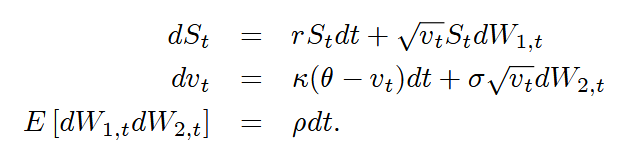

[Heston Model in terms of log price (not used)](https://www.frouah.com/finance%20notes/The%20Heston%20model%20short%20version.pdf)


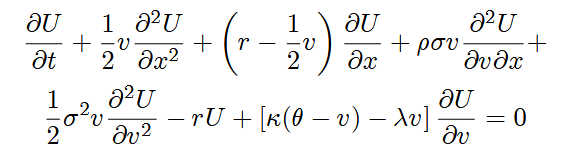



[Heston Model in terms of price ](https://www.frouah.com/finance%20notes/The%20Heston%20model%20short%20version.pdf)

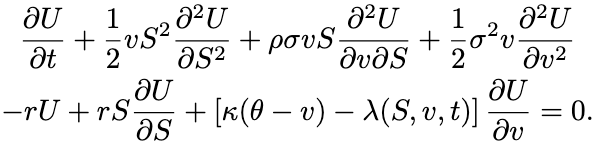


### Heston Setup - No Curriculum

#### HestonOptionNet

In [ ]:
class HestonOptionNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.tanh):
        super(HestonOptionNet, self).__init__()
        self.NL = NL
        self.NN = NN
        ### time, nu (vol), log of the stock Px
        ### ( t , xi)
        self.Input = 12
        self.fc_input = nn.Linear(self.Input,self.NN)
        #self.batch_input = nn.BatchNorm1d(self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        #self.batchs = nn.ModuleList([nn.BatchNorm1d(self.NN) for i in range(self.NL)]) 

        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN, 1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act( (self.fc_input(x))  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return torch.nn.functional.softplus(out)
    

time: 2.83 ms (started: 2022-09-26 12:38:42 +00:00)


#### AlternativeNet

[implement from github](https://github.com/Plemeur/DGM/blob/master/first_net.py)

In [ ]:
class LinearWithXavier(nn.Module):
    """ Copy of linear module from Pytorch, modified to have a Xavier init,
        TODO : figure out what to do with the bias"""
    def __init__(self, in_features, out_features, bias=True, batch_normalize=False):
        super(LinearWithXavier, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.batch_normalize = batch_normalize
        
        if self.batch_normalize == True:
          self.batch_norm = torch.nn.BatchNorm1d(out_features)
        
        if bias:
            self.bias = torch.nn.Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    
    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight)
        if self.bias is not None:
            torch.nn.init.uniform_(self.bias, -1, 1) #boundary matter?
    
    def forward(self, input):
        if self.batch_normalize == True:
          return self.batch_norm(torch.nn.functional.linear(input, self.weight, self.bias))
        return torch.nn.functional.linear(input, self.weight, self.bias)
    
    def extra_repr(self):
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )


class DGM_layer(nn.Module):
    """ See readme for paper source"""
    def __init__(self, in_features, out_feature, residual=False, batch_normalize=False):
        super(DGM_layer, self).__init__()
        self.residual = residual

        self.Z = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UZ = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.G = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UG = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.R = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UR = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.H = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UH = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)

    def forward(self, x, s):
        z = torch.tanh(self.UZ(x) + self.Z(s))
        g = torch.tanh(self.UG(x) + self.G(s))
        r = torch.tanh(self.UR(x) + self.R(s))
        h = torch.tanh(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class AlternativeNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(AlternativeNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGM_layer(in_size, neurons) for i in range(depth)])
        # self.middle_layer_2 = nn.ModuleList([DGM_layer(in_size, neurons, batch_normalize=False) for i in range(2)])
        self.final_layer = LinearWithXavier(neurons, out_size, batch_normalize=False)
        
    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))
        
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.tanh(layer(X, s))
        
        # s = torch.nn.functional.gelu(self.input_layer(X))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.elu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.gelu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.nn.functional.gelu(layer(X, s))

        return torch.nn.functional.softplus(self.final_layer(s))
        # return torch.pow(self.final_layer(s), 1)


time: 11.2 ms (started: 2022-09-26 12:38:43 +00:00)


time: 19.7 ms (started: 2022-09-26 12:38:43 +00:00)


#### EuropeanHestonSingleStockBase

In [ ]:
class EuropeanHestonSingleStockBase():
    
    # can handle PiNN by passing supervised_data
    # can handle Structural conditions 
    # (extra boundary conditions based on the problem) by passing apply_structural_loss boolean 
    # (pass a boolean)
    # can handle segmented by setting in xbreaks (which segments the space of the underlying stock )
    # can handle importance sampling on the loss weights by passing a gamma parameter
    
    def __init__(self , net, is_call = True):

        self.C = 0.0           
        self.R = 0.05         # Interest Rate (Yearly)

        self.BS_SIGMA = 0.25  # BS Vol of Stock
        self.SIGMA = 0.25     # Vol of Vol (Yearly)
        self.KAPPA = 0.25     # OU reversion coefficient
        self.THETA = 0.0625   # long term mean of Vol of Vol
        self.RHO  = 0.75      # correlation of Vol and S
        self.LAMBDA = 0.      # the price of risk
        
        self.K = 1.0              # Strike Price 
        self.T = 1.0               # Maturation time (in YEAR)
        
        self.MAX_S = self.K*3.0   # MAX price
        self.MAX_NU = 2.0
        self.MAX_VOLVOL = 0.5
        self.MAX_KAPPA = 1
        self.MAX_RHO = 0.8
        self.MAX_THETA = 0.15

        ## for accept reject purpose!
        ## free boundry problems
        self.net = net

        self.xbreaks=None

        self.is_call = is_call
        self.log_normal_dist = torch.distributions.LogNormal(self.R-self.C, self.BS_SIGMA)
        self.log_normal_dist_5 = torch.distributions.LogNormal(self.R-self.C, self.BS_SIGMA*5.0)

    def g(self , x):
        # pay off function - 1 is the stock dimension, 0 is the time dimension
        if self.is_call:
          return torch.max( x[:,1].reshape(-1,1) - x[:,2].reshape(-1,1), torch.zeros([len(x),1]).cuda() ) 
        else:
          return torch.max( x[:,2].reshape(-1,1) - x[:,1].reshape(-1,1) , torch.zeros([len(x),1]).cuda() ) 

    def mu(self, x):
        ## should test it! output dimension is important !
        return (self.R-self.C)*x.reshape(-1,1)

    def sigma(self , x):
        return self.BS_SIGMA*x.reshape(-1,1)

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def get_utility_function_derivatives(self, u_net_val, x_internal):

        d = torch.autograd.grad(u_net_val,
                                x_internal, 
                                grad_outputs=torch.ones_like(u_net_val) ,
                                create_graph=True )

        dt  = d[0][:,0].reshape(-1,1)
        dS1 = d[0][:,1].reshape(-1,1)
        dK = d[0][:,2].reshape(-1,1)
        dT = d[0][:,3].reshape(-1,1)
        dv1 = d[0][:, 6].reshape(-1, 1)

        # d2u/dSdS
        dS1S1 = torch.autograd.grad(dS1, 
                                    x_internal, 
                                    grad_outputs=torch.ones_like(dS1),
                                    create_graph = True)[0][:,1].reshape(-1,1)

        # d2u/dvdv
        dv1v1 = torch.autograd.grad(dv1, 
                                    x_internal, 
                                    grad_outputs=torch.ones_like(dv1),
                                    create_graph = True, allow_unused=True)[0][:,6].reshape(-1,1)

        # d2u/dxdv
        dS1v1 = torch.autograd.grad(dS1, 
                                    x_internal, 
                                    grad_outputs=torch.ones_like(dS1),
                                    create_graph = True, allow_unused=True)[0][:,6].reshape(-1,1)

        dK1K1 = torch.autograd.grad(dK, 
                                   x_internal, 
                                   grad_outputs=torch.ones_like(dK),
                                   create_graph = True, allow_unused=True)[0][:,2].reshape(-1,1)
                                     
        return dt, dS1, dK, dT, dv1, dS1S1, dv1v1, dS1v1, dK1K1        

    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        
        # internal samples
        S_internal_values = (1 - torch.rand([size, 1])) * self.MAX_S
        if self.xbreaks is not None:
          if not isinstance(self.xbreaks, list):
            self.xbreaks = np.linspace(0.0, 1.0,self.xbreaks-1).tolist()    
            # default to an evenly sampled space
            # 4 breaks means 3 buckets
          S_internal_values = torch.ones([size, 1])*0.
          for bx in range(len(self.xbreaks)-1): 
            number_per_bucket = int(size/(len(self.xbreaks)-1))           
            start_idx = bx*number_per_bucket
            end_idx = (bx+1)*number_per_bucket
            S_internal_values[start_idx:end_idx,:] = (self.xbreaks[bx] + (1 - torch.rand([number_per_bucket, 1])) * (self.xbreaks[bx+1] - self.xbreaks[bx])) * self.MAX_S

        maturity_time = (1 - torch.rand([size, 1])) * self.T
        t_internal_values = torch.rand([size,1]) * maturity_time
        strike_values = torch.rand([size, 1]) * self.K
        risk_free_rate = torch.rand([size, 1])*self.R
        std_dev_of_stock = (1 - torch.rand([size, 1]))*self.BS_SIGMA
        nu_internal_values = (1 - torch.rand([size, 1])) * self.MAX_NU
        vol_vol_values = (1 - torch.rand([size, 1])) * self.MAX_VOLVOL
        kappa_values = torch.rand([size, 1]) * self.MAX_KAPPA
        rho_values = torch.rand([size, 1]) * self.MAX_RHO
        theta_values = (1 - torch.rand([size, 1])) * self.MAX_THETA
        lamda_values = torch.rand([size, 1]) * self.LAMBDA 

        #xvt_internal = self.to_device(torch.cat(( t_internal_values , S_internal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock), dim = 1 ), to_cpu)
        xvt_internal = self.to_device(torch.cat(( t_internal_values , S_internal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock, nu_internal_values, vol_vol_values, kappa_values, rho_values, theta_values, lamda_values), dim = 1 ), to_cpu)

        ### Terminal time samples
        S_terminal_values = (1 - torch.rand([size, 1])) * self.MAX_S
        if self.xbreaks is not None:
          S_terminal_values = torch.ones([size, 1])*0.
          for bx in range(len(self.xbreaks)-1): 
            number_per_bucket = int(size/(len(self.xbreaks)-1))           
            start_idx = bx*number_per_bucket
            end_idx = (bx+1)*number_per_bucket
            S_terminal_values[start_idx:end_idx,:] = (self.xbreaks[bx] + (1 - torch.rand([number_per_bucket, 1])) * (self.xbreaks[bx+1] - self.xbreaks[bx])) * self.MAX_S

        maturity_time = (1 - torch.rand([size, 1])) * self.T
        t_terminal_values = maturity_time
        strike_values = torch.rand([size, 1]) * self.K
        risk_free_rate = torch.rand([size, 1]) * self.R
        std_dev_of_stock = (1 - torch.rand([size, 1])) * self.BS_SIGMA
        nu_terminal_values = (1 - torch.rand([size, 1])) * self.MAX_NU
        vol_vol_values = (1 - torch.rand([size, 1])) * self.MAX_VOLVOL
        kappa_values = torch.rand([size, 1]) * self.MAX_KAPPA
        rho_values = torch.rand([size, 1]) * self.MAX_RHO
        theta_values = (1 - torch.rand([size, 1])) * self.MAX_THETA
        lamda_values = torch.rand([size, 1]) * self.LAMBDA


        #xvt_terminal = self.to_device(torch.cat(( t_terminal_values , S_terminal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock) , dim = 1 ),to_cpu)
        xvt_terminal = self.to_device(torch.cat(( t_terminal_values , S_terminal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock, nu_terminal_values, vol_vol_values, kappa_values, rho_values, theta_values, lamda_values) , dim = 1 ),to_cpu)

        return xvt_internal , xvt_terminal 

        
    def criterion(self, 
                  x_internal , 
                  x_terminal , 
                  loss_transform = torch.square, 
                  print_val=False, 
                  to_cpu=False, 
                  supervised_data=None,
                  apply_structural_loss = True,
                  gamma=None):
        '''
        Loss function that helps network find solution to equation
        '''   
        
        pred_values = self.net(x_internal)
        # pred_values_pinn = self.net(self.pinn_sample_internal)
        dt, dS1, dK, dT, dv1, dS1S1, dv1v1, dS1v1, dK1K1 = self.get_utility_function_derivatives(pred_values, x_internal)
        
        if loss_transform is None:
          loss_transform = torch.square
        intC = None
        terC = None

        if len(x_internal) == 0:
          intC = torch.empty(0).cuda().float()
        else:
          # pdb.set_trace()
          # x is above the free boundary ( so immediate pay-off is positive )
          # t_internal_values , nu_internal_values, x_internal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock
          time_elapsed = x_internal[:,0].reshape(-1, 1)
          stock_price = x_internal[:,1].reshape(-1, 1)
          strike_price = x_internal[:,2].reshape(-1, 1)
          maturity_years = x_internal[:, 3].reshape(-1, 1)
          risk_free_rate = x_internal[:, 4].reshape(-1, 1)
          std_dev_of_stock = x_internal[:, 5].reshape(-1, 1)
          nu_of_stock = x_internal[:, 6].reshape(-1, 1)
          vol_of_vol_stock = x_internal[:, 7].reshape(-1, 1)
          kappa_values = x_internal[:, 8].reshape(-1, 1)
          rho_values = x_internal[:, 9].reshape(-1, 1)
          theta_values =  x_internal[:, 10].reshape(-1, 1)
          lamda_values =  x_internal[:, 11].reshape(-1, 1)
          
          #std_dev_of_stock = self.BS_SIGMA
          #risk_free_rate = self.R

          time_to_maturity = maturity_years - time_elapsed
          intC_loss_untransformed = dt + 0.5 * nu_of_stock * stock_price**2 * dS1S1 + \
                                    rho_values * vol_of_vol_stock * nu_of_stock * stock_price * dS1v1 + \
                                    0.5 * vol_of_vol_stock**2 * nu_of_stock * dv1v1 - \
                                    risk_free_rate * pred_values + \
                                    risk_free_rate * stock_price * dS1 + \
                                    ( kappa_values * (theta_values - nu_of_stock) - lamda_values* nu_of_stock ) * dv1 #+\

          #print('interim', intC_loss_untransformed.shape)
          intC = loss_transform(intC_loss_untransformed) 

          structured_loss = None
          if apply_structural_loss:
            #print(torch.mean(dT), torch.mean(dK1dK1))
            condition_1 = torch.max(torch.zeros(x_internal.shape[0], 1).to(x_internal.device), -dT )
            condition_2 = torch.max(torch.zeros(x_internal.shape[0], 1).to(x_internal.device), -dK1K1)
            condition_3 = torch.max(torch.zeros(x_internal.shape[0], 1).to(x_internal.device), dK)

            struct_coef = 1
            structured_loss = struct_coef * (condition_1 + condition_2 + condition_3)
            #print('struct', structured_loss.shape)
            structured_loss = structured_loss # note that this is kept as flags?!
          else:
            structured_loss = torch.empty(0).cuda().float()

          if supervised_data is not None:
            supervised_coef = 1.
            input_heston = supervised_data['heston_input']
            target = supervised_data['heston_analytical_sol']
          
            prediction = self.net(input_heston)
            supervised_loss = target - prediction

          else:
            supervised_loss =  torch.empty(0).cuda().float()

          #print('super', supervised_loss.shape)
          supervised_loss = loss_transform(supervised_loss)

        # Terminal Condition - should be equal (both in- and out of the money)
        terC = loss_transform( self.g(x_terminal) - self.net(x_terminal) ) 

        # terC = [ loss_transform(self.net(x_terminal)) for loss_transform in loss_transforms ]
        #print('terminal', terC[0].shape)
        
        return  intC , terC, structured_loss, supervised_loss


    def calculateLoss(self, 
                      batch_x, 
                      train = True, 
                      loss_transform = torch.square , 
                      keep_batch = False, 
                      print_val=False, 
                      supervised_data=None, 
                      apply_structural_loss=True,
                      gamma=None):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        # pdb.set_trace()
        x , x_terminal   = batch_x # x_initial# 
        x = Variable(x , requires_grad=True)
        #x_terminal = Variable(x_terminal[torch.multinomial(x[:,0], 128), :] , requires_grad=True)

        Ls = self.criterion( x , x_terminal , loss_transform = loss_transform, print_val=print_val, supervised_data=supervised_data, gamma=gamma, apply_structural_loss=apply_structural_loss) # , x_initial
        intC , terC, structLoss, supervisedLoss = Ls 
        # pdb.set_trace()
        
        # numActive = np.sum([1 if xb.numel()>0 else 0 for xb in Ls ])
        # numActive = 3
        numActive = 2
        has_structural = structLoss.numel()>0
        has_pinn =  supervisedLoss.numel()>0
        if has_structural:
          numActive = numActive+1
        if has_pinn:
          numActive = numActive+1

        if gamma is None:
          return_losses = []
          if not keep_batch:
            loss_equalWeightedByType =  1./numActive*torch.mean(intC) + 1./numActive*torch.mean(terC) 
            if has_structural:
              loss_equalWeightedByType =  loss_equalWeightedByType + 1./numActive*torch.mean(structLoss)
            if has_pinn:
              loss_equalWeightedByType =  loss_equalWeightedByType + 1./numActive*torch.mean(supervisedLoss)

            return_losses.append( [ loss_equalWeightedByType , 
                                    1./numActive*torch.mean(intC), 
                                    1./numActive*torch.mean(terC),
                                    1./numActive*torch.mean(structLoss) if has_structural else 0.0,
                                    1./numActive*torch.mean(supervisedLoss) if has_pinn else 0.0 ] )      
          else:
            return_losses.append( [intC.numpy(), terC.numpy(), structLoss.numpy(), supervisedLoss.numpy()] )

          return return_losses
        else:
          weights = torch.ones(1,len(Ls)).to(intC.device)/numActive

          return_losses = []

          intCt = weights[0,0] * (1.0/intC.numel() if intC.numel() > 0 else 0.0) * torch.sum( torch.exp(gamma * intC)) 
          terCt = weights[0,1] * (1.0/terC.numel() if terC.numel() > 0 else 0.0) * torch.sum( torch.exp(gamma * terC)) 

          structLosst = torch.ones_like(terCt)*0.
          if has_structural:
            structLosst = weights[0,2] * (1.0/structLoss.numel() if structLoss.numel() > 0 else 0.0) * torch.sum(torch.exp(gamma * structLoss)) 
          supervisedLosst = torch.ones_like(terCt)*0.
          if has_pinn:
            supervisedLosst = weights[0,3] * (1.0/supervisedLoss.numel() if supervisedLoss.numel() > 0 else 0.0) * torch.sum(torch.exp(gamma * supervisedLoss)) 

          if not keep_batch:
            transformed_loss = 1.0/gamma * torch.log(intCt + terCt + structLosst + supervisedLosst)
            return_losses.append( [ transformed_loss , 
                                    1./numActive*torch.mean(intCt), 
                                    1./numActive*torch.mean(terCt),
                                    1./numActive*torch.mean(structLosst),
                                    1./numActive*torch.mean(supervisedLosst)  ] )            
          else:
            return_losses.append( [intCt.numpy(), terCt.numpy(), structLosst.numpy(), supervisedLosst.numpy()] )
          return return_losses



time: 22.3 ms (started: 2022-09-26 12:38:43 +00:00)


#### TrainEuropeanHestonSingleStockBase

In [ ]:
class TrainEuropeanHestonSingleStockBase():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        self.history_mean_hooks = [] 
        self.history_surfaces_hooks = None       
        self.history_tl = []
        self.history_internal = []
        self.history_terminal = []
        self.history_initial = []              
        self.history_nonzero = []
        self.TOTAL_SIZE = 100000
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        #if self.debug == True:
        #    self.hooks = {}            
        #    self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam
        self.vaildation_data_mae = []

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.monitored_loss_type = "Train_L2"
        self.early_stop_counter = 0
        
    def train(self, 
              epoch, 
              lr, 
              eqLossFn = 'calculateLoss', 
              sample_method_X = "U", 
              key_loss_func = torch.square, 
              validation_data=None, 
              supervised_data=None, 
              apply_structural_loss=True,
              gamma=None):
        
        self.net.train()
        optimizer = self.optimizer_used(self.net.parameters(), lr=lr)
        #scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
        # scheduler = StepLR(optimizer, step_size=150000, gamma=0.1)

        
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        full_dataset = self.model.sample(sample_method_X = sample_method_X, size=self.TOTAL_SIZE)
        full_batch_internal = DataLoader(full_dataset[0], batch_size=self.BATCH_SIZE)
        full_batch_terminal = DataLoader(full_dataset[1], batch_size=self.BATCH_SIZE)

        counter = 0
        for e in tqdm(range(epoch)):
            
            loss_avg = 0.0
            i = 0
            for sample_int, sample_term in zip(full_batch_internal, full_batch_terminal):
                sample_batch = sample_int, sample_term 

                optimizer.zero_grad()
                losses_L2 = loss_calc_method( sample_batch, loss_transform = key_loss_func, keep_batch = False, print_val =  (e % self.hook_interval == (self.hook_interval-1)), 
                                             supervised_data=supervised_data, apply_structural_loss=apply_structural_loss, gamma=gamma)
                # pdb.set_trace()
                loss , internal , terminal, structure, supervised = losses_L2[0] # internal losses

                loss_avg = loss_avg + float(loss.item())
                loss.backward()

                optimizer.step()
                i += 1
                counter += 1
                # scheduler.step()

                if validation_data is not None:
                    input_data = validation_data['heston_input']
                    # bs_pred = bs_price( "C", 
                    #     input_data[:,2].reshape(-1,1), 
                    #     input_data[:,1].reshape(-1,1), 
                    #     input_data[:,3].reshape(-1,1) - input_data[:,0].reshape(-1,1), 
                    #     input_data[:,10].reshape(-1,1)**0.5, 
                    #     input_data[:,4].reshape(-1,1)
                    # )
                    target = validation_data['heston_analytical_sol']
                    
                    # prediction = trainEuss.net(input_data) + bs_pred
                    prediction = self.net(input_data)

                    self.vaildation_data_mae.append(torch.abs(target - prediction).cpu().detach().numpy().mean())
                    # print(self.vaildation_data_mae[-1])
            
                # if counter >= 3000:
                #     break
            # scheduler.step(loss)

            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                print("Epoch {} - lr {} -  loss: {} - Terminal loss {} - Internal Loss {} - Structure Loss {} - Supervised Loss {}".format(e , lr , loss_avg/(i+1), terminal, internal, structure, supervised ))

            # if counter >= 3000:
            #     break

time: 5.89 ms (started: 2022-09-26 12:38:43 +00:00)


#### Create Validation and PiNN data

[Generated from Lipton 2002](https://quant.stackexchange.com/questions/18684/heston-model-option-price-formula)


In [ ]:
# f"/content/drive/MyDrive/data_papers/{paper_name}"

df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df3 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partC.csv").drop(columns='Unnamed: 0')
df4 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partD.csv").drop(columns='Unnamed: 0')
df5 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partE.csv").drop(columns='Unnamed: 0')
df6 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partF.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df.append(df5)
df = df.append(df6)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)
del df, df2

xvts_test2 = torch.cat(( t_internal_values[:, None] , s[:,None], strike[:,None], maturity_time[:, None], r[:,None], torch.ones(size_test, 1) * 0., nu[:,None], sigma[:,None], kappa[:,None], rho[:,None], theta[:,None], torch.zeros(size_test, 1)), dim = 1 )
xvts_test2 = torch.tensor(xvts_test2, dtype=torch.float32)

SIGMA_HERE = 0.25 # default sigma on hestonEquation
# bs_price(right, K, S, T, sigma, r)
supervised_base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*SIGMA_HERE, r)).to(torch.device("cuda:0"))


supervised_data = {
    'heston_input' : xvts_test2.to(torch.device("cuda:0")),
    'heston_analytical_sol' : torch.tensor(y.values.reshape(-1,1)).to(torch.device("cuda:0"))
}

supervised_data_curr = {
    'heston_input' : xvts_test2.to(torch.device("cuda:0")),
    'heston_analytical_sol' : torch.tensor(y.values.reshape(-1,1)).to(torch.device("cuda:0"))-supervised_base_curr
}


df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partG.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partH.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)
del df, df2

val_set = torch.cat(( t_internal_values[:, None] , s[:,None], strike[:,None], maturity_time[:, None], r[:,None], torch.ones(size_test, 1) * 0., nu[:,None], sigma[:,None], kappa[:,None], rho[:,None], theta[:,None], torch.zeros(size_test, 1)), dim = 1 )
val_set = torch.tensor(val_set, dtype=torch.float32)

SIGMA_HERE = 0.25 # default sigma on hestonEquation
# bs_price(right, K, S, T, sigma, r)
validation_base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*SIGMA_HERE, r)).to(torch.device("cuda:0"))


validation_data = {
    'heston_input' : val_set.clone().to(torch.device("cuda:0")),
    'heston_analytical_sol' : torch.tensor(y.values.reshape(-1,1)).to(torch.device("cuda:0"))
}

validation_data_curr = {
    'heston_input' : val_set.clone().to(torch.device("cuda:0")),
    'heston_analytical_sol' : torch.tensor(y.values.reshape(-1,1)).to(torch.device("cuda:0"))-validation_base_curr
}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


time: 8.82 s (started: 2022-09-26 12:38:43 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


### Heston Runs - No Curriculum

#### Test Case European Call - Uniform sampling - Simple DNN - No Segmentation - Checking Difference in ResNet vs. DNN


In [ ]:
supervised_data['heston_analytical_sol'].shape[0]

5000

time: 3.25 ms (started: 2022-09-26 13:08:19 +00:00)


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

netDNN = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
netDNN.to(torch.device("cuda:0")) 
heston_equation = EuropeanHestonSingleStockBase(netDNN)
trainEussHeston_dnn = TrainEuropeanHestonSingleStockBase( netDNN , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEussHeston_dnn.hook_interval = 5
trainEussHeston_dnn.train(epoch = 500, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEussHeston_dnn.net.to(torch.device("cuda:0"))

netResNet = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
netResNet.to(torch.device("cuda:0")) 
heston_equation = EuropeanHestonSingleStockBase(netResNet)
trainEussHeston_resnet = TrainEuropeanHestonSingleStockBase( netResNet , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEussHeston_resnet.hook_interval = 5
trainEussHeston_resnet.train(epoch = 500, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEussHeston_resnet.net.to(torch.device("cuda:0"))

  0%|          | 1/500 [00:00<08:00,  1.04it/s]

Epoch 0 - lr 0.001 -  loss: 0.19058893620967865 - Terminal loss 0.09771324694156647 - Internal Loss 0.04367585852742195 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 5/500 [00:04<07:24,  1.11it/s]

Epoch 4 - lr 0.001 -  loss: 0.01576692673067252 - Terminal loss 0.008434759452939034 - Internal Loss 0.006535832304507494 - Structure Loss 0.0 - Supervised Loss 0.0


  2%|▏         | 10/500 [00:09<07:53,  1.03it/s]

Epoch 9 - lr 0.001 -  loss: 0.006288135113815467 - Terminal loss 0.0030390338506549597 - Internal Loss 0.0039328718557953835 - Structure Loss 0.0 - Supervised Loss 0.0


  3%|▎         | 15/500 [00:13<07:32,  1.07it/s]

Epoch 14 - lr 0.001 -  loss: 0.004432758989019526 - Terminal loss 0.002477094763889909 - Internal Loss 0.002520805224776268 - Structure Loss 0.0 - Supervised Loss 0.0


  4%|▍         | 20/500 [00:18<07:33,  1.06it/s]

Epoch 19 - lr 0.001 -  loss: 0.004003312956127856 - Terminal loss 0.00227215769700706 - Internal Loss 0.0019731593783944845 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 25/500 [00:23<07:30,  1.06it/s]

Epoch 24 - lr 0.001 -  loss: 0.0028193325269967318 - Terminal loss 0.0017465411219745874 - Internal Loss 0.001375799998641014 - Structure Loss 0.0 - Supervised Loss 0.0


  6%|▌         | 30/500 [00:28<07:17,  1.07it/s]

Epoch 29 - lr 0.001 -  loss: 0.002487155401872264 - Terminal loss 0.0015583487693220377 - Internal Loss 0.0012415515957400203 - Structure Loss 0.0 - Supervised Loss 0.0


  7%|▋         | 35/500 [00:32<07:24,  1.05it/s]

Epoch 34 - lr 0.001 -  loss: 0.002287522398142351 - Terminal loss 0.0015873285010457039 - Internal Loss 0.001240645069628954 - Structure Loss 0.0 - Supervised Loss 0.0


  8%|▊         | 40/500 [00:37<07:22,  1.04it/s]

Epoch 39 - lr 0.001 -  loss: 0.002138778619054291 - Terminal loss 0.001293464913032949 - Internal Loss 0.001086020958609879 - Structure Loss 0.0 - Supervised Loss 0.0


  9%|▉         | 45/500 [00:42<07:08,  1.06it/s]

Epoch 44 - lr 0.001 -  loss: 0.0019572791643440723 - Terminal loss 0.0012206401443108916 - Internal Loss 0.0010144584812223911 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 50/500 [00:47<07:08,  1.05it/s]

Epoch 49 - lr 0.001 -  loss: 0.0019042431118173732 - Terminal loss 0.0012399237602949142 - Internal Loss 0.0010314309038221836 - Structure Loss 0.0 - Supervised Loss 0.0


 11%|█         | 55/500 [00:52<07:29,  1.01s/it]

Epoch 54 - lr 0.001 -  loss: 0.001793297499211298 - Terminal loss 0.001092915772460401 - Internal Loss 0.0009055829723365605 - Structure Loss 0.0 - Supervised Loss 0.0


 12%|█▏        | 60/500 [00:56<07:01,  1.05it/s]

Epoch 59 - lr 0.001 -  loss: 0.0021798462969147498 - Terminal loss 0.0013409146340563893 - Internal Loss 0.001070801867172122 - Structure Loss 0.0 - Supervised Loss 0.0


 13%|█▎        | 65/500 [01:01<07:02,  1.03it/s]

Epoch 64 - lr 0.001 -  loss: 0.0015779044996533128 - Terminal loss 0.0009979945607483387 - Internal Loss 0.0008188622887246311 - Structure Loss 0.0 - Supervised Loss 0.0


 14%|█▍        | 70/500 [01:06<06:52,  1.04it/s]

Epoch 69 - lr 0.001 -  loss: 0.0016116684354427788 - Terminal loss 0.0010066083632409573 - Internal Loss 0.0007970351725816727 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 75/500 [01:11<06:36,  1.07it/s]

Epoch 74 - lr 0.001 -  loss: 0.002163005333083371 - Terminal loss 0.001382822752930224 - Internal Loss 0.0011978293769061565 - Structure Loss 0.0 - Supervised Loss 0.0


 16%|█▌        | 80/500 [01:15<06:41,  1.05it/s]

Epoch 79 - lr 0.001 -  loss: 0.001429185568768945 - Terminal loss 0.000931880553252995 - Internal Loss 0.0007625940488651395 - Structure Loss 0.0 - Supervised Loss 0.0


 17%|█▋        | 85/500 [01:20<06:34,  1.05it/s]

Epoch 84 - lr 0.001 -  loss: 0.0013713890867721704 - Terminal loss 0.0009004009189084172 - Internal Loss 0.0007102542440406978 - Structure Loss 0.0 - Supervised Loss 0.0


 18%|█▊        | 90/500 [01:25<06:11,  1.10it/s]

Epoch 89 - lr 0.001 -  loss: 0.0017139384548904167 - Terminal loss 0.0011069118045270443 - Internal Loss 0.0009716888889670372 - Structure Loss 0.0 - Supervised Loss 0.0


 19%|█▉        | 95/500 [01:29<06:07,  1.10it/s]

Epoch 94 - lr 0.001 -  loss: 0.0011773948014403384 - Terminal loss 0.0007370340172201395 - Internal Loss 0.0005934305372647941 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 100/500 [01:34<06:00,  1.11it/s]

Epoch 99 - lr 0.001 -  loss: 0.0014356917624051373 - Terminal loss 0.0007984741823747754 - Internal Loss 0.0006973348208703101 - Structure Loss 0.0 - Supervised Loss 0.0


 21%|██        | 105/500 [01:38<06:05,  1.08it/s]

Epoch 104 - lr 0.001 -  loss: 0.0011639370867568585 - Terminal loss 0.0006804639124311507 - Internal Loss 0.0005522009450942278 - Structure Loss 0.0 - Supervised Loss 0.0


 22%|██▏       | 110/500 [01:43<05:54,  1.10it/s]

Epoch 109 - lr 0.001 -  loss: 0.00141654082108289 - Terminal loss 0.0006754922796972096 - Internal Loss 0.0005507600726559758 - Structure Loss 0.0 - Supervised Loss 0.0


 23%|██▎       | 115/500 [01:47<05:46,  1.11it/s]

Epoch 114 - lr 0.001 -  loss: 0.0010174710251804856 - Terminal loss 0.0006701506208628416 - Internal Loss 0.0005557024851441383 - Structure Loss 0.0 - Supervised Loss 0.0


 24%|██▍       | 120/500 [01:52<05:45,  1.10it/s]

Epoch 119 - lr 0.001 -  loss: 0.0013248909833944505 - Terminal loss 0.0006255450425669551 - Internal Loss 0.0005086326273158193 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 125/500 [01:56<05:46,  1.08it/s]

Epoch 124 - lr 0.001 -  loss: 0.0009526471452166637 - Terminal loss 0.0006385076558217406 - Internal Loss 0.000526587653439492 - Structure Loss 0.0 - Supervised Loss 0.0


 26%|██▌       | 130/500 [02:01<05:43,  1.08it/s]

Epoch 129 - lr 0.001 -  loss: 0.0012045392714854744 - Terminal loss 0.0005765793030150235 - Internal Loss 0.00046694098273292184 - Structure Loss 0.0 - Supervised Loss 0.0


 27%|██▋       | 135/500 [02:05<05:25,  1.12it/s]

Epoch 134 - lr 0.001 -  loss: 0.0008805952319461438 - Terminal loss 0.0005919015384279191 - Internal Loss 0.00047922838712111115 - Structure Loss 0.0 - Supervised Loss 0.0


 28%|██▊       | 140/500 [02:10<05:31,  1.09it/s]

Epoch 139 - lr 0.001 -  loss: 0.0011604446141670148 - Terminal loss 0.0005452181794680655 - Internal Loss 0.00044416863238438964 - Structure Loss 0.0 - Supervised Loss 0.0


 29%|██▉       | 145/500 [02:15<05:11,  1.14it/s]

Epoch 144 - lr 0.001 -  loss: 0.0008056564062523345 - Terminal loss 0.000529695360455662 - Internal Loss 0.00042507864418439567 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 150/500 [02:19<05:18,  1.10it/s]

Epoch 149 - lr 0.001 -  loss: 0.0010195941302097505 - Terminal loss 0.0005118907429277897 - Internal Loss 0.0004016887687612325 - Structure Loss 0.0 - Supervised Loss 0.0


 31%|███       | 155/500 [02:24<05:19,  1.08it/s]

Epoch 154 - lr 0.001 -  loss: 0.0007470157579518855 - Terminal loss 0.00047654117224738 - Internal Loss 0.0003766725130844861 - Structure Loss 0.0 - Supervised Loss 0.0


 32%|███▏      | 160/500 [02:28<04:57,  1.14it/s]

Epoch 159 - lr 0.001 -  loss: 0.000971630558423284 - Terminal loss 0.0004980865633115172 - Internal Loss 0.0003939720627386123 - Structure Loss 0.0 - Supervised Loss 0.0


 33%|███▎      | 165/500 [02:33<05:10,  1.08it/s]

Epoch 164 - lr 0.001 -  loss: 0.0007216586317453119 - Terminal loss 0.0004429418477229774 - Internal Loss 0.0003513308765832335 - Structure Loss 0.0 - Supervised Loss 0.0


 34%|███▍      | 170/500 [02:38<05:03,  1.09it/s]

Epoch 169 - lr 0.001 -  loss: 0.000871630922322058 - Terminal loss 0.0006240509101189673 - Internal Loss 0.0005518485559150577 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 175/500 [02:42<05:03,  1.07it/s]

Epoch 174 - lr 0.001 -  loss: 0.0006811873948511978 - Terminal loss 0.00040574243757873774 - Internal Loss 0.00031540472991764545 - Structure Loss 0.0 - Supervised Loss 0.0


 36%|███▌      | 180/500 [02:47<04:54,  1.09it/s]

Epoch 179 - lr 0.001 -  loss: 0.0006456330884248018 - Terminal loss 0.0003867218329105526 - Internal Loss 0.0003167122195009142 - Structure Loss 0.0 - Supervised Loss 0.0


 37%|███▋      | 185/500 [02:52<04:59,  1.05it/s]

Epoch 184 - lr 0.001 -  loss: 0.000995587130698065 - Terminal loss 0.0006036300910636783 - Internal Loss 0.0006261714152060449 - Structure Loss 0.0 - Supervised Loss 0.0


 38%|███▊      | 190/500 [02:56<04:37,  1.12it/s]

Epoch 189 - lr 0.001 -  loss: 0.0005621990939188334 - Terminal loss 0.00036251803976483643 - Internal Loss 0.00027848067111335695 - Structure Loss 0.0 - Supervised Loss 0.0


 39%|███▉      | 195/500 [03:01<04:40,  1.09it/s]

Epoch 194 - lr 0.001 -  loss: 0.0005668790933365623 - Terminal loss 0.0003568678512237966 - Internal Loss 0.00032929633744060993 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 200/500 [03:05<04:22,  1.14it/s]

Epoch 199 - lr 0.001 -  loss: 0.000977416483995815 - Terminal loss 0.0004577541840262711 - Internal Loss 0.00045937771210446954 - Structure Loss 0.0 - Supervised Loss 0.0


 41%|████      | 205/500 [03:10<04:31,  1.09it/s]

Epoch 204 - lr 0.001 -  loss: 0.0005052869544467992 - Terminal loss 0.0003186362737324089 - Internal Loss 0.0002452956105116755 - Structure Loss 0.0 - Supervised Loss 0.0


 42%|████▏     | 210/500 [03:14<04:21,  1.11it/s]

Epoch 209 - lr 0.001 -  loss: 0.0005223091057915655 - Terminal loss 0.0003307192528154701 - Internal Loss 0.00026807773974724114 - Structure Loss 0.0 - Supervised Loss 0.0


 43%|████▎     | 215/500 [03:19<04:21,  1.09it/s]

Epoch 214 - lr 0.001 -  loss: 0.0007933387274129523 - Terminal loss 0.00039491875213570893 - Internal Loss 0.000472803832963109 - Structure Loss 0.0 - Supervised Loss 0.0


 44%|████▍     | 220/500 [03:23<04:11,  1.11it/s]

Epoch 219 - lr 0.001 -  loss: 0.0008353320817049178 - Terminal loss 0.00030103078461252153 - Internal Loss 0.0002698293828871101 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 225/500 [03:28<04:15,  1.07it/s]

Epoch 224 - lr 0.001 -  loss: 0.0004662436161500712 - Terminal loss 0.00030203995993360877 - Internal Loss 0.00021342700347304344 - Structure Loss 0.0 - Supervised Loss 0.0


 46%|████▌     | 230/500 [03:33<04:15,  1.06it/s]

Epoch 229 - lr 0.001 -  loss: 0.00043432771215318807 - Terminal loss 0.0002981833240482956 - Internal Loss 0.00022103937226347625 - Structure Loss 0.0 - Supervised Loss 0.0


 47%|████▋     | 235/500 [03:37<04:00,  1.10it/s]

Epoch 234 - lr 0.001 -  loss: 0.0006627098256204692 - Terminal loss 0.0003124972281511873 - Internal Loss 0.00044235563836991787 - Structure Loss 0.0 - Supervised Loss 0.0


 48%|████▊     | 240/500 [03:42<04:00,  1.08it/s]

Epoch 239 - lr 0.001 -  loss: 0.0008367854623227484 - Terminal loss 0.00031857399153523147 - Internal Loss 0.0004262119473423809 - Structure Loss 0.0 - Supervised Loss 0.0


 49%|████▉     | 245/500 [03:46<03:50,  1.10it/s]

Epoch 244 - lr 0.001 -  loss: 0.0003809283597446564 - Terminal loss 0.00024355037021450698 - Internal Loss 0.00018867214384954423 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 250/500 [03:51<03:49,  1.09it/s]

Epoch 249 - lr 0.001 -  loss: 0.00047662601314692036 - Terminal loss 0.0002425155689707026 - Internal Loss 0.0001847106614150107 - Structure Loss 0.0 - Supervised Loss 0.0


 51%|█████     | 255/500 [03:55<03:38,  1.12it/s]

Epoch 254 - lr 0.001 -  loss: 0.00047024498861800466 - Terminal loss 0.0002797575725708157 - Internal Loss 0.0002702918427530676 - Structure Loss 0.0 - Supervised Loss 0.0


 52%|█████▏    | 260/500 [04:00<03:43,  1.07it/s]

Epoch 259 - lr 0.001 -  loss: 0.0006524139316752553 - Terminal loss 0.0005256724543869495 - Internal Loss 0.0004363881307654083 - Structure Loss 0.0 - Supervised Loss 0.0


 53%|█████▎    | 265/500 [04:04<03:38,  1.07it/s]

Epoch 264 - lr 0.001 -  loss: 0.0003587008266347564 - Terminal loss 0.00021956907585263252 - Internal Loss 0.00017578808183316141 - Structure Loss 0.0 - Supervised Loss 0.0


 54%|█████▍    | 270/500 [04:09<03:29,  1.10it/s]

Epoch 269 - lr 0.001 -  loss: 0.0004338060906674299 - Terminal loss 0.0002616436395328492 - Internal Loss 0.00015904770407360047 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 275/500 [04:14<03:27,  1.08it/s]

Epoch 274 - lr 0.001 -  loss: 0.0003362220045851751 - Terminal loss 0.00021224671218078583 - Internal Loss 0.00015607410750817508 - Structure Loss 0.0 - Supervised Loss 0.0


 56%|█████▌    | 280/500 [04:18<03:10,  1.15it/s]

Epoch 279 - lr 0.001 -  loss: 0.0004554918365708242 - Terminal loss 0.0002008903684327379 - Internal Loss 0.00017459099763073027 - Structure Loss 0.0 - Supervised Loss 0.0


 57%|█████▋    | 285/500 [04:23<03:15,  1.10it/s]

Epoch 284 - lr 0.001 -  loss: 0.00036783507352487906 - Terminal loss 0.00020536805095616728 - Internal Loss 0.0002434881462249905 - Structure Loss 0.0 - Supervised Loss 0.0


 58%|█████▊    | 290/500 [04:27<03:14,  1.08it/s]

Epoch 289 - lr 0.001 -  loss: 0.0004343045940105286 - Terminal loss 0.00029582215938717127 - Internal Loss 0.00028754142113029957 - Structure Loss 0.0 - Supervised Loss 0.0


 59%|█████▉    | 295/500 [04:32<03:06,  1.10it/s]

Epoch 294 - lr 0.001 -  loss: 0.00037919233242670697 - Terminal loss 0.0001933735329657793 - Internal Loss 0.00014992595242802054 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 300/500 [04:36<03:04,  1.08it/s]

Epoch 299 - lr 0.001 -  loss: 0.0006368794484943566 - Terminal loss 0.0001963022368727252 - Internal Loss 0.00019419830641709268 - Structure Loss 0.0 - Supervised Loss 0.0


 61%|██████    | 305/500 [04:41<02:58,  1.09it/s]

Epoch 304 - lr 0.001 -  loss: 0.0003118582276834382 - Terminal loss 0.0001962503738468513 - Internal Loss 0.00014597027620766312 - Structure Loss 0.0 - Supervised Loss 0.0


 62%|██████▏   | 310/500 [04:46<02:57,  1.07it/s]

Epoch 309 - lr 0.001 -  loss: 0.0004332019274847375 - Terminal loss 0.00022722952417097986 - Internal Loss 0.00014069824828766286 - Structure Loss 0.0 - Supervised Loss 0.0


 63%|██████▎   | 315/500 [04:50<02:40,  1.15it/s]

Epoch 314 - lr 0.001 -  loss: 0.00028268029887436167 - Terminal loss 0.00018794812785927206 - Internal Loss 0.00014522585843224078 - Structure Loss 0.0 - Supervised Loss 0.0


 64%|██████▍   | 320/500 [04:55<02:47,  1.08it/s]

Epoch 319 - lr 0.001 -  loss: 0.0003203526753673537 - Terminal loss 0.00018113800615537912 - Internal Loss 0.00019546346447896212 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 325/500 [04:59<02:35,  1.12it/s]

Epoch 324 - lr 0.001 -  loss: 0.000264138655944003 - Terminal loss 0.00016484444495290518 - Internal Loss 0.00014116767852101475 - Structure Loss 0.0 - Supervised Loss 0.0


 66%|██████▌   | 330/500 [05:04<02:41,  1.06it/s]

Epoch 329 - lr 0.001 -  loss: 0.0003023118673202892 - Terminal loss 0.0001659028639551252 - Internal Loss 0.00014193712559062988 - Structure Loss 0.0 - Supervised Loss 0.0


 67%|██████▋   | 335/500 [05:09<02:35,  1.06it/s]

Epoch 334 - lr 0.001 -  loss: 0.00026548469193383225 - Terminal loss 0.00016489623521920294 - Internal Loss 0.00015504183829762042 - Structure Loss 0.0 - Supervised Loss 0.0


 68%|██████▊   | 340/500 [05:13<02:25,  1.10it/s]

Epoch 339 - lr 0.001 -  loss: 0.0002712151973456558 - Terminal loss 0.00015711730520706624 - Internal Loss 0.00012429902562871575 - Structure Loss 0.0 - Supervised Loss 0.0


 69%|██████▉   | 345/500 [05:17<02:12,  1.17it/s]

Epoch 344 - lr 0.001 -  loss: 0.0003104444153399931 - Terminal loss 0.0001650247722864151 - Internal Loss 0.00017610749637242407 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 350/500 [05:22<02:15,  1.10it/s]

Epoch 349 - lr 0.001 -  loss: 0.00030573051966105896 - Terminal loss 0.0001631969935260713 - Internal Loss 0.00021594933059532195 - Structure Loss 0.0 - Supervised Loss 0.0


 71%|███████   | 355/500 [05:26<02:06,  1.15it/s]

Epoch 354 - lr 0.001 -  loss: 0.00039130048632311326 - Terminal loss 0.0002033955097431317 - Internal Loss 0.00013541917724069208 - Structure Loss 0.0 - Supervised Loss 0.0


 72%|███████▏  | 360/500 [05:31<02:11,  1.07it/s]

Epoch 359 - lr 0.001 -  loss: 0.0002428116826599257 - Terminal loss 0.00016339174180757254 - Internal Loss 0.00013441104965750128 - Structure Loss 0.0 - Supervised Loss 0.0


 73%|███████▎  | 365/500 [05:36<02:05,  1.07it/s]

Epoch 364 - lr 0.001 -  loss: 0.00037984508607122634 - Terminal loss 0.0002432324836263433 - Internal Loss 0.00017621030565351248 - Structure Loss 0.0 - Supervised Loss 0.0


 74%|███████▍  | 370/500 [05:40<02:02,  1.06it/s]

Epoch 369 - lr 0.001 -  loss: 0.00022036892672379813 - Terminal loss 0.00014270633982960135 - Internal Loss 0.00011197758431080729 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 375/500 [05:45<01:52,  1.11it/s]

Epoch 374 - lr 0.001 -  loss: 0.0002528910602753361 - Terminal loss 0.00013793408288620412 - Internal Loss 0.00011937505041714758 - Structure Loss 0.0 - Supervised Loss 0.0


 76%|███████▌  | 380/500 [05:50<01:55,  1.03it/s]

Epoch 379 - lr 0.001 -  loss: 0.0003799145084081425 - Terminal loss 0.00033178782905451953 - Internal Loss 0.00023139268159866333 - Structure Loss 0.0 - Supervised Loss 0.0


 77%|███████▋  | 385/500 [05:55<01:52,  1.02it/s]

Epoch 384 - lr 0.001 -  loss: 0.00025453788111917675 - Terminal loss 0.0001332654501311481 - Internal Loss 0.00016271910862997174 - Structure Loss 0.0 - Supervised Loss 0.0


 78%|███████▊  | 390/500 [05:59<01:42,  1.07it/s]

Epoch 389 - lr 0.001 -  loss: 0.0004345962273267408 - Terminal loss 0.00017177389236167073 - Internal Loss 0.00010803641634993255 - Structure Loss 0.0 - Supervised Loss 0.0


 79%|███████▉  | 395/500 [06:05<01:47,  1.02s/it]

Epoch 394 - lr 0.001 -  loss: 0.00037305118166841567 - Terminal loss 0.0003303437551949173 - Internal Loss 0.00021418197138700634 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 400/500 [06:09<01:35,  1.05it/s]

Epoch 399 - lr 0.001 -  loss: 0.00023541704285889864 - Terminal loss 0.0001372513361275196 - Internal Loss 0.0001092960374080576 - Structure Loss 0.0 - Supervised Loss 0.0


 81%|████████  | 405/500 [06:14<01:28,  1.07it/s]

Epoch 404 - lr 0.001 -  loss: 0.0002971874718140397 - Terminal loss 0.0001338397414656356 - Internal Loss 0.00033458584221079946 - Structure Loss 0.0 - Supervised Loss 0.0


 82%|████████▏ | 410/500 [06:18<01:22,  1.09it/s]

Epoch 409 - lr 0.001 -  loss: 0.0002265968004293326 - Terminal loss 0.00014036722132004797 - Internal Loss 0.00011483793787192553 - Structure Loss 0.0 - Supervised Loss 0.0


 83%|████████▎ | 415/500 [06:23<01:18,  1.08it/s]

Epoch 414 - lr 0.001 -  loss: 0.00019156805905772166 - Terminal loss 0.00012208809494040906 - Internal Loss 9.984903590520844e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 84%|████████▍ | 420/500 [06:28<01:13,  1.09it/s]

Epoch 419 - lr 0.001 -  loss: 0.00029341085205992893 - Terminal loss 0.00019591364252846688 - Internal Loss 0.0002640055899973959 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 425/500 [06:32<01:09,  1.09it/s]

Epoch 424 - lr 0.001 -  loss: 0.0002010680392332789 - Terminal loss 0.00012670390424318612 - Internal Loss 0.00012187639367766678 - Structure Loss 0.0 - Supervised Loss 0.0


 86%|████████▌ | 430/500 [06:37<01:05,  1.07it/s]

Epoch 429 - lr 0.001 -  loss: 0.00021087512141093612 - Terminal loss 0.00012979719031136483 - Internal Loss 0.0001285696926061064 - Structure Loss 0.0 - Supervised Loss 0.0


 87%|████████▋ | 435/500 [06:41<01:00,  1.07it/s]

Epoch 434 - lr 0.001 -  loss: 0.0002453869965393096 - Terminal loss 0.00011783227819250897 - Internal Loss 0.00015360431279987097 - Structure Loss 0.0 - Supervised Loss 0.0


 88%|████████▊ | 440/500 [06:46<00:55,  1.08it/s]

Epoch 439 - lr 0.001 -  loss: 0.00028100098845445446 - Terminal loss 0.00011647031351458281 - Internal Loss 0.00011148436169605702 - Structure Loss 0.0 - Supervised Loss 0.0


 89%|████████▉ | 445/500 [06:50<00:50,  1.08it/s]

Epoch 444 - lr 0.001 -  loss: 0.0003817343224202179 - Terminal loss 0.00013912300346419215 - Internal Loss 0.0005135213723406196 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 450/500 [06:55<00:46,  1.08it/s]

Epoch 449 - lr 0.001 -  loss: 0.00018452459577626237 - Terminal loss 0.0001169433890026994 - Internal Loss 9.068533836398274e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 91%|█████████ | 455/500 [07:00<00:46,  1.02s/it]

Epoch 454 - lr 0.001 -  loss: 0.00035733078968607716 - Terminal loss 0.00018566548533271998 - Internal Loss 0.0001687864714767784 - Structure Loss 0.0 - Supervised Loss 0.0


 92%|█████████▏| 460/500 [07:05<00:39,  1.00it/s]

Epoch 459 - lr 0.001 -  loss: 0.00017269703837680735 - Terminal loss 0.00010767723870230839 - Internal Loss 8.994722156785429e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 93%|█████████▎| 465/500 [07:10<00:33,  1.03it/s]

Epoch 464 - lr 0.001 -  loss: 0.0002806498636750297 - Terminal loss 0.00011515113874338567 - Internal Loss 0.00036917999386787415 - Structure Loss 0.0 - Supervised Loss 0.0


 94%|█████████▍| 470/500 [07:14<00:27,  1.11it/s]

Epoch 469 - lr 0.001 -  loss: 0.0002181770202393333 - Terminal loss 0.0001728911156533286 - Internal Loss 8.857274951878935e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 475/500 [07:19<00:23,  1.06it/s]

Epoch 474 - lr 0.001 -  loss: 0.00023072400007448677 - Terminal loss 0.0001143713598139584 - Internal Loss 9.651832078816369e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 96%|█████████▌| 480/500 [07:24<00:18,  1.07it/s]

Epoch 479 - lr 0.001 -  loss: 0.0002789774104409541 - Terminal loss 0.00010375527199357748 - Internal Loss 8.91725649125874e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 97%|█████████▋| 485/500 [07:29<00:14,  1.04it/s]

Epoch 484 - lr 0.001 -  loss: 0.0001601172989467159 - Terminal loss 0.00010081419895868748 - Internal Loss 8.380126382689923e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 98%|█████████▊| 490/500 [07:33<00:08,  1.12it/s]

Epoch 489 - lr 0.001 -  loss: 0.0005452111686786844 - Terminal loss 0.00022758531849831343 - Internal Loss 0.00039929625927470624 - Structure Loss 0.0 - Supervised Loss 0.0


 99%|█████████▉| 495/500 [07:38<00:04,  1.06it/s]

Epoch 494 - lr 0.001 -  loss: 0.0001608483305770076 - Terminal loss 0.00010347227362217382 - Internal Loss 8.227470971178263e-05 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 500/500 [07:43<00:00,  1.08it/s]


Epoch 499 - lr 0.001 -  loss: 0.00027782313312248635 - Terminal loss 0.00013119960203766823 - Internal Loss 0.00010563545220065862 - Structure Loss 0.0 - Supervised Loss 0.0


  0%|          | 1/500 [00:01<15:34,  1.87s/it]

Epoch 0 - lr 0.001 -  loss: 0.2009048354294565 - Terminal loss 0.08795467764139175 - Internal Loss 0.004438039381057024 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 5/500 [00:09<15:36,  1.89s/it]

Epoch 4 - lr 0.001 -  loss: 0.00717475518791212 - Terminal loss 0.003952946979552507 - Internal Loss 0.0024993971455842257 - Structure Loss 0.0 - Supervised Loss 0.0


  2%|▏         | 10/500 [00:18<14:49,  1.81s/it]

Epoch 9 - lr 0.001 -  loss: 0.002717374177235696 - Terminal loss 0.0019591173622757196 - Internal Loss 0.0009858187986537814 - Structure Loss 0.0 - Supervised Loss 0.0


  3%|▎         | 15/500 [00:28<14:58,  1.85s/it]

Epoch 14 - lr 0.001 -  loss: 0.0018216491314686006 - Terminal loss 0.00128536659758538 - Internal Loss 0.0007357688155025244 - Structure Loss 0.0 - Supervised Loss 0.0


  4%|▍         | 20/500 [00:37<15:04,  1.89s/it]

Epoch 19 - lr 0.001 -  loss: 0.001452357314216594 - Terminal loss 0.0010353673715144396 - Internal Loss 0.0005938849062658846 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 25/500 [00:46<14:51,  1.88s/it]

Epoch 24 - lr 0.001 -  loss: 0.0012394754707606302 - Terminal loss 0.0008932234486564994 - Internal Loss 0.0005061598494648933 - Structure Loss 0.0 - Supervised Loss 0.0


  6%|▌         | 30/500 [00:56<14:45,  1.88s/it]

Epoch 29 - lr 0.001 -  loss: 0.0010934132280656034 - Terminal loss 0.0007952831219881773 - Internal Loss 0.00044811313273385167 - Structure Loss 0.0 - Supervised Loss 0.0


  7%|▋         | 35/500 [01:05<14:39,  1.89s/it]

Epoch 34 - lr 0.001 -  loss: 0.0009827474778932002 - Terminal loss 0.000718967174179852 - Internal Loss 0.0004007751413155347 - Structure Loss 0.0 - Supervised Loss 0.0


  8%|▊         | 40/500 [01:15<14:17,  1.86s/it]

Epoch 39 - lr 0.001 -  loss: 0.0008995857917600208 - Terminal loss 0.0006622773362323642 - Internal Loss 0.0003863485180772841 - Structure Loss 0.0 - Supervised Loss 0.0


  9%|▉         | 45/500 [01:24<14:23,  1.90s/it]

Epoch 44 - lr 0.001 -  loss: 0.000815733905053801 - Terminal loss 0.0005957563407719135 - Internal Loss 0.00033041948336176574 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 50/500 [01:33<13:49,  1.84s/it]

Epoch 49 - lr 0.001 -  loss: 0.0007717643942063054 - Terminal loss 0.0005564579041674733 - Internal Loss 0.00034914675052277744 - Structure Loss 0.0 - Supervised Loss 0.0


 11%|█         | 55/500 [01:43<13:57,  1.88s/it]

Epoch 54 - lr 0.001 -  loss: 0.0006679902241254846 - Terminal loss 0.0004892867291346192 - Internal Loss 0.00028513852157630026 - Structure Loss 0.0 - Supervised Loss 0.0


 12%|█▏        | 60/500 [01:52<13:38,  1.86s/it]

Epoch 59 - lr 0.001 -  loss: 0.0006727680770887269 - Terminal loss 0.00044434121809899807 - Internal Loss 0.0002480382099747658 - Structure Loss 0.0 - Supervised Loss 0.0


 13%|█▎        | 65/500 [02:02<13:36,  1.88s/it]

Epoch 64 - lr 0.001 -  loss: 0.0005406746446775893 - Terminal loss 0.0003944352502003312 - Internal Loss 0.0002335117751499638 - Structure Loss 0.0 - Supervised Loss 0.0


 14%|█▍        | 70/500 [02:11<13:37,  1.90s/it]

Epoch 69 - lr 0.001 -  loss: 0.000563290539301104 - Terminal loss 0.0003741925465874374 - Internal Loss 0.0002272031269967556 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 75/500 [02:20<13:22,  1.89s/it]

Epoch 74 - lr 0.001 -  loss: 0.0004387661885832333 - Terminal loss 0.00031546788522973657 - Internal Loss 0.0001901662617456168 - Structure Loss 0.0 - Supervised Loss 0.0


 16%|█▌        | 80/500 [02:30<13:17,  1.90s/it]

Epoch 79 - lr 0.001 -  loss: 0.0007835687978917526 - Terminal loss 0.00033403688576072454 - Internal Loss 0.0003027231141459197 - Structure Loss 0.0 - Supervised Loss 0.0


 17%|█▋        | 85/500 [02:39<13:08,  1.90s/it]

Epoch 84 - lr 0.001 -  loss: 0.0003760791118515448 - Terminal loss 0.00026910894666798413 - Internal Loss 0.00015784935385454446 - Structure Loss 0.0 - Supervised Loss 0.0


 18%|█▊        | 90/500 [02:49<13:01,  1.91s/it]

Epoch 89 - lr 0.001 -  loss: 0.0003380429116077721 - Terminal loss 0.000238822351093404 - Internal Loss 0.00014802237274125218 - Structure Loss 0.0 - Supervised Loss 0.0


 19%|█▉        | 95/500 [02:58<12:43,  1.88s/it]

Epoch 94 - lr 0.001 -  loss: 0.0003464860104334851 - Terminal loss 0.0002692556008696556 - Internal Loss 0.00020483431580942124 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 100/500 [03:08<12:34,  1.89s/it]

Epoch 99 - lr 0.001 -  loss: 0.000338544299463845 - Terminal loss 0.00020319593022577465 - Internal Loss 0.0001382378686685115 - Structure Loss 0.0 - Supervised Loss 0.0


 21%|██        | 105/500 [03:17<12:10,  1.85s/it]

Epoch 104 - lr 0.001 -  loss: 0.00027588830885684327 - Terminal loss 0.0001927018747664988 - Internal Loss 0.0001222154824063182 - Structure Loss 0.0 - Supervised Loss 0.0


 22%|██▏       | 110/500 [03:27<12:26,  1.91s/it]

Epoch 109 - lr 0.001 -  loss: 0.00025671144572293595 - Terminal loss 0.00017721016774885356 - Internal Loss 0.00011585489846765995 - Structure Loss 0.0 - Supervised Loss 0.0


 23%|██▎       | 115/500 [03:36<11:53,  1.85s/it]

Epoch 114 - lr 0.001 -  loss: 0.0006730104473212527 - Terminal loss 0.00018608002574183047 - Internal Loss 0.00016497795877512544 - Structure Loss 0.0 - Supervised Loss 0.0


 24%|██▍       | 120/500 [03:45<11:49,  1.87s/it]

Epoch 119 - lr 0.001 -  loss: 0.00023628045649578175 - Terminal loss 0.0001599851093487814 - Internal Loss 0.00010762214515125379 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 125/500 [03:54<11:19,  1.81s/it]

Epoch 124 - lr 0.001 -  loss: 0.0002178227603306166 - Terminal loss 0.00014809408457949758 - Internal Loss 0.00010142679821001366 - Structure Loss 0.0 - Supervised Loss 0.0


 26%|██▌       | 130/500 [04:04<11:40,  1.89s/it]

Epoch 129 - lr 0.001 -  loss: 0.00020800886462287357 - Terminal loss 0.00014576123794540763 - Internal Loss 9.452380618313327e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 27%|██▋       | 135/500 [04:13<11:26,  1.88s/it]

Epoch 134 - lr 0.001 -  loss: 0.00027389960531662736 - Terminal loss 0.00015136992442421615 - Internal Loss 9.560459875501692e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 28%|██▊       | 140/500 [04:23<11:21,  1.89s/it]

Epoch 139 - lr 0.001 -  loss: 0.00019481143034580682 - Terminal loss 0.00012704619439318776 - Internal Loss 9.444190072827041e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 29%|██▉       | 145/500 [04:32<11:03,  1.87s/it]

Epoch 144 - lr 0.001 -  loss: 0.00017828074891844558 - Terminal loss 0.0001176960940938443 - Internal Loss 8.219617302529514e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 150/500 [04:41<10:56,  1.87s/it]

Epoch 149 - lr 0.001 -  loss: 0.0004573403582778863 - Terminal loss 0.0005409269360825419 - Internal Loss 0.0007670663180761039 - Structure Loss 0.0 - Supervised Loss 0.0


 31%|███       | 155/500 [04:51<10:36,  1.84s/it]

Epoch 154 - lr 0.001 -  loss: 0.0002523017303448998 - Terminal loss 0.0001066481345333159 - Internal Loss 0.000211826351005584 - Structure Loss 0.0 - Supervised Loss 0.0


 32%|███▏      | 160/500 [05:00<10:39,  1.88s/it]

Epoch 159 - lr 0.001 -  loss: 0.0001681312698767417 - Terminal loss 0.00010494158777873963 - Internal Loss 8.698000601725653e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 33%|███▎      | 165/500 [05:09<10:24,  1.86s/it]

Epoch 164 - lr 0.001 -  loss: 0.00015369228236118538 - Terminal loss 9.851679351413622e-05 - Internal Loss 7.340545562328771e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 34%|███▍      | 170/500 [05:19<10:21,  1.88s/it]

Epoch 169 - lr 0.001 -  loss: 0.00014402806280284293 - Terminal loss 9.388735634274781e-05 - Internal Loss 6.886531627969816e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 175/500 [05:28<09:59,  1.84s/it]

Epoch 174 - lr 0.001 -  loss: 0.00013805541513849876 - Terminal loss 9.005942411022261e-05 - Internal Loss 6.618745101150125e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 36%|███▌      | 180/500 [05:38<10:15,  1.92s/it]

Epoch 179 - lr 0.001 -  loss: 0.0005029066394652344 - Terminal loss 0.0001574019406689331 - Internal Loss 0.0002121514262398705 - Structure Loss 0.0 - Supervised Loss 0.0


 37%|███▋      | 185/500 [05:47<09:44,  1.85s/it]

Epoch 184 - lr 0.001 -  loss: 0.00013586605523919893 - Terminal loss 8.909599273465574e-05 - Internal Loss 7.176910730777308e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 38%|███▊      | 190/500 [05:56<09:41,  1.88s/it]

Epoch 189 - lr 0.001 -  loss: 0.0001665911630779091 - Terminal loss 7.85231459303759e-05 - Internal Loss 0.0001145523929153569 - Structure Loss 0.0 - Supervised Loss 0.0


 39%|███▉      | 195/500 [06:05<09:10,  1.80s/it]

Epoch 194 - lr 0.001 -  loss: 0.00014698148879688233 - Terminal loss 0.00012419406266417354 - Internal Loss 7.211988122435287e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 200/500 [06:15<09:15,  1.85s/it]

Epoch 199 - lr 0.001 -  loss: 0.0001983645747208761 - Terminal loss 0.00011775342136388645 - Internal Loss 0.00012161360791651532 - Structure Loss 0.0 - Supervised Loss 0.0


 41%|████      | 205/500 [06:24<09:19,  1.90s/it]

Epoch 204 - lr 0.001 -  loss: 0.00011223978718690987 - Terminal loss 7.131608435884118e-05 - Internal Loss 5.4384723625844344e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 42%|████▏     | 210/500 [06:33<09:01,  1.87s/it]

Epoch 209 - lr 0.001 -  loss: 0.0005288986139930785 - Terminal loss 0.00022452697157859802 - Internal Loss 0.00032620885758660734 - Structure Loss 0.0 - Supervised Loss 0.0


 43%|████▎     | 215/500 [06:43<08:58,  1.89s/it]

Epoch 214 - lr 0.001 -  loss: 0.00011993815132882446 - Terminal loss 6.940511229913682e-05 - Internal Loss 5.809024878544733e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 44%|████▍     | 220/500 [06:52<08:38,  1.85s/it]

Epoch 219 - lr 0.001 -  loss: 0.00011012257406643282 - Terminal loss 7.560577796539292e-05 - Internal Loss 5.1380546210566536e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 225/500 [07:02<08:41,  1.90s/it]

Epoch 224 - lr 0.001 -  loss: 0.00015922339823898964 - Terminal loss 9.699274232843891e-05 - Internal Loss 9.153592691291124e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 46%|████▌     | 230/500 [07:11<08:46,  1.95s/it]

Epoch 229 - lr 0.001 -  loss: 0.00010490192815066419 - Terminal loss 6.620439671678469e-05 - Internal Loss 5.675181091646664e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 47%|████▋     | 235/500 [07:21<08:24,  1.90s/it]

Epoch 234 - lr 0.001 -  loss: 0.00013007070649311773 - Terminal loss 0.00013741885777562857 - Internal Loss 5.315215094015002e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 48%|████▊     | 240/500 [07:30<08:08,  1.88s/it]

Epoch 239 - lr 0.001 -  loss: 0.0001259043395596867 - Terminal loss 7.869659748394042e-05 - Internal Loss 4.976300988346338e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 49%|████▉     | 245/500 [07:39<07:50,  1.84s/it]

Epoch 244 - lr 0.001 -  loss: 9.16649595536809e-05 - Terminal loss 5.598433199338615e-05 - Internal Loss 4.5477019739337265e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 250/500 [07:49<07:51,  1.88s/it]

Epoch 249 - lr 0.001 -  loss: 8.78348760630211e-05 - Terminal loss 5.488299939315766e-05 - Internal Loss 4.255982639733702e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 51%|█████     | 255/500 [07:58<07:43,  1.89s/it]

Epoch 254 - lr 0.001 -  loss: 0.0004487050706908728 - Terminal loss 0.0002306560054421425 - Internal Loss 0.0004948193673044443 - Structure Loss 0.0 - Supervised Loss 0.0


 52%|█████▏    | 260/500 [08:07<07:27,  1.86s/it]

Epoch 259 - lr 0.001 -  loss: 9.241092387431611e-05 - Terminal loss 5.2298080845503137e-05 - Internal Loss 4.470177009352483e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 53%|█████▎    | 265/500 [08:17<07:19,  1.87s/it]

Epoch 264 - lr 0.001 -  loss: 8.363827752570312e-05 - Terminal loss 5.223104381002486e-05 - Internal Loss 4.144761624047533e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 54%|█████▍    | 270/500 [08:26<06:58,  1.82s/it]

Epoch 269 - lr 0.001 -  loss: 8.207220606790442e-05 - Terminal loss 5.0466413085814565e-05 - Internal Loss 4.145624552620575e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 275/500 [08:35<06:57,  1.86s/it]

Epoch 274 - lr 0.001 -  loss: 0.00010942146764136851 - Terminal loss 5.2124181820545346e-05 - Internal Loss 3.9284786907956004e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 56%|█████▌    | 280/500 [08:45<06:51,  1.87s/it]

Epoch 279 - lr 0.001 -  loss: 0.0001438603681486307 - Terminal loss 0.00017944222781807184 - Internal Loss 4.122925383853726e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 57%|█████▋    | 285/500 [08:54<06:37,  1.85s/it]

Epoch 284 - lr 0.001 -  loss: 0.00011020054161134694 - Terminal loss 4.90355487272609e-05 - Internal Loss 3.94522248825524e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 58%|█████▊    | 290/500 [09:03<06:32,  1.87s/it]

Epoch 289 - lr 0.001 -  loss: 8.300043878585307e-05 - Terminal loss 5.046756996307522e-05 - Internal Loss 4.312932651373558e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 59%|█████▉    | 295/500 [09:13<06:33,  1.92s/it]

Epoch 294 - lr 0.001 -  loss: 7.581114752813139e-05 - Terminal loss 4.498105772654526e-05 - Internal Loss 4.00029712182004e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 300/500 [09:22<06:15,  1.88s/it]

Epoch 299 - lr 0.001 -  loss: 0.00034624510994439735 - Terminal loss 4.940912185702473e-05 - Internal Loss 6.846508767921478e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 61%|██████    | 305/500 [09:31<05:58,  1.84s/it]

Epoch 304 - lr 0.001 -  loss: 9.602061294976415e-05 - Terminal loss 4.6621655201306567e-05 - Internal Loss 3.604814992286265e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 62%|██████▏   | 310/500 [09:41<05:54,  1.86s/it]

Epoch 309 - lr 0.001 -  loss: 7.226545211677958e-05 - Terminal loss 4.444222940946929e-05 - Internal Loss 3.38603749696631e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 63%|██████▎   | 315/500 [09:50<05:48,  1.88s/it]

Epoch 314 - lr 0.001 -  loss: 0.00023674775891575136 - Terminal loss 0.0001578728115418926 - Internal Loss 0.00015002557483967394 - Structure Loss 0.0 - Supervised Loss 0.0


 64%|██████▍   | 320/500 [09:59<05:33,  1.85s/it]

Epoch 319 - lr 0.001 -  loss: 0.00022933739172812138 - Terminal loss 8.236193389166147e-05 - Internal Loss 8.232919208239764e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 325/500 [10:09<05:29,  1.88s/it]

Epoch 324 - lr 0.001 -  loss: 7.390560009904827e-05 - Terminal loss 4.299540523788892e-05 - Internal Loss 3.458192804828286e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 66%|██████▌   | 330/500 [10:18<05:15,  1.86s/it]

Epoch 329 - lr 0.001 -  loss: 0.00013253445407220474 - Terminal loss 0.0001810838293749839 - Internal Loss 3.569429100025445e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 67%|██████▋   | 335/500 [10:27<05:09,  1.88s/it]

Epoch 334 - lr 0.001 -  loss: 0.0001303694750984303 - Terminal loss 5.3887251851847395e-05 - Internal Loss 0.00011732729035429657 - Structure Loss 0.0 - Supervised Loss 0.0


 68%|██████▊   | 340/500 [10:37<05:00,  1.88s/it]

Epoch 339 - lr 0.001 -  loss: 0.00016541897720243368 - Terminal loss 9.933322144206613e-05 - Internal Loss 0.00014465236745309085 - Structure Loss 0.0 - Supervised Loss 0.0


 69%|██████▉   | 345/500 [10:46<04:57,  1.92s/it]

Epoch 344 - lr 0.001 -  loss: 7.021287779530717e-05 - Terminal loss 3.9960483263712376e-05 - Internal Loss 3.4270200558239594e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 350/500 [10:56<04:43,  1.89s/it]

Epoch 349 - lr 0.001 -  loss: 0.00013935796677186672 - Terminal loss 6.293497426668182e-05 - Internal Loss 7.237339741550386e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 71%|███████   | 355/500 [11:05<04:25,  1.83s/it]

Epoch 354 - lr 0.001 -  loss: 0.0001347181104291748 - Terminal loss 5.150759170646779e-05 - Internal Loss 3.9213635318446904e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 72%|███████▏  | 360/500 [11:14<04:22,  1.88s/it]

Epoch 359 - lr 0.001 -  loss: 0.0001505297485790733 - Terminal loss 9.022264566738158e-05 - Internal Loss 0.00013341235171537846 - Structure Loss 0.0 - Supervised Loss 0.0


 73%|███████▎  | 365/500 [11:23<04:03,  1.80s/it]

Epoch 364 - lr 0.001 -  loss: 6.0604590948464145e-05 - Terminal loss 3.5150609619449824e-05 - Internal Loss 2.6910840460914187e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 74%|███████▍  | 370/500 [11:33<04:02,  1.87s/it]

Epoch 369 - lr 0.001 -  loss: 0.0001829603522007043 - Terminal loss 4.124891711398959e-05 - Internal Loss 4.573987462208606e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 375/500 [11:42<03:55,  1.88s/it]

Epoch 374 - lr 0.001 -  loss: 5.902927740761596e-05 - Terminal loss 3.289432424935512e-05 - Internal Loss 3.632832886069082e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 76%|███████▌  | 380/500 [11:52<03:42,  1.85s/it]

Epoch 379 - lr 0.001 -  loss: 0.00016186404455867078 - Terminal loss 9.847412002272904e-05 - Internal Loss 6.834445230197161e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 77%|███████▋  | 385/500 [12:01<03:38,  1.90s/it]

Epoch 384 - lr 0.001 -  loss: 0.0002536830514953989 - Terminal loss 0.0001894277665996924 - Internal Loss 0.0001756846031639725 - Structure Loss 0.0 - Supervised Loss 0.0


 78%|███████▊  | 390/500 [12:10<03:26,  1.87s/it]

Epoch 389 - lr 0.001 -  loss: 7.183993147918954e-05 - Terminal loss 3.9123980968724936e-05 - Internal Loss 5.292832793202251e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 79%|███████▉  | 395/500 [12:20<03:17,  1.88s/it]

Epoch 394 - lr 0.001 -  loss: 6.008070744832771e-05 - Terminal loss 3.476225901977159e-05 - Internal Loss 2.8068248866475187e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 400/500 [12:29<03:07,  1.87s/it]

Epoch 399 - lr 0.001 -  loss: 0.0003213823236162878 - Terminal loss 0.0002814129402395338 - Internal Loss 0.00013441640476230532 - Structure Loss 0.0 - Supervised Loss 0.0


 81%|████████  | 405/500 [12:38<02:54,  1.84s/it]

Epoch 404 - lr 0.001 -  loss: 6.347680270361404e-05 - Terminal loss 3.1265222787624225e-05 - Internal Loss 3.339640170452185e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 82%|████████▏ | 410/500 [12:48<02:48,  1.87s/it]

Epoch 409 - lr 0.001 -  loss: 0.000593079001797984 - Terminal loss 0.0010902492795139551 - Internal Loss 0.0001626273151487112 - Structure Loss 0.0 - Supervised Loss 0.0


 83%|████████▎ | 415/500 [12:57<02:38,  1.87s/it]

Epoch 414 - lr 0.001 -  loss: 0.00011311165225278173 - Terminal loss 5.320535638020374e-05 - Internal Loss 7.800519961165264e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 84%|████████▍ | 420/500 [13:06<02:27,  1.84s/it]

Epoch 419 - lr 0.001 -  loss: 4.943117326345398e-05 - Terminal loss 2.8841015591751784e-05 - Internal Loss 2.6148232791456394e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 425/500 [13:15<02:19,  1.86s/it]

Epoch 424 - lr 0.001 -  loss: 0.00018064579328185774 - Terminal loss 8.96428173291497e-05 - Internal Loss 0.00030556260026060045 - Structure Loss 0.0 - Supervised Loss 0.0


 86%|████████▌ | 430/500 [13:25<02:08,  1.84s/it]

Epoch 429 - lr 0.001 -  loss: 0.00011681276131033276 - Terminal loss 5.569550194195472e-05 - Internal Loss 5.970346319372766e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 87%|████████▋ | 435/500 [13:34<02:01,  1.87s/it]

Epoch 434 - lr 0.001 -  loss: 0.00010750494402600452 - Terminal loss 0.00010332762030884624 - Internal Loss 6.948004738660529e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 88%|████████▊ | 440/500 [13:43<01:53,  1.89s/it]

Epoch 439 - lr 0.001 -  loss: 9.44034877142662e-05 - Terminal loss 3.891321466653608e-05 - Internal Loss 6.406726606655866e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 89%|████████▉ | 445/500 [13:52<01:42,  1.85s/it]

Epoch 444 - lr 0.001 -  loss: 0.00014172954332833696 - Terminal loss 0.0002315124002052471 - Internal Loss 2.3159758711699396e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 450/500 [14:02<01:30,  1.81s/it]

Epoch 449 - lr 0.001 -  loss: 0.0005128020210476178 - Terminal loss 0.0004939452046528459 - Internal Loss 0.00013859226601198316 - Structure Loss 0.0 - Supervised Loss 0.0


 91%|█████████ | 455/500 [14:11<01:23,  1.86s/it]

Epoch 454 - lr 0.001 -  loss: 0.00011992768365113686 - Terminal loss 5.374547981773503e-05 - Internal Loss 4.5303706428967416e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 92%|█████████▏| 460/500 [14:20<01:14,  1.86s/it]

Epoch 459 - lr 0.001 -  loss: 4.714730231272471e-05 - Terminal loss 3.33291245624423e-05 - Internal Loss 1.9540437278919853e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 93%|█████████▎| 465/500 [14:30<01:04,  1.83s/it]

Epoch 464 - lr 0.001 -  loss: 9.762261066094248e-05 - Terminal loss 4.175964932073839e-05 - Internal Loss 2.5389363145222887e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 94%|█████████▍| 470/500 [14:39<00:55,  1.85s/it]

Epoch 469 - lr 0.001 -  loss: 6.566443617985997e-05 - Terminal loss 2.461500116623938e-05 - Internal Loss 2.829291406669654e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 475/500 [14:48<00:45,  1.80s/it]

Epoch 474 - lr 0.001 -  loss: 0.00011609064596187737 - Terminal loss 4.47778329544235e-05 - Internal Loss 0.00016252354544121772 - Structure Loss 0.0 - Supervised Loss 0.0


 96%|█████████▌| 480/500 [14:57<00:37,  1.88s/it]

Epoch 479 - lr 0.001 -  loss: 0.00016947423541245775 - Terminal loss 0.00020210239745210856 - Internal Loss 3.99164819100406e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 97%|█████████▋| 485/500 [15:07<00:28,  1.89s/it]

Epoch 484 - lr 0.001 -  loss: 9.984085934572956e-05 - Terminal loss 3.7680030800402164e-05 - Internal Loss 0.00010178519005421549 - Structure Loss 0.0 - Supervised Loss 0.0


 98%|█████████▊| 490/500 [15:16<00:19,  1.91s/it]

Epoch 489 - lr 0.001 -  loss: 4.801239992957562e-05 - Terminal loss 2.228595440101344e-05 - Internal Loss 3.435800681472756e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 99%|█████████▉| 495/500 [15:26<00:09,  1.83s/it]

Epoch 494 - lr 0.001 -  loss: 8.103878766026658e-05 - Terminal loss 2.6070640160469338e-05 - Internal Loss 4.266291216481477e-05 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 500/500 [15:35<00:00,  1.87s/it]

Epoch 499 - lr 0.001 -  loss: 0.00012949008184174696 - Terminal loss 6.997642776696011e-05 - Internal Loss 3.6602603358915076e-05 - Structure Loss 0.0 - Supervised Loss 0.0


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 23min 18s (started: 2022-09-26 14:34:25 +00:00)


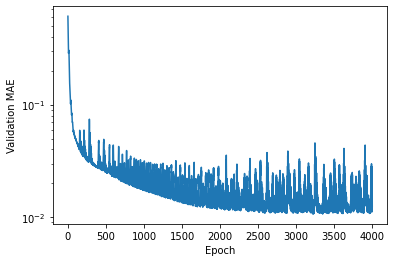

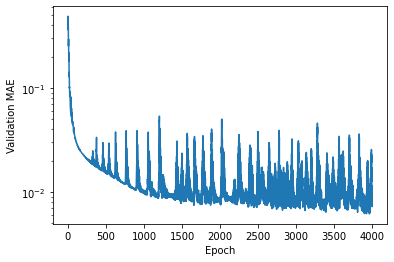

time: 659 ms (started: 2022-09-26 15:17:06 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEussHeston_dnn.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEussHeston_resnet.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
np.arange(1,10).tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

time: 3.37 ms (started: 2022-09-26 13:41:21 +00:00)


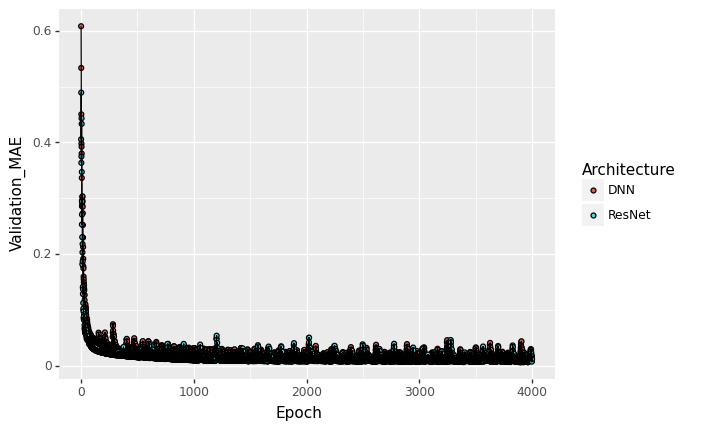

<ggplot: (8769358295785)>

time: 973 ms (started: 2022-09-26 15:21:19 +00:00)


In [ ]:
from plotnine import *
val_mae = pd.DataFrame({ "DNN" : trainEussHeston_dnn.vaildation_data_mae, "ResNet" : trainEussHeston_resnet.vaildation_data_mae, "Epoch" : np.arange(1,len(trainEussHeston_resnet.vaildation_data_mae)+1).tolist()   })
val_mae = val_mae.melt(id_vars="Epoch", value_vars = ["DNN","ResNet"])
val_mae.columns=[ "Epoch", "Architecture", "Validation_MAE" ]
ggplot(val_mae, aes(x="Epoch", y="Validation_MAE", groupby="Architecture", col="Architecture", fill="Architecture" )) + geom_point(aes(col="Architecture", fill="Architecture" )) + geom_line(aes(col="Architecture", fill="Architecture" ))

In [ ]:
paper_name

'turbocharging_dgm'

time: 3.34 ms (started: 2022-09-26 14:25:12 +00:00)


In [ ]:
val_mae.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/Heston_DNN_vs_Resnet_2.csv", index=False)

time: 49.1 ms (started: 2022-09-26 15:21:30 +00:00)


#### Test Case European Call - Uniform sampling - Simple DNN - No Segmentation


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


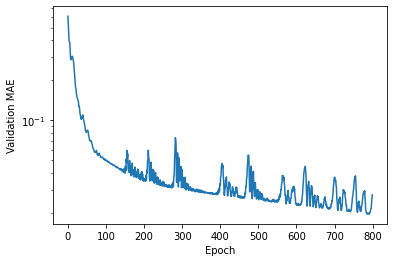

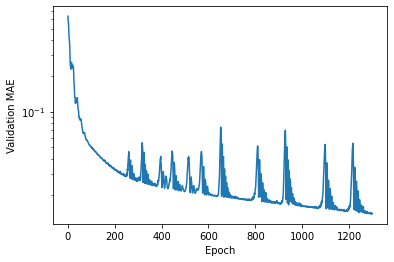

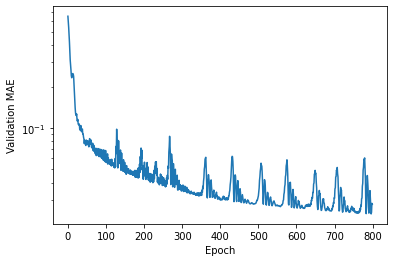

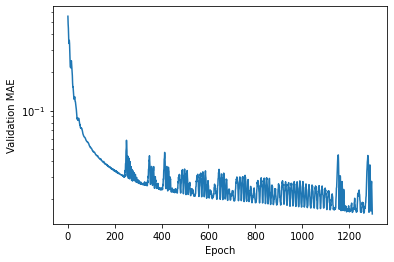

time: 1.05 s (started: 2022-08-12 10:18:10 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 31.2 ms (started: 2022-08-12 10:18:11 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 58.3 ms (started: 2022-08-12 10:18:11 +00:00)


In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 12.3 ms (started: 2022-08-12 10:18:11 +00:00)


In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 810 µs (started: 2022-08-12 10:18:11 +00:00)


0.037304852


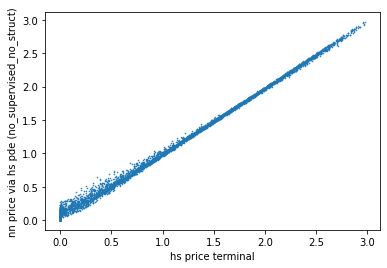

time: 197 ms (started: 2022-08-12 10:18:11 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.0273791292653673


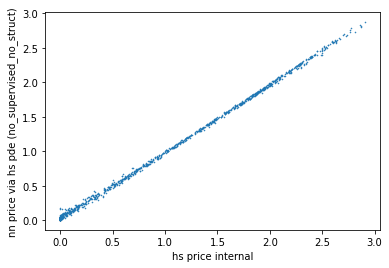

time: 154 ms (started: 2022-08-12 10:18:11 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.028199427


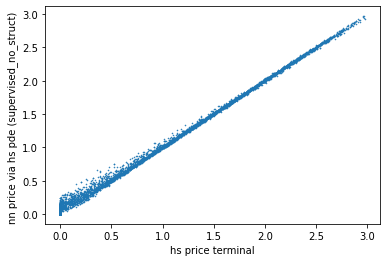

time: 168 ms (started: 2022-08-12 10:18:11 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.01775061130026066


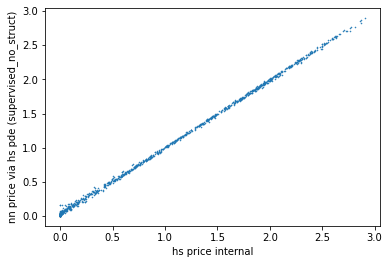

time: 145 ms (started: 2022-08-12 10:18:12 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.037462175


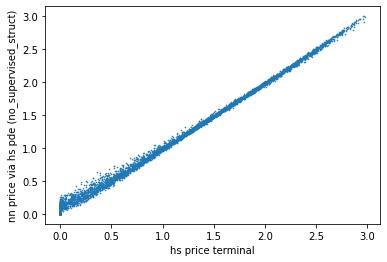

time: 167 ms (started: 2022-08-12 10:18:12 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.02576878891893625


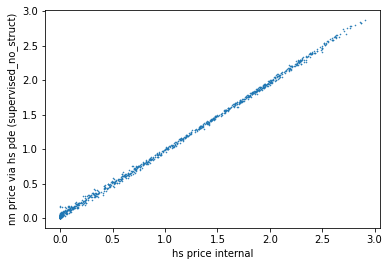

time: 171 ms (started: 2022-08-12 10:18:12 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.029362274


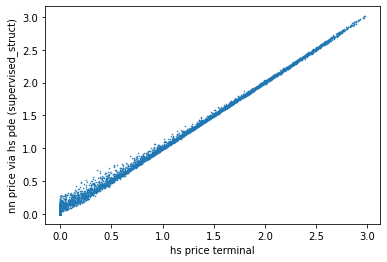

time: 161 ms (started: 2022-08-12 10:18:12 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.017595059413785755


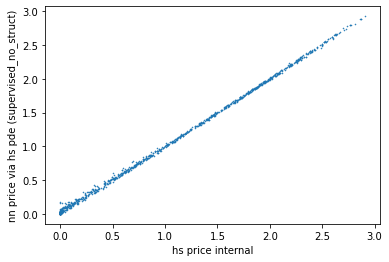

time: 154 ms (started: 2022-08-12 10:18:12 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

#### Test Case European Call - Uniform sampling - ResNet Like - No Segmentation

[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

# net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net2 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:02<04:26,  2.69s/it]

Epoch 0 - lr 0.001 -  loss: 0.08019340307348305 - Terminal loss 0.027056798338890076 - Internal Loss 0.008607752621173859 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:13<04:12,  2.65s/it]

Epoch 4 - lr 0.001 -  loss: 0.002037775262983309 - Terminal loss 0.0013674210058525205 - Internal Loss 0.0006919194711372256 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:26<03:57,  2.64s/it]

Epoch 9 - lr 0.001 -  loss: 0.0009215699974447489 - Terminal loss 0.0006101167527958751 - Internal Loss 0.00037698663072660565 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:39<03:42,  2.62s/it]

Epoch 14 - lr 0.001 -  loss: 0.0006714730471786526 - Terminal loss 0.00045001579564996064 - Internal Loss 0.0002797355700749904 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:52<03:29,  2.62s/it]

Epoch 19 - lr 0.001 -  loss: 0.0005767170546783342 - Terminal loss 0.00037244014674797654 - Internal Loss 0.0002378461795160547 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:05<03:14,  2.59s/it]

Epoch 24 - lr 0.001 -  loss: 0.000462203448276139 - Terminal loss 0.0003095661522820592 - Internal Loss 0.00018422164430376142 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [01:18<03:03,  2.62s/it]

Epoch 29 - lr 0.001 -  loss: 0.00157259438937116 - Terminal loss 0.0006515200948342681 - Internal Loss 0.0010076741455122828 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:31<02:50,  2.62s/it]

Epoch 34 - lr 0.001 -  loss: 0.0003678186072243585 - Terminal loss 0.0002426968712825328 - Internal Loss 0.00015596723824273795 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:44<02:35,  2.59s/it]

Epoch 39 - lr 0.001 -  loss: 0.00031282031300684647 - Terminal loss 0.0002165784826502204 - Internal Loss 0.00012375703954603523 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:57<02:24,  2.62s/it]

Epoch 44 - lr 0.001 -  loss: 0.0002765492827165872 - Terminal loss 0.00019034756405744702 - Internal Loss 0.00010704208398237824 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:11<02:11,  2.63s/it]

Epoch 49 - lr 0.001 -  loss: 0.0010737295443606046 - Terminal loss 0.00018799239478539675 - Internal Loss 0.00012735046038869768 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:24<01:58,  2.62s/it]

Epoch 54 - lr 0.001 -  loss: 0.0002442355390586373 - Terminal loss 0.00016632993356324732 - Internal Loss 0.00010114870383404195 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:37<01:45,  2.63s/it]

Epoch 59 - lr 0.001 -  loss: 0.00021279062396691492 - Terminal loss 0.00014794316666666418 - Internal Loss 8.245022763730958e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:50<01:32,  2.64s/it]

Epoch 64 - lr 0.001 -  loss: 0.0001941649776805813 - Terminal loss 0.00013642697012983263 - Internal Loss 7.316486880881712e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:03<01:18,  2.63s/it]

Epoch 69 - lr 0.001 -  loss: 0.0003999317203932959 - Terminal loss 0.0004138462245464325 - Internal Loss 0.0006643782835453749 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:16<01:05,  2.63s/it]

Epoch 74 - lr 0.001 -  loss: 0.0002004113274678174 - Terminal loss 0.0001214059375342913 - Internal Loss 7.110660953912884e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:29<00:51,  2.59s/it]

Epoch 79 - lr 0.001 -  loss: 0.00016404092053158415 - Terminal loss 0.00011286021617706865 - Internal Loss 6.356017547659576e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [03:42<00:39,  2.63s/it]

Epoch 84 - lr 0.001 -  loss: 0.0001515632902737707 - Terminal loss 0.00010633561760187149 - Internal Loss 5.6788554502418265e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [03:55<00:25,  2.59s/it]

Epoch 89 - lr 0.001 -  loss: 0.00014262756869559072 - Terminal loss 0.00010032160935224965 - Internal Loss 5.285276711219922e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:08<00:13,  2.63s/it]

Epoch 94 - lr 0.001 -  loss: 0.00031914983184025105 - Terminal loss 0.00013075119932182133 - Internal Loss 0.0002349123969906941 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [04:22<00:00,  2.62s/it]


Epoch 99 - lr 0.001 -  loss: 0.0001383889304836177 - Terminal loss 9.975894499802962e-05 - Internal Loss 5.293354843161069e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:02<04:40,  2.83s/it]

Epoch 0 - lr 0.001 -  loss: 0.10586423553250257 - Terminal loss 0.007698538713157177 - Internal Loss 0.006136298645287752 - Structure Loss 0.0 - Supervised Loss 0.008502961282108238


  5%|▌         | 5/100 [00:14<04:36,  2.91s/it]

Epoch 4 - lr 0.001 -  loss: 0.0018424410645413313 - Terminal loss 0.0006593127036467195 - Internal Loss 0.000792633043602109 - Structure Loss 0.0 - Supervised Loss 0.0004096839662859692


 10%|█         | 10/100 [00:29<04:20,  2.89s/it]

Epoch 9 - lr 0.001 -  loss: 0.001010123978057446 - Terminal loss 0.00040211682789959013 - Internal Loss 0.00044216110836714506 - Structure Loss 0.0 - Supervised Loss 0.00022265753548691817


 15%|█▌        | 15/100 [00:43<04:09,  2.94s/it]

Epoch 14 - lr 0.001 -  loss: 0.0007558824432565466 - Terminal loss 0.00030955226975493133 - Internal Loss 0.0003399692359380424 - Structure Loss 0.0 - Supervised Loss 0.00015642008950151787


 20%|██        | 20/100 [00:58<03:53,  2.92s/it]

Epoch 19 - lr 0.001 -  loss: 0.0006572978148612189 - Terminal loss 0.0002606982016004622 - Internal Loss 0.00027692122966982424 - Structure Loss 0.0 - Supervised Loss 0.00012466616012898562


 25%|██▌       | 25/100 [01:12<03:37,  2.90s/it]

Epoch 24 - lr 0.001 -  loss: 0.0005286090378033916 - Terminal loss 0.0002464221615809947 - Internal Loss 0.00027417848468758166 - Structure Loss 0.0 - Supervised Loss 0.00012180004358039516


 30%|███       | 30/100 [01:27<03:24,  2.92s/it]

Epoch 29 - lr 0.001 -  loss: 0.00043723860386288196 - Terminal loss 0.0001924415264511481 - Internal Loss 0.0001951461745193228 - Structure Loss 0.0 - Supervised Loss 8.491697106946895e-05


 35%|███▌      | 35/100 [01:41<03:09,  2.91s/it]

Epoch 34 - lr 0.001 -  loss: 0.0008217969610491864 - Terminal loss 0.00017156320973299444 - Internal Loss 0.00016965133545454592 - Structure Loss 0.0 - Supervised Loss 7.48196281448727e-05


 40%|████      | 40/100 [01:56<02:53,  2.89s/it]

Epoch 39 - lr 0.001 -  loss: 0.0003347147340757228 - Terminal loss 0.00015416790847666562 - Internal Loss 0.0001598736853338778 - Structure Loss 0.0 - Supervised Loss 6.953192462373312e-05


 45%|████▌     | 45/100 [02:11<02:42,  2.95s/it]

Epoch 44 - lr 0.001 -  loss: 0.00030665534136524203 - Terminal loss 0.00016186252469196916 - Internal Loss 0.00015263335080817342 - Structure Loss 0.0 - Supervised Loss 7.85777132876281e-05


 50%|█████     | 50/100 [02:25<02:27,  2.94s/it]

Epoch 49 - lr 0.001 -  loss: 0.00025171898342235316 - Terminal loss 0.00011864481348311529 - Internal Loss 0.00011160383292008191 - Structure Loss 0.0 - Supervised Loss 4.673407120061574e-05


 55%|█████▌    | 55/100 [02:40<02:10,  2.91s/it]

Epoch 54 - lr 0.001 -  loss: 0.0013368653419475291 - Terminal loss 0.00019306805916130543 - Internal Loss 0.00021915664547123015 - Structure Loss 0.0 - Supervised Loss 0.00013628727900568


 60%|██████    | 60/100 [02:55<01:58,  2.97s/it]

Epoch 59 - lr 0.001 -  loss: 0.00020959348640453522 - Terminal loss 9.694592154119164e-05 - Internal Loss 8.602573507232592e-05 - Structure Loss 0.0 - Supervised Loss 3.6951853059900434e-05


 65%|██████▌   | 65/100 [03:09<01:42,  2.94s/it]

Epoch 64 - lr 0.001 -  loss: 0.00018109801655648256 - Terminal loss 8.566067845094949e-05 - Internal Loss 7.51808111090213e-05 - Structure Loss 0.0 - Supervised Loss 3.057652090243324e-05


 70%|███████   | 70/100 [03:24<01:27,  2.92s/it]

Epoch 69 - lr 0.001 -  loss: 0.0002416764336860295 - Terminal loss 0.00012404816516209394 - Internal Loss 0.0001782056497177109 - Structure Loss 0.0 - Supervised Loss 8.009984239223662e-05


 75%|███████▌  | 75/100 [03:39<01:13,  2.95s/it]

Epoch 74 - lr 0.001 -  loss: 0.00015282854647347287 - Terminal loss 6.86689090798609e-05 - Internal Loss 6.890398799441755e-05 - Structure Loss 0.0 - Supervised Loss 2.3723963659950224e-05


 80%|████████  | 80/100 [03:53<00:58,  2.93s/it]

Epoch 79 - lr 0.001 -  loss: 0.00018100552365644192 - Terminal loss 7.812410331098363e-05 - Internal Loss 6.384692824212834e-05 - Structure Loss 0.0 - Supervised Loss 3.479146043356746e-05


 85%|████████▌ | 85/100 [04:08<00:43,  2.91s/it]

Epoch 84 - lr 0.001 -  loss: 0.000124553611781774 - Terminal loss 5.903175042476505e-05 - Internal Loss 5.484334542416036e-05 - Structure Loss 0.0 - Supervised Loss 2.2065055443280022e-05


 90%|█████████ | 90/100 [04:23<00:29,  2.96s/it]

Epoch 89 - lr 0.001 -  loss: 0.0001282512024065637 - Terminal loss 5.3702442528447136e-05 - Internal Loss 6.159238546388224e-05 - Structure Loss 0.0 - Supervised Loss 1.818306581484569e-05


 95%|█████████▌| 95/100 [04:38<00:14,  2.94s/it]

Epoch 94 - lr 0.001 -  loss: 0.00010225994526168548 - Terminal loss 4.7940156946424395e-05 - Internal Loss 4.425379665917717e-05 - Structure Loss 0.0 - Supervised Loss 1.580157862079085e-05


100%|██████████| 100/100 [04:52<00:00,  2.93s/it]


Epoch 99 - lr 0.001 -  loss: 9.400249318742628e-05 - Terminal loss 4.476698086364195e-05 - Internal Loss 3.964763163821772e-05 - Structure Loss 0.0 - Supervised Loss 1.5014932080480034e-05


  1%|          | 1/100 [00:02<04:52,  2.96s/it]

Epoch 0 - lr 0.001 -  loss: 0.09430694083372752 - Terminal loss 0.013627847656607628 - Internal Loss 0.009238380007445812 - Structure Loss 0.0006556769367307425 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:14<04:39,  2.94s/it]

Epoch 4 - lr 0.001 -  loss: 0.0019844206981360912 - Terminal loss 0.001245858147740364 - Internal Loss 0.0008345074602402747 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:29<04:20,  2.89s/it]

Epoch 9 - lr 0.001 -  loss: 0.0009603252401575446 - Terminal loss 0.0006440558936446905 - Internal Loss 0.0003877642739098519 - Structure Loss 1.78674463313655e-06 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:43<04:08,  2.93s/it]

Epoch 14 - lr 0.001 -  loss: 0.0007087247148673567 - Terminal loss 0.0004717453266493976 - Internal Loss 0.00029881324735470116 - Structure Loss 2.4060998384811683e-06 - Supervised Loss 0.0


 20%|██        | 20/100 [00:58<03:54,  2.93s/it]

Epoch 19 - lr 0.001 -  loss: 0.0007282046588241226 - Terminal loss 0.0004514215106610209 - Internal Loss 0.0003318888775538653 - Structure Loss 1.4722805872224853e-06 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:12<03:36,  2.89s/it]

Epoch 24 - lr 0.001 -  loss: 0.0004902163313494788 - Terminal loss 0.00033746284316293895 - Internal Loss 0.00020374514861032367 - Structure Loss 2.7895914627151797e-06 - Supervised Loss 0.0


 30%|███       | 30/100 [01:27<03:24,  2.92s/it]

Epoch 29 - lr 0.001 -  loss: 0.0004150505281156964 - Terminal loss 0.0002831254678312689 - Internal Loss 0.00016924603551160544 - Structure Loss 2.4374528493353864e-06 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:42<03:08,  2.90s/it]

Epoch 34 - lr 0.001 -  loss: 0.0012308521545492113 - Terminal loss 0.0005312740104272962 - Internal Loss 0.0006651179282926023 - Structure Loss 7.658456979697803e-07 - Supervised Loss 0.0


 40%|████      | 40/100 [01:56<02:55,  2.92s/it]

Epoch 39 - lr 0.001 -  loss: 0.00033461983225101396 - Terminal loss 0.00022394310508389026 - Internal Loss 0.00013255508383736014 - Structure Loss 1.4252069604481221e-06 - Supervised Loss 0.0


 45%|████▌     | 45/100 [02:11<02:41,  2.93s/it]

Epoch 44 - lr 0.001 -  loss: 0.00027842612406756316 - Terminal loss 0.00019364191393833607 - Internal Loss 0.00011129526683362201 - Structure Loss 8.337979693351372e-07 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:25<02:25,  2.91s/it]

Epoch 49 - lr 0.001 -  loss: 0.00024852844783001475 - Terminal loss 0.00017478699737694114 - Internal Loss 0.0001049166894517839 - Structure Loss 8.73091266839765e-07 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:40<02:11,  2.92s/it]

Epoch 54 - lr 0.001 -  loss: 0.000257262323025821 - Terminal loss 0.00017532671336084604 - Internal Loss 0.00012535907444544137 - Structure Loss 2.150710542991874e-06 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:54<01:56,  2.91s/it]

Epoch 59 - lr 0.001 -  loss: 0.00020133295523313185 - Terminal loss 0.00014120471314527094 - Internal Loss 8.17725231172517e-05 - Structure Loss 7.286521395144518e-07 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [03:09<01:42,  2.92s/it]

Epoch 64 - lr 0.001 -  loss: 0.0002688298975246855 - Terminal loss 0.00016898616740945727 - Internal Loss 0.00011547846224857494 - Structure Loss 3.385578963843727e-07 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:23<01:26,  2.88s/it]

Epoch 69 - lr 0.001 -  loss: 0.00017652398188753674 - Terminal loss 0.00012045242328895256 - Internal Loss 7.669286424061283e-05 - Structure Loss 1.8083672159718844e-07 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:38<01:13,  2.92s/it]

Epoch 74 - lr 0.001 -  loss: 0.00023105565924197435 - Terminal loss 0.00012047401833115146 - Internal Loss 8.556945977034047e-05 - Structure Loss 2.357375478823087e-06 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:52<00:57,  2.90s/it]

Epoch 79 - lr 0.001 -  loss: 0.00015473061163599292 - Terminal loss 0.00010446682426845655 - Internal Loss 7.591307075927034e-05 - Structure Loss 5.46386957012146e-07 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [04:07<00:43,  2.92s/it]

Epoch 84 - lr 0.001 -  loss: 0.00016212386092067591 - Terminal loss 9.355373913422227e-05 - Internal Loss 0.00010569245205260813 - Structure Loss 2.226965534646297e-06 - Supervised Loss 0.0


 90%|█████████ | 90/100 [04:22<00:29,  2.94s/it]

Epoch 89 - lr 0.001 -  loss: 0.0005225347574903733 - Terminal loss 0.00016584264812991023 - Internal Loss 0.00019188951409887522 - Structure Loss 2.9913385102275925e-09 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:36<00:14,  2.91s/it]

Epoch 94 - lr 0.001 -  loss: 0.00012553254620999924 - Terminal loss 8.082571002887562e-05 - Internal Loss 6.72745518386364e-05 - Structure Loss 6.226487130334135e-07 - Supervised Loss 0.0


100%|██████████| 100/100 [04:50<00:00,  2.91s/it]


Epoch 99 - lr 0.001 -  loss: 0.00014633534495563558 - Terminal loss 9.761820547282696e-05 - Internal Loss 0.00010864912474062294 - Structure Loss 1.5084758615557803e-06 - Supervised Loss 0.0


  1%|          | 1/100 [00:03<05:25,  3.29s/it]

Epoch 0 - lr 0.001 -  loss: 0.09726353957083622 - Terminal loss 0.004048563074320555 - Internal Loss 0.006452258210629225 - Structure Loss 3.158245817758143e-05 - Supervised Loss 0.003418976447241222


  5%|▌         | 5/100 [00:16<05:10,  3.27s/it]

Epoch 4 - lr 0.001 -  loss: 0.00210946849337276 - Terminal loss 0.0007599565433338284 - Internal Loss 0.0008114653755910695 - Structure Loss 2.5965312033804366e-06 - Supervised Loss 0.00046114098327696047


 10%|█         | 10/100 [00:32<04:52,  3.25s/it]

Epoch 9 - lr 0.001 -  loss: 0.0012023128922488621 - Terminal loss 0.00046697596553713083 - Internal Loss 0.00045291654532775283 - Structure Loss 1.5661714769521495e-06 - Supervised Loss 0.0002651826232138676


 15%|█▌        | 15/100 [00:48<04:34,  3.23s/it]

Epoch 14 - lr 0.001 -  loss: 0.000886126423936523 - Terminal loss 0.00035517665673978627 - Internal Loss 0.0003160078194923699 - Structure Loss 1.1677129805320874e-06 - Supervised Loss 0.0001916446337828227


 20%|██        | 20/100 [01:05<04:21,  3.27s/it]

Epoch 19 - lr 0.001 -  loss: 0.002407561576377963 - Terminal loss 0.0004513316380325705 - Internal Loss 0.0007718097767792642 - Structure Loss 7.002272184308822e-08 - Supervised Loss 0.0003519413348076842


 25%|██▌       | 25/100 [01:21<04:04,  3.26s/it]

Epoch 24 - lr 0.001 -  loss: 0.0006060688373582138 - Terminal loss 0.00024709454737603664 - Internal Loss 0.0002151897642761469 - Structure Loss 0.0 - Supervised Loss 0.00012023881768118182


 30%|███       | 30/100 [01:37<03:46,  3.23s/it]

Epoch 29 - lr 0.001 -  loss: 0.0005126303190167733 - Terminal loss 0.0002093122893711552 - Internal Loss 0.00018207848188467324 - Structure Loss 1.058453108271351e-06 - Supervised Loss 0.00010036338739530586


 35%|███▌      | 35/100 [01:53<03:32,  3.27s/it]

Epoch 34 - lr 0.001 -  loss: 0.0013383804588164509 - Terminal loss 0.00025412451941519976 - Internal Loss 0.0002811105514410883 - Structure Loss 3.752134489332093e-06 - Supervised Loss 0.00016728244885632845


 40%|████      | 40/100 [02:10<03:15,  3.25s/it]

Epoch 39 - lr 0.001 -  loss: 0.00037392527475743734 - Terminal loss 0.00015833690122235566 - Internal Loss 0.00012986287765670568 - Structure Loss 3.1162880986812524e-06 - Supervised Loss 6.987550158628933e-05


 45%|████▌     | 45/100 [02:26<02:57,  3.23s/it]

Epoch 44 - lr 0.001 -  loss: 0.0006403108040129679 - Terminal loss 0.0002707173116505146 - Internal Loss 0.0003436208062339574 - Structure Loss 2.85915825770644e-06 - Supervised Loss 0.0002181923927810935


 50%|█████     | 50/100 [02:42<02:43,  3.27s/it]

Epoch 49 - lr 0.001 -  loss: 0.0005716600409915407 - Terminal loss 0.00012051568774040788 - Internal Loss 0.00010641453263815492 - Structure Loss 2.303049768670462e-06 - Supervised Loss 5.38066684862506e-05


 55%|█████▌    | 55/100 [02:58<02:26,  3.25s/it]

Epoch 54 - lr 0.001 -  loss: 0.0006076014523450416 - Terminal loss 0.00010854123684111983 - Internal Loss 0.00010011070116888732 - Structure Loss 1.4912105825715116e-06 - Supervised Loss 5.0138884956500285e-05


 60%|██████    | 60/100 [03:15<02:09,  3.23s/it]

Epoch 59 - lr 0.001 -  loss: 0.00022882784867752788 - Terminal loss 9.084914199775085e-05 - Internal Loss 9.093222615774721e-05 - Structure Loss 1.2710913779301336e-06 - Supervised Loss 3.830731829373546e-05


 65%|██████▌   | 65/100 [03:31<01:54,  3.27s/it]

Epoch 64 - lr 0.001 -  loss: 0.00023336382839129124 - Terminal loss 8.620029257144779e-05 - Internal Loss 8.495977090205997e-05 - Structure Loss 1.9483172764012124e-06 - Supervised Loss 3.849493086510961e-05


 70%|███████   | 70/100 [03:47<01:37,  3.26s/it]

Epoch 69 - lr 0.001 -  loss: 0.0001793180961934043 - Terminal loss 7.562584505649284e-05 - Internal Loss 7.296876719919965e-05 - Structure Loss 4.4594565906663775e-07 - Supervised Loss 3.166157360614227e-05


 75%|███████▌  | 75/100 [04:03<01:20,  3.23s/it]

Epoch 74 - lr 0.001 -  loss: 0.0001645833488875742 - Terminal loss 7.000826735747978e-05 - Internal Loss 7.029744301689789e-05 - Structure Loss 3.344013634887233e-07 - Supervised Loss 2.8513332203824795e-05


 80%|████████  | 80/100 [04:20<01:05,  3.27s/it]

Epoch 79 - lr 0.001 -  loss: 0.00017338265484053767 - Terminal loss 6.679773650830612e-05 - Internal Loss 7.45711731724441e-05 - Structure Loss 4.004582763172948e-07 - Supervised Loss 3.398570443890019e-05


 85%|████████▌ | 85/100 [04:36<00:48,  3.26s/it]

Epoch 84 - lr 0.001 -  loss: 0.00013945420798384327 - Terminal loss 5.6140313972719014e-05 - Internal Loss 6.046663838787936e-05 - Structure Loss 6.300540178472147e-08 - Supervised Loss 2.405367008926037e-05


 90%|█████████ | 90/100 [04:52<00:32,  3.23s/it]

Epoch 89 - lr 0.001 -  loss: 0.0005051959914870667 - Terminal loss 6.471554661402479e-05 - Internal Loss 8.180937584256753e-05 - Structure Loss 8.772786941335653e-08 - Supervised Loss 3.157747655916541e-05


 95%|█████████▌| 95/100 [05:08<00:16,  3.26s/it]

Epoch 94 - lr 0.001 -  loss: 0.00012195566603777046 - Terminal loss 4.7727655328344554e-05 - Internal Loss 5.0139489758294076e-05 - Structure Loss 0.0 - Supervised Loss 2.0069105820004506e-05


100%|██████████| 100/100 [05:25<00:00,  3.25s/it]

Epoch 99 - lr 0.001 -  loss: 0.0012000931460402593 - Terminal loss 0.00034960394259542227 - Internal Loss 0.0001409305987181142 - Structure Loss 3.5298555189910985e-07 - Supervised Loss 0.00032819429783984726


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 19min 31s (started: 2022-08-12 10:18:12 +00:00)


In [ ]:
validation_data['heston_analytical_sol'].shape

torch.Size([2000, 1])

time: 2.79 ms (started: 2022-08-12 10:37:43 +00:00)


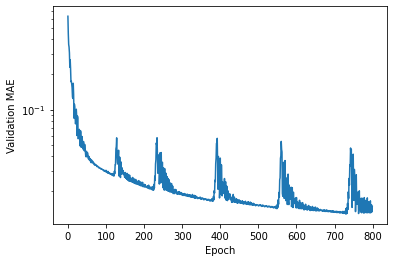

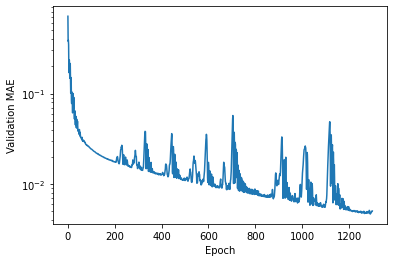

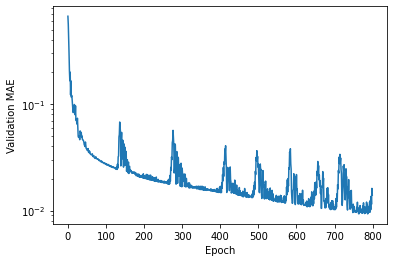

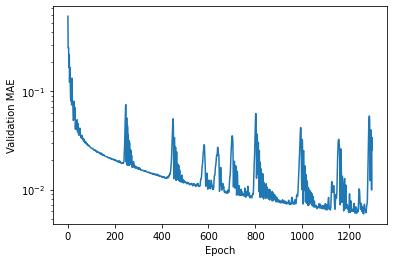

time: 1.07 s (started: 2022-08-12 10:37:43 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
# input_data = supervised_data['heston_input'].to(torch.device("cuda:0"))
# bs_pred = bs_price( "C", 
#     input_data[:,2].reshape(-1,1), 
#     input_data[:,1].reshape(-1,1), 
#     input_data[:,3].reshape(-1,1) - input_data[:,0].reshape(-1,1), 
#     input_data[:,10].reshape(-1,1)**0.5, 
#     input_data[:,4].reshape(-1,1)
# )
# target = supervised_data['heston_analytical_sol'].to(torch.device("cuda:0"))
# trainEuss_supervised_struct.net.to(torch.device("cuda:0"))
# prediction = trainEuss_supervised_struct.net(input_data.to(torch.device("cuda:0")))

# sol = torch.abs(target - prediction).cpu().detach().numpy()
# sol.mean(), sol.var()
# # np.argmin(sol)

time: 1.8 ms (started: 2022-08-12 10:37:45 +00:00)


In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 11.5 ms (started: 2022-08-12 10:37:45 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                              nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 58.5 ms (started: 2022-08-12 10:37:45 +00:00)


In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 11.3 ms (started: 2022-08-12 10:37:45 +00:00)


In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 761 µs (started: 2022-08-12 10:37:45 +00:00)


0.026821567


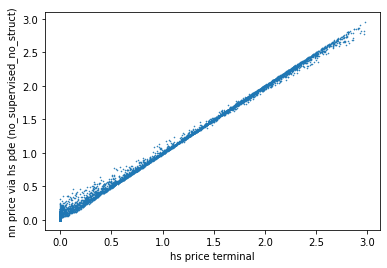

time: 293 ms (started: 2022-08-12 10:37:45 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

In [ ]:
heston_analytical.shape

torch.Size([1000])

time: 2.53 ms (started: 2022-08-12 10:37:45 +00:00)


0.014978304172152719


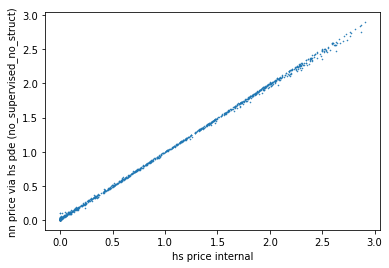

time: 202 ms (started: 2022-08-12 10:37:45 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.019697653


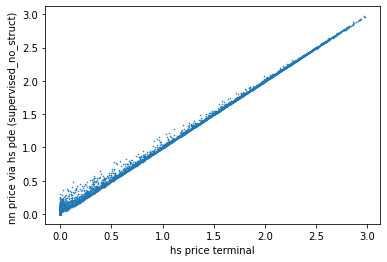

time: 231 ms (started: 2022-08-12 10:37:45 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.0075873274891572265


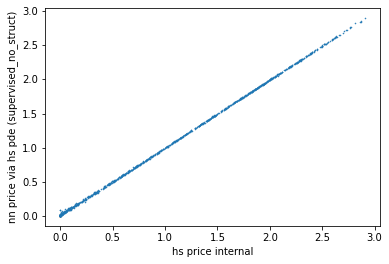

time: 215 ms (started: 2022-08-12 10:37:45 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.026835645


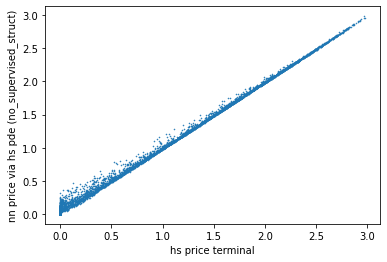

time: 239 ms (started: 2022-08-12 10:37:46 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.014291375554283238


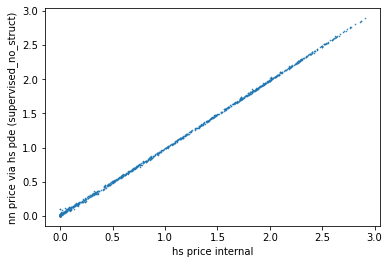

time: 213 ms (started: 2022-08-12 10:37:46 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.034210164


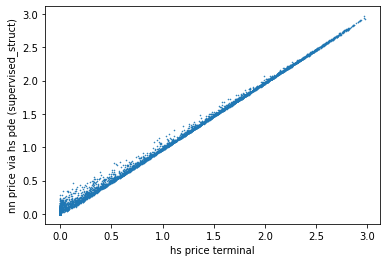

time: 235 ms (started: 2022-08-12 10:37:46 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.02580038878927362


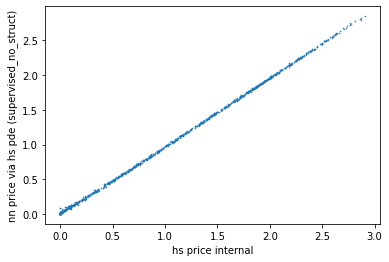

time: 213 ms (started: 2022-08-12 10:37:46 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

In [ ]:
supervised_data['heston_analytical_sol'].shape

torch.Size([5000, 1])

time: 3.61 ms (started: 2022-08-12 10:37:47 +00:00)


#### Test Case European Call - Uniform sampling - Simple DNN - With Stock  Segmentation


[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
heston_equation.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
heston_equation2.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
heston_equation3.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
heston_equation4.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:25,  1.15it/s]

Epoch 0 - lr 0.001 -  loss: 0.27546173127161133 - Terminal loss 0.3253953158855438 - Internal Loss 0.11631573736667633 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:17,  1.22it/s]

Epoch 4 - lr 0.001 -  loss: 0.07994372356269094 - Terminal loss 0.05236896127462387 - Internal Loss 0.029674263671040535 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:07<01:11,  1.26it/s]

Epoch 9 - lr 0.001 -  loss: 0.026955911579231422 - Terminal loss 0.04102003946900368 - Internal Loss 0.00516331335529685 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:12<01:08,  1.24it/s]

Epoch 14 - lr 0.001 -  loss: 0.029408043043480978 - Terminal loss 0.023750243708491325 - Internal Loss 0.026338964700698853 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:15<01:03,  1.27it/s]

Epoch 19 - lr 0.001 -  loss: 0.038460153724170394 - Terminal loss 0.03347724303603172 - Internal Loss 0.0023539431858807802 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:19<01:00,  1.24it/s]

Epoch 24 - lr 0.001 -  loss: 0.019437405798170302 - Terminal loss 0.016397805884480476 - Internal Loss 0.011087981052696705 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:23<00:54,  1.28it/s]

Epoch 29 - lr 0.001 -  loss: 0.03817776766502195 - Terminal loss 0.06626049429178238 - Internal Loss 0.003527682274580002 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:27<00:51,  1.25it/s]

Epoch 34 - lr 0.001 -  loss: 0.013454962082000243 - Terminal loss 0.008012169972062111 - Internal Loss 0.010176382027566433 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:31<00:47,  1.25it/s]

Epoch 39 - lr 0.001 -  loss: 0.027550848200917244 - Terminal loss 0.008294288069009781 - Internal Loss 0.004466330632567406 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:35<00:43,  1.27it/s]

Epoch 44 - lr 0.001 -  loss: 0.01664995490055945 - Terminal loss 0.024568159133195877 - Internal Loss 0.0039048658218234777 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:39<00:39,  1.25it/s]

Epoch 49 - lr 0.001 -  loss: 0.017097096269329388 - Terminal loss 0.003013911657035351 - Internal Loss 0.0057360888458788395 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:43<00:34,  1.31it/s]

Epoch 54 - lr 0.001 -  loss: 0.01797828357666731 - Terminal loss 0.028535788878798485 - Internal Loss 0.007476171478629112 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:47<00:31,  1.25it/s]

Epoch 59 - lr 0.001 -  loss: 0.023350471527212195 - Terminal loss 0.005680176895111799 - Internal Loss 0.004091540817171335 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:51<00:26,  1.31it/s]

Epoch 64 - lr 0.001 -  loss: 0.013903191727068689 - Terminal loss 0.017928438261151314 - Internal Loss 0.010400434024631977 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [00:55<00:23,  1.26it/s]

Epoch 69 - lr 0.001 -  loss: 0.024142398550692532 - Terminal loss 0.006397177465260029 - Internal Loss 0.012814153917133808 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [00:59<00:19,  1.28it/s]

Epoch 74 - lr 0.001 -  loss: 0.01799728726554248 - Terminal loss 0.0227794349193573 - Internal Loss 0.008856471627950668 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:03<00:15,  1.25it/s]

Epoch 79 - lr 0.001 -  loss: 0.01377759739342663 - Terminal loss 0.0016103442758321762 - Internal Loss 0.006188664585351944 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:06<00:11,  1.31it/s]

Epoch 84 - lr 0.001 -  loss: 0.017722151707857847 - Terminal loss 0.011787150986492634 - Internal Loss 0.01474834606051445 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:10<00:07,  1.26it/s]

Epoch 89 - lr 0.001 -  loss: 0.017734042756880324 - Terminal loss 0.004165840335190296 - Internal Loss 0.003711027093231678 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:14<00:04,  1.22it/s]

Epoch 94 - lr 0.001 -  loss: 0.015086352204283079 - Terminal loss 0.033867236226797104 - Internal Loss 0.0035848570987582207 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:18<00:00,  1.27it/s]


Epoch 99 - lr 0.001 -  loss: 0.038139770480079785 - Terminal loss 0.015769056975841522 - Internal Loss 0.01952679269015789 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:25,  1.16it/s]

Epoch 0 - lr 0.001 -  loss: 0.18438917519210113 - Terminal loss 0.0570204071700573 - Internal Loss 0.03820053115487099 - Structure Loss 0.0 - Supervised Loss 0.036001420955679014


  5%|▌         | 5/100 [00:04<01:19,  1.20it/s]

Epoch 4 - lr 0.001 -  loss: 0.02840383964286699 - Terminal loss 0.015737801790237427 - Internal Loss 0.014307458885014057 - Structure Loss 0.0 - Supervised Loss 0.008070509071577766


 10%|█         | 10/100 [00:08<01:13,  1.23it/s]

Epoch 9 - lr 0.001 -  loss: 0.03660812663968588 - Terminal loss 0.00832201074808836 - Internal Loss 0.026430385187268257 - Structure Loss 0.0 - Supervised Loss 0.007059411893721097


 15%|█▌        | 15/100 [00:12<01:08,  1.25it/s]

Epoch 14 - lr 0.001 -  loss: 0.06617020838513381 - Terminal loss 0.014430028386414051 - Internal Loss 0.04449706897139549 - Structure Loss 0.0 - Supervised Loss 0.005402093685154368


 20%|██        | 20/100 [00:16<01:07,  1.19it/s]

Epoch 19 - lr 0.001 -  loss: 0.0248844623675221 - Terminal loss 0.002140795812010765 - Internal Loss 0.00797833688557148 - Structure Loss 0.0 - Supervised Loss 0.009500465874421219


 25%|██▌       | 25/100 [00:20<01:01,  1.22it/s]

Epoch 24 - lr 0.001 -  loss: 0.025010316678643847 - Terminal loss 0.002044985769316554 - Internal Loss 0.01096358522772789 - Structure Loss 0.0 - Supervised Loss 0.0056933106753472235


 30%|███       | 30/100 [00:24<00:55,  1.25it/s]

Epoch 29 - lr 0.001 -  loss: 0.01752587593859074 - Terminal loss 0.005831611808389425 - Internal Loss 0.005301837343722582 - Structure Loss 0.0 - Supervised Loss 0.0072324487677566714


 35%|███▌      | 35/100 [00:28<00:54,  1.19it/s]

Epoch 34 - lr 0.001 -  loss: 0.01632023547557542 - Terminal loss 0.0024354702327400446 - Internal Loss 0.0030217801686376333 - Structure Loss 0.0 - Supervised Loss 0.007528996226509186


 40%|████      | 40/100 [00:32<00:49,  1.22it/s]

Epoch 39 - lr 0.001 -  loss: 0.01649930023240209 - Terminal loss 0.0033955967519432306 - Internal Loss 0.004806104581803083 - Structure Loss 0.0 - Supervised Loss 0.006391086494732717


 45%|████▌     | 45/100 [00:36<00:43,  1.26it/s]

Epoch 44 - lr 0.001 -  loss: 0.02177089286050893 - Terminal loss 0.002771413652226329 - Internal Loss 0.0031743694562464952 - Structure Loss 0.0 - Supervised Loss 0.011074483031903656


 50%|█████     | 50/100 [00:40<00:41,  1.20it/s]

Epoch 49 - lr 0.001 -  loss: 0.014917711277924 - Terminal loss 0.004371894523501396 - Internal Loss 0.00783727876842022 - Structure Loss 0.0 - Supervised Loss 0.00377124849514627


 55%|█████▌    | 55/100 [00:45<00:37,  1.21it/s]

Epoch 54 - lr 0.001 -  loss: 0.006268869137455281 - Terminal loss 0.0035905945114791393 - Internal Loss 0.002550668315961957 - Structure Loss 0.0 - Supervised Loss 0.0020671788801653016


 60%|██████    | 60/100 [00:49<00:31,  1.26it/s]

Epoch 59 - lr 0.001 -  loss: 0.004052928996200901 - Terminal loss 0.00025218233349733055 - Internal Loss 0.002124358434230089 - Structure Loss 0.0 - Supervised Loss 0.0016953245188041884


 65%|██████▌   | 65/100 [00:53<00:29,  1.20it/s]

Epoch 64 - lr 0.001 -  loss: 0.012854105868018701 - Terminal loss 0.004621963016688824 - Internal Loss 0.002433678600937128 - Structure Loss 0.0 - Supervised Loss 0.0018615413494564544


 70%|███████   | 70/100 [00:57<00:24,  1.23it/s]

Epoch 69 - lr 0.001 -  loss: 0.04986917081929591 - Terminal loss 0.004016546998172998 - Internal Loss 0.006528325844556093 - Structure Loss 0.0 - Supervised Loss 0.020722155799236173


 75%|███████▌  | 75/100 [01:01<00:19,  1.27it/s]

Epoch 74 - lr 0.001 -  loss: 0.044611586385341795 - Terminal loss 0.009872914291918278 - Internal Loss 0.002097025280818343 - Structure Loss 0.0 - Supervised Loss 0.012400142458423736


 80%|████████  | 80/100 [01:05<00:16,  1.20it/s]

Epoch 79 - lr 0.001 -  loss: 0.015388706748854031 - Terminal loss 0.002364646177738905 - Internal Loss 0.005753739271312952 - Structure Loss 0.0 - Supervised Loss 0.00279139379548566


 85%|████████▌ | 85/100 [01:09<00:12,  1.22it/s]

Epoch 84 - lr 0.001 -  loss: 0.007279393272718761 - Terminal loss 0.002111120382323861 - Internal Loss 0.00655713677406311 - Structure Loss 0.0 - Supervised Loss 0.004153213326642919


 90%|█████████ | 90/100 [01:13<00:07,  1.26it/s]

Epoch 89 - lr 0.001 -  loss: 0.005965587614760105 - Terminal loss 0.0018681712681427598 - Internal Loss 0.0038762525655329227 - Structure Loss 0.0 - Supervised Loss 0.0018683683619184807


 95%|█████████▌| 95/100 [01:17<00:04,  1.20it/s]

Epoch 94 - lr 0.001 -  loss: 0.031738078657959516 - Terminal loss 0.0016709247138351202 - Internal Loss 0.011454049497842789 - Structure Loss 0.0 - Supervised Loss 0.0022166620709340307


100%|██████████| 100/100 [01:21<00:00,  1.22it/s]


Epoch 99 - lr 0.001 -  loss: 0.01419169853471942 - Terminal loss 0.003229956142604351 - Internal Loss 0.013354924507439137 - Structure Loss 0.0 - Supervised Loss 0.008214039666937815


  1%|          | 1/100 [00:00<01:25,  1.16it/s]

Epoch 0 - lr 0.001 -  loss: 0.2862151294118828 - Terminal loss 0.4856480658054352 - Internal Loss 0.0339360237121582 - Structure Loss 0.011030085384845734 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:15,  1.26it/s]

Epoch 4 - lr 0.001 -  loss: 0.05385113859342204 - Terminal loss 0.08773607015609741 - Internal Loss 0.011541076004505157 - Structure Loss 0.01223745197057724 - Supervised Loss 0.0


 10%|█         | 10/100 [00:08<01:14,  1.20it/s]

Epoch 9 - lr 0.001 -  loss: 0.06383650956882371 - Terminal loss 0.03159409761428833 - Internal Loss 0.03070920892059803 - Structure Loss 0.00800768006592989 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:12<01:11,  1.20it/s]

Epoch 14 - lr 0.001 -  loss: 0.026277934201061726 - Terminal loss 0.0228364747017622 - Internal Loss 0.024249492213129997 - Structure Loss 0.00795618537813425 - Supervised Loss 0.0


 20%|██        | 20/100 [00:16<01:04,  1.23it/s]

Epoch 19 - lr 0.001 -  loss: 0.0396672191305293 - Terminal loss 0.012825902551412582 - Internal Loss 0.011751576326787472 - Structure Loss 0.0031640047673135996 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:20<01:02,  1.20it/s]

Epoch 24 - lr 0.001 -  loss: 0.04788755609964331 - Terminal loss 0.04330497607588768 - Internal Loss 0.0243368037045002 - Structure Loss 0.00039533665403723717 - Supervised Loss 0.0


 30%|███       | 30/100 [00:24<00:54,  1.28it/s]

Epoch 29 - lr 0.001 -  loss: 0.015553313152243694 - Terminal loss 0.009032702073454857 - Internal Loss 0.013269358314573765 - Structure Loss 0.0041774907149374485 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:28<00:52,  1.24it/s]

Epoch 34 - lr 0.001 -  loss: 0.036593450905962124 - Terminal loss 0.04402775317430496 - Internal Loss 0.009403648786246777 - Structure Loss 0.00019509719277266413 - Supervised Loss 0.0


 40%|████      | 40/100 [00:32<00:49,  1.21it/s]

Epoch 39 - lr 0.001 -  loss: 0.010415620532714658 - Terminal loss 0.007535176817327738 - Internal Loss 0.01006846223026514 - Structure Loss 0.0031999764032661915 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:36<00:44,  1.24it/s]

Epoch 44 - lr 0.001 -  loss: 0.03273227598725094 - Terminal loss 0.05575726553797722 - Internal Loss 0.0017734969733282924 - Structure Loss 0.0003299541713204235 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:41<00:41,  1.20it/s]

Epoch 49 - lr 0.001 -  loss: 0.06323971433771981 - Terminal loss 0.025041397660970688 - Internal Loss 0.03606283664703369 - Structure Loss 1.3544997273129411e-05 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:45<00:37,  1.20it/s]

Epoch 54 - lr 0.001 -  loss: 0.02274594701723092 - Terminal loss 0.03794778138399124 - Internal Loss 0.00615822384133935 - Structure Loss 0.00024364178534597158 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:49<00:32,  1.21it/s]

Epoch 59 - lr 0.001 -  loss: 0.032804240420874625 - Terminal loss 0.010600588284432888 - Internal Loss 0.022945592179894447 - Structure Loss 8.616926788818091e-05 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:53<00:29,  1.20it/s]

Epoch 64 - lr 0.001 -  loss: 0.018610432019664183 - Terminal loss 0.027881598100066185 - Internal Loss 0.006934903562068939 - Structure Loss 0.00029929474112577736 - Supervised Loss 0.0


 70%|███████   | 70/100 [00:57<00:25,  1.20it/s]

Epoch 69 - lr 0.001 -  loss: 0.02792782010510564 - Terminal loss 0.006097751669585705 - Internal Loss 0.014360548928380013 - Structure Loss 4.2950036004185677e-05 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:01<00:21,  1.17it/s]

Epoch 74 - lr 0.001 -  loss: 0.012583769547442595 - Terminal loss 0.018043460324406624 - Internal Loss 0.0038344888016581535 - Structure Loss 0.0001312868407694623 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:05<00:15,  1.26it/s]

Epoch 79 - lr 0.001 -  loss: 0.01866791940604647 - Terminal loss 0.0038988820742815733 - Internal Loss 0.003340384690091014 - Structure Loss 0.0002768233825918287 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:10<00:12,  1.18it/s]

Epoch 84 - lr 0.001 -  loss: 0.014620912054346668 - Terminal loss 0.01945582777261734 - Internal Loss 0.008448324166238308 - Structure Loss 0.000299214938422665 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:14<00:08,  1.19it/s]

Epoch 89 - lr 0.001 -  loss: 0.01762131880968809 - Terminal loss 0.004891660064458847 - Internal Loss 0.004983592312783003 - Structure Loss 0.0003772179188672453 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:18<00:04,  1.21it/s]

Epoch 94 - lr 0.001 -  loss: 0.029140227163831394 - Terminal loss 0.02177077904343605 - Internal Loss 0.015329207293689251 - Structure Loss 0.00041883057565428317 - Supervised Loss 0.0


100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 99 - lr 0.001 -  loss: 0.02034640736463997 - Terminal loss 0.004561921581625938 - Internal Loss 0.0037816399708390236 - Structure Loss 0.0003710696182679385 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:10,  1.40it/s]

Epoch 0 - lr 0.001 -  loss: 0.21283395925471768 - Terminal loss 0.13076935708522797 - Internal Loss 0.028415123000741005 - Structure Loss 0.018490875139832497 - Supervised Loss 0.04710178585841725


  5%|▌         | 5/100 [00:04<01:20,  1.19it/s]

Epoch 4 - lr 0.001 -  loss: 0.09203253121194022 - Terminal loss 0.0220955740660429 - Internal Loss 0.05799451470375061 - Structure Loss 0.016789404675364494 - Supervised Loss 0.013027837507763786


 10%|█         | 10/100 [00:08<01:14,  1.22it/s]

Epoch 9 - lr 0.001 -  loss: 0.07149172410314299 - Terminal loss 0.03618129342794418 - Internal Loss 0.012502724304795265 - Structure Loss 0.0021224336232990026 - Supervised Loss 0.012723614667021457


 15%|█▌        | 15/100 [00:12<01:14,  1.15it/s]

Epoch 14 - lr 0.001 -  loss: 0.03993944484293079 - Terminal loss 0.014634652063250542 - Internal Loss 0.008204474113881588 - Structure Loss 0.0027523934841156006 - Supervised Loss 0.006931087010833595


 20%|██        | 20/100 [00:16<01:08,  1.17it/s]

Epoch 19 - lr 0.001 -  loss: 0.03595983440171171 - Terminal loss 0.0023212782107293606 - Internal Loss 0.022674230858683586 - Structure Loss 0.0003097717126365751 - Supervised Loss 0.006317386306777287


 25%|██▌       | 25/100 [00:21<01:02,  1.20it/s]

Epoch 24 - lr 0.001 -  loss: 0.044223887518964736 - Terminal loss 0.005310737993568182 - Internal Loss 0.007842487655580044 - Structure Loss 0.0005569756613112986 - Supervised Loss 0.003176123434594637


 30%|███       | 30/100 [00:25<01:01,  1.14it/s]

Epoch 29 - lr 0.001 -  loss: 0.021817039937074435 - Terminal loss 0.002653994597494602 - Internal Loss 0.01664142869412899 - Structure Loss 0.00039036039379425347 - Supervised Loss 0.0016790648902249069


 35%|███▌      | 35/100 [00:29<00:55,  1.16it/s]

Epoch 34 - lr 0.001 -  loss: 0.006259202911697721 - Terminal loss 0.0015766737051308155 - Internal Loss 0.0025826389901340008 - Structure Loss 0.0003339304239489138 - Supervised Loss 0.001167042010974055


 40%|████      | 40/100 [00:34<00:50,  1.20it/s]

Epoch 39 - lr 0.001 -  loss: 0.003817004745022535 - Terminal loss 0.0010131116723641753 - Internal Loss 0.0014635469997301698 - Structure Loss 7.208174793049693e-05 - Supervised Loss 0.0009483213540203119


 45%|████▌     | 45/100 [00:38<00:48,  1.14it/s]

Epoch 44 - lr 0.001 -  loss: 0.0032291308161748757 - Terminal loss 0.0007347416831180453 - Internal Loss 0.0005903179408051074 - Structure Loss 9.751189645612612e-05 - Supervised Loss 0.0011685375862685757


 50%|█████     | 50/100 [00:42<00:42,  1.17it/s]

Epoch 49 - lr 0.001 -  loss: 0.0031027046940423804 - Terminal loss 0.000606290705036372 - Internal Loss 0.0003642129013314843 - Structure Loss 6.328309245873243e-05 - Supervised Loss 0.0009102700001233203


 55%|█████▌    | 55/100 [00:46<00:37,  1.20it/s]

Epoch 54 - lr 0.001 -  loss: 0.0027928442749443937 - Terminal loss 0.0003838739066850394 - Internal Loss 0.0002948123146779835 - Structure Loss 5.6620909163029864e-05 - Supervised Loss 0.0009283531957621129


 60%|██████    | 60/100 [00:51<00:35,  1.14it/s]

Epoch 59 - lr 0.001 -  loss: 0.0024898299443979143 - Terminal loss 0.0003774807264562696 - Internal Loss 0.0003096980508416891 - Structure Loss 4.195562723907642e-05 - Supervised Loss 0.0007253992125848377


 65%|██████▌   | 65/100 [00:55<00:30,  1.16it/s]

Epoch 64 - lr 0.001 -  loss: 0.0022023190416112282 - Terminal loss 0.00034121263888664544 - Internal Loss 0.00032172270584851503 - Structure Loss 4.507249832386151e-05 - Supervised Loss 0.0006509874393359929


 70%|███████   | 70/100 [00:59<00:25,  1.19it/s]

Epoch 69 - lr 0.001 -  loss: 0.0019849527007874132 - Terminal loss 0.00030324337421916425 - Internal Loss 0.00021291215671226382 - Structure Loss 3.3502721635159105e-05 - Supervised Loss 0.0005527926454373607


 75%|███████▌  | 75/100 [01:04<00:22,  1.12it/s]

Epoch 74 - lr 0.001 -  loss: 0.001856833361541976 - Terminal loss 0.0004129988083150238 - Internal Loss 0.00020491356553975493 - Structure Loss 2.5822706447797827e-05 - Supervised Loss 0.00043228934389695316


 80%|████████  | 80/100 [01:08<00:17,  1.16it/s]

Epoch 79 - lr 0.001 -  loss: 0.0017768339120447924 - Terminal loss 0.0003155130834784359 - Internal Loss 0.00038915613549761474 - Structure Loss 3.895879490301013e-05 - Supervised Loss 0.0004106890361407022


 85%|████████▌ | 85/100 [01:12<00:12,  1.19it/s]

Epoch 84 - lr 0.001 -  loss: 0.0017626458736462287 - Terminal loss 0.0003483786713331938 - Internal Loss 0.00048537441762164235 - Structure Loss 2.9392563760666235e-07 - Supervised Loss 0.00039796591457589436


 90%|█████████ | 90/100 [01:17<00:08,  1.14it/s]

Epoch 89 - lr 0.001 -  loss: 0.0018822964056149792 - Terminal loss 0.00027464190497994423 - Internal Loss 0.000819006934762001 - Structure Loss 4.7452129365410656e-05 - Supervised Loss 0.00038318982426950436


 95%|█████████▌| 95/100 [01:21<00:04,  1.16it/s]

Epoch 94 - lr 0.001 -  loss: 0.0022935248274747453 - Terminal loss 0.00028716641827486455 - Internal Loss 0.0014400322688743472 - Structure Loss 1.4105363277394645e-07 - Supervised Loss 0.0004043879975078515


100%|██████████| 100/100 [01:25<00:00,  1.17it/s]

Epoch 99 - lr 0.001 -  loss: 0.002930182236056583 - Terminal loss 0.0006089718081057072 - Internal Loss 0.001910171122290194 - Structure Loss 3.5258959542261437e-05 - Supervised Loss 0.0005096299081765237


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 5min 28s (started: 2022-08-12 10:37:47 +00:00)


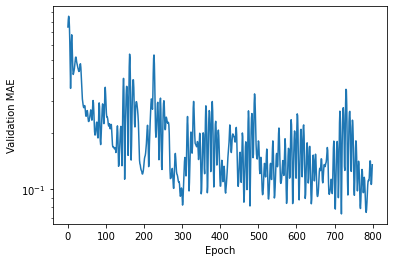

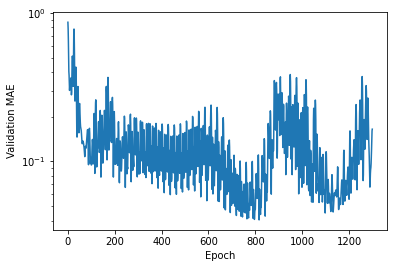

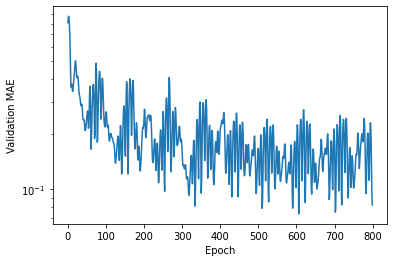

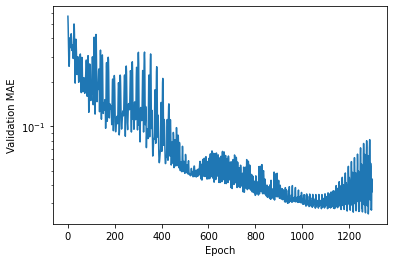

time: 963 ms (started: 2022-08-12 10:43:16 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 10.5 ms (started: 2022-08-12 10:43:16 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 55.4 ms (started: 2022-08-12 10:43:16 +00:00)


In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 760 µs (started: 2022-08-12 10:43:17 +00:00)


0.14911446


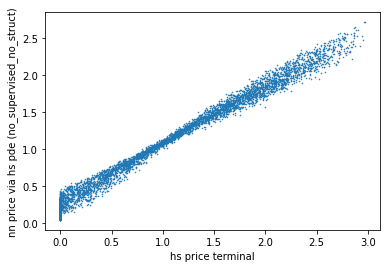

time: 151 ms (started: 2022-08-12 10:43:17 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.13881053054291964


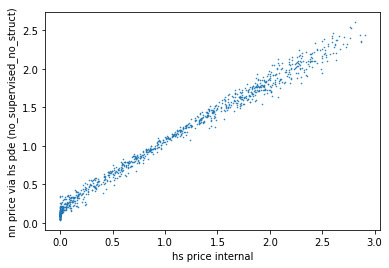

time: 343 ms (started: 2022-08-12 10:43:17 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.19200751


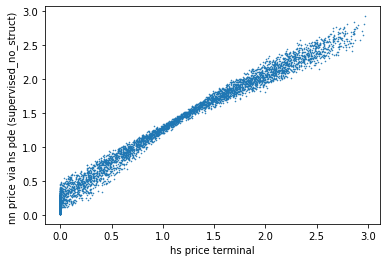

time: 159 ms (started: 2022-08-12 10:43:17 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.19144368985033683


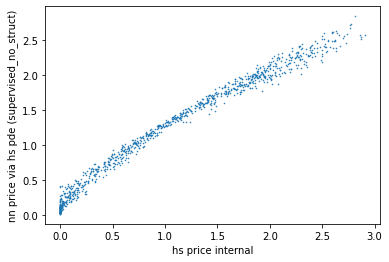

time: 155 ms (started: 2022-08-12 10:43:17 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.094349846


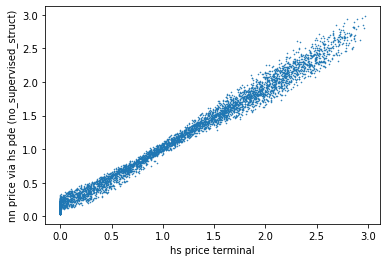

time: 160 ms (started: 2022-08-12 10:43:17 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.08555713809217194


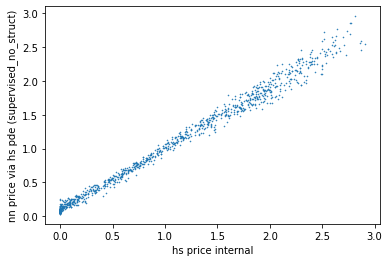

time: 148 ms (started: 2022-08-12 10:43:18 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.069076724


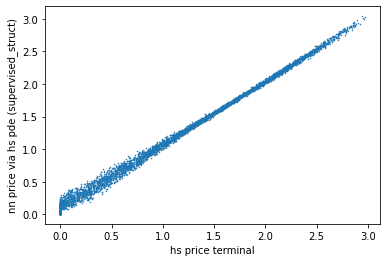

time: 162 ms (started: 2022-08-12 10:43:18 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.06919331052104243


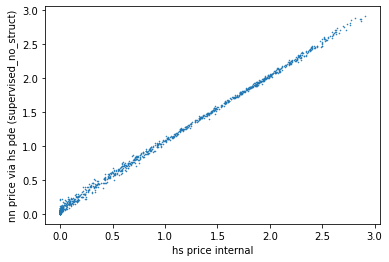

time: 155 ms (started: 2022-08-12 10:43:18 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

#### Test Case European Call - Uniform sampling - ResNet Like - With Stock  Segmentation


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
heston_equation.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

# net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net2 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
heston_equation2.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
heston_equation3.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
heston_equation4.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:02<04:23,  2.66s/it]

Epoch 0 - lr 0.001 -  loss: 0.2951132617373433 - Terminal loss 0.26998037099838257 - Internal Loss 0.05639231204986572 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:13<04:09,  2.62s/it]

Epoch 4 - lr 0.001 -  loss: 0.08358263964247373 - Terminal loss 0.046643346548080444 - Internal Loss 0.047069843858480453 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:26<03:56,  2.63s/it]

Epoch 9 - lr 0.001 -  loss: 0.027126716760297615 - Terminal loss 0.019587134942412376 - Internal Loss 0.011918816715478897 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:39<03:41,  2.60s/it]

Epoch 14 - lr 0.001 -  loss: 0.04663136104742686 - Terminal loss 0.026922056451439857 - Internal Loss 0.040686074644327164 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:52<03:29,  2.62s/it]

Epoch 19 - lr 0.001 -  loss: 0.05640076737230023 - Terminal loss 0.043767575174570084 - Internal Loss 0.04640619456768036 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:05<03:17,  2.63s/it]

Epoch 24 - lr 0.001 -  loss: 0.004870072421100404 - Terminal loss 0.0027339719235897064 - Internal Loss 0.00252644089050591 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [01:18<03:03,  2.62s/it]

Epoch 29 - lr 0.001 -  loss: 0.013873975659306679 - Terminal loss 0.002636628458276391 - Internal Loss 0.004738558083772659 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:31<02:51,  2.63s/it]

Epoch 34 - lr 0.001 -  loss: 0.006953743777962195 - Terminal loss 0.0020759128965437412 - Internal Loss 0.0020072110928595066 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:44<02:38,  2.65s/it]

Epoch 39 - lr 0.001 -  loss: 0.0038160457172327572 - Terminal loss 0.0019167396239936352 - Internal Loss 0.0010198461823165417 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:57<02:24,  2.62s/it]

Epoch 44 - lr 0.001 -  loss: 0.01291231381603413 - Terminal loss 0.0008774768793955445 - Internal Loss 0.005194640252739191 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:10<02:11,  2.63s/it]

Epoch 49 - lr 0.001 -  loss: 0.006033342590348588 - Terminal loss 0.004825643263757229 - Internal Loss 0.0016914906445890665 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:24<01:59,  2.65s/it]

Epoch 54 - lr 0.001 -  loss: 0.007685003530544539 - Terminal loss 0.0005776536418125033 - Internal Loss 0.0020373654551804066 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:37<01:44,  2.61s/it]

Epoch 59 - lr 0.001 -  loss: 0.006901835893384284 - Terminal loss 0.005273316986858845 - Internal Loss 0.006487884093075991 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:50<01:32,  2.63s/it]

Epoch 64 - lr 0.001 -  loss: 0.0030900960555300117 - Terminal loss 0.0005714388680644333 - Internal Loss 0.0015484532341361046 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:03<01:17,  2.58s/it]

Epoch 69 - lr 0.001 -  loss: 0.005971659252989209 - Terminal loss 0.0022671460174024105 - Internal Loss 0.002685173647478223 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:16<01:05,  2.62s/it]

Epoch 74 - lr 0.001 -  loss: 0.008740767694285346 - Terminal loss 0.0003899083530995995 - Internal Loss 0.00284628220833838 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:29<00:52,  2.63s/it]

Epoch 79 - lr 0.001 -  loss: 0.005397583940066397 - Terminal loss 0.003938050474971533 - Internal Loss 0.0023264260962605476 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [03:42<00:39,  2.61s/it]

Epoch 84 - lr 0.001 -  loss: 0.005822647750998537 - Terminal loss 0.0002841273380909115 - Internal Loss 0.002090063411742449 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [03:55<00:26,  2.63s/it]

Epoch 89 - lr 0.001 -  loss: 0.005281403156307836 - Terminal loss 0.0031972513534128666 - Internal Loss 0.004449913743883371 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:08<00:13,  2.63s/it]

Epoch 94 - lr 0.001 -  loss: 0.0015005371015932825 - Terminal loss 0.00036682584322988987 - Internal Loss 0.0010710636852309108 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [04:21<00:00,  2.62s/it]


Epoch 99 - lr 0.001 -  loss: 0.0017698926644192801 - Terminal loss 0.0004109498404432088 - Internal Loss 0.0008307553362101316 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:02<04:53,  2.96s/it]

Epoch 0 - lr 0.001 -  loss: 0.1007948188227045 - Terminal loss 0.028121115639805794 - Internal Loss 0.003228978719562292 - Structure Loss 0.0 - Supervised Loss 0.020448090720904064


  5%|▌         | 5/100 [00:14<04:38,  2.93s/it]

Epoch 4 - lr 0.001 -  loss: 0.014161101264642288 - Terminal loss 0.005733288824558258 - Internal Loss 0.006210274528712034 - Structure Loss 0.0 - Supervised Loss 0.0022404280722234386


 10%|█         | 10/100 [00:29<04:22,  2.92s/it]

Epoch 9 - lr 0.001 -  loss: 0.016683992271212932 - Terminal loss 0.00048050691839307547 - Internal Loss 0.0012960215099155903 - Structure Loss 0.0 - Supervised Loss 0.0017604313925177085


 15%|█▌        | 15/100 [00:43<04:05,  2.89s/it]

Epoch 14 - lr 0.001 -  loss: 0.021065119596680844 - Terminal loss 0.005358749534934759 - Internal Loss 0.0063591767102479935 - Structure Loss 0.0 - Supervised Loss 0.014134552443359047


 20%|██        | 20/100 [00:58<03:55,  2.94s/it]

Epoch 19 - lr 0.001 -  loss: 0.012511401560226622 - Terminal loss 0.002013095887377858 - Internal Loss 0.0007711060461588204 - Structure Loss 0.0 - Supervised Loss 0.00742504664993118


 25%|██▌       | 25/100 [01:13<03:39,  2.93s/it]

Epoch 24 - lr 0.001 -  loss: 0.009054632007217043 - Terminal loss 0.001051092753186822 - Internal Loss 0.002417051699012518 - Structure Loss 0.0 - Supervised Loss 0.006467389897325062


 30%|███       | 30/100 [01:27<03:23,  2.91s/it]

Epoch 29 - lr 0.001 -  loss: 0.004406279108649416 - Terminal loss 0.0004053422308061272 - Internal Loss 0.0008207707433030009 - Structure Loss 0.0 - Supervised Loss 0.001725696563558334


 35%|███▌      | 35/100 [01:42<03:11,  2.95s/it]

Epoch 34 - lr 0.001 -  loss: 0.0031580595413143934 - Terminal loss 0.00036416249349713326 - Internal Loss 0.0005258150631561875 - Structure Loss 0.0 - Supervised Loss 0.0014868352710658153


 40%|████      | 40/100 [01:56<02:56,  2.95s/it]

Epoch 39 - lr 0.001 -  loss: 0.0032324067936951232 - Terminal loss 0.00038258833228610456 - Internal Loss 0.0005812907475046813 - Structure Loss 0.0 - Supervised Loss 0.001674842055898148


 45%|████▌     | 45/100 [02:11<02:40,  2.91s/it]

Epoch 44 - lr 0.001 -  loss: 0.0024900622059589998 - Terminal loss 0.00033703187364153564 - Internal Loss 0.0004655540396925062 - Structure Loss 0.0 - Supervised Loss 0.0010900320842164959


 50%|█████     | 50/100 [02:26<02:27,  2.96s/it]

Epoch 49 - lr 0.001 -  loss: 0.0012874127786748715 - Terminal loss 0.0002075313968816772 - Internal Loss 0.00020808730914723128 - Structure Loss 0.0 - Supervised Loss 0.0003004110418587705


 55%|█████▌    | 55/100 [02:41<02:12,  2.94s/it]

Epoch 54 - lr 0.001 -  loss: 0.0021422857028140095 - Terminal loss 0.0007739864522591233 - Internal Loss 0.00011569812340894714 - Structure Loss 0.0 - Supervised Loss 0.0003344251915484893


 60%|██████    | 60/100 [02:55<01:56,  2.91s/it]

Epoch 59 - lr 0.001 -  loss: 0.002012834206791887 - Terminal loss 6.143719656392932e-05 - Internal Loss 0.0006315071950666606 - Structure Loss 0.0 - Supervised Loss 0.0009093082491151556


 65%|██████▌   | 65/100 [03:10<01:43,  2.95s/it]

Epoch 64 - lr 0.001 -  loss: 0.001901659418746121 - Terminal loss 9.426622273167595e-05 - Internal Loss 0.0008845457341521978 - Structure Loss 0.0 - Supervised Loss 0.0002396833492461533


 70%|███████   | 70/100 [03:25<01:28,  2.93s/it]

Epoch 69 - lr 0.001 -  loss: 0.0018512841552805527 - Terminal loss 0.00017273165576625615 - Internal Loss 0.0007019112817943096 - Structure Loss 0.0 - Supervised Loss 0.00023681063380683707


 75%|███████▌  | 75/100 [03:39<01:12,  2.91s/it]

Epoch 74 - lr 0.001 -  loss: 0.0037587330776755177 - Terminal loss 0.0018414625665172935 - Internal Loss 0.0012223602971062064 - Structure Loss 0.0 - Supervised Loss 0.000702454389727532


 80%|████████  | 80/100 [03:54<00:59,  2.95s/it]

Epoch 79 - lr 0.001 -  loss: 0.0049024951890800006 - Terminal loss 0.0016582729294896126 - Internal Loss 0.0007209156756289303 - Structure Loss 0.0 - Supervised Loss 0.002126212946094892


 85%|████████▌ | 85/100 [04:09<00:44,  2.94s/it]

Epoch 84 - lr 0.001 -  loss: 0.003678787989522962 - Terminal loss 0.003029047278687358 - Internal Loss 0.0002962618018500507 - Structure Loss 0.0 - Supervised Loss 0.0007202524020890248


 90%|█████████ | 90/100 [04:23<00:29,  2.91s/it]

Epoch 89 - lr 0.001 -  loss: 0.0037850475929836016 - Terminal loss 0.0012041308218613267 - Internal Loss 0.00030401430558413267 - Structure Loss 0.0 - Supervised Loss 0.0012401377054460842


 95%|█████████▌| 95/100 [04:38<00:14,  2.95s/it]

Epoch 94 - lr 0.001 -  loss: 0.0020432719460802603 - Terminal loss 0.0009175639133900404 - Internal Loss 0.00033459122641943395 - Structure Loss 0.0 - Supervised Loss 0.00036744747653998046


100%|██████████| 100/100 [04:53<00:00,  2.93s/it]


Epoch 99 - lr 0.001 -  loss: 0.001592330889759672 - Terminal loss 0.00036628812085837126 - Internal Loss 0.00021703667880501598 - Structure Loss 0.0 - Supervised Loss 0.0005787996465797165


  1%|          | 1/100 [00:02<04:51,  2.94s/it]

Epoch 0 - lr 0.001 -  loss: 0.2623484017741349 - Terminal loss 0.08319558203220367 - Internal Loss 0.0462760403752327 - Structure Loss 0.06438850611448288 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:14<04:33,  2.88s/it]

Epoch 4 - lr 0.001 -  loss: 0.06134127121832636 - Terminal loss 0.03196818381547928 - Internal Loss 0.03403458744287491 - Structure Loss 0.007779659237712622 - Supervised Loss 0.0


 10%|█         | 10/100 [00:29<04:23,  2.92s/it]

Epoch 9 - lr 0.001 -  loss: 0.034946742467582226 - Terminal loss 0.020126543939113617 - Internal Loss 0.01992698200047016 - Structure Loss 0.01527486089617014 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:43<04:07,  2.91s/it]

Epoch 14 - lr 0.001 -  loss: 0.009080923576321866 - Terminal loss 0.007385415956377983 - Internal Loss 0.0005794063908979297 - Structure Loss 0.00013298039266373962 - Supervised Loss 0.0


 20%|██        | 20/100 [00:58<03:53,  2.92s/it]

Epoch 19 - lr 0.001 -  loss: 0.005559289129450917 - Terminal loss 0.002004125388339162 - Internal Loss 0.0017593083903193474 - Structure Loss 0.00011591380462050438 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:12<03:37,  2.90s/it]

Epoch 24 - lr 0.001 -  loss: 0.04909004643559456 - Terminal loss 0.06458226591348648 - Internal Loss 0.003887385129928589 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [01:27<03:24,  2.92s/it]

Epoch 29 - lr 0.001 -  loss: 0.06185794140522679 - Terminal loss 0.06776496767997742 - Internal Loss 0.013779772445559502 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:41<03:06,  2.87s/it]

Epoch 34 - lr 0.001 -  loss: 0.02144762630470925 - Terminal loss 0.004570948425680399 - Internal Loss 0.01257536094635725 - Structure Loss 1.5925172192510217e-05 - Supervised Loss 0.0


 40%|████      | 40/100 [01:56<02:54,  2.91s/it]

Epoch 39 - lr 0.001 -  loss: 0.006307403582872616 - Terminal loss 0.0034033411648124456 - Internal Loss 0.0006858217529952526 - Structure Loss 1.4931636542314664e-05 - Supervised Loss 0.0


 45%|████▌     | 45/100 [02:10<02:37,  2.86s/it]

Epoch 44 - lr 0.001 -  loss: 0.013738385091225306 - Terminal loss 0.0027070273645222187 - Internal Loss 0.0035321495961397886 - Structure Loss 6.443487563956296e-06 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:25<02:25,  2.91s/it]

Epoch 49 - lr 0.001 -  loss: 0.004167904650482039 - Terminal loss 0.003027342725545168 - Internal Loss 0.00069308967795223 - Structure Loss 3.0141665774863213e-05 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:39<02:08,  2.86s/it]

Epoch 54 - lr 0.001 -  loss: 0.010637517449342541 - Terminal loss 0.001007683458738029 - Internal Loss 0.0038081554230302572 - Structure Loss 5.666144716087729e-06 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:54<01:55,  2.90s/it]

Epoch 59 - lr 0.001 -  loss: 0.005003030489509304 - Terminal loss 0.0036480389535427094 - Internal Loss 0.001489676651544869 - Structure Loss 4.477135735214688e-05 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [03:09<01:42,  2.92s/it]

Epoch 64 - lr 0.001 -  loss: 0.008038946815455953 - Terminal loss 0.0011169639183208346 - Internal Loss 0.0009227142436429858 - Structure Loss 4.071829607710242e-06 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:23<01:26,  2.88s/it]

Epoch 69 - lr 0.001 -  loss: 0.007568885882695516 - Terminal loss 0.006188557017594576 - Internal Loss 0.004711451940238476 - Structure Loss 3.5874120385415154e-07 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:38<01:12,  2.92s/it]

Epoch 74 - lr 0.001 -  loss: 0.004568347759130929 - Terminal loss 0.0006924229674041271 - Internal Loss 0.002689305692911148 - Structure Loss 1.4165346328809392e-05 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:52<00:58,  2.92s/it]

Epoch 79 - lr 0.001 -  loss: 0.004969027514259021 - Terminal loss 0.002155920723453164 - Internal Loss 0.0019368755165487528 - Structure Loss 1.1080132026108913e-05 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [04:07<00:43,  2.91s/it]

Epoch 84 - lr 0.001 -  loss: 0.008130677561793063 - Terminal loss 0.0008296390878967941 - Internal Loss 0.001712287892587483 - Structure Loss 7.585766979900654e-06 - Supervised Loss 0.0


 90%|█████████ | 90/100 [04:21<00:29,  2.92s/it]

Epoch 89 - lr 0.001 -  loss: 0.006168106325074202 - Terminal loss 0.004769050050526857 - Internal Loss 0.0024495618417859077 - Structure Loss 4.010430814105348e-07 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:36<00:14,  2.89s/it]

Epoch 94 - lr 0.001 -  loss: 0.00613809054872642 - Terminal loss 0.0006300291861407459 - Internal Loss 0.0024501702282577753 - Structure Loss 8.053984856815077e-06 - Supervised Loss 0.0


100%|██████████| 100/100 [04:50<00:00,  2.91s/it]


Epoch 99 - lr 0.001 -  loss: 0.0036248599644750357 - Terminal loss 0.0017615979304537177 - Internal Loss 0.003330610226839781 - Structure Loss 1.9080713173025288e-05 - Supervised Loss 0.0


  1%|          | 1/100 [00:03<05:25,  3.29s/it]

Epoch 0 - lr 0.001 -  loss: 0.18612714666842747 - Terminal loss 0.017339276149868965 - Internal Loss 0.027652978897094727 - Structure Loss 0.0016950456192716956 - Supervised Loss 0.11706275107541302


  5%|▌         | 5/100 [00:16<05:06,  3.23s/it]

Epoch 4 - lr 0.001 -  loss: 0.03407066273324783 - Terminal loss 0.0025190638843923807 - Internal Loss 0.02416372112929821 - Structure Loss 4.118297511013225e-05 - Supervised Loss 0.0034435359663996835


 10%|█         | 10/100 [00:32<04:54,  3.27s/it]

Epoch 9 - lr 0.001 -  loss: 0.030931000499368737 - Terminal loss 0.016484802588820457 - Internal Loss 0.004301808774471283 - Structure Loss 0.0 - Supervised Loss 0.016908964641786418


 15%|█▌        | 15/100 [00:48<04:36,  3.26s/it]

Epoch 14 - lr 0.001 -  loss: 0.018027896216660576 - Terminal loss 0.00020585213496815413 - Internal Loss 0.005698360502719879 - Structure Loss 0.00018870770873036236 - Supervised Loss 0.001671897851473238


 20%|██        | 20/100 [01:04<04:18,  3.23s/it]

Epoch 19 - lr 0.001 -  loss: 0.0040270896150163115 - Terminal loss 0.0001583739067427814 - Internal Loss 0.0003927494108211249 - Structure Loss 0.0 - Supervised Loss 0.0009510686074404469


 25%|██▌       | 25/100 [01:21<04:05,  3.27s/it]

Epoch 24 - lr 0.001 -  loss: 0.005807547992064048 - Terminal loss 0.0026356796734035015 - Internal Loss 0.00025410790112800896 - Structure Loss 1.1711572369677015e-05 - Supervised Loss 0.001007590842717289


 30%|███       | 30/100 [01:37<03:48,  3.26s/it]

Epoch 29 - lr 0.001 -  loss: 0.002580689626932982 - Terminal loss 0.0001262044534087181 - Internal Loss 0.0004055347526445985 - Structure Loss 5.08556377099012e-06 - Supervised Loss 0.001199413970213061


 35%|███▌      | 35/100 [01:53<03:30,  3.23s/it]

Epoch 34 - lr 0.001 -  loss: 0.0020212686507183413 - Terminal loss 0.00020657273125834763 - Internal Loss 0.0006020157597959042 - Structure Loss 8.206991878978442e-06 - Supervised Loss 0.000454834839433513


 40%|████      | 40/100 [02:10<03:16,  3.28s/it]

Epoch 39 - lr 0.001 -  loss: 0.003146480947612205 - Terminal loss 0.00020960663096047938 - Internal Loss 0.0003975443833041936 - Structure Loss 2.2258927856455557e-06 - Supervised Loss 0.0013347763901037579


 45%|████▌     | 45/100 [02:26<02:59,  3.26s/it]

Epoch 44 - lr 0.001 -  loss: 0.005220034506710524 - Terminal loss 0.0025814806576818228 - Internal Loss 0.0003546442021615803 - Structure Loss 7.583251863252372e-05 - Supervised Loss 0.0013082411373392631


 50%|█████     | 50/100 [02:42<02:41,  3.24s/it]

Epoch 49 - lr 0.001 -  loss: 0.0036145106671362864 - Terminal loss 0.00023526600853074342 - Internal Loss 0.00024257741461042315 - Structure Loss 0.0 - Supervised Loss 0.001904355818291628


 55%|█████▌    | 55/100 [02:59<02:27,  3.27s/it]

Epoch 54 - lr 0.001 -  loss: 0.006988105562484211 - Terminal loss 0.004720241297036409 - Internal Loss 0.00035066355485469103 - Structure Loss 9.069212683243677e-05 - Supervised Loss 0.0019445463395394882


 60%|██████    | 60/100 [03:15<02:10,  3.25s/it]

Epoch 59 - lr 0.001 -  loss: 0.005434832633264597 - Terminal loss 0.000555286300368607 - Internal Loss 0.0007771504460833967 - Structure Loss 1.4339897234094678e-06 - Supervised Loss 0.0011726338638524216


 65%|██████▌   | 65/100 [03:31<01:53,  3.23s/it]

Epoch 64 - lr 0.001 -  loss: 0.003442229973572869 - Terminal loss 0.0007903689984232187 - Internal Loss 0.0009132305858656764 - Structure Loss 0.0 - Supervised Loss 0.0007232047832178577


 70%|███████   | 70/100 [03:47<01:38,  3.28s/it]

Epoch 69 - lr 0.001 -  loss: 0.0025462935197157143 - Terminal loss 0.00033820344833657146 - Internal Loss 0.0011091288179159164 - Structure Loss 1.361425574941677e-06 - Supervised Loss 0.0005398807892803165


 75%|███████▌  | 75/100 [04:04<01:21,  3.26s/it]

Epoch 74 - lr 0.001 -  loss: 0.0020990945904259496 - Terminal loss 0.00020374714222270995 - Internal Loss 0.0010057712206616998 - Structure Loss 0.0 - Supervised Loss 0.0003427713980747238


 80%|████████  | 80/100 [04:20<01:04,  3.23s/it]

Epoch 79 - lr 0.001 -  loss: 0.0016715319672836741 - Terminal loss 0.0003396905667614192 - Internal Loss 0.0011069781612604856 - Structure Loss 0.0 - Supervised Loss 0.0002994086146276944


 85%|████████▌ | 85/100 [04:36<00:49,  3.28s/it]

Epoch 84 - lr 0.001 -  loss: 0.0017044520035121118 - Terminal loss 0.00028534536249935627 - Internal Loss 0.0004361332394182682 - Structure Loss 0.0 - Supervised Loss 0.0007230875412911569


 90%|█████████ | 90/100 [04:52<00:32,  3.26s/it]

Epoch 89 - lr 0.001 -  loss: 0.001558955645535919 - Terminal loss 0.0010770490625873208 - Internal Loss 0.0002095010131597519 - Structure Loss 1.8393320715404116e-05 - Supervised Loss 0.00043961123038949954


 95%|█████████▌| 95/100 [05:09<00:16,  3.23s/it]

Epoch 94 - lr 0.001 -  loss: 0.001110583675026431 - Terminal loss 3.282598845544271e-05 - Internal Loss 0.00025861989706754684 - Structure Loss 7.70589667808963e-06 - Supervised Loss 0.00015929831267590464


100%|██████████| 100/100 [05:25<00:00,  3.26s/it]

Epoch 99 - lr 0.001 -  loss: 0.0006508962135515734 - Terminal loss 2.8853897674707696e-05 - Internal Loss 7.53923668526113e-05 - Structure Loss 1.1534045825101202e-06 - Supervised Loss 0.00016951041736807749


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 19min 31s (started: 2022-08-12 10:43:18 +00:00)


In [ ]:
validation_data['heston_analytical_sol'].shape

torch.Size([2000, 1])

time: 4.89 ms (started: 2022-08-12 11:02:50 +00:00)


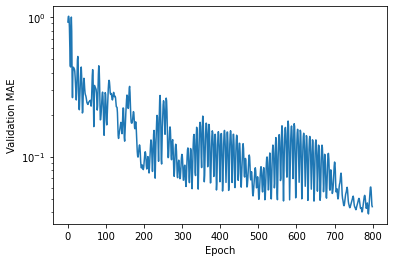

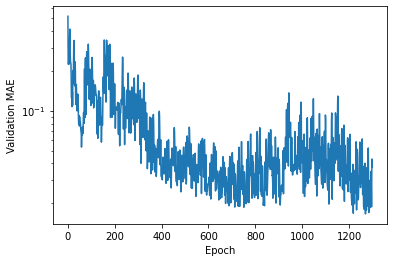

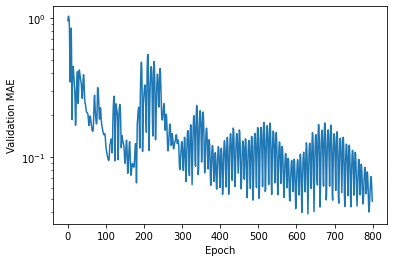

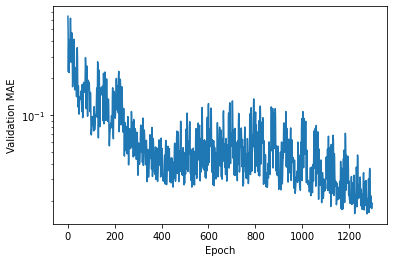

time: 985 ms (started: 2022-08-12 11:02:50 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
# input_data = supervised_data['heston_input'].to(torch.device("cuda:0"))
# bs_pred = bs_price( "C", 
#     input_data[:,2].reshape(-1,1), 
#     input_data[:,1].reshape(-1,1), 
#     input_data[:,3].reshape(-1,1) - input_data[:,0].reshape(-1,1), 
#     input_data[:,10].reshape(-1,1)**0.5, 
#     input_data[:,4].reshape(-1,1)
# )
# target = supervised_data['heston_analytical_sol'].to(torch.device("cuda:0"))
# trainEuss_supervised_struct.net.to(torch.device("cuda:0"))
# prediction = trainEuss_supervised_struct.net(input_data.to(torch.device("cuda:0")))

# sol = torch.abs(target - prediction).cpu().detach().numpy()
# sol.mean(), sol.var()
# # np.argmin(sol)

time: 1.85 ms (started: 2022-08-12 11:02:51 +00:00)


In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 10.5 ms (started: 2022-08-12 11:02:51 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                              nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 55.9 ms (started: 2022-08-12 11:02:51 +00:00)


In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 10.5 ms (started: 2022-08-12 11:02:51 +00:00)


In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 910 µs (started: 2022-08-12 11:02:51 +00:00)


0.056484718


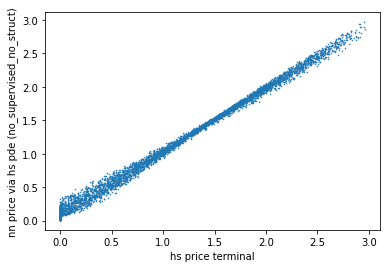

time: 237 ms (started: 2022-08-12 11:02:51 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

In [ ]:
heston_analytical.shape

torch.Size([1000])

time: 2.71 ms (started: 2022-08-12 11:02:51 +00:00)


0.04297521333456336


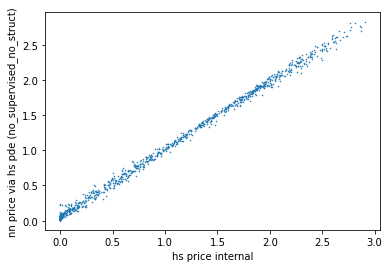

time: 222 ms (started: 2022-08-12 11:02:51 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.05917302


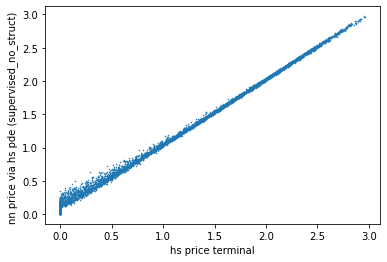

time: 217 ms (started: 2022-08-12 11:02:51 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.0502969855921933


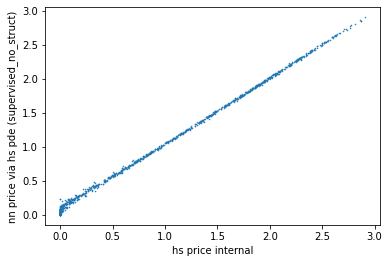

time: 211 ms (started: 2022-08-12 11:02:51 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.060803443


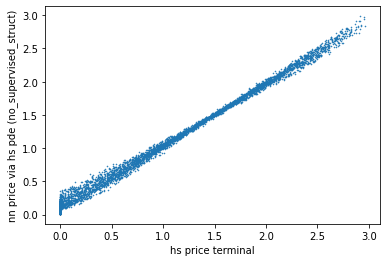

time: 229 ms (started: 2022-08-12 11:02:52 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.04470227074410398


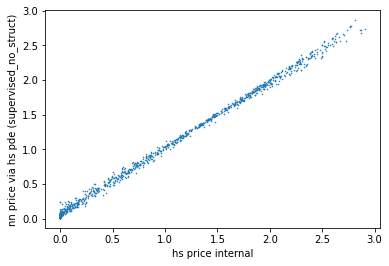

time: 215 ms (started: 2022-08-12 11:02:52 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.037440352


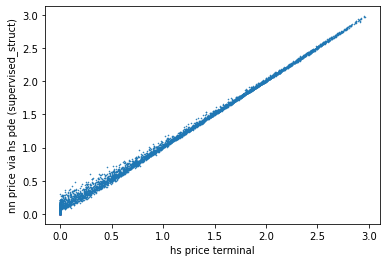

time: 238 ms (started: 2022-08-12 11:02:52 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.02785221931865144


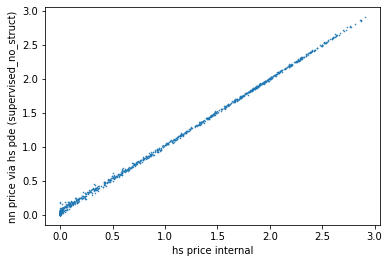

time: 214 ms (started: 2022-08-12 11:02:52 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

In [ ]:
supervised_data['heston_analytical_sol'].shape

torch.Size([5000, 1])

time: 3.23 ms (started: 2022-08-12 11:02:53 +00:00)


#### Test Case European Call - Uniform sampling - Simple DNN - No Segmentation - Loss weight importance Sampling


In [ ]:
# seed = 123
# torch.manual_seed(seed)
# torch.cuda.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)
# np.random.seed(seed)
# random.seed(seed)
# torch.backends.cudnn.benchmark = False
# torch.backends.cudnn.deterministic = True

# eqLossFn = 'calculateLoss'
# sample_method= "U"
# lr = 1e-3
# gamma = 1.0

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# # net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
# net.to(torch.device("cuda:0")) 
# ## providing sampler with net so it caan accept/reject based on net and other criterions
# heston_equation = EuropeanHestonSingleStockBase(net)
# trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
# trainEuss_no_supervised_no_struct.hook_interval = 5
# trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma)
# trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

time: 2.69 ms (started: 2022-08-12 11:02:53 +00:00)


In [ ]:
# net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
# net_cpu.eval()
# plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
# plt.xlabel('hs price terminal')
# plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
# pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

time: 1.35 ms (started: 2022-08-12 11:02:53 +00:00)


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma=1.0

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:26,  1.14it/s]

Epoch 0 - lr 0.001 -  loss: 0.20022657016913095 - Terminal loss 0.08450470119714737 - Internal Loss 0.07020308077335358 - Structure Loss 0.0625 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:04<01:17,  1.22it/s]

Epoch 4 - lr 0.001 -  loss: 0.02033122359878487 - Terminal loss 0.06557651609182358 - Internal Loss 0.06451527029275894 - Structure Loss 0.0625 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:08<01:09,  1.30it/s]

Epoch 9 - lr 0.001 -  loss: 0.006270024615029494 - Terminal loss 0.06341588497161865 - Internal Loss 0.06327948719263077 - Structure Loss 0.0625 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:12<01:08,  1.25it/s]

Epoch 14 - lr 0.001 -  loss: 0.004126423918124702 - Terminal loss 0.06306158751249313 - Internal Loss 0.06309177726507187 - Structure Loss 0.0625 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:15<01:02,  1.28it/s]

Epoch 19 - lr 0.001 -  loss: 0.0032366973399702045 - Terminal loss 0.06293505430221558 - Internal Loss 0.06298129260540009 - Structure Loss 0.0625 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [00:19<01:00,  1.25it/s]

Epoch 24 - lr 0.001 -  loss: 0.002670127225832807 - Terminal loss 0.06287331879138947 - Internal Loss 0.06288684159517288 - Structure Loss 0.0625 - Supervised Loss 0.0625


 30%|███       | 30/100 [00:23<00:54,  1.29it/s]

Epoch 29 - lr 0.001 -  loss: 0.0022428585216403008 - Terminal loss 0.06282736361026764 - Internal Loss 0.06281302869319916 - Structure Loss 0.0625 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [00:27<00:52,  1.24it/s]

Epoch 34 - lr 0.001 -  loss: 0.0019061243316779535 - Terminal loss 0.06278970092535019 - Internal Loss 0.06275571882724762 - Structure Loss 0.0625 - Supervised Loss 0.0625


 40%|████      | 40/100 [00:31<00:44,  1.34it/s]

Epoch 39 - lr 0.001 -  loss: 0.001644757408131328 - Terminal loss 0.06275966018438339 - Internal Loss 0.0627119243144989 - Structure Loss 0.0625 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [00:35<00:43,  1.26it/s]

Epoch 44 - lr 0.001 -  loss: 0.0014548308552346295 - Terminal loss 0.06273598968982697 - Internal Loss 0.06268224120140076 - Structure Loss 0.0625 - Supervised Loss 0.0625


 50%|█████     | 50/100 [00:39<00:40,  1.24it/s]

Epoch 49 - lr 0.001 -  loss: 0.0013295528608270818 - Terminal loss 0.0627172514796257 - Internal Loss 0.06266573816537857 - Structure Loss 0.0625 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [00:43<00:36,  1.25it/s]

Epoch 54 - lr 0.001 -  loss: 0.0012469282115085258 - Terminal loss 0.06270283460617065 - Internal Loss 0.06265663355588913 - Structure Loss 0.0625 - Supervised Loss 0.0625


 60%|██████    | 60/100 [00:47<00:33,  1.21it/s]

Epoch 59 - lr 0.001 -  loss: 0.0011849447877870665 - Terminal loss 0.06269126385450363 - Internal Loss 0.06265027076005936 - Structure Loss 0.0625 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [00:51<00:27,  1.27it/s]

Epoch 64 - lr 0.001 -  loss: 0.001133050484996703 - Terminal loss 0.06268174946308136 - Internal Loss 0.06264469027519226 - Structure Loss 0.0625 - Supervised Loss 0.0625


 70%|███████   | 70/100 [00:55<00:23,  1.25it/s]

Epoch 69 - lr 0.001 -  loss: 0.001087093143723905 - Terminal loss 0.0626736581325531 - Internal Loss 0.06263938546180725 - Structure Loss 0.0625 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [00:59<00:19,  1.28it/s]

Epoch 74 - lr 0.001 -  loss: 0.0010453802274747028 - Terminal loss 0.06266661733388901 - Internal Loss 0.06263431161642075 - Structure Loss 0.0625 - Supervised Loss 0.0625


 80%|████████  | 80/100 [01:03<00:17,  1.17it/s]

Epoch 79 - lr 0.001 -  loss: 0.0010076874556640785 - Terminal loss 0.06266072392463684 - Internal Loss 0.06262978911399841 - Structure Loss 0.0625 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [01:07<00:12,  1.20it/s]

Epoch 84 - lr 0.001 -  loss: 0.0009729700395837426 - Terminal loss 0.06265391409397125 - Internal Loss 0.06262457370758057 - Structure Loss 0.0625 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [01:12<00:08,  1.19it/s]

Epoch 89 - lr 0.001 -  loss: 0.0009342024051066902 - Terminal loss 0.06264796853065491 - Internal Loss 0.06262028962373734 - Structure Loss 0.0625 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [01:16<00:03,  1.26it/s]

Epoch 94 - lr 0.001 -  loss: 0.0009010832032395734 - Terminal loss 0.06264260411262512 - Internal Loss 0.06261606514453888 - Structure Loss 0.0625 - Supervised Loss 0.0625


100%|██████████| 100/100 [01:20<00:00,  1.25it/s]


Epoch 99 - lr 0.001 -  loss: 0.0009428688143897387 - Terminal loss 0.0626453086733818 - Internal Loss 0.06262310594320297 - Structure Loss 0.0625 - Supervised Loss 0.0625


  1%|          | 1/100 [00:00<01:26,  1.14it/s]

Epoch 0 - lr 0.001 -  loss: 0.3463728901112645 - Terminal loss 0.08381899446249008 - Internal Loss 0.06788045167922974 - Structure Loss 0.0625 - Supervised Loss 0.08226259575295419


  5%|▌         | 5/100 [00:04<01:17,  1.23it/s]

Epoch 4 - lr 0.001 -  loss: 0.0208726388939306 - Terminal loss 0.06406934559345245 - Internal Loss 0.06438354402780533 - Structure Loss 0.0625 - Supervised Loss 0.06394152429123831


 10%|█         | 10/100 [00:08<01:17,  1.15it/s]

Epoch 9 - lr 0.001 -  loss: 0.006710632592798779 - Terminal loss 0.0630488321185112 - Internal Loss 0.06333190202713013 - Structure Loss 0.0625 - Supervised Loss 0.06293280279563666


 15%|█▌        | 15/100 [00:12<01:10,  1.20it/s]

Epoch 14 - lr 0.001 -  loss: 0.004303413687224111 - Terminal loss 0.06288499385118484 - Internal Loss 0.06301312148571014 - Structure Loss 0.0625 - Supervised Loss 0.06277234560346336


 20%|██        | 20/100 [00:16<01:04,  1.24it/s]

Epoch 19 - lr 0.001 -  loss: 0.0031773045553787336 - Terminal loss 0.06280262768268585 - Internal Loss 0.06287647038698196 - Structure Loss 0.0625 - Supervised Loss 0.06269228195240131


 25%|██▌       | 25/100 [00:20<01:04,  1.16it/s]

Epoch 24 - lr 0.001 -  loss: 0.0025061253244059367 - Terminal loss 0.0627475306391716 - Internal Loss 0.06280054897069931 - Structure Loss 0.0625 - Supervised Loss 0.06264346292223623


 30%|███       | 30/100 [00:25<00:58,  1.19it/s]

Epoch 29 - lr 0.001 -  loss: 0.002072041581927402 - Terminal loss 0.06270883232355118 - Internal Loss 0.06275314837694168 - Structure Loss 0.0625 - Supervised Loss 0.062612280992479


 35%|███▌      | 35/100 [00:29<00:52,  1.25it/s]

Epoch 34 - lr 0.001 -  loss: 0.0017911537130091315 - Terminal loss 0.06268196552991867 - Internal Loss 0.0627233237028122 - Structure Loss 0.0625 - Supervised Loss 0.06259267954884024


 40%|████      | 40/100 [00:33<00:50,  1.19it/s]

Epoch 39 - lr 0.001 -  loss: 0.0016030653301999872 - Terminal loss 0.06266307830810547 - Internal Loss 0.06270316243171692 - Structure Loss 0.0625 - Supervised Loss 0.06258011829595896


 45%|████▌     | 45/100 [00:37<00:44,  1.23it/s]

Epoch 44 - lr 0.001 -  loss: 0.0014640017848771458 - Terminal loss 0.06264936178922653 - Internal Loss 0.06268653273582458 - Structure Loss 0.0625 - Supervised Loss 0.06257173940891084


 50%|█████     | 50/100 [00:41<00:39,  1.26it/s]

Epoch 49 - lr 0.001 -  loss: 0.0013521261032019693 - Terminal loss 0.06263870000839233 - Internal Loss 0.06267184019088745 - Structure Loss 0.0625 - Supervised Loss 0.06256556893984754


 55%|█████▌    | 55/100 [00:45<00:37,  1.18it/s]

Epoch 54 - lr 0.001 -  loss: 0.0012574595596026377 - Terminal loss 0.06262940913438797 - Internal Loss 0.06265920400619507 - Structure Loss 0.0625 - Supervised Loss 0.06256052172781812


 60%|██████    | 60/100 [00:49<00:34,  1.15it/s]

Epoch 59 - lr 0.001 -  loss: 0.001174179361738548 - Terminal loss 0.06262141466140747 - Internal Loss 0.06264788657426834 - Structure Loss 0.0625 - Supervised Loss 0.06255619745937593


 65%|██████▌   | 65/100 [00:54<00:28,  1.22it/s]

Epoch 64 - lr 0.001 -  loss: 0.0010998880640718186 - Terminal loss 0.062614306807518 - Internal Loss 0.0626375749707222 - Structure Loss 0.0625 - Supervised Loss 0.06255243117099704


 70%|███████   | 70/100 [00:58<00:26,  1.15it/s]

Epoch 69 - lr 0.001 -  loss: 0.0010343120050267825 - Terminal loss 0.06260816752910614 - Internal Loss 0.06262848526239395 - Structure Loss 0.0625 - Supervised Loss 0.06254984480707944


 75%|███████▌  | 75/100 [01:02<00:21,  1.17it/s]

Epoch 74 - lr 0.001 -  loss: 0.0009700410242647926 - Terminal loss 0.06260229647159576 - Internal Loss 0.06261924654245377 - Structure Loss 0.0625 - Supervised Loss 0.06254607023364568


 80%|████████  | 80/100 [01:06<00:16,  1.23it/s]

Epoch 79 - lr 0.001 -  loss: 0.0009294553716184138 - Terminal loss 0.06259942054748535 - Internal Loss 0.06261130422353745 - Structure Loss 0.0625 - Supervised Loss 0.06254449363523676


 85%|████████▌ | 85/100 [01:11<00:12,  1.18it/s]

Epoch 84 - lr 0.001 -  loss: 0.0008726813709653428 - Terminal loss 0.0625927597284317 - Internal Loss 0.06260378658771515 - Structure Loss 0.0625 - Supervised Loss 0.06254081250524672


 90%|█████████ | 90/100 [01:15<00:08,  1.21it/s]

Epoch 89 - lr 0.001 -  loss: 0.0008447379101637009 - Terminal loss 0.06258997321128845 - Internal Loss 0.06259767711162567 - Structure Loss 0.0625 - Supervised Loss 0.06253929442689124


 95%|█████████▌| 95/100 [01:19<00:03,  1.25it/s]

Epoch 94 - lr 0.001 -  loss: 0.0007782188635289324 - Terminal loss 0.06258551776409149 - Internal Loss 0.06259176135063171 - Structure Loss 0.0625 - Supervised Loss 0.06253681350987063


100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 99 - lr 0.001 -  loss: 0.0008782401334505785 - Terminal loss 0.06258124113082886 - Internal Loss 0.0625872015953064 - Structure Loss 0.0625 - Supervised Loss 0.06253533722101112


  1%|          | 1/100 [00:00<01:25,  1.16it/s]

Epoch 0 - lr 0.001 -  loss: 0.23037565582328373 - Terminal loss 0.09439496695995331 - Internal Loss 0.06516740471124649 - Structure Loss 0.0635320395231247 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:04<01:20,  1.18it/s]

Epoch 4 - lr 0.001 -  loss: 0.02320858049723837 - Terminal loss 0.0655602440237999 - Internal Loss 0.06479526311159134 - Structure Loss 0.06273369491100311 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:08<01:17,  1.16it/s]

Epoch 9 - lr 0.001 -  loss: 0.005985119121356143 - Terminal loss 0.06335782259702682 - Internal Loss 0.06320411711931229 - Structure Loss 0.06251495331525803 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:12<01:12,  1.18it/s]

Epoch 14 - lr 0.001 -  loss: 0.004129983019083738 - Terminal loss 0.06315749883651733 - Internal Loss 0.06295980513095856 - Structure Loss 0.06250713020563126 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:16<01:04,  1.24it/s]

Epoch 19 - lr 0.001 -  loss: 0.003342968877404928 - Terminal loss 0.06304069608449936 - Internal Loss 0.06286831945180893 - Structure Loss 0.06250404566526413 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [00:20<01:02,  1.20it/s]

Epoch 24 - lr 0.001 -  loss: 0.0028468026365670892 - Terminal loss 0.06295844912528992 - Internal Loss 0.0628189891576767 - Structure Loss 0.0625029057264328 - Supervised Loss 0.0625


 30%|███       | 30/100 [00:25<01:00,  1.17it/s]

Epoch 29 - lr 0.001 -  loss: 0.0025145369840578902 - Terminal loss 0.06290164589881897 - Internal Loss 0.06278663128614426 - Structure Loss 0.06250216066837311 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [00:29<00:53,  1.21it/s]

Epoch 34 - lr 0.001 -  loss: 0.0022726515566723216 - Terminal loss 0.06286392360925674 - Internal Loss 0.0627628043293953 - Structure Loss 0.06250159442424774 - Supervised Loss 0.0625


 40%|████      | 40/100 [00:33<00:50,  1.20it/s]

Epoch 39 - lr 0.001 -  loss: 0.002055147869719399 - Terminal loss 0.06282971799373627 - Internal Loss 0.0627354234457016 - Structure Loss 0.06250134110450745 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [00:37<00:45,  1.21it/s]

Epoch 44 - lr 0.001 -  loss: 0.001870543256195055 - Terminal loss 0.06280221790075302 - Internal Loss 0.06271333992481232 - Structure Loss 0.06250106543302536 - Supervised Loss 0.0625


 50%|█████     | 50/100 [00:41<00:39,  1.27it/s]

Epoch 49 - lr 0.001 -  loss: 0.001704527569624285 - Terminal loss 0.06277734041213989 - Internal Loss 0.06269323080778122 - Structure Loss 0.06250082701444626 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [00:45<00:37,  1.19it/s]

Epoch 54 - lr 0.001 -  loss: 0.001554268451097111 - Terminal loss 0.06275451928377151 - Internal Loss 0.06267533451318741 - Structure Loss 0.06250066310167313 - Supervised Loss 0.0625


 60%|██████    | 60/100 [00:49<00:33,  1.18it/s]

Epoch 59 - lr 0.001 -  loss: 0.0014219427248463035 - Terminal loss 0.06273456662893295 - Internal Loss 0.06266035884618759 - Structure Loss 0.06250057369470596 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [00:53<00:29,  1.20it/s]

Epoch 64 - lr 0.001 -  loss: 0.0013070954009890556 - Terminal loss 0.06271345168352127 - Internal Loss 0.06264850497245789 - Structure Loss 0.0625004768371582 - Supervised Loss 0.0625


 70%|███████   | 70/100 [00:57<00:23,  1.27it/s]

Epoch 69 - lr 0.001 -  loss: 0.0012126037747495705 - Terminal loss 0.06269701570272446 - Internal Loss 0.06263958662748337 - Structure Loss 0.06250042468309402 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [01:02<00:20,  1.21it/s]

Epoch 74 - lr 0.001 -  loss: 0.001146252590438558 - Terminal loss 0.06268222630023956 - Internal Loss 0.0626358613371849 - Structure Loss 0.06250029802322388 - Supervised Loss 0.0625


 80%|████████  | 80/100 [01:06<00:16,  1.20it/s]

Epoch 79 - lr 0.001 -  loss: 0.001120177731435332 - Terminal loss 0.06267070025205612 - Internal Loss 0.06263401359319687 - Structure Loss 0.0625002458691597 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [01:10<00:12,  1.23it/s]

Epoch 84 - lr 0.001 -  loss: 0.0011849379322181146 - Terminal loss 0.06274197995662689 - Internal Loss 0.06265692412853241 - Structure Loss 0.06250027567148209 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [01:14<00:08,  1.17it/s]

Epoch 89 - lr 0.001 -  loss: 0.0010105054696193999 - Terminal loss 0.06265495717525482 - Internal Loss 0.06262240558862686 - Structure Loss 0.06250019371509552 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [01:18<00:04,  1.23it/s]

Epoch 94 - lr 0.001 -  loss: 0.0010693898269285758 - Terminal loss 0.06267324090003967 - Internal Loss 0.06263527274131775 - Structure Loss 0.06250027567148209 - Supervised Loss 0.0625


100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 99 - lr 0.001 -  loss: 0.0009190653347306781 - Terminal loss 0.06263932585716248 - Internal Loss 0.06261447817087173 - Structure Loss 0.0625002458691597 - Supervised Loss 0.0625


  1%|          | 1/100 [00:00<01:13,  1.35it/s]

Epoch 0 - lr 0.001 -  loss: 0.2826782193139209 - Terminal loss 0.08166098594665527 - Internal Loss 0.06545167416334152 - Structure Loss 0.06345273554325104 - Supervised Loss 0.08309659665227857


  5%|▌         | 5/100 [00:04<01:21,  1.16it/s]

Epoch 4 - lr 0.001 -  loss: 0.015213694525739849 - Terminal loss 0.06366893649101257 - Internal Loss 0.0637676864862442 - Structure Loss 0.06266999244689941 - Supervised Loss 0.06351108332372526


 10%|█         | 10/100 [00:08<01:15,  1.20it/s]

Epoch 9 - lr 0.001 -  loss: 0.006084600937203698 - Terminal loss 0.06306594610214233 - Internal Loss 0.06309456378221512 - Structure Loss 0.06251542270183563 - Supervised Loss 0.06290775467585769


 15%|█▌        | 15/100 [00:12<01:15,  1.13it/s]

Epoch 14 - lr 0.001 -  loss: 0.004088461974013657 - Terminal loss 0.06288725882768631 - Internal Loss 0.06292246282100677 - Structure Loss 0.06250368058681488 - Supervised Loss 0.06275813572530521


 20%|██        | 20/100 [00:17<01:09,  1.16it/s]

Epoch 19 - lr 0.001 -  loss: 0.0031137891718009676 - Terminal loss 0.06280190497636795 - Internal Loss 0.06282816082239151 - Structure Loss 0.06250206381082535 - Supervised Loss 0.0626861326793674


 25%|██▌       | 25/100 [00:21<01:02,  1.19it/s]

Epoch 24 - lr 0.001 -  loss: 0.0024994816545041054 - Terminal loss 0.06275052577257156 - Internal Loss 0.06275869160890579 - Structure Loss 0.06250126659870148 - Supervised Loss 0.06264434649088207


 30%|███       | 30/100 [00:25<01:01,  1.13it/s]

Epoch 29 - lr 0.001 -  loss: 0.0020722365836730455 - Terminal loss 0.06271318346261978 - Internal Loss 0.06270821392536163 - Structure Loss 0.06250076740980148 - Supervised Loss 0.06261632643828784


 35%|███▌      | 35/100 [00:30<00:56,  1.16it/s]

Epoch 34 - lr 0.001 -  loss: 0.0017811789410142258 - Terminal loss 0.06268662214279175 - Internal Loss 0.06267464905977249 - Structure Loss 0.0625004842877388 - Supervised Loss 0.06259808391614764


 40%|████      | 40/100 [00:34<00:50,  1.19it/s]

Epoch 39 - lr 0.001 -  loss: 0.0015871692817658219 - Terminal loss 0.06266727298498154 - Internal Loss 0.06265527009963989 - Structure Loss 0.06250046193599701 - Supervised Loss 0.06258560384494205


 45%|████▌     | 45/100 [00:38<00:49,  1.11it/s]

Epoch 44 - lr 0.001 -  loss: 0.0014485843603901161 - Terminal loss 0.0626523345708847 - Internal Loss 0.06264302879571915 - Structure Loss 0.06250052154064178 - Supervised Loss 0.06257627162545235


 50%|█████     | 50/100 [00:43<00:44,  1.13it/s]

Epoch 49 - lr 0.001 -  loss: 0.0013390520165235207 - Terminal loss 0.06264123320579529 - Internal Loss 0.06263431906700134 - Structure Loss 0.06250055879354477 - Supervised Loss 0.06256894035705436


 55%|█████▌    | 55/100 [00:47<00:38,  1.17it/s]

Epoch 54 - lr 0.001 -  loss: 0.0012537269714661156 - Terminal loss 0.0626329630613327 - Internal Loss 0.0626281201839447 - Structure Loss 0.06250055134296417 - Supervised Loss 0.06256365299147905


 60%|██████    | 60/100 [00:52<00:35,  1.12it/s]

Epoch 59 - lr 0.001 -  loss: 0.0012085882654712594 - Terminal loss 0.06262340396642685 - Internal Loss 0.0626211017370224 - Structure Loss 0.06250058859586716 - Supervised Loss 0.06255817520438842


 65%|██████▌   | 65/100 [00:56<00:30,  1.14it/s]

Epoch 64 - lr 0.001 -  loss: 0.0011489919588227623 - Terminal loss 0.06261663138866425 - Internal Loss 0.06261744350194931 - Structure Loss 0.06250065565109253 - Supervised Loss 0.06255710938495933


 70%|███████   | 70/100 [01:00<00:26,  1.15it/s]

Epoch 69 - lr 0.001 -  loss: 0.0010595898289864328 - Terminal loss 0.06260981410741806 - Internal Loss 0.06261070817708969 - Structure Loss 0.06250057369470596 - Supervised Loss 0.06255128608365361


 75%|███████▌  | 75/100 [01:05<00:22,  1.11it/s]

Epoch 74 - lr 0.001 -  loss: 0.001059907874843454 - Terminal loss 0.06260643154382706 - Internal Loss 0.06260664761066437 - Structure Loss 0.06250034272670746 - Supervised Loss 0.06254904328460076


 80%|████████  | 80/100 [01:09<00:17,  1.15it/s]

Epoch 79 - lr 0.001 -  loss: 0.0009984052008426892 - Terminal loss 0.06260225921869278 - Internal Loss 0.06260186433792114 - Structure Loss 0.06250011920928955 - Supervised Loss 0.06254691902350762


 85%|████████▌ | 85/100 [01:13<00:12,  1.19it/s]

Epoch 84 - lr 0.001 -  loss: 0.0009499473726690991 - Terminal loss 0.06260066479444504 - Internal Loss 0.06259894371032715 - Structure Loss 0.06250003725290298 - Supervised Loss 0.0625461587235922


 90%|█████████ | 90/100 [01:18<00:08,  1.13it/s]

Epoch 89 - lr 0.001 -  loss: 0.000976648997175218 - Terminal loss 0.06260090321302414 - Internal Loss 0.06259819865226746 - Structure Loss 0.06250009685754776 - Supervised Loss 0.0625470266997633


 95%|█████████▌| 95/100 [01:22<00:04,  1.15it/s]

Epoch 94 - lr 0.001 -  loss: 0.0009993203323169976 - Terminal loss 0.06259212642908096 - Internal Loss 0.06259112060070038 - Structure Loss 0.06250008940696716 - Supervised Loss 0.06254171561419021


100%|██████████| 100/100 [01:26<00:00,  1.15it/s]

Epoch 99 - lr 0.001 -  loss: 0.0009115976898641084 - Terminal loss 0.06259077042341232 - Internal Loss 0.06258915364742279 - Structure Loss 0.06250012665987015 - Supervised Loss 0.06254294129013999


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 5min 33s (started: 2022-08-12 11:02:53 +00:00)


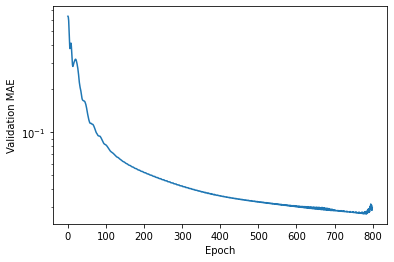

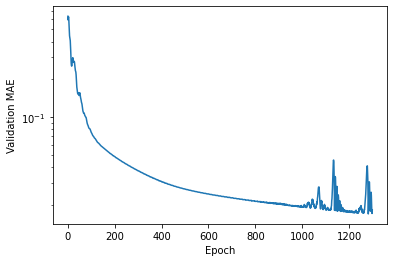

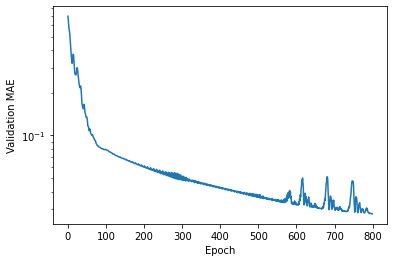

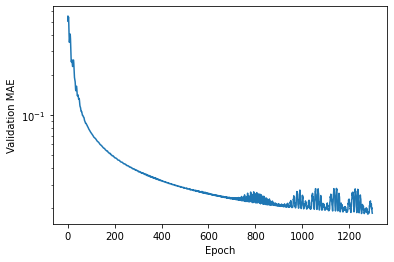

time: 913 ms (started: 2022-08-12 11:08:26 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 10.9 ms (started: 2022-08-12 11:08:27 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 57.2 ms (started: 2022-08-12 11:08:27 +00:00)


In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 11.4 ms (started: 2022-08-12 11:08:27 +00:00)


0.040969245


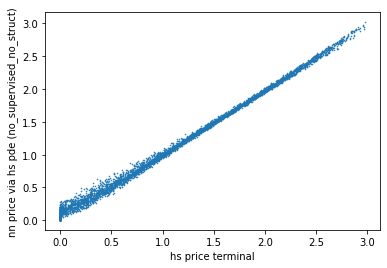

time: 158 ms (started: 2022-08-12 11:08:27 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.030168595145016477


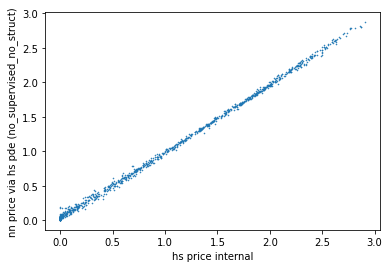

time: 149 ms (started: 2022-08-12 11:08:28 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.031873003


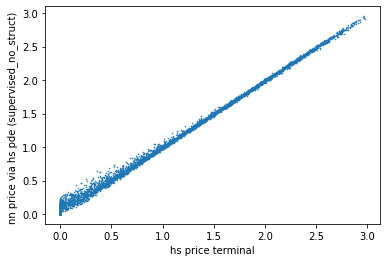

time: 160 ms (started: 2022-08-12 11:08:28 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.023447374560792482


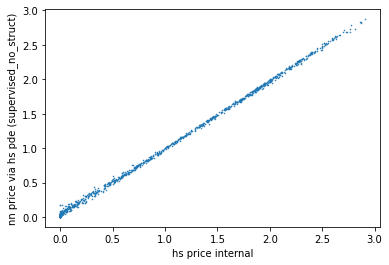

time: 152 ms (started: 2022-08-12 11:08:28 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.040007792


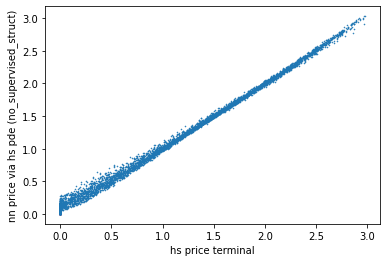

time: 165 ms (started: 2022-08-12 11:08:28 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.025574581093250604


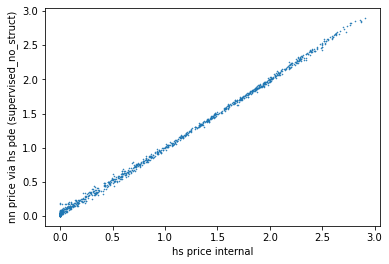

time: 342 ms (started: 2022-08-12 11:08:28 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.031210735


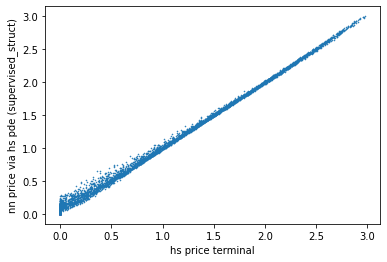

time: 152 ms (started: 2022-08-12 11:08:29 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.0200419839965216


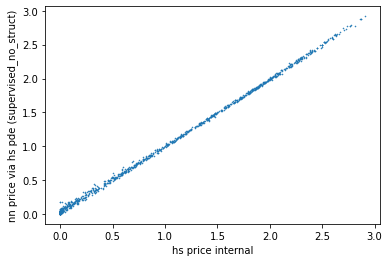

time: 156 ms (started: 2022-08-12 11:08:29 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

#### Test Case European Call - Uniform sampling - ResNet Like - No Segmentation - Loss weight Importance Sampling

[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma = 1.0

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

# net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net2 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:02<04:23,  2.66s/it]

Epoch 0 - lr 0.001 -  loss: 0.5265665352344513 - Terminal loss 0.16625604033470154 - Internal Loss 0.06392902135848999 - Structure Loss 0.0625 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:13<04:09,  2.62s/it]

Epoch 4 - lr 0.001 -  loss: 0.017055058644877538 - Terminal loss 0.06519341468811035 - Internal Loss 0.06393582373857498 - Structure Loss 0.0625 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:26<03:57,  2.64s/it]

Epoch 9 - lr 0.001 -  loss: 0.0052326904195878245 - Terminal loss 0.06338918209075928 - Internal Loss 0.06300614029169083 - Structure Loss 0.0625 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:39<03:42,  2.62s/it]

Epoch 14 - lr 0.001 -  loss: 0.003197061467087931 - Terminal loss 0.06306537240743637 - Internal Loss 0.06280377507209778 - Structure Loss 0.0625 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:52<03:30,  2.64s/it]

Epoch 19 - lr 0.001 -  loss: 0.002355575535653366 - Terminal loss 0.0629221722483635 - Internal Loss 0.06272128969430923 - Structure Loss 0.0625 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [01:05<03:13,  2.58s/it]

Epoch 24 - lr 0.001 -  loss: 0.0018505439058774048 - Terminal loss 0.06283104419708252 - Internal Loss 0.0626756027340889 - Structure Loss 0.0625 - Supervised Loss 0.0625


 30%|███       | 30/100 [01:18<03:03,  2.62s/it]

Epoch 29 - lr 0.001 -  loss: 0.0015138992263625066 - Terminal loss 0.06276658177375793 - Internal Loss 0.06264867633581161 - Structure Loss 0.0625 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [01:32<02:51,  2.64s/it]

Epoch 34 - lr 0.001 -  loss: 0.0012832482914543813 - Terminal loss 0.06272110342979431 - Internal Loss 0.06263124197721481 - Structure Loss 0.0625 - Supervised Loss 0.0625


 40%|████      | 40/100 [01:45<02:37,  2.63s/it]

Epoch 39 - lr 0.001 -  loss: 0.0011208931165229944 - Terminal loss 0.06268911063671112 - Internal Loss 0.062618687748909 - Structure Loss 0.0625 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [01:58<02:25,  2.64s/it]

Epoch 44 - lr 0.001 -  loss: 0.001002540604935752 - Terminal loss 0.06266641616821289 - Internal Loss 0.0626087337732315 - Structure Loss 0.0625 - Supervised Loss 0.0625


 50%|█████     | 50/100 [02:11<02:10,  2.60s/it]

Epoch 49 - lr 0.001 -  loss: 0.0009122111110223664 - Terminal loss 0.06264979392290115 - Internal Loss 0.06260032206773758 - Structure Loss 0.0625 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [02:24<01:58,  2.63s/it]

Epoch 54 - lr 0.001 -  loss: 0.0008398959180340171 - Terminal loss 0.06263700872659683 - Internal Loss 0.06259297579526901 - Structure Loss 0.0625 - Supervised Loss 0.0625


 60%|██████    | 60/100 [02:37<01:44,  2.60s/it]

Epoch 59 - lr 0.001 -  loss: 0.0007797103608027101 - Terminal loss 0.06262673437595367 - Internal Loss 0.0625864714384079 - Structure Loss 0.0625 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [02:50<01:32,  2.64s/it]

Epoch 64 - lr 0.001 -  loss: 0.0007283218114429878 - Terminal loss 0.06261817365884781 - Internal Loss 0.0625806674361229 - Structure Loss 0.0625 - Supervised Loss 0.0625


 70%|███████   | 70/100 [03:04<01:19,  2.64s/it]

Epoch 69 - lr 0.001 -  loss: 0.0006837597078022858 - Terminal loss 0.06261087954044342 - Internal Loss 0.06257549673318863 - Structure Loss 0.0625 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [03:17<01:05,  2.63s/it]

Epoch 74 - lr 0.001 -  loss: 0.000644714752626088 - Terminal loss 0.06260458379983902 - Internal Loss 0.06257084012031555 - Structure Loss 0.0625 - Supervised Loss 0.0625


 80%|████████  | 80/100 [03:30<00:52,  2.64s/it]

Epoch 79 - lr 0.001 -  loss: 0.0006102478817208774 - Terminal loss 0.06259916722774506 - Internal Loss 0.06256648153066635 - Structure Loss 0.0625 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [03:43<00:39,  2.65s/it]

Epoch 84 - lr 0.001 -  loss: 0.0005790624159595205 - Terminal loss 0.06259455531835556 - Internal Loss 0.06256238371133804 - Structure Loss 0.0625 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [03:56<00:26,  2.64s/it]

Epoch 89 - lr 0.001 -  loss: 0.0005500600155856875 - Terminal loss 0.06259012967348099 - Internal Loss 0.0625588670372963 - Structure Loss 0.0625 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [04:09<00:13,  2.64s/it]

Epoch 94 - lr 0.001 -  loss: 0.0005240483765697314 - Terminal loss 0.06258603930473328 - Internal Loss 0.06255573034286499 - Structure Loss 0.0625 - Supervised Loss 0.0625


100%|██████████| 100/100 [04:23<00:00,  2.63s/it]


Epoch 99 - lr 0.001 -  loss: 0.0005002467272182306 - Terminal loss 0.06258226931095123 - Internal Loss 0.06255290657281876 - Structure Loss 0.0625 - Supervised Loss 0.0625


  1%|          | 1/100 [00:02<04:36,  2.80s/it]

Epoch 0 - lr 0.001 -  loss: 0.2384086780721625 - Terminal loss 0.07188332825899124 - Internal Loss 0.06461022794246674 - Structure Loss 0.0625 - Supervised Loss 0.06959182999476332


  5%|▌         | 5/100 [00:14<04:38,  2.93s/it]

Epoch 4 - lr 0.001 -  loss: 0.0033288478999385827 - Terminal loss 0.06281023472547531 - Internal Loss 0.06276727467775345 - Structure Loss 0.0625 - Supervised Loss 0.06271771556480209


 10%|█         | 10/100 [00:29<04:21,  2.91s/it]

Epoch 9 - lr 0.001 -  loss: 0.0017249744834271729 - Terminal loss 0.06266573071479797 - Internal Loss 0.0626806914806366 - Structure Loss 0.0625 - Supervised Loss 0.06260765473110629


 15%|█▌        | 15/100 [00:43<04:11,  2.96s/it]

Epoch 14 - lr 0.001 -  loss: 0.0012559918254337603 - Terminal loss 0.06262229382991791 - Internal Loss 0.06263978034257889 - Structure Loss 0.0625 - Supervised Loss 0.06257484632486889


 20%|██        | 20/100 [00:58<03:57,  2.96s/it]

Epoch 19 - lr 0.001 -  loss: 0.001004965670238026 - Terminal loss 0.06259892880916595 - Internal Loss 0.06261581927537918 - Structure Loss 0.0625 - Supervised Loss 0.06255771279114462


 25%|██▌       | 25/100 [01:13<03:39,  2.93s/it]

Epoch 24 - lr 0.001 -  loss: 0.0008501355100478263 - Terminal loss 0.06258503347635269 - Internal Loss 0.06259886175394058 - Structure Loss 0.0625 - Supervised Loss 0.06254756576508912


 30%|███       | 30/100 [01:28<03:27,  2.97s/it]

Epoch 29 - lr 0.001 -  loss: 0.0007380859190119556 - Terminal loss 0.06257540732622147 - Internal Loss 0.06258507817983627 - Structure Loss 0.0625 - Supervised Loss 0.06254064015551423


 35%|███▌      | 35/100 [01:42<03:11,  2.95s/it]

Epoch 34 - lr 0.001 -  loss: 0.0006493800373250725 - Terminal loss 0.06256701797246933 - Internal Loss 0.06257541477680206 - Structure Loss 0.0625 - Supervised Loss 0.06253491409284595


 40%|████      | 40/100 [01:57<02:55,  2.92s/it]

Epoch 39 - lr 0.001 -  loss: 0.0005771628956653421 - Terminal loss 0.06255999952554703 - Internal Loss 0.06256760656833649 - Structure Loss 0.0625 - Supervised Loss 0.06253034614639615


 45%|████▌     | 45/100 [02:12<02:43,  2.97s/it]

Epoch 44 - lr 0.001 -  loss: 0.0005167116376326504 - Terminal loss 0.06255415081977844 - Internal Loss 0.06256112456321716 - Structure Loss 0.0625 - Supervised Loss 0.06252661862079989


 50%|█████     | 50/100 [02:27<02:27,  2.95s/it]

Epoch 49 - lr 0.001 -  loss: 0.0004644907873278056 - Terminal loss 0.0625494047999382 - Internal Loss 0.06255459040403366 - Structure Loss 0.0625 - Supervised Loss 0.06252353037025066


 55%|█████▌    | 55/100 [02:41<02:11,  2.92s/it]

Epoch 54 - lr 0.001 -  loss: 0.00041898374407387494 - Terminal loss 0.06254510581493378 - Internal Loss 0.06254950910806656 - Structure Loss 0.0625 - Supervised Loss 0.06252094812261132


 60%|██████    | 60/100 [02:56<01:58,  2.97s/it]

Epoch 59 - lr 0.001 -  loss: 0.0003800249926443372 - Terminal loss 0.06254123151302338 - Internal Loss 0.06254547089338303 - Structure Loss 0.0625 - Supervised Loss 0.06251874080500937


 65%|██████▌   | 65/100 [03:11<01:43,  2.96s/it]

Epoch 64 - lr 0.001 -  loss: 0.00034674219654977633 - Terminal loss 0.06253807246685028 - Internal Loss 0.06254035979509354 - Structure Loss 0.0625 - Supervised Loss 0.06251685829066606


 70%|███████   | 70/100 [03:26<01:27,  2.93s/it]

Epoch 69 - lr 0.001 -  loss: 0.00032908853488515435 - Terminal loss 0.06253699958324432 - Internal Loss 0.06254339218139648 - Structure Loss 0.0625 - Supervised Loss 0.0625179820640902


 75%|███████▌  | 75/100 [03:40<01:13,  2.96s/it]

Epoch 74 - lr 0.001 -  loss: 0.0002923481191709116 - Terminal loss 0.06253325194120407 - Internal Loss 0.0625375360250473 - Structure Loss 0.0625 - Supervised Loss 0.06251526573955962


 80%|████████  | 80/100 [03:55<00:58,  2.94s/it]

Epoch 79 - lr 0.001 -  loss: 0.0002669438914780655 - Terminal loss 0.06253010779619217 - Internal Loss 0.06253233551979065 - Structure Loss 0.0625 - Supervised Loss 0.06251295190399245


 85%|████████▌ | 85/100 [04:10<00:43,  2.93s/it]

Epoch 84 - lr 0.001 -  loss: 0.0002770317549630053 - Terminal loss 0.06252823024988174 - Internal Loss 0.0625283420085907 - Structure Loss 0.0625 - Supervised Loss 0.0625115724091656


 90%|█████████ | 90/100 [04:25<00:29,  2.97s/it]

Epoch 89 - lr 0.001 -  loss: 0.00025032543121055893 - Terminal loss 0.06252606213092804 - Internal Loss 0.06252709031105042 - Structure Loss 0.0625 - Supervised Loss 0.06251065869467944


 95%|█████████▌| 95/100 [04:39<00:14,  2.95s/it]

Epoch 94 - lr 0.001 -  loss: 0.00025086986871586636 - Terminal loss 0.06252703070640564 - Internal Loss 0.0625305101275444 - Structure Loss 0.0625 - Supervised Loss 0.06251317956202274


100%|██████████| 100/100 [04:54<00:00,  2.95s/it]


Epoch 99 - lr 0.001 -  loss: 0.0001954093773109995 - Terminal loss 0.06252271682024002 - Internal Loss 0.06252297759056091 - Structure Loss 0.0625 - Supervised Loss 0.06250875602095901


  1%|          | 1/100 [00:02<04:52,  2.96s/it]

Epoch 0 - lr 0.001 -  loss: 0.4312053844332695 - Terminal loss 0.09285487979650497 - Internal Loss 0.06496186554431915 - Structure Loss 0.06252597272396088 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:14<04:39,  2.94s/it]

Epoch 4 - lr 0.001 -  loss: 0.00710531748417351 - Terminal loss 0.06368961930274963 - Internal Loss 0.06315577030181885 - Structure Loss 0.06250173598527908 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:29<04:19,  2.88s/it]

Epoch 9 - lr 0.001 -  loss: 0.0023521382568611037 - Terminal loss 0.06289844959974289 - Internal Loss 0.0627165362238884 - Structure Loss 0.06250902265310287 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:43<04:09,  2.93s/it]

Epoch 14 - lr 0.001 -  loss: 0.0015888964214051764 - Terminal loss 0.06277822703123093 - Internal Loss 0.06264857947826385 - Structure Loss 0.06250318884849548 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:58<03:50,  2.88s/it]

Epoch 19 - lr 0.001 -  loss: 0.0012427086864287655 - Terminal loss 0.06271730363368988 - Internal Loss 0.06262000650167465 - Structure Loss 0.06250196695327759 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [01:13<03:39,  2.93s/it]

Epoch 24 - lr 0.001 -  loss: 0.0010254160216492084 - Terminal loss 0.06267697364091873 - Internal Loss 0.06260272115468979 - Structure Loss 0.06250157207250595 - Supervised Loss 0.0625


 30%|███       | 30/100 [01:27<03:25,  2.94s/it]

Epoch 29 - lr 0.001 -  loss: 0.0008739834819506439 - Terminal loss 0.06264914572238922 - Internal Loss 0.06259015947580338 - Structure Loss 0.06250127404928207 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [01:42<03:09,  2.91s/it]

Epoch 34 - lr 0.001 -  loss: 0.0007636973621427185 - Terminal loss 0.06262969225645065 - Internal Loss 0.06257995963096619 - Structure Loss 0.06250114738941193 - Supervised Loss 0.0625


 40%|████      | 40/100 [01:57<02:56,  2.93s/it]

Epoch 39 - lr 0.001 -  loss: 0.0006810995012832185 - Terminal loss 0.06261586397886276 - Internal Loss 0.06257134675979614 - Structure Loss 0.06250113248825073 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [02:11<02:41,  2.94s/it]

Epoch 44 - lr 0.001 -  loss: 0.0006172235136748188 - Terminal loss 0.06260527670383453 - Internal Loss 0.0625646710395813 - Structure Loss 0.06250093877315521 - Supervised Loss 0.0625


 50%|█████     | 50/100 [02:26<02:26,  2.93s/it]

Epoch 49 - lr 0.001 -  loss: 0.0005646209659365317 - Terminal loss 0.06259656697511673 - Internal Loss 0.06255906075239182 - Structure Loss 0.06250090897083282 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [02:40<02:12,  2.94s/it]

Epoch 54 - lr 0.001 -  loss: 0.0005199447623454034 - Terminal loss 0.06258906424045563 - Internal Loss 0.06255435943603516 - Structure Loss 0.06250090152025223 - Supervised Loss 0.0625


 60%|██████    | 60/100 [02:55<01:56,  2.92s/it]

Epoch 59 - lr 0.001 -  loss: 0.0004809058478309049 - Terminal loss 0.06258253008127213 - Internal Loss 0.06255017220973969 - Structure Loss 0.06250086426734924 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [03:10<01:42,  2.93s/it]

Epoch 64 - lr 0.001 -  loss: 0.00044592953700986173 - Terminal loss 0.06257663667201996 - Internal Loss 0.06254643201828003 - Structure Loss 0.06250088661909103 - Supervised Loss 0.0625


 70%|███████   | 70/100 [03:24<01:27,  2.90s/it]

Epoch 69 - lr 0.001 -  loss: 0.0004139571780494104 - Terminal loss 0.06257114559412003 - Internal Loss 0.06254314631223679 - Structure Loss 0.06250090897083282 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [03:39<01:13,  2.93s/it]

Epoch 74 - lr 0.001 -  loss: 0.00038467134517203603 - Terminal loss 0.06256616860628128 - Internal Loss 0.06254018098115921 - Structure Loss 0.06250088661909103 - Supervised Loss 0.0625


 80%|████████  | 80/100 [03:53<00:57,  2.90s/it]

Epoch 79 - lr 0.001 -  loss: 0.0003589196615697195 - Terminal loss 0.06256144493818283 - Internal Loss 0.06253866106271744 - Structure Loss 0.06250082701444626 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [04:08<00:44,  2.95s/it]

Epoch 84 - lr 0.001 -  loss: 0.00033214772378818854 - Terminal loss 0.0625574067234993 - Internal Loss 0.06253384798765182 - Structure Loss 0.06250066310167313 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [04:23<00:29,  2.94s/it]

Epoch 89 - lr 0.001 -  loss: 0.0003063150797970593 - Terminal loss 0.06255315989255905 - Internal Loss 0.06253131479024887 - Structure Loss 0.06250055879354477 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [04:37<00:14,  2.93s/it]

Epoch 94 - lr 0.001 -  loss: 0.0002888369070003844 - Terminal loss 0.06254950910806656 - Internal Loss 0.0625312551856041 - Structure Loss 0.0625004917383194 - Supervised Loss 0.0625


100%|██████████| 100/100 [04:52<00:00,  2.93s/it]


Epoch 99 - lr 0.001 -  loss: 0.00027322541185033816 - Terminal loss 0.06254609674215317 - Internal Loss 0.06252764910459518 - Structure Loss 0.0625004917383194 - Supervised Loss 0.0625


  1%|          | 1/100 [00:03<05:28,  3.32s/it]

Epoch 0 - lr 0.001 -  loss: 0.9903469531618347 - Terminal loss 0.11982499808073044 - Internal Loss 0.06505375355482101 - Structure Loss 0.0732586458325386 - Supervised Loss 0.11030366026447398


  5%|▌         | 5/100 [00:16<05:07,  3.23s/it]

Epoch 4 - lr 0.001 -  loss: 0.014750743261204364 - Terminal loss 0.06382118910551071 - Internal Loss 0.06336939334869385 - Structure Loss 0.06257493048906326 - Supervised Loss 0.06361327419132422


 10%|█         | 10/100 [00:32<04:55,  3.28s/it]

Epoch 9 - lr 0.001 -  loss: 0.005589225247003218 - Terminal loss 0.0630561038851738 - Internal Loss 0.06294947117567062 - Structure Loss 0.0625266283750534 - Supervised Loss 0.06291810908150462


 15%|█▌        | 15/100 [00:48<04:38,  3.27s/it]

Epoch 14 - lr 0.001 -  loss: 0.0037871662945230186 - Terminal loss 0.06289584934711456 - Internal Loss 0.06280513852834702 - Structure Loss 0.06251168996095657 - Supervised Loss 0.06277971290097065


 20%|██        | 20/100 [01:05<04:20,  3.25s/it]

Epoch 19 - lr 0.001 -  loss: 0.0028618118857335444 - Terminal loss 0.06280229985713959 - Internal Loss 0.0627359077334404 - Structure Loss 0.06250540912151337 - Supervised Loss 0.0627037503798676


 25%|██▌       | 25/100 [01:21<04:07,  3.30s/it]

Epoch 24 - lr 0.001 -  loss: 0.002251193975664399 - Terminal loss 0.06273593753576279 - Internal Loss 0.06269577145576477 - Structure Loss 0.06250344961881638 - Supervised Loss 0.06265129842913392


 30%|███       | 30/100 [01:38<03:50,  3.29s/it]

Epoch 29 - lr 0.001 -  loss: 0.0018425515751244964 - Terminal loss 0.06269168108701706 - Internal Loss 0.06266641616821289 - Structure Loss 0.06250256299972534 - Supervised Loss 0.062618054759622


 35%|███▌      | 35/100 [01:54<03:32,  3.26s/it]

Epoch 34 - lr 0.001 -  loss: 0.0015561589154146215 - Terminal loss 0.06266070157289505 - Internal Loss 0.06264396756887436 - Structure Loss 0.06250228732824326 - Supervised Loss 0.06259607111132448


 40%|████      | 40/100 [02:11<03:18,  3.31s/it]

Epoch 39 - lr 0.001 -  loss: 0.001343337531701574 - Terminal loss 0.06263799220323563 - Internal Loss 0.06262614578008652 - Structure Loss 0.06250235438346863 - Supervised Loss 0.06258034874376485


 45%|████▌     | 45/100 [02:27<03:01,  3.29s/it]

Epoch 44 - lr 0.001 -  loss: 0.001183251562818769 - Terminal loss 0.06262164562940598 - Internal Loss 0.06261084973812103 - Structure Loss 0.06250207871198654 - Supervised Loss 0.06256905110286756


 50%|█████     | 50/100 [02:43<02:43,  3.26s/it]

Epoch 49 - lr 0.001 -  loss: 0.001063651708919809 - Terminal loss 0.06260979175567627 - Internal Loss 0.06259921193122864 - Structure Loss 0.0625016912817955 - Supervised Loss 0.06256067675006059


 55%|█████▌    | 55/100 [03:00<02:28,  3.31s/it]

Epoch 54 - lr 0.001 -  loss: 0.0009688385477232032 - Terminal loss 0.06260029971599579 - Internal Loss 0.06259015202522278 - Structure Loss 0.06250116974115372 - Supervised Loss 0.0625539603946681


 60%|██████    | 60/100 [03:16<02:11,  3.29s/it]

Epoch 59 - lr 0.001 -  loss: 0.0008907722317265109 - Terminal loss 0.06259232014417648 - Internal Loss 0.062582828104496 - Structure Loss 0.06250076740980148 - Supervised Loss 0.06254838282822454


 65%|██████▌   | 65/100 [03:33<01:54,  3.26s/it]

Epoch 64 - lr 0.001 -  loss: 0.0008241672341520905 - Terminal loss 0.06258571147918701 - Internal Loss 0.06257636845111847 - Structure Loss 0.0625004991889 - Supervised Loss 0.06254386308137855


 70%|███████   | 70/100 [03:49<01:39,  3.31s/it]

Epoch 69 - lr 0.001 -  loss: 0.0007668136778114937 - Terminal loss 0.06257995963096619 - Internal Loss 0.06257083266973495 - Structure Loss 0.06250054389238358 - Supervised Loss 0.06254002734843382


 75%|███████▌  | 75/100 [04:06<01:22,  3.29s/it]

Epoch 74 - lr 0.001 -  loss: 0.0007166663810387752 - Terminal loss 0.06257481873035431 - Internal Loss 0.06256605684757233 - Structure Loss 0.06250055879354477 - Supervised Loss 0.06253671156410488


 80%|████████  | 80/100 [04:22<01:05,  3.26s/it]

Epoch 79 - lr 0.001 -  loss: 0.0006718360886222684 - Terminal loss 0.06257053464651108 - Internal Loss 0.06256146728992462 - Structure Loss 0.0625007152557373 - Supervised Loss 0.0625339722277266


 85%|████████▌ | 85/100 [04:39<00:49,  3.31s/it]

Epoch 84 - lr 0.001 -  loss: 0.0006315665442579156 - Terminal loss 0.06256696581840515 - Internal Loss 0.0625571683049202 - Structure Loss 0.06250091642141342 - Supervised Loss 0.06253185817717954


 90%|█████████ | 90/100 [04:55<00:32,  3.29s/it]

Epoch 89 - lr 0.001 -  loss: 0.0005951026862275479 - Terminal loss 0.06256362050771713 - Internal Loss 0.06255350261926651 - Structure Loss 0.06250104308128357 - Supervised Loss 0.06252990354556291


 95%|█████████▌| 95/100 [05:11<00:16,  3.26s/it]

Epoch 94 - lr 0.001 -  loss: 0.0005609712942979446 - Terminal loss 0.0625603049993515 - Internal Loss 0.06255029141902924 - Structure Loss 0.06250113248825073 - Supervised Loss 0.06252799916516685


100%|██████████| 100/100 [05:28<00:00,  3.28s/it]

Epoch 99 - lr 0.001 -  loss: 0.0005283010614294674 - Terminal loss 0.06255639344453812 - Internal Loss 0.06254779547452927 - Structure Loss 0.06250116229057312 - Supervised Loss 0.06252581666673472


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 19min 38s (started: 2022-08-12 11:08:29 +00:00)


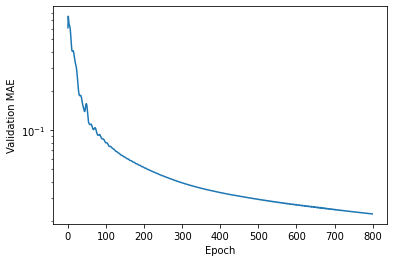

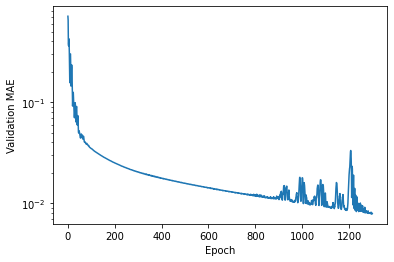

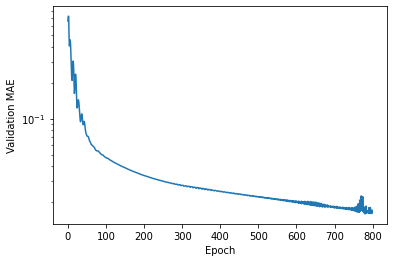

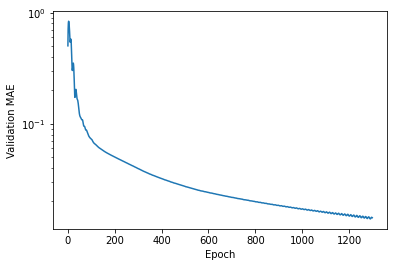

time: 990 ms (started: 2022-08-12 11:28:08 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
# input_data = supervised_data['heston_input'].to(torch.device("cuda:0"))
# bs_pred = bs_price( "C", 
#     input_data[:,2].reshape(-1,1), 
#     input_data[:,1].reshape(-1,1), 
#     input_data[:,3].reshape(-1,1) - input_data[:,0].reshape(-1,1), 
#     input_data[:,10].reshape(-1,1)**0.5, 
#     input_data[:,4].reshape(-1,1)
# )
# target = supervised_data['heston_analytical_sol'].to(torch.device("cuda:0"))
# trainEuss_supervised_struct.net.to(torch.device("cuda:0"))
# prediction = trainEuss_supervised_struct.net(input_data.to(torch.device("cuda:0")))

# sol = torch.abs(target - prediction).cpu().detach().numpy()
# sol.mean(), sol.var()
# # np.argmin(sol)

time: 1.74 ms (started: 2022-08-12 11:28:09 +00:00)


In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 11.3 ms (started: 2022-08-12 11:28:09 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                              nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 59.2 ms (started: 2022-08-12 11:28:09 +00:00)


In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 11.2 ms (started: 2022-08-12 11:28:09 +00:00)


In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 782 µs (started: 2022-08-12 11:28:09 +00:00)


0.03441569


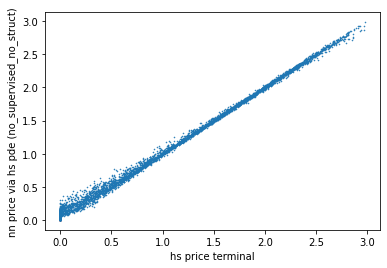

time: 241 ms (started: 2022-08-12 11:28:09 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

In [ ]:
heston_analytical.shape

torch.Size([1000])

time: 3.41 ms (started: 2022-08-12 11:28:09 +00:00)


0.020559483879730615


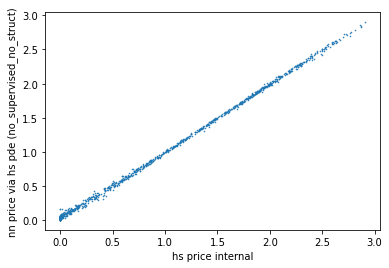

time: 220 ms (started: 2022-08-12 11:28:09 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy()

array([2.2275925e+00, 1.7406638e+00, 1.5925574e+00, ..., 2.1063743e+00,
       2.0758326e-03, 6.4087927e-02], dtype=float32)

time: 49 ms (started: 2022-08-12 11:28:09 +00:00)


0.023052363


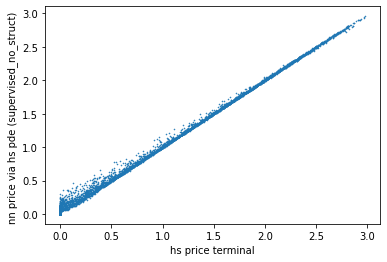

time: 234 ms (started: 2022-08-12 11:28:09 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.010849073724413903


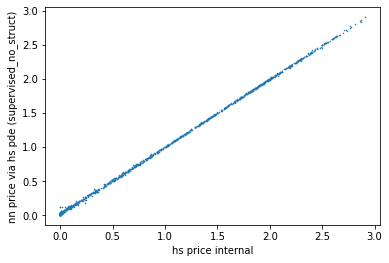

time: 205 ms (started: 2022-08-12 11:28:10 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.030049698


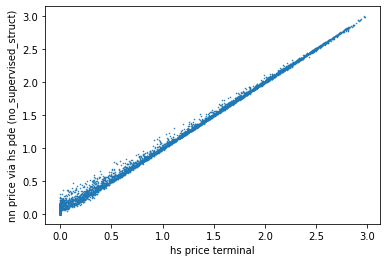

time: 237 ms (started: 2022-08-12 11:28:10 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.016064634419286464


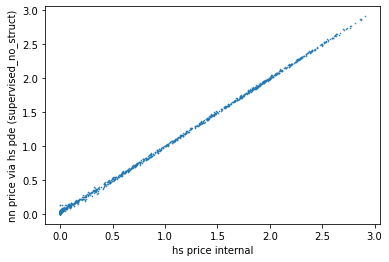

time: 236 ms (started: 2022-08-12 11:28:10 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.029647283


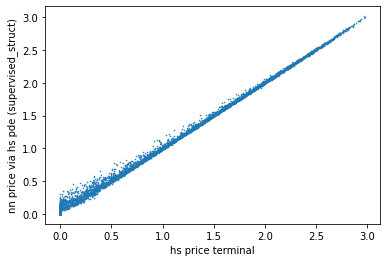

time: 237 ms (started: 2022-08-12 11:28:10 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.017789199280012984


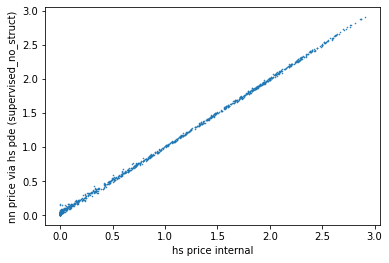

time: 236 ms (started: 2022-08-12 11:28:11 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

In [ ]:
supervised_data['heston_analytical_sol'].shape

torch.Size([5000, 1])

time: 3.3 ms (started: 2022-08-12 11:28:11 +00:00)


#### Test Case European Call - Uniform sampling - Simple DNN - No Segmentation - Loss weight importance Sampling - ABS Loss


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma=1.0

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, 
                                        lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma,
                                        key_loss_func = torch.abs)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:27,  1.13it/s]

Epoch 0 - lr 0.001 -  loss: 0.18711476690239376 - Terminal loss 0.09243416786193848 - Internal Loss 0.07635387778282166 - Structure Loss 0.0625 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:04<01:18,  1.21it/s]

Epoch 4 - lr 0.001 -  loss: 0.04211429879069328 - Terminal loss 0.06774872541427612 - Internal Loss 0.06823975592851639 - Structure Loss 0.0625 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:08<01:11,  1.25it/s]

Epoch 9 - lr 0.001 -  loss: 0.03656040090653631 - Terminal loss 0.06731092184782028 - Internal Loss 0.06612788885831833 - Structure Loss 0.0625 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:12<01:10,  1.21it/s]

Epoch 14 - lr 0.001 -  loss: 0.02113140436510245 - Terminal loss 0.06556645780801773 - Internal Loss 0.06541529297828674 - Structure Loss 0.0625 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:16<01:02,  1.28it/s]

Epoch 19 - lr 0.001 -  loss: 0.020525148345364466 - Terminal loss 0.06514934450387955 - Internal Loss 0.06491956114768982 - Structure Loss 0.0625 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [00:20<01:00,  1.24it/s]

Epoch 24 - lr 0.001 -  loss: 0.021535164780086942 - Terminal loss 0.0652957558631897 - Internal Loss 0.06527936458587646 - Structure Loss 0.0625 - Supervised Loss 0.0625


 30%|███       | 30/100 [00:24<00:56,  1.24it/s]

Epoch 29 - lr 0.001 -  loss: 0.01754149856666724 - Terminal loss 0.06557168066501617 - Internal Loss 0.06550180912017822 - Structure Loss 0.0625 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [00:28<00:51,  1.27it/s]

Epoch 34 - lr 0.001 -  loss: 0.01626275231440862 - Terminal loss 0.06495020538568497 - Internal Loss 0.06466007977724075 - Structure Loss 0.0625 - Supervised Loss 0.0625


 40%|████      | 40/100 [00:32<00:48,  1.24it/s]

Epoch 39 - lr 0.001 -  loss: 0.015015901583764289 - Terminal loss 0.06470181792974472 - Internal Loss 0.06454581022262573 - Structure Loss 0.0625 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [00:35<00:43,  1.27it/s]

Epoch 44 - lr 0.001 -  loss: 0.020422110954920452 - Terminal loss 0.06476770341396332 - Internal Loss 0.0661286860704422 - Structure Loss 0.0625 - Supervised Loss 0.0625


 50%|█████     | 50/100 [00:39<00:40,  1.23it/s]

Epoch 49 - lr 0.001 -  loss: 0.01652379644413789 - Terminal loss 0.06420976668596268 - Internal Loss 0.06471873819828033 - Structure Loss 0.0625 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [00:43<00:35,  1.28it/s]

Epoch 54 - lr 0.001 -  loss: 0.015987069035569828 - Terminal loss 0.06450602412223816 - Internal Loss 0.06492351740598679 - Structure Loss 0.0625 - Supervised Loss 0.0625


 60%|██████    | 60/100 [00:47<00:32,  1.25it/s]

Epoch 59 - lr 0.001 -  loss: 0.026119046327140596 - Terminal loss 0.06747961044311523 - Internal Loss 0.06441235542297363 - Structure Loss 0.0625 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [00:51<00:27,  1.26it/s]

Epoch 64 - lr 0.001 -  loss: 0.016470151746438608 - Terminal loss 0.06425153464078903 - Internal Loss 0.0649104043841362 - Structure Loss 0.0625 - Supervised Loss 0.0625


 70%|███████   | 70/100 [00:55<00:24,  1.24it/s]

Epoch 69 - lr 0.001 -  loss: 0.012972103638781441 - Terminal loss 0.06409777700901031 - Internal Loss 0.06419345736503601 - Structure Loss 0.0625 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [00:59<00:19,  1.26it/s]

Epoch 74 - lr 0.001 -  loss: 0.016037700697779655 - Terminal loss 0.06518591940402985 - Internal Loss 0.06469065696001053 - Structure Loss 0.0625 - Supervised Loss 0.0625


 80%|████████  | 80/100 [01:03<00:16,  1.23it/s]

Epoch 79 - lr 0.001 -  loss: 0.01276992354542017 - Terminal loss 0.06432071328163147 - Internal Loss 0.06415074318647385 - Structure Loss 0.0625 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [01:07<00:11,  1.33it/s]

Epoch 84 - lr 0.001 -  loss: 0.012411493497590223 - Terminal loss 0.06444748491048813 - Internal Loss 0.06426937133073807 - Structure Loss 0.0625 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [01:11<00:07,  1.25it/s]

Epoch 89 - lr 0.001 -  loss: 0.01181436630172862 - Terminal loss 0.06415724009275436 - Internal Loss 0.06398370116949081 - Structure Loss 0.0625 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [01:15<00:04,  1.24it/s]

Epoch 94 - lr 0.001 -  loss: 0.011583227353791395 - Terminal loss 0.06445260345935822 - Internal Loss 0.06398164480924606 - Structure Loss 0.0625 - Supervised Loss 0.0625


100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


Epoch 99 - lr 0.001 -  loss: 0.011148628157873949 - Terminal loss 0.06414821743965149 - Internal Loss 0.06394519656896591 - Structure Loss 0.0625 - Supervised Loss 0.0625


  1%|          | 1/100 [00:00<01:25,  1.15it/s]

Epoch 0 - lr 0.001 -  loss: 0.31494326906165604 - Terminal loss 0.08229441195726395 - Internal Loss 0.09997792541980743 - Structure Loss 0.0625 - Supervised Loss 0.08071160086196619


  5%|▌         | 5/100 [00:04<01:19,  1.19it/s]

Epoch 4 - lr 0.001 -  loss: 0.05080382006346852 - Terminal loss 0.06740716099739075 - Internal Loss 0.06765091419219971 - Structure Loss 0.0625 - Supervised Loss 0.0670940275523335


 10%|█         | 10/100 [00:08<01:13,  1.22it/s]

Epoch 9 - lr 0.001 -  loss: 0.03308323416396881 - Terminal loss 0.06482703983783722 - Internal Loss 0.06588976830244064 - Structure Loss 0.0625 - Supervised Loss 0.06437686936560122


 15%|█▌        | 15/100 [00:12<01:07,  1.26it/s]

Epoch 14 - lr 0.001 -  loss: 0.038405421211975724 - Terminal loss 0.0661589726805687 - Internal Loss 0.06681867688894272 - Structure Loss 0.0625 - Supervised Loss 0.06577630631618187


 20%|██        | 20/100 [00:16<01:08,  1.17it/s]

Epoch 19 - lr 0.001 -  loss: 0.033680977820474814 - Terminal loss 0.0644245594739914 - Internal Loss 0.0650654137134552 - Structure Loss 0.0625 - Supervised Loss 0.06400588425600691


 25%|██▌       | 25/100 [00:20<01:03,  1.19it/s]

Epoch 24 - lr 0.001 -  loss: 0.02097475277478641 - Terminal loss 0.06450941413640976 - Internal Loss 0.06501242518424988 - Structure Loss 0.0625 - Supervised Loss 0.06416286675282247


 30%|███       | 30/100 [00:24<00:57,  1.21it/s]

Epoch 29 - lr 0.001 -  loss: 0.020055324397924273 - Terminal loss 0.06411513686180115 - Internal Loss 0.06487488001585007 - Structure Loss 0.0625 - Supervised Loss 0.06389669772969091


 35%|███▌      | 35/100 [00:29<00:55,  1.17it/s]

Epoch 34 - lr 0.001 -  loss: 0.019342408353653476 - Terminal loss 0.06443804502487183 - Internal Loss 0.06455792486667633 - Structure Loss 0.0625 - Supervised Loss 0.06406884936311485


 40%|████      | 40/100 [00:33<00:49,  1.20it/s]

Epoch 39 - lr 0.001 -  loss: 0.018732391885639514 - Terminal loss 0.06404408812522888 - Internal Loss 0.06442447751760483 - Structure Loss 0.0625 - Supervised Loss 0.06389979418447113


 45%|████▌     | 45/100 [00:37<00:44,  1.25it/s]

Epoch 44 - lr 0.001 -  loss: 0.017863006610547634 - Terminal loss 0.06431125849485397 - Internal Loss 0.06440971046686172 - Structure Loss 0.0625 - Supervised Loss 0.06395656294867288


 50%|█████     | 50/100 [00:41<00:42,  1.18it/s]

Epoch 49 - lr 0.001 -  loss: 0.017292259662469795 - Terminal loss 0.06409578025341034 - Internal Loss 0.06433353573083878 - Structure Loss 0.0625 - Supervised Loss 0.06396932757898886


 55%|█████▌    | 55/100 [00:45<00:37,  1.21it/s]

Epoch 54 - lr 0.001 -  loss: 0.01652679915487783 - Terminal loss 0.06403632462024689 - Internal Loss 0.06415313482284546 - Structure Loss 0.0625 - Supervised Loss 0.06368434536153554


 60%|██████    | 60/100 [00:49<00:32,  1.24it/s]

Epoch 59 - lr 0.001 -  loss: 0.01606290005648397 - Terminal loss 0.06399009376764297 - Internal Loss 0.06410208344459534 - Structure Loss 0.0625 - Supervised Loss 0.06385159377826445


 65%|██████▌   | 65/100 [00:54<00:30,  1.15it/s]

Epoch 64 - lr 0.001 -  loss: 0.015433537042200875 - Terminal loss 0.06396487355232239 - Internal Loss 0.064035564661026 - Structure Loss 0.0625 - Supervised Loss 0.06363633028044391


 70%|███████   | 70/100 [00:58<00:25,  1.20it/s]

Epoch 69 - lr 0.001 -  loss: 0.014956557932835308 - Terminal loss 0.0640142485499382 - Internal Loss 0.06383456289768219 - Structure Loss 0.0625 - Supervised Loss 0.063858036713826


 75%|███████▌  | 75/100 [01:02<00:20,  1.24it/s]

Epoch 74 - lr 0.001 -  loss: 0.02152786105359997 - Terminal loss 0.06574556231498718 - Internal Loss 0.06552211195230484 - Structure Loss 0.0625 - Supervised Loss 0.06548279226685881


 80%|████████  | 80/100 [01:06<00:16,  1.19it/s]

Epoch 79 - lr 0.001 -  loss: 0.024562345956250373 - Terminal loss 0.06398438662290573 - Internal Loss 0.06430461257696152 - Structure Loss 0.0625 - Supervised Loss 0.06367356502406264


 85%|████████▌ | 85/100 [01:10<00:12,  1.22it/s]

Epoch 84 - lr 0.001 -  loss: 0.020067898400624454 - Terminal loss 0.06428387761116028 - Internal Loss 0.06477171182632446 - Structure Loss 0.0625 - Supervised Loss 0.06399061896676794


 90%|█████████ | 90/100 [01:14<00:07,  1.26it/s]

Epoch 89 - lr 0.001 -  loss: 0.014081734922307628 - Terminal loss 0.06349930167198181 - Internal Loss 0.06408561766147614 - Structure Loss 0.0625 - Supervised Loss 0.06320912105895685


 95%|█████████▌| 95/100 [01:18<00:04,  1.19it/s]

Epoch 94 - lr 0.001 -  loss: 0.021252597631734 - Terminal loss 0.06411512196063995 - Internal Loss 0.06421524286270142 - Structure Loss 0.0625 - Supervised Loss 0.06377069625516453


100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 99 - lr 0.001 -  loss: 0.02021669112648813 - Terminal loss 0.06458096206188202 - Internal Loss 0.064565509557724 - Structure Loss 0.0625 - Supervised Loss 0.06452821841406894


  1%|          | 1/100 [00:00<01:25,  1.16it/s]

Epoch 0 - lr 0.001 -  loss: 0.2005514601866404 - Terminal loss 0.09272510558366776 - Internal Loss 0.07516882568597794 - Structure Loss 0.06311291456222534 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:04<01:16,  1.25it/s]

Epoch 4 - lr 0.001 -  loss: 0.043121920277674995 - Terminal loss 0.0692027360200882 - Internal Loss 0.06747469305992126 - Structure Loss 0.06252095848321915 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:08<01:15,  1.19it/s]

Epoch 9 - lr 0.001 -  loss: 0.02733956091105938 - Terminal loss 0.06706410646438599 - Internal Loss 0.0658666118979454 - Structure Loss 0.06253845989704132 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:12<01:08,  1.24it/s]

Epoch 14 - lr 0.001 -  loss: 0.04468930264314016 - Terminal loss 0.0690450519323349 - Internal Loss 0.06777440756559372 - Structure Loss 0.06250501424074173 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:16<01:07,  1.19it/s]

Epoch 19 - lr 0.001 -  loss: 0.023487697665890057 - Terminal loss 0.06586728990077972 - Internal Loss 0.06519796699285507 - Structure Loss 0.06252308934926987 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [00:20<00:58,  1.27it/s]

Epoch 24 - lr 0.001 -  loss: 0.0213925043741862 - Terminal loss 0.06626810878515244 - Internal Loss 0.06527350097894669 - Structure Loss 0.06252367794513702 - Supervised Loss 0.0625


 30%|███       | 30/100 [00:24<00:58,  1.20it/s]

Epoch 29 - lr 0.001 -  loss: 0.01980982596675555 - Terminal loss 0.06511420756578445 - Internal Loss 0.06490448117256165 - Structure Loss 0.06251008808612823 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [00:28<00:51,  1.27it/s]

Epoch 34 - lr 0.001 -  loss: 0.018714009680681758 - Terminal loss 0.06575512140989304 - Internal Loss 0.06514644622802734 - Structure Loss 0.06250927597284317 - Supervised Loss 0.0625


 40%|████      | 40/100 [00:33<00:50,  1.20it/s]

Epoch 39 - lr 0.001 -  loss: 0.03079913246134917 - Terminal loss 0.06574027240276337 - Internal Loss 0.06538090854883194 - Structure Loss 0.06250666826963425 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [00:37<00:46,  1.18it/s]

Epoch 44 - lr 0.001 -  loss: 0.01596271081103219 - Terminal loss 0.06531597673892975 - Internal Loss 0.06461497396230698 - Structure Loss 0.06251490116119385 - Supervised Loss 0.0625


 50%|█████     | 50/100 [00:41<00:40,  1.23it/s]

Epoch 49 - lr 0.001 -  loss: 0.018600231657425564 - Terminal loss 0.06579816341400146 - Internal Loss 0.06626980006694794 - Structure Loss 0.06251084804534912 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [00:45<00:37,  1.19it/s]

Epoch 54 - lr 0.001 -  loss: 0.018863787357178 - Terminal loss 0.06697303056716919 - Internal Loss 0.06508336216211319 - Structure Loss 0.06250873953104019 - Supervised Loss 0.0625


 60%|██████    | 60/100 [00:49<00:32,  1.23it/s]

Epoch 59 - lr 0.001 -  loss: 0.013702192136810886 - Terminal loss 0.0644984170794487 - Internal Loss 0.0644306093454361 - Structure Loss 0.06252209842205048 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [00:53<00:29,  1.19it/s]

Epoch 64 - lr 0.001 -  loss: 0.013776322102381123 - Terminal loss 0.06439994275569916 - Internal Loss 0.0644296258687973 - Structure Loss 0.06251372396945953 - Supervised Loss 0.0625


 70%|███████   | 70/100 [00:57<00:24,  1.24it/s]

Epoch 69 - lr 0.001 -  loss: 0.020566749489969678 - Terminal loss 0.06816091388463974 - Internal Loss 0.06487955152988434 - Structure Loss 0.06250860542058945 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [01:02<00:21,  1.19it/s]

Epoch 74 - lr 0.001 -  loss: 0.014462298713624477 - Terminal loss 0.06407135725021362 - Internal Loss 0.06512799859046936 - Structure Loss 0.06251158565282822 - Supervised Loss 0.0625


 80%|████████  | 80/100 [01:06<00:17,  1.16it/s]

Epoch 79 - lr 0.001 -  loss: 0.019971912416319054 - Terminal loss 0.06427767127752304 - Internal Loss 0.06421595066785812 - Structure Loss 0.06250376254320145 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [01:10<00:12,  1.22it/s]

Epoch 84 - lr 0.001 -  loss: 0.01942358010758956 - Terminal loss 0.06528358161449432 - Internal Loss 0.06694067269563675 - Structure Loss 0.0625053122639656 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [01:14<00:08,  1.19it/s]

Epoch 89 - lr 0.001 -  loss: 0.018459227970904775 - Terminal loss 0.06512808799743652 - Internal Loss 0.06452306360006332 - Structure Loss 0.0625055581331253 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [01:18<00:04,  1.22it/s]

Epoch 94 - lr 0.001 -  loss: 0.019447197309798665 - Terminal loss 0.06546491384506226 - Internal Loss 0.06521928310394287 - Structure Loss 0.06250488013029099 - Supervised Loss 0.0625


100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 99 - lr 0.001 -  loss: 0.01613740540213055 - Terminal loss 0.06435847282409668 - Internal Loss 0.06543254107236862 - Structure Loss 0.06250930577516556 - Supervised Loss 0.0625


  1%|          | 1/100 [00:00<01:12,  1.37it/s]

Epoch 0 - lr 0.001 -  loss: 0.27410258476550914 - Terminal loss 0.07872091978788376 - Internal Loss 0.07591526210308075 - Structure Loss 0.06392642110586166 - Supervised Loss 0.07872462717878452


  5%|▌         | 5/100 [00:04<01:21,  1.17it/s]

Epoch 4 - lr 0.001 -  loss: 0.04528980787628811 - Terminal loss 0.06605397909879684 - Internal Loss 0.06684108823537827 - Structure Loss 0.0625721886754036 - Supervised Loss 0.06553879021560498


 10%|█         | 10/100 [00:08<01:16,  1.18it/s]

Epoch 9 - lr 0.001 -  loss: 0.038355867529991546 - Terminal loss 0.06583184003829956 - Internal Loss 0.0659753605723381 - Structure Loss 0.06251543760299683 - Supervised Loss 0.06534375887620002


 15%|█▌        | 15/100 [00:12<01:15,  1.13it/s]

Epoch 14 - lr 0.001 -  loss: 0.031746633139014054 - Terminal loss 0.0648137703537941 - Internal Loss 0.06544312089681625 - Structure Loss 0.06251119077205658 - Supervised Loss 0.06438873947891467


 20%|██        | 20/100 [00:17<01:09,  1.15it/s]

Epoch 19 - lr 0.001 -  loss: 0.023429804201161464 - Terminal loss 0.06419657915830612 - Internal Loss 0.06534064561128616 - Structure Loss 0.06254059076309204 - Supervised Loss 0.0638016933732467


 25%|██▌       | 25/100 [00:21<01:02,  1.20it/s]

Epoch 24 - lr 0.001 -  loss: 0.03316160338015195 - Terminal loss 0.06571339070796967 - Internal Loss 0.06723443418741226 - Structure Loss 0.06251149624586105 - Supervised Loss 0.06545625535869987


 30%|███       | 30/100 [00:25<01:01,  1.14it/s]

Epoch 29 - lr 0.001 -  loss: 0.024327170920469477 - Terminal loss 0.06431017071008682 - Internal Loss 0.06487500667572021 - Structure Loss 0.06252369284629822 - Supervised Loss 0.06379245692997974


 35%|███▌      | 35/100 [00:30<00:57,  1.13it/s]

Epoch 34 - lr 0.001 -  loss: 0.023737903403004405 - Terminal loss 0.06423478573560715 - Internal Loss 0.06517883390188217 - Structure Loss 0.06251097470521927 - Supervised Loss 0.06398915390597193


 40%|████      | 40/100 [00:34<00:50,  1.18it/s]

Epoch 39 - lr 0.001 -  loss: 0.018595711392804973 - Terminal loss 0.06391268223524094 - Internal Loss 0.06456325948238373 - Structure Loss 0.062517911195755 - Supervised Loss 0.06359169363165312


 45%|████▌     | 45/100 [00:38<00:48,  1.13it/s]

Epoch 44 - lr 0.001 -  loss: 0.030189090242762846 - Terminal loss 0.0639086440205574 - Internal Loss 0.06539301574230194 - Structure Loss 0.06250497698783875 - Supervised Loss 0.06357240429872622


 50%|█████     | 50/100 [00:43<00:43,  1.15it/s]

Epoch 49 - lr 0.001 -  loss: 0.017456207640660925 - Terminal loss 0.0638386532664299 - Internal Loss 0.06434835493564606 - Structure Loss 0.06251046061515808 - Supervised Loss 0.06364245775985537


 55%|█████▌    | 55/100 [00:47<00:37,  1.19it/s]

Epoch 54 - lr 0.001 -  loss: 0.022246845974909463 - Terminal loss 0.06499054282903671 - Internal Loss 0.06597410142421722 - Structure Loss 0.06250756233930588 - Supervised Loss 0.06486863046576949


 60%|██████    | 60/100 [00:51<00:35,  1.12it/s]

Epoch 59 - lr 0.001 -  loss: 0.023358598675402232 - Terminal loss 0.06584208458662033 - Internal Loss 0.06449183821678162 - Structure Loss 0.06250779330730438 - Supervised Loss 0.0655448297771732


 65%|██████▌   | 65/100 [00:56<00:30,  1.14it/s]

Epoch 64 - lr 0.001 -  loss: 0.022645373169849197 - Terminal loss 0.06439658254384995 - Internal Loss 0.06515636295080185 - Structure Loss 0.06251142174005508 - Supervised Loss 0.06425157329438189


 70%|███████   | 70/100 [01:00<00:25,  1.18it/s]

Epoch 69 - lr 0.001 -  loss: 0.01680765965873724 - Terminal loss 0.06362602859735489 - Internal Loss 0.06412927806377411 - Structure Loss 0.06251860409975052 - Supervised Loss 0.06343156481697966


 75%|███████▌  | 75/100 [01:05<00:22,  1.10it/s]

Epoch 74 - lr 0.001 -  loss: 0.019219258214716293 - Terminal loss 0.0661398321390152 - Internal Loss 0.06401271373033524 - Structure Loss 0.062505804002285 - Supervised Loss 0.06592820262884547


 80%|████████  | 80/100 [01:09<00:17,  1.12it/s]

Epoch 79 - lr 0.001 -  loss: 0.028352246944233144 - Terminal loss 0.06501352787017822 - Internal Loss 0.06674515455961227 - Structure Loss 0.06250904500484467 - Supervised Loss 0.0648182744835833


 85%|████████▌ | 85/100 [01:13<00:12,  1.18it/s]

Epoch 84 - lr 0.001 -  loss: 0.019180447365234794 - Terminal loss 0.0637132078409195 - Internal Loss 0.06441748142242432 - Structure Loss 0.06250681728124619 - Supervised Loss 0.06355267303159189


 90%|█████████ | 90/100 [01:18<00:08,  1.12it/s]

Epoch 89 - lr 0.001 -  loss: 0.02073031304705849 - Terminal loss 0.06457797437906265 - Internal Loss 0.06481916457414627 - Structure Loss 0.06250311434268951 - Supervised Loss 0.06428088648661853


 95%|█████████▌| 95/100 [01:22<00:04,  1.14it/s]

Epoch 94 - lr 0.001 -  loss: 0.018786322199258465 - Terminal loss 0.06408843398094177 - Internal Loss 0.06441555172204971 - Structure Loss 0.06250561773777008 - Supervised Loss 0.06375161257305578


100%|██████████| 100/100 [01:26<00:00,  1.15it/s]

Epoch 99 - lr 0.001 -  loss: 0.018684685332622103 - Terminal loss 0.06383413076400757 - Internal Loss 0.06398822367191315 - Structure Loss 0.06251183152198792 - Supervised Loss 0.06368912455618378


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 5min 32s (started: 2022-08-12 11:28:11 +00:00)


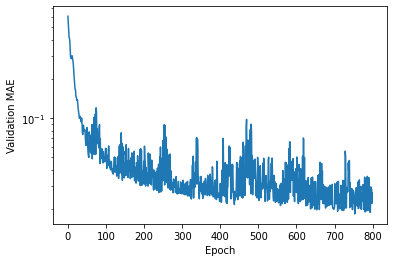

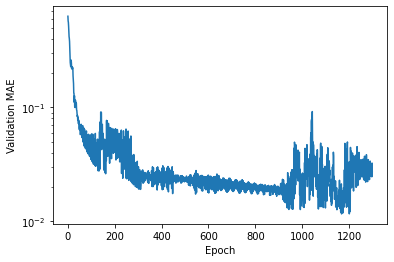

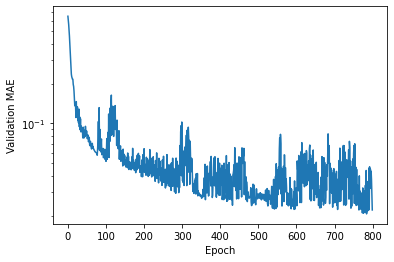

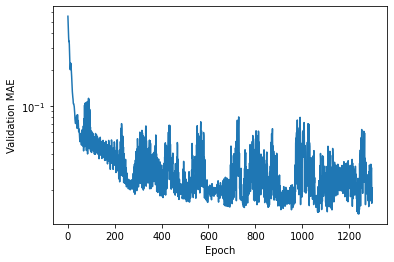

time: 982 ms (started: 2022-08-12 11:33:43 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 13.5 ms (started: 2022-08-12 11:33:44 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 56.5 ms (started: 2022-08-12 11:33:44 +00:00)


In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 10.3 ms (started: 2022-08-12 11:33:44 +00:00)


0.035019428


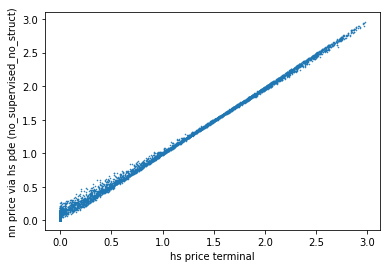

time: 160 ms (started: 2022-08-12 11:33:44 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.026811402607756833


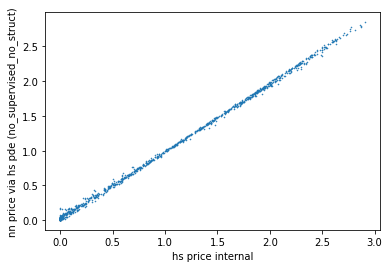

time: 146 ms (started: 2022-08-12 11:33:44 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.039263826


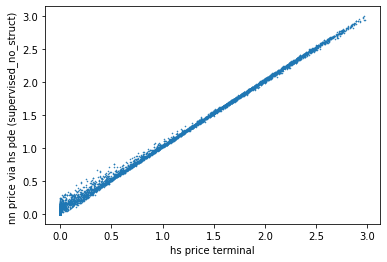

time: 171 ms (started: 2022-08-12 11:33:45 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.025463080868872383


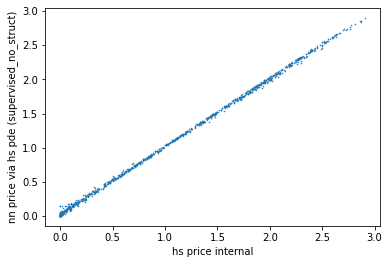

time: 341 ms (started: 2022-08-12 11:33:45 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.03215125


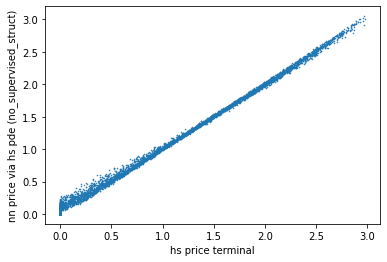

time: 161 ms (started: 2022-08-12 11:33:45 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.020831833551584404


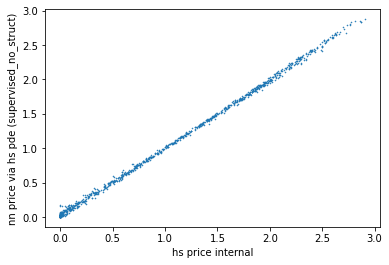

time: 149 ms (started: 2022-08-12 11:33:45 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.029069524


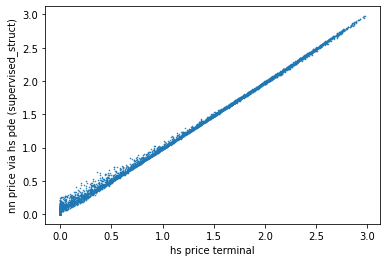

time: 161 ms (started: 2022-08-12 11:33:45 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.023613434704768177


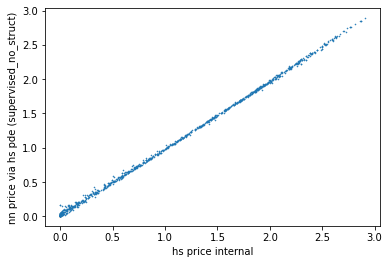

time: 155 ms (started: 2022-08-12 11:33:46 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

#### Test Case European Call - Uniform sampling - ResNet Like - No Segmentation - Loss weight Importance Sampling  - ABS Loss

[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma = 1.0

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma, key_loss_func = torch.abs)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

# net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net2 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:02<04:25,  2.68s/it]

Epoch 0 - lr 0.001 -  loss: 0.17239175902472603 - Terminal loss 0.08215497434139252 - Internal Loss 0.07215212285518646 - Structure Loss 0.0625 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:13<04:10,  2.63s/it]

Epoch 4 - lr 0.001 -  loss: 0.027352169156074524 - Terminal loss 0.0685427188873291 - Internal Loss 0.06549318134784698 - Structure Loss 0.0625 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:26<03:58,  2.65s/it]

Epoch 9 - lr 0.001 -  loss: 0.021422324495183095 - Terminal loss 0.06572456657886505 - Internal Loss 0.06547344475984573 - Structure Loss 0.0625 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:39<03:41,  2.61s/it]

Epoch 14 - lr 0.001 -  loss: 0.01840318325493071 - Terminal loss 0.06425084173679352 - Internal Loss 0.06471054255962372 - Structure Loss 0.0625 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:52<03:32,  2.65s/it]

Epoch 19 - lr 0.001 -  loss: 0.01473482491241561 - Terminal loss 0.06620138138532639 - Internal Loss 0.06635966151952744 - Structure Loss 0.0625 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [01:05<03:15,  2.61s/it]

Epoch 24 - lr 0.001 -  loss: 0.016334066891835794 - Terminal loss 0.0655842274427414 - Internal Loss 0.0651918575167656 - Structure Loss 0.0625 - Supervised Loss 0.0625


 30%|███       | 30/100 [01:19<03:04,  2.64s/it]

Epoch 29 - lr 0.001 -  loss: 0.022613169935842354 - Terminal loss 0.06798803806304932 - Internal Loss 0.06399863958358765 - Structure Loss 0.0625 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [01:32<02:51,  2.65s/it]

Epoch 34 - lr 0.001 -  loss: 0.013069493282172415 - Terminal loss 0.06556182354688644 - Internal Loss 0.06430278718471527 - Structure Loss 0.0625 - Supervised Loss 0.0625


 40%|████      | 40/100 [01:45<02:38,  2.64s/it]

Epoch 39 - lr 0.001 -  loss: 0.008736438117921352 - Terminal loss 0.0634620264172554 - Internal Loss 0.06397581845521927 - Structure Loss 0.0625 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [01:58<02:25,  2.65s/it]

Epoch 44 - lr 0.001 -  loss: 0.00821060873568058 - Terminal loss 0.06352363526821136 - Internal Loss 0.0637287050485611 - Structure Loss 0.0625 - Supervised Loss 0.0625


 50%|█████     | 50/100 [02:11<02:11,  2.63s/it]

Epoch 49 - lr 0.001 -  loss: 0.012040900997817516 - Terminal loss 0.06487468630075455 - Internal Loss 0.06415992975234985 - Structure Loss 0.0625 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [02:24<01:58,  2.64s/it]

Epoch 54 - lr 0.001 -  loss: 0.024274363596406247 - Terminal loss 0.06409069895744324 - Internal Loss 0.0651443749666214 - Structure Loss 0.0625 - Supervised Loss 0.0625


 60%|██████    | 60/100 [02:37<01:45,  2.63s/it]

Epoch 59 - lr 0.001 -  loss: 0.010091293810142411 - Terminal loss 0.06371712684631348 - Internal Loss 0.0636725127696991 - Structure Loss 0.0625 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [02:51<01:32,  2.65s/it]

Epoch 64 - lr 0.001 -  loss: 0.011573056793875165 - Terminal loss 0.06416885554790497 - Internal Loss 0.06391233205795288 - Structure Loss 0.0625 - Supervised Loss 0.0625


 70%|███████   | 70/100 [03:04<01:18,  2.62s/it]

Epoch 69 - lr 0.001 -  loss: 0.012594482137097253 - Terminal loss 0.06538282334804535 - Internal Loss 0.0642012283205986 - Structure Loss 0.0625 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [03:17<01:05,  2.64s/it]

Epoch 74 - lr 0.001 -  loss: 0.006276687865869867 - Terminal loss 0.06387069076299667 - Internal Loss 0.06344112753868103 - Structure Loss 0.0625 - Supervised Loss 0.0625


 80%|████████  | 80/100 [03:30<00:52,  2.63s/it]

Epoch 79 - lr 0.001 -  loss: 0.010114123837815391 - Terminal loss 0.0645408108830452 - Internal Loss 0.0640055239200592 - Structure Loss 0.0625 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [03:43<00:39,  2.64s/it]

Epoch 84 - lr 0.001 -  loss: 0.009427160179863373 - Terminal loss 0.06408724188804626 - Internal Loss 0.06351768970489502 - Structure Loss 0.0625 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [03:56<00:26,  2.62s/it]

Epoch 89 - lr 0.001 -  loss: 0.0094262452589141 - Terminal loss 0.06422362476587296 - Internal Loss 0.06371518969535828 - Structure Loss 0.0625 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [04:09<00:12,  2.60s/it]

Epoch 94 - lr 0.001 -  loss: 0.008816591360502772 - Terminal loss 0.06410649418830872 - Internal Loss 0.06368513405323029 - Structure Loss 0.0625 - Supervised Loss 0.0625


100%|██████████| 100/100 [04:23<00:00,  2.63s/it]


Epoch 99 - lr 0.001 -  loss: 0.009223481536739402 - Terminal loss 0.06334471702575684 - Internal Loss 0.06358766555786133 - Structure Loss 0.0625 - Supervised Loss 0.0625


  1%|          | 1/100 [00:02<04:54,  2.97s/it]

Epoch 0 - lr 0.001 -  loss: 0.20427387053465207 - Terminal loss 0.06884968280792236 - Internal Loss 0.07677086442708969 - Structure Loss 0.0625 - Supervised Loss 0.06834495826304098


  5%|▌         | 5/100 [00:14<04:34,  2.89s/it]

Epoch 4 - lr 0.001 -  loss: 0.026699515494821496 - Terminal loss 0.06495807319879532 - Internal Loss 0.0646166056394577 - Structure Loss 0.0625 - Supervised Loss 0.06461466681657145


 10%|█         | 10/100 [00:29<04:26,  2.96s/it]

Epoch 9 - lr 0.001 -  loss: 0.030546468369963244 - Terminal loss 0.06839514523744583 - Internal Loss 0.06650911271572113 - Structure Loss 0.0625 - Supervised Loss 0.06764281172644131


 15%|█▌        | 15/100 [00:43<04:10,  2.94s/it]

Epoch 14 - lr 0.001 -  loss: 0.026066776827198494 - Terminal loss 0.06532171368598938 - Internal Loss 0.06458994001150131 - Structure Loss 0.0625 - Supervised Loss 0.06504899996057516


 20%|██        | 20/100 [00:58<03:53,  2.92s/it]

Epoch 19 - lr 0.001 -  loss: 0.021925842813965767 - Terminal loss 0.06475475430488586 - Internal Loss 0.06366115063428879 - Structure Loss 0.0625 - Supervised Loss 0.06438946166990397


 25%|██▌       | 25/100 [01:13<03:42,  2.97s/it]

Epoch 24 - lr 0.001 -  loss: 0.020766278640608055 - Terminal loss 0.06460914015769958 - Internal Loss 0.06426120549440384 - Structure Loss 0.0625 - Supervised Loss 0.06432338971563199


 30%|███       | 30/100 [01:28<03:26,  2.95s/it]

Epoch 29 - lr 0.001 -  loss: 0.0183861747525778 - Terminal loss 0.06414403766393661 - Internal Loss 0.06373000144958496 - Structure Loss 0.0625 - Supervised Loss 0.06383104454343913


 35%|███▌      | 35/100 [01:42<03:10,  2.93s/it]

Epoch 34 - lr 0.001 -  loss: 0.017276202835590285 - Terminal loss 0.06421457976102829 - Internal Loss 0.06409785896539688 - Structure Loss 0.0625 - Supervised Loss 0.06414799523432373


 40%|████      | 40/100 [01:57<02:58,  2.97s/it]

Epoch 39 - lr 0.001 -  loss: 0.015996731664300413 - Terminal loss 0.06422488391399384 - Internal Loss 0.0638963133096695 - Structure Loss 0.0625 - Supervised Loss 0.06414208418737127


 45%|████▌     | 45/100 [02:12<02:42,  2.95s/it]

Epoch 44 - lr 0.001 -  loss: 0.01578982321737137 - Terminal loss 0.06430695205926895 - Internal Loss 0.06405258178710938 - Structure Loss 0.0625 - Supervised Loss 0.06398346535106063


 50%|█████     | 50/100 [02:27<02:26,  2.93s/it]

Epoch 49 - lr 0.001 -  loss: 0.014495412636022127 - Terminal loss 0.06382843106985092 - Internal Loss 0.06359929591417313 - Structure Loss 0.0625 - Supervised Loss 0.06361700738541431


 55%|█████▌    | 55/100 [02:42<02:13,  2.97s/it]

Epoch 54 - lr 0.001 -  loss: 0.013841700446512714 - Terminal loss 0.06388553977012634 - Internal Loss 0.06358634680509567 - Structure Loss 0.0625 - Supervised Loss 0.06387780323669419


 60%|██████    | 60/100 [02:56<01:58,  2.95s/it]

Epoch 59 - lr 0.001 -  loss: 0.013369455744202858 - Terminal loss 0.06376326084136963 - Internal Loss 0.06362050771713257 - Structure Loss 0.0625 - Supervised Loss 0.06364652612429579


 65%|██████▌   | 65/100 [03:11<01:42,  2.93s/it]

Epoch 64 - lr 0.001 -  loss: 0.013686521394340309 - Terminal loss 0.06402848660945892 - Internal Loss 0.06395518779754639 - Structure Loss 0.0625 - Supervised Loss 0.0637667767329746


 70%|███████   | 70/100 [03:26<01:28,  2.96s/it]

Epoch 69 - lr 0.001 -  loss: 0.012597384521218388 - Terminal loss 0.06383012980222702 - Internal Loss 0.06347028911113739 - Structure Loss 0.0625 - Supervised Loss 0.06364693180633471


 75%|███████▌  | 75/100 [03:40<01:13,  2.95s/it]

Epoch 74 - lr 0.001 -  loss: 0.011024173688823136 - Terminal loss 0.06361916661262512 - Internal Loss 0.06313660740852356 - Structure Loss 0.0625 - Supervised Loss 0.06361032333963536


 80%|████████  | 80/100 [03:55<00:58,  2.93s/it]

Epoch 79 - lr 0.001 -  loss: 0.01180319308368555 - Terminal loss 0.06370079517364502 - Internal Loss 0.06324122101068497 - Structure Loss 0.0625 - Supervised Loss 0.06359372257849577


 85%|████████▌ | 85/100 [04:10<00:44,  2.97s/it]

Epoch 84 - lr 0.001 -  loss: 0.011778598760867662 - Terminal loss 0.06364600360393524 - Internal Loss 0.06356759369373322 - Structure Loss 0.0625 - Supervised Loss 0.06359749961456676


 90%|█████████ | 90/100 [04:25<00:29,  2.96s/it]

Epoch 89 - lr 0.001 -  loss: 0.010842903616291663 - Terminal loss 0.06347210705280304 - Internal Loss 0.0633980855345726 - Structure Loss 0.0625 - Supervised Loss 0.06342297767529947


 95%|█████████▌| 95/100 [04:39<00:14,  2.92s/it]

Epoch 94 - lr 0.001 -  loss: 0.01039931917833937 - Terminal loss 0.06365012377500534 - Internal Loss 0.06325244903564453 - Structure Loss 0.0625 - Supervised Loss 0.06347517025233315


100%|██████████| 100/100 [04:54<00:00,  2.95s/it]


Epoch 99 - lr 0.001 -  loss: 0.010628798096458517 - Terminal loss 0.06312666088342667 - Internal Loss 0.06335561722517014 - Structure Loss 0.0625 - Supervised Loss 0.06305846120535596


  1%|          | 1/100 [00:02<04:34,  2.78s/it]

Epoch 0 - lr 0.001 -  loss: 0.18096267763111326 - Terminal loss 0.07573863863945007 - Internal Loss 0.07410027831792831 - Structure Loss 0.06268724054098129 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:14<04:38,  2.93s/it]

Epoch 4 - lr 0.001 -  loss: 0.025975253226028547 - Terminal loss 0.06888870894908905 - Internal Loss 0.06540422886610031 - Structure Loss 0.06251106411218643 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:29<04:21,  2.90s/it]

Epoch 9 - lr 0.001 -  loss: 0.021979243805011112 - Terminal loss 0.06685098260641098 - Internal Loss 0.0657598227262497 - Structure Loss 0.0625026673078537 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:43<04:09,  2.93s/it]

Epoch 14 - lr 0.001 -  loss: 0.020809459396534495 - Terminal loss 0.06520329415798187 - Internal Loss 0.06467237323522568 - Structure Loss 0.06250344961881638 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:58<03:51,  2.89s/it]

Epoch 19 - lr 0.001 -  loss: 0.014456496056583192 - Terminal loss 0.06511806696653366 - Internal Loss 0.06395397335290909 - Structure Loss 0.06251274794340134 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [01:13<03:39,  2.93s/it]

Epoch 24 - lr 0.001 -  loss: 0.016400141641497612 - Terminal loss 0.06514719873666763 - Internal Loss 0.06411667168140411 - Structure Loss 0.0625050738453865 - Supervised Loss 0.0625


 30%|███       | 30/100 [01:27<03:25,  2.94s/it]

Epoch 29 - lr 0.001 -  loss: 0.018285195550156966 - Terminal loss 0.06717455387115479 - Internal Loss 0.06558534502983093 - Structure Loss 0.06250941753387451 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [01:42<03:10,  2.92s/it]

Epoch 34 - lr 0.001 -  loss: 0.011950002258850468 - Terminal loss 0.06388844549655914 - Internal Loss 0.06337907165288925 - Structure Loss 0.06251227110624313 - Supervised Loss 0.0625


 40%|████      | 40/100 [01:57<02:56,  2.94s/it]

Epoch 39 - lr 0.001 -  loss: 0.01358986066447364 - Terminal loss 0.06530985236167908 - Internal Loss 0.06463248282670975 - Structure Loss 0.06250462681055069 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [02:11<02:40,  2.92s/it]

Epoch 44 - lr 0.001 -  loss: 0.011568941382898225 - Terminal loss 0.06403204053640366 - Internal Loss 0.06380438059568405 - Structure Loss 0.06250575184822083 - Supervised Loss 0.0625


 50%|█████     | 50/100 [02:26<02:27,  2.94s/it]

Epoch 49 - lr 0.001 -  loss: 0.016028828194571867 - Terminal loss 0.06523099541664124 - Internal Loss 0.06435662508010864 - Structure Loss 0.06250251084566116 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [02:40<02:11,  2.92s/it]

Epoch 54 - lr 0.001 -  loss: 0.011996133046017753 - Terminal loss 0.06388731300830841 - Internal Loss 0.06374438107013702 - Structure Loss 0.06251305341720581 - Supervised Loss 0.0625


 60%|██████    | 60/100 [02:55<01:58,  2.95s/it]

Epoch 59 - lr 0.001 -  loss: 0.01188059885882669 - Terminal loss 0.06330131739377975 - Internal Loss 0.06397068500518799 - Structure Loss 0.06250428408384323 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [03:10<01:41,  2.91s/it]

Epoch 64 - lr 0.001 -  loss: 0.00857740081846714 - Terminal loss 0.0636051744222641 - Internal Loss 0.0633663535118103 - Structure Loss 0.06250252574682236 - Supervised Loss 0.0625


 70%|███████   | 70/100 [03:24<01:27,  2.93s/it]

Epoch 69 - lr 0.001 -  loss: 0.01066024735983875 - Terminal loss 0.06473356485366821 - Internal Loss 0.06380999833345413 - Structure Loss 0.0625009834766388 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [03:39<01:13,  2.93s/it]

Epoch 74 - lr 0.001 -  loss: 0.009192019028382169 - Terminal loss 0.06415428221225739 - Internal Loss 0.06341570615768433 - Structure Loss 0.062500961124897 - Supervised Loss 0.0625


 80%|████████  | 80/100 [03:54<00:58,  2.94s/it]

Epoch 79 - lr 0.001 -  loss: 0.012570561996350685 - Terminal loss 0.06403129547834396 - Internal Loss 0.06354988366365433 - Structure Loss 0.06250569969415665 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [04:08<00:43,  2.89s/it]

Epoch 84 - lr 0.001 -  loss: 0.009210256238778433 - Terminal loss 0.06437385827302933 - Internal Loss 0.06329350173473358 - Structure Loss 0.062501460313797 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [04:23<00:29,  2.94s/it]

Epoch 89 - lr 0.001 -  loss: 0.007281495309952233 - Terminal loss 0.06309935450553894 - Internal Loss 0.06325621902942657 - Structure Loss 0.06250909715890884 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [04:37<00:14,  2.88s/it]

Epoch 94 - lr 0.001 -  loss: 0.009289353154599667 - Terminal loss 0.06373394280672073 - Internal Loss 0.06363343447446823 - Structure Loss 0.06250260025262833 - Supervised Loss 0.0625


100%|██████████| 100/100 [04:52<00:00,  2.93s/it]


Epoch 99 - lr 0.001 -  loss: 0.008748576821138462 - Terminal loss 0.06348008662462234 - Internal Loss 0.06351815909147263 - Structure Loss 0.0625026673078537 - Supervised Loss 0.0625


  1%|          | 1/100 [00:03<05:27,  3.31s/it]

Epoch 0 - lr 0.001 -  loss: 0.1995794153816068 - Terminal loss 0.07050938159227371 - Internal Loss 0.07193583250045776 - Structure Loss 0.06252992153167725 - Supervised Loss 0.06838143148519714


  5%|▌         | 5/100 [00:16<05:12,  3.29s/it]

Epoch 4 - lr 0.001 -  loss: 0.09004943604263435 - Terminal loss 0.07181129604578018 - Internal Loss 0.06761347502470016 - Structure Loss 0.06250346451997757 - Supervised Loss 0.07059986487829531


 10%|█         | 10/100 [00:32<04:54,  3.27s/it]

Epoch 9 - lr 0.001 -  loss: 0.033093077393487345 - Terminal loss 0.06457354873418808 - Internal Loss 0.065294548869133 - Structure Loss 0.0625108927488327 - Supervised Loss 0.06451803590435864


 15%|█▌        | 15/100 [00:48<04:36,  3.25s/it]

Epoch 14 - lr 0.001 -  loss: 0.02250801272080993 - Terminal loss 0.06377402693033218 - Internal Loss 0.06417535245418549 - Structure Loss 0.06250841170549393 - Supervised Loss 0.06366095583648197


 20%|██        | 20/100 [01:05<04:23,  3.30s/it]

Epoch 19 - lr 0.001 -  loss: 0.02095546942336077 - Terminal loss 0.06490481644868851 - Internal Loss 0.06427039206027985 - Structure Loss 0.06250688433647156 - Supervised Loss 0.06444692389737469


 25%|██▌       | 25/100 [01:21<04:05,  3.28s/it]

Epoch 24 - lr 0.001 -  loss: 0.02090332851993778 - Terminal loss 0.06565175205469131 - Internal Loss 0.06457796692848206 - Structure Loss 0.06250221282243729 - Supervised Loss 0.06535774433284172


 30%|███       | 30/100 [01:38<03:47,  3.25s/it]

Epoch 29 - lr 0.001 -  loss: 0.01665664470699853 - Terminal loss 0.0639677345752716 - Internal Loss 0.06368658691644669 - Structure Loss 0.06250827759504318 - Supervised Loss 0.06355309501652452


 35%|███▌      | 35/100 [01:54<03:33,  3.29s/it]

Epoch 34 - lr 0.001 -  loss: 0.01266359409190693 - Terminal loss 0.06337001919746399 - Internal Loss 0.06451809406280518 - Structure Loss 0.06253386288881302 - Supervised Loss 0.06335397898470035


 40%|████      | 40/100 [02:10<03:16,  3.28s/it]

Epoch 39 - lr 0.001 -  loss: 0.017105576642461987 - Terminal loss 0.06336626410484314 - Internal Loss 0.06378047168254852 - Structure Loss 0.06250974535942078 - Supervised Loss 0.06324800105555892


 45%|████▌     | 45/100 [02:27<02:58,  3.25s/it]

Epoch 44 - lr 0.001 -  loss: 0.015758235328079188 - Terminal loss 0.06410090625286102 - Internal Loss 0.06365995109081268 - Structure Loss 0.06250302493572235 - Supervised Loss 0.06380465816947174


 50%|█████     | 50/100 [02:43<02:44,  3.30s/it]

Epoch 49 - lr 0.001 -  loss: 0.014533849324430023 - Terminal loss 0.06428533047437668 - Internal Loss 0.06371917575597763 - Structure Loss 0.06250196695327759 - Supervised Loss 0.0639628459831957


 55%|█████▌    | 55/100 [03:00<02:27,  3.28s/it]

Epoch 54 - lr 0.001 -  loss: 0.01399324661675218 - Terminal loss 0.0640256479382515 - Internal Loss 0.064163438975811 - Structure Loss 0.06250274926424026 - Supervised Loss 0.06406174060834045


 60%|██████    | 60/100 [03:16<02:10,  3.26s/it]

Epoch 59 - lr 0.001 -  loss: 0.013128149983340167 - Terminal loss 0.0633530393242836 - Internal Loss 0.06345086544752121 - Structure Loss 0.0625031515955925 - Supervised Loss 0.06328575138011804


 65%|██████▌   | 65/100 [03:32<01:55,  3.29s/it]

Epoch 64 - lr 0.001 -  loss: 0.01244159063813132 - Terminal loss 0.06404472142457962 - Internal Loss 0.06361864507198334 - Structure Loss 0.06250298768281937 - Supervised Loss 0.06393718207842394


 70%|███████   | 70/100 [03:49<01:38,  3.28s/it]

Epoch 69 - lr 0.001 -  loss: 0.012630438081247822 - Terminal loss 0.06368055194616318 - Internal Loss 0.0633787289261818 - Structure Loss 0.06250264495611191 - Supervised Loss 0.06349590429482824


 75%|███████▌  | 75/100 [04:05<01:21,  3.26s/it]

Epoch 74 - lr 0.001 -  loss: 0.011512190260678037 - Terminal loss 0.0640934631228447 - Internal Loss 0.06339196115732193 - Structure Loss 0.0625009834766388 - Supervised Loss 0.06401815390583075


 80%|████████  | 80/100 [04:22<01:05,  3.30s/it]

Epoch 79 - lr 0.001 -  loss: 0.009965046709384775 - Terminal loss 0.06322108954191208 - Internal Loss 0.06295435130596161 - Structure Loss 0.06250150501728058 - Supervised Loss 0.06318501679483945


 85%|████████▌ | 85/100 [04:38<00:49,  3.28s/it]

Epoch 84 - lr 0.001 -  loss: 0.011592547898200958 - Terminal loss 0.06385587155818939 - Internal Loss 0.06333724409341812 - Structure Loss 0.0625004842877388 - Supervised Loss 0.06370396160466554


 90%|█████████ | 90/100 [04:54<00:32,  3.25s/it]

Epoch 89 - lr 0.001 -  loss: 0.011026888143284242 - Terminal loss 0.06375405937433243 - Internal Loss 0.0635744109749794 - Structure Loss 0.06250028312206268 - Supervised Loss 0.06353888816036196


 95%|█████████▌| 95/100 [05:11<00:16,  3.30s/it]

Epoch 94 - lr 0.001 -  loss: 0.010454197223644934 - Terminal loss 0.06323304027318954 - Internal Loss 0.06342816352844238 - Structure Loss 0.06250020861625671 - Supervised Loss 0.06325190393759948


100%|██████████| 100/100 [05:27<00:00,  3.28s/it]

Epoch 99 - lr 0.001 -  loss: 0.010196773473904125 - Terminal loss 0.06331512331962585 - Internal Loss 0.06323584914207458 - Structure Loss 0.06250115483999252 - Supervised Loss 0.06322622278680955


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 19min 38s (started: 2022-08-12 11:33:46 +00:00)


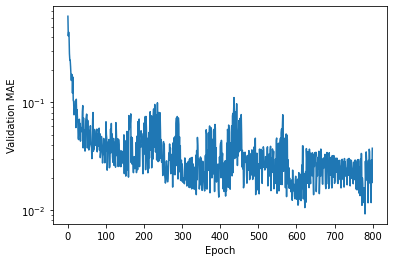

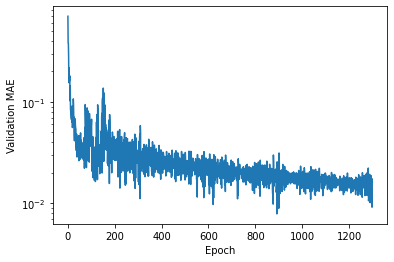

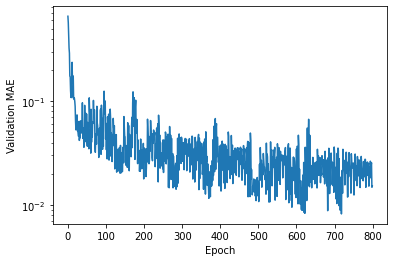

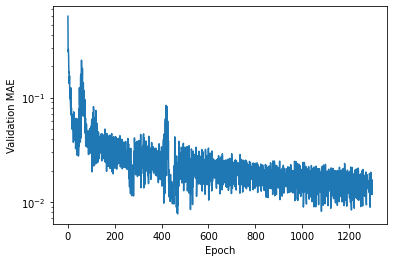

time: 1.08 s (started: 2022-08-12 11:53:24 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
# input_data = supervised_data['heston_input'].to(torch.device("cuda:0"))
# bs_pred = bs_price( "C", 
#     input_data[:,2].reshape(-1,1), 
#     input_data[:,1].reshape(-1,1), 
#     input_data[:,3].reshape(-1,1) - input_data[:,0].reshape(-1,1), 
#     input_data[:,10].reshape(-1,1)**0.5, 
#     input_data[:,4].reshape(-1,1)
# )
# target = supervised_data['heston_analytical_sol'].to(torch.device("cuda:0"))
# trainEuss_supervised_struct.net.to(torch.device("cuda:0"))
# prediction = trainEuss_supervised_struct.net(input_data.to(torch.device("cuda:0")))

# sol = torch.abs(target - prediction).cpu().detach().numpy()
# sol.mean(), sol.var()
# # np.argmin(sol)

time: 1.65 ms (started: 2022-08-12 11:53:25 +00:00)


In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 10.7 ms (started: 2022-08-12 11:53:25 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                              nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 57.7 ms (started: 2022-08-12 11:53:25 +00:00)


In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 11.4 ms (started: 2022-08-12 11:53:25 +00:00)


In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 665 µs (started: 2022-08-12 11:53:25 +00:00)


0.050214015


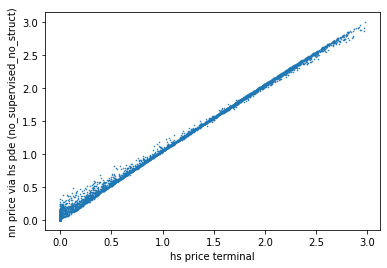

time: 227 ms (started: 2022-08-12 11:53:25 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

In [ ]:
heston_analytical.shape

torch.Size([1000])

time: 3.26 ms (started: 2022-08-12 11:53:25 +00:00)


0.034358708915211866


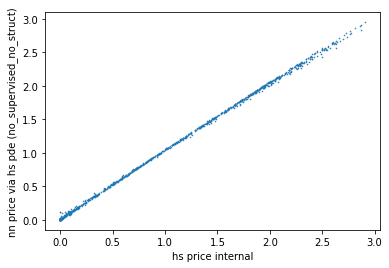

time: 216 ms (started: 2022-08-12 11:53:25 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.025974976


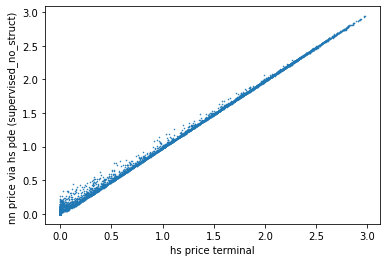

time: 231 ms (started: 2022-08-12 11:53:26 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.019651121807822785


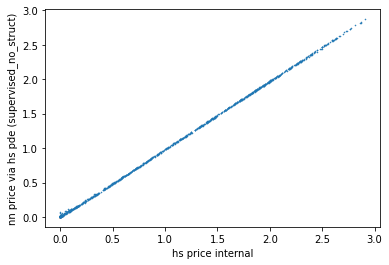

time: 218 ms (started: 2022-08-12 11:53:26 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.02913572


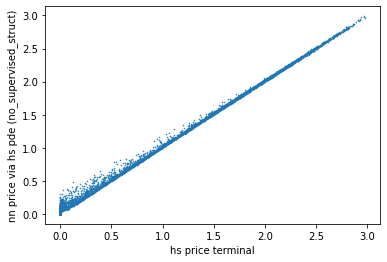

time: 235 ms (started: 2022-08-12 11:53:26 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.014487644688483002


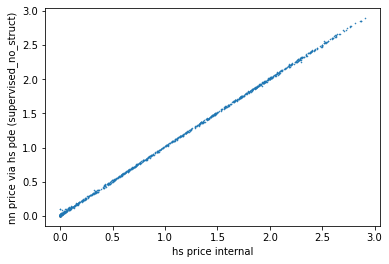

time: 214 ms (started: 2022-08-12 11:53:26 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.026419805


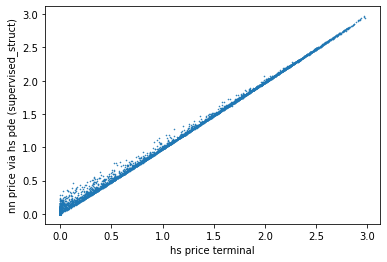

time: 233 ms (started: 2022-08-12 11:53:27 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.016886226029253083


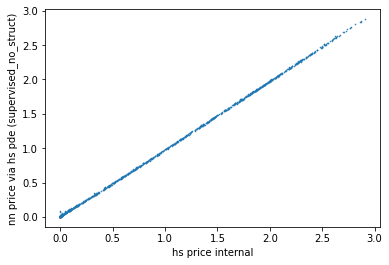

time: 205 ms (started: 2022-08-12 11:53:27 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

In [ ]:
supervised_data['heston_analytical_sol'].shape

torch.Size([5000, 1])

time: 3.18 ms (started: 2022-08-12 11:53:27 +00:00)


#### Test Case European Call - Uniform sampling - Simple DNN - With Stock  Segmentation - Loss Weight Importance Sampling


[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma = 1.0

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
heston_equation.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
heston_equation2.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
heston_equation3.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
heston_equation4.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:27,  1.13it/s]

Epoch 0 - lr 0.001 -  loss: 0.4844800465636783 - Terminal loss 0.17797836661338806 - Internal Loss 0.11167698353528976 - Structure Loss 0.0625 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:04<01:19,  1.20it/s]

Epoch 4 - lr 0.001 -  loss: 0.09147910152872403 - Terminal loss 0.0819486752152443 - Internal Loss 0.07289706915616989 - Structure Loss 0.0625 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:08<01:08,  1.32it/s]

Epoch 9 - lr 0.001 -  loss: 0.02735467182679309 - Terminal loss 0.07091156393289566 - Internal Loss 0.06644570082426071 - Structure Loss 0.0625 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:12<01:07,  1.26it/s]

Epoch 14 - lr 0.001 -  loss: 0.016429258406990103 - Terminal loss 0.06831216812133789 - Internal Loss 0.0643143579363823 - Structure Loss 0.0625 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:16<01:04,  1.23it/s]

Epoch 19 - lr 0.001 -  loss: 0.0285795031943255 - Terminal loss 0.06440243124961853 - Internal Loss 0.06429240852594376 - Structure Loss 0.0625 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [00:20<00:59,  1.27it/s]

Epoch 24 - lr 0.001 -  loss: 0.010905363596975803 - Terminal loss 0.06586886197328568 - Internal Loss 0.0636230930685997 - Structure Loss 0.0625 - Supervised Loss 0.0625


 30%|███       | 30/100 [00:24<00:56,  1.23it/s]

Epoch 29 - lr 0.001 -  loss: 0.03789138737031155 - Terminal loss 0.06363802403211594 - Internal Loss 0.06438589096069336 - Structure Loss 0.0625 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [00:28<00:51,  1.26it/s]

Epoch 34 - lr 0.001 -  loss: 0.05227642206268178 - Terminal loss 0.07157175242900848 - Internal Loss 0.0642499104142189 - Structure Loss 0.0625 - Supervised Loss 0.0625


 40%|████      | 40/100 [00:32<00:49,  1.20it/s]

Epoch 39 - lr 0.001 -  loss: 0.019766311575141218 - Terminal loss 0.06655062735080719 - Internal Loss 0.0658036470413208 - Structure Loss 0.0625 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [00:36<00:43,  1.27it/s]

Epoch 44 - lr 0.001 -  loss: 0.03429610173528393 - Terminal loss 0.07689358294010162 - Internal Loss 0.0678190365433693 - Structure Loss 0.0625 - Supervised Loss 0.0625


 50%|█████     | 50/100 [00:40<00:41,  1.21it/s]

Epoch 49 - lr 0.001 -  loss: 0.009412285768323474 - Terminal loss 0.06326413154602051 - Internal Loss 0.0642765685915947 - Structure Loss 0.0625 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [00:44<00:36,  1.23it/s]

Epoch 54 - lr 0.001 -  loss: 0.020769990618444152 - Terminal loss 0.06679385155439377 - Internal Loss 0.0662248432636261 - Structure Loss 0.0625 - Supervised Loss 0.0625


 60%|██████    | 60/100 [00:48<00:31,  1.25it/s]

Epoch 59 - lr 0.001 -  loss: 0.014638454912023412 - Terminal loss 0.06300991028547287 - Internal Loss 0.06402815133333206 - Structure Loss 0.0625 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [00:52<00:26,  1.33it/s]

Epoch 64 - lr 0.001 -  loss: 0.01749216271046963 - Terminal loss 0.06847108900547028 - Internal Loss 0.06501882523298264 - Structure Loss 0.0625 - Supervised Loss 0.0625


 70%|███████   | 70/100 [00:56<00:24,  1.25it/s]

Epoch 69 - lr 0.001 -  loss: 0.02505217508102457 - Terminal loss 0.06507879495620728 - Internal Loss 0.06744838505983353 - Structure Loss 0.0625 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [01:00<00:18,  1.33it/s]

Epoch 74 - lr 0.001 -  loss: 0.01698819873854518 - Terminal loss 0.06758657842874527 - Internal Loss 0.06349624693393707 - Structure Loss 0.0625 - Supervised Loss 0.0625


 80%|████████  | 80/100 [01:04<00:15,  1.26it/s]

Epoch 79 - lr 0.001 -  loss: 0.016886101776940957 - Terminal loss 0.06301901489496231 - Internal Loss 0.06400136649608612 - Structure Loss 0.0625 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [01:08<00:12,  1.23it/s]

Epoch 84 - lr 0.001 -  loss: 0.031370852453013263 - Terminal loss 0.06721438467502594 - Internal Loss 0.06478692591190338 - Structure Loss 0.0625 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [01:12<00:07,  1.26it/s]

Epoch 89 - lr 0.001 -  loss: 0.014043507605998052 - Terminal loss 0.06310729682445526 - Internal Loss 0.06395839154720306 - Structure Loss 0.0625 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [01:16<00:04,  1.23it/s]

Epoch 94 - lr 0.001 -  loss: 0.016225232225325372 - Terminal loss 0.06841880083084106 - Internal Loss 0.06579604744911194 - Structure Loss 0.0625 - Supervised Loss 0.0625


100%|██████████| 100/100 [01:20<00:00,  1.25it/s]


Epoch 99 - lr 0.001 -  loss: 0.011418813917165002 - Terminal loss 0.06292007863521576 - Internal Loss 0.0638907253742218 - Structure Loss 0.0625 - Supervised Loss 0.0625


  1%|          | 1/100 [00:00<01:27,  1.13it/s]

Epoch 0 - lr 0.001 -  loss: 0.4344495333064197 - Terminal loss 0.10513443499803543 - Internal Loss 0.08768637478351593 - Structure Loss 0.0625 - Supervised Loss 0.07529788888647976


  5%|▌         | 5/100 [00:04<01:14,  1.27it/s]

Epoch 4 - lr 0.001 -  loss: 0.04419956137843006 - Terminal loss 0.06471630930900574 - Internal Loss 0.06707779318094254 - Structure Loss 0.0625 - Supervised Loss 0.06362862136054964


 10%|█         | 10/100 [00:08<01:15,  1.20it/s]

Epoch 9 - lr 0.001 -  loss: 0.06404735481986483 - Terminal loss 0.06679493933916092 - Internal Loss 0.06347110867500305 - Structure Loss 0.0625 - Supervised Loss 0.06751615773269465


 15%|█▌        | 15/100 [00:12<01:09,  1.22it/s]

Epoch 14 - lr 0.001 -  loss: 0.027626366350047508 - Terminal loss 0.06360339373350143 - Internal Loss 0.0656353235244751 - Structure Loss 0.0625 - Supervised Loss 0.06355434426478815


 20%|██        | 20/100 [00:16<01:03,  1.25it/s]

Epoch 19 - lr 0.001 -  loss: 0.021341766994998724 - Terminal loss 0.0628039613366127 - Internal Loss 0.06408387422561646 - Structure Loss 0.0625 - Supervised Loss 0.06370291109579644


 25%|██▌       | 25/100 [00:20<01:03,  1.18it/s]

Epoch 24 - lr 0.001 -  loss: 0.027957888875242226 - Terminal loss 0.06277382373809814 - Internal Loss 0.06563805788755417 - Structure Loss 0.0625 - Supervised Loss 0.06353092315832504


 30%|███       | 30/100 [00:24<00:57,  1.21it/s]

Epoch 29 - lr 0.001 -  loss: 0.015757945836307297 - Terminal loss 0.06363417953252792 - Internal Loss 0.06393351405858994 - Structure Loss 0.0625 - Supervised Loss 0.06390070108025717


 35%|███▌      | 35/100 [00:28<00:51,  1.26it/s]

Epoch 34 - lr 0.001 -  loss: 0.015288697227874593 - Terminal loss 0.06303423643112183 - Internal Loss 0.06325647234916687 - Structure Loss 0.0625 - Supervised Loss 0.06398757257273428


 40%|████      | 40/100 [00:32<00:50,  1.18it/s]

Epoch 39 - lr 0.001 -  loss: 0.015025764792636218 - Terminal loss 0.06285199522972107 - Internal Loss 0.06320897489786148 - Structure Loss 0.0625 - Supervised Loss 0.06397231369861119


 45%|████▌     | 45/100 [00:36<00:45,  1.20it/s]

Epoch 44 - lr 0.001 -  loss: 0.021680348644331878 - Terminal loss 0.06294001638889313 - Internal Loss 0.06338750571012497 - Structure Loss 0.0625 - Supervised Loss 0.06509751076952848


 50%|█████     | 50/100 [00:41<00:40,  1.24it/s]

Epoch 49 - lr 0.001 -  loss: 0.014662882617956476 - Terminal loss 0.06323900818824768 - Internal Loss 0.06340845674276352 - Structure Loss 0.0625 - Supervised Loss 0.06389535736502776


 55%|█████▌    | 55/100 [00:45<00:38,  1.18it/s]

Epoch 54 - lr 0.001 -  loss: 0.01340858102894089 - Terminal loss 0.06342732161283493 - Internal Loss 0.06294097751379013 - Structure Loss 0.0625 - Supervised Loss 0.06444941626445608


 60%|██████    | 60/100 [00:49<00:33,  1.21it/s]

Epoch 59 - lr 0.001 -  loss: 0.01385747249204089 - Terminal loss 0.06275365501642227 - Internal Loss 0.06341369450092316 - Structure Loss 0.0625 - Supervised Loss 0.06415876969499403


 65%|██████▌   | 65/100 [00:53<00:28,  1.25it/s]

Epoch 64 - lr 0.001 -  loss: 0.043274128335850925 - Terminal loss 0.06356114894151688 - Internal Loss 0.06508628278970718 - Structure Loss 0.0625 - Supervised Loss 0.06738998611049253


 70%|███████   | 70/100 [00:57<00:25,  1.18it/s]

Epoch 69 - lr 0.001 -  loss: 0.02865488357556082 - Terminal loss 0.06278678774833679 - Internal Loss 0.06611770391464233 - Structure Loss 0.0625 - Supervised Loss 0.06285352674674927


 75%|███████▌  | 75/100 [01:01<00:20,  1.21it/s]

Epoch 74 - lr 0.001 -  loss: 0.02077905390072572 - Terminal loss 0.06274659186601639 - Internal Loss 0.0654481053352356 - Structure Loss 0.0625 - Supervised Loss 0.06293419054655519


 80%|████████  | 80/100 [01:05<00:15,  1.26it/s]

Epoch 79 - lr 0.001 -  loss: 0.00658281320872252 - Terminal loss 0.063043512403965 - Internal Loss 0.06310678273439407 - Structure Loss 0.0625 - Supervised Loss 0.0631008466514047


 85%|████████▌ | 85/100 [01:09<00:12,  1.19it/s]

Epoch 84 - lr 0.001 -  loss: 0.0032252146750459372 - Terminal loss 0.06258702278137207 - Internal Loss 0.06296073645353317 - Structure Loss 0.0625 - Supervised Loss 0.06272707892595933


 90%|█████████ | 90/100 [01:13<00:08,  1.22it/s]

Epoch 89 - lr 0.001 -  loss: 0.0026496141518448325 - Terminal loss 0.06253374367952347 - Internal Loss 0.0629657655954361 - Structure Loss 0.0625 - Supervised Loss 0.06268027306751593


 95%|█████████▌| 95/100 [01:18<00:04,  1.25it/s]

Epoch 94 - lr 0.001 -  loss: 0.002949860505388024 - Terminal loss 0.06260611861944199 - Internal Loss 0.06277930736541748 - Structure Loss 0.0625 - Supervised Loss 0.06263459220482659


100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 99 - lr 0.001 -  loss: 0.0025823296549644654 - Terminal loss 0.06252747029066086 - Internal Loss 0.063143290579319 - Structure Loss 0.0625 - Supervised Loss 0.06264795438361619


  1%|          | 1/100 [00:00<01:06,  1.48it/s]

Epoch 0 - lr 0.001 -  loss: 0.5408197326792611 - Terminal loss 0.3518933057785034 - Internal Loss 0.07672367990016937 - Structure Loss 0.06669926643371582 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:04<01:20,  1.18it/s]

Epoch 4 - lr 0.001 -  loss: 0.09587208264403874 - Terminal loss 0.08235801011323929 - Internal Loss 0.07214600592851639 - Structure Loss 0.06971211731433868 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:08<01:17,  1.16it/s]

Epoch 9 - lr 0.001 -  loss: 0.028172227554023266 - Terminal loss 0.07373716682195663 - Internal Loss 0.06543789058923721 - Structure Loss 0.06515751034021378 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:12<01:10,  1.21it/s]

Epoch 14 - lr 0.001 -  loss: 0.023025052828921214 - Terminal loss 0.06783349812030792 - Internal Loss 0.06582795083522797 - Structure Loss 0.06369204074144363 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:16<01:07,  1.18it/s]

Epoch 19 - lr 0.001 -  loss: 0.09764649708651835 - Terminal loss 0.10922576487064362 - Internal Loss 0.06472993642091751 - Structure Loss 0.06320405006408691 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [00:20<01:03,  1.19it/s]

Epoch 24 - lr 0.001 -  loss: 0.045101368282404214 - Terminal loss 0.07660133391618729 - Internal Loss 0.06485261768102646 - Structure Loss 0.06262319535017014 - Supervised Loss 0.0625


 30%|███       | 30/100 [00:24<00:58,  1.21it/s]

Epoch 29 - lr 0.001 -  loss: 0.019532489486866526 - Terminal loss 0.06524287909269333 - Internal Loss 0.06794995069503784 - Structure Loss 0.06389988958835602 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [00:29<00:54,  1.19it/s]

Epoch 34 - lr 0.001 -  loss: 0.01624332120021184 - Terminal loss 0.06953681260347366 - Internal Loss 0.06439130753278732 - Structure Loss 0.06269834190607071 - Supervised Loss 0.0625


 40%|████      | 40/100 [00:33<00:51,  1.16it/s]

Epoch 39 - lr 0.001 -  loss: 0.029293686254984803 - Terminal loss 0.06395553052425385 - Internal Loss 0.0642063170671463 - Structure Loss 0.0625554546713829 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [00:37<00:47,  1.17it/s]

Epoch 44 - lr 0.001 -  loss: 0.01271557906228635 - Terminal loss 0.06793796271085739 - Internal Loss 0.06358004361391068 - Structure Loss 0.06269892305135727 - Supervised Loss 0.0625


 50%|█████     | 50/100 [00:41<00:41,  1.21it/s]

Epoch 49 - lr 0.001 -  loss: 0.020334353515257437 - Terminal loss 0.06372611969709396 - Internal Loss 0.06393224745988846 - Structure Loss 0.06263403594493866 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [00:45<00:37,  1.19it/s]

Epoch 54 - lr 0.001 -  loss: 0.029168908742980823 - Terminal loss 0.06865069270133972 - Internal Loss 0.0658893883228302 - Structure Loss 0.06255868822336197 - Supervised Loss 0.0625


 60%|██████    | 60/100 [00:49<00:33,  1.21it/s]

Epoch 59 - lr 0.001 -  loss: 0.014534022141661909 - Terminal loss 0.06397529691457748 - Internal Loss 0.0647333636879921 - Structure Loss 0.06280553340911865 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [00:54<00:30,  1.16it/s]

Epoch 64 - lr 0.001 -  loss: 0.02364043477508757 - Terminal loss 0.0718751922249794 - Internal Loss 0.06564611941576004 - Structure Loss 0.06261402368545532 - Supervised Loss 0.0625


 70%|███████   | 70/100 [00:58<00:24,  1.22it/s]

Epoch 69 - lr 0.001 -  loss: 0.030439258760048285 - Terminal loss 0.06557311117649078 - Internal Loss 0.06710051745176315 - Structure Loss 0.06254292279481888 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [01:02<00:21,  1.18it/s]

Epoch 74 - lr 0.001 -  loss: 0.015865601857917175 - Terminal loss 0.06852197647094727 - Internal Loss 0.06327765434980392 - Structure Loss 0.06260566413402557 - Supervised Loss 0.0625


 80%|████████  | 80/100 [01:06<00:17,  1.14it/s]

Epoch 79 - lr 0.001 -  loss: 0.02067355320064558 - Terminal loss 0.06361115723848343 - Internal Loss 0.06368008255958557 - Structure Loss 0.06255589425563812 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [01:10<00:12,  1.19it/s]

Epoch 84 - lr 0.001 -  loss: 0.03375855502155092 - Terminal loss 0.0678846687078476 - Internal Loss 0.06548681110143661 - Structure Loss 0.06254265457391739 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [01:15<00:08,  1.17it/s]

Epoch 89 - lr 0.001 -  loss: 0.01657077990886238 - Terminal loss 0.063741035759449 - Internal Loss 0.06409195810556412 - Structure Loss 0.06255834549665451 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [01:19<00:04,  1.18it/s]

Epoch 94 - lr 0.001 -  loss: 0.017293620026773877 - Terminal loss 0.06879907101392746 - Internal Loss 0.0659949779510498 - Structure Loss 0.06254836916923523 - Supervised Loss 0.0625


100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 99 - lr 0.001 -  loss: 0.014745963530408012 - Terminal loss 0.06347233057022095 - Internal Loss 0.0643877312541008 - Structure Loss 0.0625561997294426 - Supervised Loss 0.0625


  1%|          | 1/100 [00:00<01:12,  1.37it/s]

Epoch 0 - lr 0.001 -  loss: 0.28580958744351886 - Terminal loss 0.09228289127349854 - Internal Loss 0.09101516753435135 - Structure Loss 0.06836283206939697 - Supervised Loss 0.07539558542780087


  5%|▌         | 5/100 [00:04<01:21,  1.17it/s]

Epoch 4 - lr 0.001 -  loss: 0.043627881374093826 - Terminal loss 0.06844629347324371 - Internal Loss 0.06885427981615067 - Structure Loss 0.06649205833673477 - Supervised Loss 0.06559250240727181


 10%|█         | 10/100 [00:08<01:15,  1.20it/s]

Epoch 9 - lr 0.001 -  loss: 0.012640246621471684 - Terminal loss 0.06342357397079468 - Internal Loss 0.06397255510091782 - Structure Loss 0.0625300258398056 - Supervised Loss 0.06420452620461237


 15%|█▌        | 15/100 [00:12<01:15,  1.13it/s]

Epoch 14 - lr 0.001 -  loss: 0.0839345063753226 - Terminal loss 0.07348426431417465 - Internal Loss 0.0663486197590828 - Structure Loss 0.06319227814674377 - Supervised Loss 0.06697054500057917


 20%|██        | 20/100 [00:17<01:10,  1.14it/s]

Epoch 19 - lr 0.001 -  loss: 0.0758986752077865 - Terminal loss 0.06730859726667404 - Internal Loss 0.06345383822917938 - Structure Loss 0.06250123679637909 - Supervised Loss 0.07169272197459692


 25%|██▌       | 25/100 [00:21<01:03,  1.18it/s]

Epoch 24 - lr 0.001 -  loss: 0.10169652165624363 - Terminal loss 0.07254540175199509 - Internal Loss 0.06864668428897858 - Structure Loss 0.06275317817926407 - Supervised Loss 0.0664897233889781


 30%|███       | 30/100 [00:25<01:02,  1.13it/s]

Epoch 29 - lr 0.001 -  loss: 0.029208101130573278 - Terminal loss 0.06714393943548203 - Internal Loss 0.0633130818605423 - Structure Loss 0.06262637674808502 - Supervised Loss 0.06427211417873278


 35%|███▌      | 35/100 [00:30<00:56,  1.15it/s]

Epoch 34 - lr 0.001 -  loss: 0.025744523014543545 - Terminal loss 0.0649823248386383 - Internal Loss 0.06348072737455368 - Structure Loss 0.0625799372792244 - Supervised Loss 0.06335327616115645


 40%|████      | 40/100 [00:34<00:51,  1.16it/s]

Epoch 39 - lr 0.001 -  loss: 0.01852780576181871 - Terminal loss 0.06314270198345184 - Internal Loss 0.06372404098510742 - Structure Loss 0.06255532801151276 - Supervised Loss 0.06296831004175679


 45%|████▌     | 45/100 [00:39<00:49,  1.11it/s]

Epoch 44 - lr 0.001 -  loss: 0.020995453847506847 - Terminal loss 0.06431983411312103 - Internal Loss 0.06355515867471695 - Structure Loss 0.06260104477405548 - Supervised Loss 0.06320826989112974


 50%|█████     | 50/100 [00:43<00:44,  1.13it/s]

Epoch 49 - lr 0.001 -  loss: 0.01615771173453177 - Terminal loss 0.06286492198705673 - Internal Loss 0.0636516585946083 - Structure Loss 0.06252825260162354 - Supervised Loss 0.06289991750135682


 55%|█████▌    | 55/100 [00:47<00:38,  1.16it/s]

Epoch 54 - lr 0.001 -  loss: 0.020887993734519456 - Terminal loss 0.06335031241178513 - Internal Loss 0.0640266016125679 - Structure Loss 0.06260288506746292 - Supervised Loss 0.06288566997073614


 60%|██████    | 60/100 [00:52<00:35,  1.11it/s]

Epoch 59 - lr 0.001 -  loss: 0.016014234107143782 - Terminal loss 0.06282052397727966 - Internal Loss 0.06387340277433395 - Structure Loss 0.0625125840306282 - Supervised Loss 0.06307178657503733


 65%|██████▌   | 65/100 [00:56<00:30,  1.13it/s]

Epoch 64 - lr 0.001 -  loss: 0.021426227568472865 - Terminal loss 0.06290791183710098 - Internal Loss 0.06451496481895447 - Structure Loss 0.06260272860527039 - Supervised Loss 0.06277265338627147


 70%|███████   | 70/100 [01:01<00:25,  1.17it/s]

Epoch 69 - lr 0.001 -  loss: 0.016199302633579216 - Terminal loss 0.06306958943605423 - Internal Loss 0.06398746371269226 - Structure Loss 0.0625065267086029 - Supervised Loss 0.06331366506219471


 75%|███████▌  | 75/100 [01:05<00:22,  1.11it/s]

Epoch 74 - lr 0.001 -  loss: 0.021488248510465872 - Terminal loss 0.06278938800096512 - Internal Loss 0.0645156130194664 - Structure Loss 0.06259183585643768 - Supervised Loss 0.06279406718335717


 80%|████████  | 80/100 [01:10<00:17,  1.12it/s]

Epoch 79 - lr 0.001 -  loss: 0.016571855828703054 - Terminal loss 0.06323490291833878 - Internal Loss 0.06405527144670486 - Structure Loss 0.06250586360692978 - Supervised Loss 0.06337598806582065


 85%|████████▌ | 85/100 [01:14<00:12,  1.18it/s]

Epoch 84 - lr 0.001 -  loss: 0.021526133864608506 - Terminal loss 0.06277401000261307 - Internal Loss 0.06443709880113602 - Structure Loss 0.06259310245513916 - Supervised Loss 0.06279538754973682


 90%|█████████ | 90/100 [01:18<00:08,  1.12it/s]

Epoch 89 - lr 0.001 -  loss: 0.01668252387928823 - Terminal loss 0.0633121207356453 - Internal Loss 0.06403165310621262 - Structure Loss 0.06250616163015366 - Supervised Loss 0.06336185207904972


 95%|█████████▌| 95/100 [01:23<00:04,  1.14it/s]

Epoch 94 - lr 0.001 -  loss: 0.021175260974364566 - Terminal loss 0.06280931085348129 - Internal Loss 0.06425835937261581 - Structure Loss 0.06264355778694153 - Supervised Loss 0.06279437653511061


100%|██████████| 100/100 [01:27<00:00,  1.14it/s]

Epoch 99 - lr 0.001 -  loss: 0.021077320787072227 - Terminal loss 0.06297621876001358 - Internal Loss 0.06568850576877594 - Structure Loss 0.06251210719347 - Supervised Loss 0.06358780590215131


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 5min 33s (started: 2022-08-12 11:53:27 +00:00)


In [ ]:
validation_data['heston_analytical_sol'].shape

torch.Size([2000, 1])

time: 2.6 ms (started: 2022-08-12 11:59:01 +00:00)


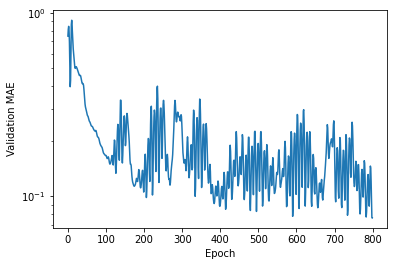

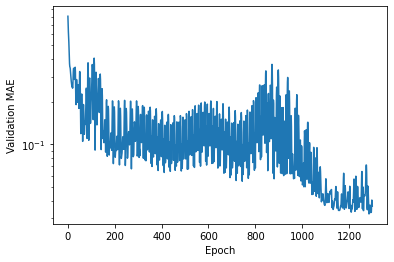

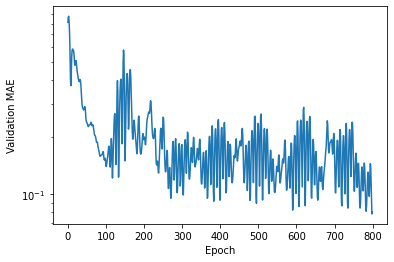

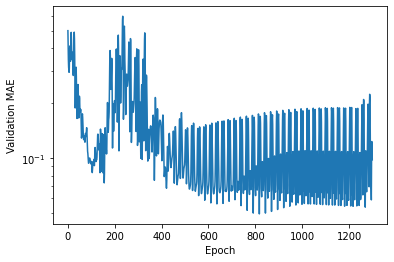

time: 960 ms (started: 2022-08-12 11:59:01 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
# input_data = supervised_data['heston_input'].to(torch.device("cuda:0"))
# bs_pred = bs_price( "C", 
#     input_data[:,2].reshape(-1,1), 
#     input_data[:,1].reshape(-1,1), 
#     input_data[:,3].reshape(-1,1) - input_data[:,0].reshape(-1,1), 
#     input_data[:,10].reshape(-1,1)**0.5, 
#     input_data[:,4].reshape(-1,1)
# )
# target = supervised_data['heston_analytical_sol'].to(torch.device("cuda:0"))
# trainEuss_supervised_struct.net.to(torch.device("cuda:0"))
# prediction = trainEuss_supervised_struct.net(input_data.to(torch.device("cuda:0")))

# sol = torch.abs(target - prediction).cpu().detach().numpy()
# sol.mean(), sol.var()
# # np.argmin(sol)

time: 1.5 ms (started: 2022-08-12 11:59:02 +00:00)


In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 12 ms (started: 2022-08-12 11:59:02 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 59 ms (started: 2022-08-12 11:59:02 +00:00)


In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 11.2 ms (started: 2022-08-12 11:59:02 +00:00)


In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 725 µs (started: 2022-08-12 11:59:02 +00:00)


0.08925724


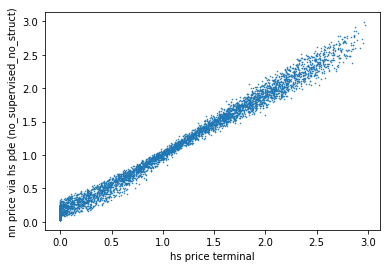

time: 161 ms (started: 2022-08-12 11:59:02 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.08329305335241913


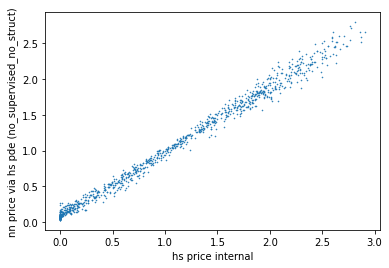

time: 155 ms (started: 2022-08-12 11:59:02 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.056498975


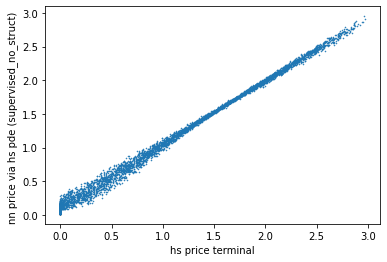

time: 158 ms (started: 2022-08-12 11:59:02 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.05142542581530397


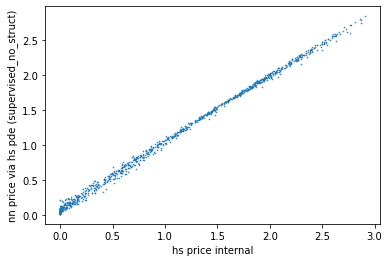

time: 144 ms (started: 2022-08-12 11:59:03 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.09408951


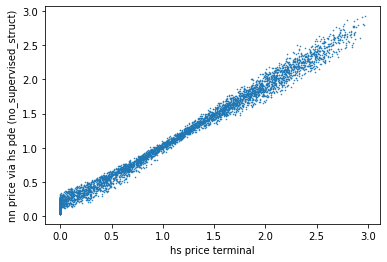

time: 162 ms (started: 2022-08-12 11:59:03 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.0857102474455112


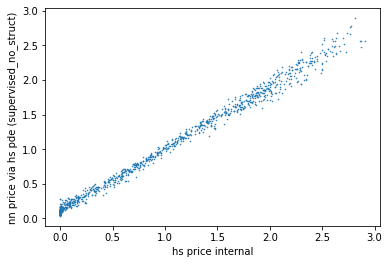

time: 145 ms (started: 2022-08-12 11:59:03 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.13134304


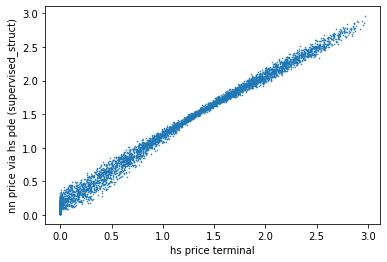

time: 152 ms (started: 2022-08-12 11:59:03 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.1376368640800346


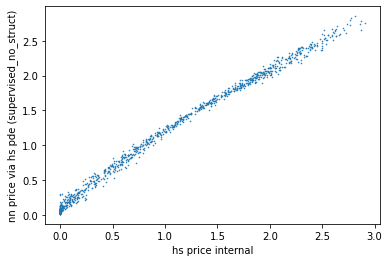

time: 146 ms (started: 2022-08-12 11:59:03 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

#### Test Case European Call - Uniform sampling - ResNet Like - With Stock  Segmentation - With Loss Weight Importance Sampling


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma = 1.0

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
heston_equation.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

# net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net2 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
heston_equation2.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
heston_equation3.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
heston_equation4.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:02<04:06,  2.49s/it]

Epoch 0 - lr 0.001 -  loss: 0.5072253311259879 - Terminal loss 0.14173133671283722 - Internal Loss 0.0985187515616417 - Structure Loss 0.0625 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:13<04:11,  2.64s/it]

Epoch 4 - lr 0.001 -  loss: 0.08890578688846694 - Terminal loss 0.09305662661790848 - Internal Loss 0.07299759238958359 - Structure Loss 0.0625 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:26<03:58,  2.65s/it]

Epoch 9 - lr 0.001 -  loss: 0.031120252071155444 - Terminal loss 0.07846883684396744 - Internal Loss 0.06361937522888184 - Structure Loss 0.0625 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:39<03:46,  2.66s/it]

Epoch 14 - lr 0.001 -  loss: 0.0057058412995603346 - Terminal loss 0.063400037586689 - Internal Loss 0.06305936723947525 - Structure Loss 0.0625 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:52<03:31,  2.64s/it]

Epoch 19 - lr 0.001 -  loss: 0.008679626147366233 - Terminal loss 0.06319969892501831 - Internal Loss 0.06291112303733826 - Structure Loss 0.0625 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [01:05<03:19,  2.65s/it]

Epoch 24 - lr 0.001 -  loss: 0.02361581784983476 - Terminal loss 0.0757480263710022 - Internal Loss 0.06302613765001297 - Structure Loss 0.0625 - Supervised Loss 0.0625


 30%|███       | 30/100 [01:19<03:05,  2.64s/it]

Epoch 29 - lr 0.001 -  loss: 0.003848377615213394 - Terminal loss 0.0631207749247551 - Internal Loss 0.06285884231328964 - Structure Loss 0.0625 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [01:32<02:52,  2.65s/it]

Epoch 34 - lr 0.001 -  loss: 0.0077712606483449536 - Terminal loss 0.06276467442512512 - Internal Loss 0.06328167021274567 - Structure Loss 0.0625 - Supervised Loss 0.0625


 40%|████      | 40/100 [01:45<02:37,  2.63s/it]

Epoch 39 - lr 0.001 -  loss: 0.00965146203007963 - Terminal loss 0.06489302963018417 - Internal Loss 0.06340773403644562 - Structure Loss 0.0625 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [01:58<02:25,  2.64s/it]

Epoch 44 - lr 0.001 -  loss: 0.00759024010039866 - Terminal loss 0.06276358664035797 - Internal Loss 0.06285514682531357 - Structure Loss 0.0625 - Supervised Loss 0.0625


 50%|█████     | 50/100 [02:11<02:11,  2.64s/it]

Epoch 49 - lr 0.001 -  loss: 0.008843389443225332 - Terminal loss 0.06397747993469238 - Internal Loss 0.06395447254180908 - Structure Loss 0.0625 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [02:24<01:56,  2.59s/it]

Epoch 54 - lr 0.001 -  loss: 0.004594718649362524 - Terminal loss 0.06266788393259048 - Internal Loss 0.06342525780200958 - Structure Loss 0.0625 - Supervised Loss 0.0625


 60%|██████    | 60/100 [02:38<01:45,  2.63s/it]

Epoch 59 - lr 0.001 -  loss: 0.004416159341215259 - Terminal loss 0.06296642869710922 - Internal Loss 0.06274910271167755 - Structure Loss 0.0625 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [02:51<01:32,  2.65s/it]

Epoch 64 - lr 0.001 -  loss: 0.010026061066633297 - Terminal loss 0.06260983645915985 - Internal Loss 0.0632140189409256 - Structure Loss 0.0625 - Supervised Loss 0.0625


 70%|███████   | 70/100 [03:04<01:19,  2.66s/it]

Epoch 69 - lr 0.001 -  loss: 0.0065681844846242005 - Terminal loss 0.06383167952299118 - Internal Loss 0.06371931731700897 - Structure Loss 0.0625 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [03:17<01:06,  2.64s/it]

Epoch 74 - lr 0.001 -  loss: 0.004430565284565091 - Terminal loss 0.06262537091970444 - Internal Loss 0.06346876919269562 - Structure Loss 0.0625 - Supervised Loss 0.0625


 80%|████████  | 80/100 [03:30<00:51,  2.59s/it]

Epoch 79 - lr 0.001 -  loss: 0.0032681544802875984 - Terminal loss 0.06275659799575806 - Internal Loss 0.0631665512919426 - Structure Loss 0.0625 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [03:44<00:39,  2.65s/it]

Epoch 84 - lr 0.001 -  loss: 0.003207415652771791 - Terminal loss 0.06268315762281418 - Internal Loss 0.06294848769903183 - Structure Loss 0.0625 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [03:57<00:26,  2.65s/it]

Epoch 89 - lr 0.001 -  loss: 0.006659987130357574 - Terminal loss 0.0627974271774292 - Internal Loss 0.06329954415559769 - Structure Loss 0.0625 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [04:10<00:13,  2.64s/it]

Epoch 94 - lr 0.001 -  loss: 0.013175215636793938 - Terminal loss 0.06268279254436493 - Internal Loss 0.06338059902191162 - Structure Loss 0.0625 - Supervised Loss 0.0625


100%|██████████| 100/100 [04:23<00:00,  2.64s/it]


Epoch 99 - lr 0.001 -  loss: 0.009601107378128089 - Terminal loss 0.06466570496559143 - Internal Loss 0.0625683069229126 - Structure Loss 0.0625 - Supervised Loss 0.0625


  1%|          | 1/100 [00:02<04:54,  2.98s/it]

Epoch 0 - lr 0.001 -  loss: 0.1941352993635043 - Terminal loss 0.0641743615269661 - Internal Loss 0.0640827864408493 - Structure Loss 0.0625 - Supervised Loss 0.0720879998166414


  5%|▌         | 5/100 [00:14<04:34,  2.89s/it]

Epoch 4 - lr 0.001 -  loss: 0.022432301894074542 - Terminal loss 0.0633668377995491 - Internal Loss 0.07493078708648682 - Structure Loss 0.0625 - Supervised Loss 0.06430915281859947


 10%|█         | 10/100 [00:29<04:25,  2.95s/it]

Epoch 9 - lr 0.001 -  loss: 0.03537955762505794 - Terminal loss 0.06345561146736145 - Internal Loss 0.06350941210985184 - Structure Loss 0.0625 - Supervised Loss 0.06443316607433819


 15%|█▌        | 15/100 [00:43<04:09,  2.94s/it]

Epoch 14 - lr 0.001 -  loss: 0.009556575077330976 - Terminal loss 0.06262615323066711 - Internal Loss 0.06302611529827118 - Structure Loss 0.0625 - Supervised Loss 0.06292804152265585


 20%|██        | 20/100 [00:58<03:53,  2.91s/it]

Epoch 19 - lr 0.001 -  loss: 0.005422709667991679 - Terminal loss 0.06256590038537979 - Internal Loss 0.06277136504650116 - Structure Loss 0.0625 - Supervised Loss 0.06279155502865423


 25%|██▌       | 25/100 [01:13<03:42,  2.96s/it]

Epoch 24 - lr 0.001 -  loss: 0.0035008223150004764 - Terminal loss 0.06258702278137207 - Internal Loss 0.06267303228378296 - Structure Loss 0.0625 - Supervised Loss 0.06267249301388574


 30%|███       | 30/100 [01:28<03:26,  2.95s/it]

Epoch 29 - lr 0.001 -  loss: 0.0034143205568160336 - Terminal loss 0.06255054473876953 - Internal Loss 0.0627165362238884 - Structure Loss 0.0625 - Supervised Loss 0.06272000133854587


 35%|███▌      | 35/100 [01:42<03:10,  2.92s/it]

Epoch 34 - lr 0.001 -  loss: 0.005431688084719082 - Terminal loss 0.06267014145851135 - Internal Loss 0.06268315017223358 - Structure Loss 0.0625 - Supervised Loss 0.06327507530844205


 40%|████      | 40/100 [01:57<02:58,  2.97s/it]

Epoch 39 - lr 0.001 -  loss: 0.0028490961373494462 - Terminal loss 0.06255115568637848 - Internal Loss 0.06257966160774231 - Structure Loss 0.0625 - Supervised Loss 0.06275684455603135


 45%|████▌     | 45/100 [02:12<02:42,  2.95s/it]

Epoch 44 - lr 0.001 -  loss: 0.0019302703866185007 - Terminal loss 0.06255457550287247 - Internal Loss 0.06261035799980164 - Structure Loss 0.0625 - Supervised Loss 0.06256914039050736


 50%|█████     | 50/100 [02:27<02:26,  2.93s/it]

Epoch 49 - lr 0.001 -  loss: 0.0016786803729613212 - Terminal loss 0.06261273473501205 - Internal Loss 0.06259766966104507 - Structure Loss 0.0625 - Supervised Loss 0.06261038613901519


 55%|█████▌    | 55/100 [02:41<02:13,  2.96s/it]

Epoch 54 - lr 0.001 -  loss: 0.0025997221231820154 - Terminal loss 0.0626048669219017 - Internal Loss 0.06259196996688843 - Structure Loss 0.0625 - Supervised Loss 0.06269693475429244


 60%|██████    | 60/100 [02:56<01:57,  2.94s/it]

Epoch 59 - lr 0.001 -  loss: 0.004042643213156183 - Terminal loss 0.0630517452955246 - Internal Loss 0.06253073364496231 - Structure Loss 0.0625 - Supervised Loss 0.06271657668038857


 65%|██████▌   | 65/100 [03:11<01:42,  2.92s/it]

Epoch 64 - lr 0.001 -  loss: 0.002634325194975233 - Terminal loss 0.06257738173007965 - Internal Loss 0.0625426173210144 - Structure Loss 0.0625 - Supervised Loss 0.06284142122017214


 70%|███████   | 70/100 [03:26<01:29,  2.97s/it]

Epoch 69 - lr 0.001 -  loss: 0.004862064554070476 - Terminal loss 0.06302890926599503 - Internal Loss 0.06256397068500519 - Structure Loss 0.0625 - Supervised Loss 0.06275205791228256


 75%|███████▌  | 75/100 [03:40<01:13,  2.95s/it]

Epoch 74 - lr 0.001 -  loss: 0.0024049191981006185 - Terminal loss 0.06251363456249237 - Internal Loss 0.06261070817708969 - Structure Loss 0.0625 - Supervised Loss 0.06279811425451642


 80%|████████  | 80/100 [03:55<00:58,  2.93s/it]

Epoch 79 - lr 0.001 -  loss: 0.002025313062662975 - Terminal loss 0.06255580484867096 - Internal Loss 0.06258425861597061 - Structure Loss 0.0625 - Supervised Loss 0.06261812270169326


 85%|████████▌ | 85/100 [04:10<00:44,  2.98s/it]

Epoch 84 - lr 0.001 -  loss: 0.0025242076053250463 - Terminal loss 0.0626036524772644 - Internal Loss 0.0625668540596962 - Structure Loss 0.0625 - Supervised Loss 0.06274325413605308


 90%|█████████ | 90/100 [04:25<00:29,  2.96s/it]

Epoch 89 - lr 0.001 -  loss: 0.00235981450173488 - Terminal loss 0.06253063678741455 - Internal Loss 0.06254710257053375 - Structure Loss 0.0625 - Supervised Loss 0.0626248201879377


 95%|█████████▌| 95/100 [04:39<00:14,  2.94s/it]

Epoch 94 - lr 0.001 -  loss: 0.0030391750477068076 - Terminal loss 0.06291653215885162 - Internal Loss 0.06256464123725891 - Structure Loss 0.0625 - Supervised Loss 0.06265376263979411


100%|██████████| 100/100 [04:54<00:00,  2.95s/it]


Epoch 99 - lr 0.001 -  loss: 0.007985408583702345 - Terminal loss 0.06340029835700989 - Internal Loss 0.06292247027158737 - Structure Loss 0.0625 - Supervised Loss 0.06293541398256365


  1%|          | 1/100 [00:02<04:55,  2.98s/it]

Epoch 0 - lr 0.001 -  loss: 0.4422055854358607 - Terminal loss 0.07721204310655594 - Internal Loss 0.07608388364315033 - Structure Loss 0.08813637495040894 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:14<04:37,  2.92s/it]

Epoch 4 - lr 0.001 -  loss: 0.14955506370299393 - Terminal loss 0.14750008285045624 - Internal Loss 0.06632513552904129 - Structure Loss 0.06275903433561325 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:29<04:24,  2.94s/it]

Epoch 9 - lr 0.001 -  loss: 0.0236853515315387 - Terminal loss 0.0714622363448143 - Internal Loss 0.0651480183005333 - Structure Loss 0.06254354119300842 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:43<04:07,  2.92s/it]

Epoch 14 - lr 0.001 -  loss: 0.009155123184124628 - Terminal loss 0.06357795745134354 - Internal Loss 0.06390469521284103 - Structure Loss 0.06259531527757645 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:58<03:55,  2.94s/it]

Epoch 19 - lr 0.001 -  loss: 0.02395818682594432 - Terminal loss 0.06943443417549133 - Internal Loss 0.06868588179349899 - Structure Loss 0.06253283470869064 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [01:13<03:39,  2.93s/it]

Epoch 24 - lr 0.001 -  loss: 0.0042260166309360005 - Terminal loss 0.06312219053506851 - Internal Loss 0.06285187602043152 - Structure Loss 0.0625874474644661 - Supervised Loss 0.0625


 30%|███       | 30/100 [01:27<03:25,  2.94s/it]

Epoch 29 - lr 0.001 -  loss: 0.0033117415021277135 - Terminal loss 0.06276728212833405 - Internal Loss 0.06277921050786972 - Structure Loss 0.06254689395427704 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [01:42<03:11,  2.95s/it]

Epoch 34 - lr 0.001 -  loss: 0.011216523565558923 - Terminal loss 0.06319161504507065 - Internal Loss 0.06339073181152344 - Structure Loss 0.06251854449510574 - Supervised Loss 0.0625


 40%|████      | 40/100 [01:57<02:56,  2.94s/it]

Epoch 39 - lr 0.001 -  loss: 0.008631405368861225 - Terminal loss 0.06321033835411072 - Internal Loss 0.06326059997081757 - Structure Loss 0.06254027038812637 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [02:11<02:41,  2.94s/it]

Epoch 44 - lr 0.001 -  loss: 0.0027157116112195784 - Terminal loss 0.06286434084177017 - Internal Loss 0.06266150623559952 - Structure Loss 0.06250984966754913 - Supervised Loss 0.0625


 50%|█████     | 50/100 [02:26<02:26,  2.92s/it]

Epoch 49 - lr 0.001 -  loss: 0.0026399235680906307 - Terminal loss 0.0626608207821846 - Internal Loss 0.06262414157390594 - Structure Loss 0.06251708418130875 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [02:41<02:12,  2.94s/it]

Epoch 54 - lr 0.001 -  loss: 0.0054077760885573095 - Terminal loss 0.06290309876203537 - Internal Loss 0.06256896257400513 - Structure Loss 0.06250506639480591 - Supervised Loss 0.0625


 60%|██████    | 60/100 [02:55<01:56,  2.92s/it]

Epoch 59 - lr 0.001 -  loss: 0.022776894685294893 - Terminal loss 0.06289730221033096 - Internal Loss 0.0643543004989624 - Structure Loss 0.06250333040952682 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [03:10<01:42,  2.94s/it]

Epoch 64 - lr 0.001 -  loss: 0.0033582830413555107 - Terminal loss 0.06290888041257858 - Internal Loss 0.06294423341751099 - Structure Loss 0.06253888458013535 - Supervised Loss 0.0625


 70%|███████   | 70/100 [03:25<01:28,  2.94s/it]

Epoch 69 - lr 0.001 -  loss: 0.0023023561936699683 - Terminal loss 0.06270404905080795 - Internal Loss 0.0626201182603836 - Structure Loss 0.06250553578138351 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [03:39<01:13,  2.93s/it]

Epoch 74 - lr 0.001 -  loss: 0.007539484365325835 - Terminal loss 0.06266015022993088 - Internal Loss 0.06269600242376328 - Structure Loss 0.06250273436307907 - Supervised Loss 0.0625


 80%|████████  | 80/100 [03:54<00:58,  2.95s/it]

Epoch 79 - lr 0.001 -  loss: 0.01314977288711816 - Terminal loss 0.0658942386507988 - Internal Loss 0.0627312958240509 - Structure Loss 0.0625104233622551 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [04:09<00:43,  2.92s/it]

Epoch 84 - lr 0.001 -  loss: 0.0030496907161755692 - Terminal loss 0.0628102570772171 - Internal Loss 0.06262992322444916 - Structure Loss 0.06250924617052078 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [04:23<00:29,  2.94s/it]

Epoch 89 - lr 0.001 -  loss: 0.006098716067046755 - Terminal loss 0.06290952861309052 - Internal Loss 0.06330075114965439 - Structure Loss 0.06250125914812088 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [04:38<00:14,  2.93s/it]

Epoch 94 - lr 0.001 -  loss: 0.00684232156102856 - Terminal loss 0.06281977891921997 - Internal Loss 0.0644928365945816 - Structure Loss 0.06254594027996063 - Supervised Loss 0.0625


100%|██████████| 100/100 [04:53<00:00,  2.93s/it]


Epoch 99 - lr 0.001 -  loss: 0.003661592672061589 - Terminal loss 0.06297274678945541 - Internal Loss 0.06256332993507385 - Structure Loss 0.06250319629907608 - Supervised Loss 0.0625


  1%|          | 1/100 [00:03<05:28,  3.32s/it]

Epoch 0 - lr 0.001 -  loss: 0.1858461200990471 - Terminal loss 0.06655654311180115 - Internal Loss 0.06995633989572525 - Structure Loss 0.06271824240684509 - Supervised Loss 0.0821570815712392


  5%|▌         | 5/100 [00:16<05:07,  3.23s/it]

Epoch 4 - lr 0.001 -  loss: 0.060424861939960016 - Terminal loss 0.06706396490335464 - Internal Loss 0.066423200070858 - Structure Loss 0.06250583380460739 - Supervised Loss 0.06921332242124244


 10%|█         | 10/100 [00:32<04:55,  3.29s/it]

Epoch 9 - lr 0.001 -  loss: 0.014224292636075123 - Terminal loss 0.06314008682966232 - Internal Loss 0.06447909027338028 - Structure Loss 0.06255720555782318 - Supervised Loss 0.06345510861861123


 15%|█▌        | 15/100 [00:49<04:38,  3.28s/it]

Epoch 14 - lr 0.001 -  loss: 0.01818137240656717 - Terminal loss 0.06392688304185867 - Internal Loss 0.0644451230764389 - Structure Loss 0.0625 - Supervised Loss 0.06574578562957184


 20%|██        | 20/100 [01:05<04:20,  3.25s/it]

Epoch 19 - lr 0.001 -  loss: 0.009634476973164847 - Terminal loss 0.06271857023239136 - Internal Loss 0.06320426613092422 - Structure Loss 0.0625 - Supervised Loss 0.06403469138375817


 25%|██▌       | 25/100 [01:21<04:07,  3.30s/it]

Epoch 24 - lr 0.001 -  loss: 0.0030849373109935354 - Terminal loss 0.06257941573858261 - Internal Loss 0.06257423758506775 - Structure Loss 0.06250022351741791 - Supervised Loss 0.06291281252109063


 30%|███       | 30/100 [01:38<03:50,  3.29s/it]

Epoch 29 - lr 0.001 -  loss: 0.0036391155099727195 - Terminal loss 0.06254790723323822 - Internal Loss 0.06275511533021927 - Structure Loss 0.0625002309679985 - Supervised Loss 0.06260306953147571


 35%|███▌      | 35/100 [01:54<03:32,  3.26s/it]

Epoch 34 - lr 0.001 -  loss: 0.00450079305432642 - Terminal loss 0.0631791278719902 - Internal Loss 0.06255467981100082 - Structure Loss 0.0625 - Supervised Loss 0.0627571256075459


 40%|████      | 40/100 [02:11<03:18,  3.31s/it]

Epoch 39 - lr 0.001 -  loss: 0.00355781291692701 - Terminal loss 0.06268076598644257 - Internal Loss 0.06258255243301392 - Structure Loss 0.06250257790088654 - Supervised Loss 0.06298608878901613


 45%|████▌     | 45/100 [02:27<03:01,  3.29s/it]

Epoch 44 - lr 0.001 -  loss: 0.004670219318429735 - Terminal loss 0.06281661242246628 - Internal Loss 0.06272418051958084 - Structure Loss 0.0625002384185791 - Supervised Loss 0.06268296425997363


 50%|█████     | 50/100 [02:43<02:43,  3.27s/it]

Epoch 49 - lr 0.001 -  loss: 0.0032426918347536983 - Terminal loss 0.06257639080286026 - Internal Loss 0.06267338991165161 - Structure Loss 0.0625000074505806 - Supervised Loss 0.06282431852014556


 55%|█████▌    | 55/100 [03:00<02:28,  3.31s/it]

Epoch 54 - lr 0.001 -  loss: 0.0017467212318499298 - Terminal loss 0.06255519390106201 - Internal Loss 0.06260499358177185 - Structure Loss 0.06250559538602829 - Supervised Loss 0.06258866357800812


 60%|██████    | 60/100 [03:16<02:11,  3.29s/it]

Epoch 59 - lr 0.001 -  loss: 0.0017263332628542204 - Terminal loss 0.06257426738739014 - Internal Loss 0.06263862550258636 - Structure Loss 0.06250028312206268 - Supervised Loss 0.06260490806694209


 65%|██████▌   | 65/100 [03:33<01:54,  3.26s/it]

Epoch 64 - lr 0.001 -  loss: 0.0016177258296054269 - Terminal loss 0.06251322478055954 - Internal Loss 0.06265740841627121 - Structure Loss 0.0625045970082283 - Supervised Loss 0.06256755083968303


 70%|███████   | 70/100 [03:49<01:39,  3.30s/it]

Epoch 69 - lr 0.001 -  loss: 0.0019546170961808156 - Terminal loss 0.06253045797348022 - Internal Loss 0.06259887665510178 - Structure Loss 0.06250116974115372 - Supervised Loss 0.06270790990293253


 75%|███████▌  | 75/100 [04:06<01:22,  3.29s/it]

Epoch 74 - lr 0.001 -  loss: 0.0017556603899568399 - Terminal loss 0.06267435103654861 - Internal Loss 0.06253831088542938 - Structure Loss 0.06250028312206268 - Supervised Loss 0.06266630794981232


 80%|████████  | 80/100 [04:22<01:05,  3.26s/it]

Epoch 79 - lr 0.001 -  loss: 0.0015712503783795674 - Terminal loss 0.0625176951289177 - Internal Loss 0.06260804831981659 - Structure Loss 0.06250140815973282 - Supervised Loss 0.0626561737217046


 85%|████████▌ | 85/100 [04:39<00:49,  3.30s/it]

Epoch 84 - lr 0.001 -  loss: 0.0011582493357285236 - Terminal loss 0.06252136081457138 - Internal Loss 0.06252193450927734 - Structure Loss 0.06250005215406418 - Supervised Loss 0.06256797698398524


 90%|█████████ | 90/100 [04:55<00:33,  3.30s/it]

Epoch 89 - lr 0.001 -  loss: 0.0006498795150202202 - Terminal loss 0.0625152513384819 - Internal Loss 0.0625196024775505 - Structure Loss 0.06250134855508804 - Supervised Loss 0.06253760076267821


 95%|█████████▌| 95/100 [05:11<00:16,  3.27s/it]

Epoch 94 - lr 0.001 -  loss: 0.0007829232284812608 - Terminal loss 0.06254235655069351 - Internal Loss 0.06252755969762802 - Structure Loss 0.06250226497650146 - Supervised Loss 0.06254458819618064


100%|██████████| 100/100 [05:28<00:00,  3.28s/it]

Epoch 99 - lr 0.001 -  loss: 0.001598136230697735 - Terminal loss 0.0625595897436142 - Internal Loss 0.06258787959814072 - Structure Loss 0.0625 - Supervised Loss 0.0625484169446874


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 19min 40s (started: 2022-08-12 11:59:03 +00:00)


In [ ]:
validation_data['heston_analytical_sol'].shape

torch.Size([2000, 1])

time: 3.13 ms (started: 2022-08-12 12:18:44 +00:00)


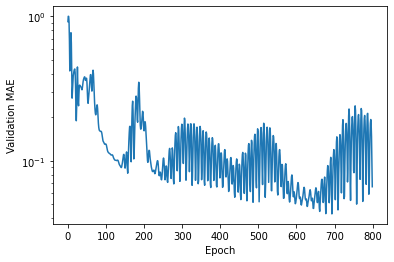

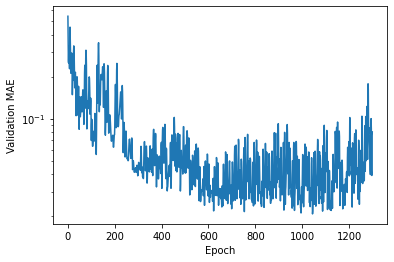

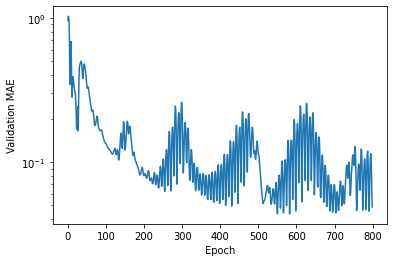

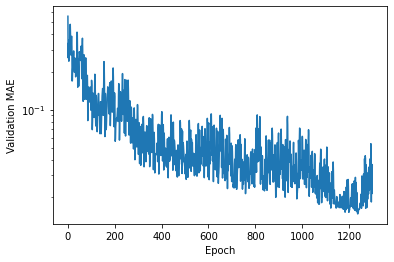

time: 987 ms (started: 2022-08-12 12:18:44 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
# input_data = supervised_data['heston_input'].to(torch.device("cuda:0"))
# bs_pred = bs_price( "C", 
#     input_data[:,2].reshape(-1,1), 
#     input_data[:,1].reshape(-1,1), 
#     input_data[:,3].reshape(-1,1) - input_data[:,0].reshape(-1,1), 
#     input_data[:,10].reshape(-1,1)**0.5, 
#     input_data[:,4].reshape(-1,1)
# )
# target = supervised_data['heston_analytical_sol'].to(torch.device("cuda:0"))
# trainEuss_supervised_struct.net.to(torch.device("cuda:0"))
# prediction = trainEuss_supervised_struct.net(input_data.to(torch.device("cuda:0")))

# sol = torch.abs(target - prediction).cpu().detach().numpy()
# sol.mean(), sol.var()
# # np.argmin(sol)

time: 2.28 ms (started: 2022-08-12 12:18:45 +00:00)


In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 11.2 ms (started: 2022-08-12 12:18:45 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                              nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 59.1 ms (started: 2022-08-12 12:18:45 +00:00)


In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 13.1 ms (started: 2022-08-12 12:18:45 +00:00)


In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 595 µs (started: 2022-08-12 12:18:45 +00:00)


0.07967926


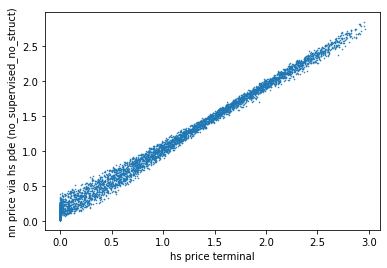

time: 234 ms (started: 2022-08-12 12:18:45 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

In [ ]:
heston_analytical.shape

torch.Size([1000])

time: 3 ms (started: 2022-08-12 12:18:45 +00:00)


0.06343037372450015


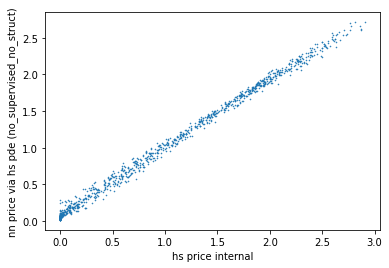

time: 193 ms (started: 2022-08-12 12:18:45 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.09887157


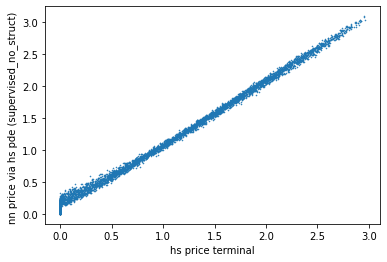

time: 228 ms (started: 2022-08-12 12:18:45 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.08761347483951851


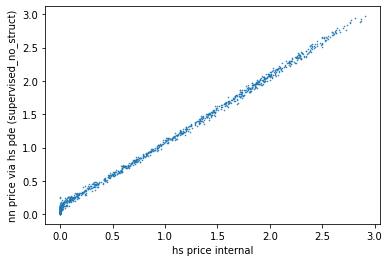

time: 230 ms (started: 2022-08-12 12:18:45 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.06101572


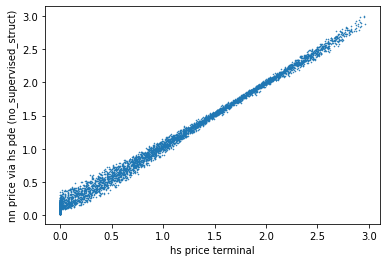

time: 262 ms (started: 2022-08-12 12:18:46 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.043197368115222165


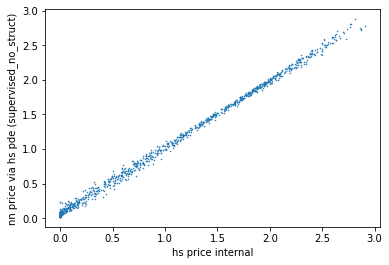

time: 264 ms (started: 2022-08-12 12:18:46 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.054382008


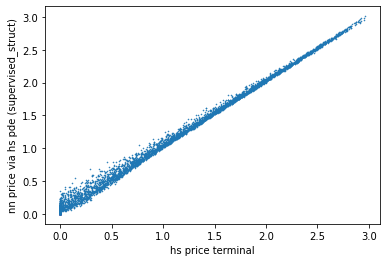

time: 268 ms (started: 2022-08-12 12:18:46 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.04336343744441875


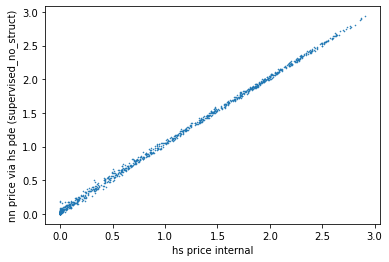

time: 230 ms (started: 2022-08-12 12:18:46 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

In [ ]:
supervised_data['heston_analytical_sol'].shape

torch.Size([5000, 1])

time: 3.85 ms (started: 2022-08-12 12:18:47 +00:00)


#### Test Case European Call - Uniform sampling - Simple DNN - With Stock  Segmentation - Loss Weight Importance Sampling - ABS Loss


[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma = 1.0

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
heston_equation.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma, key_loss_func = torch.abs)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
heston_equation2.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
heston_equation3.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
heston_equation4.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:22,  1.20it/s]

Epoch 0 - lr 0.001 -  loss: 0.37736034476094776 - Terminal loss 0.2260170429944992 - Internal Loss 0.1093384400010109 - Structure Loss 0.0625 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:04<01:18,  1.21it/s]

Epoch 4 - lr 0.001 -  loss: 0.15223530431588492 - Terminal loss 0.10129350423812866 - Internal Loss 0.07782415300607681 - Structure Loss 0.0625 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:08<01:08,  1.31it/s]

Epoch 9 - lr 0.001 -  loss: 0.19490538040796915 - Terminal loss 0.11769198626279831 - Internal Loss 0.08248168230056763 - Structure Loss 0.0625 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:12<01:07,  1.25it/s]

Epoch 14 - lr 0.001 -  loss: 0.11403775794638528 - Terminal loss 0.08119548857212067 - Internal Loss 0.07903128117322922 - Structure Loss 0.0625 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:16<01:04,  1.24it/s]

Epoch 19 - lr 0.001 -  loss: 0.09084766482313474 - Terminal loss 0.0784861296415329 - Internal Loss 0.06682033091783524 - Structure Loss 0.0625 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [00:19<00:59,  1.26it/s]

Epoch 24 - lr 0.001 -  loss: 0.1617910141746203 - Terminal loss 0.13577204942703247 - Internal Loss 0.09519241005182266 - Structure Loss 0.0625 - Supervised Loss 0.0625


 30%|███       | 30/100 [00:23<00:56,  1.24it/s]

Epoch 29 - lr 0.001 -  loss: 0.133480624606212 - Terminal loss 0.11779949069023132 - Internal Loss 0.08939453959465027 - Structure Loss 0.0625 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [00:27<00:50,  1.28it/s]

Epoch 34 - lr 0.001 -  loss: 0.10600818693637848 - Terminal loss 0.09048128128051758 - Internal Loss 0.07595627009868622 - Structure Loss 0.0625 - Supervised Loss 0.0625


 40%|████      | 40/100 [00:31<00:48,  1.25it/s]

Epoch 39 - lr 0.001 -  loss: 0.11338032761381732 - Terminal loss 0.10036062449216843 - Internal Loss 0.08538132905960083 - Structure Loss 0.0625 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [00:35<00:44,  1.24it/s]

Epoch 44 - lr 0.001 -  loss: 0.1341925710439682 - Terminal loss 0.07217822223901749 - Internal Loss 0.06770339608192444 - Structure Loss 0.0625 - Supervised Loss 0.0625


 50%|█████     | 50/100 [00:39<00:39,  1.27it/s]

Epoch 49 - lr 0.001 -  loss: 0.07976643306513627 - Terminal loss 0.0726664662361145 - Internal Loss 0.07330221682786942 - Structure Loss 0.0625 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [00:43<00:36,  1.24it/s]

Epoch 54 - lr 0.001 -  loss: 0.07541194537447558 - Terminal loss 0.06768468767404556 - Internal Loss 0.0709543377161026 - Structure Loss 0.0625 - Supervised Loss 0.0625


 60%|██████    | 60/100 [00:47<00:31,  1.27it/s]

Epoch 59 - lr 0.001 -  loss: 0.09997086847821872 - Terminal loss 0.07495632767677307 - Internal Loss 0.07589466124773026 - Structure Loss 0.0625 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [00:51<00:27,  1.25it/s]

Epoch 64 - lr 0.001 -  loss: 0.06256447918713093 - Terminal loss 0.07559619098901749 - Internal Loss 0.0724848285317421 - Structure Loss 0.0625 - Supervised Loss 0.0625


 70%|███████   | 70/100 [00:55<00:23,  1.27it/s]

Epoch 69 - lr 0.001 -  loss: 0.07403289009299543 - Terminal loss 0.06988371908664703 - Internal Loss 0.07580316066741943 - Structure Loss 0.0625 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [00:59<00:20,  1.24it/s]

Epoch 74 - lr 0.001 -  loss: 0.13076353031728002 - Terminal loss 0.06998398154973984 - Internal Loss 0.06712363660335541 - Structure Loss 0.0625 - Supervised Loss 0.0625


 80%|████████  | 80/100 [01:03<00:15,  1.30it/s]

Epoch 79 - lr 0.001 -  loss: 0.04060481757753425 - Terminal loss 0.06639072299003601 - Internal Loss 0.07448939979076385 - Structure Loss 0.0625 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [01:07<00:12,  1.25it/s]

Epoch 84 - lr 0.001 -  loss: 0.06726870975560612 - Terminal loss 0.06731866300106049 - Internal Loss 0.07033924013376236 - Structure Loss 0.0625 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [01:11<00:08,  1.23it/s]

Epoch 89 - lr 0.001 -  loss: 0.07583599123689863 - Terminal loss 0.06823088973760605 - Internal Loss 0.07729839533567429 - Structure Loss 0.0625 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [01:15<00:04,  1.24it/s]

Epoch 94 - lr 0.001 -  loss: 0.17713570460263225 - Terminal loss 0.14208205044269562 - Internal Loss 0.10116130113601685 - Structure Loss 0.0625 - Supervised Loss 0.0625


100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


Epoch 99 - lr 0.001 -  loss: 0.12321356973714298 - Terminal loss 0.10216539353132248 - Internal Loss 0.09395899623632431 - Structure Loss 0.0625 - Supervised Loss 0.0625


  1%|          | 1/100 [00:00<01:07,  1.46it/s]

Epoch 0 - lr 0.001 -  loss: 0.3275150996188799 - Terminal loss 0.0987837091088295 - Internal Loss 0.0859762653708458 - Structure Loss 0.0625 - Supervised Loss 0.08776113510423551


  5%|▌         | 5/100 [00:03<01:16,  1.24it/s]

Epoch 4 - lr 0.001 -  loss: 0.144060851672483 - Terminal loss 0.0747738778591156 - Internal Loss 0.0853843167424202 - Structure Loss 0.0625 - Supervised Loss 0.06981343221746734


 10%|█         | 10/100 [00:08<01:11,  1.26it/s]

Epoch 9 - lr 0.001 -  loss: 0.13368728186479933 - Terminal loss 0.07428035885095596 - Internal Loss 0.08658140152692795 - Structure Loss 0.0625 - Supervised Loss 0.07081767874586235


 15%|█▌        | 15/100 [00:12<01:11,  1.19it/s]

Epoch 14 - lr 0.001 -  loss: 0.06427593044654419 - Terminal loss 0.06537584960460663 - Internal Loss 0.06953176856040955 - Structure Loss 0.0625 - Supervised Loss 0.06556221791939776


 20%|██        | 20/100 [00:16<01:05,  1.22it/s]

Epoch 19 - lr 0.001 -  loss: 0.05664845839340849 - Terminal loss 0.06486035138368607 - Internal Loss 0.07128320634365082 - Structure Loss 0.0625 - Supervised Loss 0.06694749949416158


 25%|██▌       | 25/100 [00:20<00:59,  1.25it/s]

Epoch 24 - lr 0.001 -  loss: 0.09291573104973783 - Terminal loss 0.07552756369113922 - Internal Loss 0.06986352801322937 - Structure Loss 0.0625 - Supervised Loss 0.07193316515011827


 30%|███       | 30/100 [00:24<00:59,  1.18it/s]

Epoch 29 - lr 0.001 -  loss: 0.07395999928527444 - Terminal loss 0.06678716093301773 - Internal Loss 0.0727195292711258 - Structure Loss 0.0625 - Supervised Loss 0.06609865806818553


 35%|███▌      | 35/100 [00:28<00:53,  1.22it/s]

Epoch 34 - lr 0.001 -  loss: 0.08132706903717805 - Terminal loss 0.06548523902893066 - Internal Loss 0.0667380690574646 - Structure Loss 0.0625 - Supervised Loss 0.07560742754665158


 40%|████      | 40/100 [00:32<00:47,  1.26it/s]

Epoch 39 - lr 0.001 -  loss: 0.1521612747622501 - Terminal loss 0.06648030132055283 - Internal Loss 0.09703344851732254 - Structure Loss 0.0625 - Supervised Loss 0.06637259086228181


 45%|████▌     | 45/100 [00:36<00:46,  1.18it/s]

Epoch 44 - lr 0.001 -  loss: 0.07329954552817249 - Terminal loss 0.06508878618478775 - Internal Loss 0.06953732669353485 - Structure Loss 0.0625 - Supervised Loss 0.07455970800198254


 50%|█████     | 50/100 [00:40<00:41,  1.21it/s]

Epoch 49 - lr 0.001 -  loss: 0.1364448339244089 - Terminal loss 0.06533991545438766 - Internal Loss 0.08260010927915573 - Structure Loss 0.0625 - Supervised Loss 0.06550734708477554


 55%|█████▌    | 55/100 [00:44<00:36,  1.25it/s]

Epoch 54 - lr 0.001 -  loss: 0.08485809104644766 - Terminal loss 0.07254426181316376 - Internal Loss 0.06559212505817413 - Structure Loss 0.0625 - Supervised Loss 0.07149598481434359


 60%|██████    | 60/100 [00:49<00:33,  1.19it/s]

Epoch 59 - lr 0.001 -  loss: 0.09739731551611257 - Terminal loss 0.07321090996265411 - Internal Loss 0.0713634118437767 - Structure Loss 0.0625 - Supervised Loss 0.06946139367996836


 65%|██████▌   | 65/100 [00:53<00:28,  1.21it/s]

Epoch 64 - lr 0.001 -  loss: 0.06219573282113796 - Terminal loss 0.06943093985319138 - Internal Loss 0.06560654193162918 - Structure Loss 0.0625 - Supervised Loss 0.06959915585773721


 70%|███████   | 70/100 [00:57<00:24,  1.24it/s]

Epoch 69 - lr 0.001 -  loss: 0.0910645062469013 - Terminal loss 0.0736662745475769 - Internal Loss 0.06972282379865646 - Structure Loss 0.0625 - Supervised Loss 0.06922809069840907


 75%|███████▌  | 75/100 [01:01<00:21,  1.17it/s]

Epoch 74 - lr 0.001 -  loss: 0.07759091175671329 - Terminal loss 0.06762238591909409 - Internal Loss 0.0675896406173706 - Structure Loss 0.0625 - Supervised Loss 0.07634314187879017


 80%|████████  | 80/100 [01:05<00:16,  1.20it/s]

Epoch 79 - lr 0.001 -  loss: 0.12576208789494062 - Terminal loss 0.07357112318277359 - Internal Loss 0.08840587735176086 - Structure Loss 0.0625 - Supervised Loss 0.06895155936031327


 85%|████████▌ | 85/100 [01:09<00:12,  1.24it/s]

Epoch 84 - lr 0.001 -  loss: 0.10901691131226546 - Terminal loss 0.06965389102697372 - Internal Loss 0.07507582753896713 - Structure Loss 0.0625 - Supervised Loss 0.07432817435972607


 90%|█████████ | 90/100 [01:14<00:08,  1.16it/s]

Epoch 89 - lr 0.001 -  loss: 0.1326817207742253 - Terminal loss 0.06479469686746597 - Internal Loss 0.08809100836515427 - Structure Loss 0.0625 - Supervised Loss 0.06743024304437399


 95%|█████████▌| 95/100 [01:18<00:04,  1.19it/s]

Epoch 94 - lr 0.001 -  loss: 0.0682840423193963 - Terminal loss 0.06744419038295746 - Internal Loss 0.06556448340415955 - Structure Loss 0.0625 - Supervised Loss 0.07204628994488908


100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 99 - lr 0.001 -  loss: 0.1011810541493005 - Terminal loss 0.07277738302946091 - Internal Loss 0.06870031356811523 - Structure Loss 0.0625 - Supervised Loss 0.07183172057450792


  1%|          | 1/100 [00:00<01:26,  1.15it/s]

Epoch 0 - lr 0.001 -  loss: 0.39302731802066165 - Terminal loss 0.2943888008594513 - Internal Loss 0.09339462220668793 - Structure Loss 0.06414152681827545 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:04<01:21,  1.17it/s]

Epoch 4 - lr 0.001 -  loss: 0.16773466683096355 - Terminal loss 0.14158032834529877 - Internal Loss 0.0757158026099205 - Structure Loss 0.06434164196252823 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:08<01:16,  1.18it/s]

Epoch 9 - lr 0.001 -  loss: 0.09930750727653503 - Terminal loss 0.08043057471513748 - Internal Loss 0.07646133005619049 - Structure Loss 0.06576155126094818 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:12<01:11,  1.19it/s]

Epoch 14 - lr 0.001 -  loss: 0.14145617352591622 - Terminal loss 0.11735913902521133 - Internal Loss 0.07010994106531143 - Structure Loss 0.0625947117805481 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:16<01:07,  1.18it/s]

Epoch 19 - lr 0.001 -  loss: 0.12645089874664941 - Terminal loss 0.08000251650810242 - Internal Loss 0.07947391271591187 - Structure Loss 0.06355679780244827 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [00:20<01:02,  1.20it/s]

Epoch 24 - lr 0.001 -  loss: 0.1218545056051678 - Terminal loss 0.10116638243198395 - Internal Loss 0.07511584460735321 - Structure Loss 0.06263646483421326 - Supervised Loss 0.0625


 30%|███       | 30/100 [00:24<00:55,  1.27it/s]

Epoch 29 - lr 0.001 -  loss: 0.15278204696045983 - Terminal loss 0.14375969767570496 - Internal Loss 0.08527540415525436 - Structure Loss 0.06258038431406021 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [00:29<00:54,  1.20it/s]

Epoch 34 - lr 0.001 -  loss: 0.06711057325204213 - Terminal loss 0.07075905054807663 - Internal Loss 0.07384189963340759 - Structure Loss 0.06317376345396042 - Supervised Loss 0.0625


 40%|████      | 40/100 [00:33<00:50,  1.19it/s]

Epoch 39 - lr 0.001 -  loss: 0.08455425542261866 - Terminal loss 0.08108994364738464 - Internal Loss 0.0740414559841156 - Structure Loss 0.06306356191635132 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [00:37<00:46,  1.19it/s]

Epoch 44 - lr 0.001 -  loss: 0.14951229157547155 - Terminal loss 0.11944489926099777 - Internal Loss 0.09653114527463913 - Structure Loss 0.06255482137203217 - Supervised Loss 0.0625


 50%|█████     | 50/100 [00:41<00:43,  1.15it/s]

Epoch 49 - lr 0.001 -  loss: 0.06752565503120422 - Terminal loss 0.0749984011054039 - Internal Loss 0.07489567995071411 - Structure Loss 0.06314822286367416 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [00:46<00:39,  1.15it/s]

Epoch 54 - lr 0.001 -  loss: 0.17200785213046604 - Terminal loss 0.07539443671703339 - Internal Loss 0.09353592991828918 - Structure Loss 0.06252554804086685 - Supervised Loss 0.0625


 60%|██████    | 60/100 [00:50<00:33,  1.20it/s]

Epoch 59 - lr 0.001 -  loss: 0.1028627020617326 - Terminal loss 0.07527954131364822 - Internal Loss 0.0759030357003212 - Structure Loss 0.06250254064798355 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [00:54<00:29,  1.18it/s]

Epoch 64 - lr 0.001 -  loss: 0.08980976624621285 - Terminal loss 0.08183550834655762 - Internal Loss 0.08479541540145874 - Structure Loss 0.06252436339855194 - Supervised Loss 0.0625


 70%|███████   | 70/100 [00:58<00:23,  1.26it/s]

Epoch 69 - lr 0.001 -  loss: 0.08103958558705118 - Terminal loss 0.08166813105344772 - Internal Loss 0.07970116287469864 - Structure Loss 0.06258156895637512 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [01:02<00:20,  1.19it/s]

Epoch 74 - lr 0.001 -  loss: 0.04314439930021763 - Terminal loss 0.06941951811313629 - Internal Loss 0.06893309205770493 - Structure Loss 0.06275492906570435 - Supervised Loss 0.0625


 80%|████████  | 80/100 [01:06<00:16,  1.25it/s]

Epoch 79 - lr 0.001 -  loss: 0.05644603715174728 - Terminal loss 0.0717165395617485 - Internal Loss 0.0689026489853859 - Structure Loss 0.06261074542999268 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [01:10<00:12,  1.18it/s]

Epoch 84 - lr 0.001 -  loss: 0.09925589710474014 - Terminal loss 0.10034538060426712 - Internal Loss 0.07031010836362839 - Structure Loss 0.06250005215406418 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [01:15<00:08,  1.15it/s]

Epoch 89 - lr 0.001 -  loss: 0.19609090044266647 - Terminal loss 0.133307084441185 - Internal Loss 0.10429798811674118 - Structure Loss 0.0625009685754776 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [01:19<00:04,  1.20it/s]

Epoch 94 - lr 0.001 -  loss: 0.11892133206129074 - Terminal loss 0.07593486458063126 - Internal Loss 0.06928957998752594 - Structure Loss 0.06250039488077164 - Supervised Loss 0.0625


100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


Epoch 99 - lr 0.001 -  loss: 0.06578640453517437 - Terminal loss 0.07714676856994629 - Internal Loss 0.06992579251527786 - Structure Loss 0.0628661960363388 - Supervised Loss 0.0625


  1%|          | 1/100 [00:00<01:31,  1.08it/s]

Epoch 0 - lr 0.001 -  loss: 0.3646289283441431 - Terminal loss 0.13790318369865417 - Internal Loss 0.07952010631561279 - Structure Loss 0.06753536313772202 - Supervised Loss 0.09432370253781336


  5%|▌         | 5/100 [00:04<01:19,  1.19it/s]

Epoch 4 - lr 0.001 -  loss: 0.3448863769914142 - Terminal loss 0.10923463106155396 - Internal Loss 0.09597466886043549 - Structure Loss 0.06493451446294785 - Supervised Loss 0.09267621305923114


 10%|█         | 10/100 [00:08<01:20,  1.12it/s]

Epoch 9 - lr 0.001 -  loss: 0.08981844644692383 - Terminal loss 0.07159385830163956 - Internal Loss 0.07233133912086487 - Structure Loss 0.06415171176195145 - Supervised Loss 0.07007545891809609


 15%|█▌        | 15/100 [00:13<01:14,  1.14it/s]

Epoch 14 - lr 0.001 -  loss: 0.06040690118159272 - Terminal loss 0.0661732479929924 - Internal Loss 0.07448901236057281 - Structure Loss 0.06263870000839233 - Supervised Loss 0.06536741638358981


 20%|██        | 20/100 [00:17<01:07,  1.18it/s]

Epoch 19 - lr 0.001 -  loss: 0.12501424171647138 - Terminal loss 0.0877675861120224 - Internal Loss 0.07451585680246353 - Structure Loss 0.06360041350126266 - Supervised Loss 0.07527716685364755


 25%|██▌       | 25/100 [00:21<01:07,  1.11it/s]

Epoch 24 - lr 0.001 -  loss: 0.11739157909177458 - Terminal loss 0.06976024061441422 - Internal Loss 0.08250612765550613 - Structure Loss 0.06263675540685654 - Supervised Loss 0.07274409148404264


 30%|███       | 30/100 [00:26<01:02,  1.13it/s]

Epoch 29 - lr 0.001 -  loss: 0.042129258938032876 - Terminal loss 0.06525459885597229 - Internal Loss 0.06866879016160965 - Structure Loss 0.06278746575117111 - Supervised Loss 0.06700932071177362


 35%|███▌      | 35/100 [00:30<00:56,  1.16it/s]

Epoch 34 - lr 0.001 -  loss: 0.0704417333713701 - Terminal loss 0.06687414646148682 - Internal Loss 0.07281128317117691 - Structure Loss 0.0633063092827797 - Supervised Loss 0.0669485522536079


 40%|████      | 40/100 [00:35<00:54,  1.10it/s]

Epoch 39 - lr 0.001 -  loss: 0.060428359592728034 - Terminal loss 0.07254995405673981 - Internal Loss 0.0652552917599678 - Structure Loss 0.06254493445158005 - Supervised Loss 0.06644360319311855


 45%|████▌     | 45/100 [00:39<00:48,  1.14it/s]

Epoch 44 - lr 0.001 -  loss: 0.05350692809250313 - Terminal loss 0.06550124287605286 - Internal Loss 0.06577827036380768 - Structure Loss 0.06264952570199966 - Supervised Loss 0.07127612746394674


 50%|█████     | 50/100 [00:43<00:42,  1.19it/s]

Epoch 49 - lr 0.001 -  loss: 0.10890454515921208 - Terminal loss 0.06743960827589035 - Internal Loss 0.0701964721083641 - Structure Loss 0.06267492473125458 - Supervised Loss 0.06693978221812609


 55%|█████▌    | 55/100 [00:48<00:40,  1.11it/s]

Epoch 54 - lr 0.001 -  loss: 0.04749268367122074 - Terminal loss 0.06683848053216934 - Internal Loss 0.06759046018123627 - Structure Loss 0.0627346783876419 - Supervised Loss 0.06520298454406641


 60%|██████    | 60/100 [00:52<00:35,  1.14it/s]

Epoch 59 - lr 0.001 -  loss: 0.028886368177258266 - Terminal loss 0.06397485733032227 - Internal Loss 0.06583337485790253 - Structure Loss 0.06254565715789795 - Supervised Loss 0.06483437655912841


 65%|██████▌   | 65/100 [00:56<00:29,  1.17it/s]

Epoch 64 - lr 0.001 -  loss: 0.070848278402415 - Terminal loss 0.06996333599090576 - Internal Loss 0.06895885616540909 - Structure Loss 0.0625 - Supervised Loss 0.06733904109752013


 70%|███████   | 70/100 [01:01<00:27,  1.10it/s]

Epoch 69 - lr 0.001 -  loss: 0.13035328262970805 - Terminal loss 0.07110317796468735 - Internal Loss 0.07546599209308624 - Structure Loss 0.06259841471910477 - Supervised Loss 0.06787753583186207


 75%|███████▌  | 75/100 [01:05<00:22,  1.13it/s]

Epoch 74 - lr 0.001 -  loss: 0.059350608935580994 - Terminal loss 0.0687941312789917 - Internal Loss 0.06911616027355194 - Structure Loss 0.0626186951994896 - Supervised Loss 0.06555177649975813


 80%|████████  | 80/100 [01:10<00:17,  1.15it/s]

Epoch 79 - lr 0.001 -  loss: 0.03907875265314387 - Terminal loss 0.06454873085021973 - Internal Loss 0.0675380527973175 - Structure Loss 0.06253133714199066 - Supervised Loss 0.06542070758199994


 85%|████████▌ | 85/100 [01:14<00:13,  1.11it/s]

Epoch 84 - lr 0.001 -  loss: 0.0876706941307198 - Terminal loss 0.06787163764238358 - Internal Loss 0.06737513095140457 - Structure Loss 0.06253483146429062 - Supervised Loss 0.07208680167778689


 90%|█████████ | 90/100 [01:19<00:09,  1.11it/s]

Epoch 89 - lr 0.001 -  loss: 0.1560513023580392 - Terminal loss 0.0730392187833786 - Internal Loss 0.08406057953834534 - Structure Loss 0.0633707195520401 - Supervised Loss 0.0693386030183299


 95%|█████████▌| 95/100 [01:23<00:04,  1.16it/s]

Epoch 94 - lr 0.001 -  loss: 0.13845200526468252 - Terminal loss 0.08028844743967056 - Internal Loss 0.08124907314777374 - Structure Loss 0.06316226720809937 - Supervised Loss 0.07541809184116122


100%|██████████| 100/100 [01:28<00:00,  1.13it/s]

Epoch 99 - lr 0.001 -  loss: 0.10018270766930108 - Terminal loss 0.06892024725675583 - Internal Loss 0.07508958131074905 - Structure Loss 0.06267651915550232 - Supervised Loss 0.07004596947198159


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 5min 33s (started: 2022-08-12 13:46:34 +00:00)


In [ ]:
validation_data['heston_analytical_sol'].shape

torch.Size([2000, 1])

time: 3 ms (started: 2022-08-12 13:52:08 +00:00)


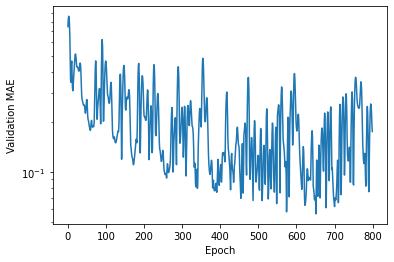

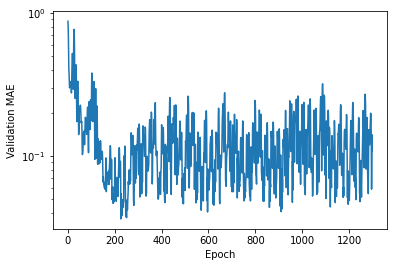

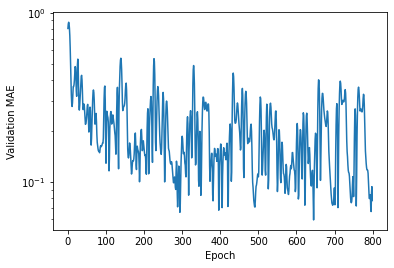

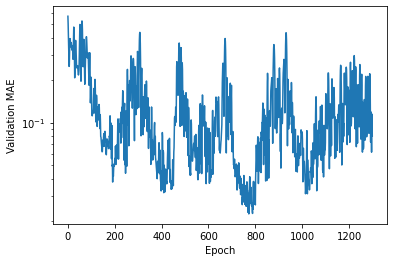

time: 1.1 s (started: 2022-08-12 13:52:08 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 11.2 ms (started: 2022-08-12 13:52:09 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 55.5 ms (started: 2022-08-12 13:52:09 +00:00)


In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 13.3 ms (started: 2022-08-12 13:52:09 +00:00)


In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 1.06 ms (started: 2022-08-12 13:52:09 +00:00)


0.19094077


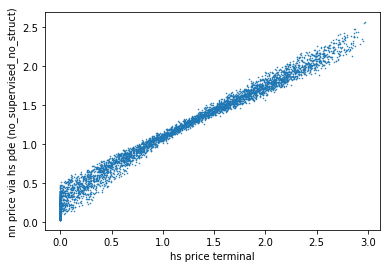

time: 160 ms (started: 2022-08-12 13:52:09 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.18208616482374868


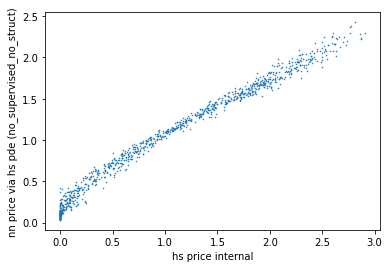

time: 147 ms (started: 2022-08-12 13:52:10 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.1291249


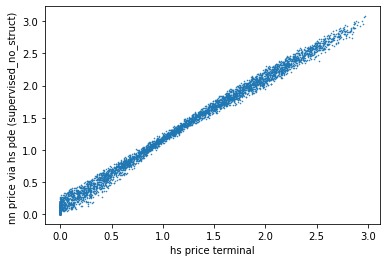

time: 165 ms (started: 2022-08-12 13:52:10 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.12669630265371223


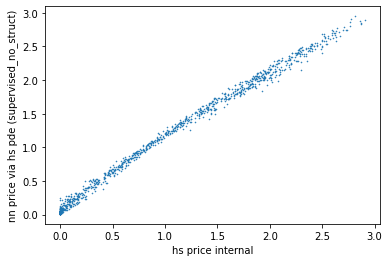

time: 151 ms (started: 2022-08-12 13:52:10 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.08927512


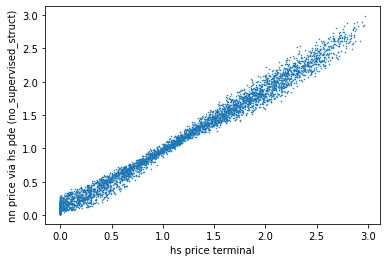

time: 159 ms (started: 2022-08-12 13:52:10 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.08610495772341228


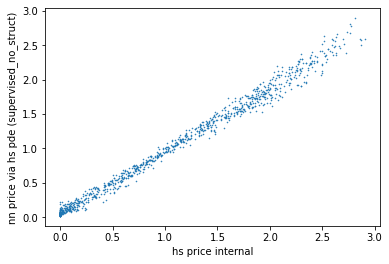

time: 148 ms (started: 2022-08-12 13:52:10 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.11050687


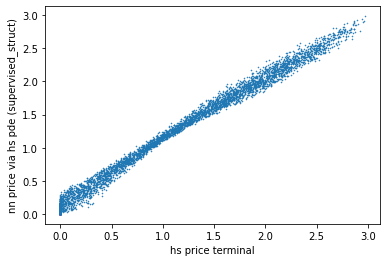

time: 159 ms (started: 2022-08-12 13:52:10 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.1140541209332369


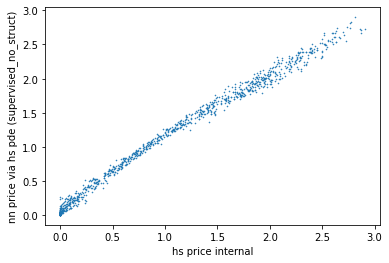

time: 149 ms (started: 2022-08-12 13:52:11 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

#### Test Case European Call - Uniform sampling - ResNet Like - With Stock  Segmentation - With Loss Weight Importance Sampling  - ABS Loss


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma = 1.0

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
heston_equation.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma, key_loss_func = torch.abs)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

# net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net2 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
heston_equation2.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
heston_equation3.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
heston_equation4.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:02<04:29,  2.73s/it]

Epoch 0 - lr 0.001 -  loss: 0.44681872179110843 - Terminal loss 0.27866286039352417 - Internal Loss 0.10896342247724533 - Structure Loss 0.0625 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:13<04:13,  2.67s/it]

Epoch 4 - lr 0.001 -  loss: 0.14977828123503262 - Terminal loss 0.09343653172254562 - Internal Loss 0.07447605580091476 - Structure Loss 0.0625 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:26<03:55,  2.62s/it]

Epoch 9 - lr 0.001 -  loss: 0.11704503330919477 - Terminal loss 0.08320382982492447 - Internal Loss 0.07546991854906082 - Structure Loss 0.0625 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:39<03:45,  2.65s/it]

Epoch 14 - lr 0.001 -  loss: 0.11721659493115213 - Terminal loss 0.07494501769542694 - Internal Loss 0.07266130298376083 - Structure Loss 0.0625 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:52<03:28,  2.60s/it]

Epoch 19 - lr 0.001 -  loss: 0.13596220397286946 - Terminal loss 0.0799373984336853 - Internal Loss 0.07786642760038376 - Structure Loss 0.0625 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [01:06<03:17,  2.64s/it]

Epoch 24 - lr 0.001 -  loss: 0.1681050026996268 - Terminal loss 0.09137337654829025 - Internal Loss 0.08877439051866531 - Structure Loss 0.0625 - Supervised Loss 0.0625


 30%|███       | 30/100 [01:19<03:06,  2.66s/it]

Epoch 29 - lr 0.001 -  loss: 0.08599578382240401 - Terminal loss 0.07772760093212128 - Internal Loss 0.07953011989593506 - Structure Loss 0.0625 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [01:32<02:53,  2.67s/it]

Epoch 34 - lr 0.001 -  loss: 0.053585703381233744 - Terminal loss 0.07414879649877548 - Internal Loss 0.06963155418634415 - Structure Loss 0.0625 - Supervised Loss 0.0625


 40%|████      | 40/100 [01:46<02:39,  2.66s/it]

Epoch 39 - lr 0.001 -  loss: 0.07422255124482843 - Terminal loss 0.06797517836093903 - Internal Loss 0.06712553650140762 - Structure Loss 0.0625 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [01:59<02:26,  2.66s/it]

Epoch 44 - lr 0.001 -  loss: 0.05405989889469412 - Terminal loss 0.06774085015058517 - Internal Loss 0.07365872710943222 - Structure Loss 0.0625 - Supervised Loss 0.0625


 50%|█████     | 50/100 [02:12<02:11,  2.62s/it]

Epoch 49 - lr 0.001 -  loss: 0.03752860861519972 - Terminal loss 0.06717565655708313 - Internal Loss 0.06656111031770706 - Structure Loss 0.0625 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [02:25<01:59,  2.66s/it]

Epoch 54 - lr 0.001 -  loss: 0.060214351759188704 - Terminal loss 0.07367441803216934 - Internal Loss 0.07023153454065323 - Structure Loss 0.0625 - Supervised Loss 0.0625


 60%|██████    | 60/100 [02:39<01:46,  2.66s/it]

Epoch 59 - lr 0.001 -  loss: 0.062330296780500144 - Terminal loss 0.06870204210281372 - Internal Loss 0.07446444034576416 - Structure Loss 0.0625 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [02:52<01:31,  2.63s/it]

Epoch 64 - lr 0.001 -  loss: 0.0668055203018917 - Terminal loss 0.0906108096241951 - Internal Loss 0.07066784054040909 - Structure Loss 0.0625 - Supervised Loss 0.0625


 70%|███████   | 70/100 [03:05<01:19,  2.65s/it]

Epoch 69 - lr 0.001 -  loss: 0.07376499846577644 - Terminal loss 0.07314672321081161 - Internal Loss 0.08444175124168396 - Structure Loss 0.0625 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [03:18<01:05,  2.62s/it]

Epoch 74 - lr 0.001 -  loss: 0.04134273001303276 - Terminal loss 0.06682277470827103 - Internal Loss 0.06788019835948944 - Structure Loss 0.0625 - Supervised Loss 0.0625


 80%|████████  | 80/100 [03:31<00:53,  2.65s/it]

Epoch 79 - lr 0.001 -  loss: 0.03619611873808834 - Terminal loss 0.06883958727121353 - Internal Loss 0.06635315716266632 - Structure Loss 0.0625 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [03:45<00:39,  2.66s/it]

Epoch 84 - lr 0.001 -  loss: 0.026622958481311798 - Terminal loss 0.06471335887908936 - Internal Loss 0.06628477573394775 - Structure Loss 0.0625 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [03:58<00:26,  2.65s/it]

Epoch 89 - lr 0.001 -  loss: 0.05035752927263578 - Terminal loss 0.07340841740369797 - Internal Loss 0.06676517426967621 - Structure Loss 0.0625 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [04:11<00:13,  2.60s/it]

Epoch 94 - lr 0.001 -  loss: 0.049117963347170085 - Terminal loss 0.06993214040994644 - Internal Loss 0.0671776607632637 - Structure Loss 0.0625 - Supervised Loss 0.0625


100%|██████████| 100/100 [04:24<00:00,  2.65s/it]


Epoch 99 - lr 0.001 -  loss: 0.057576953536934324 - Terminal loss 0.06460360437631607 - Internal Loss 0.0651862695813179 - Structure Loss 0.0625 - Supervised Loss 0.0625


  1%|          | 1/100 [00:03<05:03,  3.07s/it]

Epoch 0 - lr 0.001 -  loss: 0.24112674168854348 - Terminal loss 0.08434911072254181 - Internal Loss 0.0697937086224556 - Structure Loss 0.0625 - Supervised Loss 0.0824759952883581


  5%|▌         | 5/100 [00:14<04:37,  2.92s/it]

Epoch 4 - lr 0.001 -  loss: 0.14903106707162136 - Terminal loss 0.07630360871553421 - Internal Loss 0.06949606537818909 - Structure Loss 0.0625 - Supervised Loss 0.08001393288109684


 10%|█         | 10/100 [00:29<04:28,  2.98s/it]

Epoch 9 - lr 0.001 -  loss: 0.062380887853158075 - Terminal loss 0.06541992723941803 - Internal Loss 0.07426130026578903 - Structure Loss 0.0625 - Supervised Loss 0.06684025433250743


 15%|█▌        | 15/100 [00:44<04:12,  2.97s/it]

Epoch 14 - lr 0.001 -  loss: 0.10160587794533993 - Terminal loss 0.06771424412727356 - Internal Loss 0.06725446879863739 - Structure Loss 0.0625 - Supervised Loss 0.07821337422130183


 20%|██        | 20/100 [00:59<03:54,  2.94s/it]

Epoch 19 - lr 0.001 -  loss: 0.09110398468283232 - Terminal loss 0.06742889434099197 - Internal Loss 0.07462933659553528 - Structure Loss 0.0625 - Supervised Loss 0.06596333923560854


 25%|██▌       | 25/100 [01:14<03:44,  2.99s/it]

Epoch 24 - lr 0.001 -  loss: 0.04454964480234195 - Terminal loss 0.06369505077600479 - Internal Loss 0.0751236155629158 - Structure Loss 0.0625 - Supervised Loss 0.06465119815443866


 30%|███       | 30/100 [01:28<03:27,  2.97s/it]

Epoch 29 - lr 0.001 -  loss: 0.054603700396178366 - Terminal loss 0.06381822377443314 - Internal Loss 0.06530081480741501 - Structure Loss 0.0625 - Supervised Loss 0.06451394457700053


 35%|███▌      | 35/100 [01:43<03:10,  2.93s/it]

Epoch 34 - lr 0.001 -  loss: 0.07517448830429449 - Terminal loss 0.07009017467498779 - Internal Loss 0.06447474658489227 - Structure Loss 0.0625 - Supervised Loss 0.07345179013622655


 40%|████      | 40/100 [01:58<02:59,  2.99s/it]

Epoch 39 - lr 0.001 -  loss: 0.04656415968875062 - Terminal loss 0.06563979387283325 - Internal Loss 0.06892810016870499 - Structure Loss 0.0625 - Supervised Loss 0.06686329834539728


 45%|████▌     | 45/100 [02:13<02:43,  2.97s/it]

Epoch 44 - lr 0.001 -  loss: 0.02254905415141692 - Terminal loss 0.06332080066204071 - Internal Loss 0.06566362082958221 - Structure Loss 0.0625 - Supervised Loss 0.06375506191257958


 50%|█████     | 50/100 [02:28<02:27,  2.95s/it]

Epoch 49 - lr 0.001 -  loss: 0.04304898568979979 - Terminal loss 0.06492706388235092 - Internal Loss 0.06582378596067429 - Structure Loss 0.0625 - Supervised Loss 0.0662594332381134


 55%|█████▌    | 55/100 [02:43<02:14,  2.99s/it]

Epoch 54 - lr 0.001 -  loss: 0.06206737713297691 - Terminal loss 0.06876315176486969 - Internal Loss 0.06559305638074875 - Structure Loss 0.0625 - Supervised Loss 0.06693170120099519


 60%|██████    | 60/100 [02:57<01:58,  2.97s/it]

Epoch 59 - lr 0.001 -  loss: 0.04058719649358493 - Terminal loss 0.06517042219638824 - Internal Loss 0.06379499286413193 - Structure Loss 0.0625 - Supervised Loss 0.06488547357431505


 65%|██████▌   | 65/100 [03:12<01:42,  2.94s/it]

Epoch 64 - lr 0.001 -  loss: 0.05404476947233653 - Terminal loss 0.06430342048406601 - Internal Loss 0.06812146306037903 - Structure Loss 0.0625 - Supervised Loss 0.06769924102874891


 70%|███████   | 70/100 [03:27<01:30,  3.00s/it]

Epoch 69 - lr 0.001 -  loss: 0.05908162516674352 - Terminal loss 0.06402869522571564 - Internal Loss 0.06940741091966629 - Structure Loss 0.0625 - Supervised Loss 0.0643875559900221


 75%|███████▌  | 75/100 [03:42<01:14,  2.97s/it]

Epoch 74 - lr 0.001 -  loss: 0.050386421334621026 - Terminal loss 0.06832608580589294 - Internal Loss 0.06523427367210388 - Structure Loss 0.0625 - Supervised Loss 0.06519952346894267


 80%|████████  | 80/100 [03:57<00:58,  2.95s/it]

Epoch 79 - lr 0.001 -  loss: 0.04471454446979943 - Terminal loss 0.07002072036266327 - Internal Loss 0.06421476602554321 - Structure Loss 0.0625 - Supervised Loss 0.06695264841907185


 85%|████████▌ | 85/100 [04:12<00:44,  2.99s/it]

Epoch 84 - lr 0.001 -  loss: 0.022161219451198883 - Terminal loss 0.06301089376211166 - Internal Loss 0.06524345278739929 - Structure Loss 0.0625 - Supervised Loss 0.06427954113309158


 90%|█████████ | 90/100 [04:26<00:29,  2.96s/it]

Epoch 89 - lr 0.001 -  loss: 0.04340455606557751 - Terminal loss 0.06401719152927399 - Internal Loss 0.06438314914703369 - Structure Loss 0.0625 - Supervised Loss 0.0651164451856558


 95%|█████████▌| 95/100 [04:41<00:14,  2.93s/it]

Epoch 94 - lr 0.001 -  loss: 0.03237963440153622 - Terminal loss 0.06309820711612701 - Internal Loss 0.06470568478107452 - Structure Loss 0.0625 - Supervised Loss 0.06433699674232599


100%|██████████| 100/100 [04:56<00:00,  2.97s/it]


Epoch 99 - lr 0.001 -  loss: 0.02667632925495784 - Terminal loss 0.06320992857217789 - Internal Loss 0.06594011187553406 - Structure Loss 0.0625 - Supervised Loss 0.06355764669271186


  1%|          | 1/100 [00:02<04:54,  2.97s/it]

Epoch 0 - lr 0.001 -  loss: 0.4581689002613227 - Terminal loss 0.316070020198822 - Internal Loss 0.0738726556301117 - Structure Loss 0.06964559108018875 - Supervised Loss 0.0625


  5%|▌         | 5/100 [00:14<04:38,  2.93s/it]

Epoch 4 - lr 0.001 -  loss: 0.20516395568847656 - Terminal loss 0.11410478502511978 - Internal Loss 0.09452439099550247 - Structure Loss 0.0625443086028099 - Supervised Loss 0.0625


 10%|█         | 10/100 [00:29<04:25,  2.95s/it]

Epoch 9 - lr 0.001 -  loss: 0.11118792742490768 - Terminal loss 0.08128751814365387 - Internal Loss 0.07666130363941193 - Structure Loss 0.06389634311199188 - Supervised Loss 0.0625


 15%|█▌        | 15/100 [00:43<04:09,  2.93s/it]

Epoch 14 - lr 0.001 -  loss: 0.14868645576967132 - Terminal loss 0.07299041002988815 - Internal Loss 0.08291503041982651 - Structure Loss 0.06258123368024826 - Supervised Loss 0.0625


 20%|██        | 20/100 [00:58<03:55,  2.95s/it]

Epoch 19 - lr 0.001 -  loss: 0.19589904612965053 - Terminal loss 0.08224546909332275 - Internal Loss 0.07436200976371765 - Structure Loss 0.06250393390655518 - Supervised Loss 0.0625


 25%|██▌       | 25/100 [01:13<03:40,  2.93s/it]

Epoch 24 - lr 0.001 -  loss: 0.10054856435292298 - Terminal loss 0.07549461722373962 - Internal Loss 0.06809549033641815 - Structure Loss 0.0625118836760521 - Supervised Loss 0.0625


 30%|███       | 30/100 [01:28<03:26,  2.95s/it]

Epoch 29 - lr 0.001 -  loss: 0.10680746452675925 - Terminal loss 0.07256124913692474 - Internal Loss 0.08358368277549744 - Structure Loss 0.06256325542926788 - Supervised Loss 0.0625


 35%|███▌      | 35/100 [01:42<03:09,  2.92s/it]

Epoch 34 - lr 0.001 -  loss: 0.07510297952426805 - Terminal loss 0.07691632211208344 - Internal Loss 0.06868325173854828 - Structure Loss 0.0625002384185791 - Supervised Loss 0.0625


 40%|████      | 40/100 [01:57<02:56,  2.94s/it]

Epoch 39 - lr 0.001 -  loss: 0.05291084013879299 - Terminal loss 0.07186541706323624 - Internal Loss 0.06965027004480362 - Structure Loss 0.06269314140081406 - Supervised Loss 0.0625


 45%|████▌     | 45/100 [02:11<02:38,  2.89s/it]

Epoch 44 - lr 0.001 -  loss: 0.08965056617226866 - Terminal loss 0.10112210363149643 - Internal Loss 0.07076119631528854 - Structure Loss 0.06250415742397308 - Supervised Loss 0.0625


 50%|█████     | 50/100 [02:26<02:26,  2.93s/it]

Epoch 49 - lr 0.001 -  loss: 0.04955123633974128 - Terminal loss 0.06490248441696167 - Internal Loss 0.07405507564544678 - Structure Loss 0.06251905113458633 - Supervised Loss 0.0625


 55%|█████▌    | 55/100 [02:41<02:12,  2.95s/it]

Epoch 54 - lr 0.001 -  loss: 0.037156753655936986 - Terminal loss 0.06588207185268402 - Internal Loss 0.0691998153924942 - Structure Loss 0.0625290796160698 - Supervised Loss 0.0625


 60%|██████    | 60/100 [02:55<01:56,  2.91s/it]

Epoch 59 - lr 0.001 -  loss: 0.04677362657255597 - Terminal loss 0.07168670743703842 - Internal Loss 0.06979058682918549 - Structure Loss 0.06251059472560883 - Supervised Loss 0.0625


 65%|██████▌   | 65/100 [03:10<01:42,  2.94s/it]

Epoch 64 - lr 0.001 -  loss: 0.041127757686707705 - Terminal loss 0.07097534090280533 - Internal Loss 0.06716247648000717 - Structure Loss 0.0625 - Supervised Loss 0.0625


 70%|███████   | 70/100 [03:25<01:27,  2.92s/it]

Epoch 69 - lr 0.001 -  loss: 0.05752819621314605 - Terminal loss 0.06616935133934021 - Internal Loss 0.06654896587133408 - Structure Loss 0.0625007376074791 - Supervised Loss 0.0625


 75%|███████▌  | 75/100 [03:39<01:13,  2.95s/it]

Epoch 74 - lr 0.001 -  loss: 0.07117278439303239 - Terminal loss 0.08410689979791641 - Internal Loss 0.07253140211105347 - Structure Loss 0.06251456588506699 - Supervised Loss 0.0625


 80%|████████  | 80/100 [03:54<00:59,  2.95s/it]

Epoch 79 - lr 0.001 -  loss: 0.06704945572548443 - Terminal loss 0.06732988357543945 - Internal Loss 0.06666132807731628 - Structure Loss 0.06250277161598206 - Supervised Loss 0.0625


 85%|████████▌ | 85/100 [04:09<00:44,  2.94s/it]

Epoch 84 - lr 0.001 -  loss: 0.04844371902032031 - Terminal loss 0.06633002310991287 - Internal Loss 0.07387778162956238 - Structure Loss 0.06251214444637299 - Supervised Loss 0.0625


 90%|█████████ | 90/100 [04:23<00:29,  2.90s/it]

Epoch 89 - lr 0.001 -  loss: 0.03739061806764868 - Terminal loss 0.06681076437234879 - Internal Loss 0.06583201885223389 - Structure Loss 0.0625 - Supervised Loss 0.0625


 95%|█████████▌| 95/100 [04:38<00:14,  2.94s/it]

Epoch 94 - lr 0.001 -  loss: 0.04911040338791079 - Terminal loss 0.06565611809492111 - Internal Loss 0.06991540640592575 - Structure Loss 0.0625041201710701 - Supervised Loss 0.0625


100%|██████████| 100/100 [04:53<00:00,  2.93s/it]


Epoch 99 - lr 0.001 -  loss: 0.028507101763453748 - Terminal loss 0.06488291919231415 - Internal Loss 0.06627796590328217 - Structure Loss 0.06255236268043518 - Supervised Loss 0.0625


  1%|          | 1/100 [00:03<05:09,  3.13s/it]

Epoch 0 - lr 0.001 -  loss: 0.2990289480211704 - Terminal loss 0.08522573858499527 - Internal Loss 0.08250578492879868 - Structure Loss 0.06257075071334839 - Supervised Loss 0.09601852697742375


  5%|▌         | 5/100 [00:16<05:11,  3.28s/it]

Epoch 4 - lr 0.001 -  loss: 0.06726274726562058 - Terminal loss 0.07002459466457367 - Internal Loss 0.0657195895910263 - Structure Loss 0.06251001358032227 - Supervised Loss 0.07242867398791018


 10%|█         | 10/100 [00:32<04:53,  3.26s/it]

Epoch 9 - lr 0.001 -  loss: 0.117254490072611 - Terminal loss 0.07914530485868454 - Internal Loss 0.06873328983783722 - Structure Loss 0.06250859797000885 - Supervised Loss 0.07025559523475684


 15%|█▌        | 15/100 [00:49<04:40,  3.31s/it]

Epoch 14 - lr 0.001 -  loss: 0.05232049462227663 - Terminal loss 0.06656783074140549 - Internal Loss 0.06722722947597504 - Structure Loss 0.0625 - Supervised Loss 0.067640067661265


 20%|██        | 20/100 [01:05<04:23,  3.29s/it]

Epoch 19 - lr 0.001 -  loss: 0.07809914448401235 - Terminal loss 0.06523622572422028 - Internal Loss 0.07098671793937683 - Structure Loss 0.06285957247018814 - Supervised Loss 0.07071102149605098


 25%|██▌       | 25/100 [01:21<04:04,  3.25s/it]

Epoch 24 - lr 0.001 -  loss: 0.12773188705130292 - Terminal loss 0.07024510204792023 - Internal Loss 0.06706970185041428 - Structure Loss 0.06250916421413422 - Supervised Loss 0.07050064254131429


 30%|███       | 30/100 [01:38<03:50,  3.30s/it]

Epoch 29 - lr 0.001 -  loss: 0.0745029434951109 - Terminal loss 0.06577201932668686 - Internal Loss 0.06857307255268097 - Structure Loss 0.06250166147947311 - Supervised Loss 0.06804784215130334


 35%|███▌      | 35/100 [01:54<03:33,  3.29s/it]

Epoch 34 - lr 0.001 -  loss: 0.0550862345526953 - Terminal loss 0.06825381517410278 - Internal Loss 0.06628468632698059 - Structure Loss 0.0625 - Supervised Loss 0.06885421775085163


 40%|████      | 40/100 [02:11<03:16,  3.27s/it]

Epoch 39 - lr 0.001 -  loss: 0.03640893056468859 - Terminal loss 0.06410784274339676 - Internal Loss 0.06833430379629135 - Structure Loss 0.0625 - Supervised Loss 0.06545730080046577


 45%|████▌     | 45/100 [02:27<03:02,  3.31s/it]

Epoch 44 - lr 0.001 -  loss: 0.06251212138956672 - Terminal loss 0.06770127266645432 - Internal Loss 0.06548063457012177 - Structure Loss 0.06250271201133728 - Supervised Loss 0.06802281802326444


 50%|█████     | 50/100 [02:44<02:44,  3.30s/it]

Epoch 49 - lr 0.001 -  loss: 0.06771777653335863 - Terminal loss 0.07779276371002197 - Internal Loss 0.06445140391588211 - Structure Loss 0.0625 - Supervised Loss 0.06949655991656511


 55%|█████▌    | 55/100 [03:00<02:27,  3.28s/it]

Epoch 54 - lr 0.001 -  loss: 0.05146902199566528 - Terminal loss 0.07012955099344254 - Internal Loss 0.06463027000427246 - Structure Loss 0.0625000074505806 - Supervised Loss 0.06768566536995944


 60%|██████    | 60/100 [03:17<02:12,  3.32s/it]

Epoch 59 - lr 0.001 -  loss: 0.044643017636276906 - Terminal loss 0.06967195868492126 - Internal Loss 0.0651930719614029 - Structure Loss 0.0625009760260582 - Supervised Loss 0.06646965036107394


 65%|██████▌   | 65/100 [03:33<01:55,  3.30s/it]

Epoch 64 - lr 0.001 -  loss: 0.03800118053545091 - Terminal loss 0.06406643986701965 - Internal Loss 0.06598629057407379 - Structure Loss 0.06250312179327011 - Supervised Loss 0.066259419822197


 70%|███████   | 70/100 [03:50<01:38,  3.27s/it]

Epoch 69 - lr 0.001 -  loss: 0.04665945957104537 - Terminal loss 0.06402132660150528 - Internal Loss 0.06914956867694855 - Structure Loss 0.06250196695327759 - Supervised Loss 0.06434352449961103


 75%|███████▌  | 75/100 [04:06<01:22,  3.32s/it]

Epoch 74 - lr 0.001 -  loss: 0.05466485318214043 - Terminal loss 0.07296211272478104 - Internal Loss 0.06492339819669724 - Structure Loss 0.06250009685754776 - Supervised Loss 0.06710774589142107


 80%|████████  | 80/100 [04:23<01:06,  3.31s/it]

Epoch 79 - lr 0.001 -  loss: 0.05107937788735882 - Terminal loss 0.07215601950883865 - Internal Loss 0.06352231651544571 - Structure Loss 0.06250069290399551 - Supervised Loss 0.06909455357293925


 85%|████████▌ | 85/100 [04:39<00:49,  3.27s/it]

Epoch 84 - lr 0.001 -  loss: 0.03556079643174929 - Terminal loss 0.06351907551288605 - Internal Loss 0.06834201514720917 - Structure Loss 0.06253230571746826 - Supervised Loss 0.06511388527539783


 90%|█████████ | 90/100 [04:56<00:33,  3.32s/it]

Epoch 89 - lr 0.001 -  loss: 0.03691166969029118 - Terminal loss 0.06675371527671814 - Internal Loss 0.06352353096008301 - Structure Loss 0.06250116974115372 - Supervised Loss 0.06418879400661723


 95%|█████████▌| 95/100 [05:12<00:16,  3.29s/it]

Epoch 94 - lr 0.001 -  loss: 0.04981995271598021 - Terminal loss 0.07155978679656982 - Internal Loss 0.06474822759628296 - Structure Loss 0.06250644475221634 - Supervised Loss 0.06652202266355868


100%|██████████| 100/100 [05:28<00:00,  3.29s/it]

Epoch 99 - lr 0.001 -  loss: 0.027904248499350238 - Terminal loss 0.06366115063428879 - Internal Loss 0.06489168107509613 - Structure Loss 0.06250360608100891 - Supervised Loss 0.06455859574707833


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 19min 43s (started: 2022-08-12 13:52:11 +00:00)


In [ ]:
validation_data['heston_analytical_sol'].shape

torch.Size([2000, 1])

time: 2.89 ms (started: 2022-08-12 14:11:55 +00:00)


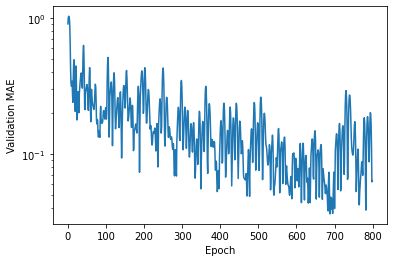

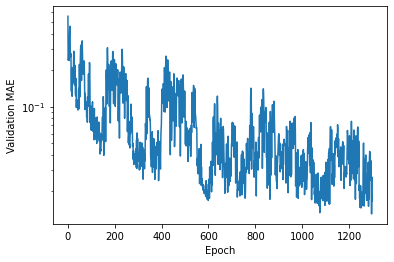

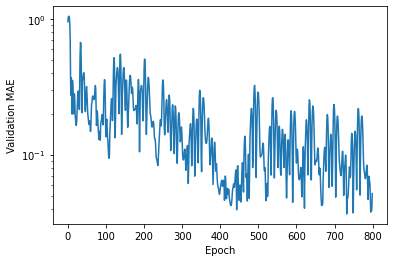

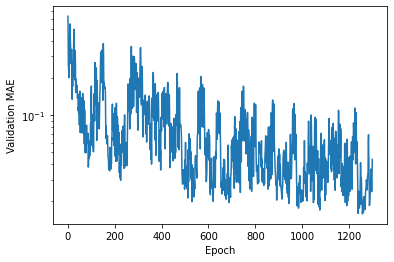

time: 995 ms (started: 2022-08-12 14:11:55 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
# input_data = supervised_data['heston_input'].to(torch.device("cuda:0"))
# bs_pred = bs_price( "C", 
#     input_data[:,2].reshape(-1,1), 
#     input_data[:,1].reshape(-1,1), 
#     input_data[:,3].reshape(-1,1) - input_data[:,0].reshape(-1,1), 
#     input_data[:,10].reshape(-1,1)**0.5, 
#     input_data[:,4].reshape(-1,1)
# )
# target = supervised_data['heston_analytical_sol'].to(torch.device("cuda:0"))
# trainEuss_supervised_struct.net.to(torch.device("cuda:0"))
# prediction = trainEuss_supervised_struct.net(input_data.to(torch.device("cuda:0")))

# sol = torch.abs(target - prediction).cpu().detach().numpy()
# sol.mean(), sol.var()
# # np.argmin(sol)

time: 1.53 ms (started: 2022-08-12 14:11:56 +00:00)


In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 12.7 ms (started: 2022-08-12 14:11:56 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                              nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 59.5 ms (started: 2022-08-12 14:11:56 +00:00)


In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 11.2 ms (started: 2022-08-12 14:11:56 +00:00)


In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 703 µs (started: 2022-08-12 14:11:56 +00:00)


0.07659165


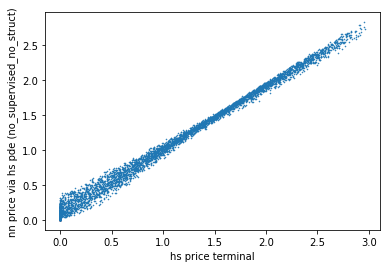

time: 255 ms (started: 2022-08-12 14:11:56 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

In [ ]:
heston_analytical.shape

torch.Size([1000])

time: 3.57 ms (started: 2022-08-12 14:11:56 +00:00)


0.06508253985796106


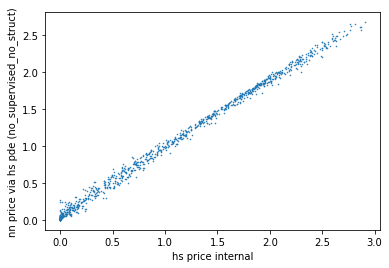

time: 199 ms (started: 2022-08-12 14:11:56 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.027721161


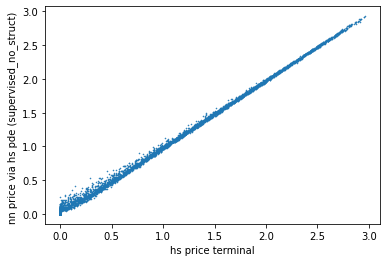

time: 234 ms (started: 2022-08-12 14:11:56 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.02323253854691455


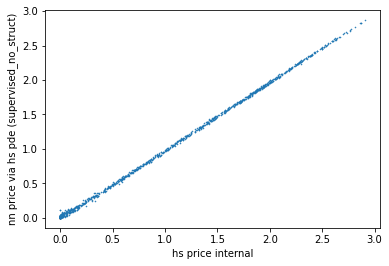

time: 242 ms (started: 2022-08-12 14:11:56 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.062246088


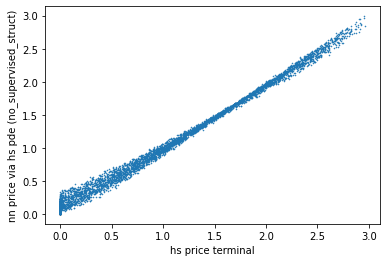

time: 458 ms (started: 2022-08-12 14:11:57 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.049593730319567285


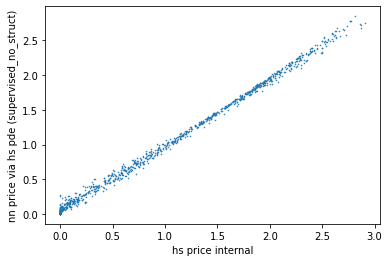

time: 211 ms (started: 2022-08-12 14:11:57 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.066436954


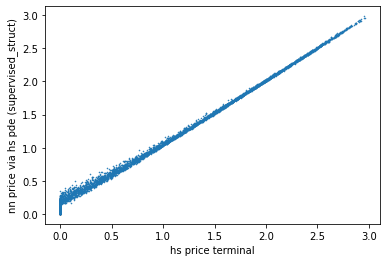

time: 252 ms (started: 2022-08-12 14:11:57 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.05982732299314029


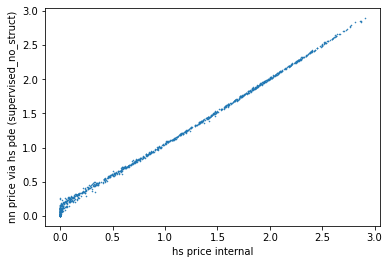

time: 253 ms (started: 2022-08-12 14:11:58 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

In [ ]:
supervised_data['heston_analytical_sol'].shape

torch.Size([5000, 1])

time: 2.92 ms (started: 2022-08-12 14:11:58 +00:00)


#### Test Case European Call - Uniform sampling - Simple DNN - No Segmentation - ABS Loss

[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, key_loss_func = torch.abs)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, key_loss_func = torch.abs)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, key_loss_func = torch.abs)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, key_loss_func = torch.abs)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:26,  1.15it/s]

Epoch 0 - lr 0.001 -  loss: 0.14950316978825462 - Terminal loss 0.11854855716228485 - Internal Loss 0.0225357785820961 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:16,  1.25it/s]

Epoch 4 - lr 0.001 -  loss: 0.035923045542505055 - Terminal loss 0.018471548333764076 - Internal Loss 0.018264714628458023 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:08<01:14,  1.21it/s]

Epoch 9 - lr 0.001 -  loss: 0.027385940154393513 - Terminal loss 0.01585254818201065 - Internal Loss 0.013898853212594986 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:12<01:06,  1.28it/s]

Epoch 14 - lr 0.001 -  loss: 0.022700473045309384 - Terminal loss 0.01639629900455475 - Internal Loss 0.012876972556114197 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:16<01:04,  1.23it/s]

Epoch 19 - lr 0.001 -  loss: 0.02540035007728471 - Terminal loss 0.021139558404684067 - Internal Loss 0.010267287492752075 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:20<01:00,  1.25it/s]

Epoch 24 - lr 0.001 -  loss: 0.02256573819451862 - Terminal loss 0.022358037531375885 - Internal Loss 0.010466653853654861 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:24<00:57,  1.22it/s]

Epoch 29 - lr 0.001 -  loss: 0.021904839409722224 - Terminal loss 0.012093518860638142 - Internal Loss 0.015424372628331184 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:28<00:53,  1.22it/s]

Epoch 34 - lr 0.001 -  loss: 0.019802255349026784 - Terminal loss 0.008317737840116024 - Internal Loss 0.009300513193011284 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:32<00:49,  1.22it/s]

Epoch 39 - lr 0.001 -  loss: 0.017831448672546282 - Terminal loss 0.008924484252929688 - Internal Loss 0.010688167065382004 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:36<00:46,  1.19it/s]

Epoch 44 - lr 0.001 -  loss: 0.018507049936387274 - Terminal loss 0.011145375669002533 - Internal Loss 0.007322968449443579 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:40<00:40,  1.22it/s]

Epoch 49 - lr 0.001 -  loss: 0.014066543119649092 - Terminal loss 0.006585969123989344 - Internal Loss 0.006750007625669241 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:44<00:36,  1.22it/s]

Epoch 54 - lr 0.001 -  loss: 0.02118583396077156 - Terminal loss 0.010804679244756699 - Internal Loss 0.011815691366791725 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:48<00:31,  1.25it/s]

Epoch 59 - lr 0.001 -  loss: 0.015381939398745695 - Terminal loss 0.011226705275475979 - Internal Loss 0.007757131010293961 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:52<00:28,  1.23it/s]

Epoch 64 - lr 0.001 -  loss: 0.017252391618159082 - Terminal loss 0.009163828566670418 - Internal Loss 0.012546088546514511 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [00:56<00:24,  1.25it/s]

Epoch 69 - lr 0.001 -  loss: 0.01530666732125812 - Terminal loss 0.005815125070512295 - Internal Loss 0.010560969822108746 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:00<00:20,  1.23it/s]

Epoch 74 - lr 0.001 -  loss: 0.01924146194424894 - Terminal loss 0.006328569259494543 - Internal Loss 0.006094092968851328 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:04<00:15,  1.27it/s]

Epoch 79 - lr 0.001 -  loss: 0.014121446241107252 - Terminal loss 0.006790820509195328 - Internal Loss 0.0062093245796859264 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:08<00:12,  1.23it/s]

Epoch 84 - lr 0.001 -  loss: 0.014697644238670668 - Terminal loss 0.008682740852236748 - Internal Loss 0.008686826564371586 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:12<00:07,  1.26it/s]

Epoch 89 - lr 0.001 -  loss: 0.02194193543659316 - Terminal loss 0.010267422534525394 - Internal Loss 0.013257613405585289 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:16<00:04,  1.22it/s]

Epoch 94 - lr 0.001 -  loss: 0.015499453681210676 - Terminal loss 0.012435728684067726 - Internal Loss 0.00598424207419157 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:20<00:00,  1.24it/s]


Epoch 99 - lr 0.001 -  loss: 0.011981849662131734 - Terminal loss 0.005609604530036449 - Internal Loss 0.00561756594106555 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:28,  1.12it/s]

Epoch 0 - lr 0.001 -  loss: 0.23120088081103546 - Terminal loss 0.04017144441604614 - Internal Loss 0.07883436977863312 - Structure Loss 0.0 - Supervised Loss 0.03783625515262022


  5%|▌         | 5/100 [00:04<01:21,  1.17it/s]

Epoch 4 - lr 0.001 -  loss: 0.05781655011567132 - Terminal loss 0.035689499229192734 - Internal Loss 0.021756894886493683 - Structure Loss 0.0 - Supervised Loss 0.035560078448752176


 10%|█         | 10/100 [00:08<01:14,  1.20it/s]

Epoch 9 - lr 0.001 -  loss: 0.04298078372044584 - Terminal loss 0.016786091029644012 - Internal Loss 0.016199780628085136 - Structure Loss 0.0 - Supervised Loss 0.01601959692381107


 15%|█▌        | 15/100 [00:12<01:07,  1.26it/s]

Epoch 14 - lr 0.001 -  loss: 0.03676433144652613 - Terminal loss 0.014921560883522034 - Internal Loss 0.0151150431483984 - Structure Loss 0.0 - Supervised Loss 0.012691020139883024


 20%|██        | 20/100 [00:16<01:07,  1.19it/s]

Epoch 19 - lr 0.001 -  loss: 0.026865469195467537 - Terminal loss 0.013200590386986732 - Internal Loss 0.012297537177801132 - Structure Loss 0.0 - Supervised Loss 0.010971497758664473


 25%|██▌       | 25/100 [00:20<01:02,  1.21it/s]

Epoch 24 - lr 0.001 -  loss: 0.0312952390011672 - Terminal loss 0.00702721206471324 - Internal Loss 0.015689386054873466 - Structure Loss 0.0 - Supervised Loss 0.005219267519521143


 30%|███       | 30/100 [00:24<00:56,  1.25it/s]

Epoch 29 - lr 0.001 -  loss: 0.03593731080075867 - Terminal loss 0.016486460343003273 - Internal Loss 0.009241258725523949 - Structure Loss 0.0 - Supervised Loss 0.015070840074791713


 35%|███▌      | 35/100 [00:28<00:54,  1.19it/s]

Epoch 34 - lr 0.001 -  loss: 0.021757827405842506 - Terminal loss 0.01236701849848032 - Internal Loss 0.01409533154219389 - Structure Loss 0.0 - Supervised Loss 0.011231540050032221


 40%|████      | 40/100 [00:33<00:49,  1.21it/s]

Epoch 39 - lr 0.001 -  loss: 0.025979159560167414 - Terminal loss 0.010557543486356735 - Internal Loss 0.00856104027479887 - Structure Loss 0.0 - Supervised Loss 0.009633535117677889


 45%|████▌     | 45/100 [00:37<00:45,  1.21it/s]

Epoch 44 - lr 0.001 -  loss: 0.02710996287222427 - Terminal loss 0.0085005983710289 - Internal Loss 0.011957624927163124 - Structure Loss 0.0 - Supervised Loss 0.007602976667381465


 50%|█████     | 50/100 [00:41<00:42,  1.16it/s]

Epoch 49 - lr 0.001 -  loss: 0.016930231390529016 - Terminal loss 0.005569391883909702 - Internal Loss 0.007832304574549198 - Structure Loss 0.0 - Supervised Loss 0.004480342843719753


 55%|█████▌    | 55/100 [00:45<00:37,  1.21it/s]

Epoch 54 - lr 0.001 -  loss: 0.016764114534758175 - Terminal loss 0.005660993047058582 - Internal Loss 0.007664178032428026 - Structure Loss 0.0 - Supervised Loss 0.0047172395684207495


 60%|██████    | 60/100 [00:49<00:32,  1.24it/s]

Epoch 59 - lr 0.001 -  loss: 0.01646689810140577 - Terminal loss 0.005829490255564451 - Internal Loss 0.007194139063358307 - Structure Loss 0.0 - Supervised Loss 0.004791330971041697


 65%|██████▌   | 65/100 [00:53<00:29,  1.18it/s]

Epoch 64 - lr 0.001 -  loss: 0.015890678093916737 - Terminal loss 0.00528623815625906 - Internal Loss 0.007023154757916927 - Structure Loss 0.0 - Supervised Loss 0.004488743243901414


 70%|███████   | 70/100 [00:58<00:24,  1.21it/s]

Epoch 69 - lr 0.001 -  loss: 0.015621537691081077 - Terminal loss 0.005942994728684425 - Internal Loss 0.007398014888167381 - Structure Loss 0.0 - Supervised Loss 0.004934762676932982


 75%|███████▌  | 75/100 [01:02<00:20,  1.23it/s]

Epoch 74 - lr 0.001 -  loss: 0.0313897693584604 - Terminal loss 0.012353960424661636 - Internal Loss 0.013729733414947987 - Structure Loss 0.0 - Supervised Loss 0.010508816481771805


 80%|████████  | 80/100 [01:06<00:17,  1.17it/s]

Epoch 79 - lr 0.001 -  loss: 0.02172655172861577 - Terminal loss 0.005000672303140163 - Internal Loss 0.007077900227159262 - Structure Loss 0.0 - Supervised Loss 0.004418064566388479


 85%|████████▌ | 85/100 [01:10<00:12,  1.20it/s]

Epoch 84 - lr 0.001 -  loss: 0.020990770173261314 - Terminal loss 0.007781685795634985 - Internal Loss 0.008558597415685654 - Structure Loss 0.0 - Supervised Loss 0.007496783819125039


 90%|█████████ | 90/100 [01:14<00:08,  1.24it/s]

Epoch 89 - lr 0.001 -  loss: 0.020341997106225234 - Terminal loss 0.009208559058606625 - Internal Loss 0.00896249059587717 - Structure Loss 0.0 - Supervised Loss 0.008146836752217513


 95%|█████████▌| 95/100 [01:18<00:04,  1.18it/s]

Epoch 94 - lr 0.001 -  loss: 0.01797103027637401 - Terminal loss 0.00496403593569994 - Internal Loss 0.006821656133979559 - Structure Loss 0.0 - Supervised Loss 0.0040598788260537404


100%|██████████| 100/100 [01:22<00:00,  1.20it/s]


Epoch 99 - lr 0.001 -  loss: 0.013540772675300515 - Terminal loss 0.005432689096778631 - Internal Loss 0.007039341609925032 - Structure Loss 0.0 - Supervised Loss 0.004641403069251435


  1%|          | 1/100 [00:00<01:26,  1.14it/s]

Epoch 0 - lr 0.001 -  loss: 0.1711853179666731 - Terminal loss 0.13678143918514252 - Internal Loss 0.026176948100328445 - Structure Loss 0.0013991205487400293 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:21,  1.17it/s]

Epoch 4 - lr 0.001 -  loss: 0.04450314367810885 - Terminal loss 0.02724131941795349 - Internal Loss 0.01594250462949276 - Structure Loss 0.0002378374192630872 - Supervised Loss 0.0


 10%|█         | 10/100 [00:08<01:15,  1.19it/s]

Epoch 9 - lr 0.001 -  loss: 0.024729216057393286 - Terminal loss 0.01394559908658266 - Internal Loss 0.011628963984549046 - Structure Loss 0.00017564964946359396 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:12<01:12,  1.17it/s]

Epoch 14 - lr 0.001 -  loss: 0.021425021812319756 - Terminal loss 0.010344130918383598 - Internal Loss 0.009552194736897945 - Structure Loss 0.00011228248331462964 - Supervised Loss 0.0


 20%|██        | 20/100 [00:16<01:07,  1.19it/s]

Epoch 19 - lr 0.001 -  loss: 0.017131981750329334 - Terminal loss 0.007883491925895214 - Internal Loss 0.010726956650614738 - Structure Loss 9.248830610886216e-05 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:20<01:03,  1.18it/s]

Epoch 24 - lr 0.001 -  loss: 0.02065039984881878 - Terminal loss 0.017314264550805092 - Internal Loss 0.010891305282711983 - Structure Loss 5.888196756131947e-05 - Supervised Loss 0.0


 30%|███       | 30/100 [00:25<00:56,  1.24it/s]

Epoch 29 - lr 0.001 -  loss: 0.019909347511000104 - Terminal loss 0.009454886429011822 - Internal Loss 0.012131045572459698 - Structure Loss 1.0849642421817407e-05 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:29<00:54,  1.19it/s]

Epoch 34 - lr 0.001 -  loss: 0.023084803794821102 - Terminal loss 0.008362160064280033 - Internal Loss 0.008105657994747162 - Structure Loss 1.1520561201905366e-05 - Supervised Loss 0.0


 40%|████      | 40/100 [00:33<00:51,  1.16it/s]

Epoch 39 - lr 0.001 -  loss: 0.016373482015397813 - Terminal loss 0.009502388536930084 - Internal Loss 0.010414979420602322 - Structure Loss 6.974462303332984e-05 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:37<00:47,  1.17it/s]

Epoch 44 - lr 0.001 -  loss: 0.013880449761119153 - Terminal loss 0.006607384886592627 - Internal Loss 0.009874975308775902 - Structure Loss 4.9338639655616134e-05 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:42<00:43,  1.16it/s]

Epoch 49 - lr 0.001 -  loss: 0.018385356292128563 - Terminal loss 0.007527789566665888 - Internal Loss 0.007821276783943176 - Structure Loss 8.828204954625107e-06 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:46<00:37,  1.19it/s]

Epoch 54 - lr 0.001 -  loss: 0.017501938260263868 - Terminal loss 0.015880635008215904 - Internal Loss 0.007269912399351597 - Structure Loss 2.8619035674637416e-06 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:50<00:33,  1.18it/s]

Epoch 59 - lr 0.001 -  loss: 0.017948372289538383 - Terminal loss 0.0061312406323850155 - Internal Loss 0.018207833170890808 - Structure Loss 1.830747351050377e-05 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:54<00:29,  1.17it/s]

Epoch 64 - lr 0.001 -  loss: 0.02155214465326733 - Terminal loss 0.01607719622552395 - Internal Loss 0.0106897484511137 - Structure Loss 2.672648406587541e-05 - Supervised Loss 0.0


 70%|███████   | 70/100 [00:58<00:25,  1.19it/s]

Epoch 69 - lr 0.001 -  loss: 0.013472824874851439 - Terminal loss 0.007099627982825041 - Internal Loss 0.011062181554734707 - Structure Loss 4.59611983387731e-05 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:03<00:21,  1.18it/s]

Epoch 74 - lr 0.001 -  loss: 0.012333077171610462 - Terminal loss 0.00539373280480504 - Internal Loss 0.009177555330097675 - Structure Loss 3.378545807208866e-05 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:07<00:15,  1.26it/s]

Epoch 79 - lr 0.001 -  loss: 0.014399799932208326 - Terminal loss 0.009683950804173946 - Internal Loss 0.006537456065416336 - Structure Loss 2.9583825380541384e-05 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:11<00:12,  1.18it/s]

Epoch 84 - lr 0.001 -  loss: 0.018911366040507954 - Terminal loss 0.01055104285478592 - Internal Loss 0.008980813436210155 - Structure Loss 1.2760514437104575e-05 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:15<00:08,  1.21it/s]

Epoch 89 - lr 0.001 -  loss: 0.014851482274631659 - Terminal loss 0.008686992339789867 - Internal Loss 0.006756896618753672 - Structure Loss 2.339489401492756e-05 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:19<00:04,  1.18it/s]

Epoch 94 - lr 0.001 -  loss: 0.015108823051883115 - Terminal loss 0.011709936894476414 - Internal Loss 0.010662776418030262 - Structure Loss 6.096216748119332e-05 - Supervised Loss 0.0


100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


Epoch 99 - lr 0.001 -  loss: 0.011859704636865191 - Terminal loss 0.008512156084179878 - Internal Loss 0.0061074369587004185 - Structure Loss 2.8607375497813337e-05 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:12,  1.36it/s]

Epoch 0 - lr 0.001 -  loss: 0.20966419504446757 - Terminal loss 0.03905424475669861 - Internal Loss 0.04386788606643677 - Structure Loss 0.0014867465943098068 - Supervised Loss 0.04024020985820852


  5%|▌         | 5/100 [00:04<01:21,  1.16it/s]

Epoch 4 - lr 0.001 -  loss: 0.038552567880193345 - Terminal loss 0.015477619133889675 - Internal Loss 0.014840202406048775 - Structure Loss 0.0002523741568438709 - Supervised Loss 0.01387972768261852


 10%|█         | 10/100 [00:08<01:15,  1.20it/s]

Epoch 9 - lr 0.001 -  loss: 0.06666209090885973 - Terminal loss 0.02170099876821041 - Internal Loss 0.01890658214688301 - Structure Loss 1.2070953744114377e-05 - Supervised Loss 0.02209253634922586


 15%|█▌        | 15/100 [00:12<01:15,  1.13it/s]

Epoch 14 - lr 0.001 -  loss: 0.026145287283543955 - Terminal loss 0.006404746323823929 - Internal Loss 0.011751486919820309 - Structure Loss 8.429420267930254e-05 - Supervised Loss 0.0051004986601297705


 20%|██        | 20/100 [00:17<01:10,  1.14it/s]

Epoch 19 - lr 0.001 -  loss: 0.02462693164770476 - Terminal loss 0.006062377244234085 - Internal Loss 0.011076672933995724 - Structure Loss 0.00015448259364347905 - Supervised Loss 0.005140469714375337


 25%|██▌       | 25/100 [00:21<01:03,  1.18it/s]

Epoch 24 - lr 0.001 -  loss: 0.0410404369499642 - Terminal loss 0.007760870270431042 - Internal Loss 0.02281356416642666 - Structure Loss 4.729480133391917e-05 - Supervised Loss 0.006372677003672583


 30%|███       | 30/100 [00:26<01:02,  1.12it/s]

Epoch 29 - lr 0.001 -  loss: 0.02482410514969973 - Terminal loss 0.005411690101027489 - Internal Loss 0.010102733038365841 - Structure Loss 7.644139259355143e-05 - Supervised Loss 0.004593477519062148


 35%|███▌      | 35/100 [00:30<00:56,  1.15it/s]

Epoch 34 - lr 0.001 -  loss: 0.04328049719622167 - Terminal loss 0.008377215825021267 - Internal Loss 0.010530557483434677 - Structure Loss 2.262792804685887e-05 - Supervised Loss 0.007524842988282417


 40%|████      | 40/100 [00:34<00:49,  1.20it/s]

Epoch 39 - lr 0.001 -  loss: 0.018969183979585604 - Terminal loss 0.004644032102078199 - Internal Loss 0.009310349822044373 - Structure Loss 0.0001213829091284424 - Supervised Loss 0.004140770291566116


 45%|████▌     | 45/100 [00:38<00:48,  1.14it/s]

Epoch 44 - lr 0.001 -  loss: 0.024134222425405635 - Terminal loss 0.006949262693524361 - Internal Loss 0.009066615253686905 - Structure Loss 8.169750071829185e-05 - Supervised Loss 0.0063896676873751454


 50%|█████     | 50/100 [00:43<00:43,  1.16it/s]

Epoch 49 - lr 0.001 -  loss: 0.02889510395132556 - Terminal loss 0.007523130625486374 - Internal Loss 0.012196401134133339 - Structure Loss 4.6908011427149177e-05 - Supervised Loss 0.007274148665128117


 55%|█████▌    | 55/100 [00:47<00:37,  1.20it/s]

Epoch 54 - lr 0.001 -  loss: 0.02802667052737534 - Terminal loss 0.006673457566648722 - Internal Loss 0.009519548155367374 - Structure Loss 3.519588426570408e-05 - Supervised Loss 0.006365490982894858


 60%|██████    | 60/100 [00:51<00:35,  1.13it/s]

Epoch 59 - lr 0.001 -  loss: 0.025339513766796933 - Terminal loss 0.005942588206380606 - Internal Loss 0.011175760067999363 - Structure Loss 4.607902519637719e-05 - Supervised Loss 0.00515943935417648


 65%|██████▌   | 65/100 [00:56<00:30,  1.15it/s]

Epoch 64 - lr 0.001 -  loss: 0.02144312760504637 - Terminal loss 0.0052903094328939915 - Internal Loss 0.010594403371214867 - Structure Loss 5.7498353271512315e-05 - Supervised Loss 0.004970209395632601


 70%|███████   | 70/100 [01:00<00:25,  1.19it/s]

Epoch 69 - lr 0.001 -  loss: 0.025559447335162442 - Terminal loss 0.015001184307038784 - Internal Loss 0.01326812244951725 - Structure Loss 5.816350312670693e-05 - Supervised Loss 0.013656179178853105


 75%|███████▌  | 75/100 [01:04<00:22,  1.13it/s]

Epoch 74 - lr 0.001 -  loss: 0.016204768087102507 - Terminal loss 0.004704777617007494 - Internal Loss 0.007946365512907505 - Structure Loss 8.149752102326602e-05 - Supervised Loss 0.004411835478626615


 80%|████████  | 80/100 [01:09<00:17,  1.16it/s]

Epoch 79 - lr 0.001 -  loss: 0.01635717411366055 - Terminal loss 0.004569359123706818 - Internal Loss 0.009205976501107216 - Structure Loss 8.238584268838167e-05 - Supervised Loss 0.004343364340517219


 85%|████████▌ | 85/100 [01:13<00:12,  1.19it/s]

Epoch 84 - lr 0.001 -  loss: 0.02313135110801972 - Terminal loss 0.008059646002948284 - Internal Loss 0.006703659892082214 - Structure Loss 3.0788065487286076e-05 - Supervised Loss 0.007539335135880552


 90%|█████████ | 90/100 [01:17<00:08,  1.13it/s]

Epoch 89 - lr 0.001 -  loss: 0.015216195521342448 - Terminal loss 0.003931451588869095 - Internal Loss 0.007240318227559328 - Structure Loss 9.255249460693449e-05 - Supervised Loss 0.0037108092897061404


 95%|█████████▌| 95/100 [01:22<00:04,  1.13it/s]

Epoch 94 - lr 0.001 -  loss: 0.015014328331814384 - Terminal loss 0.004254680126905441 - Internal Loss 0.0067631518468260765 - Structure Loss 7.681039278395474e-05 - Supervised Loss 0.004095539576985671


100%|██████████| 100/100 [01:26<00:00,  1.16it/s]

Epoch 99 - lr 0.001 -  loss: 0.015660447037632527 - Terminal loss 0.003520561382174492 - Internal Loss 0.006481787655502558 - Structure Loss 6.66854321025312e-05 - Supervised Loss 0.003388851918204714


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 5min 34s (started: 2022-08-12 14:11:58 +00:00)


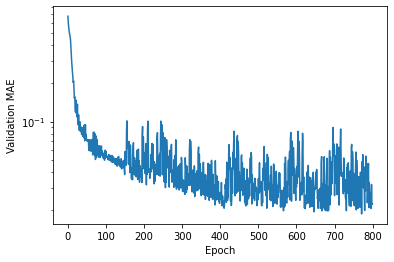

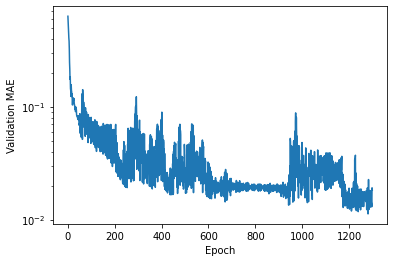

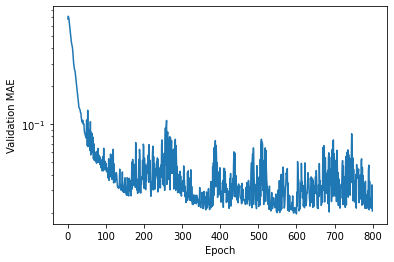

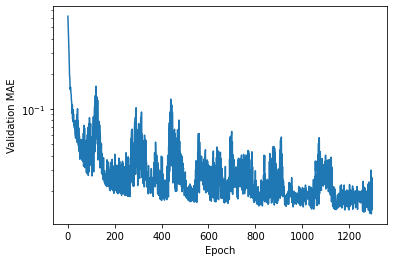

time: 950 ms (started: 2022-08-12 14:17:32 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 10.6 ms (started: 2022-08-12 14:17:33 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 55.2 ms (started: 2022-08-12 14:17:33 +00:00)


In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 11 ms (started: 2022-08-12 14:17:33 +00:00)


In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 710 µs (started: 2022-08-12 14:17:33 +00:00)


0.032829262


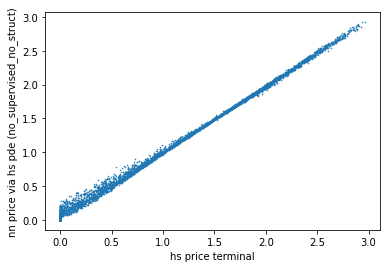

time: 157 ms (started: 2022-08-12 14:17:33 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.02335474440603268


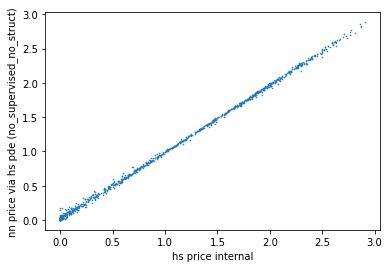

time: 144 ms (started: 2022-08-12 14:17:33 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal') 
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.030248685


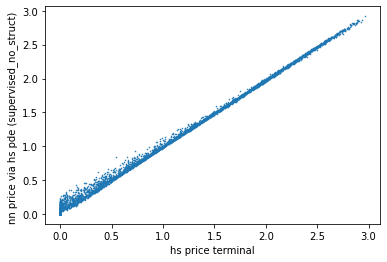

time: 158 ms (started: 2022-08-12 14:17:33 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.02105596767021418


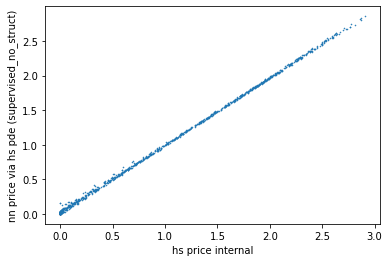

time: 347 ms (started: 2022-08-12 14:17:34 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.029977813


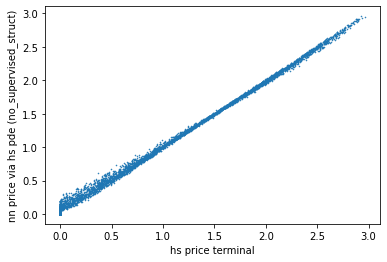

time: 150 ms (started: 2022-08-12 14:17:34 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.01920144850180044


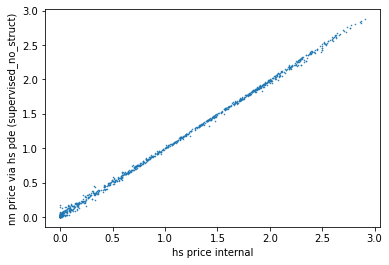

time: 150 ms (started: 2022-08-12 14:17:34 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.032953326


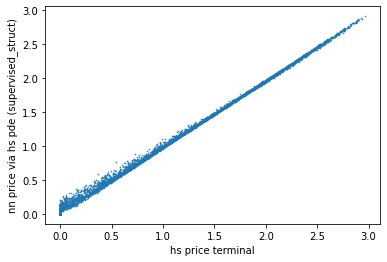

time: 152 ms (started: 2022-08-12 14:17:34 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.02681743082178544


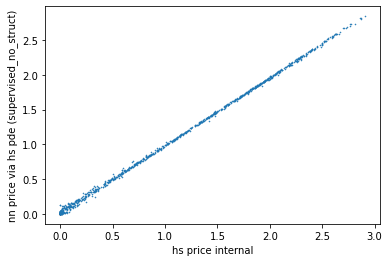

time: 142 ms (started: 2022-08-12 14:17:34 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

#### Test Case European Call - Uniform sampling - ResNet Like - No Segmentation - ABS Loss

[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, key_loss_func = torch.abs)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

# net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net2 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, key_loss_func = torch.abs)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, key_loss_func = torch.abs)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, key_loss_func = torch.abs)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:02<04:23,  2.66s/it]

Epoch 0 - lr 0.001 -  loss: 0.20131642619768778 - Terminal loss 0.11688454449176788 - Internal Loss 0.0359376035630703 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:12<04:05,  2.59s/it]

Epoch 4 - lr 0.001 -  loss: 0.032028945783774056 - Terminal loss 0.022838372737169266 - Internal Loss 0.011254200711846352 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:26<03:56,  2.63s/it]

Epoch 9 - lr 0.001 -  loss: 0.017740714881155226 - Terminal loss 0.008253547362983227 - Internal Loss 0.010752303525805473 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:39<03:43,  2.63s/it]

Epoch 14 - lr 0.001 -  loss: 0.019776350922054715 - Terminal loss 0.02024291269481182 - Internal Loss 0.010838749818503857 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:52<03:28,  2.61s/it]

Epoch 19 - lr 0.001 -  loss: 0.014233262381619878 - Terminal loss 0.011348409578204155 - Internal Loss 0.005838082637637854 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:05<03:17,  2.64s/it]

Epoch 24 - lr 0.001 -  loss: 0.017218151233262487 - Terminal loss 0.014616820961236954 - Internal Loss 0.011392230167984962 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [01:18<03:04,  2.64s/it]

Epoch 29 - lr 0.001 -  loss: 0.014497102238237858 - Terminal loss 0.010119548998773098 - Internal Loss 0.004747710656374693 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:31<02:50,  2.62s/it]

Epoch 34 - lr 0.001 -  loss: 0.01421714098089271 - Terminal loss 0.007047413848340511 - Internal Loss 0.009083959273993969 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:44<02:38,  2.63s/it]

Epoch 39 - lr 0.001 -  loss: 0.012718086337877644 - Terminal loss 0.010938971303403378 - Internal Loss 0.006650228518992662 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:57<02:23,  2.61s/it]

Epoch 44 - lr 0.001 -  loss: 0.0084122848800487 - Terminal loss 0.0038877709303051233 - Internal Loss 0.0036403266713023186 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:11<02:11,  2.63s/it]

Epoch 49 - lr 0.001 -  loss: 0.010358522335688273 - Terminal loss 0.0042625293135643005 - Internal Loss 0.005860164761543274 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:24<01:55,  2.57s/it]

Epoch 54 - lr 0.001 -  loss: 0.012588870194223192 - Terminal loss 0.008889739401638508 - Internal Loss 0.0036047082394361496 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:37<01:44,  2.62s/it]

Epoch 59 - lr 0.001 -  loss: 0.012063231733110216 - Terminal loss 0.007188071496784687 - Internal Loss 0.0048009976744651794 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:50<01:30,  2.59s/it]

Epoch 64 - lr 0.001 -  loss: 0.010906787278751532 - Terminal loss 0.0076629482209682465 - Internal Loss 0.007871406152844429 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:03<01:18,  2.63s/it]

Epoch 69 - lr 0.001 -  loss: 0.010427342779520486 - Terminal loss 0.003878431860357523 - Internal Loss 0.0037699323147535324 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:16<01:05,  2.63s/it]

Epoch 74 - lr 0.001 -  loss: 0.010106292553246021 - Terminal loss 0.0053450316190719604 - Internal Loss 0.00427936902269721 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:29<00:52,  2.62s/it]

Epoch 79 - lr 0.001 -  loss: 0.009433950607975325 - Terminal loss 0.0048132119700312614 - Internal Loss 0.004660713952034712 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [03:42<00:38,  2.58s/it]

Epoch 84 - lr 0.001 -  loss: 0.008707459912531905 - Terminal loss 0.0032557002268731594 - Internal Loss 0.00496147945523262 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [03:55<00:26,  2.63s/it]

Epoch 89 - lr 0.001 -  loss: 0.011959262088769011 - Terminal loss 0.018410220742225647 - Internal Loss 0.0042003910057246685 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:08<00:12,  2.58s/it]

Epoch 94 - lr 0.001 -  loss: 0.00847955679314004 - Terminal loss 0.006633204407989979 - Internal Loss 0.004221550188958645 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [04:21<00:00,  2.62s/it]


Epoch 99 - lr 0.001 -  loss: 0.009248458883828588 - Terminal loss 0.006775398273020983 - Internal Loss 0.005160910543054342 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:03<04:57,  3.00s/it]

Epoch 0 - lr 0.001 -  loss: 0.19515935509122762 - Terminal loss 0.031909454613924026 - Internal Loss 0.027923107147216797 - Structure Loss 0.0 - Supervised Loss 0.027303839905722466


  5%|▌         | 5/100 [00:14<04:41,  2.96s/it]

Epoch 4 - lr 0.001 -  loss: 0.03638170973809528 - Terminal loss 0.007968209683895111 - Internal Loss 0.008936920203268528 - Structure Loss 0.0 - Supervised Loss 0.007434213443258891


 10%|█         | 10/100 [00:29<04:22,  2.92s/it]

Epoch 9 - lr 0.001 -  loss: 0.028799231221526066 - Terminal loss 0.014060220681130886 - Internal Loss 0.009390587918460369 - Structure Loss 0.0 - Supervised Loss 0.012865230465903063


 15%|█▌        | 15/100 [00:43<04:06,  2.90s/it]

Epoch 14 - lr 0.001 -  loss: 0.04652079760047718 - Terminal loss 0.012565065175294876 - Internal Loss 0.012682750821113586 - Structure Loss 0.0 - Supervised Loss 0.01188841151282399


 20%|██        | 20/100 [00:58<03:55,  2.95s/it]

Epoch 19 - lr 0.001 -  loss: 0.021345862343151143 - Terminal loss 0.003991773352026939 - Internal Loss 0.005417338106781244 - Structure Loss 0.0 - Supervised Loss 0.003264078422229625


 25%|██▌       | 25/100 [01:13<03:39,  2.93s/it]

Epoch 24 - lr 0.001 -  loss: 0.01967697034831024 - Terminal loss 0.008014234714210033 - Internal Loss 0.007284018211066723 - Structure Loss 0.0 - Supervised Loss 0.007690907613413013


 30%|███       | 30/100 [01:27<03:23,  2.91s/it]

Epoch 29 - lr 0.001 -  loss: 0.016568059342338615 - Terminal loss 0.007487282622605562 - Internal Loss 0.006047549657523632 - Structure Loss 0.0 - Supervised Loss 0.006518882889631127


 35%|███▌      | 35/100 [01:42<03:12,  2.95s/it]

Epoch 34 - lr 0.001 -  loss: 0.015702798152210127 - Terminal loss 0.007506448309868574 - Internal Loss 0.004607446026057005 - Structure Loss 0.0 - Supervised Loss 0.0069190208460097


 40%|████      | 40/100 [01:57<02:56,  2.94s/it]

Epoch 39 - lr 0.001 -  loss: 0.014628566078201479 - Terminal loss 0.003820480313152075 - Internal Loss 0.00627296743914485 - Structure Loss 0.0 - Supervised Loss 0.002720727993708819


 45%|████▌     | 45/100 [02:11<02:40,  2.91s/it]

Epoch 44 - lr 0.001 -  loss: 0.015142029358705619 - Terminal loss 0.005160750355571508 - Internal Loss 0.0038716585841029882 - Structure Loss 0.0 - Supervised Loss 0.0050499452786664225


 50%|█████     | 50/100 [02:26<02:27,  2.96s/it]

Epoch 49 - lr 0.001 -  loss: 0.013841068861278819 - Terminal loss 0.005618690513074398 - Internal Loss 0.002985514234751463 - Structure Loss 0.0 - Supervised Loss 0.005092236975141108


 55%|█████▌    | 55/100 [02:41<02:12,  2.93s/it]

Epoch 54 - lr 0.001 -  loss: 0.016309451053789767 - Terminal loss 0.01418453361839056 - Internal Loss 0.002994412323459983 - Structure Loss 0.0 - Supervised Loss 0.012690033358365887


 60%|██████    | 60/100 [02:55<01:56,  2.91s/it]

Epoch 59 - lr 0.001 -  loss: 0.013047819696763848 - Terminal loss 0.005832217168062925 - Internal Loss 0.004593353718519211 - Structure Loss 0.0 - Supervised Loss 0.005683849803343534


 65%|██████▌   | 65/100 [03:10<01:43,  2.95s/it]

Epoch 64 - lr 0.001 -  loss: 0.012900274607421694 - Terminal loss 0.005185782443732023 - Internal Loss 0.003384862095117569 - Structure Loss 0.0 - Supervised Loss 0.0046449467291077625


 70%|███████   | 70/100 [03:25<01:28,  2.94s/it]

Epoch 69 - lr 0.001 -  loss: 0.011425455285365848 - Terminal loss 0.005044554825872183 - Internal Loss 0.002512239385396242 - Structure Loss 0.0 - Supervised Loss 0.004270569960091808


 75%|███████▌  | 75/100 [03:39<01:13,  2.92s/it]

Epoch 74 - lr 0.001 -  loss: 0.011737276768418393 - Terminal loss 0.004025280009955168 - Internal Loss 0.005188472103327513 - Structure Loss 0.0 - Supervised Loss 0.003039096970338988


 80%|████████  | 80/100 [03:54<00:59,  2.96s/it]

Epoch 79 - lr 0.001 -  loss: 0.011791662309105323 - Terminal loss 0.0054047140292823315 - Internal Loss 0.004156114533543587 - Structure Loss 0.0 - Supervised Loss 0.004976615690491802


 85%|████████▌ | 85/100 [04:09<00:44,  2.94s/it]

Epoch 84 - lr 0.001 -  loss: 0.011726112838610057 - Terminal loss 0.005906124133616686 - Internal Loss 0.0022819126024842262 - Structure Loss 0.0 - Supervised Loss 0.005058608885912797


 90%|█████████ | 90/100 [04:23<00:29,  2.91s/it]

Epoch 89 - lr 0.001 -  loss: 0.010946004129489848 - Terminal loss 0.00422667944803834 - Internal Loss 0.0036521092988550663 - Structure Loss 0.0 - Supervised Loss 0.004122394977547678


 95%|█████████▌| 95/100 [04:38<00:14,  2.96s/it]

Epoch 94 - lr 0.001 -  loss: 0.010707067292772585 - Terminal loss 0.0033483533188700676 - Internal Loss 0.0032170782797038555 - Structure Loss 0.0 - Supervised Loss 0.0033345070075623696


100%|██████████| 100/100 [04:53<00:00,  2.93s/it]


Epoch 99 - lr 0.001 -  loss: 0.009751273042117259 - Terminal loss 0.003896091366186738 - Internal Loss 0.0020383158698678017 - Structure Loss 0.0 - Supervised Loss 0.0034559916451347562


  1%|          | 1/100 [00:02<04:51,  2.95s/it]

Epoch 0 - lr 0.001 -  loss: 0.15475121802753872 - Terminal loss 0.06932823359966278 - Internal Loss 0.020072443410754204 - Structure Loss 0.0001625192235223949 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:14<04:38,  2.93s/it]

Epoch 4 - lr 0.001 -  loss: 0.02215124128593339 - Terminal loss 0.011847083456814289 - Internal Loss 0.007853759452700615 - Structure Loss 4.818400338990614e-05 - Supervised Loss 0.0


 10%|█         | 10/100 [00:29<04:22,  2.92s/it]

Epoch 9 - lr 0.001 -  loss: 0.021023256083329517 - Terminal loss 0.023141080513596535 - Internal Loss 0.021804524585604668 - Structure Loss 0.00012584743672050536 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:43<04:08,  2.93s/it]

Epoch 14 - lr 0.001 -  loss: 0.021291651245620515 - Terminal loss 0.020505273714661598 - Internal Loss 0.008059770800173283 - Structure Loss 3.6545774491969496e-05 - Supervised Loss 0.0


 20%|██        | 20/100 [00:58<03:50,  2.88s/it]

Epoch 19 - lr 0.001 -  loss: 0.014138564984831545 - Terminal loss 0.014189467765390873 - Internal Loss 0.007067481521517038 - Structure Loss 7.990413905645255e-06 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:12<03:38,  2.92s/it]

Epoch 24 - lr 0.001 -  loss: 0.010691899702780776 - Terminal loss 0.004704063758254051 - Internal Loss 0.006739616859704256 - Structure Loss 4.907061156700365e-05 - Supervised Loss 0.0


 30%|███       | 30/100 [01:27<03:22,  2.89s/it]

Epoch 29 - lr 0.001 -  loss: 0.01320895335326592 - Terminal loss 0.010973071679472923 - Internal Loss 0.00984499417245388 - Structure Loss 1.7969143300433643e-05 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:41<03:09,  2.92s/it]

Epoch 34 - lr 0.001 -  loss: 0.023701193949414626 - Terminal loss 0.0139260683208704 - Internal Loss 0.005237296689301729 - Structure Loss 2.7268695248494623e-06 - Supervised Loss 0.0


 40%|████      | 40/100 [01:56<02:55,  2.93s/it]

Epoch 39 - lr 0.001 -  loss: 0.013595767836603854 - Terminal loss 0.0038741398602724075 - Internal Loss 0.006352559197694063 - Structure Loss 1.4938445019652136e-05 - Supervised Loss 0.0


 45%|████▌     | 45/100 [02:11<02:40,  2.91s/it]

Epoch 44 - lr 0.001 -  loss: 0.012220639425019423 - Terminal loss 0.00740952929481864 - Internal Loss 0.006258913781493902 - Structure Loss 1.4003549040353391e-05 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:25<02:23,  2.87s/it]

Epoch 49 - lr 0.001 -  loss: 0.014117041809691323 - Terminal loss 0.005005395971238613 - Internal Loss 0.00502593582496047 - Structure Loss 6.231442966964096e-06 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:40<02:11,  2.92s/it]

Epoch 54 - lr 0.001 -  loss: 0.009565070064531432 - Terminal loss 0.004526388365775347 - Internal Loss 0.00446773087605834 - Structure Loss 1.1284916581644211e-05 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:54<01:55,  2.88s/it]

Epoch 59 - lr 0.001 -  loss: 0.007874178958849775 - Terminal loss 0.003223516745492816 - Internal Loss 0.0030479049310088158 - Structure Loss 3.132476194878109e-05 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [03:09<01:42,  2.92s/it]

Epoch 64 - lr 0.001 -  loss: 0.011417514748043485 - Terminal loss 0.009127776138484478 - Internal Loss 0.005940945353358984 - Structure Loss 6.042721452104161e-07 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:23<01:28,  2.93s/it]

Epoch 69 - lr 0.001 -  loss: 0.010352522962623172 - Terminal loss 0.003969763405621052 - Internal Loss 0.004885178990662098 - Structure Loss 2.0221290469635278e-05 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:38<01:12,  2.92s/it]

Epoch 74 - lr 0.001 -  loss: 0.011069423105153773 - Terminal loss 0.006037983112037182 - Internal Loss 0.006712879985570908 - Structure Loss 7.98691235104343e-06 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:52<00:58,  2.92s/it]

Epoch 79 - lr 0.001 -  loss: 0.008279163856059313 - Terminal loss 0.006620194762945175 - Internal Loss 0.004386825021356344 - Structure Loss 2.8734759780491004e-06 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [04:07<00:43,  2.89s/it]

Epoch 84 - lr 0.001 -  loss: 0.009275823935038514 - Terminal loss 0.0025752573274075985 - Internal Loss 0.0045289346016943455 - Structure Loss 4.603585693985224e-06 - Supervised Loss 0.0


 90%|█████████ | 90/100 [04:21<00:29,  2.92s/it]

Epoch 89 - lr 0.001 -  loss: 0.010413400725358062 - Terminal loss 0.0062927985563874245 - Internal Loss 0.003946480806916952 - Structure Loss 4.950004495185567e-06 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:36<00:14,  2.90s/it]

Epoch 94 - lr 0.001 -  loss: 0.007078951845566432 - Terminal loss 0.006597249768674374 - Internal Loss 0.0034741286654025316 - Structure Loss 2.8976255634916015e-06 - Supervised Loss 0.0


100%|██████████| 100/100 [04:51<00:00,  2.91s/it]


Epoch 99 - lr 0.001 -  loss: 0.008270314791136317 - Terminal loss 0.00537750544026494 - Internal Loss 0.004503801930695772 - Structure Loss 1.0546825251367409e-05 - Supervised Loss 0.0


  1%|          | 1/100 [00:03<05:26,  3.30s/it]

Epoch 0 - lr 0.001 -  loss: 0.1868604667614123 - Terminal loss 0.052405182272195816 - Internal Loss 0.02812816947698593 - Structure Loss 0.0002573620295152068 - Supervised Loss 0.05246311420867005


  5%|▌         | 5/100 [00:16<05:05,  3.21s/it]

Epoch 4 - lr 0.001 -  loss: 0.04342257853684795 - Terminal loss 0.013657752424478531 - Internal Loss 0.018926655873656273 - Structure Loss 1.2349073585937731e-05 - Supervised Loss 0.01139734433793075


 10%|█         | 10/100 [00:32<04:54,  3.27s/it]

Epoch 9 - lr 0.001 -  loss: 0.039194578015274706 - Terminal loss 0.009643826633691788 - Internal Loss 0.016638660803437233 - Structure Loss 2.394113107584417e-05 - Supervised Loss 0.007092122358742468


 15%|█▌        | 15/100 [00:48<04:37,  3.26s/it]

Epoch 14 - lr 0.001 -  loss: 0.02398619602905282 - Terminal loss 0.012845968827605247 - Internal Loss 0.007367209531366825 - Structure Loss 7.621535473845142e-07 - Supervised Loss 0.011253552672834212


 20%|██        | 20/100 [01:04<04:18,  3.23s/it]

Epoch 19 - lr 0.001 -  loss: 0.03681074890210479 - Terminal loss 0.020913245156407356 - Internal Loss 0.00980136077851057 - Structure Loss 1.2072311619704124e-05 - Supervised Loss 0.019444379455908926


 25%|██▌       | 25/100 [01:21<04:05,  3.28s/it]

Epoch 24 - lr 0.001 -  loss: 0.019480085135082894 - Terminal loss 0.004125747364014387 - Internal Loss 0.0066309766843914986 - Structure Loss 1.8381968402536586e-05 - Supervised Loss 0.0038325626948259813


 30%|███       | 30/100 [01:37<03:48,  3.27s/it]

Epoch 29 - lr 0.001 -  loss: 0.01860160450350016 - Terminal loss 0.010624971240758896 - Internal Loss 0.007248515263199806 - Structure Loss 0.00011195557453902438 - Supervised Loss 0.009574543408959923


 35%|███▌      | 35/100 [01:53<03:30,  3.24s/it]

Epoch 34 - lr 0.001 -  loss: 0.018479025161636825 - Terminal loss 0.010408427566289902 - Internal Loss 0.003962927497923374 - Structure Loss 5.9563108152360655e-06 - Supervised Loss 0.00904426306516551


 40%|████      | 40/100 [02:10<03:16,  3.28s/it]

Epoch 39 - lr 0.001 -  loss: 0.016152963222381855 - Terminal loss 0.007967362180352211 - Internal Loss 0.005391507409512997 - Structure Loss 4.754871770273894e-05 - Supervised Loss 0.007593265946686635


 45%|████▌     | 45/100 [02:26<02:59,  3.26s/it]

Epoch 44 - lr 0.001 -  loss: 0.01464550189515827 - Terminal loss 0.004715245217084885 - Internal Loss 0.003007256193086505 - Structure Loss 2.5818226276896894e-05 - Supervised Loss 0.003984523414528032


 50%|█████     | 50/100 [02:42<02:41,  3.23s/it]

Epoch 49 - lr 0.001 -  loss: 0.014559486865704682 - Terminal loss 0.007679538801312447 - Internal Loss 0.004309528507292271 - Structure Loss 2.7082782253273763e-05 - Supervised Loss 0.006300140132961389


 55%|█████▌    | 55/100 [02:59<02:27,  3.28s/it]

Epoch 54 - lr 0.001 -  loss: 0.013821020143301915 - Terminal loss 0.008138183504343033 - Internal Loss 0.0061382451094686985 - Structure Loss 3.557544187060557e-05 - Supervised Loss 0.00784039591792906


 60%|██████    | 60/100 [03:15<02:10,  3.27s/it]

Epoch 59 - lr 0.001 -  loss: 0.012868930593735216 - Terminal loss 0.0036438305396586657 - Internal Loss 0.0036866457667201757 - Structure Loss 3.290413133072434e-06 - Supervised Loss 0.0035015769850388445


 65%|██████▌   | 65/100 [03:31<01:53,  3.24s/it]

Epoch 64 - lr 0.001 -  loss: 0.013520219930424763 - Terminal loss 0.006155590061098337 - Internal Loss 0.005100912880152464 - Structure Loss 1.2070775483152829e-05 - Supervised Loss 0.005553108664935488


 70%|███████   | 70/100 [03:48<01:38,  3.27s/it]

Epoch 69 - lr 0.001 -  loss: 0.012797200656572838 - Terminal loss 0.00637846952304244 - Internal Loss 0.0031355861574411392 - Structure Loss 1.253341088158777e-05 - Supervised Loss 0.0057614299778551824


 75%|███████▌  | 75/100 [04:04<01:21,  3.25s/it]

Epoch 74 - lr 0.001 -  loss: 0.011961007774075246 - Terminal loss 0.0037383337039500475 - Internal Loss 0.0032987636514008045 - Structure Loss 1.706906004983466e-05 - Supervised Loss 0.0034072244560881355


 80%|████████  | 80/100 [04:20<01:04,  3.23s/it]

Epoch 79 - lr 0.001 -  loss: 0.011906840021451358 - Terminal loss 0.002417451236397028 - Internal Loss 0.00478410953655839 - Structure Loss 1.879060801002197e-05 - Supervised Loss 0.002457164732741873


 85%|████████▌ | 85/100 [04:36<00:49,  3.28s/it]

Epoch 84 - lr 0.001 -  loss: 0.01025806070234608 - Terminal loss 0.005390135105699301 - Internal Loss 0.002116244286298752 - Structure Loss 7.2035468292597216e-06 - Supervised Loss 0.004448171490850401


 90%|█████████ | 90/100 [04:53<00:32,  3.27s/it]

Epoch 89 - lr 0.001 -  loss: 0.0109721447377861 - Terminal loss 0.005574894603341818 - Internal Loss 0.0028913533315062523 - Structure Loss 3.8921139093872625e-06 - Supervised Loss 0.004757632146744405


 95%|█████████▌| 95/100 [05:09<00:16,  3.24s/it]

Epoch 94 - lr 0.001 -  loss: 0.010466974918561286 - Terminal loss 0.005118862260133028 - Internal Loss 0.0025538476184010506 - Structure Loss 5.667845925927395e-06 - Supervised Loss 0.005133861069564583


100%|██████████| 100/100 [05:25<00:00,  3.26s/it]

Epoch 99 - lr 0.001 -  loss: 0.011032076509093462 - Terminal loss 0.003939311485737562 - Internal Loss 0.0034775687381625175 - Structure Loss 1.2337371117610019e-05 - Supervised Loss 0.0035280229793936595


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 19min 32s (started: 2022-08-12 14:17:35 +00:00)


In [ ]:
validation_data['heston_analytical_sol'].shape

torch.Size([2000, 1])

time: 3.72 ms (started: 2022-08-12 14:37:07 +00:00)


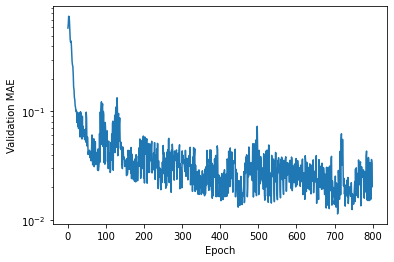

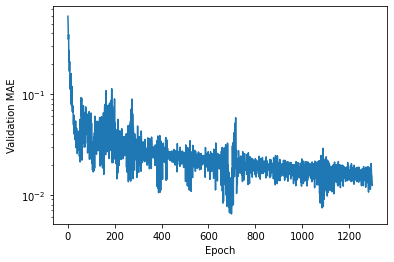

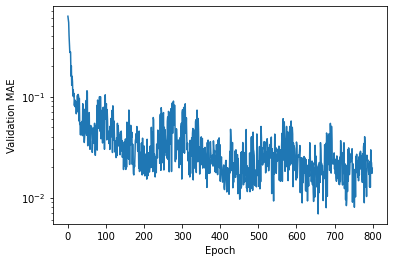

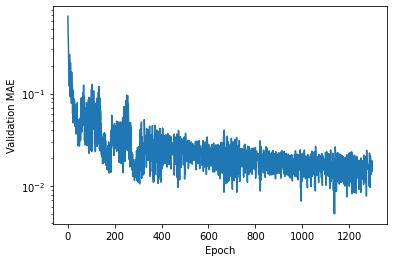

time: 1.06 s (started: 2022-08-12 14:37:07 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
# input_data = supervised_data['heston_input'].to(torch.device("cuda:0"))
# bs_pred = bs_price( "C", 
#     input_data[:,2].reshape(-1,1), 
#     input_data[:,1].reshape(-1,1), 
#     input_data[:,3].reshape(-1,1) - input_data[:,0].reshape(-1,1), 
#     input_data[:,10].reshape(-1,1)**0.5, 
#     input_data[:,4].reshape(-1,1)
# )
# target = supervised_data['heston_analytical_sol'].to(torch.device("cuda:0"))
# trainEuss_supervised_struct.net.to(torch.device("cuda:0"))
# prediction = trainEuss_supervised_struct.net(input_data.to(torch.device("cuda:0")))

# sol = torch.abs(target - prediction).cpu().detach().numpy()
# sol.mean(), sol.var()
# # np.argmin(sol)

time: 1.58 ms (started: 2022-08-12 14:37:08 +00:00)


In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 11.5 ms (started: 2022-08-12 14:37:08 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                              nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 58 ms (started: 2022-08-12 14:37:08 +00:00)


In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 10.8 ms (started: 2022-08-12 14:37:08 +00:00)


In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 729 µs (started: 2022-08-12 14:37:08 +00:00)


0.033109497


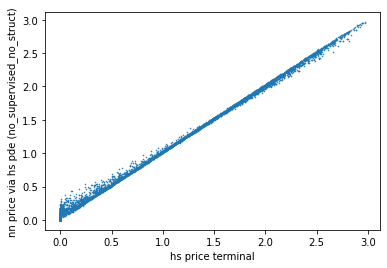

time: 233 ms (started: 2022-08-12 14:37:08 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

In [ ]:
heston_analytical.shape

torch.Size([1000])

time: 2.29 ms (started: 2022-08-12 14:37:08 +00:00)


0.019856372186136353


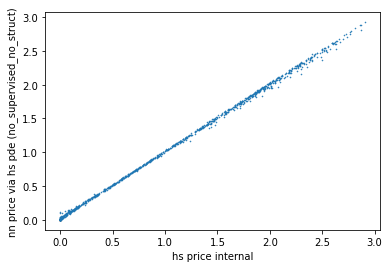

time: 213 ms (started: 2022-08-12 14:37:08 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.027654517


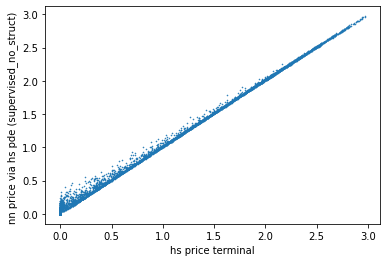

time: 217 ms (started: 2022-08-12 14:37:09 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.01203078198883624


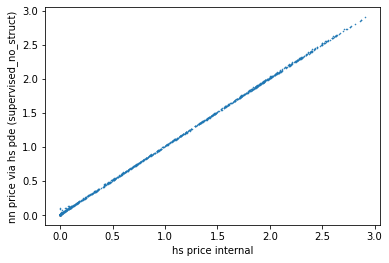

time: 223 ms (started: 2022-08-12 14:37:09 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.034254808


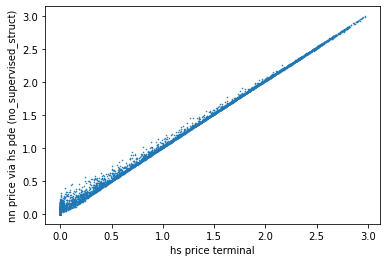

time: 219 ms (started: 2022-08-12 14:37:09 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.018732970221284923


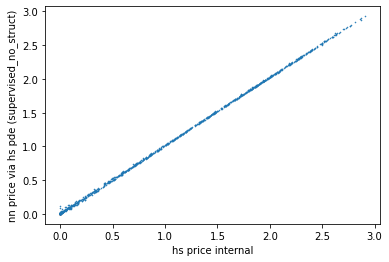

time: 235 ms (started: 2022-08-12 14:37:09 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.029684687


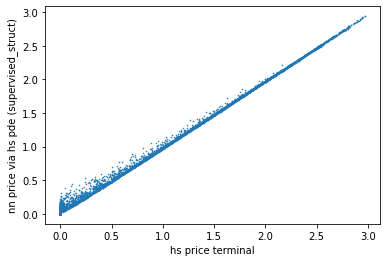

time: 224 ms (started: 2022-08-12 14:37:10 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.020661363645960742


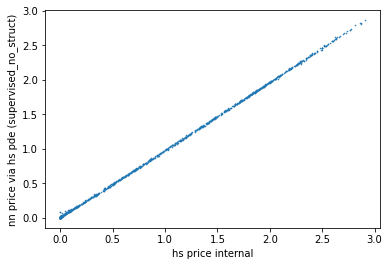

time: 217 ms (started: 2022-08-12 14:37:10 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

In [ ]:
supervised_data['heston_analytical_sol'].shape

torch.Size([5000, 1])

time: 2.97 ms (started: 2022-08-12 14:37:10 +00:00)


#### Test Case European Call - Uniform sampling - Simple DNN - With Stock  Segmentation - ABS Loss


[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
heston_equation.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, key_loss_func=torch.abs)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
heston_equation2.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, key_loss_func=torch.abs)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
heston_equation3.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, key_loss_func=torch.abs)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
heston_equation4.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, key_loss_func=torch.abs)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:27,  1.14it/s]

Epoch 0 - lr 0.001 -  loss: 0.2646910432312224 - Terminal loss 0.4890630841255188 - Internal Loss 0.021583765745162964 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:20,  1.18it/s]

Epoch 4 - lr 0.001 -  loss: 0.14420812245872286 - Terminal loss 0.19047416746616364 - Internal Loss 0.03252163529396057 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:08<01:11,  1.25it/s]

Epoch 9 - lr 0.001 -  loss: 0.16565042734146118 - Terminal loss 0.07188819348812103 - Internal Loss 0.05864469334483147 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:12<01:08,  1.24it/s]

Epoch 14 - lr 0.001 -  loss: 0.10477599501609802 - Terminal loss 0.0735725536942482 - Internal Loss 0.028732016682624817 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:15<01:02,  1.29it/s]

Epoch 19 - lr 0.001 -  loss: 0.059292986575100154 - Terminal loss 0.05045852065086365 - Internal Loss 0.03772854432463646 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:20<01:00,  1.24it/s]

Epoch 24 - lr 0.001 -  loss: 0.14273379991451898 - Terminal loss 0.2847481369972229 - Internal Loss 0.027849014848470688 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:23<00:54,  1.27it/s]

Epoch 29 - lr 0.001 -  loss: 0.049935401934716434 - Terminal loss 0.03547094017267227 - Internal Loss 0.02936789020895958 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:27<00:52,  1.23it/s]

Epoch 34 - lr 0.001 -  loss: 0.07411636184487078 - Terminal loss 0.08335605263710022 - Internal Loss 0.03291471675038338 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:31<00:47,  1.26it/s]

Epoch 39 - lr 0.001 -  loss: 0.10102009607685937 - Terminal loss 0.08538757264614105 - Internal Loss 0.04613472521305084 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:35<00:44,  1.24it/s]

Epoch 44 - lr 0.001 -  loss: 0.09599750282035933 - Terminal loss 0.04704178497195244 - Internal Loss 0.028146076947450638 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:39<00:39,  1.28it/s]

Epoch 49 - lr 0.001 -  loss: 0.10874518834882313 - Terminal loss 0.18411411345005035 - Internal Loss 0.06123308464884758 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:43<00:36,  1.24it/s]

Epoch 54 - lr 0.001 -  loss: 0.08220538165834215 - Terminal loss 0.04657549038529396 - Internal Loss 0.04797353222966194 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:47<00:30,  1.33it/s]

Epoch 59 - lr 0.001 -  loss: 0.11792485829856661 - Terminal loss 0.04026101902127266 - Internal Loss 0.04235418140888214 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:51<00:27,  1.25it/s]

Epoch 64 - lr 0.001 -  loss: 0.058868162540925875 - Terminal loss 0.04147844761610031 - Internal Loss 0.04662308469414711 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [00:55<00:24,  1.23it/s]

Epoch 69 - lr 0.001 -  loss: 0.07170677474803394 - Terminal loss 0.0786248967051506 - Internal Loss 0.04253802448511124 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [00:59<00:19,  1.28it/s]

Epoch 74 - lr 0.001 -  loss: 0.06774553366833264 - Terminal loss 0.04584261402487755 - Internal Loss 0.020556384697556496 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:03<00:16,  1.24it/s]

Epoch 79 - lr 0.001 -  loss: 0.052237426655160055 - Terminal loss 0.03732183948159218 - Internal Loss 0.041250623762607574 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:07<00:11,  1.28it/s]

Epoch 84 - lr 0.001 -  loss: 0.09950949893229538 - Terminal loss 0.16990800201892853 - Internal Loss 0.047628410160541534 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:11<00:08,  1.24it/s]

Epoch 89 - lr 0.001 -  loss: 0.07350149957670106 - Terminal loss 0.03188193961977959 - Internal Loss 0.034338969737291336 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:15<00:03,  1.26it/s]

Epoch 94 - lr 0.001 -  loss: 0.06008508884244495 - Terminal loss 0.014588558115065098 - Internal Loss 0.062385182827711105 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


Epoch 99 - lr 0.001 -  loss: 0.10959863662719727 - Terminal loss 0.13845661282539368 - Internal Loss 0.04790550097823143 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:07,  1.46it/s]

Epoch 0 - lr 0.001 -  loss: 0.2946353423831946 - Terminal loss 0.1940813809633255 - Internal Loss 0.11626581847667694 - Structure Loss 0.0 - Supervised Loss 0.09176123117515428


  5%|▌         | 5/100 [00:03<01:16,  1.24it/s]

Epoch 4 - lr 0.001 -  loss: 0.10934135139237751 - Terminal loss 0.036128103733062744 - Internal Loss 0.04977317154407501 - Structure Loss 0.0 - Supervised Loss 0.02663001827372544


 10%|█         | 10/100 [00:07<01:10,  1.27it/s]

Epoch 9 - lr 0.001 -  loss: 0.07798721966266196 - Terminal loss 0.02018141746520996 - Internal Loss 0.06736486405134201 - Structure Loss 0.0 - Supervised Loss 0.01660096981165588


 15%|█▌        | 15/100 [00:12<01:10,  1.20it/s]

Epoch 14 - lr 0.001 -  loss: 0.08457787468863999 - Terminal loss 0.019253917038440704 - Internal Loss 0.05779428035020828 - Structure Loss 0.0 - Supervised Loss 0.01634389388719697


 20%|██        | 20/100 [00:16<01:05,  1.23it/s]

Epoch 19 - lr 0.001 -  loss: 0.06797707470945914 - Terminal loss 0.014971284195780754 - Internal Loss 0.025217143818736076 - Structure Loss 0.0 - Supervised Loss 0.02435679338805771


 25%|██▌       | 25/100 [00:20<00:59,  1.26it/s]

Epoch 24 - lr 0.001 -  loss: 0.08963437522168034 - Terminal loss 0.00866121705621481 - Internal Loss 0.03923739492893219 - Structure Loss 0.0 - Supervised Loss 0.01093387067422309


 30%|███       | 30/100 [00:24<00:59,  1.19it/s]

Epoch 29 - lr 0.001 -  loss: 0.08103806394722465 - Terminal loss 0.010320442728698254 - Internal Loss 0.017774080857634544 - Structure Loss 0.0 - Supervised Loss 0.03605689055504619


 35%|███▌      | 35/100 [00:28<00:53,  1.21it/s]

Epoch 34 - lr 0.001 -  loss: 0.06155377121427171 - Terminal loss 0.014327388256788254 - Internal Loss 0.03530054911971092 - Structure Loss 0.0 - Supervised Loss 0.010026527328130566


 40%|████      | 40/100 [00:32<00:48,  1.24it/s]

Epoch 39 - lr 0.001 -  loss: 0.05051644926696906 - Terminal loss 0.00642894022166729 - Internal Loss 0.024257561191916466 - Structure Loss 0.0 - Supervised Loss 0.01731151220143171


 45%|████▌     | 45/100 [00:36<00:45,  1.20it/s]

Epoch 44 - lr 0.001 -  loss: 0.10870887946963335 - Terminal loss 0.06204353645443916 - Internal Loss 0.03153303638100624 - Structure Loss 0.0 - Supervised Loss 0.02059292909865676


 50%|█████     | 50/100 [00:40<00:40,  1.23it/s]

Epoch 49 - lr 0.001 -  loss: 0.06001284167418491 - Terminal loss 0.010007699951529503 - Internal Loss 0.015898847952485085 - Structure Loss 0.0 - Supervised Loss 0.03403609279939785


 55%|█████▌    | 55/100 [00:44<00:35,  1.27it/s]

Epoch 54 - lr 0.001 -  loss: 0.06543536842381234 - Terminal loss 0.02707940898835659 - Internal Loss 0.027423251420259476 - Structure Loss 0.0 - Supervised Loss 0.018422724202181637


 60%|██████    | 60/100 [00:48<00:33,  1.19it/s]

Epoch 59 - lr 0.001 -  loss: 0.06328650971369203 - Terminal loss 0.009619854390621185 - Internal Loss 0.014581258408725262 - Structure Loss 0.0 - Supervised Loss 0.036275651911192065


 65%|██████▌   | 65/100 [00:52<00:28,  1.22it/s]

Epoch 64 - lr 0.001 -  loss: 0.09833121270408791 - Terminal loss 0.052472420036792755 - Internal Loss 0.024813489988446236 - Structure Loss 0.0 - Supervised Loss 0.01805430530569317


 70%|███████   | 70/100 [00:57<00:23,  1.25it/s]

Epoch 69 - lr 0.001 -  loss: 0.05003667524897682 - Terminal loss 0.016702324151992798 - Internal Loss 0.015469711273908615 - Structure Loss 0.0 - Supervised Loss 0.018967890239707675


 75%|███████▌  | 75/100 [01:01<00:21,  1.18it/s]

Epoch 74 - lr 0.001 -  loss: 0.0859828438408601 - Terminal loss 0.008084696717560291 - Internal Loss 0.055257562547922134 - Structure Loss 0.0 - Supervised Loss 0.009819445912701614


 80%|████████  | 80/100 [01:05<00:16,  1.21it/s]

Epoch 79 - lr 0.001 -  loss: 0.06454255490410643 - Terminal loss 0.012708943337202072 - Internal Loss 0.016542837023735046 - Structure Loss 0.0 - Supervised Loss 0.02990957098141406


 85%|████████▌ | 85/100 [01:09<00:12,  1.24it/s]

Epoch 84 - lr 0.001 -  loss: 0.07575194398878701 - Terminal loss 0.024790234863758087 - Internal Loss 0.031168967485427856 - Structure Loss 0.0 - Supervised Loss 0.012457440283371807


 90%|█████████ | 90/100 [01:13<00:08,  1.17it/s]

Epoch 89 - lr 0.001 -  loss: 0.06551110089900859 - Terminal loss 0.010624966584146023 - Internal Loss 0.020824415609240532 - Structure Loss 0.0 - Supervised Loss 0.02185033634776002


 95%|█████████▌| 95/100 [01:17<00:04,  1.21it/s]

Epoch 94 - lr 0.001 -  loss: 0.07317656673679587 - Terminal loss 0.01655442826449871 - Internal Loss 0.03700648620724678 - Structure Loss 0.0 - Supervised Loss 0.009057805187133507


100%|██████████| 100/100 [01:21<00:00,  1.22it/s]


Epoch 99 - lr 0.001 -  loss: 0.04066123925398226 - Terminal loss 0.011266931891441345 - Internal Loss 0.021711014211177826 - Structure Loss 0.0 - Supervised Loss 0.01715414042423393


  1%|          | 1/100 [00:00<01:25,  1.15it/s]

Epoch 0 - lr 0.001 -  loss: 0.2510934496919314 - Terminal loss 0.4533611238002777 - Internal Loss 0.02063683420419693 - Structure Loss 7.403952622553334e-06 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:20,  1.18it/s]

Epoch 4 - lr 0.001 -  loss: 0.10496675430072679 - Terminal loss 0.07021918147802353 - Internal Loss 0.07034172117710114 - Structure Loss 0.0030551408417522907 - Supervised Loss 0.0


 10%|█         | 10/100 [00:08<01:10,  1.28it/s]

Epoch 9 - lr 0.001 -  loss: 0.0614826629559199 - Terminal loss 0.05547067150473595 - Internal Loss 0.04565802589058876 - Structure Loss 0.002254583640024066 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:12<01:11,  1.19it/s]

Epoch 14 - lr 0.001 -  loss: 0.06387884004248513 - Terminal loss 0.031776368618011475 - Internal Loss 0.04059792309999466 - Structure Loss 0.0011168173514306545 - Supervised Loss 0.0


 20%|██        | 20/100 [00:16<01:08,  1.16it/s]

Epoch 19 - lr 0.001 -  loss: 0.07427910591165225 - Terminal loss 0.06887125223875046 - Internal Loss 0.044160209596157074 - Structure Loss 0.0005510052433237433 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:20<01:02,  1.19it/s]

Epoch 24 - lr 0.001 -  loss: 0.10039984972940551 - Terminal loss 0.07528609782457352 - Internal Loss 0.06626375019550323 - Structure Loss 1.8159424143959768e-05 - Supervised Loss 0.0


 30%|███       | 30/100 [00:25<00:55,  1.25it/s]

Epoch 29 - lr 0.001 -  loss: 0.06602497978342904 - Terminal loss 0.025891060009598732 - Internal Loss 0.03144168481230736 - Structure Loss 0.0004329065268393606 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:29<00:55,  1.17it/s]

Epoch 34 - lr 0.001 -  loss: 0.06190771402584182 - Terminal loss 0.033241018652915955 - Internal Loss 0.036816105246543884 - Structure Loss 0.00024084592587314546 - Supervised Loss 0.0


 40%|████      | 40/100 [00:33<00:51,  1.17it/s]

Epoch 39 - lr 0.001 -  loss: 0.07847813620335525 - Terminal loss 0.1006682738661766 - Internal Loss 0.04114736244082451 - Structure Loss 5.1936658564954996e-05 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:37<00:45,  1.20it/s]

Epoch 44 - lr 0.001 -  loss: 0.07802704224983852 - Terminal loss 0.07458251714706421 - Internal Loss 0.019935859367251396 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:41<00:39,  1.26it/s]

Epoch 49 - lr 0.001 -  loss: 0.09803941069791715 - Terminal loss 0.028253771364688873 - Internal Loss 0.04534463956952095 - Structure Loss 0.00045865107676945627 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:46<00:37,  1.19it/s]

Epoch 54 - lr 0.001 -  loss: 0.0647253758377499 - Terminal loss 0.08472837507724762 - Internal Loss 0.04592014476656914 - Structure Loss 6.221640433068387e-06 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:50<00:34,  1.17it/s]

Epoch 59 - lr 0.001 -  loss: 0.09375735041168001 - Terminal loss 0.03212008997797966 - Internal Loss 0.05986309051513672 - Structure Loss 0.00027198452153243124 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:54<00:29,  1.20it/s]

Epoch 64 - lr 0.001 -  loss: 0.053894888816608325 - Terminal loss 0.031944334506988525 - Internal Loss 0.021390510722994804 - Structure Loss 7.18624287401326e-05 - Supervised Loss 0.0


 70%|███████   | 70/100 [00:58<00:25,  1.17it/s]

Epoch 69 - lr 0.001 -  loss: 0.06481657301386197 - Terminal loss 0.024634767323732376 - Internal Loss 0.023327192291617393 - Structure Loss 0.00013404228957369924 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:02<00:20,  1.21it/s]

Epoch 74 - lr 0.001 -  loss: 0.14394919843309456 - Terminal loss 0.21614578366279602 - Internal Loss 0.0775909274816513 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:07<00:16,  1.18it/s]

Epoch 79 - lr 0.001 -  loss: 0.07025908854686552 - Terminal loss 0.017586208879947662 - Internal Loss 0.018838463351130486 - Structure Loss 0.00010983169340761378 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:11<00:12,  1.22it/s]

Epoch 84 - lr 0.001 -  loss: 0.06364129980405171 - Terminal loss 0.034409962594509125 - Internal Loss 0.021374989300966263 - Structure Loss 0.00012047213385812938 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:15<00:08,  1.19it/s]

Epoch 89 - lr 0.001 -  loss: 0.036065417238407664 - Terminal loss 0.033637531101703644 - Internal Loss 0.019838128238916397 - Structure Loss 0.0013149543665349483 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:19<00:04,  1.21it/s]

Epoch 94 - lr 0.001 -  loss: 0.10735996357268757 - Terminal loss 0.181900292634964 - Internal Loss 0.015661874786019325 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 99 - lr 0.001 -  loss: 0.14223305363621977 - Terminal loss 0.07465288043022156 - Internal Loss 0.1160820722579956 - Structure Loss 2.2459711544797756e-05 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:10,  1.39it/s]

Epoch 0 - lr 0.001 -  loss: 0.26791664104138463 - Terminal loss 0.13441577553749084 - Internal Loss 0.05192423239350319 - Structure Loss 0.007201064378023148 - Supervised Loss 0.11685427083101978


  5%|▌         | 5/100 [00:04<01:20,  1.18it/s]

Epoch 4 - lr 0.001 -  loss: 0.17991014795632285 - Terminal loss 0.050451721996068954 - Internal Loss 0.1208450049161911 - Structure Loss 0.010690228082239628 - Supervised Loss 0.05468058700243999


 10%|█         | 10/100 [00:08<01:14,  1.20it/s]

Epoch 9 - lr 0.001 -  loss: 0.11590174095182236 - Terminal loss 0.037057455629110336 - Internal Loss 0.0345037616789341 - Structure Loss 0.0042295497842133045 - Supervised Loss 0.0419625361850838


 15%|█▌        | 15/100 [00:12<01:14,  1.14it/s]

Epoch 14 - lr 0.001 -  loss: 0.15992918662113828 - Terminal loss 0.027145927771925926 - Internal Loss 0.09559987485408783 - Structure Loss 2.563681482570246e-05 - Supervised Loss 0.08262350378420115


 20%|██        | 20/100 [00:17<01:08,  1.16it/s]

Epoch 19 - lr 0.001 -  loss: 0.09022924754803063 - Terminal loss 0.044245827943086624 - Internal Loss 0.0317271463572979 - Structure Loss 0.0014075813814997673 - Supervised Loss 0.02454063657479308


 25%|██▌       | 25/100 [00:21<01:02,  1.19it/s]

Epoch 24 - lr 0.001 -  loss: 0.14044659827427775 - Terminal loss 0.020820487290620804 - Internal Loss 0.05525631457567215 - Structure Loss 6.084030246711336e-05 - Supervised Loss 0.018254118214215683


 30%|███       | 30/100 [00:25<01:01,  1.13it/s]

Epoch 29 - lr 0.001 -  loss: 0.13707035227060146 - Terminal loss 0.01773756556212902 - Internal Loss 0.042562711983919144 - Structure Loss 0.0004873644793406129 - Supervised Loss 0.03928445689962877


 35%|███▌      | 35/100 [00:30<00:56,  1.16it/s]

Epoch 34 - lr 0.001 -  loss: 0.18643516607091068 - Terminal loss 0.0690726488828659 - Internal Loss 0.09230954945087433 - Structure Loss 0.0005419814260676503 - Supervised Loss 0.04809959658976558


 40%|████      | 40/100 [00:34<00:50,  1.20it/s]

Epoch 39 - lr 0.001 -  loss: 0.10953761455576037 - Terminal loss 0.06837867200374603 - Internal Loss 0.03578278794884682 - Structure Loss 4.666668610298075e-05 - Supervised Loss 0.027833000625896717


 45%|████▌     | 45/100 [00:38<00:48,  1.14it/s]

Epoch 44 - lr 0.001 -  loss: 0.18190497227396815 - Terminal loss 0.08872868865728378 - Internal Loss 0.08158813416957855 - Structure Loss 0.0019078904297202826 - Supervised Loss 0.057651623643877895


 50%|█████     | 50/100 [00:42<00:43,  1.16it/s]

Epoch 49 - lr 0.001 -  loss: 0.09234454046396938 - Terminal loss 0.026000846177339554 - Internal Loss 0.04574626311659813 - Structure Loss 0.0004171491600573063 - Supervised Loss 0.02823484351807557


 55%|█████▌    | 55/100 [00:47<00:37,  1.20it/s]

Epoch 54 - lr 0.001 -  loss: 0.08520683001449623 - Terminal loss 0.03862251341342926 - Internal Loss 0.015748409554362297 - Structure Loss 0.0001803864724934101 - Supervised Loss 0.04034227334600877


 60%|██████    | 60/100 [00:51<00:35,  1.13it/s]

Epoch 59 - lr 0.001 -  loss: 0.1053793318787969 - Terminal loss 0.043400801718235016 - Internal Loss 0.05142703279852867 - Structure Loss 0.0026753831189125776 - Supervised Loss 0.02285480437212312


 65%|██████▌   | 65/100 [00:55<00:30,  1.16it/s]

Epoch 64 - lr 0.001 -  loss: 0.0393428265239373 - Terminal loss 0.005863719619810581 - Internal Loss 0.014613084495067596 - Structure Loss 0.001125624985434115 - Supervised Loss 0.013311035754957193


 70%|███████   | 70/100 [01:00<00:25,  1.20it/s]

Epoch 69 - lr 0.001 -  loss: 0.08292965565974073 - Terminal loss 0.014706487767398357 - Internal Loss 0.03807723522186279 - Structure Loss 6.651641888311133e-05 - Supervised Loss 0.029695975333950634


 75%|███████▌  | 75/100 [01:04<00:22,  1.13it/s]

Epoch 74 - lr 0.001 -  loss: 0.07922858565791478 - Terminal loss 0.02341427467763424 - Internal Loss 0.03324300795793533 - Structure Loss 0.000529203622136265 - Supervised Loss 0.014031016825993649


 80%|████████  | 80/100 [01:08<00:17,  1.14it/s]

Epoch 79 - lr 0.001 -  loss: 0.04562276159757994 - Terminal loss 0.020170317962765694 - Internal Loss 0.012421388179063797 - Structure Loss 0.0005755082820542157 - Supervised Loss 0.02625356674598884


 85%|████████▌ | 85/100 [01:13<00:12,  1.18it/s]

Epoch 84 - lr 0.001 -  loss: 0.02948237471260103 - Terminal loss 0.007568144705146551 - Internal Loss 0.023509861901402473 - Structure Loss 0.00026427293778397143 - Supervised Loss 0.012098789129240211


 90%|█████████ | 90/100 [01:17<00:08,  1.13it/s]

Epoch 89 - lr 0.001 -  loss: 0.02667721110261865 - Terminal loss 0.011521815322339535 - Internal Loss 0.012447872199118137 - Structure Loss 0.00035202811704948545 - Supervised Loss 0.0072743923913567215


 95%|█████████▌| 95/100 [01:21<00:04,  1.15it/s]

Epoch 94 - lr 0.001 -  loss: 0.0741080568087923 - Terminal loss 0.010522308759391308 - Internal Loss 0.023543454706668854 - Structure Loss 5.555393363465555e-05 - Supervised Loss 0.03810207275129072


100%|██████████| 100/100 [01:26<00:00,  1.16it/s]

Epoch 99 - lr 0.001 -  loss: 0.0974631415861468 - Terminal loss 0.04813946783542633 - Internal Loss 0.017163269221782684 - Structure Loss 0.00021350329916458577 - Supervised Loss 0.028729824009546573


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 5min 31s (started: 2022-08-12 14:37:10 +00:00)


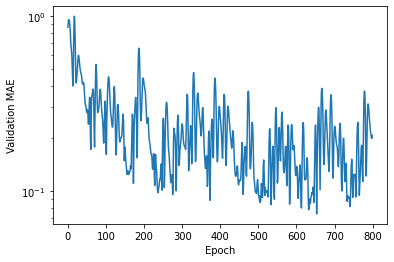

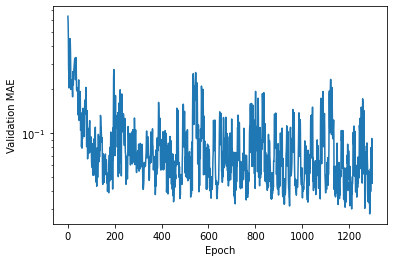

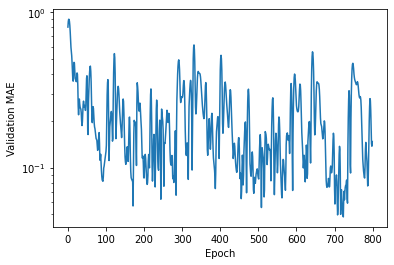

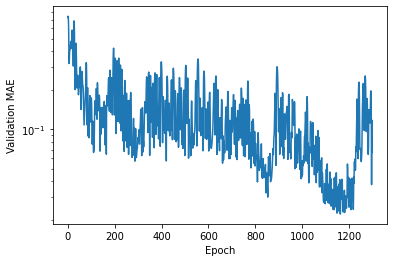

time: 983 ms (started: 2022-08-12 14:42:41 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 11.6 ms (started: 2022-08-12 14:42:42 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 56.3 ms (started: 2022-08-12 14:42:42 +00:00)


In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 771 µs (started: 2022-08-12 14:42:42 +00:00)


0.22247805


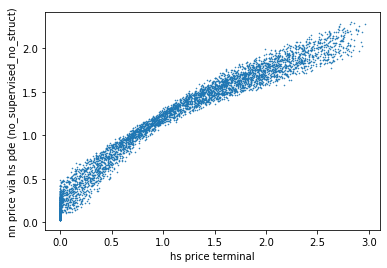

time: 159 ms (started: 2022-08-12 14:42:42 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.21130368634420602


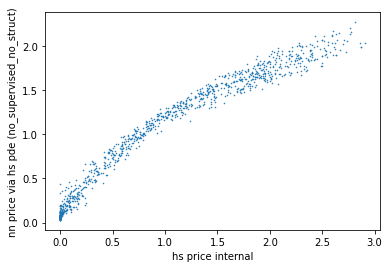

time: 141 ms (started: 2022-08-12 14:42:42 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.06927861


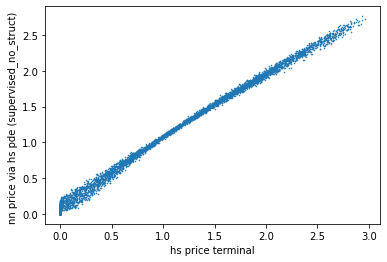

time: 150 ms (started: 2022-08-12 14:42:43 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.07252350100713084


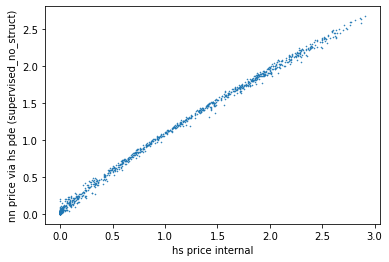

time: 144 ms (started: 2022-08-12 14:42:43 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.15678784


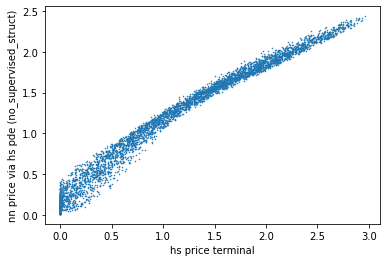

time: 155 ms (started: 2022-08-12 14:42:43 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.1421370785946736


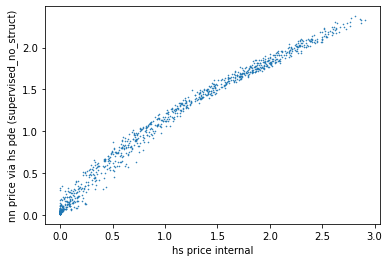

time: 137 ms (started: 2022-08-12 14:42:43 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.08181477


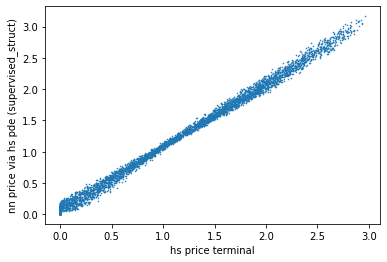

time: 158 ms (started: 2022-08-12 14:42:43 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.07426961162217971


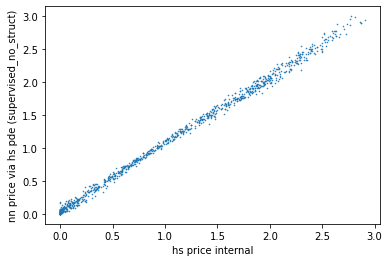

time: 353 ms (started: 2022-08-12 14:42:43 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

#### Test Case European Call - Uniform sampling - ResNet Like - With Stock  Segmentation - ABS Loss


In [ ]:
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
heston_equation.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, key_loss_func=torch.abs)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

# net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net2 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockBase(net2)
heston_equation2.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, key_loss_func=torch.abs)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockBase(net3)
heston_equation3.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, key_loss_func=torch.abs)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockBase(net4)
heston_equation4.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, key_loss_func=torch.abs)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:02<04:03,  2.46s/it]

Epoch 0 - lr 0.001 -  loss: 0.327977088590463 - Terminal loss 0.44670671224594116 - Internal Loss 0.033019449561834335 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:13<04:09,  2.63s/it]

Epoch 4 - lr 0.001 -  loss: 0.07923265919089317 - Terminal loss 0.047929491847753525 - Internal Loss 0.04532779008150101 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:26<03:57,  2.64s/it]

Epoch 9 - lr 0.001 -  loss: 0.06677289389901692 - Terminal loss 0.05933177098631859 - Internal Loss 0.017476476728916168 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:39<03:43,  2.62s/it]

Epoch 14 - lr 0.001 -  loss: 0.12404484467373954 - Terminal loss 0.09293489158153534 - Internal Loss 0.049604471772909164 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:52<03:26,  2.58s/it]

Epoch 19 - lr 0.001 -  loss: 0.07976611331105232 - Terminal loss 0.10727711021900177 - Internal Loss 0.01347251608967781 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:05<03:17,  2.63s/it]

Epoch 24 - lr 0.001 -  loss: 0.09173043072223663 - Terminal loss 0.038135889917612076 - Internal Loss 0.05208933353424072 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [01:18<03:00,  2.59s/it]

Epoch 29 - lr 0.001 -  loss: 0.0736132309668594 - Terminal loss 0.034796129912137985 - Internal Loss 0.048097800463438034 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:31<02:51,  2.64s/it]

Epoch 34 - lr 0.001 -  loss: 0.05586590203973982 - Terminal loss 0.016935067251324654 - Internal Loss 0.0480995737016201 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:44<02:38,  2.65s/it]

Epoch 39 - lr 0.001 -  loss: 0.03406899877720409 - Terminal loss 0.010620660148561 - Internal Loss 0.014478705823421478 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:58<02:24,  2.63s/it]

Epoch 44 - lr 0.001 -  loss: 0.05257753862275018 - Terminal loss 0.03602218255400658 - Internal Loss 0.029231250286102295 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:11<02:12,  2.64s/it]

Epoch 49 - lr 0.001 -  loss: 0.07556585388051139 - Terminal loss 0.022720560431480408 - Internal Loss 0.03256675973534584 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:24<01:58,  2.63s/it]

Epoch 54 - lr 0.001 -  loss: 0.04607017069227166 - Terminal loss 0.00945036020129919 - Internal Loss 0.032912760972976685 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:37<01:43,  2.59s/it]

Epoch 59 - lr 0.001 -  loss: 0.04845816931790776 - Terminal loss 0.028833560645580292 - Internal Loss 0.02254939265549183 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:50<01:32,  2.64s/it]

Epoch 64 - lr 0.001 -  loss: 0.03345432111786471 - Terminal loss 0.01417155284434557 - Internal Loss 0.01119194645434618 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:03<01:17,  2.59s/it]

Epoch 69 - lr 0.001 -  loss: 0.04523926145500607 - Terminal loss 0.02310081385076046 - Internal Loss 0.03375851362943649 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:16<01:05,  2.63s/it]

Epoch 74 - lr 0.001 -  loss: 0.09359435840613312 - Terminal loss 0.12206890434026718 - Internal Loss 0.040289219468832016 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:30<00:52,  2.65s/it]

Epoch 79 - lr 0.001 -  loss: 0.04004065568248431 - Terminal loss 0.014539050869643688 - Internal Loss 0.04050486162304878 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [03:43<00:39,  2.61s/it]

Epoch 84 - lr 0.001 -  loss: 0.03008644375950098 - Terminal loss 0.007340983022004366 - Internal Loss 0.02465301752090454 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [03:56<00:26,  2.65s/it]

Epoch 89 - lr 0.001 -  loss: 0.03314922356771098 - Terminal loss 0.0060393111780285835 - Internal Loss 0.010704181157052517 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:09<00:13,  2.62s/it]

Epoch 94 - lr 0.001 -  loss: 0.022049047673741978 - Terminal loss 0.01251063123345375 - Internal Loss 0.0058450945653021336 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [04:22<00:00,  2.63s/it]


Epoch 99 - lr 0.001 -  loss: 0.04906977857980463 - Terminal loss 0.028027834370732307 - Internal Loss 0.030961528420448303 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:02<04:35,  2.78s/it]

Epoch 0 - lr 0.001 -  loss: 0.2728218976345836 - Terminal loss 0.04707051441073418 - Internal Loss 0.12145520001649857 - Structure Loss 0.0 - Supervised Loss 0.12145457435640515


  5%|▌         | 5/100 [00:14<04:37,  2.92s/it]

Epoch 4 - lr 0.001 -  loss: 0.13706457730390392 - Terminal loss 0.04860685020685196 - Internal Loss 0.042554594576358795 - Structure Loss 0.0 - Supervised Loss 0.04290269223938189


 10%|█         | 10/100 [00:29<04:21,  2.90s/it]

Epoch 9 - lr 0.001 -  loss: 0.08437318578528023 - Terminal loss 0.028042539954185486 - Internal Loss 0.021767981350421906 - Structure Loss 0.0 - Supervised Loss 0.020518902430948695


 15%|█▌        | 15/100 [00:43<04:10,  2.95s/it]

Epoch 14 - lr 0.001 -  loss: 0.08544634096520845 - Terminal loss 0.031302761286497116 - Internal Loss 0.017999913543462753 - Structure Loss 0.0 - Supervised Loss 0.0556490362382782


 20%|██        | 20/100 [00:58<03:54,  2.93s/it]

Epoch 19 - lr 0.001 -  loss: 0.03480796551630185 - Terminal loss 0.004702423233538866 - Internal Loss 0.0055871582590043545 - Structure Loss 0.0 - Supervised Loss 0.01749991898381522


 25%|██▌       | 25/100 [01:13<03:38,  2.91s/it]

Epoch 24 - lr 0.001 -  loss: 0.09747518237453527 - Terminal loss 0.02533372864127159 - Internal Loss 0.01241223979741335 - Structure Loss 0.0 - Supervised Loss 0.0636801340780059


 30%|███       | 30/100 [01:27<03:27,  2.96s/it]

Epoch 29 - lr 0.001 -  loss: 0.08313677320632785 - Terminal loss 0.012544616125524044 - Internal Loss 0.01167440414428711 - Structure Loss 0.0 - Supervised Loss 0.03611633362779911


 35%|███▌      | 35/100 [01:42<03:11,  2.94s/it]

Epoch 34 - lr 0.001 -  loss: 0.09642309193856081 - Terminal loss 0.01974693313241005 - Internal Loss 0.022113719955086708 - Structure Loss 0.0 - Supervised Loss 0.024148643351486296


 40%|████      | 40/100 [01:57<02:55,  2.92s/it]

Epoch 39 - lr 0.001 -  loss: 0.05445396083800781 - Terminal loss 0.00717606907710433 - Internal Loss 0.02197769097983837 - Structure Loss 0.0 - Supervised Loss 0.009164164013357286


 45%|████▌     | 45/100 [02:12<02:43,  2.96s/it]

Epoch 44 - lr 0.001 -  loss: 0.06525550579921564 - Terminal loss 0.03773566707968712 - Internal Loss 0.023608744144439697 - Structure Loss 0.0 - Supervised Loss 0.020853988424754027


 50%|█████     | 50/100 [02:26<02:27,  2.95s/it]

Epoch 49 - lr 0.001 -  loss: 0.037864052985324394 - Terminal loss 0.006691007409244776 - Internal Loss 0.012416679412126541 - Structure Loss 0.0 - Supervised Loss 0.0180779216359113


 55%|█████▌    | 55/100 [02:41<02:11,  2.93s/it]

Epoch 54 - lr 0.001 -  loss: 0.06753575457057677 - Terminal loss 0.01424481999129057 - Internal Loss 0.01250500325113535 - Structure Loss 0.0 - Supervised Loss 0.009944553223437362


 60%|██████    | 60/100 [02:56<01:58,  2.97s/it]

Epoch 59 - lr 0.001 -  loss: 0.06364521654025043 - Terminal loss 0.008684744127094746 - Internal Loss 0.004648288711905479 - Structure Loss 0.0 - Supervised Loss 0.03384608706195355


 65%|██████▌   | 65/100 [03:10<01:43,  2.95s/it]

Epoch 64 - lr 0.001 -  loss: 0.04658219552817756 - Terminal loss 0.0035597323440015316 - Internal Loss 0.014902375638484955 - Structure Loss 0.0 - Supervised Loss 0.016335397396514476


 70%|███████   | 70/100 [03:25<01:27,  2.92s/it]

Epoch 69 - lr 0.001 -  loss: 0.023751353111082917 - Terminal loss 0.010855603031814098 - Internal Loss 0.007097695488482714 - Structure Loss 0.0 - Supervised Loss 0.008048696718141063


 75%|███████▌  | 75/100 [03:40<01:14,  2.97s/it]

Epoch 74 - lr 0.001 -  loss: 0.07644654075792563 - Terminal loss 0.009858876466751099 - Internal Loss 0.015294615179300308 - Structure Loss 0.0 - Supervised Loss 0.01784463812856397


 80%|████████  | 80/100 [03:55<00:59,  2.95s/it]

Epoch 79 - lr 0.001 -  loss: 0.058856889399120906 - Terminal loss 0.02913784049451351 - Internal Loss 0.016642898321151733 - Structure Loss 0.0 - Supervised Loss 0.02737290711083407


 85%|████████▌ | 85/100 [04:09<00:43,  2.92s/it]

Epoch 84 - lr 0.001 -  loss: 0.054316991796961825 - Terminal loss 0.009274087846279144 - Internal Loss 0.007571801543235779 - Structure Loss 0.0 - Supervised Loss 0.009210539702986211


 90%|█████████ | 90/100 [04:24<00:29,  2.97s/it]

Epoch 89 - lr 0.001 -  loss: 0.05350117363332859 - Terminal loss 0.025175046175718307 - Internal Loss 0.015074755065143108 - Structure Loss 0.0 - Supervised Loss 0.027390963551221104


 95%|█████████▌| 95/100 [04:39<00:14,  2.95s/it]

Epoch 94 - lr 0.001 -  loss: 0.04040619740724416 - Terminal loss 0.014517944306135178 - Internal Loss 0.004371339455246925 - Structure Loss 0.0 - Supervised Loss 0.007728547139575881


100%|██████████| 100/100 [04:53<00:00,  2.94s/it]


Epoch 99 - lr 0.001 -  loss: 0.028688055375176824 - Terminal loss 0.004503706935793161 - Internal Loss 0.0076612369157373905 - Structure Loss 0.0 - Supervised Loss 0.009246626966478513


  1%|          | 1/100 [00:02<04:52,  2.95s/it]

Epoch 0 - lr 0.001 -  loss: 0.3208536356687546 - Terminal loss 0.502557635307312 - Internal Loss 0.01771479658782482 - Structure Loss 0.005983995273709297 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:14<04:38,  2.93s/it]

Epoch 4 - lr 0.001 -  loss: 0.11237545063098271 - Terminal loss 0.10431931912899017 - Internal Loss 0.07344695180654526 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:29<04:26,  2.96s/it]

Epoch 9 - lr 0.001 -  loss: 0.17353810204399955 - Terminal loss 0.09932375699281693 - Internal Loss 0.06194056198000908 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:43<04:08,  2.92s/it]

Epoch 14 - lr 0.001 -  loss: 0.1313076615333557 - Terminal loss 0.07076629251241684 - Internal Loss 0.0369909442961216 - Structure Loss 6.896084232721478e-05 - Supervised Loss 0.0


 20%|██        | 20/100 [00:58<03:54,  2.93s/it]

Epoch 19 - lr 0.001 -  loss: 0.1495463272763623 - Terminal loss 0.1032814010977745 - Internal Loss 0.041389066725969315 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:13<03:39,  2.93s/it]

Epoch 24 - lr 0.001 -  loss: 0.05719286513825258 - Terminal loss 0.038166433572769165 - Internal Loss 0.026397516950964928 - Structure Loss 3.5008244481105066e-07 - Supervised Loss 0.0


 30%|███       | 30/100 [01:27<03:24,  2.92s/it]

Epoch 29 - lr 0.001 -  loss: 0.057901914334959455 - Terminal loss 0.044218383729457855 - Internal Loss 0.015255558304488659 - Structure Loss 1.448472914944432e-07 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:42<03:10,  2.94s/it]

Epoch 34 - lr 0.001 -  loss: 0.11014635571175152 - Terminal loss 0.1450178325176239 - Internal Loss 0.040123000741004944 - Structure Loss 2.9741329399257666e-06 - Supervised Loss 0.0


 40%|████      | 40/100 [01:56<02:55,  2.93s/it]

Epoch 39 - lr 0.001 -  loss: 0.05730449346204599 - Terminal loss 0.04348147660493851 - Internal Loss 0.027528848499059677 - Structure Loss 1.994830381590873e-05 - Supervised Loss 0.0


 45%|████▌     | 45/100 [02:11<02:41,  2.94s/it]

Epoch 44 - lr 0.001 -  loss: 0.07983585881690185 - Terminal loss 0.12719443440437317 - Internal Loss 0.03451145067811012 - Structure Loss 8.831016748445109e-05 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:26<02:25,  2.92s/it]

Epoch 49 - lr 0.001 -  loss: 0.051694826119475894 - Terminal loss 0.04684031009674072 - Internal Loss 0.015894675627350807 - Structure Loss 0.00021642667707055807 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:40<02:11,  2.93s/it]

Epoch 54 - lr 0.001 -  loss: 0.06732685729447338 - Terminal loss 0.03001166693866253 - Internal Loss 0.03013121336698532 - Structure Loss 0.000369117537047714 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:55<01:55,  2.88s/it]

Epoch 59 - lr 0.001 -  loss: 0.06050849498973952 - Terminal loss 0.014145070686936378 - Internal Loss 0.03669321909546852 - Structure Loss 4.7960707888705656e-05 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [03:09<01:42,  2.93s/it]

Epoch 64 - lr 0.001 -  loss: 0.06245810455746121 - Terminal loss 0.06349171698093414 - Internal Loss 0.026879683136940002 - Structure Loss 3.604932499001734e-05 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:24<01:26,  2.88s/it]

Epoch 69 - lr 0.001 -  loss: 0.04251479647225804 - Terminal loss 0.02015025168657303 - Internal Loss 0.012518228031694889 - Structure Loss 2.998577656398993e-05 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:39<01:13,  2.93s/it]

Epoch 74 - lr 0.001 -  loss: 0.07393515730897586 - Terminal loss 0.1013520359992981 - Internal Loss 0.016813112422823906 - Structure Loss 3.404060407774523e-05 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:53<00:58,  2.93s/it]

Epoch 79 - lr 0.001 -  loss: 0.04515156988054514 - Terminal loss 0.019986409693956375 - Internal Loss 0.026357261463999748 - Structure Loss 3.694935003295541e-05 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [04:08<00:43,  2.92s/it]

Epoch 84 - lr 0.001 -  loss: 0.05482759481916825 - Terminal loss 0.03801683336496353 - Internal Loss 0.031201211735606194 - Structure Loss 4.946826447849162e-05 - Supervised Loss 0.0


 90%|█████████ | 90/100 [04:22<00:28,  2.88s/it]

Epoch 89 - lr 0.001 -  loss: 0.03481277968320581 - Terminal loss 0.011262592859566212 - Internal Loss 0.028336260467767715 - Structure Loss 0.00041195747326128185 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:37<00:14,  2.92s/it]

Epoch 94 - lr 0.001 -  loss: 0.02704739963842763 - Terminal loss 0.015411789529025555 - Internal Loss 0.008762688376009464 - Structure Loss 3.855622708215378e-05 - Supervised Loss 0.0


100%|██████████| 100/100 [04:51<00:00,  2.92s/it]


Epoch 99 - lr 0.001 -  loss: 0.051173561356133886 - Terminal loss 0.008523200638592243 - Internal Loss 0.02219393663108349 - Structure Loss 1.8019531125901267e-05 - Supervised Loss 0.0


  1%|          | 1/100 [00:03<05:26,  3.30s/it]

Epoch 0 - lr 0.001 -  loss: 0.4506498465816301 - Terminal loss 0.09206502139568329 - Internal Loss 0.0950557142496109 - Structure Loss 0.007834497839212418 - Supervised Loss 0.24451633304642661


  5%|▌         | 5/100 [00:16<05:10,  3.27s/it]

Epoch 4 - lr 0.001 -  loss: 0.1483491707497145 - Terminal loss 0.049586035311222076 - Internal Loss 0.03994160518050194 - Structure Loss 0.00010170554014621302 - Supervised Loss 0.030141686614950994


 10%|█         | 10/100 [00:32<04:53,  3.26s/it]

Epoch 9 - lr 0.001 -  loss: 0.06577894831603748 - Terminal loss 0.005059728864580393 - Internal Loss 0.0810135006904602 - Structure Loss 0.00016343987954314798 - Supervised Loss 0.012179363649836027


 15%|█▌        | 15/100 [00:48<04:35,  3.24s/it]

Epoch 14 - lr 0.001 -  loss: 0.08505362132794271 - Terminal loss 0.058815669268369675 - Internal Loss 0.030201412737369537 - Structure Loss 0.0007143489783629775 - Supervised Loss 0.04064760745779927


 20%|██        | 20/100 [01:05<04:22,  3.28s/it]

Epoch 19 - lr 0.001 -  loss: 0.0944165884848807 - Terminal loss 0.057915687561035156 - Internal Loss 0.025651969015598297 - Structure Loss 0.0 - Supervised Loss 0.030923172108805966


 25%|██▌       | 25/100 [01:21<04:05,  3.27s/it]

Epoch 24 - lr 0.001 -  loss: 0.05559854244805466 - Terminal loss 0.012644476257264614 - Internal Loss 0.01763368956744671 - Structure Loss 7.943269883980975e-05 - Supervised Loss 0.011946504845589696


 30%|███       | 30/100 [01:37<03:47,  3.25s/it]

Epoch 29 - lr 0.001 -  loss: 0.08926856432768879 - Terminal loss 0.024974355474114418 - Internal Loss 0.014603023417294025 - Structure Loss 0.0 - Supervised Loss 0.019907028370317482


 35%|███▌      | 35/100 [01:54<03:33,  3.29s/it]

Epoch 34 - lr 0.001 -  loss: 0.05622792482108489 - Terminal loss 0.02983645722270012 - Internal Loss 0.014712197706103325 - Structure Loss 1.9695605146807793e-08 - Supervised Loss 0.025018690907777565


 40%|████      | 40/100 [02:10<03:15,  3.27s/it]

Epoch 39 - lr 0.001 -  loss: 0.055332076140763166 - Terminal loss 0.02644204907119274 - Internal Loss 0.01580839790403843 - Structure Loss 0.0 - Supervised Loss 0.01202932427122927


 45%|████▌     | 45/100 [02:26<02:58,  3.24s/it]

Epoch 44 - lr 0.001 -  loss: 0.08137149108498161 - Terminal loss 0.021261556074023247 - Internal Loss 0.011280090548098087 - Structure Loss 0.0007427425589412451 - Supervised Loss 0.013589111928981561


 50%|█████     | 50/100 [02:43<02:44,  3.29s/it]

Epoch 49 - lr 0.001 -  loss: 0.041243206366984815 - Terminal loss 0.008376413024961948 - Internal Loss 0.005518338643014431 - Structure Loss 7.27335864212364e-05 - Supervised Loss 0.00859672328576159


 55%|█████▌    | 55/100 [02:59<02:27,  3.27s/it]

Epoch 54 - lr 0.001 -  loss: 0.04251080557500499 - Terminal loss 0.01113711204379797 - Internal Loss 0.01082581002265215 - Structure Loss 0.00026351629639975727 - Supervised Loss 0.01890422653565409


 60%|██████    | 60/100 [03:15<02:09,  3.24s/it]

Epoch 59 - lr 0.001 -  loss: 0.02813079227184439 - Terminal loss 0.009747134521603584 - Internal Loss 0.011103695258498192 - Structure Loss 0.0001527359854662791 - Supervised Loss 0.00863176543868099


 65%|██████▌   | 65/100 [03:32<01:55,  3.29s/it]

Epoch 64 - lr 0.001 -  loss: 0.042141151434840644 - Terminal loss 0.013830483891069889 - Internal Loss 0.017719624564051628 - Structure Loss 0.0003096575092058629 - Supervised Loss 0.011998134378267515


 70%|███████   | 70/100 [03:48<01:38,  3.29s/it]

Epoch 69 - lr 0.001 -  loss: 0.027963170162731678 - Terminal loss 0.013018256984651089 - Internal Loss 0.015562287531793118 - Structure Loss 0.0 - Supervised Loss 0.009176707678310511


 75%|███████▌  | 75/100 [04:04<01:20,  3.23s/it]

Epoch 74 - lr 0.001 -  loss: 0.05282927878561828 - Terminal loss 0.013501795008778572 - Internal Loss 0.02244354598224163 - Structure Loss 0.00027365004643797874 - Supervised Loss 0.012715759250071856


 80%|████████  | 80/100 [04:21<01:05,  3.29s/it]

Epoch 79 - lr 0.001 -  loss: 0.031938530811689174 - Terminal loss 0.0046000671572983265 - Internal Loss 0.014045574702322483 - Structure Loss 0.0 - Supervised Loss 0.01072711367854146


 85%|████████▌ | 85/100 [04:37<00:49,  3.27s/it]

Epoch 84 - lr 0.001 -  loss: 0.033315189243078934 - Terminal loss 0.0026313564740121365 - Internal Loss 0.00967748649418354 - Structure Loss 1.1480685770948185e-06 - Supervised Loss 0.006815445302762726


 90%|█████████ | 90/100 [04:53<00:32,  3.25s/it]

Epoch 89 - lr 0.001 -  loss: 0.020319382658147433 - Terminal loss 0.006846489850431681 - Internal Loss 0.010565579868853092 - Structure Loss 3.8137834053486586e-05 - Supervised Loss 0.007197923814727128


 95%|█████████▌| 95/100 [05:10<00:16,  3.27s/it]

Epoch 94 - lr 0.001 -  loss: 0.029319654065076462 - Terminal loss 0.005156875122338533 - Internal Loss 0.014147642068564892 - Structure Loss 0.0 - Supervised Loss 0.00906056525703861


100%|██████████| 100/100 [05:26<00:00,  3.27s/it]

Epoch 99 - lr 0.001 -  loss: 0.02590262397886754 - Terminal loss 0.011746032163500786 - Internal Loss 0.00690123625099659 - Structure Loss 0.0 - Supervised Loss 0.010304427961128746


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 19min 35s (started: 2022-08-12 14:42:44 +00:00)


In [ ]:
validation_data['heston_analytical_sol'].shape

torch.Size([2000, 1])

time: 2.48 ms (started: 2022-08-12 15:02:19 +00:00)


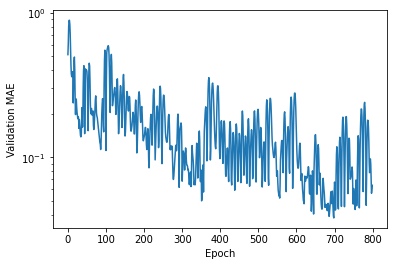

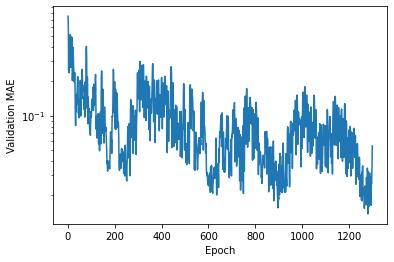

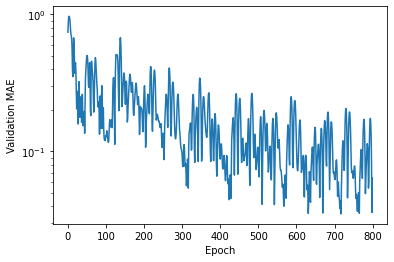

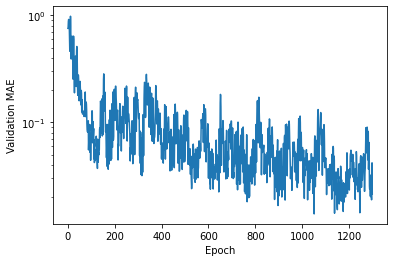

time: 1.03 s (started: 2022-08-12 15:02:19 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

fig,ax = plt.subplots(1)
ax.plot(trainEuss_supervised_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.yscale('log')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

In [ ]:
# input_data = supervised_data['heston_input'].to(torch.device("cuda:0"))
# bs_pred = bs_price( "C", 
#     input_data[:,2].reshape(-1,1), 
#     input_data[:,1].reshape(-1,1), 
#     input_data[:,3].reshape(-1,1) - input_data[:,0].reshape(-1,1), 
#     input_data[:,10].reshape(-1,1)**0.5, 
#     input_data[:,4].reshape(-1,1)
# )
# target = supervised_data['heston_analytical_sol'].to(torch.device("cuda:0"))
# trainEuss_supervised_struct.net.to(torch.device("cuda:0"))
# prediction = trainEuss_supervised_struct.net(input_data.to(torch.device("cuda:0")))

# sol = torch.abs(target - prediction).cpu().detach().numpy()
# sol.mean(), sol.var()
# # np.argmin(sol)

time: 2.39 ms (started: 2022-08-12 15:02:20 +00:00)


In [ ]:
size=5000

S_internals = torch.rand([size, 1]) * 3 
maturity_times = torch.rand([size, 1]) * 1
t_internals = torch.rand([size,1]) * maturity_times
strikes = torch.rand([size, 1]) * 1 
risk_free_rates = torch.rand([size, 1])*0.05
std_dev_of_stocks = torch.rand([size, 1])*0.25
nu_internals = (1. - torch.rand([size, 1])) * 2.
vol_vols = torch.rand([size, 1]) * 0.5
kappas = torch.rand([size, 1]) * 1
rhos = torch.rand([size, 1]) * 0.8
thetas = torch.rand([size, 1]) * 0.15
lamdas = torch.rand([size, 1]) * 0.
xvts = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks), dim = 1 )
xvts_heston = torch.cat(( t_internals , S_internals, strikes, maturity_times, risk_free_rates, std_dev_of_stocks, nu_internals, vol_vols, kappas, rhos, thetas, lamdas), dim = 1 )

u0_terminal = bs_price( "C", strikes, S_internals, maturity_times - t_internals, std_dev_of_stocks, risk_free_rates)
mask = u0_terminal >= 0.

time: 11.5 ms (started: 2022-08-12 15:02:20 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                              nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )



time: 53.9 ms (started: 2022-08-12 15:02:20 +00:00)


In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 12.4 ms (started: 2022-08-12 15:02:20 +00:00)


In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 756 µs (started: 2022-08-12 15:02:20 +00:00)


0.07434101


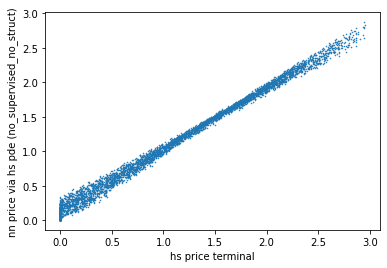

time: 238 ms (started: 2022-08-12 15:02:20 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

In [ ]:
heston_analytical.shape

torch.Size([1000])

time: 3.1 ms (started: 2022-08-12 15:02:21 +00:00)


0.06080111478418397


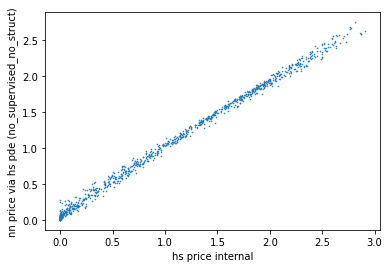

time: 213 ms (started: 2022-08-12 15:02:21 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.076996036


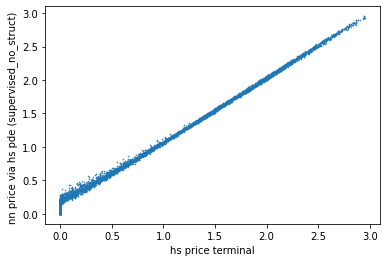

time: 231 ms (started: 2022-08-12 15:02:21 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_no_struct) ')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.07132302295543608


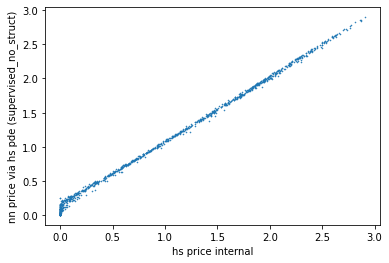

time: 227 ms (started: 2022-08-12 15:02:21 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.072011106


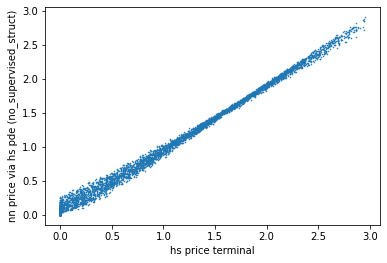

time: 228 ms (started: 2022-08-12 15:02:21 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (no_supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.06500515148528578


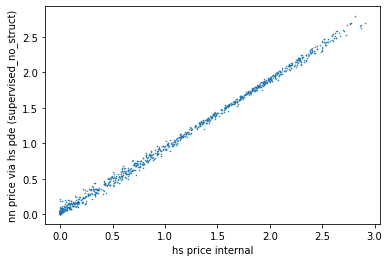

time: 220 ms (started: 2022-08-12 15:02:22 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

0.041308954


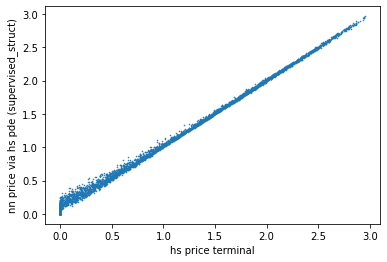

time: 234 ms (started: 2022-08-12 15:02:22 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(u0_terminal[mask]).numpy(), torch.flatten(net_cpu(xvts_heston)[mask]).detach().numpy(), s=.3)
plt.xlabel('hs price terminal')
plt.ylabel('nn price via hs pde (supervised_struct)')
pp(np.mean(np.abs(torch.flatten(u0_terminal).numpy() - torch.flatten(net_cpu(xvts_heston)).detach().numpy())))

0.03411991722704815


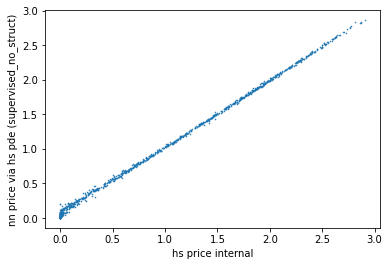

time: 219 ms (started: 2022-08-12 15:02:22 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

In [ ]:
supervised_data['heston_analytical_sol'].shape

torch.Size([5000, 1])

time: 3.32 ms (started: 2022-08-12 15:02:22 +00:00)


### Heston Setup - With Curriculum

#### EuropeanHestonSingleStockCurriculum

In [ ]:
torch.empty(0).cuda().float().numel()

0

time: 6.87 ms (started: 2022-08-15 06:35:15 +00:00)


In [ ]:
class EuropeanHestonSingleStockCurriculum():

    # can handle PiNN by passing supervised_data
    # can handle Structural conditions 
    # (extra boundary conditions based on the problem) by passing apply_structural_loss boolean 
    # (pass a boolean)
    # can handle segmented by setting in xbreaks (which segments the space of the underlying stock )
    # can handle importance sampling on the loss weights by passing a gamma parameter
    
    def __init__(self , net, is_call = True):

        self.C = 0.0           
        self.R = 0.05         # Interest Rate (Yearly)

        self.BS_SIGMA = 0.25  # BS Vol of Stock
        self.SIGMA = 0.25     # Vol of Vol (Yearly)
        self.KAPPA = 0.25     # OU reversion coefficient
        self.THETA = 0.0625   # long term mean of Vol of Vol
        self.RHO  = 0.75      # correlation of Vol and S
        self.LAMBDA = 0.      # the price of risk
        
        self.K = 1.0              # Strike Price 
        self.T = 1.0               # Maturation time (in YEAR)
        
        self.MAX_S = self.K*3.0   # MAX price
        self.MAX_NU = 2.0
        self.MAX_VOLVOL = 0.5
        self.MAX_KAPPA = 1
        self.MAX_RHO = 0.8
        self.MAX_THETA = 0.15

        ## for accept reject purpose!
        ## free boundry problems
        self.net = net
        
        self.is_call = is_call
        self.log_normal_dist = torch.distributions.LogNormal(self.R-self.C, self.BS_SIGMA)
        self.log_normal_dist_5 = torch.distributions.LogNormal(self.R-self.C, self.BS_SIGMA*5.0)

        self.xbreaks = None

    def g(self , x):
        # pay off function - 1 is the stock dimension, 0 is the time dimension
        if self.is_call:
          return torch.max( x[:,1].reshape(-1,1) - x[:,2].reshape(-1,1), torch.zeros([len(x),1]).cuda() ) 
        else:
          return torch.max( x[:,2].reshape(-1,1) - x[:,1].reshape(-1,1) , torch.zeros([len(x),1]).cuda() ) 

    def mu(self, x):
        ## should test it! output dimension is important !
        return (self.R-self.C)*x.reshape(-1,1)

    def sigma(self , x):
        return self.BS_SIGMA*x.reshape(-1,1)

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''        
        # internal samples
        S_internal_values = (1 - torch.rand([size, 1])) * self.MAX_S
        if self.xbreaks is not None:
          if not isinstance(self.xbreaks, list):
            self.xbreaks = np.linspace(0.0, 1.0,self.xbreaks-1).tolist()    
            # default to an evenly sampled space
            # 4 breaks means 3 buckets
          S_internal_values = torch.ones([size, 1])*0.
          for bx in range(len(self.xbreaks)-1): 
            number_per_bucket = int(size/(len(self.xbreaks)-1))           
            start_idx = bx*number_per_bucket
            end_idx = (bx+1)*number_per_bucket
            S_internal_values[start_idx:end_idx,:] = (self.xbreaks[bx] + (1 - torch.rand([number_per_bucket, 1])) * (self.xbreaks[bx+1] - self.xbreaks[bx])) * self.MAX_S

        maturity_time = (1 - torch.rand([size, 1])) * self.T
        t_internal_values = torch.rand([size,1]) * maturity_time
        strike_values = torch.rand([size, 1]) * self.K
        risk_free_rate = torch.rand([size, 1])*self.R
        std_dev_of_stock = (1 - torch.rand([size, 1]))*self.BS_SIGMA
        nu_internal_values = (1 - torch.rand([size, 1])) * self.MAX_NU
        vol_vol_values = (1 - torch.rand([size, 1])) * self.MAX_VOLVOL
        kappa_values = torch.rand([size, 1]) * self.MAX_KAPPA
        rho_values = torch.rand([size, 1]) * self.MAX_RHO
        theta_values = (1 - torch.rand([size, 1])) * self.MAX_THETA
        lamda_values = torch.rand([size, 1]) * self.LAMBDA


        #xvt_internal = self.to_device(torch.cat(( t_internal_values , S_internal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock), dim = 1 ), to_cpu)
        xvt_internal = self.to_device(torch.cat(( t_internal_values , S_internal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock, nu_internal_values, vol_vol_values, kappa_values, rho_values, theta_values, lamda_values), dim = 1 ), to_cpu)

        ### Terminal time samples
        S_terminal_values = (1 - torch.rand([size, 1])) * self.MAX_S
        if self.xbreaks is not None:
          S_terminal_values = torch.ones([size, 1])*0.
          for bx in range(len(self.xbreaks)-1): 
            number_per_bucket = int(size/(len(self.xbreaks)-1))           
            start_idx = bx*number_per_bucket
            end_idx = (bx+1)*number_per_bucket
            S_terminal_values[start_idx:end_idx,:] = (self.xbreaks[bx] + (1 - torch.rand([number_per_bucket, 1])) * (self.xbreaks[bx+1] - self.xbreaks[bx])) * self.MAX_S

        maturity_time = (1 - torch.rand([size, 1])) * self.T
        t_terminal_values = maturity_time
        strike_values = torch.rand([size, 1]) * self.K
        risk_free_rate = torch.rand([size, 1]) * self.R
        std_dev_of_stock = (1 - torch.rand([size, 1])) * self.BS_SIGMA
        nu_terminal_values = (1 - torch.rand([size, 1])) * self.MAX_NU
        vol_vol_values = (1 - torch.rand([size, 1])) * self.MAX_VOLVOL
        kappa_values = torch.rand([size, 1]) * self.MAX_KAPPA
        rho_values = torch.rand([size, 1]) * self.MAX_RHO
        theta_values = (1 - torch.rand([size, 1])) * self.MAX_THETA
        lamda_values = torch.rand([size, 1]) * self.LAMBDA

        #xvt_terminal = self.to_device(torch.cat(( t_terminal_values , S_terminal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock) , dim = 1 ),to_cpu)
        xvt_terminal = self.to_device(torch.cat(( t_terminal_values , S_terminal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock, nu_terminal_values, vol_vol_values, kappa_values, rho_values, theta_values, lamda_values) , dim = 1 ),to_cpu)

        return xvt_internal , xvt_terminal 


    def get_utility_function_derivatives(self, u_net_val, x_internal):

        d = torch.autograd.grad(u_net_val,
                                x_internal, 
                                grad_outputs=torch.ones_like(u_net_val) ,
                                create_graph=True )
        dt  = d[0][:,0].reshape(-1,1)
        dS1 = d[0][:,1].reshape(-1,1)
        dK = d[0][:,2].reshape(-1,1)
        dT = d[0][:,3].reshape(-1,1)
        dv1 = d[0][:, 6].reshape(-1, 1)

        # d2u/dSdS
        dS1S1 = torch.autograd.grad(dS1, 
                                    x_internal, 
                                    grad_outputs=torch.ones_like(dS1),
                                    create_graph = True)[0][:,1].reshape(-1,1)
        # d2u/dvdv
        dv1v1 = torch.autograd.grad(dv1, 
                                    x_internal, 
                                    grad_outputs=torch.ones_like(dv1),
                                    create_graph = True, allow_unused=True)[0][:,6].reshape(-1,1)
        # d2u/dxdv
        dS1v1 = torch.autograd.grad(dS1, 
                                    x_internal, 
                                    grad_outputs=torch.ones_like(dS1),
                                    create_graph = True, allow_unused=True)[0][:,6].reshape(-1,1)
        dK1K1 = torch.autograd.grad(dK, 
                                   x_internal, 
                                   grad_outputs=torch.ones_like(dK),
                                   create_graph = True, allow_unused=True)[0][:,2].reshape(-1,1)
        return dt, dS1, dK, dT, dv1, dS1S1, dv1v1, dS1v1, dK1K1        


    def criterion(self, 
                  x_internal , 
                  x_terminal , 
                  loss_transform = torch.square, 
                  print_val=False, 
                  to_cpu=False, 
                  supervised_data=None,
                  apply_structural_loss = True,
                  gamma=None):

        '''
        Loss function that helps network find solution to equation
        '''   
        
        pred_values = self.net(x_internal)
        # pred_values_pinn = self.net(self.pinn_sample_internal)
        dt, dS1, dK, dT, dv1, dS1S1, dv1v1, dS1v1, dK1K1 = self.get_utility_function_derivatives(pred_values, x_internal)
        
        # pdb.set_trace()

        if loss_transform is None:
          loss_transform = torch.square
        intC = None
        terC = None

        if len(x_internal) == 0:
          intC = torch.empty(0).cuda().float()
        else:
          # pdb.set_trace()
          # x is above the free boundary ( so immediate pay-off is positive )
          # t_internal_values , nu_internal_values, x_internal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock
          time_elapsed = x_internal[:,0].reshape(-1, 1)
          stock_price = x_internal[:,1].reshape(-1, 1)
          strike_price = x_internal[:,2].reshape(-1, 1)
          maturity_years = x_internal[:, 3].reshape(-1, 1)
          risk_free_rate = x_internal[:, 4].reshape(-1, 1)
          std_dev_of_stock = x_internal[:, 5].reshape(-1, 1)
          nu_of_stock = x_internal[:, 6].reshape(-1, 1)
          vol_of_vol_stock = x_internal[:, 7].reshape(-1, 1)
          kappa_values = x_internal[:, 8].reshape(-1, 1)
          rho_values = x_internal[:, 9].reshape(-1, 1)
          theta_values =  x_internal[:, 10].reshape(-1, 1)
          lamda_values =  x_internal[:, 11].reshape(-1, 1)
          
          #std_dev_of_stock = self.BS_SIGMA
          #risk_free_rate = self.R

          time_to_maturity = maturity_years - time_elapsed

          bs_gammas = bs_gamma( strike_price, 
                                 stock_price, 
                                 time_to_maturity,
                                 theta_values ** 0.5,   # need to validate this                               
                                 risk_free_rate)

          #intC_loss_untransformed = dt + 0.5*(std_dev_of_stock**2)*(stock_price**2)*dS1S1 - \
          #                          risk_free_rate*pred_values + \
          #                          risk_free_rate*stock_price*dS1
          
          intC_loss_untransformed = dt + 0.5 * nu_of_stock * stock_price**2 * dS1S1 + \
                                    rho_values * vol_of_vol_stock * nu_of_stock * stock_price * dS1v1 + \
                                    0.5 * vol_of_vol_stock**2 * nu_of_stock * dv1v1 - \
                                    risk_free_rate * pred_values + \
                                    risk_free_rate * stock_price * dS1 + \
                                    ( kappa_values * (theta_values - nu_of_stock) - lamda_values* nu_of_stock ) * dv1 +\
                                    0.5 * (nu_of_stock - theta_values) * stock_price**2 * bs_gammas.detach() # need to validate this

          
          #print('interim', intC_loss_untransformed.shape)
          intC = loss_transform(intC_loss_untransformed) 

          structured_loss = None # constraints are not applied in curriculum learning

          if supervised_data is not None:
            supervised_coef = 1.
            input_heston = supervised_data['heston_input']
            target = supervised_data['heston_analytical_sol']
          
            bs_pred = bs_price( "C", 
                                input_heston[:,2].reshape(-1,1), 
                                input_heston[:,1].reshape(-1,1), 
                                input_heston[:,3].reshape(-1,1) - input_heston[:,0].reshape(-1,1), 
                                input_heston[:,10].reshape(-1,1)**0.5, 
                                input_heston[:,4].reshape(-1,1))

            prediction = bs_pred + self.net(input_heston)
            # prediction = self.net(input_heston)
            supervised_loss = target - prediction
          else:
            supervised_loss =  torch.empty(0).cuda().float()
          #print('super', supervised_loss.shape)
          supervised_loss = loss_transform(supervised_loss)

        # Terminal Condition - should be equal (both in- and out of the money)
        # terC = [ loss_transform( self.g(x_terminal) - self.net(x_terminal) ) for loss_transform in loss_transforms ]
        terC = loss_transform(self.net(x_terminal)) 
        #print('terminal', terC[0].shape)
        return  intC , terC, None, supervised_loss  # zero for structured loss


    def calculateLoss(self, 
                      batch_x, 
                      train = True, 
                      loss_transform = torch.square , 
                      keep_batch = False, 
                      print_val=False, 
                      supervised_data=None, 
                      apply_structural_loss=True,
                      gamma=None):

        '''
        Helper function that Sample and Calculate loss,
        '''        
        # pdb.set_trace()
        x , x_terminal   = batch_x # x_initial# 
        x = Variable(x , requires_grad=True)
        #x_terminal = Variable(x_terminal[torch.multinomial(x[:,0], 128), :] , requires_grad=True)

        Ls = self.criterion( x , x_terminal , loss_transform = loss_transform, print_val=print_val, supervised_data=supervised_data, gamma=gamma, apply_structural_loss = apply_structural_loss) # , x_initial
        intC , terC, _, supervisedLoss = Ls # structuredLoss is irrelevant for Curriculum

        numActive = 2
        has_pinn =  supervisedLoss.numel()>0
        if has_pinn:
          numActive = numActive+1

        if gamma is None:
          return_losses = []
          if not keep_batch:
            loss_equalWeightedByType =  1./numActive*torch.mean(intC) + 1./numActive*torch.mean(terC) 
            if has_pinn:
              loss_equalWeightedByType =  loss_equalWeightedByType + 1./numActive*torch.mean(supervisedLoss)

            return_losses.append( [ loss_equalWeightedByType , 
                                    1./numActive*torch.mean(intC), 
                                    1./numActive*torch.mean(terC),
                                    0.0, # structure loss is irrelevant
                                    1./numActive*torch.mean(supervisedLoss) if has_pinn else 0.0 ] )      
          else:
            return_losses.append( [intC.numpy(), terC.numpy(), 0.0, supervisedLoss.numpy()] )

          return return_losses
        else:
          weights = torch.ones(1,len(Ls)).to(intC.device)/numActive

          intC_max = torch.max(intC).item() # torch.ones_like(intC)*
          terC_max = torch.max(terC).item() # torch.ones_like(terC)*

          return_losses = []
          intCt = weights[0,0] * (1.0/intC.numel() if intC.numel() > 0 else 0.0) * torch.sum( torch.exp(gamma * (intC - intC_max))) 
          terCt = weights[0,1] * (1.0/terC.numel() if terC.numel() > 0 else 0.0) * torch.sum( torch.exp(gamma * (terC - terC_max))) 
          supervisedLosst = torch.ones_like(terCt)*0.
          supervisedLoss_max = 0.0
          if has_pinn:
            supervisedLoss_max = torch.max(supervisedLoss).item() # torch.ones_like(supervisedLoss)*
            supervisedLosst = weights[0,2] * (1.0/supervisedLoss.numel() if supervisedLoss.numel() > 0 else 0.0) * torch.sum(torch.exp(gamma * (supervisedLoss - supervisedLoss_max) )) 


          if not keep_batch:
            transformed_loss = (intC_max + terC_max + supervisedLoss_max) + 1.0/gamma * torch.log(intCt + terCt  + supervisedLosst)
            return_losses.append( [ transformed_loss , 
                                    1./numActive*torch.mean(intCt), 
                                    1./numActive*torch.mean(terCt),
                                    0.0, # structured loss is irrelevant
                                    1./numActive*torch.mean(supervisedLosst)  ] )            
          else:
            return_losses.append( [intCt.numpy(), terCt.numpy(), 0.0, supervisedLosst.numpy()] )
          return return_losses




time: 1.29 s (started: 2022-08-15 06:35:15 +00:00)


### Heston Runs - With Curriculum

#### Test Case With Curriculum European Call - Uniform sampling - Simple DNN - No Segmentation


[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockCurriculum(net2)
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockCurriculum(net3)
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockCurriculum(net4)
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:01<01:57,  1.18s/it]

Epoch 0 - lr 0.001 -  loss: 0.08518958878186014 - Terminal loss 0.001818765653297305 - Internal Loss 0.04105507582426071 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:18,  1.21it/s]

Epoch 4 - lr 0.001 -  loss: 0.03912711888551712 - Terminal loss 8.76347694429569e-05 - Internal Loss 0.04077804833650589 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:08<01:06,  1.35it/s]

Epoch 9 - lr 0.001 -  loss: 0.038821757667594485 - Terminal loss 0.00015606998931616545 - Internal Loss 0.04025004804134369 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:12<01:07,  1.27it/s]

Epoch 14 - lr 0.001 -  loss: 0.03798514252735509 - Terminal loss 0.00028419954469427466 - Internal Loss 0.038883276283741 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:16<01:03,  1.26it/s]

Epoch 19 - lr 0.001 -  loss: 0.037212484826644264 - Terminal loss 0.00026608555344864726 - Internal Loss 0.03776475787162781 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:19<00:58,  1.28it/s]

Epoch 24 - lr 0.001 -  loss: 0.03564279050462776 - Terminal loss 0.0003153266734443605 - Internal Loss 0.035545364022254944 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:23<00:55,  1.25it/s]

Epoch 29 - lr 0.001 -  loss: 0.031758300960063934 - Terminal loss 0.0009542249608784914 - Internal Loss 0.02814752608537674 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:27<00:49,  1.32it/s]

Epoch 34 - lr 0.001 -  loss: 0.02507831984096103 - Terminal loss 0.0007251108763739467 - Internal Loss 0.019180024042725563 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:31<00:47,  1.27it/s]

Epoch 39 - lr 0.001 -  loss: 0.021067683378027544 - Terminal loss 0.0008313993457704782 - Internal Loss 0.014903968200087547 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:35<00:43,  1.26it/s]

Epoch 44 - lr 0.001 -  loss: 0.01871940131402678 - Terminal loss 0.0005772996228188276 - Internal Loss 0.012478775344789028 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:39<00:37,  1.32it/s]

Epoch 49 - lr 0.001 -  loss: 0.017689958214759827 - Terminal loss 0.00040703656850382686 - Internal Loss 0.011265786364674568 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:43<00:35,  1.26it/s]

Epoch 54 - lr 0.001 -  loss: 0.01677229731447167 - Terminal loss 0.00040706852450966835 - Internal Loss 0.01019054464995861 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:47<00:29,  1.34it/s]

Epoch 59 - lr 0.001 -  loss: 0.01553545654233959 - Terminal loss 0.00034108650288544595 - Internal Loss 0.009457563981413841 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:51<00:28,  1.25it/s]

Epoch 64 - lr 0.001 -  loss: 0.015671177456776302 - Terminal loss 0.0003792756178881973 - Internal Loss 0.01051372941583395 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [00:55<00:24,  1.25it/s]

Epoch 69 - lr 0.001 -  loss: 0.013853977072156139 - Terminal loss 0.00028709397884085774 - Internal Loss 0.007822992280125618 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [00:59<00:20,  1.24it/s]

Epoch 74 - lr 0.001 -  loss: 0.013959967427783541 - Terminal loss 0.0003324624558445066 - Internal Loss 0.007371836341917515 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:03<00:15,  1.26it/s]

Epoch 79 - lr 0.001 -  loss: 0.01517755470962988 - Terminal loss 0.00032402435317635536 - Internal Loss 0.012458352372050285 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:07<00:12,  1.25it/s]

Epoch 84 - lr 0.001 -  loss: 0.014924739332248768 - Terminal loss 0.0002816866908688098 - Internal Loss 0.014008447527885437 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:11<00:07,  1.26it/s]

Epoch 89 - lr 0.001 -  loss: 0.01358838084464272 - Terminal loss 0.00028279266552999616 - Internal Loss 0.008715823292732239 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:15<00:04,  1.24it/s]

Epoch 94 - lr 0.001 -  loss: 0.013336090940154262 - Terminal loss 0.0002317228791071102 - Internal Loss 0.01010563038289547 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


Epoch 99 - lr 0.001 -  loss: 0.013002793356362317 - Terminal loss 0.00021775747882202268 - Internal Loss 0.006200714036822319 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:28,  1.12it/s]

Epoch 0 - lr 0.001 -  loss: 0.07457469880137686 - Terminal loss 0.000252535188337788 - Internal Loss 0.03783861920237541 - Structure Loss 0.0 - Supervised Loss 0.00046926324629107763


  5%|▌         | 5/100 [00:04<01:21,  1.17it/s]

Epoch 4 - lr 0.001 -  loss: 0.043743123972390295 - Terminal loss 2.8858956284238957e-05 - Internal Loss 0.037826698273420334 - Structure Loss 0.0 - Supervised Loss 0.000389745799804443


 10%|█         | 10/100 [00:08<01:14,  1.21it/s]

Epoch 9 - lr 0.001 -  loss: 0.043708350846243416 - Terminal loss 3.081464092247188e-05 - Internal Loss 0.037786815315485 - Structure Loss 0.0 - Supervised Loss 0.00038707429775179246


 15%|█▌        | 15/100 [00:12<01:12,  1.17it/s]

Epoch 14 - lr 0.001 -  loss: 0.043433605062506694 - Terminal loss 9.406584285898134e-05 - Internal Loss 0.03732820600271225 - Structure Loss 0.0 - Supervised Loss 0.00037696650182659954


 20%|██        | 20/100 [00:16<01:06,  1.21it/s]

Epoch 19 - lr 0.001 -  loss: 0.04130363424911532 - Terminal loss 0.00017372515867464244 - Internal Loss 0.03429878503084183 - Structure Loss 0.0 - Supervised Loss 0.00029973710693913393


 25%|██▌       | 25/100 [00:20<01:00,  1.24it/s]

Epoch 24 - lr 0.001 -  loss: 0.03935330882254557 - Terminal loss 0.0004755457630380988 - Internal Loss 0.030270909890532494 - Structure Loss 0.0 - Supervised Loss 0.00038745622057525023


 30%|███       | 30/100 [00:24<00:58,  1.19it/s]

Epoch 29 - lr 0.001 -  loss: 0.03321591271910159 - Terminal loss 0.0007637019152753055 - Internal Loss 0.019675053656101227 - Structure Loss 0.0 - Supervised Loss 0.0004423721818366085


 35%|███▌      | 35/100 [00:28<00:53,  1.21it/s]

Epoch 34 - lr 0.001 -  loss: 0.024309546147458005 - Terminal loss 0.00042526875040493906 - Internal Loss 0.013527560979127884 - Structure Loss 0.0 - Supervised Loss 0.00025269714515541023


 40%|████      | 40/100 [00:33<00:48,  1.24it/s]

Epoch 39 - lr 0.001 -  loss: 0.024805741539749435 - Terminal loss 0.0003102906048297882 - Internal Loss 0.015997786074876785 - Structure Loss 0.0 - Supervised Loss 0.00018101457077780925


 45%|████▌     | 45/100 [00:37<00:46,  1.18it/s]

Epoch 44 - lr 0.001 -  loss: 0.02284289692566363 - Terminal loss 0.0002793017483782023 - Internal Loss 0.013184617273509502 - Structure Loss 0.0 - Supervised Loss 0.0001642597695670392


 50%|█████     | 50/100 [00:41<00:41,  1.21it/s]

Epoch 49 - lr 0.001 -  loss: 0.021144969788997877 - Terminal loss 0.00026563944993540645 - Internal Loss 0.011948677711188793 - Structure Loss 0.0 - Supervised Loss 0.00016304041366446028


 55%|█████▌    | 55/100 [00:45<00:36,  1.24it/s]

Epoch 54 - lr 0.001 -  loss: 0.01939345257616432 - Terminal loss 0.00023809386766515672 - Internal Loss 0.009625520557165146 - Structure Loss 0.0 - Supervised Loss 0.0001496206407116346


 60%|██████    | 60/100 [00:49<00:34,  1.17it/s]

Epoch 59 - lr 0.001 -  loss: 0.018467952152562982 - Terminal loss 0.00023414856696035713 - Internal Loss 0.008969094604253769 - Structure Loss 0.0 - Supervised Loss 0.00015015422557492208


 65%|██████▌   | 65/100 [00:53<00:29,  1.20it/s]

Epoch 64 - lr 0.001 -  loss: 0.01794094123438755 - Terminal loss 0.00020424500689841807 - Internal Loss 0.008711593225598335 - Structure Loss 0.0 - Supervised Loss 0.0001344928548587553


 70%|███████   | 70/100 [00:57<00:24,  1.24it/s]

Epoch 69 - lr 0.001 -  loss: 0.017605135186315804 - Terminal loss 0.00020885908452328295 - Internal Loss 0.009294339455664158 - Structure Loss 0.0 - Supervised Loss 0.00013979042649759314


 75%|███████▌  | 75/100 [01:02<00:21,  1.17it/s]

Epoch 74 - lr 0.001 -  loss: 0.018187335344846966 - Terminal loss 0.00014749976980965585 - Internal Loss 0.009717315435409546 - Structure Loss 0.0 - Supervised Loss 0.00011204986451829541


 80%|████████  | 80/100 [01:06<00:16,  1.20it/s]

Epoch 79 - lr 0.001 -  loss: 0.017933282791771355 - Terminal loss 0.00019383869948796928 - Internal Loss 0.00904981791973114 - Structure Loss 0.0 - Supervised Loss 0.0001359063321404791


 85%|████████▌ | 85/100 [01:10<00:12,  1.24it/s]

Epoch 84 - lr 0.001 -  loss: 0.01690991160045765 - Terminal loss 0.00017635557742323726 - Internal Loss 0.00817379355430603 - Structure Loss 0.0 - Supervised Loss 0.00012676244672872591


 90%|█████████ | 90/100 [01:14<00:08,  1.17it/s]

Epoch 89 - lr 0.001 -  loss: 0.016602382575622316 - Terminal loss 0.00014213855320122093 - Internal Loss 0.008572638966143131 - Structure Loss 0.0 - Supervised Loss 0.00011414319789373835


 95%|█████████▌| 95/100 [01:18<00:04,  1.19it/s]

Epoch 94 - lr 0.001 -  loss: 0.019007471585908143 - Terminal loss 0.0001366255892207846 - Internal Loss 0.008816827088594437 - Structure Loss 0.0 - Supervised Loss 0.00011150042356302222


100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 99 - lr 0.001 -  loss: 0.01594280346921529 - Terminal loss 0.00017303941422142088 - Internal Loss 0.0075203790329396725 - Structure Loss 0.0 - Supervised Loss 0.0001340389968774634


  1%|          | 1/100 [00:00<01:21,  1.21it/s]

Epoch 0 - lr 0.001 -  loss: 0.10230344947841433 - Terminal loss 0.00158968276809901 - Internal Loss 0.0767190232872963 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:17,  1.23it/s]

Epoch 4 - lr 0.001 -  loss: 0.043758379502428904 - Terminal loss 4.066216934006661e-05 - Internal Loss 0.07657904922962189 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:07<01:10,  1.28it/s]

Epoch 9 - lr 0.001 -  loss: 0.04371294875939687 - Terminal loss 3.97869007429108e-05 - Internal Loss 0.07652166485786438 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:12<01:08,  1.24it/s]

Epoch 14 - lr 0.001 -  loss: 0.043541589130957924 - Terminal loss 8.401296508964151e-05 - Internal Loss 0.0762186199426651 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:15<00:59,  1.34it/s]

Epoch 19 - lr 0.001 -  loss: 0.04273352482252651 - Terminal loss 0.0002986735780723393 - Internal Loss 0.07489843666553497 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:19<00:59,  1.27it/s]

Epoch 24 - lr 0.001 -  loss: 0.04194360930058691 - Terminal loss 0.0002933150390163064 - Internal Loss 0.07373184710741043 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:23<00:55,  1.26it/s]

Epoch 29 - lr 0.001 -  loss: 0.04091654262608952 - Terminal loss 0.00033802574034780264 - Internal Loss 0.07217000424861908 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:27<00:49,  1.31it/s]

Epoch 34 - lr 0.001 -  loss: 0.03938485495746136 - Terminal loss 0.00040505529614165425 - Internal Loss 0.06973391771316528 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:31<00:48,  1.24it/s]

Epoch 39 - lr 0.001 -  loss: 0.034742790998684034 - Terminal loss 0.0007507637492381036 - Internal Loss 0.06304044276475906 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:35<00:44,  1.24it/s]

Epoch 44 - lr 0.001 -  loss: 0.02846624246901936 - Terminal loss 0.0011428589932620525 - Internal Loss 0.050807517021894455 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:39<00:39,  1.26it/s]

Epoch 49 - lr 0.001 -  loss: 0.02508601753248109 - Terminal loss 0.000847193761728704 - Internal Loss 0.04641414433717728 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:43<00:36,  1.24it/s]

Epoch 54 - lr 0.001 -  loss: 0.023075755271646712 - Terminal loss 0.0006804428412579 - Internal Loss 0.04334747791290283 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:47<00:31,  1.28it/s]

Epoch 59 - lr 0.001 -  loss: 0.024546727331148252 - Terminal loss 0.0005414379411377013 - Internal Loss 0.04534052312374115 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:51<00:28,  1.21it/s]

Epoch 64 - lr 0.001 -  loss: 0.020829187395672005 - Terminal loss 0.0005666078068315983 - Internal Loss 0.038703303784132004 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [00:55<00:24,  1.24it/s]

Epoch 69 - lr 0.001 -  loss: 0.020045328471395705 - Terminal loss 0.0005030403845012188 - Internal Loss 0.038860023021698 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [00:59<00:19,  1.26it/s]

Epoch 74 - lr 0.001 -  loss: 0.019499578616685338 - Terminal loss 0.0004827345837838948 - Internal Loss 0.03502345830202103 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:03<00:16,  1.21it/s]

Epoch 79 - lr 0.001 -  loss: 0.0177809228706691 - Terminal loss 0.0005219265003688633 - Internal Loss 0.031000401824712753 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:07<00:11,  1.31it/s]

Epoch 84 - lr 0.001 -  loss: 0.017684342960516613 - Terminal loss 0.0004047179245389998 - Internal Loss 0.0344901941716671 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:11<00:08,  1.24it/s]

Epoch 89 - lr 0.001 -  loss: 0.018243478300670784 - Terminal loss 0.00035041102091781795 - Internal Loss 0.03089551441371441 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:15<00:04,  1.23it/s]

Epoch 94 - lr 0.001 -  loss: 0.020824029731253784 - Terminal loss 0.0003539245808497071 - Internal Loss 0.033456362783908844 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


Epoch 99 - lr 0.001 -  loss: 0.016649580250183742 - Terminal loss 0.0003412154910620302 - Internal Loss 0.027537083253264427 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:28,  1.11it/s]

Epoch 0 - lr 0.001 -  loss: 0.07255746732426702 - Terminal loss 0.0001350530656054616 - Internal Loss 0.01157864835113287 - Structure Loss 0.0 - Supervised Loss 0.0004203523235082269


  5%|▌         | 5/100 [00:04<01:15,  1.26it/s]

Epoch 4 - lr 0.001 -  loss: 0.037556689373148024 - Terminal loss 1.2365744623821229e-05 - Internal Loss 0.011523581109941006 - Structure Loss 0.0 - Supervised Loss 0.0004050119259303787


 10%|█         | 10/100 [00:08<01:15,  1.20it/s]

Epoch 9 - lr 0.001 -  loss: 0.0375329785677175 - Terminal loss 1.3269020200823434e-05 - Internal Loss 0.011505826376378536 - Structure Loss 0.0 - Supervised Loss 0.00040300926502020784


 15%|█▌        | 15/100 [00:12<01:08,  1.24it/s]

Epoch 14 - lr 0.001 -  loss: 0.0374545508979382 - Terminal loss 2.2715303202858195e-05 - Internal Loss 0.011438485234975815 - Structure Loss 0.0 - Supervised Loss 0.0003928368889973091


 20%|██        | 20/100 [00:16<01:08,  1.16it/s]

Epoch 19 - lr 0.001 -  loss: 0.036276210969291026 - Terminal loss 0.00019967152911704034 - Internal Loss 0.010714485310018063 - Structure Loss 0.0 - Supervised Loss 0.00044566439614892185


 25%|██▌       | 25/100 [00:20<01:02,  1.20it/s]

Epoch 24 - lr 0.001 -  loss: 0.033767028534247026 - Terminal loss 0.00017093399947043508 - Internal Loss 0.00892862118780613 - Structure Loss 0.0 - Supervised Loss 0.00024858721547648023


 30%|███       | 30/100 [00:24<00:56,  1.23it/s]

Epoch 29 - lr 0.001 -  loss: 0.02707151218446849 - Terminal loss 0.0005498811369761825 - Internal Loss 0.007505088113248348 - Structure Loss 0.0 - Supervised Loss 0.00035888799175606183


 35%|███▌      | 35/100 [00:29<00:55,  1.17it/s]

Epoch 34 - lr 0.001 -  loss: 0.02230806505622626 - Terminal loss 0.0003803083091042936 - Internal Loss 0.004571188241243362 - Structure Loss 0.0 - Supervised Loss 0.0001961945928689175


 40%|████      | 40/100 [00:33<00:49,  1.20it/s]

Epoch 39 - lr 0.001 -  loss: 0.01867041628351279 - Terminal loss 0.0004953999887220562 - Internal Loss 0.00412630895152688 - Structure Loss 0.0 - Supervised Loss 0.00028318249760892096


 45%|████▌     | 45/100 [00:37<00:44,  1.24it/s]

Epoch 44 - lr 0.001 -  loss: 0.016662246714190525 - Terminal loss 0.0003915242268703878 - Internal Loss 0.00318527570925653 - Structure Loss 0.0 - Supervised Loss 0.00020877048077061526


 50%|█████     | 50/100 [00:41<00:42,  1.16it/s]

Epoch 49 - lr 0.001 -  loss: 0.016237091404267302 - Terminal loss 0.0003034055989701301 - Internal Loss 0.0027874966617673635 - Structure Loss 0.0 - Supervised Loss 0.0001470813983886925


 55%|█████▌    | 55/100 [00:45<00:37,  1.19it/s]

Epoch 54 - lr 0.001 -  loss: 0.014796850633716344 - Terminal loss 0.00022690196055918932 - Internal Loss 0.0032788198441267014 - Structure Loss 0.0 - Supervised Loss 0.00012220758595222895


 60%|██████    | 60/100 [00:49<00:32,  1.23it/s]

Epoch 59 - lr 0.001 -  loss: 0.01267335965223565 - Terminal loss 0.00023288262309506536 - Internal Loss 0.0028250166215002537 - Structure Loss 0.0 - Supervised Loss 0.00012194446796996501


 65%|██████▌   | 65/100 [00:54<00:30,  1.16it/s]

Epoch 64 - lr 0.001 -  loss: 0.01315066486772204 - Terminal loss 0.00023573165526613593 - Internal Loss 0.003187443595379591 - Structure Loss 0.0 - Supervised Loss 0.00012896545081462696


 70%|███████   | 70/100 [00:58<00:25,  1.18it/s]

Epoch 69 - lr 0.001 -  loss: 0.01998901619503237 - Terminal loss 0.00017114487127400935 - Internal Loss 0.009785622358322144 - Structure Loss 0.0 - Supervised Loss 9.47255250111577e-05


 75%|███████▌  | 75/100 [01:02<00:20,  1.22it/s]

Epoch 74 - lr 0.001 -  loss: 0.018666472313930253 - Terminal loss 0.00023614887322764844 - Internal Loss 0.007102364674210548 - Structure Loss 0.0 - Supervised Loss 0.00012185593306936043


 80%|████████  | 80/100 [01:06<00:17,  1.16it/s]

Epoch 79 - lr 0.001 -  loss: 0.018365463777448587 - Terminal loss 0.00025464355712756515 - Internal Loss 0.0037373313680291176 - Structure Loss 0.0 - Supervised Loss 0.0001296199338575968


 85%|████████▌ | 85/100 [01:11<00:12,  1.17it/s]

Epoch 84 - lr 0.001 -  loss: 0.014622404525922436 - Terminal loss 0.00020584123558364809 - Internal Loss 0.002983512356877327 - Structure Loss 0.0 - Supervised Loss 0.00010474357740237297


 90%|█████████ | 90/100 [01:15<00:08,  1.22it/s]

Epoch 89 - lr 0.001 -  loss: 0.01607386418533072 - Terminal loss 0.00023896910715848207 - Internal Loss 0.0034636983182281256 - Structure Loss 0.0 - Supervised Loss 0.00011796852024445058


 95%|█████████▌| 95/100 [01:19<00:04,  1.15it/s]

Epoch 94 - lr 0.001 -  loss: 0.015283106241653865 - Terminal loss 0.00022334935783874243 - Internal Loss 0.005030122585594654 - Structure Loss 0.0 - Supervised Loss 0.00011329350566427102


100%|██████████| 100/100 [01:23<00:00,  1.19it/s]

Epoch 99 - lr 0.001 -  loss: 0.01264836380868939 - Terminal loss 0.00016609372687526047 - Internal Loss 0.0025511167477816343 - Structure Loss 0.0 - Supervised Loss 8.767441724258657e-05


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 5min 25s (started: 2022-08-12 13:41:08 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )

base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*heston_equation.BS_SIGMA, r))


time: 68.5 ms (started: 2022-08-12 13:46:34 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.013162457288300875


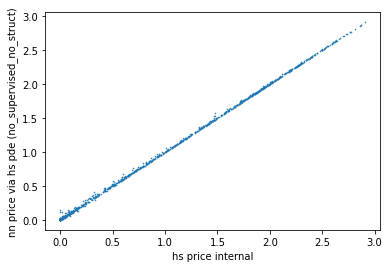

time: 171 ms (started: 2022-08-12 13:46:34 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.014338589211565339


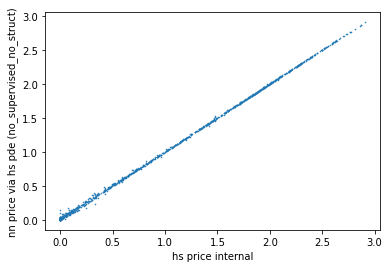

time: 152 ms (started: 2022-08-12 13:46:34 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.016192527545051773


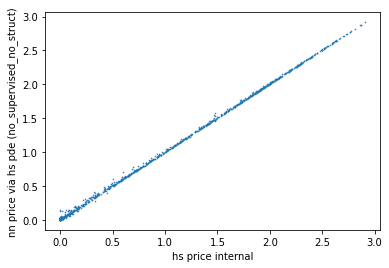

time: 154 ms (started: 2022-08-12 13:46:34 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.010827488179879139


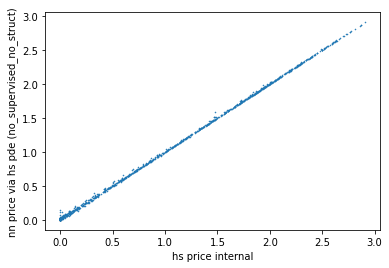

time: 148 ms (started: 2022-08-12 13:46:34 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

#### Test Case With Curriculum European Call - Uniform sampling - ResNet Like - No Segmentation

[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

# net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net2 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockCurriculum(net2)
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockCurriculum(net3)
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockCurriculum(net4)
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:02<04:28,  2.71s/it]

Epoch 0 - lr 0.001 -  loss: 0.060101036810212664 - Terminal loss 2.8664984711213037e-05 - Internal Loss 0.03053775243461132 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:13<04:12,  2.66s/it]

Epoch 4 - lr 0.001 -  loss: 0.039785373542043895 - Terminal loss 0.0005887607112526894 - Internal Loss 0.028036443516612053 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:26<03:58,  2.65s/it]

Epoch 9 - lr 0.001 -  loss: 0.030043812261687383 - Terminal loss 0.00048505031736567616 - Internal Loss 0.017277637496590614 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:39<03:43,  2.63s/it]

Epoch 14 - lr 0.001 -  loss: 0.026356149568325944 - Terminal loss 0.00018715637270361185 - Internal Loss 0.01936189830303192 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:52<03:31,  2.64s/it]

Epoch 19 - lr 0.001 -  loss: 0.022013638272053666 - Terminal loss 0.00027326797135174274 - Internal Loss 0.0164199136197567 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:05<03:15,  2.61s/it]

Epoch 24 - lr 0.001 -  loss: 0.02164859738614824 - Terminal loss 0.00015384356083814055 - Internal Loss 0.011565029621124268 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [01:19<03:04,  2.64s/it]

Epoch 29 - lr 0.001 -  loss: 0.022813718248572614 - Terminal loss 0.00019263423746451735 - Internal Loss 0.018907546997070312 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:32<02:50,  2.62s/it]

Epoch 34 - lr 0.001 -  loss: 0.019519300613966253 - Terminal loss 0.00022509368136525154 - Internal Loss 0.013222705572843552 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:45<02:38,  2.64s/it]

Epoch 39 - lr 0.001 -  loss: 0.018697869239581957 - Terminal loss 0.00013618542288895696 - Internal Loss 0.00940514262765646 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:58<02:25,  2.64s/it]

Epoch 44 - lr 0.001 -  loss: 0.024881826610200934 - Terminal loss 0.00016000273171812296 - Internal Loss 0.01704978756606579 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:11<02:12,  2.64s/it]

Epoch 49 - lr 0.001 -  loss: 0.023146610914005175 - Terminal loss 8.686665387358516e-05 - Internal Loss 0.013886738568544388 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:24<01:59,  2.64s/it]

Epoch 54 - lr 0.001 -  loss: 0.019562677583760686 - Terminal loss 0.00013989424041938037 - Internal Loss 0.009564928710460663 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:37<01:44,  2.60s/it]

Epoch 59 - lr 0.001 -  loss: 0.016536856898003154 - Terminal loss 0.00022113995510153472 - Internal Loss 0.012287374585866928 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:51<01:32,  2.63s/it]

Epoch 64 - lr 0.001 -  loss: 0.01756031785367264 - Terminal loss 7.83042487455532e-05 - Internal Loss 0.011621988378465176 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:04<01:19,  2.65s/it]

Epoch 69 - lr 0.001 -  loss: 0.018632414285093546 - Terminal loss 0.00011980801355093718 - Internal Loss 0.009407442063093185 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:17<01:04,  2.60s/it]

Epoch 74 - lr 0.001 -  loss: 0.021239533709983032 - Terminal loss 0.0003516643773764372 - Internal Loss 0.011769788339734077 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:30<00:52,  2.65s/it]

Epoch 79 - lr 0.001 -  loss: 0.014256778690550063 - Terminal loss 0.00018873604130931199 - Internal Loss 0.011405875906348228 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [03:43<00:38,  2.59s/it]

Epoch 84 - lr 0.001 -  loss: 0.022449851139552064 - Terminal loss 0.00016678478277754039 - Internal Loss 0.014844126999378204 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [03:57<00:26,  2.64s/it]

Epoch 89 - lr 0.001 -  loss: 0.012775269078297747 - Terminal loss 8.268999954452738e-05 - Internal Loss 0.009633594192564487 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:10<00:12,  2.58s/it]

Epoch 94 - lr 0.001 -  loss: 0.02362908133202129 - Terminal loss 0.0003948254161514342 - Internal Loss 0.01752496510744095 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [04:23<00:00,  2.63s/it]


Epoch 99 - lr 0.001 -  loss: 0.01991320639434788 - Terminal loss 0.00017575369565747678 - Internal Loss 0.012122135609388351 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:02<04:56,  2.99s/it]

Epoch 0 - lr 0.001 -  loss: 0.07342195600788201 - Terminal loss 4.745244950754568e-06 - Internal Loss 0.014894872903823853 - Structure Loss 0.0 - Supervised Loss 0.0004101180385318435


  5%|▌         | 5/100 [00:14<04:35,  2.90s/it]

Epoch 4 - lr 0.001 -  loss: 0.04920187690787426 - Terminal loss 0.0001681640715105459 - Internal Loss 0.011828979477286339 - Structure Loss 0.0 - Supervised Loss 0.000274218461905715


 10%|█         | 10/100 [00:29<04:29,  2.99s/it]

Epoch 9 - lr 0.001 -  loss: 0.039200323871121746 - Terminal loss 0.00018123912741430104 - Internal Loss 0.004598849918693304 - Structure Loss 0.0 - Supervised Loss 0.00011821523452879139


 15%|█▌        | 15/100 [00:44<04:12,  2.97s/it]

Epoch 14 - lr 0.001 -  loss: 0.036112419343266824 - Terminal loss 0.00012028837227262557 - Internal Loss 0.005536551587283611 - Structure Loss 0.0 - Supervised Loss 8.964186340742754e-05


 20%|██        | 20/100 [00:59<03:55,  2.95s/it]

Epoch 19 - lr 0.001 -  loss: 0.03454243839535644 - Terminal loss 0.00019215383508708328 - Internal Loss 0.003546622581779957 - Structure Loss 0.0 - Supervised Loss 0.00010304104534806298


 25%|██▌       | 25/100 [01:14<03:43,  2.97s/it]

Epoch 24 - lr 0.001 -  loss: 0.03444974428371694 - Terminal loss 0.00031106287497095764 - Internal Loss 0.00825745053589344 - Structure Loss 0.0 - Supervised Loss 0.00018680929309966966


 30%|███       | 30/100 [01:28<03:27,  2.96s/it]

Epoch 29 - lr 0.001 -  loss: 0.03148401174239828 - Terminal loss 0.00017667919746600091 - Internal Loss 0.0025734305381774902 - Structure Loss 0.0 - Supervised Loss 9.231478010952508e-05


 35%|███▌      | 35/100 [01:43<03:10,  2.93s/it]

Epoch 34 - lr 0.001 -  loss: 0.033131543377554654 - Terminal loss 0.00013521684741135687 - Internal Loss 0.0030302703380584717 - Structure Loss 0.0 - Supervised Loss 6.755621403226182e-05


 40%|████      | 40/100 [01:58<02:58,  2.98s/it]

Epoch 39 - lr 0.001 -  loss: 0.03461893934606489 - Terminal loss 0.00010168903827434406 - Internal Loss 0.005973867140710354 - Structure Loss 0.0 - Supervised Loss 5.612032868479277e-05


 45%|████▌     | 45/100 [02:13<02:42,  2.96s/it]

Epoch 44 - lr 0.001 -  loss: 0.0348633312327733 - Terminal loss 0.00012208560656290501 - Internal Loss 0.0029337198939174414 - Structure Loss 0.0 - Supervised Loss 5.925734292327367e-05


 50%|█████     | 50/100 [02:27<02:27,  2.94s/it]

Epoch 49 - lr 0.001 -  loss: 0.033449866866274554 - Terminal loss 8.002773392945528e-05 - Internal Loss 0.0035761424805969 - Structure Loss 0.0 - Supervised Loss 5.493884858559259e-05


 55%|█████▌    | 55/100 [02:42<02:14,  2.98s/it]

Epoch 54 - lr 0.001 -  loss: 0.03243835751103823 - Terminal loss 0.0003164289519190788 - Internal Loss 0.004698493517935276 - Structure Loss 0.0 - Supervised Loss 0.0001918417251900688


 60%|██████    | 60/100 [02:57<01:58,  2.96s/it]

Epoch 59 - lr 0.001 -  loss: 0.03486401167184143 - Terminal loss 0.00035348508390598 - Internal Loss 0.008146638050675392 - Structure Loss 0.0 - Supervised Loss 0.00029884557545884415


 65%|██████▌   | 65/100 [03:12<01:42,  2.94s/it]

Epoch 64 - lr 0.001 -  loss: 0.03107748932472266 - Terminal loss 0.0001374647836200893 - Internal Loss 0.0041270628571510315 - Structure Loss 0.0 - Supervised Loss 7.992494661621615e-05


 70%|███████   | 70/100 [03:27<01:29,  2.98s/it]

Epoch 69 - lr 0.001 -  loss: 0.035520413850610874 - Terminal loss 9.847329056356102e-05 - Internal Loss 0.003595228074118495 - Structure Loss 0.0 - Supervised Loss 4.721075187303375e-05


 75%|███████▌  | 75/100 [03:42<01:13,  2.96s/it]

Epoch 74 - lr 0.001 -  loss: 0.031759771384602724 - Terminal loss 0.0002063009305857122 - Internal Loss 0.0038233688101172447 - Structure Loss 0.0 - Supervised Loss 0.00011851058223373254


 80%|████████  | 80/100 [03:56<00:58,  2.93s/it]

Epoch 79 - lr 0.001 -  loss: 0.029935044503233355 - Terminal loss 8.184048783732578e-05 - Internal Loss 0.003389922436326742 - Structure Loss 0.0 - Supervised Loss 5.4173952392503754e-05


 85%|████████▌ | 85/100 [04:11<00:44,  2.98s/it]

Epoch 84 - lr 0.001 -  loss: 0.033754322628570976 - Terminal loss 5.400369263952598e-05 - Internal Loss 0.0028663508128374815 - Structure Loss 0.0 - Supervised Loss 4.0679023858870366e-05


 90%|█████████ | 90/100 [04:26<00:29,  2.96s/it]

Epoch 89 - lr 0.001 -  loss: 0.030982065674458072 - Terminal loss 0.00011081748380092904 - Internal Loss 0.002798881847411394 - Structure Loss 0.0 - Supervised Loss 9.92112728351863e-05


 95%|█████████▌| 95/100 [04:41<00:14,  2.94s/it]

Epoch 94 - lr 0.001 -  loss: 0.030937670669939 - Terminal loss 9.292723552789539e-05 - Internal Loss 0.0023909700103104115 - Structure Loss 0.0 - Supervised Loss 5.2235959302407236e-05


100%|██████████| 100/100 [04:56<00:00,  2.96s/it]


Epoch 99 - lr 0.001 -  loss: 0.027522286163459423 - Terminal loss 0.00023269570374395698 - Internal Loss 0.0038361065089702606 - Structure Loss 0.0 - Supervised Loss 0.00014420670043233488


  1%|          | 1/100 [00:02<04:23,  2.67s/it]

Epoch 0 - lr 0.001 -  loss: 0.06256546721690232 - Terminal loss 1.0742088306869846e-05 - Internal Loss 0.10327666997909546 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:13<04:06,  2.59s/it]

Epoch 4 - lr 0.001 -  loss: 0.053942573774192065 - Terminal loss 0.0008657992584630847 - Internal Loss 0.0973808616399765 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:26<03:57,  2.64s/it]

Epoch 9 - lr 0.001 -  loss: 0.0539022781368759 - Terminal loss 0.00033758237259462476 - Internal Loss 0.09555250406265259 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:39<03:41,  2.60s/it]

Epoch 14 - lr 0.001 -  loss: 0.04287519885434045 - Terminal loss 0.000313043623464182 - Internal Loss 0.08493223786354065 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:52<03:31,  2.65s/it]

Epoch 19 - lr 0.001 -  loss: 0.04321156835390462 - Terminal loss 0.00023293342383112758 - Internal Loss 0.08125579357147217 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:05<03:14,  2.59s/it]

Epoch 24 - lr 0.001 -  loss: 0.039879558297495045 - Terminal loss 0.00018892255320679396 - Internal Loss 0.07757933437824249 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [01:18<03:03,  2.62s/it]

Epoch 29 - lr 0.001 -  loss: 0.04259875416755676 - Terminal loss 0.00015552120748907328 - Internal Loss 0.10226815193891525 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:32<02:51,  2.64s/it]

Epoch 34 - lr 0.001 -  loss: 0.03744085660825173 - Terminal loss 0.00021430684137158096 - Internal Loss 0.07677879184484482 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:45<02:37,  2.63s/it]

Epoch 39 - lr 0.001 -  loss: 0.038830007529921 - Terminal loss 0.00018611834093462676 - Internal Loss 0.07450365275144577 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:58<02:25,  2.65s/it]

Epoch 44 - lr 0.001 -  loss: 0.03536380516986052 - Terminal loss 0.00018079797155223787 - Internal Loss 0.07607212662696838 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:11<02:11,  2.63s/it]

Epoch 49 - lr 0.001 -  loss: 0.030416539042360254 - Terminal loss 0.00015758193330839276 - Internal Loss 0.04127144068479538 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:24<01:58,  2.64s/it]

Epoch 54 - lr 0.001 -  loss: 0.03760638181120157 - Terminal loss 0.0002936090459115803 - Internal Loss 0.08308123797178268 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:38<01:46,  2.65s/it]

Epoch 59 - lr 0.001 -  loss: 0.037742649101548724 - Terminal loss 0.000188001140486449 - Internal Loss 0.07926523685455322 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:51<01:31,  2.63s/it]

Epoch 64 - lr 0.001 -  loss: 0.04772648153205713 - Terminal loss 0.00010662444401532412 - Internal Loss 0.08698611706495285 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:04<01:19,  2.64s/it]

Epoch 69 - lr 0.001 -  loss: 0.04666059774657091 - Terminal loss 7.898153853602707e-05 - Internal Loss 0.0837932750582695 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:17<01:05,  2.60s/it]

Epoch 74 - lr 0.001 -  loss: 0.036961938771936625 - Terminal loss 0.00011844407708849758 - Internal Loss 0.0695958361029625 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:30<00:52,  2.64s/it]

Epoch 79 - lr 0.001 -  loss: 0.03761732609321674 - Terminal loss 0.00026379007613286376 - Internal Loss 0.07335318624973297 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [03:43<00:39,  2.63s/it]

Epoch 84 - lr 0.001 -  loss: 0.03985394972066084 - Terminal loss 0.00026099212118424475 - Internal Loss 0.06594111025333405 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [03:56<00:26,  2.65s/it]

Epoch 89 - lr 0.001 -  loss: 0.03580438832028045 - Terminal loss 0.00022154930047690868 - Internal Loss 0.07670833170413971 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:09<00:13,  2.63s/it]

Epoch 94 - lr 0.001 -  loss: 0.03876872826367617 - Terminal loss 0.00018613768042996526 - Internal Loss 0.0742391049861908 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [04:23<00:00,  2.63s/it]


Epoch 99 - lr 0.001 -  loss: 0.04897598197890653 - Terminal loss 0.0003643675590865314 - Internal Loss 0.08773694932460785 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:02<04:56,  2.99s/it]

Epoch 0 - lr 0.001 -  loss: 0.12896732138703762 - Terminal loss 7.740281034784857e-06 - Internal Loss 0.027100589126348495 - Structure Loss 0.0 - Supervised Loss 0.0004118938194205059


  5%|▌         | 5/100 [00:14<04:35,  2.90s/it]

Epoch 4 - lr 0.001 -  loss: 0.04805558153266398 - Terminal loss 1.0109574759553652e-06 - Internal Loss 0.027091939002275467 - Structure Loss 0.0 - Supervised Loss 0.0004275924153172809


 10%|█         | 10/100 [00:29<04:27,  2.97s/it]

Epoch 9 - lr 0.001 -  loss: 0.04737495284662868 - Terminal loss 0.0001914402819238603 - Internal Loss 0.02573314867913723 - Structure Loss 0.0 - Supervised Loss 0.0003853154492351736


 15%|█▌        | 15/100 [00:44<04:11,  2.95s/it]

Epoch 14 - lr 0.001 -  loss: 0.048029737075779844 - Terminal loss 1.5419394685523002e-06 - Internal Loss 0.027063291519880295 - Structure Loss 0.0 - Supervised Loss 0.0004218056612739072


 20%|██        | 20/100 [00:58<03:54,  2.93s/it]

Epoch 19 - lr 0.001 -  loss: 0.04616092266050235 - Terminal loss 0.00039007607847452164 - Internal Loss 0.023710716515779495 - Structure Loss 0.0 - Supervised Loss 0.00045709825382570613


 25%|██▌       | 25/100 [01:13<03:43,  2.98s/it]

Epoch 24 - lr 0.001 -  loss: 0.03303855940686342 - Terminal loss 0.0001585014833835885 - Internal Loss 0.019702386111021042 - Structure Loss 0.0 - Supervised Loss 0.00011353200595656023


 30%|███       | 30/100 [01:28<03:27,  2.96s/it]

Epoch 29 - lr 0.001 -  loss: 0.04305332523546075 - Terminal loss 0.0002459428505972028 - Internal Loss 0.020628411322832108 - Structure Loss 0.0 - Supervised Loss 0.0002321533916640696


 35%|███▌      | 35/100 [01:43<03:10,  2.93s/it]

Epoch 34 - lr 0.001 -  loss: 0.0318799010967181 - Terminal loss 0.00033769343281164765 - Internal Loss 0.01279987208545208 - Structure Loss 0.0 - Supervised Loss 0.0001693046145818995


 40%|████      | 40/100 [01:58<02:59,  2.98s/it]

Epoch 39 - lr 0.001 -  loss: 0.030807322900935356 - Terminal loss 0.0001476831967011094 - Internal Loss 0.01105477474629879 - Structure Loss 0.0 - Supervised Loss 7.703751081767996e-05


 45%|████▌     | 45/100 [02:12<02:42,  2.96s/it]

Epoch 44 - lr 0.001 -  loss: 0.0346893935310413 - Terminal loss 0.00010223730350844562 - Internal Loss 0.013185465708374977 - Structure Loss 0.0 - Supervised Loss 8.523746852981055e-05


 50%|█████     | 50/100 [02:27<02:26,  2.94s/it]

Epoch 49 - lr 0.001 -  loss: 0.028405995271520823 - Terminal loss 0.00013513671001419425 - Internal Loss 0.006952725350856781 - Structure Loss 0.0 - Supervised Loss 6.738591540126307e-05


 55%|█████▌    | 55/100 [02:42<02:14,  2.98s/it]

Epoch 54 - lr 0.001 -  loss: 0.02514916772489185 - Terminal loss 9.696028428152204e-05 - Internal Loss 0.010636790655553341 - Structure Loss 0.0 - Supervised Loss 5.0344135824954045e-05


 60%|██████    | 60/100 [02:57<01:57,  2.95s/it]

Epoch 59 - lr 0.001 -  loss: 0.022174601492181343 - Terminal loss 0.0001366430224152282 - Internal Loss 0.007915662601590157 - Structure Loss 0.0 - Supervised Loss 6.663405155518323e-05


 65%|██████▌   | 65/100 [03:11<01:42,  2.93s/it]

Epoch 64 - lr 0.001 -  loss: 0.021634345010597016 - Terminal loss 0.0001209481997648254 - Internal Loss 0.009734969586133957 - Structure Loss 0.0 - Supervised Loss 6.136772315485166e-05


 70%|███████   | 70/100 [03:26<01:29,  2.97s/it]

Epoch 69 - lr 0.001 -  loss: 0.022556738603796114 - Terminal loss 0.00021487199410330504 - Internal Loss 0.006602311506867409 - Structure Loss 0.0 - Supervised Loss 9.797499726859906e-05


 75%|███████▌  | 75/100 [03:41<01:13,  2.96s/it]

Epoch 74 - lr 0.001 -  loss: 0.024440336761356114 - Terminal loss 0.0001801889156922698 - Internal Loss 0.004731566645205021 - Structure Loss 0.0 - Supervised Loss 8.615951242914495e-05


 80%|████████  | 80/100 [03:56<00:58,  2.94s/it]

Epoch 79 - lr 0.001 -  loss: 0.02069806935185545 - Terminal loss 9.922181925503537e-05 - Internal Loss 0.005302559118717909 - Structure Loss 0.0 - Supervised Loss 5.273797559070661e-05


 85%|████████▌ | 85/100 [04:11<00:44,  2.98s/it]

Epoch 84 - lr 0.001 -  loss: 0.024767010015951055 - Terminal loss 0.0002757108595687896 - Internal Loss 0.007001878693699837 - Structure Loss 0.0 - Supervised Loss 0.00018590693205728265


 90%|█████████ | 90/100 [04:25<00:29,  2.96s/it]

Epoch 89 - lr 0.001 -  loss: 0.022152249721031757 - Terminal loss 5.324140511220321e-05 - Internal Loss 0.012921219691634178 - Structure Loss 0.0 - Supervised Loss 4.7245894492336936e-05


 95%|█████████▌| 95/100 [04:40<00:14,  2.94s/it]

Epoch 94 - lr 0.001 -  loss: 0.01898340264187748 - Terminal loss 0.00011549740884220228 - Internal Loss 0.0045759472995996475 - Structure Loss 0.0 - Supervised Loss 6.931575178069478e-05


100%|██████████| 100/100 [04:55<00:00,  2.96s/it]

Epoch 99 - lr 0.001 -  loss: 0.021125564265833834 - Terminal loss 0.00011272975098108873 - Internal Loss 0.019137375056743622 - Structure Loss 0.0 - Supervised Loss 6.188796985283568e-05


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 18min 38s (started: 2022-08-12 15:02:24 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )

base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*heston_equation.BS_SIGMA, r))


time: 56.4 ms (started: 2022-08-12 15:21:03 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.011942130716514747


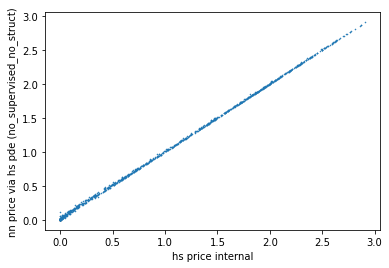

time: 209 ms (started: 2022-08-12 15:21:03 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.01142661279844134


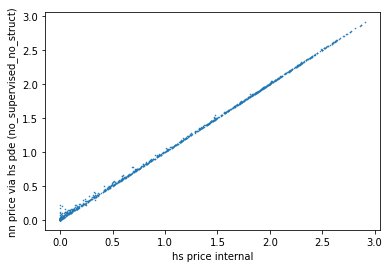

time: 237 ms (started: 2022-08-12 15:21:03 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.013904066808322877


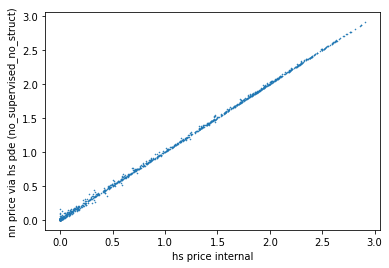

time: 243 ms (started: 2022-08-12 15:21:03 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.007329444530845251


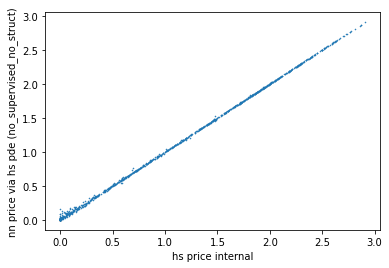

time: 239 ms (started: 2022-08-12 15:21:04 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

#### Test Case With Curriculum European Call - Uniform sampling - Simple DNN - With Stock  Segmentation


[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
heston_equation.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockCurriculum(net2)
heston_equation2.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockCurriculum(net3)
heston_equation3.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockCurriculum(net4)
heston_equation4.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:23,  1.19it/s]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.002829862991347909 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:18,  1.21it/s]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:08<01:11,  1.26it/s]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:11<01:04,  1.32it/s]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:16<01:03,  1.26it/s]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:20<01:00,  1.24it/s]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:23<00:55,  1.25it/s]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:28<00:52,  1.23it/s]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:31<00:47,  1.25it/s]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:35<00:44,  1.23it/s]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:39<00:39,  1.26it/s]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:43<00:35,  1.27it/s]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:47<00:32,  1.23it/s]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:51<00:27,  1.28it/s]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [00:55<00:24,  1.24it/s]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [00:59<00:19,  1.28it/s]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:03<00:14,  1.34it/s]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:07<00:11,  1.25it/s]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:11<00:07,  1.33it/s]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:15<00:04,  1.25it/s]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:28,  1.12it/s]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 6.75196060910821e-05 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.00039399955997040936


  5%|▌         | 5/100 [00:04<01:20,  1.18it/s]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 10%|█         | 10/100 [00:08<01:15,  1.19it/s]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 15%|█▌        | 15/100 [00:12<01:10,  1.20it/s]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 20%|██        | 20/100 [00:16<01:04,  1.23it/s]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 25%|██▌       | 25/100 [00:20<01:00,  1.25it/s]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 30%|███       | 30/100 [00:24<00:59,  1.18it/s]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 35%|███▌      | 35/100 [00:28<00:54,  1.20it/s]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 40%|████      | 40/100 [00:33<00:48,  1.24it/s]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 45%|████▌     | 45/100 [00:37<00:43,  1.25it/s]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 50%|█████     | 50/100 [00:41<00:42,  1.17it/s]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 55%|█████▌    | 55/100 [00:45<00:37,  1.19it/s]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 60%|██████    | 60/100 [00:49<00:33,  1.20it/s]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 65%|██████▌   | 65/100 [00:53<00:28,  1.24it/s]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 70%|███████   | 70/100 [00:57<00:23,  1.26it/s]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 75%|███████▌  | 75/100 [01:02<00:21,  1.17it/s]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 80%|████████  | 80/100 [01:06<00:16,  1.19it/s]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 85%|████████▌ | 85/100 [01:10<00:12,  1.20it/s]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 90%|█████████ | 90/100 [01:14<00:08,  1.23it/s]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 95%|█████████▌| 95/100 [01:18<00:04,  1.24it/s]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


  1%|          | 1/100 [00:00<01:22,  1.20it/s]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.0026542129926383495 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:03<01:11,  1.34it/s]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:07<01:12,  1.24it/s]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:11<01:07,  1.26it/s]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:15<01:05,  1.23it/s]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:19<00:59,  1.26it/s]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:23<00:56,  1.23it/s]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:27<00:51,  1.26it/s]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:31<00:46,  1.30it/s]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:35<00:44,  1.24it/s]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:39<00:38,  1.28it/s]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:43<00:36,  1.24it/s]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:47<00:30,  1.31it/s]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:51<00:28,  1.24it/s]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [00:55<00:23,  1.30it/s]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [00:59<00:20,  1.24it/s]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:03<00:15,  1.26it/s]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:07<00:12,  1.24it/s]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:11<00:07,  1.26it/s]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:15<00:04,  1.23it/s]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:27,  1.13it/s]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.0004782440955750644 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0006592010993055022


  5%|▌         | 5/100 [00:04<01:15,  1.27it/s]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 10%|█         | 10/100 [00:08<01:10,  1.27it/s]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 15%|█▌        | 15/100 [00:12<01:12,  1.18it/s]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 20%|██        | 20/100 [00:16<01:06,  1.20it/s]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 25%|██▌       | 25/100 [00:20<01:00,  1.25it/s]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 30%|███       | 30/100 [00:24<00:55,  1.26it/s]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 35%|███▌      | 35/100 [00:28<00:54,  1.18it/s]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 40%|████      | 40/100 [00:32<00:49,  1.21it/s]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 45%|████▌     | 45/100 [00:37<00:45,  1.21it/s]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 50%|█████     | 50/100 [00:41<00:40,  1.24it/s]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 55%|█████▌    | 55/100 [00:45<00:38,  1.17it/s]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 60%|██████    | 60/100 [00:49<00:33,  1.18it/s]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 65%|██████▌   | 65/100 [00:53<00:29,  1.20it/s]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 70%|███████   | 70/100 [00:57<00:24,  1.23it/s]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 75%|███████▌  | 75/100 [01:01<00:20,  1.24it/s]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 80%|████████  | 80/100 [01:06<00:17,  1.17it/s]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 85%|████████▌ | 85/100 [01:10<00:12,  1.18it/s]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 90%|█████████ | 90/100 [01:14<00:08,  1.20it/s]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 95%|█████████▌| 95/100 [01:18<00:04,  1.24it/s]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


100%|██████████| 100/100 [01:22<00:00,  1.21it/s]

Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 5min 24s (started: 2022-08-12 21:10:21 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )

base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*heston_equation.BS_SIGMA, r))


time: 57.3 ms (started: 2022-08-12 21:15:46 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


nan


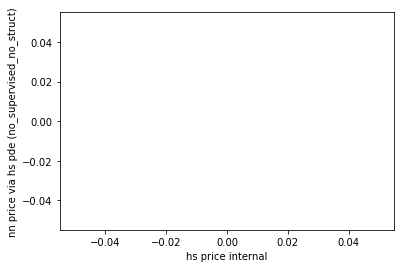

time: 141 ms (started: 2022-08-12 21:15:46 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


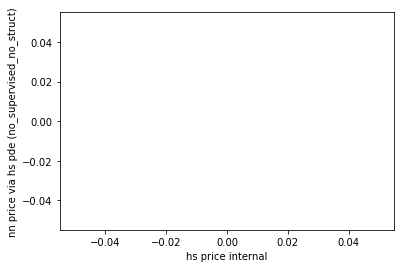

time: 136 ms (started: 2022-08-12 21:15:46 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


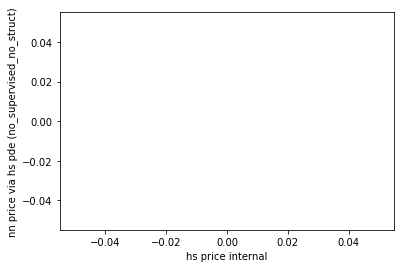

time: 141 ms (started: 2022-08-12 21:15:46 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


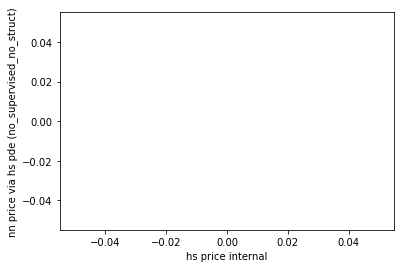

time: 137 ms (started: 2022-08-12 21:15:46 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 656 µs (started: 2022-08-12 21:15:46 +00:00)


#### Test Case With Curriculum European Call - Uniform sampling - ResNet Like - With Stock  Segmentation


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
heston_equation.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

# net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net2 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockCurriculum(net2)
heston_equation2.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockCurriculum(net3)
heston_equation3.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockCurriculum(net4)
heston_equation4.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:02<04:03,  2.46s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 9.419429989065975e-05 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:13<04:10,  2.64s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:26<04:00,  2.67s/it]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:39<03:43,  2.63s/it]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:52<03:27,  2.59s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:05<03:17,  2.63s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [01:18<03:01,  2.60s/it]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:31<02:51,  2.64s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:44<02:36,  2.60s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:57<02:24,  2.64s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:10<02:11,  2.63s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:24<01:58,  2.63s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:37<01:44,  2.62s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:50<01:32,  2.64s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:03<01:18,  2.63s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:16<01:05,  2.61s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:29<00:52,  2.63s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [03:42<00:39,  2.61s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [03:55<00:26,  2.63s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:08<00:13,  2.61s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [04:21<00:00,  2.62s/it]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:02<04:55,  2.98s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 1.3991007108415943e-05 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.00039354197138926424


  5%|▌         | 5/100 [00:14<04:40,  2.95s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 10%|█         | 10/100 [00:29<04:24,  2.94s/it]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 15%|█▌        | 15/100 [00:43<04:09,  2.93s/it]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 20%|██        | 20/100 [00:58<03:52,  2.91s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 25%|██▌       | 25/100 [01:13<03:38,  2.91s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 30%|███       | 30/100 [01:27<03:26,  2.96s/it]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 35%|███▌      | 35/100 [01:42<03:11,  2.95s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 40%|████      | 40/100 [01:57<02:56,  2.94s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 45%|████▌     | 45/100 [02:11<02:39,  2.91s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 50%|█████     | 50/100 [02:26<02:25,  2.92s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 55%|█████▌    | 55/100 [02:41<02:13,  2.96s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 60%|██████    | 60/100 [02:55<01:58,  2.95s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 65%|██████▌   | 65/100 [03:10<01:42,  2.94s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 70%|███████   | 70/100 [03:25<01:27,  2.91s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 75%|███████▌  | 75/100 [03:39<01:12,  2.91s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 80%|████████  | 80/100 [03:54<00:59,  2.96s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 85%|████████▌ | 85/100 [04:09<00:44,  2.95s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 90%|█████████ | 90/100 [04:23<00:29,  2.94s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 95%|█████████▌| 95/100 [04:38<00:14,  2.91s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


100%|██████████| 100/100 [04:53<00:00,  2.93s/it]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


  1%|          | 1/100 [00:02<04:22,  2.65s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 4.129169974476099e-05 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:13<04:11,  2.64s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:26<03:54,  2.60s/it]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:39<03:43,  2.63s/it]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:52<03:28,  2.61s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:05<03:17,  2.63s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [01:18<03:02,  2.60s/it]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:31<02:51,  2.64s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:44<02:36,  2.61s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:57<02:21,  2.57s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:10<02:11,  2.62s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:23<01:55,  2.58s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:37<01:45,  2.63s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:50<01:30,  2.58s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:03<01:18,  2.63s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:16<01:05,  2.61s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:29<00:52,  2.63s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [03:42<00:39,  2.61s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [03:55<00:26,  2.63s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:08<00:13,  2.62s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [04:21<00:00,  2.62s/it]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:02<04:55,  2.98s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 6.577053682121914e-06 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0004078041961349399


  5%|▌         | 5/100 [00:14<04:39,  2.95s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 10%|█         | 10/100 [00:29<04:22,  2.92s/it]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 15%|█▌        | 15/100 [00:43<04:06,  2.90s/it]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 20%|██        | 20/100 [00:58<03:51,  2.90s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 25%|██▌       | 25/100 [01:13<03:41,  2.95s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 30%|███       | 30/100 [01:27<03:25,  2.93s/it]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 35%|███▌      | 35/100 [01:42<03:10,  2.93s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 40%|████      | 40/100 [01:56<02:54,  2.91s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 45%|████▌     | 45/100 [02:11<02:39,  2.89s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 50%|█████     | 50/100 [02:26<02:27,  2.95s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 55%|█████▌    | 55/100 [02:40<02:12,  2.94s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 60%|██████    | 60/100 [02:55<01:57,  2.94s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 65%|██████▌   | 65/100 [03:10<01:41,  2.91s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 70%|███████   | 70/100 [03:24<01:27,  2.90s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 75%|███████▌  | 75/100 [03:39<01:13,  2.95s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 80%|████████  | 80/100 [03:54<00:58,  2.94s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 85%|████████▌ | 85/100 [04:08<00:44,  2.94s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 90%|█████████ | 90/100 [04:23<00:29,  2.91s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 95%|█████████▌| 95/100 [04:38<00:14,  2.90s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


100%|██████████| 100/100 [04:52<00:00,  2.93s/it]

Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 18min 29s (started: 2022-08-12 21:15:46 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )

base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*heston_equation.BS_SIGMA, r))


time: 56.6 ms (started: 2022-08-12 21:34:16 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


nan


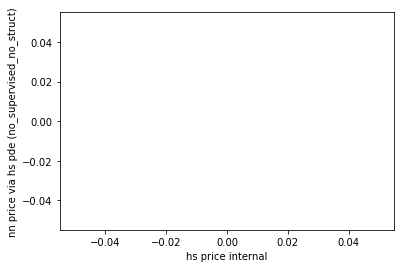

time: 190 ms (started: 2022-08-12 21:34:16 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


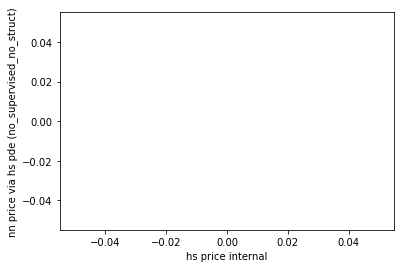

time: 196 ms (started: 2022-08-12 21:34:16 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


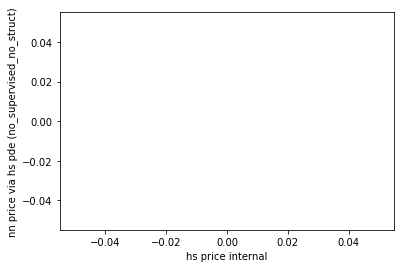

time: 187 ms (started: 2022-08-12 21:34:16 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


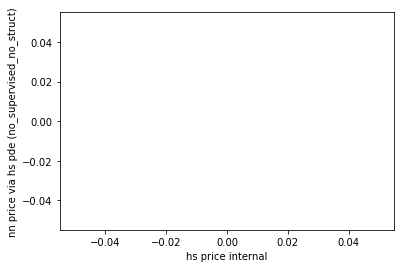

time: 202 ms (started: 2022-08-12 21:34:17 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

#### Test Case With Curriculum European Call - Uniform sampling - Simple DNN - No Segmentation - Loss weight importance Sampling


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma=1.0

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockCurriculum(net2)
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockCurriculum(net3)
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockCurriculum(net4)
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:29,  1.11it/s]

Epoch 0 - lr 0.001 -  loss: 353.05062696668836 - Terminal loss 0.23108920454978943 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:22,  1.15it/s]

Epoch 4 - lr 0.001 -  loss: 351.3667907714844 - Terminal loss 0.2494308054447174 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:08<01:16,  1.17it/s]

Epoch 9 - lr 0.001 -  loss: 351.3629455566406 - Terminal loss 0.24962538480758667 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:12<01:15,  1.13it/s]

Epoch 14 - lr 0.001 -  loss: 351.3622233072917 - Terminal loss 0.24969792366027832 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:17<01:08,  1.17it/s]

Epoch 19 - lr 0.001 -  loss: 351.3611077202691 - Terminal loss 0.24975180625915527 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:21<01:05,  1.15it/s]

Epoch 24 - lr 0.001 -  loss: 351.3598904079861 - Terminal loss 0.24979275465011597 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:25<01:00,  1.16it/s]

Epoch 29 - lr 0.001 -  loss: 351.358647664388 - Terminal loss 0.24982434511184692 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:30<00:56,  1.14it/s]

Epoch 34 - lr 0.001 -  loss: 351.35750495062933 - Terminal loss 0.24984915554523468 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:34<00:51,  1.17it/s]

Epoch 39 - lr 0.001 -  loss: 351.3564690483941 - Terminal loss 0.24986900389194489 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:38<00:44,  1.24it/s]

Epoch 44 - lr 0.001 -  loss: 351.3555043538411 - Terminal loss 0.24988512694835663 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:42<00:43,  1.15it/s]

Epoch 49 - lr 0.001 -  loss: 351.3546651204427 - Terminal loss 0.24989841878414154 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:47<00:40,  1.11it/s]

Epoch 54 - lr 0.001 -  loss: 351.35392083062067 - Terminal loss 0.24990949034690857 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:51<00:34,  1.14it/s]

Epoch 59 - lr 0.001 -  loss: 351.3532426622179 - Terminal loss 0.2499188333749771 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:55<00:30,  1.14it/s]

Epoch 64 - lr 0.001 -  loss: 351.35264078776044 - Terminal loss 0.24992680549621582 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [01:00<00:25,  1.16it/s]

Epoch 69 - lr 0.001 -  loss: 351.35204060872394 - Terminal loss 0.2499336302280426 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:04<00:20,  1.25it/s]

Epoch 74 - lr 0.001 -  loss: 351.3515133327908 - Terminal loss 0.24993956089019775 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:08<00:17,  1.14it/s]

Epoch 79 - lr 0.001 -  loss: 351.3510487874349 - Terminal loss 0.24994471669197083 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:12<00:12,  1.25it/s]

Epoch 84 - lr 0.001 -  loss: 351.35062832302515 - Terminal loss 0.24994926154613495 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:17<00:08,  1.15it/s]

Epoch 89 - lr 0.001 -  loss: 351.3502485487196 - Terminal loss 0.2499532699584961 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:21<00:04,  1.19it/s]

Epoch 94 - lr 0.001 -  loss: 351.3498840332031 - Terminal loss 0.24995681643486023 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:25<00:00,  1.17it/s]


Epoch 99 - lr 0.001 -  loss: 351.34955512152777 - Terminal loss 0.24995997548103333 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:15,  1.31it/s]

Epoch 0 - lr 0.001 -  loss: 362.9789464215034 - Terminal loss 0.11088070273399353 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10262898861292603


  5%|▌         | 5/100 [00:04<01:26,  1.10it/s]

Epoch 4 - lr 0.001 -  loss: 362.75629407522774 - Terminal loss 0.11109507083892822 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10166999618902146


 10%|█         | 10/100 [00:08<01:19,  1.14it/s]

Epoch 9 - lr 0.001 -  loss: 362.75438273860624 - Terminal loss 0.11109708994626999 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10164031894407863


 15%|█▌        | 15/100 [00:13<01:17,  1.10it/s]

Epoch 14 - lr 0.001 -  loss: 362.752487715758 - Terminal loss 0.11109863221645355 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.1016159781714907


 20%|██        | 20/100 [00:17<01:11,  1.11it/s]

Epoch 19 - lr 0.001 -  loss: 362.7505505078058 - Terminal loss 0.11109989881515503 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10159575176402538


 25%|██▌       | 25/100 [00:22<01:04,  1.16it/s]

Epoch 24 - lr 0.001 -  loss: 362.7485964215084 - Terminal loss 0.11110090464353561 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10158005287496136


 30%|███       | 30/100 [00:26<01:01,  1.15it/s]

Epoch 29 - lr 0.001 -  loss: 362.7464861489401 - Terminal loss 0.11110168695449829 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10156857753199523


 35%|███▌      | 35/100 [00:31<01:00,  1.08it/s]

Epoch 34 - lr 0.001 -  loss: 362.7441726922584 - Terminal loss 0.11110228300094604 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10156089607046855


 40%|████      | 40/100 [00:35<00:54,  1.09it/s]

Epoch 39 - lr 0.001 -  loss: 362.74152598245524 - Terminal loss 0.11110275238752365 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10155667115193362


 45%|████▌     | 45/100 [00:40<00:48,  1.14it/s]

Epoch 44 - lr 0.001 -  loss: 362.7383756822687 - Terminal loss 0.1111031025648117 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10155573932680692


 50%|█████     | 50/100 [00:44<00:43,  1.14it/s]

Epoch 49 - lr 0.001 -  loss: 362.7344084570685 - Terminal loss 0.1111033484339714 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10155818391718399


 55%|█████▌    | 55/100 [00:49<00:41,  1.09it/s]

Epoch 54 - lr 0.001 -  loss: 362.7292612008241 - Terminal loss 0.11110351979732513 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10156442509559169


 60%|██████    | 60/100 [00:53<00:36,  1.11it/s]

Epoch 59 - lr 0.001 -  loss: 362.7222786964844 - Terminal loss 0.1111035943031311 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10157542963867057


 65%|██████▌   | 65/100 [00:58<00:30,  1.16it/s]

Epoch 64 - lr 0.001 -  loss: 362.7121514939232 - Terminal loss 0.1111036092042923 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10159311134671459


 70%|███████   | 70/100 [01:02<00:27,  1.10it/s]

Epoch 69 - lr 0.001 -  loss: 362.69644617910546 - Terminal loss 0.11110353469848633 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10162129490886297


 75%|███████▌  | 75/100 [01:07<00:22,  1.12it/s]

Epoch 74 - lr 0.001 -  loss: 362.669336336138 - Terminal loss 0.11110316962003708 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10166825796415657


 80%|████████  | 80/100 [01:11<00:17,  1.13it/s]

Epoch 79 - lr 0.001 -  loss: 362.61414866283195 - Terminal loss 0.11110006272792816 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10175525233999008


 85%|████████▌ | 85/100 [01:16<00:12,  1.16it/s]

Epoch 84 - lr 0.001 -  loss: 362.4611718187811 - Terminal loss 0.1110805794596672 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10195750095209924


 90%|█████████ | 90/100 [01:20<00:09,  1.09it/s]

Epoch 89 - lr 0.001 -  loss: 361.59189137328354 - Terminal loss 0.11085905134677887 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.1027316285969608


 95%|█████████▌| 95/100 [01:25<00:04,  1.09it/s]

Epoch 94 - lr 0.001 -  loss: 362.4457215985096 - Terminal loss 0.11110880225896835 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10139028642634948


100%|██████████| 100/100 [01:29<00:00,  1.11it/s]


Epoch 99 - lr 0.001 -  loss: 362.6993809219435 - Terminal loss 0.11111070215702057 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 0.10128853868715196


  1%|          | 1/100 [00:00<01:30,  1.10it/s]

Epoch 0 - lr 0.001 -  loss: 364.3039720323351 - Terminal loss 0.2398480623960495 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:23,  1.14it/s]

Epoch 4 - lr 0.001 -  loss: 363.1643312242296 - Terminal loss 0.24975968897342682 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:08<01:17,  1.17it/s]

Epoch 9 - lr 0.001 -  loss: 363.1644821166992 - Terminal loss 0.24982447922229767 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:12<01:09,  1.22it/s]

Epoch 14 - lr 0.001 -  loss: 363.1653772989909 - Terminal loss 0.24984493851661682 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:17<01:09,  1.16it/s]

Epoch 19 - lr 0.001 -  loss: 363.16609446207684 - Terminal loss 0.24986273050308228 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:21<01:01,  1.21it/s]

Epoch 24 - lr 0.001 -  loss: 363.16666920979816 - Terminal loss 0.2498781979084015 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:25<01:00,  1.16it/s]

Epoch 29 - lr 0.001 -  loss: 363.1670108371311 - Terminal loss 0.249891459941864 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:29<00:52,  1.24it/s]

Epoch 34 - lr 0.001 -  loss: 363.1672710842556 - Terminal loss 0.24990276992321014 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:34<00:51,  1.17it/s]

Epoch 39 - lr 0.001 -  loss: 363.1674279106988 - Terminal loss 0.24991244077682495 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:38<00:44,  1.24it/s]

Epoch 44 - lr 0.001 -  loss: 363.1675525241428 - Terminal loss 0.24992075562477112 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:42<00:42,  1.16it/s]

Epoch 49 - lr 0.001 -  loss: 363.16761186387805 - Terminal loss 0.24992795288562775 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:46<00:37,  1.19it/s]

Epoch 54 - lr 0.001 -  loss: 363.1676093207465 - Terminal loss 0.24993421137332916 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:51<00:34,  1.16it/s]

Epoch 59 - lr 0.001 -  loss: 363.16763644748266 - Terminal loss 0.2499396950006485 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:55<00:28,  1.24it/s]

Epoch 64 - lr 0.001 -  loss: 363.1676093207465 - Terminal loss 0.2499445080757141 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [00:59<00:25,  1.17it/s]

Epoch 69 - lr 0.001 -  loss: 363.16761779785156 - Terminal loss 0.24994876980781555 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:03<00:20,  1.20it/s]

Epoch 74 - lr 0.001 -  loss: 363.1675796508789 - Terminal loss 0.2499525547027588 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:08<00:17,  1.16it/s]

Epoch 79 - lr 0.001 -  loss: 363.1675203111437 - Terminal loss 0.249955952167511 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:12<00:12,  1.19it/s]

Epoch 84 - lr 0.001 -  loss: 363.1674982706706 - Terminal loss 0.24995900690555573 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:16<00:08,  1.16it/s]

Epoch 89 - lr 0.001 -  loss: 363.1674075656467 - Terminal loss 0.2499617487192154 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:20<00:04,  1.20it/s]

Epoch 94 - lr 0.001 -  loss: 363.16736857096356 - Terminal loss 0.24996420741081238 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


Epoch 99 - lr 0.001 -  loss: 363.1672939724392 - Terminal loss 0.24996647238731384 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:16,  1.30it/s]

Epoch 0 - lr 0.001 -  loss: 247.27877942352 - Terminal loss 0.11083868145942688 - Internal Loss 0.00020110883633606136 - Structure Loss 0.0 - Supervised Loss 0.10211920992858184


  5%|▌         | 5/100 [00:04<01:23,  1.14it/s]

Epoch 4 - lr 0.001 -  loss: 247.25460770612176 - Terminal loss 0.11109194159507751 - Internal Loss 0.0002023395791184157 - Structure Loss 0.0 - Supervised Loss 0.10146976735786652


 10%|█         | 10/100 [00:08<01:16,  1.18it/s]

Epoch 9 - lr 0.001 -  loss: 247.25235253054115 - Terminal loss 0.11109304428100586 - Internal Loss 0.00020238134311512113 - Structure Loss 0.0 - Supervised Loss 0.10146591784537186


 15%|█▌        | 15/100 [00:13<01:17,  1.10it/s]

Epoch 14 - lr 0.001 -  loss: 247.25021324114533 - Terminal loss 0.11109383404254913 - Internal Loss 0.00020242735627107322 - Structure Loss 0.0 - Supervised Loss 0.1014648502181591


 20%|██        | 20/100 [00:17<01:12,  1.11it/s]

Epoch 19 - lr 0.001 -  loss: 247.24782352948165 - Terminal loss 0.11109454929828644 - Internal Loss 0.00020247968495823443 - Structure Loss 0.0 - Supervised Loss 0.10146487604765442


 25%|██▌       | 25/100 [00:22<01:05,  1.14it/s]

Epoch 24 - lr 0.001 -  loss: 247.24519585390826 - Terminal loss 0.11109514534473419 - Internal Loss 0.0002025380963459611 - Structure Loss 0.0 - Supervised Loss 0.10146634744126927


 30%|███       | 30/100 [00:26<01:01,  1.14it/s]

Epoch 29 - lr 0.001 -  loss: 247.24235680501275 - Terminal loss 0.1110956221818924 - Internal Loss 0.0002026036090683192 - Structure Loss 0.0 - Supervised Loss 0.1014695356583081


 35%|███▌      | 35/100 [00:31<01:00,  1.07it/s]

Epoch 34 - lr 0.001 -  loss: 247.23920074717162 - Terminal loss 0.11109595745801926 - Internal Loss 0.00020267878426238894 - Structure Loss 0.0 - Supervised Loss 0.1014746865588247


 40%|████      | 40/100 [00:35<00:55,  1.09it/s]

Epoch 39 - lr 0.001 -  loss: 247.23562048323325 - Terminal loss 0.11109612882137299 - Internal Loss 0.00020276752184145153 - Structure Loss 0.0 - Supervised Loss 0.10148208873805556


 45%|████▌     | 45/100 [00:40<00:49,  1.12it/s]

Epoch 44 - lr 0.001 -  loss: 247.23139036000242 - Terminal loss 0.11109617352485657 - Internal Loss 0.00020287514780648053 - Structure Loss 0.0 - Supervised Loss 0.10149213779273443


 50%|█████     | 50/100 [00:45<00:46,  1.07it/s]

Epoch 49 - lr 0.001 -  loss: 247.22623561189994 - Terminal loss 0.11109604686498642 - Internal Loss 0.0002030110190389678 - Structure Loss 0.0 - Supervised Loss 0.10150542713198903


 55%|█████▌    | 55/100 [00:49<00:41,  1.10it/s]

Epoch 54 - lr 0.001 -  loss: 247.21972472460692 - Terminal loss 0.11109572649002075 - Internal Loss 0.00020318935276009142 - Structure Loss 0.0 - Supervised Loss 0.1015228938548906


 60%|██████    | 60/100 [00:53<00:36,  1.11it/s]

Epoch 59 - lr 0.001 -  loss: 247.21101139940427 - Terminal loss 0.11109518259763718 - Internal Loss 0.00020343431970104575 - Structure Loss 0.0 - Supervised Loss 0.10154610683981699


 65%|██████▌   | 65/100 [00:58<00:32,  1.08it/s]

Epoch 64 - lr 0.001 -  loss: 247.1987724486856 - Terminal loss 0.11109432578086853 - Internal Loss 0.00020379158377181739 - Structure Loss 0.0 - Supervised Loss 0.10157783070890093


 70%|███████   | 70/100 [01:02<00:27,  1.09it/s]

Epoch 69 - lr 0.001 -  loss: 247.18020480417277 - Terminal loss 0.11109169572591782 - Internal Loss 0.0002043542917817831 - Structure Loss 0.0 - Supervised Loss 0.10162335064151692


 75%|███████▌  | 75/100 [01:07<00:22,  1.11it/s]

Epoch 74 - lr 0.001 -  loss: 247.14923385008794 - Terminal loss 0.11108505725860596 - Internal Loss 0.00020533792849164456 - Structure Loss 0.0 - Supervised Loss 0.10169379799746134


 80%|████████  | 80/100 [01:11<00:17,  1.14it/s]

Epoch 79 - lr 0.001 -  loss: 247.0900998637634 - Terminal loss 0.11107209324836731 - Internal Loss 0.00020732868870254606 - Structure Loss 0.0 - Supervised Loss 0.10181559758171288


 85%|████████▌ | 85/100 [01:16<00:14,  1.07it/s]

Epoch 84 - lr 0.001 -  loss: 246.9547383589133 - Terminal loss 0.11102839559316635 - Internal Loss 0.00021227313845884055 - Structure Loss 0.0 - Supervised Loss 0.10206007124923977


 90%|█████████ | 90/100 [01:21<00:09,  1.08it/s]

Epoch 89 - lr 0.001 -  loss: 246.57052456431293 - Terminal loss 0.11088517308235168 - Internal Loss 0.00022851061658002436 - Structure Loss 0.0 - Supervised Loss 0.10264889665885507


 95%|█████████▌| 95/100 [01:25<00:04,  1.11it/s]

Epoch 94 - lr 0.001 -  loss: 245.06080385466407 - Terminal loss 0.11037249863147736 - Internal Loss 0.00033651161356829107 - Structure Loss 0.0 - Supervised Loss 0.10484660968453975


100%|██████████| 100/100 [01:29<00:00,  1.11it/s]

Epoch 99 - lr 0.001 -  loss: 239.2085528574482 - Terminal loss 0.10671290755271912 - Internal Loss 0.0026219007559120655 - Structure Loss 0.0 - Supervised Loss 0.09811464889690069


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 5min 50s (started: 2022-08-12 19:15:11 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )

base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*heston_equation.BS_SIGMA, r))


time: 59.8 ms (started: 2022-08-12 19:21:02 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.01368976010489232


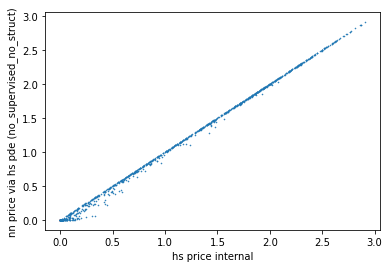

time: 153 ms (started: 2022-08-12 19:21:02 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.013181919536400853


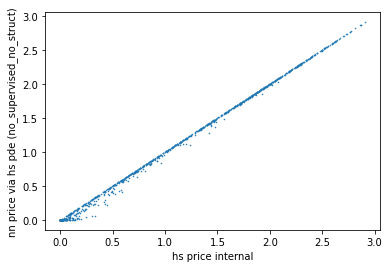

time: 155 ms (started: 2022-08-12 19:21:02 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.013591428437233091


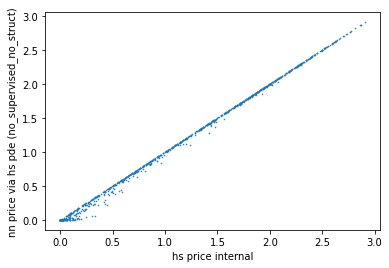

time: 157 ms (started: 2022-08-12 19:21:02 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.013891914242165087


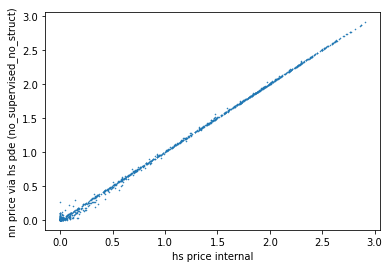

time: 174 ms (started: 2022-08-12 19:21:02 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

#### Test Case With Curriculum European Call - Uniform sampling - ResNet Like - No Segmentation - Loss weight Importance Sampling

[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma = 1.0

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

# net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net2 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockCurriculum(net2)
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockCurriculum(net3)
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockCurriculum(net4)
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:02<04:28,  2.71s/it]

Epoch 0 - lr 0.001 -  loss: 444.09219614664715 - Terminal loss 0.24991287291049957 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:13<04:16,  2.70s/it]

Epoch 4 - lr 0.001 -  loss: 442.71541765001086 - Terminal loss 0.2499965876340866 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:26<03:56,  2.63s/it]

Epoch 9 - lr 0.001 -  loss: 442.71275753445093 - Terminal loss 0.24999740719795227 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:40<03:48,  2.69s/it]

Epoch 14 - lr 0.001 -  loss: 442.7080493503147 - Terminal loss 0.24999748170375824 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:53<03:31,  2.65s/it]

Epoch 19 - lr 0.001 -  loss: 442.7023400200738 - Terminal loss 0.2499973475933075 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:06<03:21,  2.69s/it]

Epoch 24 - lr 0.001 -  loss: 442.695066663954 - Terminal loss 0.2499970644712448 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [01:20<03:05,  2.65s/it]

Epoch 29 - lr 0.001 -  loss: 442.68436516655817 - Terminal loss 0.24999646842479706 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:33<02:53,  2.66s/it]

Epoch 34 - lr 0.001 -  loss: 442.66544172498914 - Terminal loss 0.2499951273202896 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:46<02:38,  2.64s/it]

Epoch 39 - lr 0.001 -  loss: 442.6230748494466 - Terminal loss 0.24999135732650757 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:59<02:24,  2.62s/it]

Epoch 44 - lr 0.001 -  loss: 442.47374471028644 - Terminal loss 0.24997259676456451 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:13<02:12,  2.66s/it]

Epoch 49 - lr 0.001 -  loss: 440.20894622802734 - Terminal loss 0.24832257628440857 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:26<02:01,  2.71s/it]

Epoch 54 - lr 0.001 -  loss: 442.7227545844184 - Terminal loss 0.24999944865703583 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:40<01:47,  2.68s/it]

Epoch 59 - lr 0.001 -  loss: 442.7226087782118 - Terminal loss 0.24999944865703583 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:53<01:33,  2.67s/it]

Epoch 64 - lr 0.001 -  loss: 442.7214762369792 - Terminal loss 0.24999947845935822 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:06<01:19,  2.66s/it]

Epoch 69 - lr 0.001 -  loss: 442.7203089396159 - Terminal loss 0.24999947845935822 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:19<01:06,  2.67s/it]

Epoch 74 - lr 0.001 -  loss: 442.7191374037001 - Terminal loss 0.24999944865703583 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:32<00:52,  2.65s/it]

Epoch 79 - lr 0.001 -  loss: 442.7179175482856 - Terminal loss 0.24999944865703583 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [03:46<00:39,  2.62s/it]

Epoch 84 - lr 0.001 -  loss: 442.71661292182074 - Terminal loss 0.24999941885471344 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [03:59<00:26,  2.66s/it]

Epoch 89 - lr 0.001 -  loss: 442.7151853773329 - Terminal loss 0.24999941885471344 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:12<00:13,  2.62s/it]

Epoch 94 - lr 0.001 -  loss: 442.71355692545575 - Terminal loss 0.24999937415122986 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [04:25<00:00,  2.66s/it]


Epoch 99 - lr 0.001 -  loss: 442.71168348524304 - Terminal loss 0.24999932944774628 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:02<04:41,  2.84s/it]

Epoch 0 - lr 0.001 -  loss: 643.1600309768613 - Terminal loss 0.11110720038414001 - Internal Loss 6.551513070007786e-05 - Structure Loss 0.0 - Supervised Loss 0.1013518093013571


  5%|▌         | 5/100 [00:14<04:42,  2.98s/it]

Epoch 4 - lr 0.001 -  loss: 643.3298734838938 - Terminal loss 0.11111029982566833 - Internal Loss 6.551513797603548e-05 - Structure Loss 0.0 - Supervised Loss 0.10126518379235712


 10%|█         | 10/100 [00:29<04:24,  2.94s/it]

Epoch 9 - lr 0.001 -  loss: 643.2973733832494 - Terminal loss 0.11110886186361313 - Internal Loss 6.551514525199309e-05 - Structure Loss 0.0 - Supervised Loss 0.10135415616283873


 15%|█▌        | 15/100 [00:44<04:09,  2.94s/it]

Epoch 14 - lr 0.001 -  loss: 642.0707868088712 - Terminal loss 0.11077386140823364 - Internal Loss 6.551590922754258e-05 - Structure Loss 0.0 - Supervised Loss 0.10376368723485531


 20%|██        | 20/100 [00:59<03:59,  2.99s/it]

Epoch 19 - lr 0.001 -  loss: 604.9656982209729 - Terminal loss 0.11099046468734741 - Internal Loss 6.551516707986593e-05 - Structure Loss 0.0 - Supervised Loss 0.10132887943254815


 25%|██▌       | 25/100 [01:14<03:43,  2.98s/it]

Epoch 24 - lr 0.001 -  loss: 643.0618481846968 - Terminal loss 0.11110785603523254 - Internal Loss 6.551514525199309e-05 - Structure Loss 0.0 - Supervised Loss 0.10129534185151895


 30%|███       | 30/100 [01:29<03:27,  2.96s/it]

Epoch 29 - lr 0.001 -  loss: 641.7472691231187 - Terminal loss 0.11101411283016205 - Internal Loss 6.551544356625527e-05 - Structure Loss 0.0 - Supervised Loss 0.10204714018986467


 35%|███▌      | 35/100 [01:44<03:15,  3.01s/it]

Epoch 34 - lr 0.001 -  loss: 641.2138435737967 - Terminal loss 0.11110833287239075 - Internal Loss 6.551511614816263e-05 - Structure Loss 0.0 - Supervised Loss 0.1014356468668848


 40%|████      | 40/100 [01:59<02:59,  3.00s/it]

Epoch 39 - lr 0.001 -  loss: 641.9605609789288 - Terminal loss 0.11092104017734528 - Internal Loss 6.551545084221289e-05 - Structure Loss 0.0 - Supervised Loss 0.10234958508803937


 45%|████▌     | 45/100 [02:14<02:43,  2.98s/it]

Epoch 44 - lr 0.001 -  loss: 643.3512937732017 - Terminal loss 0.11111029237508774 - Internal Loss 6.551513797603548e-05 - Structure Loss 0.0 - Supervised Loss 0.10121903423689035


 50%|█████     | 50/100 [02:28<02:28,  2.97s/it]

Epoch 49 - lr 0.001 -  loss: 643.3510293407165 - Terminal loss 0.11111005395650864 - Internal Loss 6.551513797603548e-05 - Structure Loss 0.0 - Supervised Loss 0.10123338861873077


 55%|█████▌    | 55/100 [02:44<02:16,  3.03s/it]

Epoch 54 - lr 0.001 -  loss: 643.3481280850918 - Terminal loss 0.11110987514257431 - Internal Loss 6.551513797603548e-05 - Structure Loss 0.0 - Supervised Loss 0.10124757485883462


 60%|██████    | 60/100 [02:59<02:00,  3.01s/it]

Epoch 59 - lr 0.001 -  loss: 643.3428120359961 - Terminal loss 0.11110954731702805 - Internal Loss 6.551513797603548e-05 - Structure Loss 0.0 - Supervised Loss 0.10127076382541148


 65%|██████▌   | 65/100 [03:14<01:43,  2.97s/it]

Epoch 64 - lr 0.001 -  loss: 643.3317822053853 - Terminal loss 0.11110898852348328 - Internal Loss 6.551514525199309e-05 - Structure Loss 0.0 - Supervised Loss 0.10131515520527118


 70%|███████   | 70/100 [03:29<01:30,  3.01s/it]

Epoch 69 - lr 0.001 -  loss: 643.2975121193688 - Terminal loss 0.11110739409923553 - Internal Loss 6.551516707986593e-05 - Structure Loss 0.0 - Supervised Loss 0.10144068550167068


 75%|███████▌  | 75/100 [03:44<01:14,  2.99s/it]

Epoch 74 - lr 0.001 -  loss: 642.9539096596811 - Terminal loss 0.11107458174228668 - Internal Loss 6.551543629029766e-05 - Structure Loss 0.0 - Supervised Loss 0.1022174798839355


 80%|████████  | 80/100 [03:58<00:59,  3.00s/it]

Epoch 79 - lr 0.001 -  loss: 621.3756887226843 - Terminal loss 0.10127541422843933 - Internal Loss 6.552182458108291e-05 - Structure Loss 0.0 - Supervised Loss 0.10154656198932932


 85%|████████▌ | 85/100 [04:13<00:44,  2.97s/it]

Epoch 84 - lr 0.001 -  loss: 643.115169387568 - Terminal loss 0.1110662966966629 - Internal Loss 6.551514525199309e-05 - Structure Loss 0.0 - Supervised Loss 0.10133284401941042


 90%|█████████ | 90/100 [04:28<00:30,  3.02s/it]

Epoch 89 - lr 0.001 -  loss: 637.207693157531 - Terminal loss 0.10803588479757309 - Internal Loss 6.551604019477963e-05 - Structure Loss 0.0 - Supervised Loss 0.1052475397928545


 95%|█████████▌| 95/100 [04:43<00:14,  2.99s/it]

Epoch 94 - lr 0.001 -  loss: 642.6534362805154 - Terminal loss 0.11109551042318344 - Internal Loss 6.551519618369639e-05 - Structure Loss 0.0 - Supervised Loss 0.10149981486864529


100%|██████████| 100/100 [04:58<00:00,  2.99s/it]


Epoch 99 - lr 0.001 -  loss: 643.1120537674752 - Terminal loss 0.11111046373844147 - Internal Loss 6.551514525199309e-05 - Structure Loss 0.0 - Supervised Loss 0.10123128742442827


  1%|          | 1/100 [00:02<04:25,  2.68s/it]

Epoch 0 - lr 0.001 -  loss: 887.4442121717665 - Terminal loss 0.24999313056468964 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:13<04:13,  2.67s/it]

Epoch 4 - lr 0.001 -  loss: 888.1498158772787 - Terminal loss 0.24999955296516418 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:26<03:58,  2.65s/it]

Epoch 9 - lr 0.001 -  loss: 888.1174799601237 - Terminal loss 0.24999907612800598 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:39<03:42,  2.62s/it]

Epoch 14 - lr 0.001 -  loss: 887.0930285983616 - Terminal loss 0.24985527992248535 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:53<03:33,  2.66s/it]

Epoch 19 - lr 0.001 -  loss: 888.163227505154 - Terminal loss 0.2499997764825821 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:06<03:16,  2.62s/it]

Epoch 24 - lr 0.001 -  loss: 888.1615820990669 - Terminal loss 0.2499997764825821 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [01:19<03:06,  2.66s/it]

Epoch 29 - lr 0.001 -  loss: 888.1582556830513 - Terminal loss 0.2499997764825821 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:32<02:50,  2.62s/it]

Epoch 34 - lr 0.001 -  loss: 888.1536042955187 - Terminal loss 0.2499997317790985 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:45<02:36,  2.60s/it]

Epoch 39 - lr 0.001 -  loss: 888.1466530693901 - Terminal loss 0.24999967217445374 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:59<02:25,  2.65s/it]

Epoch 44 - lr 0.001 -  loss: 888.1341230604384 - Terminal loss 0.24999958276748657 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:12<02:12,  2.66s/it]

Epoch 49 - lr 0.001 -  loss: 888.1040471394857 - Terminal loss 0.24999922513961792 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:25<01:59,  2.65s/it]

Epoch 54 - lr 0.001 -  loss: 887.9677946302626 - Terminal loss 0.24999529123306274 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:38<01:46,  2.66s/it]

Epoch 59 - lr 0.001 -  loss: 869.8903452555338 - Terminal loss 0.24221301078796387 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:52<01:32,  2.65s/it]

Epoch 64 - lr 0.001 -  loss: 888.1709501478407 - Terminal loss 0.24999992549419403 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:05<01:18,  2.63s/it]

Epoch 69 - lr 0.001 -  loss: 888.1697658962673 - Terminal loss 0.24999992549419403 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:18<01:06,  2.66s/it]

Epoch 74 - lr 0.001 -  loss: 888.1681832207573 - Terminal loss 0.24999992549419403 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:31<00:52,  2.65s/it]

Epoch 79 - lr 0.001 -  loss: 888.1662182278103 - Terminal loss 0.24999992549419403 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [03:45<00:40,  2.67s/it]

Epoch 84 - lr 0.001 -  loss: 888.1633097330729 - Terminal loss 0.24999989569187164 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [03:58<00:26,  2.64s/it]

Epoch 89 - lr 0.001 -  loss: 888.1563296847874 - Terminal loss 0.24999986588954926 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:11<00:13,  2.67s/it]

Epoch 94 - lr 0.001 -  loss: 888.1424255371094 - Terminal loss 0.2499997317790985 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [04:24<00:00,  2.65s/it]


Epoch 99 - lr 0.001 -  loss: 888.1185904608833 - Terminal loss 0.2499995082616806 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:03<04:58,  3.01s/it]

Epoch 0 - lr 0.001 -  loss: 419.25148072650524 - Terminal loss 0.11110421270132065 - Internal Loss 6.551707338076085e-05 - Structure Loss 0.0 - Supervised Loss 0.10140057786898238


  5%|▌         | 5/100 [00:14<04:36,  2.91s/it]

Epoch 4 - lr 0.001 -  loss: 418.59921139232847 - Terminal loss 0.11111041903495789 - Internal Loss 6.551708793267608e-05 - Structure Loss 0.0 - Supervised Loss 0.10125096933035335


 10%|█         | 10/100 [00:29<04:28,  2.98s/it]

Epoch 9 - lr 0.001 -  loss: 418.59858293793417 - Terminal loss 0.11111028492450714 - Internal Loss 6.551708793267608e-05 - Structure Loss 0.0 - Supervised Loss 0.10126326705303096


 15%|█▌        | 15/100 [00:44<04:13,  2.98s/it]

Epoch 14 - lr 0.001 -  loss: 418.59686561229836 - Terminal loss 0.11110993474721909 - Internal Loss 6.551708793267608e-05 - Structure Loss 0.0 - Supervised Loss 0.10128894780555195


 20%|██        | 20/100 [00:59<03:59,  2.99s/it]

Epoch 19 - lr 0.001 -  loss: 418.58947335662464 - Terminal loss 0.11110904067754745 - Internal Loss 6.551708793267608e-05 - Structure Loss 0.0 - Supervised Loss 0.10134780389498407


 25%|██▌       | 25/100 [01:13<03:41,  2.95s/it]

Epoch 24 - lr 0.001 -  loss: 418.56390124764374 - Terminal loss 0.11110559105873108 - Internal Loss 6.551708793267608e-05 - Structure Loss 0.0 - Supervised Loss 0.10148087071041414


 30%|███       | 30/100 [01:28<03:25,  2.94s/it]

Epoch 29 - lr 0.001 -  loss: 418.3612301496473 - Terminal loss 0.11108221858739853 - Internal Loss 6.551718979608268e-05 - Structure Loss 0.0 - Supervised Loss 0.10196415466392984


 35%|███▌      | 35/100 [01:43<03:14,  2.99s/it]

Epoch 34 - lr 0.001 -  loss: 416.00106317332995 - Terminal loss 0.11054570972919464 - Internal Loss 6.551775732077658e-05 - Structure Loss 0.0 - Supervised Loss 0.10663503369264628


 40%|████      | 40/100 [01:58<02:58,  2.97s/it]

Epoch 39 - lr 0.001 -  loss: 408.6974757481224 - Terminal loss 0.10594354569911957 - Internal Loss 6.551518163178116e-05 - Structure Loss 0.0 - Supervised Loss 0.1042592323494292


 45%|████▌     | 45/100 [02:13<02:42,  2.95s/it]

Epoch 44 - lr 0.001 -  loss: 411.6286895351249 - Terminal loss 0.10932102054357529 - Internal Loss 6.551757542183623e-05 - Structure Loss 0.0 - Supervised Loss 0.10695811971924991


 50%|█████     | 50/100 [02:28<02:26,  2.94s/it]

Epoch 49 - lr 0.001 -  loss: 391.6065684344832 - Terminal loss 0.096412293612957 - Internal Loss 0.00011757864558603615 - Structure Loss 0.0 - Supervised Loss 0.09964539910100026


 55%|█████▌    | 55/100 [02:43<02:15,  3.02s/it]

Epoch 54 - lr 0.001 -  loss: 415.99189556570946 - Terminal loss 0.11100009083747864 - Internal Loss 6.551702244905755e-05 - Structure Loss 0.0 - Supervised Loss 0.1035310711037285


 60%|██████    | 60/100 [02:58<01:59,  2.99s/it]

Epoch 59 - lr 0.001 -  loss: 398.85295235681895 - Terminal loss 0.09756045788526535 - Internal Loss 6.551944534294307e-05 - Structure Loss 0.0 - Supervised Loss 0.09638890885149994


 65%|██████▌   | 65/100 [03:12<01:43,  2.94s/it]

Epoch 64 - lr 0.001 -  loss: 416.1883252745966 - Terminal loss 0.11110808700323105 - Internal Loss 6.551701517309994e-05 - Structure Loss 0.0 - Supervised Loss 0.10148464267626167


 70%|███████   | 70/100 [03:27<01:28,  2.95s/it]

Epoch 69 - lr 0.001 -  loss: 416.9177093539319 - Terminal loss 0.1110929399728775 - Internal Loss 6.551590922754258e-05 - Structure Loss 0.0 - Supervised Loss 0.10229882461202039


 75%|███████▌  | 75/100 [03:42<01:14,  2.99s/it]

Epoch 74 - lr 0.001 -  loss: 418.2303997122 - Terminal loss 0.11109088361263275 - Internal Loss 6.55172043479979e-05 - Structure Loss 0.0 - Supervised Loss 0.10158798431797929


 80%|████████  | 80/100 [03:57<00:59,  2.97s/it]

Epoch 79 - lr 0.001 -  loss: 416.5258531922723 - Terminal loss 0.1108013316988945 - Internal Loss 6.55174590065144e-05 - Structure Loss 0.0 - Supervised Loss 0.10357571132340726


 85%|████████▌ | 85/100 [04:12<00:44,  2.95s/it]

Epoch 84 - lr 0.001 -  loss: 409.15754993604116 - Terminal loss 0.1107863038778305 - Internal Loss 6.551526894327253e-05 - Structure Loss 0.0 - Supervised Loss 0.10438058121362276


 90%|█████████ | 90/100 [04:27<00:29,  2.99s/it]

Epoch 89 - lr 0.001 -  loss: 418.48789298445246 - Terminal loss 0.11111005395650864 - Internal Loss 6.5517051552888e-05 - Structure Loss 0.0 - Supervised Loss 0.10133118701386298


 95%|█████████▌| 95/100 [04:42<00:14,  2.99s/it]

Epoch 94 - lr 0.001 -  loss: 418.39792516031383 - Terminal loss 0.11110784113407135 - Internal Loss 6.551702972501516e-05 - Structure Loss 0.0 - Supervised Loss 0.10146933107862832


100%|██████████| 100/100 [04:56<00:00,  2.97s/it]

Epoch 99 - lr 0.001 -  loss: 417.7703675329675 - Terminal loss 0.1110628992319107 - Internal Loss 6.551695696543902e-05 - Structure Loss 0.0 - Supervised Loss 0.10229027150751131


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 18min 46s (started: 2022-08-12 19:39:11 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )

base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*heston_equation.BS_SIGMA, r))


time: 56.1 ms (started: 2022-08-12 19:57:57 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.012744928772784636


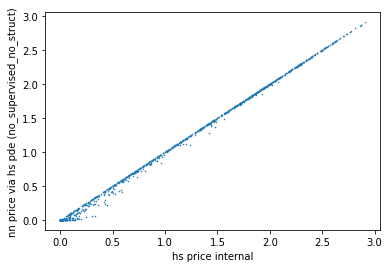

time: 213 ms (started: 2022-08-12 19:57:57 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.012785407003258191


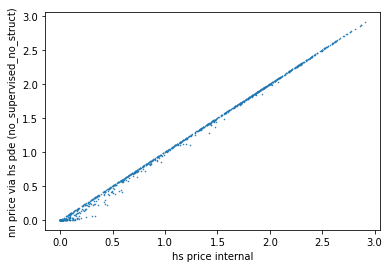

time: 212 ms (started: 2022-08-12 19:57:58 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.012654113651330122


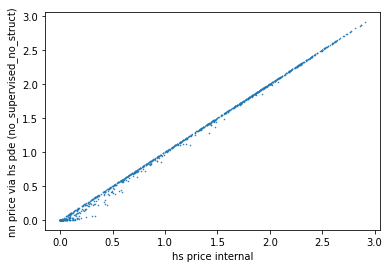

time: 227 ms (started: 2022-08-12 19:57:58 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.01497519217167521


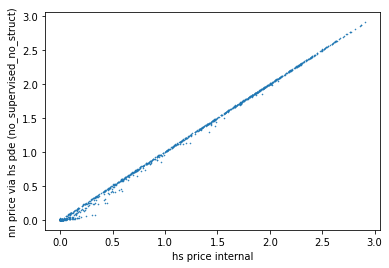

time: 245 ms (started: 2022-08-12 19:57:58 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

#### Test Case With Curriculum European Call - Uniform sampling - Simple DNN - No Segmentation - Loss weight importance Sampling - ABS Loss


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma=1.0

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, 
                                        lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma,
                                        key_loss_func = torch.abs)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockCurriculum(net2)
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockCurriculum(net3)
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockCurriculum(net4)
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:22,  1.19it/s]

Epoch 0 - lr 0.001 -  loss: 15.77780130174425 - Terminal loss 0.21033139526844025 - Internal Loss 3.311617547296919e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:20,  1.18it/s]

Epoch 4 - lr 0.001 -  loss: 15.492835256788466 - Terminal loss 0.249236062169075 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:08<01:12,  1.23it/s]

Epoch 9 - lr 0.001 -  loss: 15.49201446109348 - Terminal loss 0.24961721897125244 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:12<01:05,  1.31it/s]

Epoch 14 - lr 0.001 -  loss: 15.491768413119846 - Terminal loss 0.24972836673259735 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:16<01:04,  1.24it/s]

Epoch 19 - lr 0.001 -  loss: 15.49162154727512 - Terminal loss 0.24979667365550995 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:19<00:56,  1.32it/s]

Epoch 24 - lr 0.001 -  loss: 15.49152586195204 - Terminal loss 0.24984200298786163 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:24<00:56,  1.24it/s]

Epoch 29 - lr 0.001 -  loss: 15.491459634568956 - Terminal loss 0.24987351894378662 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:27<00:51,  1.26it/s]

Epoch 34 - lr 0.001 -  loss: 15.491411526997885 - Terminal loss 0.2498963624238968 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:32<00:49,  1.22it/s]

Epoch 39 - lr 0.001 -  loss: 15.491376029120552 - Terminal loss 0.24991340935230255 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:36<00:44,  1.25it/s]

Epoch 44 - lr 0.001 -  loss: 15.491348266601562 - Terminal loss 0.24992652237415314 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:40<00:40,  1.23it/s]

Epoch 49 - lr 0.001 -  loss: 15.491326226128471 - Terminal loss 0.24993683397769928 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:43<00:35,  1.25it/s]

Epoch 54 - lr 0.001 -  loss: 15.491309377882216 - Terminal loss 0.24994507431983948 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:47<00:30,  1.30it/s]

Epoch 59 - lr 0.001 -  loss: 15.491294225056967 - Terminal loss 0.2499518096446991 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:51<00:28,  1.23it/s]

Epoch 64 - lr 0.001 -  loss: 15.49128246307373 - Terminal loss 0.2499573528766632 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [00:55<00:23,  1.29it/s]

Epoch 69 - lr 0.001 -  loss: 15.491271866692436 - Terminal loss 0.2499620020389557 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [00:59<00:20,  1.24it/s]

Epoch 74 - lr 0.001 -  loss: 15.491263389587402 - Terminal loss 0.24996593594551086 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:03<00:15,  1.29it/s]

Epoch 79 - lr 0.001 -  loss: 15.491255654229057 - Terminal loss 0.24996928870677948 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:07<00:11,  1.33it/s]

Epoch 84 - lr 0.001 -  loss: 15.491249720255533 - Terminal loss 0.2499721497297287 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:11<00:08,  1.24it/s]

Epoch 89 - lr 0.001 -  loss: 15.49124378628201 - Terminal loss 0.24997463822364807 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:16<00:04,  1.22it/s]

Epoch 94 - lr 0.001 -  loss: 15.491238805982801 - Terminal loss 0.24997682869434357 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:19<00:00,  1.25it/s]


Epoch 99 - lr 0.001 -  loss: 15.491234143575033 - Terminal loss 0.24997872114181519 - Internal Loss 3.3119045838247985e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:31,  1.09it/s]

Epoch 0 - lr 0.001 -  loss: 14.038737376160526 - Terminal loss 0.11006730794906616 - Internal Loss 8.99750302778557e-05 - Structure Loss 0.0 - Supervised Loss 0.08411569015511201


  5%|▌         | 5/100 [00:04<01:18,  1.21it/s]

Epoch 4 - lr 0.001 -  loss: 13.812570575853757 - Terminal loss 0.11105531454086304 - Internal Loss 8.997044642455876e-05 - Structure Loss 0.0 - Supervised Loss 0.08288688580392753


 10%|█         | 10/100 [00:08<01:13,  1.23it/s]

Epoch 9 - lr 0.001 -  loss: 13.812138931013804 - Terminal loss 0.11107700318098068 - Internal Loss 8.997044642455876e-05 - Structure Loss 0.0 - Supervised Loss 0.08283845237282719


 15%|█▌        | 15/100 [00:12<01:14,  1.13it/s]

Epoch 14 - lr 0.001 -  loss: 13.811945010566388 - Terminal loss 0.11108821630477905 - Internal Loss 8.997040276881307e-05 - Structure Loss 0.0 - Supervised Loss 0.08281650000117374


 20%|██        | 20/100 [00:17<01:08,  1.16it/s]

Epoch 19 - lr 0.001 -  loss: 13.811837960281725 - Terminal loss 0.11109473556280136 - Internal Loss 8.997035911306739e-05 - Structure Loss 0.0 - Supervised Loss 0.08280457237992607


 25%|██▌       | 25/100 [00:21<01:01,  1.22it/s]

Epoch 24 - lr 0.001 -  loss: 13.811772801074468 - Terminal loss 0.11109881848096848 - Internal Loss 8.997035911306739e-05 - Structure Loss 0.0 - Supervised Loss 0.08279731787998354


 30%|███       | 30/100 [00:25<00:56,  1.24it/s]

Epoch 29 - lr 0.001 -  loss: 13.811729939331135 - Terminal loss 0.11110153794288635 - Internal Loss 8.997033000923693e-05 - Structure Loss 0.0 - Supervised Loss 0.08279254964625532


 35%|███▌      | 35/100 [00:29<00:55,  1.17it/s]

Epoch 34 - lr 0.001 -  loss: 13.81170030253235 - Terminal loss 0.11110343039035797 - Internal Loss 8.997033000923693e-05 - Structure Loss 0.0 - Supervised Loss 0.08278921367506716


 40%|████      | 40/100 [00:33<00:50,  1.18it/s]

Epoch 39 - lr 0.001 -  loss: 13.811678642744528 - Terminal loss 0.1111048087477684 - Internal Loss 8.997032273327932e-05 - Structure Loss 0.0 - Supervised Loss 0.08278679026194162


 45%|████▌     | 45/100 [00:38<00:45,  1.20it/s]

Epoch 44 - lr 0.001 -  loss: 13.811662335828048 - Terminal loss 0.11110584437847137 - Internal Loss 8.997033000923693e-05 - Structure Loss 0.0 - Supervised Loss 0.08278494751939337


 50%|█████     | 50/100 [00:42<00:43,  1.15it/s]

Epoch 49 - lr 0.001 -  loss: 13.811649788834435 - Terminal loss 0.11110663414001465 - Internal Loss 8.997032273327932e-05 - Structure Loss 0.0 - Supervised Loss 0.08278350333889072


 55%|█████▌    | 55/100 [00:46<00:38,  1.17it/s]

Epoch 54 - lr 0.001 -  loss: 13.811639920972185 - Terminal loss 0.11110728234052658 - Internal Loss 8.997032273327932e-05 - Structure Loss 0.0 - Supervised Loss 0.08278234754866609


 60%|██████    | 60/100 [00:50<00:33,  1.19it/s]

Epoch 59 - lr 0.001 -  loss: 13.811631821832917 - Terminal loss 0.11110778152942657 - Internal Loss 8.997032273327932e-05 - Structure Loss 0.0 - Supervised Loss 0.08278140173465326


 65%|██████▌   | 65/100 [00:54<00:28,  1.22it/s]

Epoch 64 - lr 0.001 -  loss: 13.811625278237287 - Terminal loss 0.11110818386077881 - Internal Loss 8.99703154573217e-05 - Structure Loss 0.0 - Supervised Loss 0.0827806171769995


 70%|███████   | 70/100 [00:58<00:24,  1.24it/s]

Epoch 69 - lr 0.001 -  loss: 13.811619666125708 - Terminal loss 0.11110853403806686 - Internal Loss 8.997030090540648e-05 - Structure Loss 0.0 - Supervised Loss 0.08277995722940099


 75%|███████▌  | 75/100 [01:03<00:21,  1.16it/s]

Epoch 74 - lr 0.001 -  loss: 13.811614862957427 - Terminal loss 0.11110880970954895 - Internal Loss 8.997032273327932e-05 - Structure Loss 0.0 - Supervised Loss 0.08277939502332676


 80%|████████  | 80/100 [01:07<00:16,  1.18it/s]

Epoch 79 - lr 0.001 -  loss: 13.811610814759831 - Terminal loss 0.11110906302928925 - Internal Loss 8.997032273327932e-05 - Structure Loss 0.0 - Supervised Loss 0.08277891050075023


 85%|████████▌ | 85/100 [01:11<00:12,  1.21it/s]

Epoch 84 - lr 0.001 -  loss: 13.811607366369497 - Terminal loss 0.11110927164554596 - Internal Loss 8.997032273327932e-05 - Structure Loss 0.0 - Supervised Loss 0.08277849186080073


 90%|█████████ | 90/100 [01:16<00:08,  1.14it/s]

Epoch 89 - lr 0.001 -  loss: 13.811604465971381 - Terminal loss 0.11110945045948029 - Internal Loss 8.997032273327932e-05 - Structure Loss 0.0 - Supervised Loss 0.08277812314284703


 95%|█████████▌| 95/100 [01:20<00:04,  1.17it/s]

Epoch 94 - lr 0.001 -  loss: 13.811601902510438 - Terminal loss 0.11110959947109222 - Internal Loss 8.997032273327932e-05 - Structure Loss 0.0 - Supervised Loss 0.08277779829442622


100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


Epoch 99 - lr 0.001 -  loss: 13.811599582093232 - Terminal loss 0.11110972613096237 - Internal Loss 8.997032273327932e-05 - Structure Loss 0.0 - Supervised Loss 0.08277751137882927


  1%|          | 1/100 [00:00<01:22,  1.20it/s]

Epoch 0 - lr 0.001 -  loss: 15.731973436143663 - Terminal loss 0.2239443063735962 - Internal Loss 3.3149903174489737e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:18,  1.21it/s]

Epoch 4 - lr 0.001 -  loss: 15.433541085984972 - Terminal loss 0.2494327872991562 - Internal Loss 3.314882269478403e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:08<01:12,  1.23it/s]

Epoch 9 - lr 0.001 -  loss: 15.43303394317627 - Terminal loss 0.24966713786125183 - Internal Loss 3.314881905680522e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:12<01:10,  1.21it/s]

Epoch 14 - lr 0.001 -  loss: 15.432862811618381 - Terminal loss 0.2497471570968628 - Internal Loss 3.3148815418826416e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:16<01:04,  1.24it/s]

Epoch 19 - lr 0.001 -  loss: 15.432750595940483 - Terminal loss 0.24980218708515167 - Internal Loss 3.3148815418826416e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:20<01:01,  1.22it/s]

Epoch 24 - lr 0.001 -  loss: 15.432672288682726 - Terminal loss 0.24984145164489746 - Internal Loss 3.3148815418826416e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:24<00:56,  1.25it/s]

Epoch 29 - lr 0.001 -  loss: 15.432615598042807 - Terminal loss 0.2498702108860016 - Internal Loss 3.3148815418826416e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:28<00:54,  1.20it/s]

Epoch 34 - lr 0.001 -  loss: 15.432574166191948 - Terminal loss 0.24989181756973267 - Internal Loss 3.3148815418826416e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:32<00:49,  1.22it/s]

Epoch 39 - lr 0.001 -  loss: 15.432542588975695 - Terminal loss 0.24990840256214142 - Internal Loss 3.314881178084761e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:36<00:42,  1.28it/s]

Epoch 44 - lr 0.001 -  loss: 15.432517475552029 - Terminal loss 0.24992142617702484 - Internal Loss 3.314881178084761e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:40<00:41,  1.20it/s]

Epoch 49 - lr 0.001 -  loss: 15.43249766031901 - Terminal loss 0.24993184208869934 - Internal Loss 3.314881178084761e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:44<00:35,  1.27it/s]

Epoch 54 - lr 0.001 -  loss: 15.432481235928005 - Terminal loss 0.24994032084941864 - Internal Loss 3.314881178084761e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:48<00:33,  1.19it/s]

Epoch 59 - lr 0.001 -  loss: 15.432467778523764 - Terminal loss 0.24994727969169617 - Internal Loss 3.314881178084761e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:52<00:28,  1.25it/s]

Epoch 64 - lr 0.001 -  loss: 15.432456228468153 - Terminal loss 0.24995309114456177 - Internal Loss 3.314881178084761e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [00:56<00:25,  1.20it/s]

Epoch 69 - lr 0.001 -  loss: 15.432447327507866 - Terminal loss 0.24995799362659454 - Internal Loss 3.314881178084761e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:00<00:20,  1.24it/s]

Epoch 74 - lr 0.001 -  loss: 15.432438214619955 - Terminal loss 0.24996215105056763 - Internal Loss 3.314881178084761e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:04<00:16,  1.23it/s]

Epoch 79 - lr 0.001 -  loss: 15.432431009080675 - Terminal loss 0.24996574223041534 - Internal Loss 3.314881178084761e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:08<00:12,  1.24it/s]

Epoch 84 - lr 0.001 -  loss: 15.432425392998589 - Terminal loss 0.24996884167194366 - Internal Loss 3.314881178084761e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:12<00:07,  1.28it/s]

Epoch 89 - lr 0.001 -  loss: 15.432420094807943 - Terminal loss 0.24997153878211975 - Internal Loss 3.314881178084761e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:16<00:04,  1.22it/s]

Epoch 94 - lr 0.001 -  loss: 15.432415538363987 - Terminal loss 0.24997389316558838 - Internal Loss 3.314881178084761e-05 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:20<00:00,  1.24it/s]


Epoch 99 - lr 0.001 -  loss: 15.432411405775282 - Terminal loss 0.24997597932815552 - Internal Loss 3.314881178084761e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:28,  1.12it/s]

Epoch 0 - lr 0.001 -  loss: 13.494935388775872 - Terminal loss 0.10984830558300018 - Internal Loss 0.008589123375713825 - Structure Loss 0.0 - Supervised Loss 0.08349057081955105


  5%|▌         | 5/100 [00:04<01:21,  1.16it/s]

Epoch 4 - lr 0.001 -  loss: 13.266012563584429 - Terminal loss 0.11104830354452133 - Internal Loss 0.008585584349930286 - Structure Loss 0.0 - Supervised Loss 0.0828461435622975


 10%|█         | 10/100 [00:08<01:16,  1.18it/s]

Epoch 9 - lr 0.001 -  loss: 13.265683909943451 - Terminal loss 0.11107145249843597 - Internal Loss 0.008585481904447079 - Structure Loss 0.0 - Supervised Loss 0.08282075970951217


 15%|█▌        | 15/100 [00:12<01:10,  1.20it/s]

Epoch 14 - lr 0.001 -  loss: 13.265515808658249 - Terminal loss 0.11108388006687164 - Internal Loss 0.00858541764318943 - Structure Loss 0.0 - Supervised Loss 0.08280707179837866


 20%|██        | 20/100 [00:16<01:04,  1.24it/s]

Epoch 19 - lr 0.001 -  loss: 13.265415557735272 - Terminal loss 0.11109133064746857 - Internal Loss 0.008585376664996147 - Structure Loss 0.0 - Supervised Loss 0.08279880551020702


 25%|██▌       | 25/100 [00:20<00:59,  1.25it/s]

Epoch 24 - lr 0.001 -  loss: 13.26535140770031 - Terminal loss 0.1110960990190506 - Internal Loss 0.008585347793996334 - Structure Loss 0.0 - Supervised Loss 0.08279344613682393


 30%|███       | 30/100 [00:25<01:00,  1.16it/s]

Epoch 29 - lr 0.001 -  loss: 13.265307962203893 - Terminal loss 0.11109932512044907 - Internal Loss 0.008585328236222267 - Structure Loss 0.0 - Supervised Loss 0.08278974443606932


 35%|███▌      | 35/100 [00:29<00:54,  1.19it/s]

Epoch 34 - lr 0.001 -  loss: 13.2652773409295 - Terminal loss 0.11110159754753113 - Internal Loss 0.008585313335061073 - Structure Loss 0.0 - Supervised Loss 0.08278708620188502


 40%|████      | 40/100 [00:33<00:48,  1.23it/s]

Epoch 39 - lr 0.001 -  loss: 13.265254690762335 - Terminal loss 0.11110326647758484 - Internal Loss 0.008585302159190178 - Structure Loss 0.0 - Supervised Loss 0.08278509885347893


 45%|████▌     | 45/100 [00:37<00:44,  1.24it/s]

Epoch 44 - lr 0.001 -  loss: 13.265237600618926 - Terminal loss 0.11110454052686691 - Internal Loss 0.008585294708609581 - Structure Loss 0.0 - Supervised Loss 0.08278355654407268


 50%|█████     | 50/100 [00:41<00:43,  1.16it/s]

Epoch 49 - lr 0.001 -  loss: 13.265223916341649 - Terminal loss 0.11110551655292511 - Internal Loss 0.008585289120674133 - Structure Loss 0.0 - Supervised Loss 0.08278233489336287


 55%|█████▌    | 55/100 [00:45<00:37,  1.19it/s]

Epoch 54 - lr 0.001 -  loss: 13.265213247310479 - Terminal loss 0.11110629886388779 - Internal Loss 0.008585280738770962 - Structure Loss 0.0 - Supervised Loss 0.08278134745273187


 60%|██████    | 60/100 [00:49<00:32,  1.23it/s]

Epoch 59 - lr 0.001 -  loss: 13.265204572026137 - Terminal loss 0.11110691726207733 - Internal Loss 0.008585277013480663 - Structure Loss 0.0 - Supervised Loss 0.08278053269936965


 65%|██████▌   | 65/100 [00:54<00:28,  1.23it/s]

Epoch 64 - lr 0.001 -  loss: 13.265197431381823 - Terminal loss 0.11110743135213852 - Internal Loss 0.00858527421951294 - Structure Loss 0.0 - Supervised Loss 0.08277985330340054


 70%|███████   | 70/100 [00:58<00:26,  1.15it/s]

Epoch 69 - lr 0.001 -  loss: 13.265191387109942 - Terminal loss 0.11110785603523254 - Internal Loss 0.008585268631577492 - Structure Loss 0.0 - Supervised Loss 0.08277927870043685


 75%|███████▌  | 75/100 [01:02<00:21,  1.18it/s]

Epoch 74 - lr 0.001 -  loss: 13.265186224709703 - Terminal loss 0.1111082136631012 - Internal Loss 0.008585266768932343 - Structure Loss 0.0 - Supervised Loss 0.0827787885680921


 80%|████████  | 80/100 [01:06<00:16,  1.21it/s]

Epoch 79 - lr 0.001 -  loss: 13.265181940266162 - Terminal loss 0.11110852658748627 - Internal Loss 0.008585264906287193 - Structure Loss 0.0 - Supervised Loss 0.08277836290945029


 85%|████████▌ | 85/100 [01:11<00:13,  1.14it/s]

Epoch 84 - lr 0.001 -  loss: 13.26517824651833 - Terminal loss 0.11110877990722656 - Internal Loss 0.008585263974964619 - Structure Loss 0.0 - Supervised Loss 0.08277799299889652


 90%|█████████ | 90/100 [01:15<00:08,  1.14it/s]

Epoch 89 - lr 0.001 -  loss: 13.265174984499472 - Terminal loss 0.11110900342464447 - Internal Loss 0.008585261180996895 - Structure Loss 0.0 - Supervised Loss 0.08277767007530677


 95%|█████████▌| 95/100 [01:19<00:04,  1.17it/s]

Epoch 94 - lr 0.001 -  loss: 13.265172180307605 - Terminal loss 0.11110919713973999 - Internal Loss 0.008585259318351746 - Structure Loss 0.0 - Supervised Loss 0.0827773833238259


100%|██████████| 100/100 [01:23<00:00,  1.19it/s]

Epoch 99 - lr 0.001 -  loss: 13.265169714656182 - Terminal loss 0.11110937595367432 - Internal Loss 0.008585257455706596 - Structure Loss 0.0 - Supervised Loss 0.08277712900873885


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 5min 29s (started: 2022-08-12 19:57:58 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )

base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*heston_equation.BS_SIGMA, r))


time: 56.7 ms (started: 2022-08-12 20:03:27 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.01260484770783583


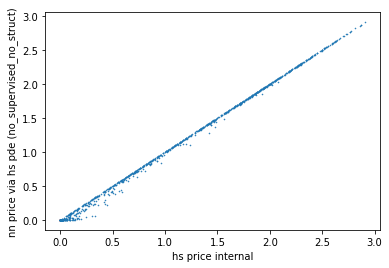

time: 147 ms (started: 2022-08-12 20:03:28 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.012602963970882723


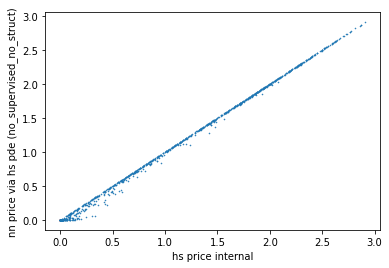

time: 147 ms (started: 2022-08-12 20:03:28 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.012604550059703316


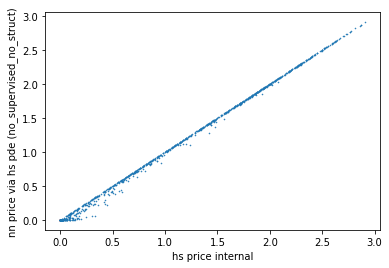

time: 144 ms (started: 2022-08-12 20:03:28 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.012602982059975641


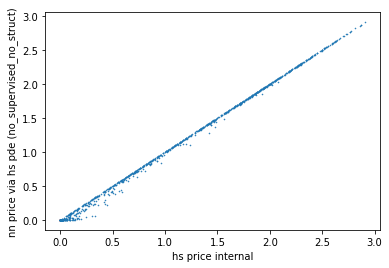

time: 147 ms (started: 2022-08-12 20:03:28 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

#### Test Case With Curriculum European Call - Uniform sampling - ResNet Like - No Segmentation - Loss weight Importance Sampling  - ABS Loss

[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma = 1.0

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma, key_loss_func = torch.abs)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

# net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net2 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockCurriculum(net2)
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockCurriculum(net3)
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockCurriculum(net4)
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:02<04:24,  2.67s/it]

Epoch 0 - lr 0.001 -  loss: 17.34018505944146 - Terminal loss 0.2492409199476242 - Internal Loss 4.6173259761417285e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:13<04:12,  2.66s/it]

Epoch 4 - lr 0.001 -  loss: 17.22641044192844 - Terminal loss 0.24997933208942413 - Internal Loss 4.616799924406223e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:26<03:56,  2.63s/it]

Epoch 9 - lr 0.001 -  loss: 17.22636318206787 - Terminal loss 0.24998733401298523 - Internal Loss 4.6167879190761596e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:39<03:45,  2.65s/it]

Epoch 14 - lr 0.001 -  loss: 17.226342731051975 - Terminal loss 0.24999065697193146 - Internal Loss 4.616785008693114e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:52<03:28,  2.61s/it]

Epoch 19 - lr 0.001 -  loss: 17.226330439249676 - Terminal loss 0.2499927580356598 - Internal Loss 4.616782462107949e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:06<03:18,  2.65s/it]

Epoch 24 - lr 0.001 -  loss: 17.226322809855144 - Terminal loss 0.24999374151229858 - Internal Loss 4.616778460331261e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [01:19<03:02,  2.61s/it]

Epoch 29 - lr 0.001 -  loss: 17.22631878323025 - Terminal loss 0.2499944418668747 - Internal Loss 4.6167766413418576e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:32<02:52,  2.66s/it]

Epoch 34 - lr 0.001 -  loss: 17.226314756605362 - Terminal loss 0.24999509751796722 - Internal Loss 4.616775186150335e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:45<02:38,  2.65s/it]

Epoch 39 - lr 0.001 -  loss: 17.22631337907579 - Terminal loss 0.24999569356441498 - Internal Loss 4.6167730033630505e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:58<02:26,  2.66s/it]

Epoch 44 - lr 0.001 -  loss: 17.2263126373291 - Terminal loss 0.24999620020389557 - Internal Loss 4.6167719119694084e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:11<02:11,  2.63s/it]

Epoch 49 - lr 0.001 -  loss: 17.226311047871906 - Terminal loss 0.249996617436409 - Internal Loss 4.616769729182124e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:25<01:59,  2.65s/it]

Epoch 54 - lr 0.001 -  loss: 17.226309776306152 - Terminal loss 0.24999696016311646 - Internal Loss 4.616769001586363e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:38<01:45,  2.63s/it]

Epoch 59 - lr 0.001 -  loss: 17.226309564378525 - Terminal loss 0.24999727308750153 - Internal Loss 4.616768637788482e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:51<01:31,  2.61s/it]

Epoch 64 - lr 0.001 -  loss: 17.226309140523274 - Terminal loss 0.24999751150608063 - Internal Loss 4.616769001586363e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:04<01:19,  2.64s/it]

Epoch 69 - lr 0.001 -  loss: 17.226308398776585 - Terminal loss 0.24999776482582092 - Internal Loss 4.616769001586363e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:17<01:05,  2.61s/it]

Epoch 74 - lr 0.001 -  loss: 17.226307551066082 - Terminal loss 0.24999794363975525 - Internal Loss 4.616768273990601e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:31<00:53,  2.67s/it]

Epoch 79 - lr 0.001 -  loss: 17.22630712721083 - Terminal loss 0.24999810755252838 - Internal Loss 4.616768273990601e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [03:44<00:39,  2.63s/it]

Epoch 84 - lr 0.001 -  loss: 17.226307445102268 - Terminal loss 0.2499982714653015 - Internal Loss 4.61676754639484e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [03:57<00:26,  2.60s/it]

Epoch 89 - lr 0.001 -  loss: 17.22630723317464 - Terminal loss 0.24999840557575226 - Internal Loss 4.616767182596959e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:10<00:13,  2.64s/it]

Epoch 94 - lr 0.001 -  loss: 17.22630723317464 - Terminal loss 0.24999849498271942 - Internal Loss 4.616767182596959e-05 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [04:23<00:00,  2.64s/it]


Epoch 99 - lr 0.001 -  loss: 17.226306173536514 - Terminal loss 0.24999861419200897 - Internal Loss 4.616767182596959e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:02<04:37,  2.81s/it]

Epoch 0 - lr 0.001 -  loss: 16.827064647797542 - Terminal loss 0.11105760186910629 - Internal Loss 0.0016983738169074059 - Structure Loss 0.0 - Supervised Loss 0.08282120755813864


  5%|▌         | 5/100 [00:14<04:39,  2.94s/it]

Epoch 4 - lr 0.001 -  loss: 16.712621719024117 - Terminal loss 0.11110542714595795 - Internal Loss 0.001698152394965291 - Structure Loss 0.0 - Supervised Loss 0.08278038038966246


 10%|█         | 10/100 [00:29<04:24,  2.94s/it]

Epoch 9 - lr 0.001 -  loss: 16.71260792899802 - Terminal loss 0.11110689491033554 - Internal Loss 0.0016981433145701885 - Structure Loss 0.0 - Supervised Loss 0.08277820810001288


 15%|█▌        | 15/100 [00:44<04:09,  2.93s/it]

Epoch 14 - lr 0.001 -  loss: 16.71259931895522 - Terminal loss 0.11110787838697433 - Internal Loss 0.0016981380758807063 - Structure Loss 0.0 - Supervised Loss 0.08277708289406077


 20%|██        | 20/100 [00:58<03:58,  2.98s/it]

Epoch 19 - lr 0.001 -  loss: 16.712593750989974 - Terminal loss 0.11110856384038925 - Internal Loss 0.0016981338849291205 - Structure Loss 0.0 - Supervised Loss 0.08277641047024553


 25%|██▌       | 25/100 [01:13<03:42,  2.96s/it]

Epoch 24 - lr 0.001 -  loss: 16.712589442853417 - Terminal loss 0.11110904812812805 - Internal Loss 0.0016981306253001094 - Structure Loss 0.0 - Supervised Loss 0.08277596628074635


 30%|███       | 30/100 [01:28<03:27,  2.96s/it]

Epoch 29 - lr 0.001 -  loss: 16.712586390673206 - Terminal loss 0.1111094206571579 - Internal Loss 0.0016981284134089947 - Structure Loss 0.0 - Supervised Loss 0.08277564739765537


 35%|███▌      | 35/100 [01:43<03:10,  2.94s/it]

Epoch 34 - lr 0.001 -  loss: 16.712583927063466 - Terminal loss 0.11110970377922058 - Internal Loss 0.00169812748208642 - Structure Loss 0.0 - Supervised Loss 0.08277541051346217


 40%|████      | 40/100 [01:58<03:00,  3.02s/it]

Epoch 39 - lr 0.001 -  loss: 16.712582518554726 - Terminal loss 0.11110992729663849 - Internal Loss 0.0016981259686872363 - Structure Loss 0.0 - Supervised Loss 0.08277522371513349


 45%|████▌     | 45/100 [02:13<02:44,  2.98s/it]

Epoch 44 - lr 0.001 -  loss: 16.712580995989228 - Terminal loss 0.11111010611057281 - Internal Loss 0.001698125503025949 - Structure Loss 0.0 - Supervised Loss 0.08277507065237635


 50%|█████     | 50/100 [02:27<02:27,  2.94s/it]

Epoch 49 - lr 0.001 -  loss: 16.71257974054308 - Terminal loss 0.11111024022102356 - Internal Loss 0.0016981251537799835 - Structure Loss 0.0 - Supervised Loss 0.0827749435070613


 55%|█████▌    | 55/100 [02:42<02:11,  2.92s/it]

Epoch 54 - lr 0.001 -  loss: 16.712578714610718 - Terminal loss 0.11111035197973251 - Internal Loss 0.0016981244552880526 - Structure Loss 0.0 - Supervised Loss 0.08277483924312876


 60%|██████    | 60/100 [02:57<01:58,  2.97s/it]

Epoch 59 - lr 0.001 -  loss: 16.712577946352773 - Terminal loss 0.11111043393611908 - Internal Loss 0.0016981236403807998 - Structure Loss 0.0 - Supervised Loss 0.08277475036848705


 65%|██████▌   | 65/100 [03:12<01:43,  2.95s/it]

Epoch 64 - lr 0.001 -  loss: 16.71257722738793 - Terminal loss 0.11111050844192505 - Internal Loss 0.0016981239896267653 - Structure Loss 0.0 - Supervised Loss 0.08277467661594112


 70%|███████   | 70/100 [03:26<01:28,  2.94s/it]

Epoch 69 - lr 0.001 -  loss: 16.71257662829492 - Terminal loss 0.11111056804656982 - Internal Loss 0.001698123523965478 - Structure Loss 0.0 - Supervised Loss 0.08277461296405449


 75%|███████▌  | 75/100 [03:41<01:14,  2.98s/it]

Epoch 74 - lr 0.001 -  loss: 16.712576133561427 - Terminal loss 0.111110620200634 - Internal Loss 0.0016981231747195125 - Structure Loss 0.0 - Supervised Loss 0.08277455941052547


 80%|████████  | 80/100 [03:56<00:59,  2.96s/it]

Epoch 79 - lr 0.001 -  loss: 16.7125757188438 - Terminal loss 0.11111067235469818 - Internal Loss 0.001698122825473547 - Structure Loss 0.0 - Supervised Loss 0.08277451095443901


 85%|████████▌ | 85/100 [04:11<00:44,  2.97s/it]

Epoch 84 - lr 0.001 -  loss: 16.712576140144968 - Terminal loss 0.11111070960760117 - Internal Loss 0.0016981223598122597 - Structure Loss 0.0 - Supervised Loss 0.08277446743731282


 90%|█████████ | 90/100 [04:26<00:29,  2.93s/it]

Epoch 89 - lr 0.001 -  loss: 16.712575865806127 - Terminal loss 0.11111073940992355 - Internal Loss 0.0016981222433969378 - Structure Loss 0.0 - Supervised Loss 0.08277443136269456


 95%|█████████▌| 95/100 [04:40<00:14,  2.98s/it]

Epoch 94 - lr 0.001 -  loss: 16.712575552852666 - Terminal loss 0.11111076921224594 - Internal Loss 0.001698122126981616 - Structure Loss 0.0 - Supervised Loss 0.08277439544234876


100%|██████████| 100/100 [04:55<00:00,  2.96s/it]


Epoch 99 - lr 0.001 -  loss: 16.71257525639387 - Terminal loss 0.11111080646514893 - Internal Loss 0.0016981227090582252 - Structure Loss 0.0 - Supervised Loss 0.0827743645330487


  1%|          | 1/100 [00:02<04:23,  2.67s/it]

Epoch 0 - lr 0.001 -  loss: 23.222798983256023 - Terminal loss 0.2497958242893219 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:13<04:09,  2.62s/it]

Epoch 4 - lr 0.001 -  loss: 23.212877485487198 - Terminal loss 0.24998776614665985 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:26<03:58,  2.65s/it]

Epoch 9 - lr 0.001 -  loss: 23.21285194820828 - Terminal loss 0.24999332427978516 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:39<03:42,  2.62s/it]

Epoch 14 - lr 0.001 -  loss: 23.212845378451878 - Terminal loss 0.24999511241912842 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:52<03:26,  2.58s/it]

Epoch 19 - lr 0.001 -  loss: 23.212841563754612 - Terminal loss 0.2499961405992508 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:05<03:17,  2.63s/it]

Epoch 24 - lr 0.001 -  loss: 23.212839868333603 - Terminal loss 0.2499968409538269 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [01:18<03:05,  2.65s/it]

Epoch 29 - lr 0.001 -  loss: 23.212837325202095 - Terminal loss 0.2499973624944687 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:31<02:51,  2.63s/it]

Epoch 34 - lr 0.001 -  loss: 23.212835841708714 - Terminal loss 0.24999777972698212 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:45<02:38,  2.64s/it]

Epoch 39 - lr 0.001 -  loss: 23.212834464179146 - Terminal loss 0.2499980926513672 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:58<02:24,  2.63s/it]

Epoch 44 - lr 0.001 -  loss: 23.212834464179146 - Terminal loss 0.24999836087226868 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:11<02:10,  2.61s/it]

Epoch 49 - lr 0.001 -  loss: 23.212832980685764 - Terminal loss 0.2499985545873642 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:24<01:58,  2.64s/it]

Epoch 54 - lr 0.001 -  loss: 23.212833192613388 - Terminal loss 0.24999874830245972 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:37<01:44,  2.62s/it]

Epoch 59 - lr 0.001 -  loss: 23.21283181508382 - Terminal loss 0.24999888241291046 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:50<01:32,  2.64s/it]

Epoch 64 - lr 0.001 -  loss: 23.212831603156197 - Terminal loss 0.24999898672103882 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [03:03<01:18,  2.62s/it]

Epoch 69 - lr 0.001 -  loss: 23.212831497192383 - Terminal loss 0.24999907612800598 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [03:17<01:06,  2.66s/it]

Epoch 74 - lr 0.001 -  loss: 23.21283181508382 - Terminal loss 0.24999916553497314 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:30<00:52,  2.63s/it]

Epoch 79 - lr 0.001 -  loss: 23.21283064948188 - Terminal loss 0.24999922513961792 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [03:43<00:38,  2.58s/it]

Epoch 84 - lr 0.001 -  loss: 23.21283033159044 - Terminal loss 0.2499992996454239 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [03:56<00:26,  2.65s/it]

Epoch 89 - lr 0.001 -  loss: 23.212830119662815 - Terminal loss 0.24999934434890747 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [04:09<00:12,  2.59s/it]

Epoch 94 - lr 0.001 -  loss: 23.21283064948188 - Terminal loss 0.24999938905239105 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [04:22<00:00,  2.63s/it]


Epoch 99 - lr 0.001 -  loss: 23.212830437554253 - Terminal loss 0.24999941885471344 - Internal Loss 3.265412669861689e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:02<04:38,  2.82s/it]

Epoch 0 - lr 0.001 -  loss: 14.421502123551283 - Terminal loss 0.11106251180171967 - Internal Loss 0.0010337051935493946 - Structure Loss 0.0 - Supervised Loss 0.08281982525152018


  5%|▌         | 5/100 [00:14<04:38,  2.93s/it]

Epoch 4 - lr 0.001 -  loss: 14.103779271303242 - Terminal loss 0.11110496520996094 - Internal Loss 0.0010335793485864997 - Structure Loss 0.0 - Supervised Loss 0.08277958374480424


 10%|█         | 10/100 [00:29<04:23,  2.93s/it]

Epoch 9 - lr 0.001 -  loss: 14.10376653148811 - Terminal loss 0.11110639572143555 - Internal Loss 0.0010335770202800632 - Structure Loss 0.0 - Supervised Loss 0.08277805565305939


 15%|█▌        | 15/100 [00:43<04:08,  2.92s/it]

Epoch 14 - lr 0.001 -  loss: 14.10375793919262 - Terminal loss 0.11110737174749374 - Internal Loss 0.0010335738770663738 - Structure Loss 0.0 - Supervised Loss 0.08277705187465725


 20%|██        | 20/100 [00:58<03:57,  2.97s/it]

Epoch 19 - lr 0.001 -  loss: 14.103751470797322 - Terminal loss 0.11110809445381165 - Internal Loss 0.0010335706174373627 - Structure Loss 0.0 - Supervised Loss 0.08277639361931563


 25%|██▌       | 25/100 [01:13<03:41,  2.95s/it]

Epoch 24 - lr 0.001 -  loss: 14.103745790409649 - Terminal loss 0.1111086830496788 - Internal Loss 0.0010335686383768916 - Structure Loss 0.0 - Supervised Loss 0.08277595702284278


 30%|███       | 30/100 [01:28<03:26,  2.94s/it]

Epoch 29 - lr 0.001 -  loss: 14.103741758489278 - Terminal loss 0.11110910028219223 - Internal Loss 0.0010335675906389952 - Structure Loss 0.0 - Supervised Loss 0.08277564486213856


 35%|███▌      | 35/100 [01:42<03:10,  2.93s/it]

Epoch 34 - lr 0.001 -  loss: 14.103738733170507 - Terminal loss 0.1111094206571579 - Internal Loss 0.0010335665429010987 - Structure Loss 0.0 - Supervised Loss 0.0827754093685062


 40%|████      | 40/100 [01:57<02:58,  2.98s/it]

Epoch 39 - lr 0.001 -  loss: 14.103736304506814 - Terminal loss 0.111109659075737 - Internal Loss 0.0010335656115785241 - Structure Loss 0.0 - Supervised Loss 0.08277522118080236


 45%|████▌     | 45/100 [02:12<02:42,  2.96s/it]

Epoch 44 - lr 0.001 -  loss: 14.103734526010069 - Terminal loss 0.11110984534025192 - Internal Loss 0.0010335647966712713 - Structure Loss 0.0 - Supervised Loss 0.08277506924933715


 50%|█████     | 50/100 [02:27<02:27,  2.95s/it]

Epoch 49 - lr 0.001 -  loss: 14.103733057704526 - Terminal loss 0.11111000180244446 - Internal Loss 0.0010335642145946622 - Structure Loss 0.0 - Supervised Loss 0.08277494340042331


 55%|█████▌    | 55/100 [02:41<02:11,  2.93s/it]

Epoch 54 - lr 0.001 -  loss: 14.1037317426845 - Terminal loss 0.1111101433634758 - Internal Loss 0.0010335637489333749 - Structure Loss 0.0 - Supervised Loss 0.08277483567617784


 60%|██████    | 60/100 [02:56<01:59,  2.98s/it]

Epoch 59 - lr 0.001 -  loss: 14.103730627407502 - Terminal loss 0.11111024022102356 - Internal Loss 0.001033562934026122 - Structure Loss 0.0 - Supervised Loss 0.082774748617535


 65%|██████▌   | 65/100 [03:11<01:43,  2.96s/it]

Epoch 64 - lr 0.001 -  loss: 14.103729701850842 - Terminal loss 0.11111032962799072 - Internal Loss 0.0010335624683648348 - Structure Loss 0.0 - Supervised Loss 0.08277467435048638


 70%|███████   | 70/100 [03:26<01:28,  2.94s/it]

Epoch 69 - lr 0.001 -  loss: 14.103728958450631 - Terminal loss 0.11111041158437729 - Internal Loss 0.0010335622355341911 - Structure Loss 0.0 - Supervised Loss 0.0827746128782595


 75%|███████▌  | 75/100 [03:41<01:13,  2.93s/it]

Epoch 74 - lr 0.001 -  loss: 14.1037283581701 - Terminal loss 0.11111047863960266 - Internal Loss 0.0010335620027035475 - Structure Loss 0.0 - Supervised Loss 0.08277456140759978


 80%|████████  | 80/100 [03:55<00:59,  2.98s/it]

Epoch 79 - lr 0.001 -  loss: 14.103727892746168 - Terminal loss 0.11111053079366684 - Internal Loss 0.0010335617698729038 - Structure Loss 0.0 - Supervised Loss 0.08277451503420186


 85%|████████▌ | 85/100 [04:10<00:44,  2.96s/it]

Epoch 84 - lr 0.001 -  loss: 14.103727464620684 - Terminal loss 0.11111058294773102 - Internal Loss 0.0010335615370422602 - Structure Loss 0.0 - Supervised Loss 0.08277447604476368


 90%|█████████ | 90/100 [04:25<00:29,  2.95s/it]

Epoch 89 - lr 0.001 -  loss: 14.103727047224265 - Terminal loss 0.111110620200634 - Internal Loss 0.0010335614206269383 - Structure Loss 0.0 - Supervised Loss 0.08277444221250022


 95%|█████████▌| 95/100 [04:40<00:14,  2.93s/it]

Epoch 94 - lr 0.001 -  loss: 14.103726758668415 - Terminal loss 0.11111065745353699 - Internal Loss 0.0010335613042116165 - Structure Loss 0.0 - Supervised Loss 0.08277441086654286


100%|██████████| 100/100 [04:55<00:00,  2.95s/it]

Epoch 99 - lr 0.001 -  loss: 14.103726443692432 - Terminal loss 0.11111068725585938 - Internal Loss 0.0010335610713809729 - Structure Loss 0.0 - Supervised Loss 0.08277438446666652


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 18min 37s (started: 2022-08-12 20:03:28 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )

base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*heston_equation.BS_SIGMA, r))


time: 58.2 ms (started: 2022-08-12 20:22:06 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


0.012601833284521028


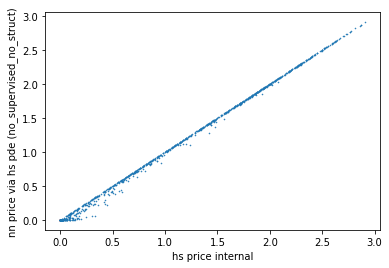

time: 215 ms (started: 2022-08-12 20:22:06 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.012601758598119515


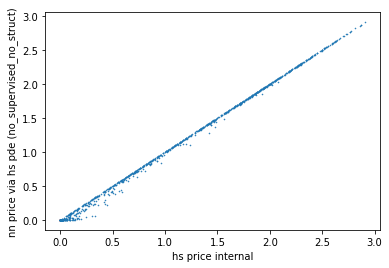

time: 209 ms (started: 2022-08-12 20:22:06 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.012601844960738054


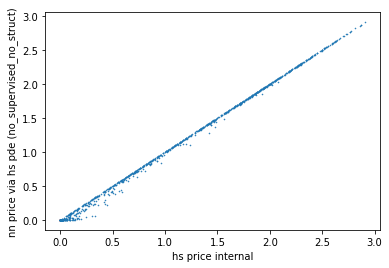

time: 205 ms (started: 2022-08-12 20:22:06 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

0.012601769977326125


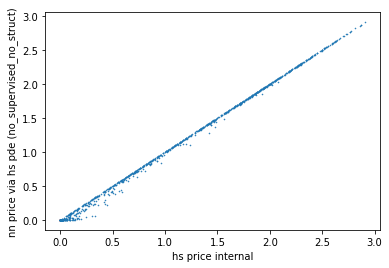

time: 241 ms (started: 2022-08-12 20:22:06 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

In [ ]:
df2.head(5)

heston_analytical  stock_values  nu_values  maturity_time  t_internal_values    strike  risk_free_rate  dividend     kappa     theta  sigma_vol_of_vol  rho_corr_vol_stock
0           2.290713      2.631257   1.019563       0.515815           0.175140  0.340921        0.003220         0  0.922397  0.023754          0.365475            0.502234
1           0.981074      1.614333   1.430425       0.595768           0.427688  0.638800        0.010656         0  0.897710  0.113951          0.227359            0.065483
2           1.379773      2.086877   1.119815       0.063548           0.043025  0.707152        0.003282         0  0.009254  0.142225          0.073260            0.262066
3           1.100303      1.109792   1.390030       0.183620           0.139265  0.009508        0.044043         0  0.917671  0.139051          0.404951            0.008353
4           0.709396      1.334518   0.553096       0.192966           0.049471  0.629380        0.045570         0  0.029218  0.005336          0.248123            0.660918

time: 11.5 ms (started: 2022-08-12 20:22:07 +00:00)


In [ ]:
heston_analytical.shape

torch.Size([1000])

time: 2.94 ms (started: 2022-08-12 20:22:07 +00:00)


#### Test Case With Curriculum European Call - Uniform sampling - Simple DNN - With Stock  Segmentation - Loss Weight Importance Sampling


[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma = 1.0

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
heston_equation.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockCurriculum(net2)
heston_equation2.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockCurriculum(net3)
heston_equation3.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockCurriculum(net4)
heston_equation4.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:03<06:20,  3.84s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.24481044709682465 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:07<01:55,  1.21s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:12<01:29,  1.01it/s]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:17<01:21,  1.04it/s]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:21<01:15,  1.06it/s]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:26<01:11,  1.05it/s]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:31<01:05,  1.07it/s]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:35<01:02,  1.04it/s]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:40<00:58,  1.03it/s]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:45<00:48,  1.13it/s]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:49<00:44,  1.13it/s]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:53<00:36,  1.23it/s]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:58<00:34,  1.15it/s]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [01:02<00:30,  1.14it/s]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [01:06<00:25,  1.19it/s]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:11<00:21,  1.14it/s]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:15<00:17,  1.14it/s]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:19<00:13,  1.12it/s]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:24<00:08,  1.17it/s]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:28<00:04,  1.14it/s]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:32<00:00,  1.08it/s]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:01<01:43,  1.05s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.1110771894454956 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.10192494836377358


  5%|▌         | 5/100 [00:05<01:35,  1.00s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 10%|█         | 10/100 [00:09<01:27,  1.03it/s]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 15%|█▌        | 15/100 [00:15<01:27,  1.03s/it]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 20%|██        | 20/100 [00:20<01:21,  1.01s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 25%|██▌       | 25/100 [00:25<01:14,  1.01it/s]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 30%|███       | 30/100 [00:30<01:12,  1.04s/it]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 35%|███▌      | 35/100 [00:35<01:06,  1.02s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 40%|████      | 40/100 [00:40<00:59,  1.00it/s]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 45%|████▌     | 45/100 [00:45<00:57,  1.04s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 50%|█████     | 50/100 [00:50<00:50,  1.01s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 55%|█████▌    | 55/100 [00:55<00:45,  1.01s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 60%|██████    | 60/100 [01:00<00:39,  1.01it/s]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 65%|██████▌   | 65/100 [01:05<00:34,  1.02it/s]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 70%|███████   | 70/100 [01:10<00:31,  1.04s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 75%|███████▌  | 75/100 [01:15<00:25,  1.03s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 80%|████████  | 80/100 [01:20<00:19,  1.02it/s]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 85%|████████▌ | 85/100 [01:26<00:15,  1.04s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 90%|█████████ | 90/100 [01:31<00:10,  1.02s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 95%|█████████▌| 95/100 [01:36<00:05,  1.01s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


  1%|          | 1/100 [00:00<01:33,  1.06it/s]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.24650166928768158 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:21,  1.17it/s]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:08<01:19,  1.13it/s]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:13<01:15,  1.12it/s]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:17<01:11,  1.13it/s]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:21<01:03,  1.18it/s]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:26<01:01,  1.13it/s]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:30<00:57,  1.13it/s]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:35<00:51,  1.17it/s]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:39<00:48,  1.13it/s]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:44<00:44,  1.12it/s]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:48<00:37,  1.20it/s]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:52<00:34,  1.15it/s]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:57<00:30,  1.14it/s]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [01:01<00:26,  1.13it/s]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:05<00:21,  1.15it/s]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:10<00:17,  1.13it/s]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:14<00:12,  1.21it/s]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:18<00:08,  1.15it/s]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:23<00:04,  1.14it/s]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:01<01:48,  1.09s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.11062736809253693 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.10324770058311183


  5%|▌         | 5/100 [00:05<01:36,  1.02s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 10%|█         | 10/100 [00:09<01:28,  1.02it/s]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 15%|█▌        | 15/100 [00:14<01:23,  1.02it/s]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 20%|██        | 20/100 [00:19<01:21,  1.02s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 25%|██▌       | 25/100 [00:24<01:15,  1.01s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 30%|███       | 30/100 [00:29<01:09,  1.01it/s]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 35%|███▌      | 35/100 [00:35<01:07,  1.04s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 40%|████      | 40/100 [00:40<01:00,  1.00s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 45%|████▌     | 45/100 [00:45<00:53,  1.03it/s]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 50%|█████     | 50/100 [00:50<00:53,  1.07s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 55%|█████▌    | 55/100 [00:55<00:47,  1.05s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 60%|██████    | 60/100 [01:01<00:43,  1.10s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 65%|██████▌   | 65/100 [01:06<00:37,  1.08s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 70%|███████   | 70/100 [01:11<00:31,  1.06s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 75%|███████▌  | 75/100 [01:17<00:27,  1.11s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 80%|████████  | 80/100 [01:22<00:21,  1.08s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 85%|████████▌ | 85/100 [01:28<00:15,  1.05s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 90%|█████████ | 90/100 [01:33<00:11,  1.10s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 95%|█████████▌| 95/100 [01:39<00:05,  1.10s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


100%|██████████| 100/100 [01:44<00:00,  1.05s/it]

Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 6min 26s (started: 2022-08-13 07:32:35 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )

base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*heston_equation.BS_SIGMA, r))


time: 91.2 ms (started: 2022-08-13 07:39:01 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


nan


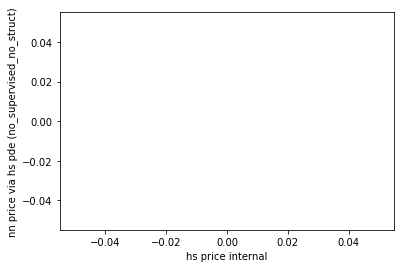

time: 251 ms (started: 2022-08-13 07:39:01 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


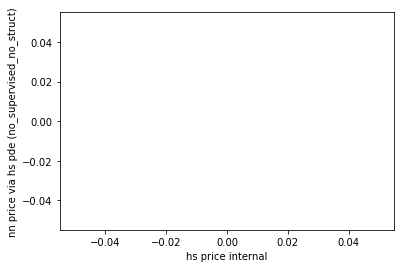

time: 173 ms (started: 2022-08-13 07:39:02 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


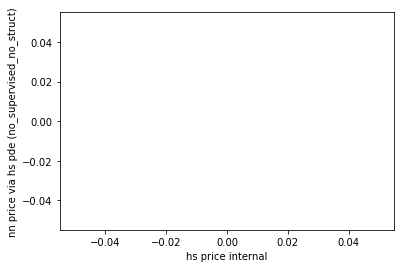

time: 177 ms (started: 2022-08-13 07:39:02 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


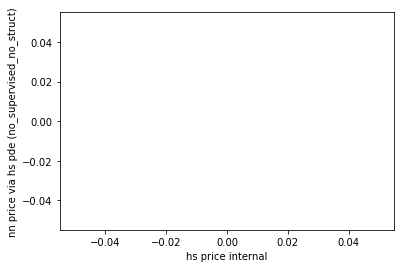

time: 203 ms (started: 2022-08-13 07:39:02 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

In [ ]:
import sys
sys.path.insert(0,'/drive/MyDrive/github/')

time: 1.12 ms (started: 2022-08-13 07:39:02 +00:00)


#### Test Case With Curriculum European Call - Uniform sampling - ResNet Like - With Stock  Segmentation - With Loss Weight Importance Sampling


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma = 1.0

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
heston_equation.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

# net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net2 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockCurriculum(net2)
heston_equation2.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockCurriculum(net3)
heston_equation3.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockCurriculum(net4)
heston_equation4.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:01<03:15,  1.98s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.2499115914106369 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:09<03:00,  1.90s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:18<02:49,  1.88s/it]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:28<02:33,  1.81s/it]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:37<02:27,  1.85s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:46<02:18,  1.85s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:55<02:06,  1.81s/it]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:04<01:59,  1.83s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:14<01:50,  1.84s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:23<01:39,  1.80s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [01:32<01:32,  1.85s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [01:41<01:23,  1.85s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [01:50<01:13,  1.83s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [01:59<01:04,  1.85s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [02:09<00:56,  1.87s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [02:18<00:45,  1.84s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [02:27<00:36,  1.85s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [02:36<00:27,  1.83s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [02:45<00:18,  1.84s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [02:55<00:09,  1.85s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [03:04<00:00,  1.84s/it]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:02<04:02,  2.45s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.11110319942235947 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.10150976073903631


  5%|▌         | 5/100 [00:11<03:38,  2.30s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 10%|█         | 10/100 [00:23<03:31,  2.35s/it]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 15%|█▌        | 15/100 [00:35<03:17,  2.33s/it]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 20%|██        | 20/100 [00:47<03:10,  2.38s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 25%|██▌       | 25/100 [00:58<02:58,  2.38s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 30%|███       | 30/100 [01:10<02:44,  2.35s/it]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 35%|███▌      | 35/100 [01:22<02:35,  2.39s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 40%|████      | 40/100 [01:34<02:23,  2.38s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 45%|████▌     | 45/100 [01:46<02:09,  2.36s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 50%|█████     | 50/100 [01:58<02:00,  2.40s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 55%|█████▌    | 55/100 [02:10<01:47,  2.38s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 60%|██████    | 60/100 [02:22<01:34,  2.35s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 65%|██████▌   | 65/100 [02:34<01:24,  2.40s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 70%|███████   | 70/100 [02:45<01:11,  2.39s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 75%|███████▌  | 75/100 [02:57<00:58,  2.35s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 80%|████████  | 80/100 [03:09<00:48,  2.41s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 85%|████████▌ | 85/100 [03:22<00:37,  2.48s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 90%|█████████ | 90/100 [03:34<00:24,  2.43s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 95%|█████████▌| 95/100 [03:46<00:12,  2.47s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


100%|██████████| 100/100 [03:58<00:00,  2.39s/it]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


  1%|          | 1/100 [00:01<03:10,  1.93s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.24993112683296204 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:09<02:59,  1.89s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:18<02:47,  1.86s/it]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:28<02:40,  1.89s/it]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:37<02:26,  1.83s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:46<02:19,  1.87s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:56<02:11,  1.88s/it]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:05<02:00,  1.85s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:14<01:52,  1.88s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:24<01:40,  1.83s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [01:33<01:33,  1.86s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [01:42<01:23,  1.86s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [01:51<01:13,  1.83s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:00<01:04,  1.85s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [02:10<00:55,  1.86s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [02:19<00:45,  1.83s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [02:28<00:37,  1.85s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [02:37<00:27,  1.85s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [02:46<00:18,  1.84s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [02:56<00:09,  1.85s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [03:05<00:00,  1.85s/it]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:02<03:55,  2.38s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.11110597103834152 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.1014303109777201


  5%|▌         | 5/100 [00:11<03:45,  2.37s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 10%|█         | 10/100 [00:23<03:29,  2.33s/it]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 15%|█▌        | 15/100 [00:35<03:22,  2.38s/it]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 20%|██        | 20/100 [00:47<03:10,  2.38s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 25%|██▌       | 25/100 [00:59<02:57,  2.37s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 30%|███       | 30/100 [01:11<02:48,  2.41s/it]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 35%|███▌      | 35/100 [01:22<02:35,  2.39s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 40%|████      | 40/100 [01:34<02:21,  2.36s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 45%|████▌     | 45/100 [01:46<02:12,  2.41s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 50%|█████     | 50/100 [01:58<01:59,  2.39s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 55%|█████▌    | 55/100 [02:10<01:46,  2.37s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 60%|██████    | 60/100 [02:22<01:36,  2.41s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 65%|██████▌   | 65/100 [02:34<01:24,  2.41s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 70%|███████   | 70/100 [02:46<01:11,  2.37s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 75%|███████▌  | 75/100 [02:58<01:00,  2.41s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 80%|████████  | 80/100 [03:10<00:47,  2.39s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 85%|████████▌ | 85/100 [03:22<00:35,  2.36s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 90%|█████████ | 90/100 [03:34<00:24,  2.41s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 95%|█████████▌| 95/100 [03:46<00:11,  2.39s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


100%|██████████| 100/100 [03:58<00:00,  2.38s/it]

Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 14min 6s (started: 2022-08-13 07:39:02 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )

base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*heston_equation.BS_SIGMA, r))


time: 65.4 ms (started: 2022-08-13 07:53:09 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


nan


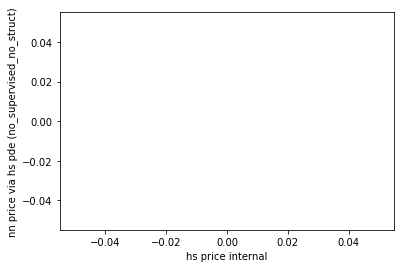

time: 280 ms (started: 2022-08-13 07:53:09 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


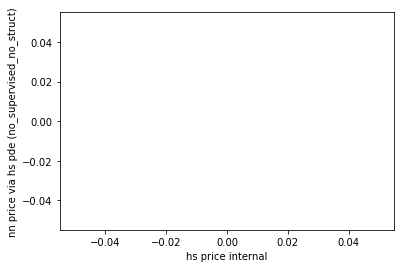

time: 216 ms (started: 2022-08-13 07:53:09 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


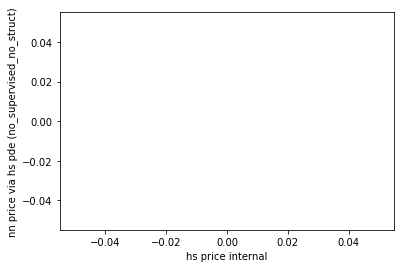

time: 228 ms (started: 2022-08-13 07:53:10 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


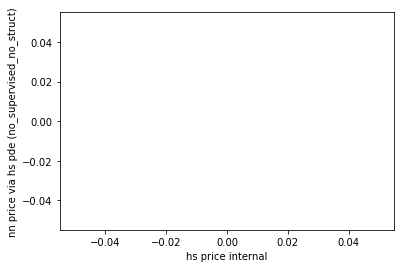

time: 220 ms (started: 2022-08-13 07:53:10 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

#### Test Case With Curriculum European Call - Uniform sampling - Simple DNN - With Stock  Segmentation - Loss Weight Importance Sampling - ABS Loss


[neurodiffeq - reference](https://github.com/NeuroDiffGym/neurodiffeq)



In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma = 1.0

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
heston_equation.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma, key_loss_func = torch.abs)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockCurriculum(net2)
heston_equation2.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockCurriculum(net3)
heston_equation3.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockCurriculum(net4)
heston_equation4.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:31,  1.08it/s]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.2390173077583313 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:24,  1.13it/s]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:08<01:19,  1.13it/s]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:13<01:08,  1.23it/s]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:17<01:07,  1.18it/s]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:21<01:04,  1.16it/s]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:25<00:58,  1.20it/s]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:30<00:55,  1.18it/s]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:34<00:50,  1.20it/s]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:38<00:46,  1.17it/s]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:42<00:41,  1.21it/s]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:46<00:38,  1.17it/s]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:51<00:34,  1.17it/s]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:55<00:29,  1.19it/s]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [00:59<00:25,  1.17it/s]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:03<00:20,  1.19it/s]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:07<00:16,  1.18it/s]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:11<00:12,  1.24it/s]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:16<00:08,  1.18it/s]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:20<00:04,  1.15it/s]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:01<01:40,  1.01s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.11069205403327942 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.08330059003266828


  5%|▌         | 5/100 [00:04<01:33,  1.01it/s]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 10%|█         | 10/100 [00:09<01:27,  1.03it/s]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 15%|█▌        | 15/100 [00:14<01:20,  1.06it/s]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 20%|██        | 20/100 [00:19<01:20,  1.01s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 25%|██▌       | 25/100 [00:24<01:15,  1.00s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 30%|███       | 30/100 [00:29<01:07,  1.03it/s]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 35%|███▌      | 35/100 [00:34<01:06,  1.02s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 40%|████      | 40/100 [00:39<01:05,  1.09s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 45%|████▌     | 45/100 [00:45<00:59,  1.09s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 50%|█████     | 50/100 [00:51<00:57,  1.15s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 55%|█████▌    | 55/100 [00:56<00:50,  1.11s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 60%|██████    | 60/100 [01:02<00:43,  1.08s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 65%|██████▌   | 65/100 [01:07<00:40,  1.15s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 70%|███████   | 70/100 [01:13<00:34,  1.13s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 75%|███████▌  | 75/100 [01:19<00:27,  1.09s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 80%|████████  | 80/100 [01:24<00:23,  1.16s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 85%|████████▌ | 85/100 [01:30<00:17,  1.16s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 90%|█████████ | 90/100 [01:36<00:11,  1.11s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 95%|█████████▌| 95/100 [01:41<00:05,  1.15s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


100%|██████████| 100/100 [01:47<00:00,  1.08s/it]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


  1%|          | 1/100 [00:00<01:38,  1.00it/s]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.23927174508571625 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:32,  1.03it/s]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:09<01:28,  1.02it/s]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:14<01:21,  1.05it/s]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:19<01:16,  1.04it/s]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:23<01:10,  1.07it/s]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:28<01:07,  1.03it/s]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:33<01:02,  1.04it/s]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:38<00:56,  1.05it/s]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:42<00:53,  1.03it/s]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:47<00:45,  1.10it/s]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:52<00:43,  1.04it/s]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:57<00:38,  1.03it/s]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [01:02<00:31,  1.09it/s]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [01:06<00:28,  1.04it/s]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:11<00:23,  1.04it/s]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:16<00:19,  1.05it/s]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:21<00:14,  1.04it/s]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:25<00:09,  1.04it/s]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:30<00:04,  1.04it/s]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:35<00:00,  1.05it/s]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:00<01:32,  1.07it/s]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.10888145864009857 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0847880011424598


  5%|▌         | 5/100 [00:05<01:41,  1.07s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 10%|█         | 10/100 [00:10<01:37,  1.08s/it]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 15%|█▌        | 15/100 [00:16<01:33,  1.10s/it]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 20%|██        | 20/100 [00:21<01:26,  1.08s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 25%|██▌       | 25/100 [00:26<01:18,  1.05s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 30%|███       | 30/100 [00:32<01:18,  1.12s/it]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 35%|███▌      | 35/100 [00:37<01:11,  1.11s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 40%|████      | 40/100 [00:43<01:05,  1.09s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 45%|████▌     | 45/100 [00:49<01:02,  1.15s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 50%|█████     | 50/100 [00:54<00:56,  1.12s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 55%|█████▌    | 55/100 [01:00<00:49,  1.10s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 60%|██████    | 60/100 [01:06<00:46,  1.16s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 65%|██████▌   | 65/100 [01:11<00:40,  1.16s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 70%|███████   | 70/100 [01:17<00:33,  1.12s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 75%|███████▌  | 75/100 [01:23<00:29,  1.16s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 80%|████████  | 80/100 [01:28<00:22,  1.14s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 85%|████████▌ | 85/100 [01:34<00:16,  1.12s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 90%|█████████ | 90/100 [01:40<00:11,  1.17s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 95%|█████████▌| 95/100 [01:46<00:05,  1.15s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


100%|██████████| 100/100 [01:51<00:00,  1.12s/it]

Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 6min 39s (started: 2022-08-13 07:53:10 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )

base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*heston_equation.BS_SIGMA, r))


time: 70.2 ms (started: 2022-08-13 07:59:50 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


nan


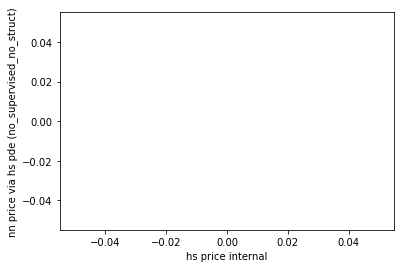

time: 188 ms (started: 2022-08-13 07:59:50 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


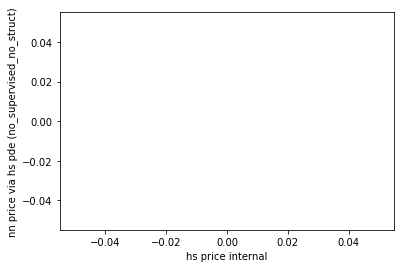

time: 176 ms (started: 2022-08-13 07:59:50 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


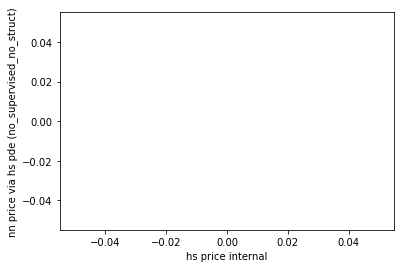

time: 180 ms (started: 2022-08-13 07:59:50 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


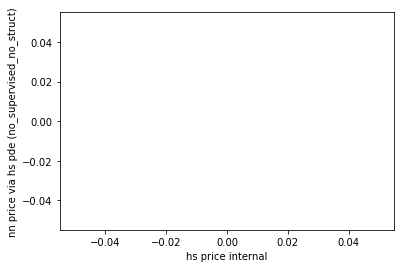

time: 179 ms (started: 2022-08-13 07:59:51 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

#### Test Case With Curriculum European Call - Uniform sampling - ResNet Like - With Stock  Segmentation - With Loss Weight Importance Sampling  - ABS Loss


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma = 1.0

# net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
heston_equation.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma, key_loss_func = torch.abs)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))

# net2 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net2 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net2.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation2 = EuropeanHestonSingleStockCurriculum(net2)
heston_equation2.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net2 , heston_equation2, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_no_struct.hook_interval = 5
trainEuss_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_no_struct.net.to(torch.device("cuda:0"))

# net3 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net3 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net3.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation3 = EuropeanHestonSingleStockCurriculum(net3)
heston_equation3.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_no_supervised_struct = TrainEuropeanHestonSingleStockBase( net3 , heston_equation3, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_struct.hook_interval = 5
trainEuss_no_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_no_supervised_struct.net.to(torch.device("cuda:0"))

# net4 = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
net4 = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 4)
net4.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation4 = EuropeanHestonSingleStockCurriculum(net4)
heston_equation4.xbreaks = np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()
trainEuss_supervised_struct = TrainEuropeanHestonSingleStockBase( net4 , heston_equation4, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_supervised_struct.hook_interval = 5
trainEuss_supervised_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma, key_loss_func = torch.abs)
trainEuss_supervised_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:01<03:10,  1.93s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.2495196908712387 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:09<03:01,  1.91s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:19<02:51,  1.90s/it]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:28<02:39,  1.88s/it]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:37<02:31,  1.89s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:47<02:19,  1.85s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:56<02:12,  1.89s/it]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:06<02:04,  1.91s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:15<01:51,  1.87s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:24<01:44,  1.90s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [01:34<01:33,  1.87s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [01:43<01:25,  1.90s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [01:53<01:15,  1.89s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:02<01:04,  1.84s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [02:11<00:56,  1.89s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [02:21<00:47,  1.90s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [02:30<00:37,  1.90s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [02:40<00:28,  1.89s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [02:49<00:18,  1.90s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [02:58<00:09,  1.86s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [03:08<00:00,  1.88s/it]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:02<04:15,  2.58s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.11103910207748413 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0828627045747339


  5%|▌         | 5/100 [00:12<03:46,  2.38s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 10%|█         | 10/100 [00:24<03:38,  2.42s/it]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 15%|█▌        | 15/100 [00:36<03:26,  2.43s/it]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 20%|██        | 20/100 [00:48<03:10,  2.39s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 25%|██▌       | 25/100 [01:00<03:03,  2.44s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 30%|███       | 30/100 [01:12<02:51,  2.45s/it]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 35%|███▌      | 35/100 [01:24<02:36,  2.41s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 40%|████      | 40/100 [01:37<02:28,  2.47s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 45%|████▌     | 45/100 [01:49<02:14,  2.45s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 50%|█████     | 50/100 [02:01<02:00,  2.42s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 55%|█████▌    | 55/100 [02:13<01:51,  2.48s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 60%|██████    | 60/100 [02:26<01:38,  2.46s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 65%|██████▌   | 65/100 [02:38<01:25,  2.43s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 70%|███████   | 70/100 [02:49<01:10,  2.35s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 75%|███████▌  | 75/100 [03:01<00:58,  2.35s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 80%|████████  | 80/100 [03:13<00:46,  2.34s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 85%|████████▌ | 85/100 [03:25<00:36,  2.40s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 90%|█████████ | 90/100 [03:37<00:23,  2.36s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 95%|█████████▌| 95/100 [03:48<00:11,  2.33s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


100%|██████████| 100/100 [04:00<00:00,  2.41s/it]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


  1%|          | 1/100 [00:01<03:04,  1.87s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.24970702826976776 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:09<02:53,  1.82s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:18<02:46,  1.85s/it]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:27<02:38,  1.87s/it]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:36<02:26,  1.83s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:45<02:18,  1.84s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:55<02:09,  1.85s/it]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:04<02:00,  1.85s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:13<01:49,  1.83s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:22<01:41,  1.85s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [01:31<01:31,  1.83s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [01:40<01:22,  1.84s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [01:49<01:12,  1.81s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [01:59<01:04,  1.84s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [02:08<00:55,  1.85s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [02:17<00:46,  1.87s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [02:26<00:36,  1.83s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [02:36<00:27,  1.85s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [02:45<00:18,  1.83s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [02:54<00:09,  1.85s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [03:03<00:00,  1.84s/it]


Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 1/100 [00:02<03:32,  2.14s/it]

Epoch 0 - lr 0.001 -  loss: nan - Terminal loss 0.11108098924160004 - Internal Loss nan - Structure Loss 0.0 - Supervised Loss 0.08280938771941851


  5%|▌         | 5/100 [00:11<03:37,  2.29s/it]

Epoch 4 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 10%|█         | 10/100 [00:22<03:25,  2.28s/it]

Epoch 9 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 15%|█▌        | 15/100 [00:34<03:18,  2.34s/it]

Epoch 14 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 20%|██        | 20/100 [00:46<03:06,  2.33s/it]

Epoch 19 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 25%|██▌       | 25/100 [00:57<02:53,  2.32s/it]

Epoch 24 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 30%|███       | 30/100 [01:09<02:46,  2.38s/it]

Epoch 29 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 35%|███▌      | 35/100 [01:21<02:33,  2.36s/it]

Epoch 34 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 40%|████      | 40/100 [01:33<02:19,  2.32s/it]

Epoch 39 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 45%|████▌     | 45/100 [01:44<02:09,  2.36s/it]

Epoch 44 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 50%|█████     | 50/100 [01:56<01:58,  2.37s/it]

Epoch 49 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 55%|█████▌    | 55/100 [02:08<01:44,  2.33s/it]

Epoch 54 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 60%|██████    | 60/100 [02:20<01:34,  2.37s/it]

Epoch 59 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 65%|██████▌   | 65/100 [02:32<01:22,  2.36s/it]

Epoch 64 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 70%|███████   | 70/100 [02:43<01:10,  2.36s/it]

Epoch 69 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 75%|███████▌  | 75/100 [02:55<01:00,  2.41s/it]

Epoch 74 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 80%|████████  | 80/100 [03:07<00:47,  2.38s/it]

Epoch 79 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 85%|████████▌ | 85/100 [03:19<00:35,  2.34s/it]

Epoch 84 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 90%|█████████ | 90/100 [03:31<00:23,  2.38s/it]

Epoch 89 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


 95%|█████████▌| 95/100 [03:43<00:11,  2.36s/it]

Epoch 94 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


100%|██████████| 100/100 [03:54<00:00,  2.35s/it]

Epoch 99 - lr 0.001 -  loss: nan - Terminal loss nan - Internal Loss nan - Structure Loss 0.0 - Supervised Loss nan


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=12, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=12, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=12, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG)

time: 14min 7s (started: 2022-08-13 07:59:51 +00:00)


In [ ]:
df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*heston_equation.BS_SIGMA, 
                         nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )

base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*heston_equation.BS_SIGMA, r))


time: 70 ms (started: 2022-08-13 08:13:59 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


nan


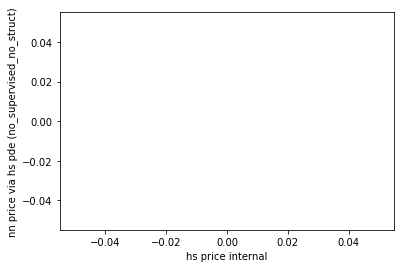

time: 243 ms (started: 2022-08-13 08:13:59 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


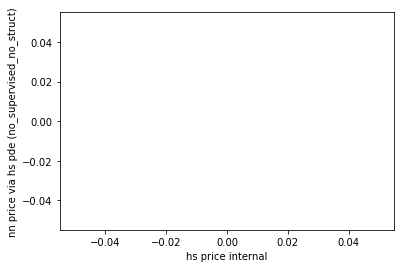

time: 242 ms (started: 2022-08-13 08:13:59 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


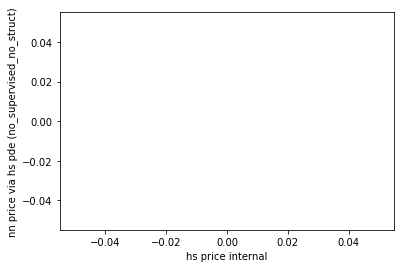

time: 251 ms (started: 2022-08-13 08:13:59 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

nan


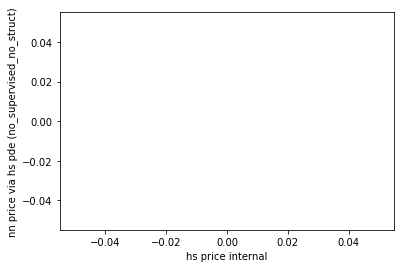

time: 237 ms (started: 2022-08-13 08:14:00 +00:00)


In [ ]:
net_cpu = trainEuss_supervised_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('hs price internal')
plt.ylabel('nn price via hs pde (no_supervised_no_struct)')
pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

### Heston Runs Specific for Paper

#### Internals for plotting

In [ ]:
# internals for plotting

df = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partA.csv").drop(columns='Unnamed: 0')
df2 = pd.read_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/heston_analytical_sol_partB.csv").drop(columns='Unnamed: 0')
df = df.append(df2)
df.reset_index(drop=True, inplace=True)

y = df['heston_analytical']
s = torch.tensor(df['stock_values'])
nu = torch.tensor(df['nu_values'])
maturity_time = torch.tensor(df['maturity_time'])
t_internal_values = torch.tensor(df['t_internal_values'])
r = torch.tensor(df['risk_free_rate'])
kappa = torch.tensor(df['kappa'])
theta = torch.tensor(df['theta'])
sigma = torch.tensor(df['sigma_vol_of_vol'])
rho = torch.tensor(df['rho_corr_vol_stock'])
strike = torch.tensor(df['strike'])
size_test = len(df)

heston_analytical = torch.tensor(df['heston_analytical'])

SIGMA_HERE = 0.25 # the default in the HestonEquation class

xvts_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*SIGMA_HERE), dim = 1 )
xvts_heston_int = torch.cat(( t_internal_values.reshape(-1,1) , s.reshape(-1,1), strike.reshape(-1,1), maturity_time.reshape(-1,1), r.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*SIGMA_HERE, 
                              nu.reshape(-1,1), sigma.reshape(-1,1), kappa.reshape(-1,1), rho.reshape(-1,1), theta.reshape(-1,1), torch.ones_like(r.reshape(-1,1))*0.), dim = 1 )

# BS corr
base_curr = torch.tensor(bs_price( "C", strike, s, maturity_time - t_internal_values, torch.ones_like(strike)*SIGMA_HERE, r))

# BS corr on the validation data (used for MAE validation)

# xvt_internal = self.to_device(torch.cat(( t_internal_values , S_internal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock, nu_internal_values, vol_vol_values, kappa_values, rho_values, theta_values, lamda_values), dim = 1 ), to_cpu)
validation_data_bs_px_curr = bs_price( "C", 
                                      validation_data['heston_input'][:,2].reshape(-1,1), 
                                      validation_data['heston_input'][:,1].reshape(-1,1), 
                                      validation_data['heston_input'][:,3].reshape(-1,1) - validation_data['heston_input'][:,0].reshape(-1,1), 
                                      validation_data['heston_input'][:,5].reshape(-1,1), 
                                      validation_data['heston_input'][:,4].reshape(-1,1))



time: 130 ms (started: 2022-08-15 06:50:24 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
# validation_data_bs_px_curr.shape

torch.Size([2000, 1])

time: 7.62 ms (started: 2022-08-15 06:50:42 +00:00)


In [ ]:
# validation_data['heston_input'].shape
import inspect
inspect.signature(bs_price)

<Signature (right, K, S, T, sigma, r)>

time: 4.85 ms (started: 2022-08-15 06:48:15 +00:00)


####  BASIC DGM ON HESTON

In [ ]:
##### BASIC DGM ON HESTON ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)

trainEuss_no_supervised_no_struct = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:04<06:41,  4.06s/it]

Epoch 0 - lr 0.001 -  loss: 0.2361159341202842 - Terminal loss 0.14515119791030884 - Internal Loss 0.024512188509106636 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:08<02:00,  1.27s/it]

Epoch 4 - lr 0.001 -  loss: 0.018339399869243305 - Terminal loss 0.010640328750014305 - Internal Loss 0.006910921074450016 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:12<01:22,  1.08it/s]

Epoch 9 - lr 0.001 -  loss: 0.006969648413360119 - Terminal loss 0.003429785370826721 - Internal Loss 0.004118900280445814 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:17<01:18,  1.09it/s]

Epoch 14 - lr 0.001 -  loss: 0.004768694440523784 - Terminal loss 0.002743746154010296 - Internal Loss 0.002487555146217346 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:21<01:13,  1.09it/s]

Epoch 19 - lr 0.001 -  loss: 0.003692182194855478 - Terminal loss 0.00224880944006145 - Internal Loss 0.0018373015336692333 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:26<01:06,  1.13it/s]

Epoch 24 - lr 0.001 -  loss: 0.003019940082190765 - Terminal loss 0.0019076992757618427 - Internal Loss 0.0014207889325916767 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:30<01:04,  1.09it/s]

Epoch 29 - lr 0.001 -  loss: 0.0025484057971172864 - Terminal loss 0.0016520333010703325 - Internal Loss 0.0011895677307620645 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:35<00:59,  1.09it/s]

Epoch 34 - lr 0.001 -  loss: 0.0023560517519298526 - Terminal loss 0.0014678575098514557 - Internal Loss 0.0010538086062297225 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:40<00:55,  1.08it/s]

Epoch 39 - lr 0.001 -  loss: 0.0022395592596795824 - Terminal loss 0.0013921495992690325 - Internal Loss 0.001016831723973155 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:44<00:47,  1.16it/s]

Epoch 44 - lr 0.001 -  loss: 0.0018792551838689381 - Terminal loss 0.0011999972630292177 - Internal Loss 0.0008883984992280602 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:49<00:45,  1.10it/s]

Epoch 49 - lr 0.001 -  loss: 0.0018047610323669182 - Terminal loss 0.0011494590435177088 - Internal Loss 0.000876743346452713 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:53<00:41,  1.09it/s]

Epoch 54 - lr 0.001 -  loss: 0.0016949993894538945 - Terminal loss 0.0010123316897079349 - Internal Loss 0.0007794190314598382 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:58<00:35,  1.14it/s]

Epoch 59 - lr 0.001 -  loss: 0.0020903994898415273 - Terminal loss 0.0011035596253350377 - Internal Loss 0.0008456984651274979 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [01:02<00:32,  1.09it/s]

Epoch 64 - lr 0.001 -  loss: 0.0014174813404679298 - Terminal loss 0.0008916903752833605 - Internal Loss 0.0006852504448033869 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [01:07<00:28,  1.07it/s]

Epoch 69 - lr 0.001 -  loss: 0.0016312205698341131 - Terminal loss 0.0011053108610212803 - Internal Loss 0.0009322351543232799 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:12<00:24,  1.04it/s]

Epoch 74 - lr 0.001 -  loss: 0.0013466082099411222 - Terminal loss 0.0008659381419420242 - Internal Loss 0.0006827721372246742 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:17<00:18,  1.08it/s]

Epoch 79 - lr 0.001 -  loss: 0.0013134399713534447 - Terminal loss 0.000908201967831701 - Internal Loss 0.000743552518542856 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:21<00:13,  1.08it/s]

Epoch 84 - lr 0.001 -  loss: 0.0011673147091642022 - Terminal loss 0.0007431210251525044 - Internal Loss 0.0005581843433901668 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:26<00:09,  1.10it/s]

Epoch 89 - lr 0.001 -  loss: 0.0013097331264159745 - Terminal loss 0.0009528211667202413 - Internal Loss 0.0008085580775514245 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:30<00:04,  1.08it/s]

Epoch 94 - lr 0.001 -  loss: 0.0010802818643343118 - Terminal loss 0.0006979263853281736 - Internal Loss 0.0005072939093224704 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:35<00:00,  1.05it/s]

Epoch 99 - lr 0.001 -  loss: 0.0012334583508264688 - Terminal loss 0.0009092990658245981 - Internal Loss 0.0007404534262605011 - Structure Loss 0.0 - Supervised Loss 0.0


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 1min 35s (started: 2022-08-13 12:46:19 +00:00)


0.03190000140154868


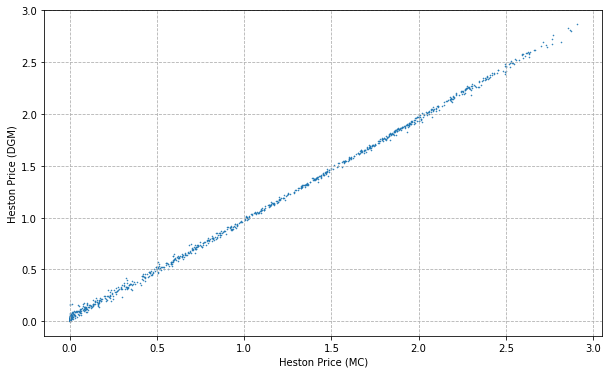

time: 209 ms (started: 2022-08-13 12:59:05 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('Heston Price (MC)')
plt.ylabel('Heston Price (DGM)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

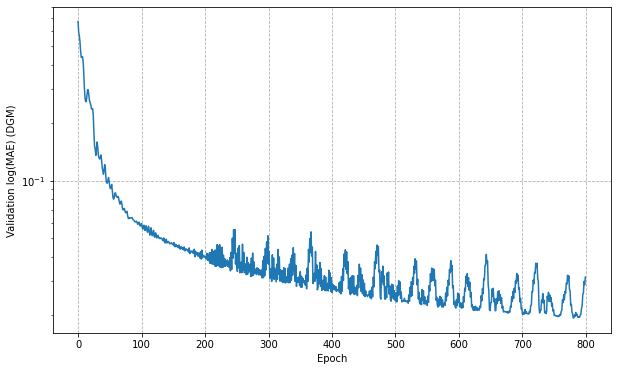

time: 333 ms (started: 2022-08-13 13:01:39 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation log(MAE) (DGM)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

#### DGM w/ IS ON HESTON

In [ ]:
##### DGM w/ IS ON HESTON ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma=1.0

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)

trainEuss_IS = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_IS.hook_interval = 5
trainEuss_IS.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma)
trainEuss_IS.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:35,  1.04it/s]

Epoch 0 - lr 0.001 -  loss: 0.49942727552519905 - Terminal loss 0.3668430745601654 - Internal Loss 0.2810048460960388 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:23,  1.13it/s]

Epoch 4 - lr 0.001 -  loss: 0.052498555845684476 - Terminal loss 0.2634744644165039 - Internal Loss 0.2617129385471344 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:09<01:21,  1.10it/s]

Epoch 9 - lr 0.001 -  loss: 0.012354590619603792 - Terminal loss 0.2535404562950134 - Internal Loss 0.2531408369541168 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:13<01:19,  1.07it/s]

Epoch 14 - lr 0.001 -  loss: 0.007926386160155138 - Terminal loss 0.2521948218345642 - Internal Loss 0.25220823287963867 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:18<01:12,  1.10it/s]

Epoch 19 - lr 0.001 -  loss: 0.00623535592522886 - Terminal loss 0.2517564594745636 - Internal Loss 0.25171616673469543 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:22<01:08,  1.10it/s]

Epoch 24 - lr 0.001 -  loss: 0.005140969064086676 - Terminal loss 0.2515031099319458 - Internal Loss 0.2513616681098938 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:26<01:02,  1.12it/s]

Epoch 29 - lr 0.001 -  loss: 0.0043558113069997895 - Terminal loss 0.25131604075431824 - Internal Loss 0.25111082196235657 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:31<01:00,  1.08it/s]

Epoch 34 - lr 0.001 -  loss: 0.0037582341788543593 - Terminal loss 0.2511700987815857 - Internal Loss 0.2509242594242096 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:36<00:53,  1.12it/s]

Epoch 39 - lr 0.001 -  loss: 0.003288877765751547 - Terminal loss 0.2510563135147095 - Internal Loss 0.2507835626602173 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:40<00:50,  1.09it/s]

Epoch 44 - lr 0.001 -  loss: 0.0029315752391186026 - Terminal loss 0.2509647309780121 - Internal Loss 0.25068390369415283 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:45<00:43,  1.14it/s]

Epoch 49 - lr 0.001 -  loss: 0.0026399382493562168 - Terminal loss 0.2508702576160431 - Internal Loss 0.2505921423435211 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:49<00:40,  1.10it/s]

Epoch 54 - lr 0.001 -  loss: 0.0024073999892506334 - Terminal loss 0.25079968571662903 - Internal Loss 0.2505439519882202 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:53<00:34,  1.18it/s]

Epoch 59 - lr 0.001 -  loss: 0.00223588273446593 - Terminal loss 0.250741183757782 - Internal Loss 0.25050824880599976 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:58<00:31,  1.10it/s]

Epoch 64 - lr 0.001 -  loss: 0.002091382397338748 - Terminal loss 0.2506905794143677 - Internal Loss 0.25047826766967773 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [01:03<00:27,  1.09it/s]

Epoch 69 - lr 0.001 -  loss: 0.001964978175237775 - Terminal loss 0.25064587593078613 - Internal Loss 0.25045204162597656 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:07<00:22,  1.12it/s]

Epoch 74 - lr 0.001 -  loss: 0.001854747999459505 - Terminal loss 0.25060585141181946 - Internal Loss 0.2504286468029022 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:12<00:18,  1.09it/s]

Epoch 79 - lr 0.001 -  loss: 0.001771127986204293 - Terminal loss 0.2505751848220825 - Internal Loss 0.2504151165485382 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:16<00:13,  1.10it/s]

Epoch 84 - lr 0.001 -  loss: 0.0016718599039854275 - Terminal loss 0.250539094209671 - Internal Loss 0.25038865208625793 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:21<00:09,  1.06it/s]

Epoch 89 - lr 0.001 -  loss: 0.0015903777934403883 - Terminal loss 0.2505093514919281 - Internal Loss 0.2503735423088074 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:25<00:04,  1.09it/s]

Epoch 94 - lr 0.001 -  loss: 0.0015846657333895564 - Terminal loss 0.2504933476448059 - Internal Loss 0.25038084387779236 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:30<00:00,  1.11it/s]

Epoch 99 - lr 0.001 -  loss: 0.001521052986693879 - Terminal loss 0.25047188997268677 - Internal Loss 0.2503698468208313 - Structure Loss 0.0 - Supervised Loss 0.0


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 1min 30s (started: 2022-08-13 13:04:21 +00:00)


0.027649713877827286


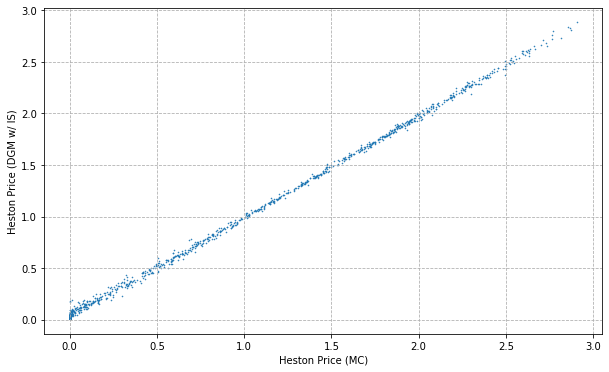

time: 220 ms (started: 2022-08-13 13:10:23 +00:00)


In [ ]:
net_cpu = trainEuss_IS.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('Heston Price (MC)')
plt.ylabel('Heston Price (DGM w/ IS)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

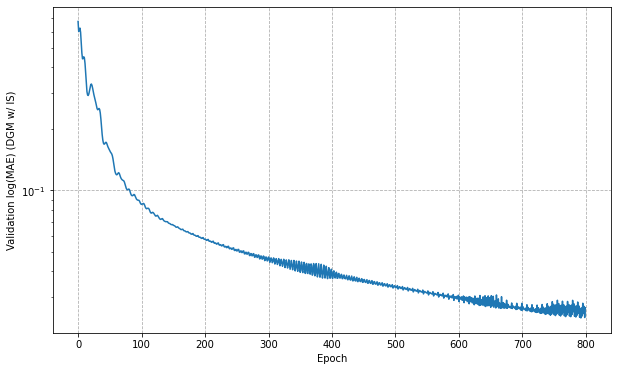

time: 325 ms (started: 2022-08-13 13:10:24 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_IS.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation log(MAE) (DGM w/ IS)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

#### DGM w/ ST ON HESTON

In [ ]:
##### DGM w/ ST ON HESTON ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma=1.0

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
heston_equation.xbreaks = np.linspace(0.0,1.0,4).tolist()
# np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()

trainEuss_ST = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_ST.hook_interval = 5
trainEuss_ST.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_ST.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:36,  1.02it/s]

Epoch 0 - lr 0.001 -  loss: 0.47336004053552944 - Terminal loss 0.7626379728317261 - Internal Loss 0.01814950816333294 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:30,  1.05it/s]

Epoch 4 - lr 0.001 -  loss: 0.10458724862999386 - Terminal loss 0.11433617025613785 - Internal Loss 0.010157612152397633 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:09<01:22,  1.09it/s]

Epoch 9 - lr 0.001 -  loss: 0.03908135534988509 - Terminal loss 0.025213830173015594 - Internal Loss 0.02440931461751461 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:13<01:19,  1.07it/s]

Epoch 14 - lr 0.001 -  loss: 0.018995146370596357 - Terminal loss 0.010156993754208088 - Internal Loss 0.010476818308234215 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:18<01:12,  1.10it/s]

Epoch 19 - lr 0.001 -  loss: 0.06739191027979057 - Terminal loss 0.09938887506723404 - Internal Loss 0.03061818704009056 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:23<01:09,  1.08it/s]

Epoch 24 - lr 0.001 -  loss: 0.037866659462451935 - Terminal loss 0.0437563881278038 - Internal Loss 0.0050261616706848145 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:27<01:02,  1.11it/s]

Epoch 29 - lr 0.001 -  loss: 0.03126518221365081 - Terminal loss 0.013728315941989422 - Internal Loss 0.017442762851715088 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:32<01:00,  1.08it/s]

Epoch 34 - lr 0.001 -  loss: 0.1303920191195276 - Terminal loss 0.07863002270460129 - Internal Loss 0.020287571474909782 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:36<00:54,  1.10it/s]

Epoch 39 - lr 0.001 -  loss: 0.048850785526964396 - Terminal loss 0.033563319593667984 - Internal Loss 0.02085665427148342 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:41<00:53,  1.02it/s]

Epoch 44 - lr 0.001 -  loss: 0.036250884644687176 - Terminal loss 0.026474379003047943 - Internal Loss 0.010427415370941162 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:46<00:48,  1.03it/s]

Epoch 49 - lr 0.001 -  loss: 0.031051751433147326 - Terminal loss 0.014121060259640217 - Internal Loss 0.01762399636209011 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:51<00:42,  1.05it/s]

Epoch 54 - lr 0.001 -  loss: 0.009767842582530446 - Terminal loss 0.008191311731934547 - Internal Loss 0.005446158815175295 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:56<00:42,  1.07s/it]

Epoch 59 - lr 0.001 -  loss: 0.01098849293258455 - Terminal loss 0.003583621233701706 - Internal Loss 0.005832962691783905 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [01:01<00:33,  1.04it/s]

Epoch 64 - lr 0.001 -  loss: 0.034142319216496415 - Terminal loss 0.029120929539203644 - Internal Loss 0.01570024900138378 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [01:06<00:28,  1.06it/s]

Epoch 69 - lr 0.001 -  loss: 0.026575669025381405 - Terminal loss 0.005176209378987551 - Internal Loss 0.013579345308244228 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:10<00:22,  1.11it/s]

Epoch 74 - lr 0.001 -  loss: 0.07469851440853542 - Terminal loss 0.1326976716518402 - Internal Loss 0.009022742509841919 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:15<00:18,  1.06it/s]

Epoch 79 - lr 0.001 -  loss: 0.023853531935148768 - Terminal loss 0.006689787842333317 - Internal Loss 0.006233280524611473 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:20<00:14,  1.00it/s]

Epoch 84 - lr 0.001 -  loss: 0.04046028293669224 - Terminal loss 0.040380023419857025 - Internal Loss 0.02883601374924183 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:24<00:09,  1.06it/s]

Epoch 89 - lr 0.001 -  loss: 0.030640361002749868 - Terminal loss 0.005615515634417534 - Internal Loss 0.012789078988134861 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:29<00:04,  1.04it/s]

Epoch 94 - lr 0.001 -  loss: 0.027180821013947327 - Terminal loss 0.020079514011740685 - Internal Loss 0.018469590693712234 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:34<00:00,  1.06it/s]

Epoch 99 - lr 0.001 -  loss: 0.026120056087772053 - Terminal loss 0.005028062034398317 - Internal Loss 0.01460310909897089 - Structure Loss 0.0 - Supervised Loss 0.0


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 1min 34s (started: 2022-08-13 13:32:43 +00:00)


0.1032278327082337


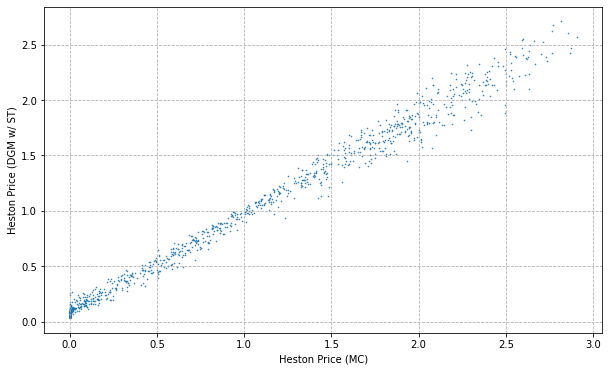

time: 223 ms (started: 2022-08-13 13:34:18 +00:00)


In [ ]:
net_cpu = trainEuss_ST.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('Heston Price (MC)')
plt.ylabel('Heston Price (DGM w/ ST)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

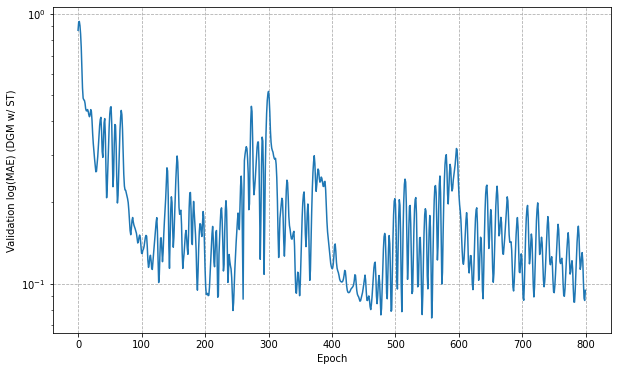

time: 362 ms (started: 2022-08-13 13:34:18 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_ST.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation log(MAE) (DGM w/ ST)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

#### DGM w/ CONSTR ON HESTON

In [ ]:
##### DGM w/ CONSTR ON HESTON ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma=1.0

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)

trainEuss_CONSTR = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_CONSTR.hook_interval = 5
trainEuss_CONSTR.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True)
trainEuss_CONSTR.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:37,  1.02it/s]

Epoch 0 - lr 0.001 -  loss: 0.1657591015100479 - Terminal loss 0.09957253932952881 - Internal Loss 0.0139076616615057 - Structure Loss 0.006343623623251915 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:05<01:40,  1.06s/it]

Epoch 4 - lr 0.001 -  loss: 0.011538693784839578 - Terminal loss 0.006844264920800924 - Internal Loss 0.004753436893224716 - Structure Loss 1.5044853171275463e-05 - Supervised Loss 0.0


 10%|█         | 10/100 [00:09<01:28,  1.02it/s]

Epoch 9 - lr 0.001 -  loss: 0.004435115442093875 - Terminal loss 0.0024717587511986494 - Internal Loss 0.0022598172072321177 - Structure Loss 3.7346777389757335e-05 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:14<01:24,  1.00it/s]

Epoch 14 - lr 0.001 -  loss: 0.0029774658744119937 - Terminal loss 0.0018820607801899314 - Internal Loss 0.0013769110664725304 - Structure Loss 1.474791770306183e-05 - Supervised Loss 0.0


 20%|██        | 20/100 [00:19<01:17,  1.03it/s]

Epoch 19 - lr 0.001 -  loss: 0.0022807060999588836 - Terminal loss 0.0015158358728513122 - Internal Loss 0.000996593851596117 - Structure Loss 1.0554507753113285e-05 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:24<01:13,  1.02it/s]

Epoch 24 - lr 0.001 -  loss: 0.0018495372496545315 - Terminal loss 0.0012581759365275502 - Internal Loss 0.0007862147758714855 - Structure Loss 7.034427653707098e-06 - Supervised Loss 0.0


 30%|███       | 30/100 [00:29<01:09,  1.01it/s]

Epoch 29 - lr 0.001 -  loss: 0.001619840493529207 - Terminal loss 0.0010845423676073551 - Internal Loss 0.0006968238158151507 - Structure Loss 5.336281446943758e-06 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:34<01:03,  1.02it/s]

Epoch 34 - lr 0.001 -  loss: 0.0015660379107834564 - Terminal loss 0.0009606908424757421 - Internal Loss 0.0006850170320831239 - Structure Loss 3.5328309877513675e-06 - Supervised Loss 0.0


 40%|████      | 40/100 [00:39<00:55,  1.07it/s]

Epoch 39 - lr 0.001 -  loss: 0.0012885649403971103 - Terminal loss 0.0008350805728696287 - Internal Loss 0.0005975611275061965 - Structure Loss 2.5934887162293307e-06 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:44<00:52,  1.04it/s]

Epoch 44 - lr 0.001 -  loss: 0.0012548195405138864 - Terminal loss 0.0007609112653881311 - Internal Loss 0.0005614719120785594 - Structure Loss 1.994418425965705e-06 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:48<00:49,  1.01it/s]

Epoch 49 - lr 0.001 -  loss: 0.0018242137739434838 - Terminal loss 0.0007455797167494893 - Internal Loss 0.0005789007991552353 - Structure Loss 1.3381402368395356e-06 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:53<00:43,  1.04it/s]

Epoch 54 - lr 0.001 -  loss: 0.0010490853391173813 - Terminal loss 0.0006487204227596521 - Internal Loss 0.0004898998886346817 - Structure Loss 2.1013222522014985e-06 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:58<00:38,  1.05it/s]

Epoch 59 - lr 0.001 -  loss: 0.0013466579580886497 - Terminal loss 0.0007606746512465179 - Internal Loss 0.0006355259683914483 - Structure Loss 2.4891955945349764e-06 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [01:03<00:32,  1.09it/s]

Epoch 64 - lr 0.001 -  loss: 0.0009193858002415962 - Terminal loss 0.0005898304516449571 - Internal Loss 0.0004310801741667092 - Structure Loss 2.564695705586928e-06 - Supervised Loss 0.0


 70%|███████   | 70/100 [01:08<00:29,  1.02it/s]

Epoch 69 - lr 0.001 -  loss: 0.0009145219810307026 - Terminal loss 0.0005725874798372388 - Internal Loss 0.0004082206869497895 - Structure Loss 2.623139607749181e-06 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:12<00:23,  1.06it/s]

Epoch 74 - lr 0.001 -  loss: 0.0008784742353277074 - Terminal loss 0.0005683231283910573 - Internal Loss 0.0004303909372538328 - Structure Loss 3.4276624774065567e-06 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:17<00:19,  1.02it/s]

Epoch 79 - lr 0.001 -  loss: 0.0010646598594677118 - Terminal loss 0.0007107529672794044 - Internal Loss 0.0005990930367261171 - Structure Loss 3.832275069726165e-06 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:22<00:14,  1.01it/s]

Epoch 84 - lr 0.001 -  loss: 0.0008190345898684529 - Terminal loss 0.0005415654741227627 - Internal Loss 0.00038928003050386906 - Structure Loss 3.863871825160459e-06 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:27<00:09,  1.04it/s]

Epoch 89 - lr 0.001 -  loss: 0.0007589411042216751 - Terminal loss 0.0005055175861343741 - Internal Loss 0.00036628436646424234 - Structure Loss 3.097412445640657e-06 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:32<00:04,  1.02it/s]

Epoch 94 - lr 0.001 -  loss: 0.0008321783518315189 - Terminal loss 0.000474716245662421 - Internal Loss 0.00033933689701370895 - Structure Loss 4.156034265179187e-06 - Supervised Loss 0.0


100%|██████████| 100/100 [01:37<00:00,  1.03it/s]

Epoch 99 - lr 0.001 -  loss: 0.0007514094532881346 - Terminal loss 0.0004648517060559243 - Internal Loss 0.00032017281046137214 - Structure Loss 3.0526884984283242e-06 - Supervised Loss 0.0


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 1min 37s (started: 2022-08-13 13:20:41 +00:00)


0.019703163050459643


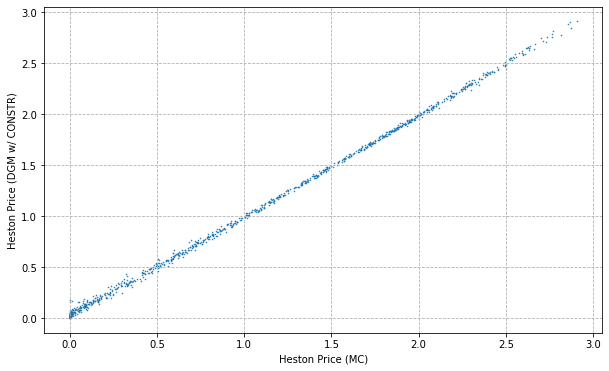

time: 204 ms (started: 2022-08-13 13:22:18 +00:00)


In [ ]:
net_cpu = trainEuss_CONSTR.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('Heston Price (MC)')
plt.ylabel('Heston Price (DGM w/ CONSTR)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

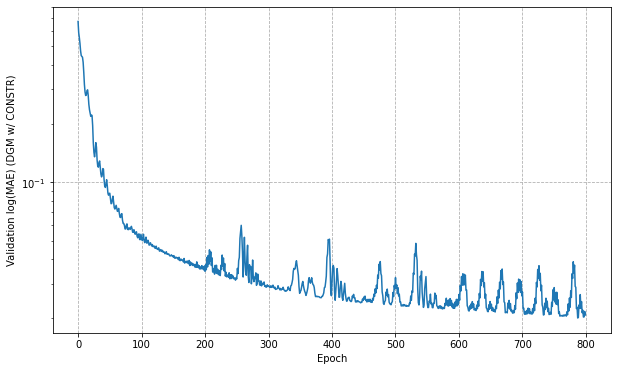

time: 541 ms (started: 2022-08-13 13:22:19 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_CONSTR.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation log(MAE) (DGM w/ CONSTR)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

#### DGM w/ PiNN ON HESTON

In [ ]:
##### DGM w/ PiNN ON HESTON ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)

trainEuss_PiNN = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_PiNN.hook_interval = 5
trainEuss_PiNN.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False)
trainEuss_PiNN.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:01<01:50,  1.11s/it]

Epoch 0 - lr 0.001 -  loss: 0.2540539953969955 - Terminal loss 0.03037320077419281 - Internal Loss 0.09635652601718903 - Structure Loss 0.0 - Supervised Loss 0.02760250850594319


  5%|▌         | 5/100 [00:05<01:42,  1.08s/it]

Epoch 4 - lr 0.001 -  loss: 0.011043668684847577 - Terminal loss 0.003052968066185713 - Internal Loss 0.004347067791968584 - Structure Loss 0.0 - Supervised Loss 0.0026066212915517376


 10%|█         | 10/100 [00:10<01:36,  1.07s/it]

Epoch 9 - lr 0.001 -  loss: 0.004740944369529411 - Terminal loss 0.00153244414832443 - Internal Loss 0.002378573175519705 - Structure Loss 0.0 - Supervised Loss 0.0010163285927991068


 15%|█▌        | 15/100 [00:15<01:29,  1.06s/it]

Epoch 14 - lr 0.001 -  loss: 0.0032857298857461442 - Terminal loss 0.0012230493593961 - Internal Loss 0.001608564518392086 - Structure Loss 0.0 - Supervised Loss 0.00066096628820979


 20%|██        | 20/100 [00:21<01:32,  1.16s/it]

Epoch 19 - lr 0.001 -  loss: 0.002525449457129541 - Terminal loss 0.0010269474005326629 - Internal Loss 0.00121290422976017 - Structure Loss 0.0 - Supervised Loss 0.0004926596760459956


 25%|██▌       | 25/100 [00:27<01:28,  1.18s/it]

Epoch 24 - lr 0.001 -  loss: 0.002103136301292515 - Terminal loss 0.0008595645776949823 - Internal Loss 0.0009839381091296673 - Structure Loss 0.0 - Supervised Loss 0.0003845348829929152


 30%|███       | 30/100 [00:33<01:15,  1.07s/it]

Epoch 29 - lr 0.001 -  loss: 0.0018679669356991002 - Terminal loss 0.0007553589530289173 - Internal Loss 0.0008719544857740402 - Structure Loss 0.0 - Supervised Loss 0.00032725056243803485


 35%|███▌      | 35/100 [00:38<01:12,  1.12s/it]

Epoch 34 - lr 0.001 -  loss: 0.0016185692575164284 - Terminal loss 0.0006739941891282797 - Internal Loss 0.0007726185722276568 - Structure Loss 0.0 - Supervised Loss 0.00028340426177095746


 40%|████      | 40/100 [00:44<01:06,  1.11s/it]

Epoch 39 - lr 0.001 -  loss: 0.0016150429139228368 - Terminal loss 0.0006459770957008004 - Internal Loss 0.0007761383894830942 - Structure Loss 0.0 - Supervised Loss 0.00030000545859418205


 45%|████▌     | 45/100 [00:49<00:58,  1.07s/it]

Epoch 44 - lr 0.001 -  loss: 0.0013489961228846333 - Terminal loss 0.0005962771247141063 - Internal Loss 0.0006287862197495997 - Structure Loss 0.0 - Supervised Loss 0.00025541736199609073


 50%|█████     | 50/100 [00:55<00:56,  1.12s/it]

Epoch 49 - lr 0.001 -  loss: 0.0012573837313214632 - Terminal loss 0.0005446964059956372 - Internal Loss 0.0005731576820835471 - Structure Loss 0.0 - Supervised Loss 0.00022325240856920924


 55%|█████▌    | 55/100 [01:00<00:49,  1.10s/it]

Epoch 54 - lr 0.001 -  loss: 0.0017997900269595929 - Terminal loss 0.0004952407907694578 - Internal Loss 0.0005468925228342414 - Structure Loss 0.0 - Supervised Loss 0.0001978069369054769


 60%|██████    | 60/100 [01:05<00:42,  1.05s/it]

Epoch 59 - lr 0.001 -  loss: 0.0020709001026782115 - Terminal loss 0.0007896204479038715 - Internal Loss 0.0007212969358079135 - Structure Loss 0.0 - Supervised Loss 0.0005198573474536315


 65%|██████▌   | 65/100 [01:11<00:38,  1.10s/it]

Epoch 64 - lr 0.001 -  loss: 0.0010325760749070319 - Terminal loss 0.0004521597293205559 - Internal Loss 0.0004666614986490458 - Structure Loss 0.0 - Supervised Loss 0.0001828178123092915


 70%|███████   | 70/100 [01:16<00:32,  1.07s/it]

Epoch 69 - lr 0.001 -  loss: 0.0014990253515574077 - Terminal loss 0.00044018225162290037 - Internal Loss 0.00044555842760019004 - Structure Loss 0.0 - Supervised Loss 0.00017782667373445496


 75%|███████▌  | 75/100 [01:22<00:26,  1.05s/it]

Epoch 74 - lr 0.001 -  loss: 0.0009376691353553141 - Terminal loss 0.0004189612518530339 - Internal Loss 0.00041847486863844097 - Structure Loss 0.0 - Supervised Loss 0.00017122127237163473


 80%|████████  | 80/100 [01:27<00:22,  1.11s/it]

Epoch 79 - lr 0.001 -  loss: 0.0009460252264891054 - Terminal loss 0.0004341179155744612 - Internal Loss 0.00041227994370274246 - Structure Loss 0.0 - Supervised Loss 0.00018417950882785146


 85%|████████▌ | 85/100 [01:32<00:16,  1.08s/it]

Epoch 84 - lr 0.001 -  loss: 0.0008617936290036203 - Terminal loss 0.0003877905837725848 - Internal Loss 0.0003829479683190584 - Structure Loss 0.0 - Supervised Loss 0.0001589178973097808


 90%|█████████ | 90/100 [01:38<00:10,  1.08s/it]

Epoch 89 - lr 0.001 -  loss: 0.0008411378301251087 - Terminal loss 0.00038206286262720823 - Internal Loss 0.00036920743877999485 - Structure Loss 0.0 - Supervised Loss 0.0001532079228024429


 95%|█████████▌| 95/100 [01:43<00:05,  1.11s/it]

Epoch 94 - lr 0.001 -  loss: 0.0014803282604497995 - Terminal loss 0.0003782107960432768 - Internal Loss 0.0003942560579162091 - Structure Loss 0.0 - Supervised Loss 0.0001700129702675807


100%|██████████| 100/100 [01:49<00:00,  1.09s/it]

Epoch 99 - lr 0.001 -  loss: 0.0007839487906846165 - Terminal loss 0.00034425436751917005 - Internal Loss 0.0003476543352007866 - Structure Loss 0.0 - Supervised Loss 0.00014177222529835405


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 1min 49s (started: 2022-08-13 13:34:46 +00:00)


0.015461419092316436


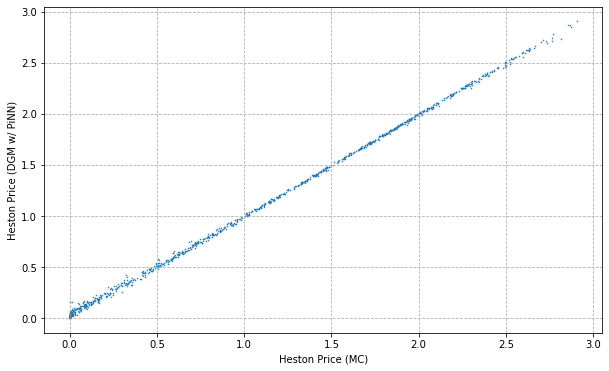

time: 211 ms (started: 2022-08-13 13:36:36 +00:00)


In [ ]:
net_cpu = trainEuss_PiNN.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('Heston Price (MC)')
plt.ylabel('Heston Price (DGM w/ PiNN)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

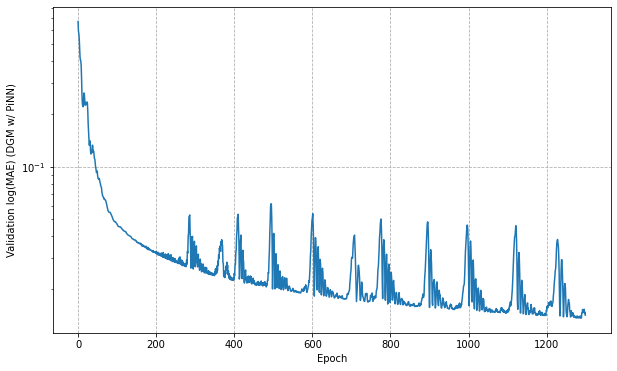

time: 320 ms (started: 2022-08-13 13:36:36 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_PiNN.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation log(MAE) (DGM w/ PiNN)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

#### DGM w/ STLONG ON HESTON

In [ ]:
##### DGM w/ STLONG ON HESTON ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma=1.0

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)
heston_equation.xbreaks = np.linspace(0.0,1.0,4).tolist()
# np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()

trainEuss_STL = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_STL.hook_interval = 100
trainEuss_STL.train(epoch = 5000, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_STL.net.to(torch.device("cuda:0"))


  0%|          | 1/5000 [00:00<1:17:16,  1.08it/s]

Epoch 0 - lr 0.001 -  loss: 0.47336004053552944 - Terminal loss 0.7626379728317261 - Internal Loss 0.01814950816333294 - Structure Loss 0.0 - Supervised Loss 0.0


  2%|▏         | 100/5000 [01:31<1:10:56,  1.15it/s]

Epoch 99 - lr 0.001 -  loss: 0.026120056087772053 - Terminal loss 0.005028062034398317 - Internal Loss 0.01460310909897089 - Structure Loss 0.0 - Supervised Loss 0.0


  4%|▍         | 200/5000 [03:03<1:10:50,  1.13it/s]

Epoch 199 - lr 0.001 -  loss: 0.018119926771356 - Terminal loss 0.017413873225450516 - Internal Loss 0.004858857020735741 - Structure Loss 0.0 - Supervised Loss 0.0


  6%|▌         | 300/5000 [04:35<1:14:07,  1.06it/s]

Epoch 299 - lr 0.001 -  loss: 0.014559447196208768 - Terminal loss 0.002061369363218546 - Internal Loss 0.006372393108904362 - Structure Loss 0.0 - Supervised Loss 0.0


  8%|▊         | 400/5000 [06:08<1:12:41,  1.05it/s]

Epoch 399 - lr 0.001 -  loss: 0.018889935066302616 - Terminal loss 0.0022230111062526703 - Internal Loss 0.007495895493775606 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 500/5000 [07:41<1:08:59,  1.09it/s]

Epoch 499 - lr 0.001 -  loss: 0.027851805090904236 - Terminal loss 0.015058347024023533 - Internal Loss 0.007697819732129574 - Structure Loss 0.0 - Supervised Loss 0.0


 12%|█▏        | 600/5000 [09:14<1:06:55,  1.10it/s]

Epoch 599 - lr 0.001 -  loss: 0.012210897920239303 - Terminal loss 0.004297343082726002 - Internal Loss 0.0017540407134220004 - Structure Loss 0.0 - Supervised Loss 0.0


 14%|█▍        | 700/5000 [10:45<1:05:16,  1.10it/s]

Epoch 699 - lr 0.001 -  loss: 0.020421679493867688 - Terminal loss 0.02067713998258114 - Internal Loss 0.00047038335469551384 - Structure Loss 0.0 - Supervised Loss 0.0


 16%|█▌        | 800/5000 [12:15<1:01:13,  1.14it/s]

Epoch 799 - lr 0.001 -  loss: 0.005567832306648294 - Terminal loss 0.0035565663129091263 - Internal Loss 0.0032938672229647636 - Structure Loss 0.0 - Supervised Loss 0.0


 18%|█▊        | 900/5000 [13:46<1:03:51,  1.07it/s]

Epoch 899 - lr 0.001 -  loss: 0.009207125960124863 - Terminal loss 0.0022974717430770397 - Internal Loss 0.005030377302318811 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 1000/5000 [15:16<1:02:01,  1.07it/s]

Epoch 999 - lr 0.001 -  loss: 0.013391168115453588 - Terminal loss 0.002057589590549469 - Internal Loss 0.007615215610712767 - Structure Loss 0.0 - Supervised Loss 0.0


 22%|██▏       | 1100/5000 [16:46<57:33,  1.13it/s]

Epoch 1099 - lr 0.001 -  loss: 0.00655504905929168 - Terminal loss 0.0016820671735331416 - Internal Loss 0.0019581494852900505 - Structure Loss 0.0 - Supervised Loss 0.0


 24%|██▍       | 1200/5000 [18:13<54:45,  1.16it/s]

Epoch 1199 - lr 0.001 -  loss: 0.006772716477927234 - Terminal loss 0.003409650642424822 - Internal Loss 0.005296294577419758 - Structure Loss 0.0 - Supervised Loss 0.0


 26%|██▌       | 1300/5000 [19:40<54:43,  1.13it/s]

Epoch 1299 - lr 0.001 -  loss: 0.04757934560378393 - Terminal loss 0.012373549863696098 - Internal Loss 0.007751287426799536 - Structure Loss 0.0 - Supervised Loss 0.0


 28%|██▊       | 1400/5000 [21:08<53:11,  1.13it/s]

Epoch 1399 - lr 0.001 -  loss: 0.0032678644897209275 - Terminal loss 0.0008947363821789622 - Internal Loss 0.0020857935305684805 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 1500/5000 [22:33<52:06,  1.12it/s]

Epoch 1499 - lr 0.001 -  loss: 0.005214515918244918 - Terminal loss 0.0009758660453371704 - Internal Loss 0.003262884449213743 - Structure Loss 0.0 - Supervised Loss 0.0


 32%|███▏      | 1600/5000 [24:00<50:41,  1.12it/s]

Epoch 1599 - lr 0.001 -  loss: 0.0030583873028970426 - Terminal loss 0.0004942804807797074 - Internal Loss 0.0016869164537638426 - Structure Loss 0.0 - Supervised Loss 0.0


 34%|███▍      | 1700/5000 [25:33<51:21,  1.07it/s]

Epoch 1699 - lr 0.001 -  loss: 0.006196823540247149 - Terminal loss 0.0007170886965468526 - Internal Loss 0.0039116134867072105 - Structure Loss 0.0 - Supervised Loss 0.0


 36%|███▌      | 1800/5000 [27:05<49:53,  1.07it/s]

Epoch 1799 - lr 0.001 -  loss: 0.008191727205283113 - Terminal loss 0.0015564054483547807 - Internal Loss 0.0011966193560510874 - Structure Loss 0.0 - Supervised Loss 0.0


 38%|███▊      | 1900/5000 [28:40<48:53,  1.06it/s]

Epoch 1899 - lr 0.001 -  loss: 0.00534076305727164 - Terminal loss 0.000700034259352833 - Internal Loss 0.0035748863592743874 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 2000/5000 [30:15<47:26,  1.05it/s]

Epoch 1999 - lr 0.001 -  loss: 0.003740847317708863 - Terminal loss 0.002550631994381547 - Internal Loss 0.002863198285922408 - Structure Loss 0.0 - Supervised Loss 0.0


 42%|████▏     | 2100/5000 [31:47<47:37,  1.01it/s]

Epoch 2099 - lr 0.001 -  loss: 0.008859364057166709 - Terminal loss 0.0015922279562801123 - Internal Loss 0.0014866369310766459 - Structure Loss 0.0 - Supervised Loss 0.0


 44%|████▍     | 2200/5000 [33:20<42:48,  1.09it/s]

Epoch 2199 - lr 0.001 -  loss: 0.003952392519244717 - Terminal loss 0.0014157501282170415 - Internal Loss 0.003488743444904685 - Structure Loss 0.0 - Supervised Loss 0.0


 46%|████▌     | 2300/5000 [34:52<42:08,  1.07it/s]

Epoch 2299 - lr 0.001 -  loss: 0.004006713318328063 - Terminal loss 0.0008132600924000144 - Internal Loss 0.0029201493598520756 - Structure Loss 0.0 - Supervised Loss 0.0


 48%|████▊     | 2400/5000 [36:25<40:29,  1.07it/s]

Epoch 2399 - lr 0.001 -  loss: 0.008273947414838605 - Terminal loss 0.0010591981699690223 - Internal Loss 0.0003892258682753891 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 2500/5000 [37:58<38:08,  1.09it/s]

Epoch 2499 - lr 0.001 -  loss: 0.004875707672908902 - Terminal loss 0.0056785414926707745 - Internal Loss 0.002114449394866824 - Structure Loss 0.0 - Supervised Loss 0.0


 52%|█████▏    | 2600/5000 [39:30<35:03,  1.14it/s]

Epoch 2599 - lr 0.001 -  loss: 0.0035586648931105933 - Terminal loss 0.0004108874418307096 - Internal Loss 0.002167203463613987 - Structure Loss 0.0 - Supervised Loss 0.0


 54%|█████▍    | 2700/5000 [41:02<34:51,  1.10it/s]

Epoch 2699 - lr 0.001 -  loss: 0.0041118471417576075 - Terminal loss 0.0006762052653357387 - Internal Loss 0.0025942642241716385 - Structure Loss 0.0 - Supervised Loss 0.0


 56%|█████▌    | 2800/5000 [42:32<32:16,  1.14it/s]

Epoch 2799 - lr 0.001 -  loss: 0.0028080562802238595 - Terminal loss 0.0005457853549160063 - Internal Loss 0.002324190689250827 - Structure Loss 0.0 - Supervised Loss 0.0


 58%|█████▊    | 2900/5000 [44:01<31:42,  1.10it/s]

Epoch 2899 - lr 0.001 -  loss: 0.0036663464011831414 - Terminal loss 0.000978974741883576 - Internal Loss 0.0026732413098216057 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 3000/5000 [45:33<30:49,  1.08it/s]

Epoch 2999 - lr 0.001 -  loss: 0.0033213477581739426 - Terminal loss 0.0006777609814889729 - Internal Loss 0.002733539091423154 - Structure Loss 0.0 - Supervised Loss 0.0


 62%|██████▏   | 3100/5000 [47:06<30:03,  1.05it/s]

Epoch 3099 - lr 0.001 -  loss: 0.002236978707110716 - Terminal loss 0.0003721540851984173 - Internal Loss 0.0017610007198527455 - Structure Loss 0.0 - Supervised Loss 0.0


 64%|██████▍   | 3200/5000 [48:38<29:26,  1.02it/s]

Epoch 3199 - lr 0.001 -  loss: 0.004590053163054917 - Terminal loss 0.0007195708458311856 - Internal Loss 0.0040072547271847725 - Structure Loss 0.0 - Supervised Loss 0.0


 66%|██████▌   | 3300/5000 [50:09<26:23,  1.07it/s]

Epoch 3299 - lr 0.001 -  loss: 0.003119847426811854 - Terminal loss 0.002259888220578432 - Internal Loss 0.0012583490461111069 - Structure Loss 0.0 - Supervised Loss 0.0


 68%|██████▊   | 3400/5000 [51:39<24:36,  1.08it/s]

Epoch 3399 - lr 0.001 -  loss: 0.003923364138851563 - Terminal loss 0.0004548859433270991 - Internal Loss 0.0026846325490623713 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 3500/5000 [53:11<23:39,  1.06it/s]

Epoch 3499 - lr 0.001 -  loss: 0.0032373733508090177 - Terminal loss 0.0004896082100458443 - Internal Loss 0.0025787658523768187 - Structure Loss 0.0 - Supervised Loss 0.0


 72%|███████▏  | 3600/5000 [54:45<22:01,  1.06it/s]

Epoch 3599 - lr 0.001 -  loss: 0.00924736551112599 - Terminal loss 0.0035178184043616056 - Internal Loss 0.00569110969081521 - Structure Loss 0.0 - Supervised Loss 0.0


 74%|███████▍  | 3700/5000 [56:17<19:33,  1.11it/s]

Epoch 3699 - lr 0.001 -  loss: 0.0035179087426513433 - Terminal loss 0.0003525569918565452 - Internal Loss 0.002611918607726693 - Structure Loss 0.0 - Supervised Loss 0.0


 76%|███████▌  | 3800/5000 [57:48<18:18,  1.09it/s]

Epoch 3799 - lr 0.001 -  loss: 0.0018677917153884966 - Terminal loss 0.0003689205041155219 - Internal Loss 0.0013232476776465774 - Structure Loss 0.0 - Supervised Loss 0.0


 78%|███████▊  | 3900/5000 [59:19<17:32,  1.05it/s]

Epoch 3899 - lr 0.001 -  loss: 0.002303777081477973 - Terminal loss 0.0002711755514610559 - Internal Loss 0.0017237772699445486 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 4000/5000 [1:00:51<15:03,  1.11it/s]

Epoch 3999 - lr 0.001 -  loss: 0.003493037760361201 - Terminal loss 0.00042516374378465116 - Internal Loss 0.002309465315192938 - Structure Loss 0.0 - Supervised Loss 0.0


 82%|████████▏ | 4100/5000 [1:02:21<13:28,  1.11it/s]

Epoch 4099 - lr 0.001 -  loss: 0.001160108329107364 - Terminal loss 0.000244139286223799 - Internal Loss 0.0006571791018359363 - Structure Loss 0.0 - Supervised Loss 0.0


 84%|████████▍ | 4200/5000 [1:03:50<12:02,  1.11it/s]

Epoch 4199 - lr 0.001 -  loss: 0.004367212609698375 - Terminal loss 0.00048200617311522365 - Internal Loss 0.003634772961959243 - Structure Loss 0.0 - Supervised Loss 0.0


 86%|████████▌ | 4300/5000 [1:05:19<10:11,  1.14it/s]

Epoch 4299 - lr 0.001 -  loss: 0.00495224236510694 - Terminal loss 0.0016033536521717906 - Internal Loss 0.0022643511183559895 - Structure Loss 0.0 - Supervised Loss 0.0


 88%|████████▊ | 4400/5000 [1:06:46<08:36,  1.16it/s]

Epoch 4399 - lr 0.001 -  loss: 0.003181016887538135 - Terminal loss 0.0004437836760189384 - Internal Loss 0.0020601474680006504 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 4500/5000 [1:08:12<07:12,  1.16it/s]

Epoch 4499 - lr 0.001 -  loss: 0.002220963179651234 - Terminal loss 0.00021485726756509393 - Internal Loss 0.0018035307293757796 - Structure Loss 0.0 - Supervised Loss 0.0


 92%|█████████▏| 4600/5000 [1:09:38<05:46,  1.16it/s]

Epoch 4599 - lr 0.001 -  loss: 0.0011487410196827517 - Terminal loss 0.00023119535762816668 - Internal Loss 0.0007423427887260914 - Structure Loss 0.0 - Supervised Loss 0.0


 94%|█████████▍| 4700/5000 [1:11:10<04:48,  1.04it/s]

Epoch 4699 - lr 0.001 -  loss: 0.0035428678901452157 - Terminal loss 0.0006790193729102612 - Internal Loss 0.0021965980995446444 - Structure Loss 0.0 - Supervised Loss 0.0


 96%|█████████▌| 4800/5000 [1:12:45<03:31,  1.06s/it]

Epoch 4799 - lr 0.001 -  loss: 0.002381439812274443 - Terminal loss 0.0023461640812456608 - Internal Loss 0.00028928942629136145 - Structure Loss 0.0 - Supervised Loss 0.0


 98%|█████████▊| 4900/5000 [1:14:21<01:31,  1.09it/s]

Epoch 4899 - lr 0.001 -  loss: 0.002208479693055981 - Terminal loss 0.000773423002101481 - Internal Loss 0.0005113198421895504 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 5000/5000 [1:15:53<00:00,  1.10it/s]

Epoch 4999 - lr 0.001 -  loss: 0.004471451302783357 - Terminal loss 0.0006433363887481391 - Internal Loss 0.0014107468305155635 - Structure Loss 0.0 - Supervised Loss 0.0


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 1h 15min 53s (started: 2022-08-13 13:46:36 +00:00)


0.05106451486345571


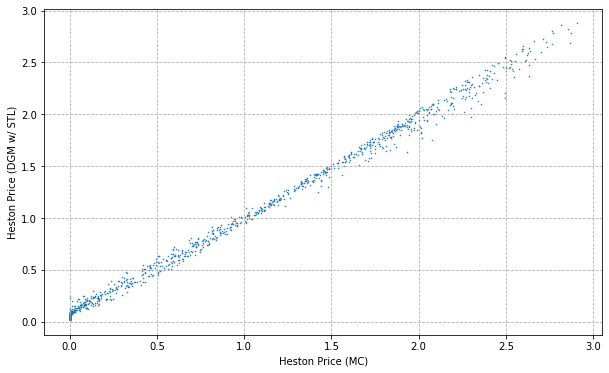

time: 214 ms (started: 2022-08-13 15:02:30 +00:00)


In [ ]:
net_cpu = trainEuss_STL.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('Heston Price (MC)')
plt.ylabel('Heston Price (DGM w/ STL)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

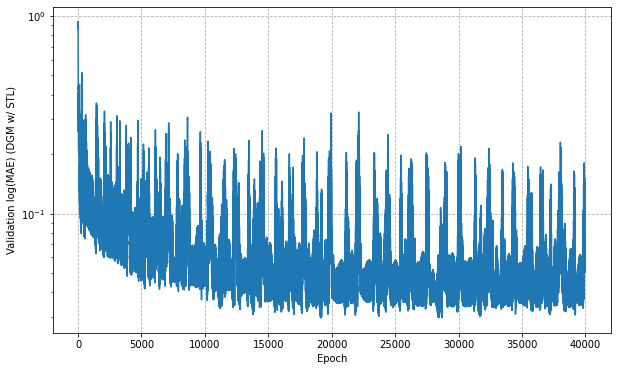

time: 494 ms (started: 2022-08-13 15:02:30 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_STL.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation log(MAE) (DGM w/ STL)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

#### DGM w/ PiNN IS CONSTR ON HESTON

In [ ]:
##### DGM w/ PiNN ON HESTON ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma = 0.001

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockBase(net)

trainEuss_PiNN_IS_CONSTR = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_PiNN_IS_CONSTR.hook_interval = 5
trainEuss_PiNN_IS_CONSTR.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma)
trainEuss_PiNN_IS_CONSTR.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:01<02:10,  1.32s/it]

Epoch 0 - lr 0.001 -  loss: 0.19944946541975878 - Terminal loss 0.06250657886266708 - Internal Loss 0.06251455098390579 - Structure Loss 0.0625024363398552 - Supervised Loss 0.06250606674914407


  5%|▌         | 5/100 [00:06<01:53,  1.19s/it]

Epoch 4 - lr 0.001 -  loss: 0.007782195653214833 - Terminal loss 0.06250061839818954 - Internal Loss 0.0625007376074791 - Structure Loss 0.06250002235174179 - Supervised Loss 0.06250041498368872


 10%|█         | 10/100 [00:12<01:45,  1.18s/it]

Epoch 9 - lr 0.001 -  loss: 0.003425503262121892 - Terminal loss 0.06250032037496567 - Internal Loss 0.06250040233135223 - Structure Loss 0.0625000074505806 - Supervised Loss 0.06250017763754205


 15%|█▌        | 15/100 [00:18<01:44,  1.23s/it]

Epoch 14 - lr 0.001 -  loss: 0.0023561438463737877 - Terminal loss 0.0625002384185791 - Internal Loss 0.06250026822090149 - Structure Loss 0.0625 - Supervised Loss 0.06250011634361087


 20%|██        | 20/100 [00:24<01:37,  1.22s/it]

Epoch 19 - lr 0.001 -  loss: 0.0018085673838005064 - Terminal loss 0.06250020116567612 - Internal Loss 0.06250020861625671 - Structure Loss 0.0625 - Supervised Loss 0.0625000924807972


 25%|██▌       | 25/100 [00:30<01:30,  1.20s/it]

Epoch 24 - lr 0.001 -  loss: 0.0015622423955584542 - Terminal loss 0.06250016391277313 - Internal Loss 0.06250017881393433 - Structure Loss 0.0625 - Supervised Loss 0.06250007459074015


 30%|███       | 30/100 [00:36<01:23,  1.19s/it]

Epoch 29 - lr 0.001 -  loss: 0.0014137387002969655 - Terminal loss 0.06250015646219254 - Internal Loss 0.06250016391277313 - Structure Loss 0.0625 - Supervised Loss 0.06250006951268412


 35%|███▌      | 35/100 [00:42<01:22,  1.27s/it]

Epoch 34 - lr 0.001 -  loss: 0.002611566635439215 - Terminal loss 0.06250017136335373 - Internal Loss 0.06250017881393433 - Structure Loss 0.0625 - Supervised Loss 0.06250008668581673


 40%|████      | 40/100 [00:49<01:18,  1.32s/it]

Epoch 39 - lr 0.001 -  loss: 0.0010679191707775473 - Terminal loss 0.06250011920928955 - Internal Loss 0.06250012665987015 - Structure Loss 0.0625 - Supervised Loss 0.06250004759880456


 45%|████▌     | 45/100 [00:55<01:07,  1.23s/it]

Epoch 44 - lr 0.001 -  loss: 0.0010040501384674814 - Terminal loss 0.06250011175870895 - Internal Loss 0.06250011920928955 - Structure Loss 0.0625 - Supervised Loss 0.06250004415965105


 50%|█████     | 50/100 [01:01<01:04,  1.29s/it]

Epoch 49 - lr 0.001 -  loss: 0.00119975515418463 - Terminal loss 0.06250010430812836 - Internal Loss 0.06250011175870895 - Structure Loss 0.0625 - Supervised Loss 0.06250004242011166


 55%|█████▌    | 55/100 [01:07<00:56,  1.26s/it]

Epoch 54 - lr 0.001 -  loss: 0.0011593497926140576 - Terminal loss 0.06250012665987015 - Internal Loss 0.06250011920928955 - Structure Loss 0.0625 - Supervised Loss 0.06250007130684074


 60%|██████    | 60/100 [01:14<00:51,  1.29s/it]

Epoch 59 - lr 0.001 -  loss: 0.0008621584723974721 - Terminal loss 0.06250009685754776 - Internal Loss 0.06250009685754776 - Structure Loss 0.0625 - Supervised Loss 0.06250004485335288


 65%|██████▌   | 65/100 [01:20<00:44,  1.26s/it]

Epoch 64 - lr 0.001 -  loss: 0.0007897127998397481 - Terminal loss 0.06250008940696716 - Internal Loss 0.06250008940696716 - Structure Loss 0.0625 - Supervised Loss 0.06250003673994796


 70%|███████   | 70/100 [01:26<00:37,  1.24s/it]

Epoch 69 - lr 0.001 -  loss: 0.0008290526358026931 - Terminal loss 0.06250008195638657 - Internal Loss 0.06250008940696716 - Structure Loss 0.0625 - Supervised Loss 0.06250003482918365


 75%|███████▌  | 75/100 [01:32<00:30,  1.23s/it]

Epoch 74 - lr 0.001 -  loss: 0.0007174277705362359 - Terminal loss 0.06250008940696716 - Internal Loss 0.06250008195638657 - Structure Loss 0.0625 - Supervised Loss 0.06250003389871348


 80%|████████  | 80/100 [01:38<00:24,  1.24s/it]

Epoch 79 - lr 0.001 -  loss: 0.0006749305218999512 - Terminal loss 0.06250007450580597 - Internal Loss 0.06250007450580597 - Structure Loss 0.0625 - Supervised Loss 0.06250002940544164


 85%|████████▌ | 85/100 [01:45<00:20,  1.36s/it]

Epoch 84 - lr 0.001 -  loss: 0.000858662243005617 - Terminal loss 0.06250008940696716 - Internal Loss 0.06250008195638657 - Structure Loss 0.0625 - Supervised Loss 0.06250003945682032


 90%|█████████ | 90/100 [01:51<00:12,  1.28s/it]

Epoch 89 - lr 0.001 -  loss: 0.0006233943900042563 - Terminal loss 0.06250007450580597 - Internal Loss 0.06250007450580597 - Structure Loss 0.0625 - Supervised Loss 0.06250002647631223


 95%|█████████▌| 95/100 [01:57<00:06,  1.25s/it]

Epoch 94 - lr 0.001 -  loss: 0.0006979193721006178 - Terminal loss 0.06250006705522537 - Internal Loss 0.06250006705522537 - Structure Loss 0.0625 - Supervised Loss 0.06250002549285417


100%|██████████| 100/100 [02:04<00:00,  1.24s/it]

Epoch 99 - lr 0.001 -  loss: 0.0005546693941162695 - Terminal loss 0.06250006705522537 - Internal Loss 0.06250006705522537 - Structure Loss 0.0625 - Supervised Loss 0.06250002418064965


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 2min 4s (started: 2022-08-13 16:50:51 +00:00)


0.01718927536242152


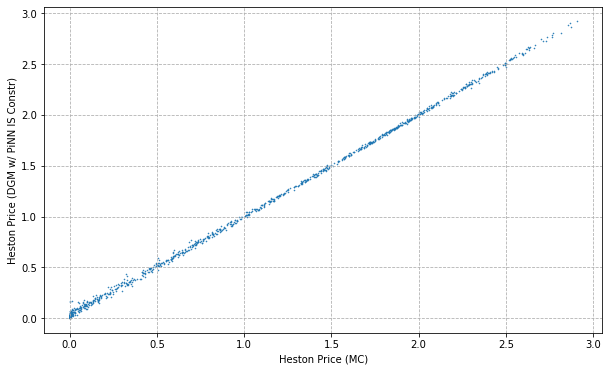

time: 245 ms (started: 2022-08-13 16:52:55 +00:00)


In [ ]:
net_cpu = trainEuss_PiNN_IS_CONSTR.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('Heston Price (MC)')
plt.ylabel('Heston Price (DGM w/ PiNN IS Constr)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(heston_analytical).numpy() - torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy())))

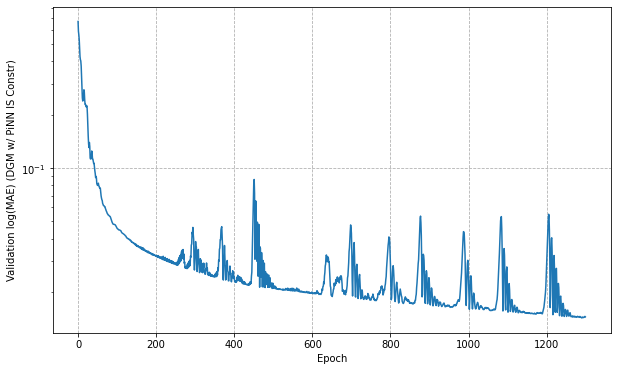

time: 317 ms (started: 2022-08-13 16:52:56 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_PiNN_IS_CONSTR.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation log(MAE) (DGM w/ PiNN IS Constr)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

#### DGM w/ CURRICULUM ON HESTON

In [ ]:
pp(validation_data_bs_px_curr.shape)
pp(validation_data_curr['heston_analytical_sol'].shape)
validation_data_curr['heston_analytical_sol'][0:4,0:4]


torch.Size([2000, 1])
torch.Size([2000, 2000])


tensor([[-1.0936e-08, -9.3847e-01,  1.0453e+00,  1.4023e+00],
        [ 9.3847e-01,  1.2132e-09,  1.9838e+00,  2.3407e+00],
        [-1.0163e+00, -1.9548e+00,  2.8950e-02,  3.8592e-01],
        [-1.4023e+00, -2.3407e+00, -3.5697e-01,  3.8626e-06]], device='cuda:0',
       dtype=torch.float64)

time: 10.8 ms (started: 2022-08-15 06:54:05 +00:00)


In [ ]:
#### DGM w/ CURRICULUM based on Black-Scholes Closed Form
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3




net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
trainEuss_CurrBS = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_CurrBS.hook_interval = 5
trainEuss_CurrBS.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data_curr, supervised_data=None, apply_structural_loss=False)
trainEuss_CurrBS.net.to(torch.device("cuda:0"))

  1%|          | 1/100 [00:06<10:08,  6.14s/it]

Epoch 0 - lr 0.001 -  loss: 0.12778435978624555 - Terminal loss 0.0027281439397484064 - Internal Loss 0.06158260628581047 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:16<04:40,  2.95s/it]

Epoch 4 - lr 0.001 -  loss: 0.05869067211945852 - Terminal loss 0.00013145200500730425 - Internal Loss 0.06116706132888794 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:30<04:13,  2.82s/it]

Epoch 9 - lr 0.001 -  loss: 0.058232581035958395 - Terminal loss 0.00023412374139297754 - Internal Loss 0.06037496402859688 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:41<03:10,  2.24s/it]

Epoch 14 - lr 0.001 -  loss: 0.05697763297292921 - Terminal loss 0.0004263069131411612 - Internal Loss 0.05832475796341896 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:52<03:00,  2.26s/it]

Epoch 19 - lr 0.001 -  loss: 0.05581855153044065 - Terminal loss 0.00039912821375764906 - Internal Loss 0.05664687231183052 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [01:05<03:03,  2.45s/it]

Epoch 24 - lr 0.001 -  loss: 0.05346366928683387 - Terminal loss 0.0004730536020360887 - Internal Loss 0.053317200392484665 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [01:16<02:38,  2.27s/it]

Epoch 29 - lr 0.001 -  loss: 0.04763512727287081 - Terminal loss 0.0014309255639091134 - Internal Loss 0.042218051850795746 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [01:27<02:28,  2.28s/it]

Epoch 34 - lr 0.001 -  loss: 0.0376150059617228 - Terminal loss 0.0010877040913328528 - Internal Loss 0.02876301109790802 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [01:39<02:17,  2.29s/it]

Epoch 39 - lr 0.001 -  loss: 0.03159992438223627 - Terminal loss 0.0012463339371606708 - Internal Loss 0.022351132705807686 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [01:50<02:06,  2.29s/it]

Epoch 44 - lr 0.001 -  loss: 0.028079235305388767 - Terminal loss 0.0008658666047267616 - Internal Loss 0.0187187809497118 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [02:01<01:54,  2.29s/it]

Epoch 49 - lr 0.001 -  loss: 0.026530901797943644 - Terminal loss 0.0006103999330662191 - Internal Loss 0.016896402463316917 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [02:13<01:41,  2.25s/it]

Epoch 54 - lr 0.001 -  loss: 0.025158428069618013 - Terminal loss 0.0006103756022639573 - Internal Loss 0.015285041183233261 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [02:23<01:21,  2.04s/it]

Epoch 59 - lr 0.001 -  loss: 0.023303685295912955 - Terminal loss 0.0005116518586874008 - Internal Loss 0.014186115004122257 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [02:34<01:14,  2.11s/it]

Epoch 64 - lr 0.001 -  loss: 0.023503944795164797 - Terminal loss 0.0005688161472789943 - Internal Loss 0.015761669725179672 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [02:47<01:21,  2.73s/it]

Epoch 69 - lr 0.001 -  loss: 0.020781594121621713 - Terminal loss 0.0004305957118049264 - Internal Loss 0.011735388077795506 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [02:58<00:58,  2.32s/it]

Epoch 74 - lr 0.001 -  loss: 0.02092908312463098 - Terminal loss 0.0004985099658370018 - Internal Loss 0.011035526171326637 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [03:09<00:43,  2.20s/it]

Epoch 79 - lr 0.001 -  loss: 0.022474995193382103 - Terminal loss 0.00048579543363302946 - Internal Loss 0.017842886969447136 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [03:21<00:36,  2.41s/it]

Epoch 84 - lr 0.001 -  loss: 0.021903623619841203 - Terminal loss 0.0004053103912156075 - Internal Loss 0.019389038905501366 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [03:32<00:22,  2.21s/it]

Epoch 89 - lr 0.001 -  loss: 0.02138245954281754 - Terminal loss 0.0004655129450839013 - Internal Loss 0.019382914528250694 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [03:43<00:10,  2.19s/it]

Epoch 94 - lr 0.001 -  loss: 0.019671616351438895 - Terminal loss 0.0004136759671382606 - Internal Loss 0.01237246673554182 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [03:54<00:00,  2.34s/it]

Epoch 99 - lr 0.001 -  loss: 0.019445973965856764 - Terminal loss 0.00045107610640116036 - Internal Loss 0.012251650914549828 - Structure Loss 0.0 - Supervised Loss 0.0


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 3min 54s (started: 2022-08-15 06:36:44 +00:00)


0.015152774341291527


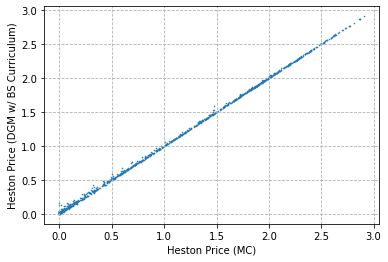

time: 545 ms (started: 2022-08-15 06:40:39 +00:00)


In [ ]:
net_cpu = trainEuss_CurrBS.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('Heston Price (MC)')
plt.ylabel('Heston Price (DGM w/ BS Curriculum)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6

pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

In [ ]:
# validation_data_bs_px_curr.mean()
# validation_data_bs_px_curr.shape
# len(trainEuss_CurrBS.vaildation_data_mae)
# torch.Tensor(trainEuss_CurrBS.vaildation_data_mae) - validation_data_bs_px_curr.mean().cpu()

tensor([-0.0388, -0.0907, -0.1140, -0.1261, -0.1331, -0.1375, -0.1404, -0.1424,
        -0.1439, -0.1449, -0.1457, -0.1463, -0.1468, -0.1471, -0.1474, -0.1477,
        -0.1479, -0.1480, -0.1482, -0.1483, -0.1484, -0.1485, -0.1486, -0.1486,
        -0.1487, -0.1487, -0.1488, -0.1488, -0.1488, -0.1489, -0.1489, -0.1489,
        -0.1489, -0.1489, -0.1490, -0.1490, -0.1490, -0.1490, -0.1490, -0.1490,
        -0.1490, -0.1490, -0.1490, -0.1490, -0.1490, -0.1490, -0.1490, -0.1490,
        -0.1490, -0.1490, -0.1490, -0.1490, -0.1490, -0.1490, -0.1490, -0.1490,
        -0.1490, -0.1490, -0.1490, -0.1490, -0.1490, -0.1490, -0.1490, -0.1490,
        -0.1490, -0.1489, -0.1489, -0.1489, -0.1489, -0.1489, -0.1489, -0.1489,
        -0.1488, -0.1488, -0.1488, -0.1487, -0.1487, -0.1487, -0.1486, -0.1486,
        -0.1485, -0.1485, -0.1484, -0.1484, -0.1483, -0.1482, -0.1481, -0.1480,
        -0.1479, -0.1478, -0.1476, -0.1475, -0.1473, -0.1471, -0.1469, -0.1467,
        -0.1465, -0.1462, -0.1460, -0.14

time: 26 ms (started: 2022-08-15 06:56:45 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  """


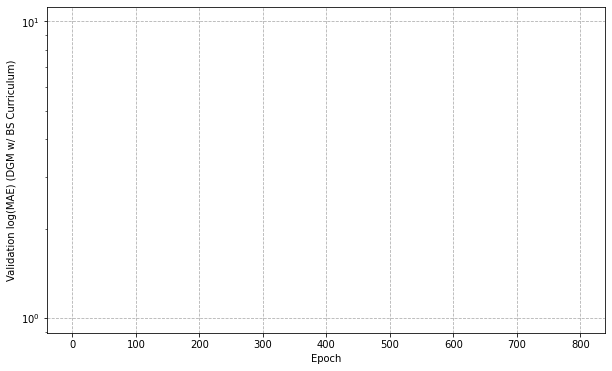

time: 1.35 s (started: 2022-08-15 06:56:23 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(torch.Tensor(trainEuss_CurrBS.vaildation_data_mae) - validation_data_bs_px_curr.mean().cpu())
plt.xlabel('Epoch')
plt.ylabel('Validation log(MAE) (DGM w/ BS Curriculum)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

# mod_name = "HESTON"
# fit_name = "trainEuss_CurrBS"
# val_mae_df = pd.DataFrame({ 'model' : mod_name, 'name': fit_name, 
#                             'data' : trainEuss_CurrBS.vaildation_data_mae - validation_data_bs_px_curr})
# val_mae_df.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv")

#### DGM w/ PiNN_IS_CURR ON HESTON

In [ ]:
#### DGM w/ PiNN_IS_CURR based on Black-Scholes Closed Form

seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma= 10.0

net = HestonOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanHestonSingleStockCurriculum(net)
trainEuss_PiNN_CONSTR_IS_CurrBS = TrainEuropeanHestonSingleStockBase( net , heston_equation, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_PiNN_CONSTR_IS_CurrBS.hook_interval = 5
trainEuss_PiNN_CONSTR_IS_CurrBS.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data_curr, supervised_data=supervised_data_curr, apply_structural_loss=False, gamma=gamma)
trainEuss_PiNN_CONSTR_IS_CurrBS.net.to(torch.device("cuda:0"))

  1%|          | 1/100 [00:01<02:05,  1.26s/it]

Epoch 0 - lr 0.001 -  loss: 173.51530936312366 - Terminal loss 0.10871243476867676 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 4.2114438043123655e-06


  5%|▌         | 5/100 [00:06<02:13,  1.40s/it]

Epoch 4 - lr 0.001 -  loss: 172.29781371597534 - Terminal loss 0.11096303164958954 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.4969118081380035e-06


 10%|█         | 10/100 [00:13<02:06,  1.41s/it]

Epoch 9 - lr 0.001 -  loss: 172.28995189853214 - Terminal loss 0.11100125312805176 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.54421594517182e-06


 15%|█▌        | 15/100 [00:21<01:59,  1.40s/it]

Epoch 14 - lr 0.001 -  loss: 172.28395061841493 - Terminal loss 0.111027792096138 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.5814569040493334e-06


 20%|██        | 20/100 [00:28<01:55,  1.44s/it]

Epoch 19 - lr 0.001 -  loss: 172.2791955464193 - Terminal loss 0.11104662716388702 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.611064827183396e-06


 25%|██▌       | 25/100 [00:35<01:48,  1.44s/it]

Epoch 24 - lr 0.001 -  loss: 172.2754425446383 - Terminal loss 0.11106005311012268 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.634571577252673e-06


 30%|███       | 30/100 [00:42<01:40,  1.43s/it]

Epoch 29 - lr 0.001 -  loss: 172.2724253522078 - Terminal loss 0.11106987297534943 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.653488797731817e-06


 35%|███▌      | 35/100 [00:49<01:31,  1.40s/it]

Epoch 34 - lr 0.001 -  loss: 172.26996624624653 - Terminal loss 0.1110771894454956 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.668961662648002e-06


 40%|████      | 40/100 [00:57<01:28,  1.47s/it]

Epoch 39 - lr 0.001 -  loss: 172.26791197590063 - Terminal loss 0.11108279228210449 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.681822151434368e-06


 45%|████▌     | 45/100 [01:04<01:19,  1.44s/it]

Epoch 44 - lr 0.001 -  loss: 172.26617812617764 - Terminal loss 0.11108717322349548 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.69266222505862e-06


 50%|█████     | 50/100 [01:11<01:13,  1.46s/it]

Epoch 49 - lr 0.001 -  loss: 172.26469106076433 - Terminal loss 0.11109064519405365 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.701922262358205e-06


 55%|█████▌    | 55/100 [01:18<01:00,  1.35s/it]

Epoch 54 - lr 0.001 -  loss: 172.26340912597863 - Terminal loss 0.1110934466123581 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.709921805683582e-06


 60%|██████    | 60/100 [01:25<00:55,  1.40s/it]

Epoch 59 - lr 0.001 -  loss: 172.26227973449812 - Terminal loss 0.11109572649002075 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.716902534415729e-06


 65%|██████▌   | 65/100 [01:32<00:50,  1.45s/it]

Epoch 64 - lr 0.001 -  loss: 172.26127955188252 - Terminal loss 0.11109762638807297 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.723052046875131e-06


 70%|███████   | 70/100 [01:39<00:42,  1.41s/it]

Epoch 69 - lr 0.001 -  loss: 172.26039356771102 - Terminal loss 0.11109921336174011 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.728512001705262e-06


 75%|███████▌  | 75/100 [01:46<00:36,  1.45s/it]

Epoch 74 - lr 0.001 -  loss: 172.2595940829266 - Terminal loss 0.11110054701566696 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.733400709316215e-06


 80%|████████  | 80/100 [01:54<00:29,  1.45s/it]

Epoch 79 - lr 0.001 -  loss: 172.258868176519 - Terminal loss 0.1111016795039177 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.737807375384773e-06


 85%|████████▌ | 85/100 [02:01<00:21,  1.41s/it]

Epoch 84 - lr 0.001 -  loss: 172.2582088632309 - Terminal loss 0.1111026257276535 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.741804167031565e-06


 90%|█████████ | 90/100 [02:08<00:14,  1.48s/it]

Epoch 89 - lr 0.001 -  loss: 172.2575949710953 - Terminal loss 0.11110343039035797 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.74545355138306e-06


 95%|█████████▌| 95/100 [02:15<00:07,  1.45s/it]

Epoch 94 - lr 0.001 -  loss: 172.25703793210343 - Terminal loss 0.11110413074493408 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.748804418788848e-06


100%|██████████| 100/100 [02:23<00:00,  1.43s/it]

Epoch 99 - lr 0.001 -  loss: 172.25651697302948 - Terminal loss 0.11110474169254303 - Internal Loss 6.551363185280934e-05 - Structure Loss 0.0 - Supervised Loss 7.751897325091379e-06


HestonOptionNet(
  (fc_input): Linear(in_features=12, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 2min 23s (started: 2022-08-13 16:48:26 +00:00)


0.01295990463695439


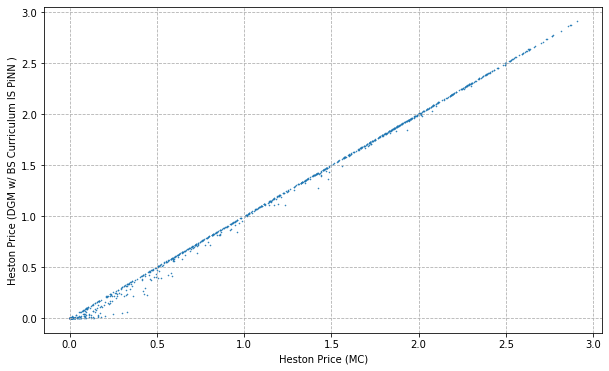

time: 213 ms (started: 2022-08-13 16:50:50 +00:00)


In [ ]:
net_cpu = trainEuss_PiNN_CONSTR_IS_CurrBS.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(heston_analytical).numpy(), base_curr + torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach().numpy(), s=.3)
plt.xlabel('Heston Price (MC)')
plt.ylabel('Heston Price (DGM w/ BS Curriculum IS PiNN )')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6

pp(np.mean(np.abs(torch.flatten(heston_analytical) - base_curr - 
                  torch.flatten(net_cpu(xvts_heston_int.clone().detach().float())).detach()                  
                  ).numpy()))

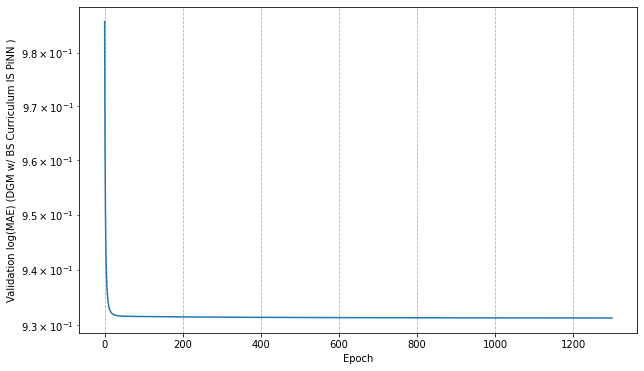

time: 365 ms (started: 2022-08-13 16:50:50 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_PiNN_CONSTR_IS_CurrBS.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('Validation log(MAE) (DGM w/ BS Curriculum IS PiNN )')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

## Black Scholes Option


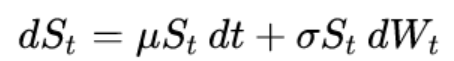


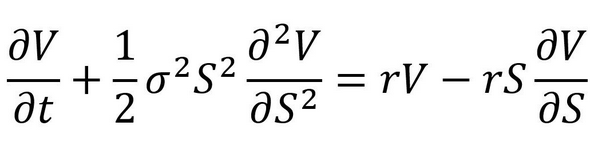




### Black Scholes Setup - No Curriculum

#### BasicOptionNet

In [ ]:
class BasicOptionNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.tanh, input_size = 6):
        super(BasicOptionNet, self).__init__()
        self.NL = NL
        self.NN = NN
        ### time, nu (vol), log of the stock Px
        ### ( t , xi)
        self.Input = input_size
        self.fc_input = nn.Linear(self.Input,self.NN)
        #self.batch_input = nn.BatchNorm1d(self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        #self.batchs = nn.ModuleList([nn.BatchNorm1d(self.NN) for i in range(self.NL)]) 

        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN, 1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act( (self.fc_input(x))  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return torch.nn.functional.softplus(out)
    

time: 4.15 ms (started: 2022-09-26 14:57:43 +00:00)


#### AlternativeNet

[implement from github](https://github.com/Plemeur/DGM/blob/master/first_net.py)

In [ ]:
class LinearWithXavier(nn.Module):
    """ Copy of linear module from Pytorch, modified to have a Xavier init,
        TODO : figure out what to do with the bias"""
    def __init__(self, in_features, out_features, bias=True, batch_normalize=False):
        super(LinearWithXavier, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.batch_normalize = batch_normalize
        
        if self.batch_normalize == True:
          self.batch_norm = torch.nn.BatchNorm1d(out_features)
        
        if bias:
            self.bias = torch.nn.Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    
    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight)
        if self.bias is not None:
            torch.nn.init.uniform_(self.bias, -1, 1) #boundary matter?
    
    def forward(self, input):
        if self.batch_normalize == True:
          return self.batch_norm(torch.nn.functional.linear(input, self.weight, self.bias))
        return torch.nn.functional.linear(input, self.weight, self.bias)
    
    def extra_repr(self):
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )


class DGM_layer(nn.Module):
    """ See readme for paper source"""
    def __init__(self, in_features, out_feature, residual=False, batch_normalize=False):
        super(DGM_layer, self).__init__()
        self.residual = residual

        self.Z = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UZ = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.G = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UG = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.R = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UR = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.H = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UH = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)

    def forward(self, x, s):
        z = torch.tanh(self.UZ(x) + self.Z(s))
        g = torch.tanh(self.UG(x) + self.G(s))
        r = torch.tanh(self.UR(x) + self.R(s))
        h = torch.tanh(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class AlternativeNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(AlternativeNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGM_layer(in_size, neurons) for i in range(depth)])
        # self.middle_layer_2 = nn.ModuleList([DGM_layer(in_size, neurons, batch_normalize=False) for i in range(2)])
        self.final_layer = LinearWithXavier(neurons, out_size, batch_normalize=False)
        
    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))
        
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.tanh(layer(X, s))
        
        # s = torch.nn.functional.gelu(self.input_layer(X))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.elu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.gelu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.nn.functional.gelu(layer(X, s))

        return torch.nn.functional.softplus(self.final_layer(s))
        # return torch.pow(self.final_layer(s), 1)


time: 6.73 ms (started: 2022-09-26 14:57:43 +00:00)


#### EuropeanBlackScholesSingleStockBase

In [ ]:
class EuropeanBlackScholesSingleStockBase():
    
    # can handle PiNN by passing supervised_data
    # can handle Structural conditions 
    # (extra boundary conditions based on the problem) by passing apply_structural_loss boolean 
    # (pass a boolean)
    # can handle segmented by setting in xbreaks (which segments the space of the underlying stock )
    # can handle importance sampling on the loss weights by passing a gamma parameter
    # can handle curriculum learning through Black-Scholes by passing a gamma parameter

    def __init__(self , net, is_call = True):

        self.C = 0.0           
        self.R = 0.05         # Interest Rate (Yearly)

        self.BS_SIGMA = 0.25  # BS Vol of Stock
        self.LAMBDA = 0.      # the price of risk
        
        self.K = 1.0              # Strike Price 
        self.T = 1.0               # Maturation time (in YEAR)
        
        self.MAX_S = self.K*3.0   # MAX price

        ## for accept reject purpose!
        ## free boundry problems
        self.net = net

        self.xbreaks=None

        self.is_call = is_call
        self.log_normal_dist = torch.distributions.LogNormal(self.R-self.C, self.BS_SIGMA)
        self.log_normal_dist_5 = torch.distributions.LogNormal(self.R-self.C, self.BS_SIGMA*5.0)

    def g(self , x):
        # pay off function - 1 is the stock dimension, 0 is the time dimension
        if self.is_call:
          return torch.max( x[:,1].reshape(-1,1) - x[:,2].reshape(-1,1), torch.zeros([len(x),1]).cuda() ) 
        else:
          return torch.max( x[:,2].reshape(-1,1) - x[:,1].reshape(-1,1) , torch.zeros([len(x),1]).cuda() ) 

    def mu(self, x):
        ## should test it! output dimension is important !
        return (self.R-self.C)*x.reshape(-1,1)

    def sigma(self , x):
        return self.BS_SIGMA*x.reshape(-1,1)

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def get_utility_function_derivatives(self, u_net_val, x_internal):

        d = torch.autograd.grad(
            u_net_val, 
            x_internal, 
            grad_outputs=torch.ones_like(u_net_val) ,
            create_graph=True )
        
        dt  = d[0][:,0].reshape(-1,1)
        dS = d[0][:,1].reshape(-1,1)

        dSS = torch.autograd.grad(dS, 
                                    x_internal , 
                                    grad_outputs=torch.ones_like(dS) ,
                                    create_graph = True)[0][:,1].reshape(-1,1)
                                     
        return dt, dS, dSS        

    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        
        # internal samples
        S_internal_values = (1 - torch.rand([size, 1])) * self.MAX_S
        if self.xbreaks is not None:
          if not isinstance(self.xbreaks, list):
            self.xbreaks = np.linspace(0.0, 1.0,self.xbreaks-1).tolist()    
            # default to an evenly sampled space
            # 4 breaks means 3 buckets
          S_internal_values = torch.ones([size, 1])*0.
          for bx in range(len(self.xbreaks)-1): 
            number_per_bucket = int(size/(len(self.xbreaks)-1))           
            start_idx = bx*number_per_bucket
            end_idx = (bx+1)*number_per_bucket
            S_internal_values[start_idx:end_idx,:] = (self.xbreaks[bx] + (1 - torch.rand([number_per_bucket, 1])) * (self.xbreaks[bx+1] - self.xbreaks[bx])) * self.MAX_S

        maturity_time = (1 - torch.rand([size, 1]))*self.T
        t_internal_values = torch.rand([size,1]) * maturity_time
        strike_values = torch.rand([size, 1]) * self.K
        risk_free_rate = torch.rand([size, 1])*self.R
        std_dev_of_stock = (1 - torch.rand([size, 1]))*self.BS_SIGMA

        xvt_internal = self.to_device(torch.cat(( t_internal_values , S_internal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock), dim = 1 ), to_cpu)

        ### Terminal time samples
        S_terminal_values = (1 - torch.rand([size, 1])) * self.MAX_S
        if self.xbreaks is not None:
          S_terminal_values = torch.ones([size, 1])*0.
          for bx in range(len(self.xbreaks)-1): 
            number_per_bucket = int(size/(len(self.xbreaks)-1))           
            start_idx = bx*number_per_bucket
            end_idx = (bx+1)*number_per_bucket
            S_terminal_values[start_idx:end_idx,:] = (self.xbreaks[bx] + (1 - torch.rand([number_per_bucket, 1])) * (self.xbreaks[bx+1] - self.xbreaks[bx])) * self.MAX_S

        maturity_time = (1 - torch.rand([size, 1])) * self.T
        t_terminal_values = maturity_time
        strike_values = torch.rand([size, 1]) * self.K
        risk_free_rate = torch.rand([size, 1]) * self.R
        std_dev_of_stock = (1 - torch.rand([size, 1])) * self.BS_SIGMA

        xvt_terminal = self.to_device(torch.cat(( t_terminal_values , S_terminal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock) , dim = 1 ),to_cpu)

        return xvt_internal , xvt_terminal 

        
    def criterion(self, 
                  x_internal , 
                  x_terminal , 
                  loss_transform = torch.square, 
                  print_val=False, 
                  to_cpu=False, 
                  supervised_data=None,
                  apply_structural_loss = True,
                  gamma=None):
        '''
        Loss function that helps network find solution to equation
        '''   
        
        pred_values = self.net(x_internal)
        # pred_values_pinn = self.net(self.pinn_sample_internal)
        dt, dS1, dS1S1 = self.get_utility_function_derivatives(pred_values, x_internal)
        
        if loss_transform is None:
          loss_transform = torch.square
        intC = None
        terC = None

        if len(x_internal) == 0:
          intC = torch.empty(0).cuda().float()
        else:
          # pdb.set_trace()
          # x is above the free boundary ( so immediate pay-off is positive )
          # t_internal_values , nu_internal_values, x_internal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock
          time_elapsed = x_internal[:,0].reshape(-1, 1)
          stock_price = x_internal[:,1].reshape(-1, 1)
          strike_price = x_internal[:,2].reshape(-1, 1)
          maturity_years = x_internal[:, 3].reshape(-1, 1)
          risk_free_rate = x_internal[:, 4].reshape(-1, 1)
          std_dev_of_stock = x_internal[:, 5].reshape(-1, 1)
          
          time_to_maturity = maturity_years - time_elapsed
          intC_loss_untransformed = dt + risk_free_rate*dS1 + 0.5*torch.square(std_dev_of_stock)*dS1S1 - risk_free_rate*pred_values

          #print('interim', intC_loss_untransformed.shape)
          intC = loss_transform(intC_loss_untransformed) 

          structured_loss = None
          if apply_structural_loss:
            #print(torch.mean(dT), torch.mean(dK1dK1))
            condition_1 = torch.max(torch.zeros(x_internal.shape[0], 1).to(x_internal.device), dt )
            condition_2 = torch.max(torch.zeros(x_internal.shape[0], 1).to(x_internal.device), -dS1S1)
            condition_3 = torch.max(torch.zeros(x_internal.shape[0], 1).to(x_internal.device), -dS1)

            struct_coef = 1
            structured_loss = struct_coef * (condition_1 + condition_2 + condition_3)
            #print('struct', structured_loss.shape)
            structured_loss = structured_loss # note that this is kept as flags?!
          else:
            structured_loss = torch.empty(0).cuda().float()

          structured_loss = loss_transform(structured_loss)

          if supervised_data is not None:
            supervised_coef = 1.
            input_bs = supervised_data['bs_input']
            target = supervised_data['bs_analytical_sol']
          
            #  prediction = bs_pred + self.net(input_heston)
            prediction = self.net(input_bs)
            supervised_loss = target - prediction

          else:
            supervised_loss =  torch.empty(0).cuda().float()

          #print('super', supervised_loss.shape)
          supervised_loss = loss_transform(supervised_loss)

        # Terminal Condition - should be equal (both in- and out of the money)
        terC = loss_transform( self.g(x_terminal) - self.net(x_terminal) ) 

        # terC = [ loss_transform(self.net(x_terminal)) for loss_transform in loss_transforms ]
        #print('terminal', terC[0].shape)
        
        return  intC , terC, structured_loss, supervised_loss


    def calculateLoss(self, 
                      batch_x, 
                      train = True, 
                      loss_transform = torch.square , 
                      keep_batch = False, 
                      print_val=False, 
                      supervised_data=None, 
                      apply_structural_loss=True,
                      gamma=None):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        # pdb.set_trace()
        x , x_terminal   = batch_x # x_initial# 
        x = Variable(x , requires_grad=True)
        #x_terminal = Variable(x_terminal[torch.multinomial(x[:,0], 128), :] , requires_grad=True)

        # pdb.set_trace()
        Ls = self.criterion( x , x_terminal , loss_transform = loss_transform, print_val=print_val, supervised_data=supervised_data, gamma=gamma, apply_structural_loss=apply_structural_loss) # , x_initial
        intC , terC, structLoss, supervisedLoss = Ls 
        # pdb.set_trace()
        
        # numActive = np.sum([1 if xb.numel()>0 else 0 for xb in Ls ])
        # numActive = 3
        numActive = 2
        has_structural = structLoss.numel()>0
        has_pinn =  supervisedLoss.numel()>0
        if has_structural:
          numActive = numActive+1
        if has_pinn:
          numActive = numActive+1

        if gamma is None:
          return_losses = []
          if not keep_batch:
            loss_equalWeightedByType =  1./numActive*torch.mean(intC) + 1./numActive*torch.mean(terC) 
            if has_structural:
              loss_equalWeightedByType =  loss_equalWeightedByType + 1./numActive*torch.mean(structLoss)
            if has_pinn:
              loss_equalWeightedByType =  loss_equalWeightedByType + 1./numActive*torch.mean(supervisedLoss)

            return_losses.append( [ loss_equalWeightedByType , 
                                    1./numActive*torch.mean(intC), 
                                    1./numActive*torch.mean(terC),
                                    1./numActive*torch.mean(structLoss) if has_structural else 0.0,
                                    1./numActive*torch.mean(supervisedLoss) if has_pinn else 0.0 ] )      
          else:
            return_losses.append( [intC.numpy(), terC.numpy(), structLoss.numpy(), supervisedLoss.numpy()] )

          return return_losses
        else:
          weights = torch.ones(1,len(Ls)).to(intC.device)/numActive
          intC_max = torch.max(intC).item() # torch.ones_like(intC)*
          terC_max = torch.max(terC).item() # torch.ones_like(terC)*

          return_losses = []
          intCt = weights[0,0] * (1.0/intC.numel() if intC.numel() > 0 else 0.0) * torch.sum( torch.exp(gamma * (intC - intC_max))) 
          terCt = weights[0,1] * (1.0/terC.numel() if terC.numel() > 0 else 0.0) * torch.sum( torch.exp(gamma * (terC - terC_max))) 

          structuredLosst = torch.ones_like(terCt)*0.
          structuredLoss_max = 0.0
          if has_structural:
            structuredLoss_max = torch.max(structLoss).item() # torch.ones_like(supervisedLoss)*
            structuredLosst = weights[0,2] * (1.0/structLoss.numel() if structLoss.numel() > 0 else 0.0) * torch.sum(torch.exp(gamma * (structLoss - structuredLoss_max) )) 

          supervisedLosst = torch.ones_like(terCt)*0.
          supervisedLoss_max = 0.0
          if has_pinn:
            supervisedLoss_max = torch.max(supervisedLoss).item() 
            supervisedLosst = weights[0,2] * (1.0/supervisedLoss.numel() if supervisedLoss.numel() > 0 else 0.0) * torch.sum(torch.exp(gamma * (supervisedLoss - supervisedLoss_max) )) 

          if not keep_batch:
            transformed_loss = (intC_max + terC_max + structuredLoss_max + supervisedLoss_max) + 1.0/gamma * torch.log(intCt + terCt  + structuredLosst + supervisedLosst)
            return_losses.append( [ transformed_loss , 
                                    1./numActive*torch.mean(intCt), 
                                    1./numActive*torch.mean(terCt),
                                    1./numActive*torch.mean(structuredLosst),
                                    1./numActive*torch.mean(supervisedLosst)  ] )            
          else:
            return_losses.append( [intCt.numpy(), terCt.numpy(), structuredLosst.numpy(), supervisedLosst.numpy()] )
          return return_losses


time: 18.7 ms (started: 2022-09-26 14:57:43 +00:00)


time: 28.1 ms (started: 2022-09-26 14:57:43 +00:00)


#### Create fixed PiNN set and Validation/Test Set

In [ ]:
import inspect
inspect.signature(bs_price)

<Signature (right, K, S, T, sigma, r)>

time: 3 ms (started: 2022-09-26 14:57:44 +00:00)


In [ ]:
bs_sample_creator = EuropeanBlackScholesSingleStockBase(None)

supervised_data = dict()
supervised_data['bs_input'] = bs_sample_creator.sample(size = 2**12)[0]
supervised_data['bs_analytical_sol'] = bs_price( "C", 
                                                supervised_data['bs_input'][:,2].reshape(-1,1), 
                                                supervised_data['bs_input'][:,1].reshape(-1,1), 
                                                supervised_data['bs_input'][:,3].reshape(-1,1) - supervised_data['bs_input'][:,0].reshape(-1,1), 
                                                supervised_data['bs_input'][:,5].reshape(-1,1)**0.5, 
                                                supervised_data['bs_input'][:,4].reshape(-1,1))

supervised_data['bs_analytical_sol'].cuda()
supervised_data['bs_input'].cuda()

validation_data = dict()
validation_data['bs_input'] = bs_sample_creator.sample(size = 2**12)[0]
validation_data['bs_analytical_sol'] = bs_price( "C", 
                                                validation_data['bs_input'][:,2].reshape(-1,1), 
                                                validation_data['bs_input'][:,1].reshape(-1,1), 
                                                validation_data['bs_input'][:,3].reshape(-1,1) - validation_data['bs_input'][:,0].reshape(-1,1), 
                                                validation_data['bs_input'][:,5].reshape(-1,1)**0.5, 
                                                validation_data['bs_input'][:,4].reshape(-1,1))
validation_data['bs_analytical_sol'].cuda()
validation_data['bs_input'].cuda()


test_data = dict()
test_data['bs_input'] = bs_sample_creator.sample(size = 2**12)[0]
test_data['bs_analytical_sol'] = bs_price( "C", 
                                                test_data['bs_input'][:,2].reshape(-1,1), 
                                                test_data['bs_input'][:,1].reshape(-1,1), 
                                                test_data['bs_input'][:,3].reshape(-1,1) - test_data['bs_input'][:,0].reshape(-1,1), 
                                                test_data['bs_input'][:,5].reshape(-1,1)**0.5, 
                                                test_data['bs_input'][:,4].reshape(-1,1))

test_data['bs_analytical_sol'].cuda()
test_data['bs_input'].cuda()

test_sol = test_data['bs_analytical_sol'].clone().detach().cpu()
test_input = test_data['bs_input'].clone().detach().cpu()


#xvt_terminal = self.to_device(torch.cat(( t_terminal_values , S_terminal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock) , dim = 1 ),to_cpu)
 

time: 23.1 ms (started: 2022-09-26 14:57:44 +00:00)


In [ ]:
test_data['bs_input'].device

device(type='cuda', index=0)

time: 3.62 ms (started: 2022-09-26 14:57:44 +00:00)


#### TrainEuropeanBlackScholesSingleStockBase

In [ ]:
class TrainEuropeanBlackScholesSingleStockBase():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        self.history_mean_hooks = [] 
        self.history_surfaces_hooks = None       
        self.history_tl = []
        self.history_internal = []
        self.history_terminal = []
        self.history_initial = []              
        self.history_nonzero = []
        self.TOTAL_SIZE = 100000
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        #if self.debug == True:
        #    self.hooks = {}            
        #    self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam
        self.vaildation_data_mae = []

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.monitored_loss_type = "Train_L2"
        self.early_stop_counter = 0
        
    def train(self, 
              epoch, 
              lr, 
              eqLossFn = 'calculateLoss', 
              sample_method_X = "U", 
              key_loss_func = torch.square, 
              validation_data=None, 
              supervised_data=None, 
              apply_structural_loss=True,
              gamma=None):
        
        self.net.train()
        optimizer = self.optimizer_used(self.net.parameters(), lr=lr)
        #scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
        # scheduler = StepLR(optimizer, step_size=150000, gamma=0.1)

        
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        full_dataset = self.model.sample(sample_method_X = sample_method_X, size=self.TOTAL_SIZE)
        full_batch_internal = DataLoader(full_dataset[0], batch_size=self.BATCH_SIZE)
        full_batch_terminal = DataLoader(full_dataset[1], batch_size=self.BATCH_SIZE)

        counter = 0
        for e in tqdm(range(epoch)):
            
            loss_avg = 0.0
            i = 0
            for sample_int, sample_term in zip(full_batch_internal, full_batch_terminal):
                sample_batch = sample_int, sample_term 

                optimizer.zero_grad()
                losses_L2 = loss_calc_method( sample_batch, loss_transform = key_loss_func, keep_batch = False, 
                                             print_val =  (e % self.hook_interval == (self.hook_interval-1)), 
                                             supervised_data=supervised_data, apply_structural_loss=apply_structural_loss, gamma=gamma)
              

                loss , internal , terminal, structure, supervised = losses_L2[0] # internal losses

                loss_avg = loss_avg + float(loss.item())
                loss.backward()

                optimizer.step()
                i += 1
                counter += 1
                # scheduler.step()

                if validation_data is not None:
                    input_data = validation_data['bs_input']
                    target = validation_data['bs_analytical_sol']
                    
                    # prediction = trainEuss.net(input_data) + bs_pred
                    prediction = self.net(input_data)

                    self.vaildation_data_mae.append(torch.abs(target - prediction).cpu().detach().numpy().mean())
                    # print(self.vaildation_data_mae[-1])
            
                # if counter >= 3000:
                #     break
            # scheduler.step(loss)

            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                print("Epoch {} - lr {} -  loss: {} - Terminal loss {} - Internal Loss {} - Structure Loss {} - Supervised Loss {}".format(e , lr , loss_avg/(i+1), terminal, internal, structure, supervised ))

            # if counter >= 3000:
            #     break

time: 6.51 ms (started: 2022-09-26 14:57:44 +00:00)


time: 14.5 ms (started: 2022-09-26 14:57:44 +00:00)


time: 23.9 ms (started: 2022-09-26 14:57:44 +00:00)


time: 31.7 ms (started: 2022-09-26 14:57:44 +00:00)


### Black Scholes Runs Specific for Paper

####  DGM ON BS to test DNN vs ResNet

In [ ]:
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

net = BasicOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
bs_equation = EuropeanBlackScholesSingleStockBase(net)
trainEussBS_DNN = TrainEuropeanBlackScholesSingleStockBase( net , bs_equation, BATCH_SIZE = supervised_data['bs_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEussBS_DNN.hook_interval = 5
trainEussBS_DNN.train(epoch = 500, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEussBS_DNN.net.to(torch.device("cuda:0"))



In [ ]:
# validation_data['bs_analytical_sol'].shape

torch.Size([4096, 1])

time: 3.81 ms (started: 2022-09-26 16:50:04 +00:00)


In [ ]:
net_ResNet = AlternativeNet(in_size=6, out_size=1, neurons=128, depth = 4)
net_ResNet.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
bs_equation = EuropeanBlackScholesSingleStockBase(net_ResNet)
trainEussBS_ResNet = TrainEuropeanBlackScholesSingleStockBase( net_ResNet , bs_equation, BATCH_SIZE = supervised_data['bs_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEussBS_ResNet.hook_interval = 5
trainEussBS_ResNet.train(epoch = 500, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEussBS_ResNet.net.to(torch.device("cuda:0"))

  0%|          | 1/500 [00:01<11:29,  1.38s/it]

Epoch 0 - lr 0.001 -  loss: 0.13968697898089885 - Terminal loss 0.05636602267622948 - Internal Loss 0.0010372432880103588 - Structure Loss 0.0 - Supervised Loss 0.0


  1%|          | 5/500 [00:06<10:33,  1.28s/it]

Epoch 4 - lr 0.001 -  loss: 0.002265680278651416 - Terminal loss 0.0019559375941753387 - Internal Loss 0.00012808093742933124 - Structure Loss 0.0 - Supervised Loss 0.0


  2%|▏         | 10/500 [00:12<10:36,  1.30s/it]

Epoch 9 - lr 0.001 -  loss: 0.0004903405118966475 - Terminal loss 0.0003941388858947903 - Internal Loss 9.120506001636386e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  3%|▎         | 15/500 [00:19<10:21,  1.28s/it]

Epoch 14 - lr 0.001 -  loss: 0.00027939115825574844 - Terminal loss 0.0002026782458415255 - Internal Loss 8.526428428012878e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  4%|▍         | 20/500 [00:25<10:32,  1.32s/it]

Epoch 19 - lr 0.001 -  loss: 0.0002014653742662631 - Terminal loss 0.00013032194692641497 - Internal Loss 7.946132245706394e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 25/500 [00:32<10:14,  1.29s/it]

Epoch 24 - lr 0.001 -  loss: 0.00016170490707736462 - Terminal loss 9.348872117698193e-05 - Internal Loss 7.601262768730521e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  6%|▌         | 30/500 [00:38<10:19,  1.32s/it]

Epoch 29 - lr 0.001 -  loss: 0.0001383173803333193 - Terminal loss 7.231176277855411e-05 - Internal Loss 7.316953269764781e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  7%|▋         | 35/500 [00:45<10:19,  1.33s/it]

Epoch 34 - lr 0.001 -  loss: 0.00012259533250471577 - Terminal loss 5.8754420024342835e-05 - Internal Loss 7.048385305097327e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  8%|▊         | 40/500 [00:52<10:00,  1.31s/it]

Epoch 39 - lr 0.001 -  loss: 0.00011105793964816257 - Terminal loss 4.933175296173431e-05 - Internal Loss 6.804745498811826e-05 - Structure Loss 0.0 - Supervised Loss 0.0


  9%|▉         | 45/500 [00:58<10:01,  1.32s/it]

Epoch 44 - lr 0.001 -  loss: 0.0001021742180455476 - Terminal loss 4.261712092556991e-05 - Internal Loss 6.580977787962183e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 50/500 [01:05<09:35,  1.28s/it]

Epoch 49 - lr 0.001 -  loss: 9.505537746008485e-05 - Terminal loss 3.7580033676931635e-05 - Internal Loss 6.336881779134274e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 11%|█         | 55/500 [01:11<09:48,  1.32s/it]

Epoch 54 - lr 0.001 -  loss: 8.8703340588836e-05 - Terminal loss 3.35575059580151e-05 - Internal Loss 6.116288568591699e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 12%|█▏        | 60/500 [01:18<09:56,  1.36s/it]

Epoch 59 - lr 0.001 -  loss: 8.340935746673495e-05 - Terminal loss 3.058302900171839e-05 - Internal Loss 5.903931014472619e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 13%|█▎        | 65/500 [01:24<09:24,  1.30s/it]

Epoch 64 - lr 0.001 -  loss: 7.907947729108855e-05 - Terminal loss 2.9734372219536453e-05 - Internal Loss 5.6470762501703575e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 14%|█▍        | 70/500 [01:31<09:22,  1.31s/it]

Epoch 69 - lr 0.001 -  loss: 0.00012284236509003678 - Terminal loss 3.545441722963005e-05 - Internal Loss 5.546816828427836e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 75/500 [01:37<09:02,  1.28s/it]

Epoch 74 - lr 0.001 -  loss: 7.249306800076738e-05 - Terminal loss 2.6457222702447325e-05 - Internal Loss 5.213934855419211e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 16%|█▌        | 80/500 [01:44<09:10,  1.31s/it]

Epoch 79 - lr 0.001 -  loss: 6.809873157180846e-05 - Terminal loss 2.439317904645577e-05 - Internal Loss 4.912017175229266e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 17%|█▋        | 85/500 [01:51<09:09,  1.32s/it]

Epoch 84 - lr 0.001 -  loss: 0.0007086187571985648 - Terminal loss 0.0009234675671905279 - Internal Loss 5.52412930119317e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 18%|█▊        | 90/500 [01:57<08:48,  1.29s/it]

Epoch 89 - lr 0.001 -  loss: 6.927975118742324e-05 - Terminal loss 2.981505349453073e-05 - Internal Loss 4.5497323299059644e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 19%|█▉        | 95/500 [02:04<09:02,  1.34s/it]

Epoch 94 - lr 0.001 -  loss: 5.9881419292651114e-05 - Terminal loss 2.2611684471485205e-05 - Internal Loss 4.276933032087982e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 100/500 [02:10<08:55,  1.34s/it]

Epoch 99 - lr 0.001 -  loss: 5.642160031129606e-05 - Terminal loss 2.134804890374653e-05 - Internal Loss 4.050050483783707e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 21%|██        | 105/500 [02:17<08:43,  1.32s/it]

Epoch 104 - lr 0.001 -  loss: 5.35233109985711e-05 - Terminal loss 2.0361663700896315e-05 - Internal Loss 3.819167977781035e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 22%|██▏       | 110/500 [02:24<08:26,  1.30s/it]

Epoch 109 - lr 0.001 -  loss: 0.00019493758445605637 - Terminal loss 0.0006192803266458213 - Internal Loss 4.184719728073105e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 23%|██▎       | 115/500 [02:30<08:09,  1.27s/it]

Epoch 114 - lr 0.001 -  loss: 6.438074924517423e-05 - Terminal loss 2.272446363349445e-05 - Internal Loss 3.392571670701727e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 24%|██▍       | 120/500 [02:36<08:24,  1.33s/it]

Epoch 119 - lr 0.001 -  loss: 4.745628611999564e-05 - Terminal loss 2.0033592591062188e-05 - Internal Loss 3.239309444325045e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 125/500 [02:43<08:27,  1.35s/it]

Epoch 124 - lr 0.001 -  loss: 4.4302134847384876e-05 - Terminal loss 1.8889135390054435e-05 - Internal Loss 3.0392548069357872e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 26%|██▌       | 130/500 [02:50<08:15,  1.34s/it]

Epoch 129 - lr 0.001 -  loss: 4.162565019214526e-05 - Terminal loss 1.8112956240656786e-05 - Internal Loss 2.845205381163396e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 27%|██▋       | 135/500 [02:57<08:24,  1.38s/it]

Epoch 134 - lr 0.001 -  loss: 3.923904077964835e-05 - Terminal loss 1.7572054275660776e-05 - Internal Loss 2.6727389922598377e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 28%|██▊       | 140/500 [03:03<07:39,  1.28s/it]

Epoch 139 - lr 0.001 -  loss: 3.699440239870455e-05 - Terminal loss 1.6994303223327734e-05 - Internal Loss 2.457136542943772e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 29%|██▉       | 145/500 [03:10<08:10,  1.38s/it]

Epoch 144 - lr 0.001 -  loss: 0.0001425470363756176 - Terminal loss 9.512777614872903e-05 - Internal Loss 2.484771357558202e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 150/500 [03:17<07:49,  1.34s/it]

Epoch 149 - lr 0.001 -  loss: 3.604398043535184e-05 - Terminal loss 1.9776771296164952e-05 - Internal Loss 2.2127669581095688e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 31%|███       | 155/500 [03:23<07:37,  1.33s/it]

Epoch 154 - lr 0.001 -  loss: 3.214270691387355e-05 - Terminal loss 1.613289350643754e-05 - Internal Loss 2.0207837224006653e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 32%|███▏      | 160/500 [03:30<07:29,  1.32s/it]

Epoch 159 - lr 0.001 -  loss: 3.0135791894281284e-05 - Terminal loss 1.5420122508658096e-05 - Internal Loss 1.8781218386720866e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 33%|███▎      | 165/500 [03:37<07:20,  1.31s/it]

Epoch 164 - lr 0.001 -  loss: 2.863645713659935e-05 - Terminal loss 1.470688857807545e-05 - Internal Loss 1.7427561033400707e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 34%|███▍      | 170/500 [03:43<07:35,  1.38s/it]

Epoch 169 - lr 0.001 -  loss: 0.0007700149290030822 - Terminal loss 0.0013115619076415896 - Internal Loss 1.5461073417100124e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 175/500 [03:50<07:50,  1.45s/it]

Epoch 174 - lr 0.001 -  loss: 3.219912214262877e-05 - Terminal loss 1.9735185560421087e-05 - Internal Loss 1.5686267943237908e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 36%|███▌      | 180/500 [03:57<06:48,  1.28s/it]

Epoch 179 - lr 0.001 -  loss: 2.5278940665884874e-05 - Terminal loss 1.3662549463333562e-05 - Internal Loss 1.4784645827603526e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 37%|███▋      | 185/500 [04:03<06:47,  1.29s/it]

Epoch 184 - lr 0.001 -  loss: 2.3811838946130593e-05 - Terminal loss 1.3061778190603945e-05 - Internal Loss 1.3825918358634226e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 38%|███▊      | 190/500 [04:10<06:39,  1.29s/it]

Epoch 189 - lr 0.001 -  loss: 2.2717519823345355e-05 - Terminal loss 1.2403433174767997e-05 - Internal Loss 1.2912189049529843e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 39%|███▉      | 195/500 [04:16<06:25,  1.26s/it]

Epoch 194 - lr 0.001 -  loss: 0.0007747604104224592 - Terminal loss 0.0006109293317422271 - Internal Loss 4.161363540333696e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 200/500 [04:22<06:30,  1.30s/it]

Epoch 199 - lr 0.001 -  loss: 2.659525052877143e-05 - Terminal loss 1.2348163181741256e-05 - Internal Loss 1.2154150681453757e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 41%|████      | 205/500 [04:29<06:05,  1.24s/it]

Epoch 204 - lr 0.001 -  loss: 2.0288459927542136e-05 - Terminal loss 1.1341327990521677e-05 - Internal Loss 1.1151910257467534e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 42%|████▏     | 210/500 [04:35<06:09,  1.27s/it]

Epoch 209 - lr 0.001 -  loss: 1.9405890998314135e-05 - Terminal loss 1.1114498192910105e-05 - Internal Loss 1.057219833455747e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 43%|████▎     | 215/500 [04:42<06:03,  1.28s/it]

Epoch 214 - lr 0.001 -  loss: 1.8319193441129755e-05 - Terminal loss 9.982930350815877e-06 - Internal Loss 9.966737707145512e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 44%|████▍     | 220/500 [04:48<05:48,  1.24s/it]

Epoch 219 - lr 0.001 -  loss: 0.00024388148522120902 - Terminal loss 8.151652582455426e-05 - Internal Loss 4.9844842578750104e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 225/500 [04:54<05:52,  1.28s/it]

Epoch 224 - lr 0.001 -  loss: 2.0394972852955107e-05 - Terminal loss 1.0482400284672622e-05 - Internal Loss 9.708574907563161e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 46%|████▌     | 230/500 [05:01<05:48,  1.29s/it]

Epoch 229 - lr 0.001 -  loss: 1.6920408234000207e-05 - Terminal loss 9.224948371411301e-06 - Internal Loss 8.959716979006771e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 47%|████▋     | 235/500 [05:07<05:39,  1.28s/it]

Epoch 234 - lr 0.001 -  loss: 1.6189509915420784e-05 - Terminal loss 9.038632015290204e-06 - Internal Loss 8.524971235601697e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 48%|████▊     | 240/500 [05:13<05:33,  1.28s/it]

Epoch 239 - lr 0.001 -  loss: 1.6036274610087274e-05 - Terminal loss 8.289399374916684e-06 - Internal Loss 8.145759238686878e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 49%|████▉     | 245/500 [05:19<05:15,  1.24s/it]

Epoch 244 - lr 0.001 -  loss: 4.811569688172313e-05 - Terminal loss 0.00011644313053693622 - Internal Loss 1.1127033758384641e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 250/500 [05:26<05:19,  1.28s/it]

Epoch 249 - lr 0.001 -  loss: 2.602399526949739e-05 - Terminal loss 2.56927523878403e-05 - Internal Loss 8.566289579903241e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 51%|█████     | 255/500 [05:32<05:15,  1.29s/it]

Epoch 254 - lr 0.001 -  loss: 1.4586501492885873e-05 - Terminal loss 7.95035703049507e-06 - Internal Loss 7.435177849401953e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 52%|█████▏    | 260/500 [05:39<04:59,  1.25s/it]

Epoch 259 - lr 0.001 -  loss: 1.3948920513939812e-05 - Terminal loss 7.970569640747271e-06 - Internal Loss 7.209408977359999e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 53%|█████▎    | 265/500 [05:45<05:00,  1.28s/it]

Epoch 264 - lr 0.001 -  loss: 1.3145999400876462e-05 - Terminal loss 6.937018497410463e-06 - Internal Loss 6.911329364811536e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 54%|█████▍    | 270/500 [05:51<04:38,  1.21s/it]

Epoch 269 - lr 0.001 -  loss: 0.00011703641393978614 - Terminal loss 1.7160629795398563e-05 - Internal Loss 1.2757816875819117e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 275/500 [05:58<04:44,  1.27s/it]

Epoch 274 - lr 0.001 -  loss: 1.4103719149716198e-05 - Terminal loss 7.208502665889682e-06 - Internal Loss 6.642703283432638e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 56%|█████▌    | 280/500 [06:04<04:48,  1.31s/it]

Epoch 279 - lr 0.001 -  loss: 1.2523656550911255e-05 - Terminal loss 7.119419933587778e-06 - Internal Loss 6.421259058697615e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 57%|█████▋    | 285/500 [06:10<04:28,  1.25s/it]

Epoch 284 - lr 0.001 -  loss: 1.1748183351301122e-05 - Terminal loss 6.088696409278782e-06 - Internal Loss 6.1072032622178085e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 58%|█████▊    | 290/500 [06:17<04:24,  1.26s/it]

Epoch 289 - lr 0.001 -  loss: 0.0005833601579070091 - Terminal loss 0.0013523641973733902 - Internal Loss 8.760639502725098e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 59%|█████▉    | 295/500 [06:23<04:20,  1.27s/it]

Epoch 294 - lr 0.001 -  loss: 1.9111193978460506e-05 - Terminal loss 7.681275747017935e-06 - Internal Loss 8.597127816756256e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 300/500 [06:29<04:12,  1.26s/it]

Epoch 299 - lr 0.001 -  loss: 1.13310133201594e-05 - Terminal loss 5.882206096430309e-06 - Internal Loss 6.095814569562208e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 61%|██████    | 305/500 [06:36<04:13,  1.30s/it]

Epoch 304 - lr 0.001 -  loss: 1.077843562597991e-05 - Terminal loss 5.797249741590349e-06 - Internal Loss 5.444424459710717e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 62%|██████▏   | 310/500 [06:42<03:57,  1.25s/it]

Epoch 309 - lr 0.001 -  loss: 1.068964165824582e-05 - Terminal loss 5.369162408896955e-06 - Internal Loss 5.2076566134928726e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 63%|██████▎   | 315/500 [06:48<03:56,  1.28s/it]

Epoch 314 - lr 0.001 -  loss: 1.0787227165565127e-05 - Terminal loss 8.25594543130137e-06 - Internal Loss 5.0798512347682845e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 64%|██████▍   | 320/500 [06:55<03:52,  1.29s/it]

Epoch 319 - lr 0.001 -  loss: 5.0202458623971324e-05 - Terminal loss 3.099934110650793e-05 - Internal Loss 5.436147603177233e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 325/500 [07:01<03:43,  1.28s/it]

Epoch 324 - lr 0.001 -  loss: 9.705307911644923e-06 - Terminal loss 5.113050065119751e-06 - Internal Loss 4.711348537966842e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 66%|██████▌   | 330/500 [07:08<03:39,  1.29s/it]

Epoch 329 - lr 0.001 -  loss: 9.365429377794499e-06 - Terminal loss 5.4686352086719126e-06 - Internal Loss 4.505785909714177e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 67%|██████▋   | 335/500 [07:14<03:28,  1.26s/it]

Epoch 334 - lr 0.001 -  loss: 8.806072219158523e-06 - Terminal loss 4.73096952191554e-06 - Internal Loss 4.291822278901236e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 68%|██████▊   | 340/500 [07:20<03:26,  1.29s/it]

Epoch 339 - lr 0.001 -  loss: 0.0005145532879396342 - Terminal loss 0.001231999252922833 - Internal Loss 5.72502131035435e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 69%|██████▉   | 345/500 [07:27<03:18,  1.28s/it]

Epoch 344 - lr 0.001 -  loss: 1.4220256616681581e-05 - Terminal loss 1.0510512765904423e-05 - Internal Loss 4.810556674783584e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 350/500 [07:33<03:09,  1.27s/it]

Epoch 349 - lr 0.001 -  loss: 8.401130980928428e-06 - Terminal loss 4.776234163728077e-06 - Internal Loss 3.942614512197906e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 71%|███████   | 355/500 [07:40<03:08,  1.30s/it]

Epoch 354 - lr 0.001 -  loss: 8.010124838619959e-06 - Terminal loss 4.5292922550288495e-06 - Internal Loss 3.7514685118367197e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 72%|███████▏  | 360/500 [07:46<03:04,  1.32s/it]

Epoch 359 - lr 0.001 -  loss: 7.879693293944002e-06 - Terminal loss 4.443579655344365e-06 - Internal Loss 3.589978405216243e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 73%|███████▎  | 365/500 [07:53<02:58,  1.32s/it]

Epoch 364 - lr 0.001 -  loss: 7.4718113864946645e-06 - Terminal loss 4.481745691009564e-06 - Internal Loss 3.439794227233506e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 74%|███████▍  | 370/500 [07:59<02:41,  1.24s/it]

Epoch 369 - lr 0.001 -  loss: 8.447766431345372e-05 - Terminal loss 2.2175945559865795e-05 - Internal Loss 5.559849341807421e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 375/500 [08:06<02:40,  1.28s/it]

Epoch 374 - lr 0.001 -  loss: 8.04502442406374e-06 - Terminal loss 4.535339030553587e-06 - Internal Loss 3.319253437439329e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 76%|███████▌  | 380/500 [08:12<02:34,  1.29s/it]

Epoch 379 - lr 0.001 -  loss: 7.0236875217233315e-06 - Terminal loss 4.084239208168583e-06 - Internal Loss 3.1491488243773347e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 77%|███████▋  | 385/500 [08:19<02:31,  1.32s/it]

Epoch 384 - lr 0.001 -  loss: 6.866990452181198e-06 - Terminal loss 4.202838226774475e-06 - Internal Loss 3.0371959383046487e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 78%|███████▊  | 390/500 [08:25<02:25,  1.32s/it]

Epoch 389 - lr 0.001 -  loss: 6.592279987671645e-06 - Terminal loss 3.912678039341699e-06 - Internal Loss 2.9218904273875523e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 79%|███████▉  | 395/500 [08:32<02:11,  1.26s/it]

Epoch 394 - lr 0.001 -  loss: 0.00010811210831889184 - Terminal loss 7.240005288622342e-06 - Internal Loss 5.930174211243866e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 400/500 [08:38<02:09,  1.30s/it]

Epoch 399 - lr 0.001 -  loss: 7.27313808965846e-06 - Terminal loss 4.3123441173520405e-06 - Internal Loss 3.231248456359026e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 81%|████████  | 405/500 [08:44<01:57,  1.24s/it]

Epoch 404 - lr 0.001 -  loss: 6.255537391552934e-06 - Terminal loss 3.7863885609112913e-06 - Internal Loss 2.7533424145076424e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 82%|████████▏ | 410/500 [08:51<01:55,  1.28s/it]

Epoch 409 - lr 0.001 -  loss: 6.117186239862349e-06 - Terminal loss 3.875092261296231e-06 - Internal Loss 2.6608104235492647e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 83%|████████▎ | 415/500 [08:58<01:53,  1.33s/it]

Epoch 414 - lr 0.001 -  loss: 5.8425439419806935e-06 - Terminal loss 3.5563055007514777e-06 - Internal Loss 2.575363851065049e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 84%|████████▍ | 420/500 [09:04<01:44,  1.30s/it]

Epoch 419 - lr 0.001 -  loss: 0.0002520415546314325 - Terminal loss 0.0008147642947733402 - Internal Loss 7.126515811251011e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 425/500 [09:11<01:41,  1.35s/it]

Epoch 424 - lr 0.001 -  loss: 1.4158671410768875e-05 - Terminal loss 4.269340934115462e-06 - Internal Loss 3.2988978091452736e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 86%|████████▌ | 430/500 [09:17<01:28,  1.27s/it]

Epoch 429 - lr 0.001 -  loss: 5.869827373317094e-06 - Terminal loss 3.5129012303514173e-06 - Internal Loss 2.5880610792228254e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 87%|████████▋ | 435/500 [09:24<01:24,  1.30s/it]

Epoch 434 - lr 0.001 -  loss: 5.531562010219204e-06 - Terminal loss 3.39842108587618e-06 - Internal Loss 2.4149355795088923e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 88%|████████▊ | 440/500 [09:30<01:17,  1.30s/it]

Epoch 439 - lr 0.001 -  loss: 5.436560013549752e-06 - Terminal loss 3.5712650969799142e-06 - Internal Loss 2.3558063730888534e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 89%|████████▉ | 445/500 [09:37<01:10,  1.27s/it]

Epoch 444 - lr 0.001 -  loss: 5.2562352720997295e-06 - Terminal loss 3.2515606562810717e-06 - Internal Loss 2.3044781300995965e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 450/500 [09:43<01:04,  1.30s/it]

Epoch 449 - lr 0.001 -  loss: 0.00013539120191126132 - Terminal loss 2.6244450054946356e-05 - Internal Loss 3.767138878174592e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 91%|█████████ | 455/500 [09:49<00:57,  1.28s/it]

Epoch 454 - lr 0.001 -  loss: 6.434312626879546e-06 - Terminal loss 3.389007360965479e-06 - Internal Loss 2.328188884348492e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 92%|█████████▏| 460/500 [09:56<00:51,  1.29s/it]

Epoch 459 - lr 0.001 -  loss: 5.0597599511093e-06 - Terminal loss 3.154490741508198e-06 - Internal Loss 2.2582175915886182e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 93%|█████████▎| 465/500 [10:03<00:45,  1.29s/it]

Epoch 464 - lr 0.001 -  loss: 4.99963271067827e-06 - Terminal loss 3.1862887226452585e-06 - Internal Loss 2.2183467081049457e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 94%|█████████▍| 470/500 [10:09<00:38,  1.28s/it]

Epoch 469 - lr 0.001 -  loss: 4.810117661691038e-06 - Terminal loss 2.991117753481376e-06 - Internal Loss 2.183717924708617e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 475/500 [10:15<00:31,  1.27s/it]

Epoch 474 - lr 0.001 -  loss: 0.00039740499632898716 - Terminal loss 0.0009772565681487322 - Internal Loss 6.713842140015913e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 96%|█████████▌| 480/500 [10:21<00:24,  1.21s/it]

Epoch 479 - lr 0.001 -  loss: 1.0568979450908956e-05 - Terminal loss 8.172327397915069e-06 - Internal Loss 2.9508400984923355e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 97%|█████████▋| 485/500 [10:28<00:19,  1.28s/it]

Epoch 484 - lr 0.001 -  loss: 4.791060746356379e-06 - Terminal loss 3.0226372018660186e-06 - Internal Loss 2.137182491424028e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 98%|█████████▊| 490/500 [10:34<00:12,  1.25s/it]

Epoch 489 - lr 0.001 -  loss: 4.696633277490037e-06 - Terminal loss 3.0397859518416226e-06 - Internal Loss 2.0860654785792576e-06 - Structure Loss 0.0 - Supervised Loss 0.0


 99%|█████████▉| 495/500 [10:40<00:06,  1.21s/it]

Epoch 494 - lr 0.001 -  loss: 4.482515305426205e-06 - Terminal loss 2.8209167339809937e-06 - Internal Loss 2.0522377326415153e-06 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 500/500 [10:46<00:00,  1.29s/it]

Epoch 499 - lr 0.001 -  loss: 0.00021973760121909435 - Terminal loss 0.000698739429935813 - Internal Loss 4.503312993620057e-06 - Structure Loss 0.0 - Supervised Loss 0.0


AlternativeNet(
  (input_layer): LinearWithXavier(in_features=6, out_features=128, bias=True)
  (middle_layer): ModuleList(
    (0): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=6, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): LinearWithXavier(in_features=6, out_features=128, bias=False)
      (R): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UR): LinearWithXavier(in_features=6, out_features=128, bias=False)
      (H): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UH): LinearWithXavier(in_features=6, out_features=128, bias=False)
    )
    (1): DGM_layer(
      (Z): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UZ): LinearWithXavier(in_features=6, out_features=128, bias=False)
      (G): LinearWithXavier(in_features=128, out_features=128, bias=True)
      (UG): Line

time: 10min 46s (started: 2022-09-26 15:35:39 +00:00)


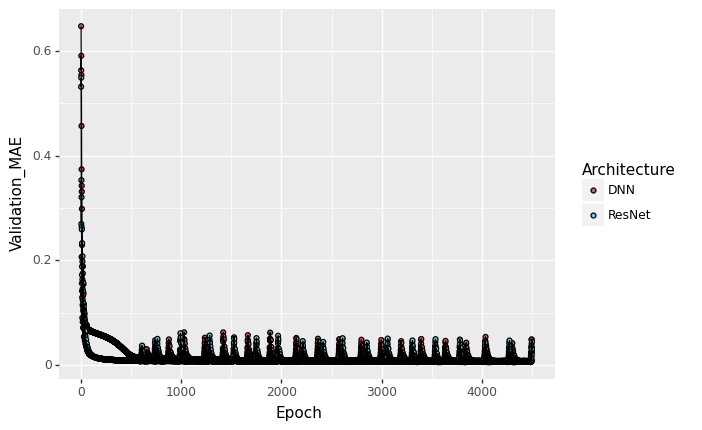

<ggplot: (8769358257553)>

time: 1.03 s (started: 2022-09-26 15:49:49 +00:00)


In [ ]:
from plotnine import *
val_mae_bs = pd.DataFrame({ "DNN" : trainEussBS_DNN.vaildation_data_mae, "ResNet" : trainEussBS_ResNet.vaildation_data_mae, "Epoch" : np.arange(1,len(trainEussBS_ResNet.vaildation_data_mae)+1).tolist()   })
val_mae_bs = val_mae_bs.melt(id_vars="Epoch", value_vars = ["DNN","ResNet"])
val_mae_bs.columns=[ "Epoch", "Architecture", "Validation_MAE" ]
ggplot(val_mae_bs, aes(x="Epoch", y="Validation_MAE", groupby="Architecture", col="Architecture", fill="Architecture" )) + geom_point(aes(col="Architecture", fill="Architecture" )) + geom_line(aes(col="Architecture", fill="Architecture" ))

In [ ]:
val_mae_bs.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/BS_DNN_vs_Resnet_2.csv", index=False)

time: 27.3 ms (started: 2022-09-26 15:50:07 +00:00)


####  BASIC DGM ON BS

In [ ]:
##### BASIC DGM ON BS ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

net = BasicOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanBlackScholesSingleStockBase(net)

trainEuss_no_supervised_no_struct = TrainEuropeanBlackScholesSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['bs_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5
trainEuss_no_supervised_no_struct.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:38,  1.00it/s]

Epoch 0 - lr 0.001 -  loss: 0.18457358926534653 - Terminal loss 0.07960327714681625 - Internal Loss 0.00033717966289259493 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:25,  1.11it/s]

Epoch 4 - lr 0.001 -  loss: 0.005033823661506176 - Terminal loss 0.004576863255351782 - Internal Loss 0.0002728899125941098 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:09<01:20,  1.11it/s]

Epoch 9 - lr 0.001 -  loss: 0.0030925270169973374 - Terminal loss 0.0031702485866844654 - Internal Loss 0.00020392336591612548 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:13<01:21,  1.04it/s]

Epoch 14 - lr 0.001 -  loss: 0.0027529005892574787 - Terminal loss 0.0028769357595592737 - Internal Loss 0.0001650044578127563 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:18<01:12,  1.10it/s]

Epoch 19 - lr 0.001 -  loss: 0.0024991728365421294 - Terminal loss 0.002621506107971072 - Internal Loss 0.0001427956740371883 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:22<01:06,  1.12it/s]

Epoch 24 - lr 0.001 -  loss: 0.002248640335164964 - Terminal loss 0.002360816579312086 - Internal Loss 0.00012613937724381685 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:26<00:58,  1.20it/s]

Epoch 29 - lr 0.001 -  loss: 0.0019802637631073593 - Terminal loss 0.0020755124278366566 - Internal Loss 0.00011205230839550495 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:31<00:56,  1.15it/s]

Epoch 34 - lr 0.001 -  loss: 0.00167992856586352 - Terminal loss 0.0017497694352641702 - Internal Loss 9.987704106606543e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:35<00:51,  1.17it/s]

Epoch 39 - lr 0.001 -  loss: 0.0013377375551499426 - Terminal loss 0.0013730298960581422 - Internal Loss 9.071447857422754e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:39<00:48,  1.14it/s]

Epoch 44 - lr 0.001 -  loss: 0.0009742299327626825 - Terminal loss 0.0009712444734759629 - Internal Loss 8.562194852856919e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:44<00:42,  1.16it/s]

Epoch 49 - lr 0.001 -  loss: 0.0006423844897653908 - Terminal loss 0.0006049048970453441 - Internal Loss 8.708368841325864e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:48<00:40,  1.11it/s]

Epoch 54 - lr 0.001 -  loss: 0.0004148544481722638 - Terminal loss 0.0003558458120096475 - Internal Loss 9.291619790019467e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:52<00:35,  1.14it/s]

Epoch 59 - lr 0.001 -  loss: 0.0003050206141779199 - Terminal loss 0.00023878879437688738 - Internal Loss 9.702208626549691e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:57<00:29,  1.20it/s]

Epoch 64 - lr 0.001 -  loss: 0.0002614797645946965 - Terminal loss 0.00019213478663004935 - Internal Loss 9.842216240940616e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [01:01<00:26,  1.14it/s]

Epoch 69 - lr 0.001 -  loss: 0.00023814657470211387 - Terminal loss 0.000167572739883326 - Internal Loss 9.763690468389541e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:06<00:21,  1.15it/s]

Epoch 74 - lr 0.001 -  loss: 0.0002502520801499486 - Terminal loss 0.00017699574527796358 - Internal Loss 9.44020357565023e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:10<00:17,  1.11it/s]

Epoch 79 - lr 0.001 -  loss: 0.00020707440708065406 - Terminal loss 0.00013768728240393102 - Internal Loss 9.364697325509042e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:14<00:12,  1.18it/s]

Epoch 84 - lr 0.001 -  loss: 0.0002531713107600808 - Terminal loss 0.00019412420806474984 - Internal Loss 8.93285105121322e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:19<00:09,  1.09it/s]

Epoch 89 - lr 0.001 -  loss: 0.0001875357367680408 - Terminal loss 0.00011911128967767581 - Internal Loss 8.984797750599682e-05 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:23<00:04,  1.17it/s]

Epoch 94 - lr 0.001 -  loss: 0.0001782687337254174 - Terminal loss 0.00011064059799537063 - Internal Loss 8.862734830472618e-05 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:28<00:00,  1.13it/s]

Epoch 99 - lr 0.001 -  loss: 0.0002829083940014243 - Terminal loss 0.00011612927482929081 - Internal Loss 8.727822569198906e-05 - Structure Loss 0.0 - Supervised Loss 0.0


BasicOptionNet(
  (fc_input): Linear(in_features=6, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 1min 28s (started: 2022-08-13 20:36:22 +00:00)


0.010295387


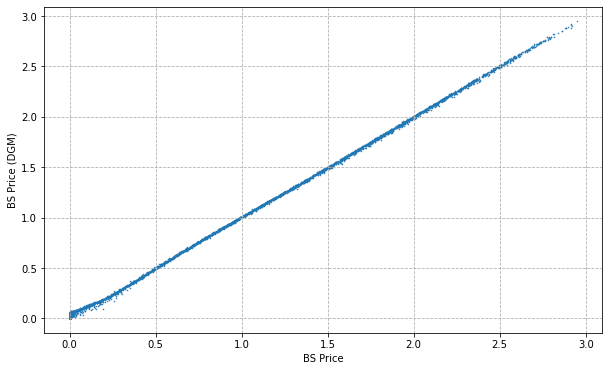

time: 198 ms (started: 2022-08-13 20:37:50 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(test_sol).numpy(), torch.flatten(net_cpu(test_input)).detach().numpy(), s=.3)
plt.xlabel('BS Price')
plt.ylabel('BS Price (DGM)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(test_sol).numpy() -torch.flatten(net_cpu(test_input)).detach().numpy() )))

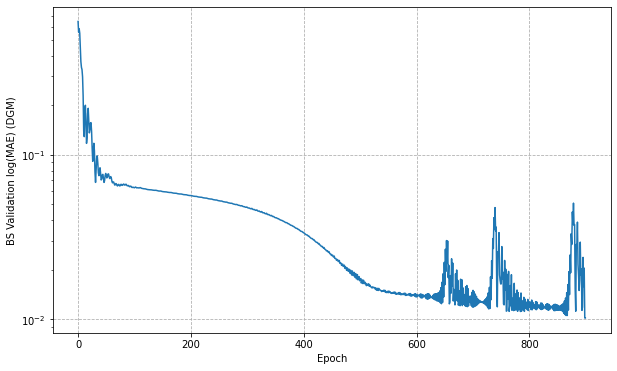

time: 349 ms (started: 2022-08-13 20:37:50 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('BS Validation log(MAE) (DGM)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

mod_name = "BS"
fit_name = "trainEuss_no_supervised_no_struct"
val_mae_df = pd.DataFrame({ 'model' : mod_name, 'name': fit_name, 
                            'data' : trainEuss_no_supervised_no_struct.vaildation_data_mae })
val_mae_df.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv")


In [ ]:
paper_name

'turbocharging_dgm'

time: 3.84 ms (started: 2022-08-13 20:37:51 +00:00)


#### DGM w/ IS ON BS

In [ ]:
##### DGM w/ IS ON BS ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma=1.0

net = BasicOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanBlackScholesSingleStockBase(net)

trainEuss_IS = TrainEuropeanBlackScholesSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['bs_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_IS.hook_interval = 5
trainEuss_IS.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma)
trainEuss_IS.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:32,  1.07it/s]

Epoch 0 - lr 0.001 -  loss: 1.6649747610092163 - Terminal loss 0.1051826998591423 - Internal Loss 0.24699966609477997 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:32,  1.02it/s]

Epoch 4 - lr 0.001 -  loss: 0.04875017106533051 - Terminal loss 0.24130012094974518 - Internal Loss 0.24528923630714417 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:09<01:24,  1.06it/s]

Epoch 9 - lr 0.001 -  loss: 0.03823964297771454 - Terminal loss 0.23641453683376312 - Internal Loss 0.2468755543231964 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:14<01:18,  1.08it/s]

Epoch 14 - lr 0.001 -  loss: 0.03154630064964294 - Terminal loss 0.23855715990066528 - Internal Loss 0.24774669110774994 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:18<01:15,  1.06it/s]

Epoch 19 - lr 0.001 -  loss: 0.026117348670959474 - Terminal loss 0.2404658943414688 - Internal Loss 0.24838458001613617 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:23<01:06,  1.12it/s]

Epoch 24 - lr 0.001 -  loss: 0.019206006452441214 - Terminal loss 0.24302445352077484 - Internal Loss 0.24874167144298553 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:27<01:02,  1.12it/s]

Epoch 29 - lr 0.001 -  loss: 0.01298932246863842 - Terminal loss 0.24571777880191803 - Internal Loss 0.24886155128479004 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:32<00:59,  1.09it/s]

Epoch 34 - lr 0.001 -  loss: 0.009814195707440377 - Terminal loss 0.24693572521209717 - Internal Loss 0.2488890439271927 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:37<00:55,  1.09it/s]

Epoch 39 - lr 0.001 -  loss: 0.007982619758695363 - Terminal loss 0.24786116182804108 - Internal Loss 0.24871860444545746 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:41<00:50,  1.10it/s]

Epoch 44 - lr 0.001 -  loss: 0.006769678043201566 - Terminal loss 0.24824486672878265 - Internal Loss 0.24865972995758057 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:46<00:45,  1.09it/s]

Epoch 49 - lr 0.001 -  loss: 0.006038553826510906 - Terminal loss 0.24854426085948944 - Internal Loss 0.2486966848373413 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:50<00:40,  1.12it/s]

Epoch 54 - lr 0.001 -  loss: 0.005871874047443271 - Terminal loss 0.24863888323307037 - Internal Loss 0.24864600598812103 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:54<00:34,  1.15it/s]

Epoch 59 - lr 0.001 -  loss: 0.005339645734056831 - Terminal loss 0.24875079095363617 - Internal Loss 0.24880196154117584 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:59<00:34,  1.01it/s]

Epoch 64 - lr 0.001 -  loss: 0.005043464293703437 - Terminal loss 0.2488260418176651 - Internal Loss 0.2488853931427002 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [01:04<00:27,  1.09it/s]

Epoch 69 - lr 0.001 -  loss: 0.005045994091778994 - Terminal loss 0.24893821775913239 - Internal Loss 0.24888721108436584 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:09<00:23,  1.05it/s]

Epoch 74 - lr 0.001 -  loss: 0.00468714227899909 - Terminal loss 0.24892789125442505 - Internal Loss 0.24897681176662445 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:13<00:17,  1.12it/s]

Epoch 79 - lr 0.001 -  loss: 0.00454727173782885 - Terminal loss 0.24898767471313477 - Internal Loss 0.24900786578655243 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:18<00:13,  1.08it/s]

Epoch 84 - lr 0.001 -  loss: 0.004456782853230834 - Terminal loss 0.24903914332389832 - Internal Loss 0.24898681044578552 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:22<00:08,  1.12it/s]

Epoch 89 - lr 0.001 -  loss: 0.004451899090781808 - Terminal loss 0.24913237988948822 - Internal Loss 0.24905334413051605 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:27<00:04,  1.14it/s]

Epoch 94 - lr 0.001 -  loss: 0.004334070952609181 - Terminal loss 0.24911808967590332 - Internal Loss 0.2489684820175171 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:31<00:00,  1.09it/s]

Epoch 99 - lr 0.001 -  loss: 0.004273806139826775 - Terminal loss 0.2491549700498581 - Internal Loss 0.248951718211174 - Structure Loss 0.0 - Supervised Loss 0.0


BasicOptionNet(
  (fc_input): Linear(in_features=6, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 1min 31s (started: 2022-08-13 20:37:51 +00:00)


0.010393599


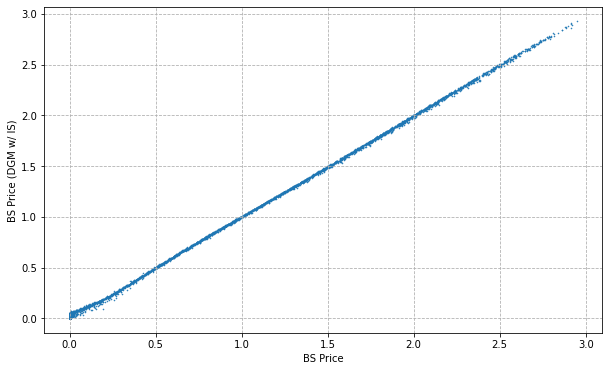

time: 216 ms (started: 2022-08-13 20:39:22 +00:00)


In [ ]:
net_cpu = trainEuss_IS.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(test_sol).numpy(), torch.flatten(net_cpu(test_input)).detach().numpy(), s=.3)
plt.xlabel('BS Price')
plt.ylabel('BS Price (DGM w/ IS)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(test_sol).numpy() -torch.flatten(net_cpu(test_input)).detach().numpy() )))

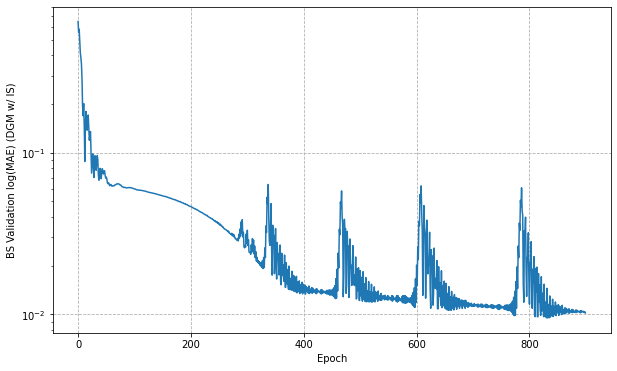

time: 350 ms (started: 2022-08-13 20:39:23 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_IS.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('BS Validation log(MAE) (DGM w/ IS)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

mod_name = "BS"
fit_name = "trainEuss_IS"
val_mae_df = pd.DataFrame({ 'model' : mod_name, 'name': fit_name, 
                            'data' : trainEuss_IS.vaildation_data_mae })
val_mae_df.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv", index=False)

#### DGM w/ ST ON BS

In [ ]:
##### DGM w/ ST ON HESTON ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma=1.0

net = BasicOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanBlackScholesSingleStockBase(net)
heston_equation.xbreaks = np.linspace(0.0,1.0,4).tolist()
# np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()

trainEuss_ST = TrainEuropeanBlackScholesSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['bs_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_ST.hook_interval = 5
trainEuss_ST.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_ST.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:29,  1.10it/s]

Epoch 0 - lr 0.001 -  loss: 0.34594963062554596 - Terminal loss 0.15937423706054688 - Internal Loss 0.004841298330575228 - Structure Loss 0.0 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:04<01:35,  1.01s/it]

Epoch 4 - lr 0.001 -  loss: 0.10175508670508862 - Terminal loss 0.09710754454135895 - Internal Loss 0.000994334346614778 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 10/100 [00:09<01:21,  1.10it/s]

Epoch 9 - lr 0.001 -  loss: 0.0054257110925391315 - Terminal loss 0.005004567559808493 - Internal Loss 0.0006871311343275011 - Structure Loss 0.0 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:13<01:12,  1.18it/s]

Epoch 14 - lr 0.001 -  loss: 0.004011119296774268 - Terminal loss 0.0028413489926606417 - Internal Loss 0.0005654966807924211 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 20/100 [00:18<01:12,  1.10it/s]

Epoch 19 - lr 0.001 -  loss: 0.00542742523830384 - Terminal loss 0.0029518408700823784 - Internal Loss 0.0004979139193892479 - Structure Loss 0.0 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:22<01:03,  1.18it/s]

Epoch 24 - lr 0.001 -  loss: 0.016172206262126565 - Terminal loss 0.005751475691795349 - Internal Loss 0.00045385429984889925 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:26<01:02,  1.12it/s]

Epoch 29 - lr 0.001 -  loss: 0.08707083547487855 - Terminal loss 0.09809015691280365 - Internal Loss 0.00040990073466673493 - Structure Loss 0.0 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:31<00:55,  1.16it/s]

Epoch 34 - lr 0.001 -  loss: 0.024651940818876027 - Terminal loss 0.024473439902067184 - Internal Loss 0.0006044885376468301 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 40/100 [00:35<00:52,  1.14it/s]

Epoch 39 - lr 0.001 -  loss: 0.009577645221725106 - Terminal loss 0.014100635424256325 - Internal Loss 0.000524010683875531 - Structure Loss 0.0 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:39<00:48,  1.14it/s]

Epoch 44 - lr 0.001 -  loss: 0.004533145250752569 - Terminal loss 0.0039223236963152885 - Internal Loss 0.00038367760134860873 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:44<00:45,  1.10it/s]

Epoch 49 - lr 0.001 -  loss: 0.003946167090907693 - Terminal loss 0.002953659277409315 - Internal Loss 0.0003648909041658044 - Structure Loss 0.0 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:48<00:40,  1.12it/s]

Epoch 54 - lr 0.001 -  loss: 0.0036319942446425557 - Terminal loss 0.0023978701792657375 - Internal Loss 0.0003308254526928067 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:53<00:33,  1.20it/s]

Epoch 59 - lr 0.001 -  loss: 0.004809549986384809 - Terminal loss 0.001892481348477304 - Internal Loss 0.00031179492361843586 - Structure Loss 0.0 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:57<00:31,  1.12it/s]

Epoch 64 - lr 0.001 -  loss: 0.0356921027880162 - Terminal loss 0.022309236228466034 - Internal Loss 0.00041741010500118136 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 70/100 [01:01<00:26,  1.15it/s]

Epoch 69 - lr 0.001 -  loss: 0.04167476040311158 - Terminal loss 0.004104603547602892 - Internal Loss 0.0016270040068775415 - Structure Loss 0.0 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:06<00:22,  1.10it/s]

Epoch 74 - lr 0.001 -  loss: 0.016757768206298353 - Terminal loss 0.014579219743609428 - Internal Loss 0.0003286521532572806 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:10<00:17,  1.15it/s]

Epoch 79 - lr 0.001 -  loss: 0.004394029802642763 - Terminal loss 0.0038303458131849766 - Internal Loss 0.00031790530192665756 - Structure Loss 0.0 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:15<00:13,  1.10it/s]

Epoch 84 - lr 0.001 -  loss: 0.0036443663528189065 - Terminal loss 0.002445371588692069 - Internal Loss 0.00030602331389673054 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:19<00:09,  1.10it/s]

Epoch 89 - lr 0.001 -  loss: 0.003158276528120041 - Terminal loss 0.0018465983448550105 - Internal Loss 0.0002791235747281462 - Structure Loss 0.0 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:24<00:04,  1.07it/s]

Epoch 94 - lr 0.001 -  loss: 0.0030469125020317735 - Terminal loss 0.0014184605097398162 - Internal Loss 0.0002592106466181576 - Structure Loss 0.0 - Supervised Loss 0.0


100%|██████████| 100/100 [01:28<00:00,  1.12it/s]

Epoch 99 - lr 0.001 -  loss: 0.018954363046213986 - Terminal loss 0.008754372596740723 - Internal Loss 0.00029620141140185297 - Structure Loss 0.0 - Supervised Loss 0.0


BasicOptionNet(
  (fc_input): Linear(in_features=6, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 1min 28s (started: 2022-08-13 20:39:23 +00:00)


0.091663346


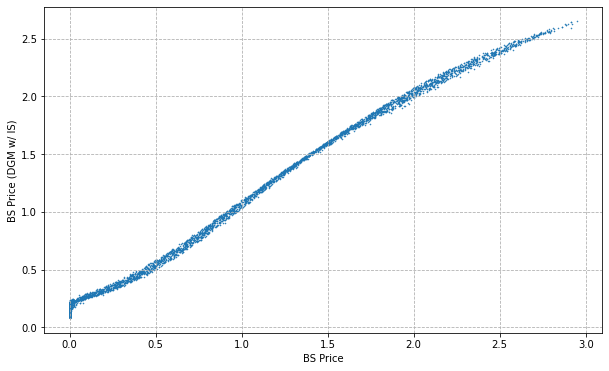

time: 209 ms (started: 2022-08-13 20:40:52 +00:00)


In [ ]:
net_cpu = trainEuss_ST.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(test_sol).numpy(), torch.flatten(net_cpu(test_input)).detach().numpy(), s=.3)
plt.xlabel('BS Price')
plt.ylabel('BS Price (DGM w/ IS)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(test_sol).numpy() -torch.flatten(net_cpu(test_input)).detach().numpy() )))

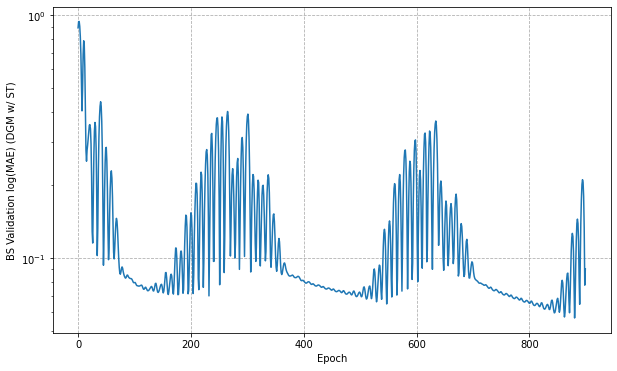

time: 368 ms (started: 2022-08-13 20:40:52 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_ST.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('BS Validation log(MAE) (DGM w/ ST)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

mod_name = "BS"
fit_name = "trainEuss_ST"
val_mae_df = pd.DataFrame({ 'model' : mod_name, 'name': fit_name, 
                            'data' : trainEuss_ST.vaildation_data_mae })
val_mae_df.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv", index=False)

#### DGM w/ CONSTR ON BS

In [ ]:
##### DGM w/ CONSTR ON HESTON ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma=1.0

net = BasicOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanBlackScholesSingleStockBase(net)

trainEuss_CONSTR = TrainEuropeanBlackScholesSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['bs_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_CONSTR.hook_interval = 5
trainEuss_CONSTR.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=True)
trainEuss_CONSTR.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:31,  1.08it/s]

Epoch 0 - lr 0.001 -  loss: 0.14022742286324502 - Terminal loss 0.06593961268663406 - Internal Loss 0.0021062041632831097 - Structure Loss 0.01317592617124319 - Supervised Loss 0.0


  5%|▌         | 5/100 [00:05<01:38,  1.04s/it]

Epoch 4 - lr 0.001 -  loss: 0.010125380009412766 - Terminal loss 0.005037007387727499 - Internal Loss 0.0005688709788955748 - Structure Loss 0.0036871719639748335 - Supervised Loss 0.0


 10%|█         | 10/100 [00:09<01:22,  1.09it/s]

Epoch 9 - lr 0.001 -  loss: 0.0014711476629599928 - Terminal loss 0.0013747954508289695 - Internal Loss 0.00015676631301175803 - Structure Loss 3.279067459516227e-05 - Supervised Loss 0.0


 15%|█▌        | 15/100 [00:14<01:19,  1.07it/s]

Epoch 14 - lr 0.001 -  loss: 0.001957615977153182 - Terminal loss 0.001095892395824194 - Internal Loss 8.754780719755217e-05 - Structure Loss 0.0014662316534668207 - Supervised Loss 0.0


 20%|██        | 20/100 [00:18<01:10,  1.14it/s]

Epoch 19 - lr 0.001 -  loss: 0.0019583785091526807 - Terminal loss 0.001038221176713705 - Internal Loss 0.0009186407551169395 - Structure Loss 0.0002152846282115206 - Supervised Loss 0.0


 25%|██▌       | 25/100 [00:22<01:06,  1.13it/s]

Epoch 24 - lr 0.001 -  loss: 0.0014512728434056044 - Terminal loss 0.000846237177029252 - Internal Loss 0.0011141926515847445 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 30/100 [00:27<01:00,  1.15it/s]

Epoch 29 - lr 0.001 -  loss: 0.001178188482299447 - Terminal loss 0.0006148796528577805 - Internal Loss 0.0002638925507199019 - Structure Loss 1.5371866538771428e-05 - Supervised Loss 0.0


 35%|███▌      | 35/100 [00:31<00:59,  1.10it/s]

Epoch 34 - lr 0.001 -  loss: 0.0008277645451016724 - Terminal loss 0.0005950027843937278 - Internal Loss 0.00019698371761478484 - Structure Loss 3.33829348164727e-07 - Supervised Loss 0.0


 40%|████      | 40/100 [00:35<00:53,  1.11it/s]

Epoch 39 - lr 0.001 -  loss: 0.001172813167795539 - Terminal loss 0.0005947832250967622 - Internal Loss 9.450902871321887e-05 - Structure Loss 0.0006627608090639114 - Supervised Loss 0.0


 45%|████▌     | 45/100 [00:40<00:49,  1.11it/s]

Epoch 44 - lr 0.001 -  loss: 0.0006727253086864949 - Terminal loss 0.0004304287431295961 - Internal Loss 0.0002877619117498398 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 50/100 [00:44<00:44,  1.13it/s]

Epoch 49 - lr 0.001 -  loss: 0.0004132612782996148 - Terminal loss 0.00028269950416870415 - Internal Loss 0.00014279405877459794 - Structure Loss 1.8848677427740768e-05 - Supervised Loss 0.0


 55%|█████▌    | 55/100 [00:49<00:38,  1.18it/s]

Epoch 54 - lr 0.001 -  loss: 0.0009708278579637408 - Terminal loss 0.0015796980587765574 - Internal Loss 0.00023955339565873146 - Structure Loss 3.257778189436067e-06 - Supervised Loss 0.0


 60%|██████    | 60/100 [00:53<00:37,  1.08it/s]

Epoch 59 - lr 0.001 -  loss: 0.0007029919943306595 - Terminal loss 0.00028706900775432587 - Internal Loss 0.0006713488837704062 - Structure Loss 9.910714879879379e-07 - Supervised Loss 0.0


 65%|██████▌   | 65/100 [00:58<00:31,  1.12it/s]

Epoch 64 - lr 0.001 -  loss: 0.000895811093505472 - Terminal loss 0.00017042153922375292 - Internal Loss 0.0003953363047912717 - Structure Loss 0.0001531283196527511 - Supervised Loss 0.0


 70%|███████   | 70/100 [01:03<00:29,  1.01it/s]

Epoch 69 - lr 0.001 -  loss: 0.0003723307920154184 - Terminal loss 0.00015295871708076447 - Internal Loss 0.00014102451677899808 - Structure Loss 0.0001070361613528803 - Supervised Loss 0.0


 75%|███████▌  | 75/100 [01:08<00:23,  1.04it/s]

Epoch 74 - lr 0.001 -  loss: 0.00026378511975053696 - Terminal loss 0.00013082969235256314 - Internal Loss 0.00015257371705956757 - Structure Loss 6.334146291919751e-06 - Supervised Loss 0.0


 80%|████████  | 80/100 [01:13<00:19,  1.05it/s]

Epoch 79 - lr 0.001 -  loss: 0.00025221590185537935 - Terminal loss 0.00011983443982899189 - Internal Loss 0.0001553136098664254 - Structure Loss 2.903803306253394e-06 - Supervised Loss 0.0


 85%|████████▌ | 85/100 [01:17<00:13,  1.10it/s]

Epoch 84 - lr 0.001 -  loss: 0.00023968153400346636 - Terminal loss 0.00011234045086894184 - Internal Loss 0.0001482733932789415 - Structure Loss 3.637726877059322e-06 - Supervised Loss 0.0


 90%|█████████ | 90/100 [01:22<00:09,  1.07it/s]

Epoch 89 - lr 0.001 -  loss: 0.00023281623725779355 - Terminal loss 0.00010441053018439561 - Internal Loss 0.00015040473954286426 - Structure Loss 2.3592860998178367e-06 - Supervised Loss 0.0


 95%|█████████▌| 95/100 [01:26<00:04,  1.09it/s]

Epoch 94 - lr 0.001 -  loss: 0.0008405333617702126 - Terminal loss 0.0002771963190753013 - Internal Loss 9.967543883249164e-05 - Structure Loss 0.00044993218034505844 - Supervised Loss 0.0


100%|██████████| 100/100 [01:31<00:00,  1.09it/s]

Epoch 99 - lr 0.001 -  loss: 0.0017012846656143665 - Terminal loss 0.0006297454237937927 - Internal Loss 0.0008415153715759516 - Structure Loss 0.0 - Supervised Loss 0.0


BasicOptionNet(
  (fc_input): Linear(in_features=6, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 1min 31s (started: 2022-08-13 20:40:52 +00:00)


0.030250847


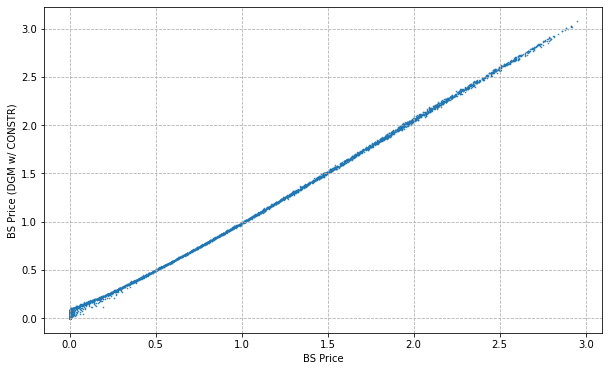

time: 242 ms (started: 2022-08-13 20:42:24 +00:00)


In [ ]:
net_cpu = trainEuss_CONSTR.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(test_sol).numpy(), torch.flatten(net_cpu(test_input)).detach().numpy(), s=.3)
plt.xlabel('BS Price')
plt.ylabel('BS Price (DGM w/ CONSTR)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(test_sol).numpy() -torch.flatten(net_cpu(test_input)).detach().numpy() )))

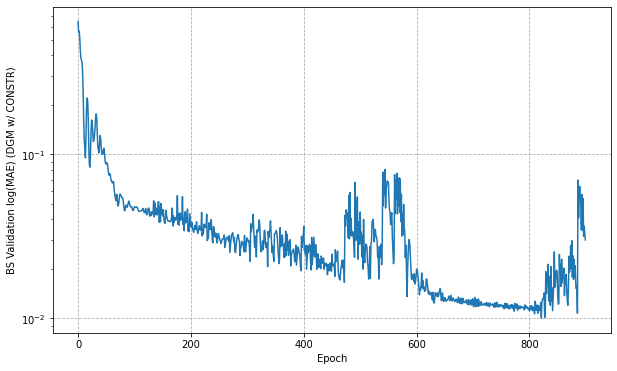

time: 383 ms (started: 2022-08-13 20:42:25 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_CONSTR.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('BS Validation log(MAE) (DGM w/ CONSTR)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

mod_name = "BS"
fit_name = "trainEuss_CONSTR"
val_mae_df = pd.DataFrame({ 'model' : mod_name, 'name': fit_name, 
                            'data' : trainEuss_CONSTR.vaildation_data_mae })
val_mae_df.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv", index=False)

#### DGM w/ PiNN ON BS

In [ ]:
##### DGM w/ PiNN ON HESTON ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3

net = BasicOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanBlackScholesSingleStockBase(net)

trainEuss_PiNN = TrainEuropeanBlackScholesSingleStockBase( net , heston_equation, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_PiNN.hook_interval = 5
trainEuss_PiNN.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False)
trainEuss_PiNN.net.to(torch.device("cuda:0"))


  1%|          | 1/100 [00:00<01:15,  1.32it/s]

Epoch 0 - lr 0.001 -  loss: 0.18506228963711432 - Terminal loss 0.008987866342067719 - Internal Loss 0.0005675829015672207 - Structure Loss 0.0 - Supervised Loss 0.00780603289604187


  5%|▌         | 5/100 [00:04<01:30,  1.05it/s]

Epoch 4 - lr 0.001 -  loss: 0.004629679755972964 - Terminal loss 0.0023014750331640244 - Internal Loss 0.00018220434139948338 - Structure Loss 0.0 - Supervised Loss 0.0022077644243836403


 10%|█         | 10/100 [00:09<01:25,  1.05it/s]

Epoch 9 - lr 0.001 -  loss: 0.003662263342578496 - Terminal loss 0.0019403945188969374 - Internal Loss 0.00013271084753796458 - Structure Loss 0.0 - Supervised Loss 0.001825404353439808


 15%|█▌        | 15/100 [00:14<01:19,  1.07it/s]

Epoch 14 - lr 0.001 -  loss: 0.0031716456537001897 - Terminal loss 0.0016898717731237411 - Internal Loss 0.00010439791367389262 - Structure Loss 0.0 - Supervised Loss 0.0015803429996594787


 20%|██        | 20/100 [00:18<01:13,  1.08it/s]

Epoch 19 - lr 0.001 -  loss: 0.0026628036783742054 - Terminal loss 0.0014207062777131796 - Internal Loss 8.60442451084964e-05 - Structure Loss 0.0 - Supervised Loss 0.001315997913479805


 25%|██▌       | 25/100 [00:23<01:14,  1.01it/s]

Epoch 24 - lr 0.001 -  loss: 0.0020795941153275116 - Terminal loss 0.0011050072498619556 - Internal Loss 7.205754809547216e-05 - Structure Loss 0.0 - Supervised Loss 0.0010095703182742


 30%|███       | 30/100 [00:28<01:07,  1.04it/s]

Epoch 29 - lr 0.001 -  loss: 0.0014334788928473635 - Terminal loss 0.0007537865894846618 - Internal Loss 6.238707283046097e-05 - Structure Loss 0.0 - Supervised Loss 0.0006700497469864786


 35%|███▌      | 35/100 [00:33<01:01,  1.06it/s]

Epoch 34 - lr 0.001 -  loss: 0.0008213839235915137 - Terminal loss 0.00041986076394096017 - Internal Loss 6.136774754850194e-05 - Structure Loss 0.0 - Supervised Loss 0.00035598583053797483


 40%|████      | 40/100 [00:38<00:59,  1.01it/s]

Epoch 39 - lr 0.001 -  loss: 0.0004296174572248544 - Terminal loss 0.0002066536108031869 - Internal Loss 7.011201523710042e-05 - Structure Loss 0.0 - Supervised Loss 0.0001659640111029148


 45%|████▌     | 45/100 [00:43<00:55,  1.01s/it]

Epoch 44 - lr 0.001 -  loss: 0.000386246047647936 - Terminal loss 0.0001524832914583385 - Internal Loss 7.381284376606345e-05 - Structure Loss 0.0 - Supervised Loss 0.0001628315367270261


 50%|█████     | 50/100 [00:48<00:49,  1.01it/s]

Epoch 49 - lr 0.001 -  loss: 0.00031625603566811023 - Terminal loss 0.00011525770969456062 - Internal Loss 7.35078428988345e-05 - Structure Loss 0.0 - Supervised Loss 0.00012118218000978231


 55%|█████▌    | 55/100 [00:52<00:42,  1.06it/s]

Epoch 54 - lr 0.001 -  loss: 0.0005930450009015788 - Terminal loss 0.0006616866448894143 - Internal Loss 7.801649917382747e-05 - Structure Loss 0.0 - Supervised Loss 0.0005157098639756441


 60%|██████    | 60/100 [00:57<00:37,  1.07it/s]

Epoch 59 - lr 0.001 -  loss: 0.00021356777870096266 - Terminal loss 8.903675188776106e-05 - Internal Loss 7.16285576345399e-05 - Structure Loss 0.0 - Supervised Loss 7.133773760870099e-05


 65%|██████▌   | 65/100 [01:02<00:34,  1.01it/s]

Epoch 64 - lr 0.001 -  loss: 0.00035128289268219044 - Terminal loss 0.00011450496094767004 - Internal Loss 7.050736167002469e-05 - Structure Loss 0.0 - Supervised Loss 7.651933992747217e-05


 70%|███████   | 70/100 [01:07<00:29,  1.01it/s]

Epoch 69 - lr 0.001 -  loss: 0.0001872930775529572 - Terminal loss 7.242607534863055e-05 - Internal Loss 6.883326568640769e-05 - Structure Loss 0.0 - Supervised Loss 6.150834815343842e-05


 75%|███████▌  | 75/100 [01:12<00:24,  1.03it/s]

Epoch 74 - lr 0.001 -  loss: 0.0004095438842861248 - Terminal loss 0.0007006683154031634 - Internal Loss 7.268717308761552e-05 - Structure Loss 0.0 - Supervised Loss 0.0005526218446902931


 80%|████████  | 80/100 [01:17<00:20,  1.00s/it]

Epoch 79 - lr 0.001 -  loss: 0.00017194764846603254 - Terminal loss 6.137570744613186e-05 - Internal Loss 6.67090862407349e-05 - Structure Loss 0.0 - Supervised Loss 5.5276839702855796e-05


 85%|████████▌ | 85/100 [01:22<00:14,  1.06it/s]

Epoch 84 - lr 0.001 -  loss: 0.00016321596610526155 - Terminal loss 6.689553265459836e-05 - Internal Loss 6.62652455503121e-05 - Structure Loss 0.0 - Supervised Loss 4.885072848992422e-05


 90%|█████████ | 90/100 [01:27<00:09,  1.05it/s]

Epoch 89 - lr 0.001 -  loss: 0.0001670087461077076 - Terminal loss 5.401097223511897e-05 - Internal Loss 6.531793042086065e-05 - Structure Loss 0.0 - Supervised Loss 4.8870264436118305e-05


 95%|█████████▌| 95/100 [01:31<00:04,  1.14it/s]

Epoch 94 - lr 0.001 -  loss: 0.00015207855280355683 - Terminal loss 6.297958316281438e-05 - Internal Loss 6.499288429040462e-05 - Structure Loss 0.0 - Supervised Loss 4.4477124902186915e-05


100%|██████████| 100/100 [01:36<00:00,  1.04it/s]

Epoch 99 - lr 0.001 -  loss: 0.00015541184257017449 - Terminal loss 4.783898111782037e-05 - Internal Loss 6.409505294868723e-05 - Structure Loss 0.0 - Supervised Loss 4.511418956099078e-05


BasicOptionNet(
  (fc_input): Linear(in_features=6, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 1min 36s (started: 2022-08-13 20:42:27 +00:00)


0.00845499


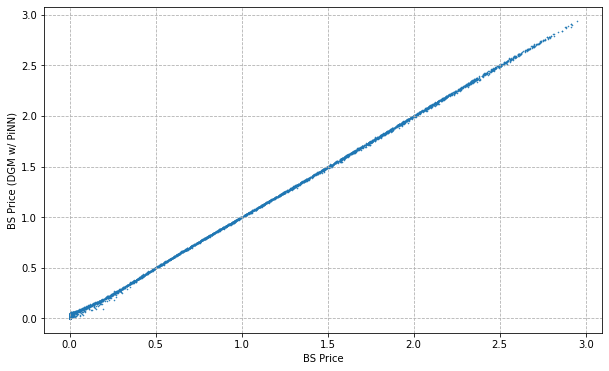

time: 216 ms (started: 2022-08-13 20:44:03 +00:00)


In [ ]:
net_cpu = trainEuss_PiNN.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(test_sol).numpy(), torch.flatten(net_cpu(test_input)).detach().numpy(), s=.3)
plt.xlabel('BS Price')
plt.ylabel('BS Price (DGM w/ PiNN)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(test_sol).numpy() -torch.flatten(net_cpu(test_input)).detach().numpy() )))

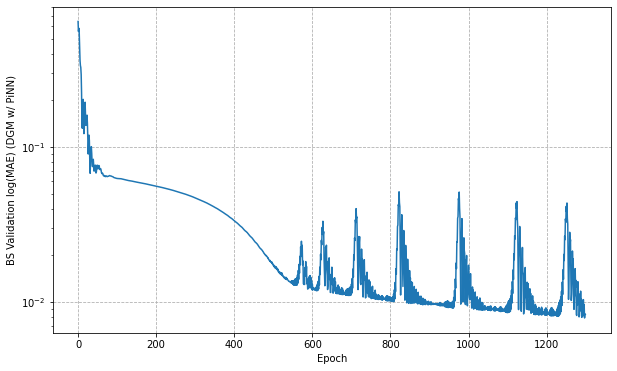

time: 372 ms (started: 2022-08-13 20:44:03 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_PiNN.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('BS Validation log(MAE) (DGM w/ PiNN)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

mod_name = "BS"
fit_name = "trainEuss_PiNN"
val_mae_df = pd.DataFrame({ 'model' : mod_name, 'name': fit_name, 
                            'data' : trainEuss_PiNN.vaildation_data_mae })
val_mae_df.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv", index=False)

#### DGM w/ STLONG ON BS

In [ ]:
##### DGM w/ STLONG ON HESTON ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma=1.0

net = BasicOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanBlackScholesSingleStockBase(net)
heston_equation.xbreaks = np.linspace(0.0,1.0,4).tolist()
# np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()

trainEuss_STL = TrainEuropeanBlackScholesSingleStockBase( net , heston_equation, BATCH_SIZE = supervised_data['heston_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_STL.hook_interval = 100
trainEuss_STL.train(epoch = 5000, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_STL.net.to(torch.device("cuda:0"))


  0%|          | 1/5000 [00:00<1:17:16,  1.08it/s]

Epoch 0 - lr 0.001 -  loss: 0.47336004053552944 - Terminal loss 0.7626379728317261 - Internal Loss 0.01814950816333294 - Structure Loss 0.0 - Supervised Loss 0.0


  2%|▏         | 100/5000 [01:31<1:10:56,  1.15it/s]

Epoch 99 - lr 0.001 -  loss: 0.026120056087772053 - Terminal loss 0.005028062034398317 - Internal Loss 0.01460310909897089 - Structure Loss 0.0 - Supervised Loss 0.0


  4%|▍         | 200/5000 [03:03<1:10:50,  1.13it/s]

Epoch 199 - lr 0.001 -  loss: 0.018119926771356 - Terminal loss 0.017413873225450516 - Internal Loss 0.004858857020735741 - Structure Loss 0.0 - Supervised Loss 0.0


  6%|▌         | 300/5000 [04:35<1:14:07,  1.06it/s]

Epoch 299 - lr 0.001 -  loss: 0.014559447196208768 - Terminal loss 0.002061369363218546 - Internal Loss 0.006372393108904362 - Structure Loss 0.0 - Supervised Loss 0.0


  8%|▊         | 400/5000 [06:08<1:12:41,  1.05it/s]

Epoch 399 - lr 0.001 -  loss: 0.018889935066302616 - Terminal loss 0.0022230111062526703 - Internal Loss 0.007495895493775606 - Structure Loss 0.0 - Supervised Loss 0.0


 10%|█         | 500/5000 [07:41<1:08:59,  1.09it/s]

Epoch 499 - lr 0.001 -  loss: 0.027851805090904236 - Terminal loss 0.015058347024023533 - Internal Loss 0.007697819732129574 - Structure Loss 0.0 - Supervised Loss 0.0


 12%|█▏        | 600/5000 [09:14<1:06:55,  1.10it/s]

Epoch 599 - lr 0.001 -  loss: 0.012210897920239303 - Terminal loss 0.004297343082726002 - Internal Loss 0.0017540407134220004 - Structure Loss 0.0 - Supervised Loss 0.0


 14%|█▍        | 700/5000 [10:45<1:05:16,  1.10it/s]

Epoch 699 - lr 0.001 -  loss: 0.020421679493867688 - Terminal loss 0.02067713998258114 - Internal Loss 0.00047038335469551384 - Structure Loss 0.0 - Supervised Loss 0.0


 16%|█▌        | 800/5000 [12:15<1:01:13,  1.14it/s]

Epoch 799 - lr 0.001 -  loss: 0.005567832306648294 - Terminal loss 0.0035565663129091263 - Internal Loss 0.0032938672229647636 - Structure Loss 0.0 - Supervised Loss 0.0


 18%|█▊        | 900/5000 [13:46<1:03:51,  1.07it/s]

Epoch 899 - lr 0.001 -  loss: 0.009207125960124863 - Terminal loss 0.0022974717430770397 - Internal Loss 0.005030377302318811 - Structure Loss 0.0 - Supervised Loss 0.0


 20%|██        | 1000/5000 [15:16<1:02:01,  1.07it/s]

Epoch 999 - lr 0.001 -  loss: 0.013391168115453588 - Terminal loss 0.002057589590549469 - Internal Loss 0.007615215610712767 - Structure Loss 0.0 - Supervised Loss 0.0


 22%|██▏       | 1100/5000 [16:46<57:33,  1.13it/s]

Epoch 1099 - lr 0.001 -  loss: 0.00655504905929168 - Terminal loss 0.0016820671735331416 - Internal Loss 0.0019581494852900505 - Structure Loss 0.0 - Supervised Loss 0.0


 24%|██▍       | 1200/5000 [18:13<54:45,  1.16it/s]

Epoch 1199 - lr 0.001 -  loss: 0.006772716477927234 - Terminal loss 0.003409650642424822 - Internal Loss 0.005296294577419758 - Structure Loss 0.0 - Supervised Loss 0.0


 26%|██▌       | 1300/5000 [19:40<54:43,  1.13it/s]

Epoch 1299 - lr 0.001 -  loss: 0.04757934560378393 - Terminal loss 0.012373549863696098 - Internal Loss 0.007751287426799536 - Structure Loss 0.0 - Supervised Loss 0.0


 28%|██▊       | 1400/5000 [21:08<53:11,  1.13it/s]

Epoch 1399 - lr 0.001 -  loss: 0.0032678644897209275 - Terminal loss 0.0008947363821789622 - Internal Loss 0.0020857935305684805 - Structure Loss 0.0 - Supervised Loss 0.0


 30%|███       | 1500/5000 [22:33<52:06,  1.12it/s]

Epoch 1499 - lr 0.001 -  loss: 0.005214515918244918 - Terminal loss 0.0009758660453371704 - Internal Loss 0.003262884449213743 - Structure Loss 0.0 - Supervised Loss 0.0


 32%|███▏      | 1600/5000 [24:00<50:41,  1.12it/s]

Epoch 1599 - lr 0.001 -  loss: 0.0030583873028970426 - Terminal loss 0.0004942804807797074 - Internal Loss 0.0016869164537638426 - Structure Loss 0.0 - Supervised Loss 0.0


 34%|███▍      | 1700/5000 [25:33<51:21,  1.07it/s]

Epoch 1699 - lr 0.001 -  loss: 0.006196823540247149 - Terminal loss 0.0007170886965468526 - Internal Loss 0.0039116134867072105 - Structure Loss 0.0 - Supervised Loss 0.0


 36%|███▌      | 1800/5000 [27:05<49:53,  1.07it/s]

Epoch 1799 - lr 0.001 -  loss: 0.008191727205283113 - Terminal loss 0.0015564054483547807 - Internal Loss 0.0011966193560510874 - Structure Loss 0.0 - Supervised Loss 0.0


 38%|███▊      | 1900/5000 [28:40<48:53,  1.06it/s]

Epoch 1899 - lr 0.001 -  loss: 0.00534076305727164 - Terminal loss 0.000700034259352833 - Internal Loss 0.0035748863592743874 - Structure Loss 0.0 - Supervised Loss 0.0


 40%|████      | 2000/5000 [30:15<47:26,  1.05it/s]

Epoch 1999 - lr 0.001 -  loss: 0.003740847317708863 - Terminal loss 0.002550631994381547 - Internal Loss 0.002863198285922408 - Structure Loss 0.0 - Supervised Loss 0.0


 42%|████▏     | 2100/5000 [31:47<47:37,  1.01it/s]

Epoch 2099 - lr 0.001 -  loss: 0.008859364057166709 - Terminal loss 0.0015922279562801123 - Internal Loss 0.0014866369310766459 - Structure Loss 0.0 - Supervised Loss 0.0


 44%|████▍     | 2200/5000 [33:20<42:48,  1.09it/s]

Epoch 2199 - lr 0.001 -  loss: 0.003952392519244717 - Terminal loss 0.0014157501282170415 - Internal Loss 0.003488743444904685 - Structure Loss 0.0 - Supervised Loss 0.0


 46%|████▌     | 2300/5000 [34:52<42:08,  1.07it/s]

Epoch 2299 - lr 0.001 -  loss: 0.004006713318328063 - Terminal loss 0.0008132600924000144 - Internal Loss 0.0029201493598520756 - Structure Loss 0.0 - Supervised Loss 0.0


 48%|████▊     | 2400/5000 [36:25<40:29,  1.07it/s]

Epoch 2399 - lr 0.001 -  loss: 0.008273947414838605 - Terminal loss 0.0010591981699690223 - Internal Loss 0.0003892258682753891 - Structure Loss 0.0 - Supervised Loss 0.0


 50%|█████     | 2500/5000 [37:58<38:08,  1.09it/s]

Epoch 2499 - lr 0.001 -  loss: 0.004875707672908902 - Terminal loss 0.0056785414926707745 - Internal Loss 0.002114449394866824 - Structure Loss 0.0 - Supervised Loss 0.0


 52%|█████▏    | 2600/5000 [39:30<35:03,  1.14it/s]

Epoch 2599 - lr 0.001 -  loss: 0.0035586648931105933 - Terminal loss 0.0004108874418307096 - Internal Loss 0.002167203463613987 - Structure Loss 0.0 - Supervised Loss 0.0


 54%|█████▍    | 2700/5000 [41:02<34:51,  1.10it/s]

Epoch 2699 - lr 0.001 -  loss: 0.0041118471417576075 - Terminal loss 0.0006762052653357387 - Internal Loss 0.0025942642241716385 - Structure Loss 0.0 - Supervised Loss 0.0


 56%|█████▌    | 2800/5000 [42:32<32:16,  1.14it/s]

Epoch 2799 - lr 0.001 -  loss: 0.0028080562802238595 - Terminal loss 0.0005457853549160063 - Internal Loss 0.002324190689250827 - Structure Loss 0.0 - Supervised Loss 0.0


 58%|█████▊    | 2900/5000 [44:01<31:42,  1.10it/s]

Epoch 2899 - lr 0.001 -  loss: 0.0036663464011831414 - Terminal loss 0.000978974741883576 - Internal Loss 0.0026732413098216057 - Structure Loss 0.0 - Supervised Loss 0.0


 60%|██████    | 3000/5000 [45:33<30:49,  1.08it/s]

Epoch 2999 - lr 0.001 -  loss: 0.0033213477581739426 - Terminal loss 0.0006777609814889729 - Internal Loss 0.002733539091423154 - Structure Loss 0.0 - Supervised Loss 0.0


 62%|██████▏   | 3100/5000 [47:06<30:03,  1.05it/s]

Epoch 3099 - lr 0.001 -  loss: 0.002236978707110716 - Terminal loss 0.0003721540851984173 - Internal Loss 0.0017610007198527455 - Structure Loss 0.0 - Supervised Loss 0.0


 64%|██████▍   | 3200/5000 [48:38<29:26,  1.02it/s]

Epoch 3199 - lr 0.001 -  loss: 0.004590053163054917 - Terminal loss 0.0007195708458311856 - Internal Loss 0.0040072547271847725 - Structure Loss 0.0 - Supervised Loss 0.0


 66%|██████▌   | 3300/5000 [50:09<26:23,  1.07it/s]

Epoch 3299 - lr 0.001 -  loss: 0.003119847426811854 - Terminal loss 0.002259888220578432 - Internal Loss 0.0012583490461111069 - Structure Loss 0.0 - Supervised Loss 0.0


 68%|██████▊   | 3400/5000 [51:39<24:36,  1.08it/s]

Epoch 3399 - lr 0.001 -  loss: 0.003923364138851563 - Terminal loss 0.0004548859433270991 - Internal Loss 0.0026846325490623713 - Structure Loss 0.0 - Supervised Loss 0.0


 70%|███████   | 3500/5000 [53:11<23:39,  1.06it/s]

Epoch 3499 - lr 0.001 -  loss: 0.0032373733508090177 - Terminal loss 0.0004896082100458443 - Internal Loss 0.0025787658523768187 - Structure Loss 0.0 - Supervised Loss 0.0


 72%|███████▏  | 3600/5000 [54:45<22:01,  1.06it/s]

Epoch 3599 - lr 0.001 -  loss: 0.00924736551112599 - Terminal loss 0.0035178184043616056 - Internal Loss 0.00569110969081521 - Structure Loss 0.0 - Supervised Loss 0.0


 74%|███████▍  | 3700/5000 [56:17<19:33,  1.11it/s]

Epoch 3699 - lr 0.001 -  loss: 0.0035179087426513433 - Terminal loss 0.0003525569918565452 - Internal Loss 0.002611918607726693 - Structure Loss 0.0 - Supervised Loss 0.0


 76%|███████▌  | 3800/5000 [57:48<18:18,  1.09it/s]

Epoch 3799 - lr 0.001 -  loss: 0.0018677917153884966 - Terminal loss 0.0003689205041155219 - Internal Loss 0.0013232476776465774 - Structure Loss 0.0 - Supervised Loss 0.0


 78%|███████▊  | 3900/5000 [59:19<17:32,  1.05it/s]

Epoch 3899 - lr 0.001 -  loss: 0.002303777081477973 - Terminal loss 0.0002711755514610559 - Internal Loss 0.0017237772699445486 - Structure Loss 0.0 - Supervised Loss 0.0


 80%|████████  | 4000/5000 [1:00:51<15:03,  1.11it/s]

Epoch 3999 - lr 0.001 -  loss: 0.003493037760361201 - Terminal loss 0.00042516374378465116 - Internal Loss 0.002309465315192938 - Structure Loss 0.0 - Supervised Loss 0.0


 82%|████████▏ | 4100/5000 [1:02:21<13:28,  1.11it/s]

Epoch 4099 - lr 0.001 -  loss: 0.001160108329107364 - Terminal loss 0.000244139286223799 - Internal Loss 0.0006571791018359363 - Structure Loss 0.0 - Supervised Loss 0.0


 84%|████████▍ | 4200/5000 [1:03:50<12:02,  1.11it/s]

Epoch 4199 - lr 0.001 -  loss: 0.004367212609698375 - Terminal loss 0.00048200617311522365 - Internal Loss 0.003634772961959243 - Structure Loss 0.0 - Supervised Loss 0.0


 86%|████████▌ | 4300/5000 [1:05:19<10:11,  1.14it/s]

Epoch 4299 - lr 0.001 -  loss: 0.00495224236510694 - Terminal loss 0.0016033536521717906 - Internal Loss 0.0022643511183559895 - Structure Loss 0.0 - Supervised Loss 0.0


 88%|████████▊ | 4400/5000 [1:06:46<08:36,  1.16it/s]

Epoch 4399 - lr 0.001 -  loss: 0.003181016887538135 - Terminal loss 0.0004437836760189384 - Internal Loss 0.0020601474680006504 - Structure Loss 0.0 - Supervised Loss 0.0


 90%|█████████ | 4500/5000 [1:08:12<07:12,  1.16it/s]

Epoch 4499 - lr 0.001 -  loss: 0.002220963179651234 - Terminal loss 0.00021485726756509393 - Internal Loss 0.0018035307293757796 - Structure Loss 0.0 - Supervised Loss 0.0


 92%|█████████▏| 4600/5000 [1:09:38<05:46,  1.16it/s]

Epoch 4599 - lr 0.001 -  loss: 0.0011487410196827517 - Terminal loss 0.00023119535762816668 - Internal Loss 0.0007423427887260914 - Structure Loss 0.0 - Supervised Loss 0.0


 94%|█████████▍| 4700/5000 [1:11:10<04:48,  1.04it/s]

Epoch 4699 - lr 0.001 -  loss: 0.0035428678901452157 - Terminal loss 0.0006790193729102612 - Internal Loss 0.0021965980995446444 - Structure Loss 0.0 - Supervised Loss 0.0


 94%|█████████▍| 4710/5000 [1:11:19<04:36,  1.05it/s]

In [ ]:
net_cpu = trainEuss_STL.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(test_sol).numpy(), torch.flatten(net_cpu(test_input)).detach().numpy(), s=.3)
plt.xlabel('BS Price')
plt.ylabel('BS Price (DGM w/ STL)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(test_sol).numpy() -torch.flatten(net_cpu(test_input)).detach().numpy() )))

In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_STL.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('BS Validation log(MAE) (DGM w/ STL)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

#### DGM w/ PiNN_CONSTR_IS 

In [ ]:
#### DGM w/ PiNN_CONSTR_IS_CURR based on Black-Scholes Closed Form

seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma=1.0

net = BasicOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanBlackScholesSingleStockBase(net)
trainEuss_PiNN_CONSTR_IS = TrainEuropeanBlackScholesSingleStockBase( net , heston_equation, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_PiNN_CONSTR_IS.hook_interval = 5
trainEuss_PiNN_CONSTR_IS.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma)
trainEuss_PiNN_CONSTR_IS.net.to(torch.device("cuda:0"))

  1%|          | 1/100 [00:03<06:08,  3.73s/it]

Epoch 0 - lr 0.001 -  loss: 4.714835464954376 - Terminal loss 0.04016774892807007 - Internal Loss 0.061857789754867554 - Structure Loss 0.051274292171001434 - Supervised Loss 0.03905196115374565


  5%|▌         | 5/100 [00:07<01:49,  1.16s/it]

Epoch 4 - lr 0.001 -  loss: 0.1407260453062398 - Terminal loss 0.06009315326809883 - Internal Loss 0.062009163200855255 - Structure Loss 0.060999006032943726 - Supervised Loss 0.060306448489427567


 10%|█         | 10/100 [00:11<01:23,  1.07it/s]

Epoch 9 - lr 0.001 -  loss: 0.06703765371016093 - Terminal loss 0.0611872635781765 - Internal Loss 0.062035877257585526 - Structure Loss 0.06043924018740654 - Supervised Loss 0.06129863113164902


 15%|█▌        | 15/100 [00:16<01:15,  1.13it/s]

Epoch 14 - lr 0.001 -  loss: 0.05740714073181152 - Terminal loss 0.06171312928199768 - Internal Loss 0.06135493144392967 - Structure Loss 0.06111331656575203 - Supervised Loss 0.06165296211838722


 20%|██        | 20/100 [00:20<01:11,  1.12it/s]

Epoch 19 - lr 0.001 -  loss: 0.035179686466498036 - Terminal loss 0.06192219257354736 - Internal Loss 0.062079351395368576 - Structure Loss 0.061846647411584854 - Supervised Loss 0.06193630397319794


 25%|██▌       | 25/100 [00:25<01:05,  1.15it/s]

Epoch 24 - lr 0.001 -  loss: 0.034341222074415 - Terminal loss 0.0621459074318409 - Internal Loss 0.06151539087295532 - Structure Loss 0.0625 - Supervised Loss 0.062105678021907806


 30%|███       | 30/100 [00:29<01:02,  1.12it/s]

Epoch 29 - lr 0.001 -  loss: 0.027747351410133497 - Terminal loss 0.062120165675878525 - Internal Loss 0.06202203035354614 - Structure Loss 0.06235012039542198 - Supervised Loss 0.06208588182926178


 35%|███▌      | 35/100 [00:33<00:53,  1.21it/s]

Epoch 34 - lr 0.001 -  loss: 0.026351823205394403 - Terminal loss 0.06215621158480644 - Internal Loss 0.06212905794382095 - Structure Loss 0.06169230118393898 - Supervised Loss 0.06210751086473465


 40%|████      | 40/100 [00:38<00:52,  1.14it/s]

Epoch 39 - lr 0.001 -  loss: 0.03487451480967658 - Terminal loss 0.062065646052360535 - Internal Loss 0.06169675663113594 - Structure Loss 0.0620134100317955 - Supervised Loss 0.061923351138830185


 45%|████▌     | 45/100 [00:43<00:51,  1.07it/s]

Epoch 44 - lr 0.001 -  loss: 0.02931334251271827 - Terminal loss 0.06216098740696907 - Internal Loss 0.06169838458299637 - Structure Loss 0.06071498245000839 - Supervised Loss 0.06207307428121567


 50%|█████     | 50/100 [00:47<00:45,  1.10it/s]

Epoch 49 - lr 0.001 -  loss: 0.021256640686520507 - Terminal loss 0.06223376467823982 - Internal Loss 0.06199422851204872 - Structure Loss 0.06235692277550697 - Supervised Loss 0.062089502811431885


 55%|█████▌    | 55/100 [00:52<00:41,  1.08it/s]

Epoch 54 - lr 0.001 -  loss: 0.019649490181888853 - Terminal loss 0.062264587730169296 - Internal Loss 0.062055137008428574 - Structure Loss 0.06214430555701256 - Supervised Loss 0.06215240806341171


 60%|██████    | 60/100 [00:56<00:35,  1.13it/s]

Epoch 59 - lr 0.001 -  loss: 0.022270076242940768 - Terminal loss 0.06227679178118706 - Internal Loss 0.06193084269762039 - Structure Loss 0.062256354838609695 - Supervised Loss 0.062145739793777466


 65%|██████▌   | 65/100 [01:00<00:29,  1.17it/s]

Epoch 64 - lr 0.001 -  loss: 0.036690580658614635 - Terminal loss 0.06229502707719803 - Internal Loss 0.061518583446741104 - Structure Loss 0.062092866748571396 - Supervised Loss 0.06212042644619942


 70%|███████   | 70/100 [01:05<00:26,  1.12it/s]

Epoch 69 - lr 0.001 -  loss: 0.027049616910517216 - Terminal loss 0.062270715832710266 - Internal Loss 0.06175471469759941 - Structure Loss 0.06190263107419014 - Supervised Loss 0.06217440962791443


 75%|███████▌  | 75/100 [01:10<00:22,  1.11it/s]

Epoch 74 - lr 0.001 -  loss: 0.020529663855476037 - Terminal loss 0.062305040657520294 - Internal Loss 0.06181265413761139 - Structure Loss 0.062496159225702286 - Supervised Loss 0.0621660053730011


 80%|████████  | 80/100 [01:14<00:18,  1.10it/s]

Epoch 79 - lr 0.001 -  loss: 0.03371035134685891 - Terminal loss 0.06224764138460159 - Internal Loss 0.06206408143043518 - Structure Loss 0.062350742518901825 - Supervised Loss 0.06215277314186096


 85%|████████▌ | 85/100 [01:19<00:13,  1.07it/s]

Epoch 84 - lr 0.001 -  loss: 0.017312766385397742 - Terminal loss 0.06230076774954796 - Internal Loss 0.06204565614461899 - Structure Loss 0.062278226017951965 - Supervised Loss 0.06216517835855484


 90%|█████████ | 90/100 [01:23<00:08,  1.16it/s]

Epoch 89 - lr 0.001 -  loss: 0.016833040064999034 - Terminal loss 0.062338463962078094 - Internal Loss 0.06204446032643318 - Structure Loss 0.062339503318071365 - Supervised Loss 0.062149934470653534


 95%|█████████▌| 95/100 [01:27<00:04,  1.13it/s]

Epoch 94 - lr 0.001 -  loss: 0.016926868951746395 - Terminal loss 0.062346793711185455 - Internal Loss 0.0620480552315712 - Structure Loss 0.062344856560230255 - Supervised Loss 0.06214210391044617


100%|██████████| 100/100 [01:32<00:00,  1.09it/s]

Epoch 99 - lr 0.001 -  loss: 0.017049435126994337 - Terminal loss 0.06235291063785553 - Internal Loss 0.062038738280534744 - Structure Loss 0.06234220415353775 - Supervised Loss 0.06213466823101044


BasicOptionNet(
  (fc_input): Linear(in_features=6, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 1min 32s (started: 2022-08-13 21:02:50 +00:00)


0.006568075


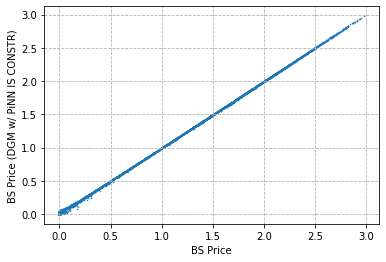

time: 258 ms (started: 2022-08-13 21:04:23 +00:00)


In [ ]:
net_cpu = trainEuss_PiNN_CONSTR_IS.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(test_sol).numpy(), torch.flatten(net_cpu(test_input)).detach().numpy(), s=.3)
plt.xlabel('BS Price')
plt.ylabel('BS Price (DGM w/ PiNN IS CONSTR)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(test_sol).numpy() -torch.flatten(net_cpu(test_input)).detach().numpy() )))

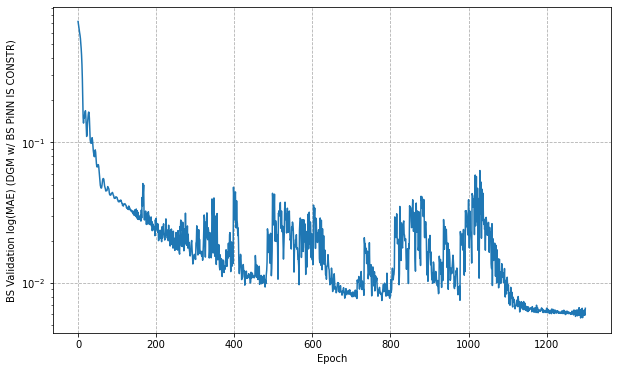

time: 495 ms (started: 2022-08-13 21:04:23 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_PiNN_CONSTR_IS.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('BS Validation log(MAE) (DGM w/ BS PiNN IS CONSTR)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

mod_name = "BS"
fit_name = "trainEuss_PiNN_CONSTR_IS"
val_mae_df = pd.DataFrame({ 'model' : mod_name, 'name': fit_name, 
                            'data' : trainEuss_PiNN_CONSTR_IS.vaildation_data_mae })
val_mae_df.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv", index=False)

## Basket Option Black Scholes 

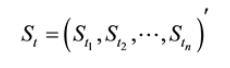

### Black Scholes Basket Option - Setup

### Levy Pricing of European Basket Option

[Levy pricing european basket options](https://github.com/nluciw/pricing_basket_options/blob/main/playground.ipynb)

In [ ]:
import numpy as np
import pandas as pd
import itertools
from scipy import stats

class BasketOption:
    '''Functions for a European basket call option.'''
    
    def __init__(self, weights, prices, vol, corr, strike, time, rate):
        '''           
        Parameters
        ----------
        weights : ndarray
            Floats representing weights of the underlying assets in the basket. 
            Should sum to 1, be 1-D, and be of length equal to the length of prices.
        prices : ndarray
            Floats representing the asset prices at time zero. Should be 1-D, and same
            length as prices.
        vol : float
            The volatility of the assets. N.B. the Levy formula assumes homogeneous asset
            volatility.
        corr : ndarray
            Correlation matrix of the assets. Should be of shape (n,n), where n is the
            number of assets.
        strike : float
            Strike price.
        time : float
            Time to maturity.
        rate : float
            Riskless interest rate.
        '''
        self.weights = weights
        self.prices = prices
        self.vol = vol
        self.corr = corr
        self.strike = strike
        self.time = time
        self.rate = rate
    
        if not len(weights) == len(prices) == len(corr):
            raise ValueError('Number of weights, prices, corr rows should be equal')
            
        if abs(1-sum(weights))>0.01:
            raise ValueError('The weights must cumulatively sum to 1.0')
            
    def get_levy_price(self):
        """
        Use the Levy formula to approximate the price of a European basket call option.
        """
    
        discount = np.exp(-self.rate*self.time)
    
        # First moment of T-forward prices (also the basket T-forward price)
        m1 = np.sum(self.weights * self.prices * discount)

        # Second moment of T-forward prices
        w_ij, f_ij = [list(map(lambda x: np.product(x), list(itertools.product(q, q)))) 
                          for q in [self.weights, self.prices * discount]]
        m2 = np.sum(np.array(w_ij) * np.array(f_ij)
                    * np.exp(self.corr.flatten() * self.vol**2 * self.time))
    
        vol_basket = ( self.time**(-1) * np.log(m2 / m1**2) )**(0.5)
    
        # Parameters of the price formula
        d1 = np.log(m1 / self.strike)/(vol_basket * self.time**(0.5))\
                + (vol_basket * self.time**(0.5))/2
        d2 = d1 - vol_basket * self.time**(0.5)

        # Levy formula for basket call option price
        self.levy_price = discount * (m1 * stats.norm.cdf(d1) - self.strike * stats.norm.cdf(d2))

        return self.levy_price

time: 4.22 ms (started: 2022-09-27 18:01:20 +00:00)


In [ ]:
# weights = np.array([0.25,0.25,0.25,0.25])
# prices = np.array([100.,100.,100.,100.])
# vol = 0.4
# corr = np.array([[1.,0.5,0.5,0.5],[0.5,1.,0.5,0.5],[0.5,0.5,1.,0.5],[0.5,0.5,0.5,1.]])
# strike = 100.
# time = 5
# rate = 0.
# # levy_formula(weights, prices, vol, corr, strike, time, rate)
# basket_option = BasketOption(weights, prices, vol, corr, strike, time, rate)
# basket_option.get_levy_price()

time: 454 µs (started: 2022-09-27 18:01:21 +00:00)


#### MutiStockEuropeanOptionNet

In [ ]:
class MultiStockEuropeanOptionNet(nn.Module):
    def __init__(self , nstocks, NL  , NN, activation = torch.tanh  ):
        super(MultiStockEuropeanOptionNet, self).__init__()
        self.NL = NL
        self.NN = NN
        #  time + Number of stocks
        # ( t , xi)
        self.Input = 1 + nstocks
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        # pdb.set_trace()
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 
    

time: 3.84 ms (started: 2022-09-27 18:01:21 +00:00)


### MultiStockEuropeanBlackScholesCall

In [ ]:
from torch.distributions.multivariate_normal import MultivariateNormal

class MultiStockEuropeanBlackScholesCall():
    
    def __init__(self , net, K = 1.0, RHO = 0.5, nstocks = 3):
        
        self.C = 0.0
        self.R = 0.05             # Interest Rate (Yearly)
        self.SIGMA = 0.25         # Volatility (Yearly)
        self.RHO = RHO            # Stock correlation
        self.K = K                # Strike Price & S_zeros
        self.T = 1.0              # Maturation time (in YEAR)
        self.MAX_X = self.K*3.0   # MAX price
        self.prices = torch.tensor([K]).repeat(nstocks)
        self.nstocks = nstocks
        
        ## for accept reject purpose!
        ## free boundry problems
        self.net = net
        # these are the weights on the prices
        # self.weights = None
        # the settings for KL approx
        self.gamma = 1E-4
        self.beta = 1E-4

        self.cov_matrix = self._get_cov_matrix(nstocks,RHO)  
        self.corr_mvn = MultivariateNormal( loc=torch.tensor([0.0]).repeat(nstocks), 
                                            covariance_matrix=self.cov_matrix )  # assuming std_devs of 1

        self.norm_dist = torch.distributions.normal.Normal(loc = torch.tensor([0.0]), scale=torch.tensor([1.0]))

    def _get_cov_matrix(self,nstocks,RHO):
        cov_matrix = np.ones((nstocks, nstocks))*RHO
        np.fill_diagonal(cov_matrix, 1.0)
        return torch.tensor(cov_matrix, dtype=torch.float)

    def get_levy_price(self, supplied = None):
        """
        Use the Levy formula to approximate the price of a European basket call option.
        """    

        weights_used = torch.tensor([1.0/self.nstocks]).repeat(self.nstocks).numpy()

        if supplied is None:
          prices_used = self.prices.numpy()
          vol_used = self.SIGMA
          corr = self.cov_matrix.numpy()
          strike = self.K
          rate = self.R
          time = self.T
          # pdb.set_trace()
          basket_option = BasketOption(weights_used, prices_used, vol_used, corr, strike, time, rate)
          return basket_option.get_levy_price()
        else:
          basket_option_prices = []
          # pdb.set_trace()
          for i in range(supplied.shape[0]):
            prices_used = supplied[i,1:(1+self.nstocks)].numpy()
            vol_used = self.SIGMA
            corr = self.cov_matrix.numpy()
            strike = self.K
            rate = self.R
            time = supplied[i,0].item()
            # pdb.set_trace()
            basket_option = BasketOption(weights_used, prices_used, vol_used, corr, strike, time, rate)
            basket_option_prices.append(basket_option.get_levy_price())
          return basket_option_prices

    def g(self , x):
        # pay off function
        # return torch.max( (x[:,1].reshape(-1,1)*x[:,2].reshape(-1,1)*x[:,3].reshape(-1,1))**(1/3) - 
        #                    self.K , 
        #                    torch.zeros([len(x),1]).cuda() ) #  geometric
        return torch.max( torch.sum(x[:,1:(self.nstocks+1)],dim=1)/self.nstocks  - self.K , 
                          torch.zeros([x.shape[0],]).cuda() ).reshape(-1,1) 

    def mu(self, x):
        ## should test it! output dimension is important !
        return (self.R-self.C)*x.reshape(-1,1)

    def sigma(self , x):
        return self.SIGMA*x.reshape(-1,1)

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def sample_correlated_uniform(self, sample_shape):
        # corrMvn.rsample(sample_shape=(10,))
        correlated_mvn_sample = self.corr_mvn.sample(sample_shape)
        return self.norm_dist.cdf(correlated_mvn_sample)

    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        # 4 samples returned:
        # internal, boundary, initial, terminal
        if sample_method_X in ["U","UE3"]:
            # pdb.set_trace()
            range_multiplier = 3.0 if sample_method_X == "UE3" else 1.0
            # internal samples
            x_time_sample = torch.rand((int(size),int(1)))*self.T
            x = self.to_device(torch.cat(( x_time_sample, 
                                          -self.MAX_X*range_multiplier*self.sample_correlated_uniform([size,])+self.MAX_X*range_multiplier), dim=1),to_cpu)
            ### Terminal time samples
            x_terminal = self.to_device(torch.cat( ( torch.zeros(size, 1) + self.T , 
                                                    -self.MAX_X*range_multiplier*self.sample_correlated_uniform([size, ])+self.MAX_X*range_multiplier ) , dim = 1 ),to_cpu)
            ### initial time samples
            x_initial = self.to_device(torch.cat( ( torch.zeros(size, 1), self.K*torch.ones( size, self.nstocks)) , dim = 1 ),to_cpu)
            ### non-zero
            stock_space = self.K*0.8*self.sample_correlated_uniform([size, ]) # if self.is_call else self.K*(1.2 + torch.rand([size, self.nstocks]))
            # pdb.set_trace()
            x_nonzero = self.to_device(torch.cat( ( torch.rand((size,1))*self.T, stock_space ) , dim = 1 ),to_cpu)
            compare = self.net(x_nonzero) 
            mask = compare < 0
            x_nonzero = x_nonzero[mask.reshape(-1),:]
            # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
            return x , x_terminal , x_initial, x_nonzero
    
        raise ValueError(f"{sample_method_X} is not a supported sampling method")

    def criterion(self , x , x_terminal , x_boundary, loss_transform = None):
        '''
        Loss function that helps network find solution to equation
        '''        
        d = torch.autograd.grad(
            self.net(x),
            x, 
            grad_outputs = torch.ones_like(self.net(x)) ,
            create_graph = True)
        
        dt  = d[0][:,0].reshape(-1,1)

        # dx1  = d[0][:,1].reshape(-1,1)
        # dx2  = d[0][:,2].reshape(-1,1)
        # dx3  = d[0][:,3].reshape(-1,1)
        
        first_derivs_wrt_underlying  = [ d[0][:,i+1].reshape(-1,1) for i in range(self.nstocks) ]
        cross_derivatives_wrt_underlying = [ [ torch.autograd.grad(first_derivs_wrt_underlying[i], 
                                                                   x , 
                                                                   grad_outputs=torch.ones_like(first_derivs_wrt_underlying[i]) ,
                                                                   create_graph = True)[0][:,z+1].reshape(-1,1)
                                               for z in range(len(first_derivs_wrt_underlying)) ]  for i in range(len(first_derivs_wrt_underlying)) ]

        # second_derivs_wrt_underlying = [ torch.autograd.grad(first_derivs_wrt_underlying[i], 
        #                                                      x, 
        #                                                      grad_outputs=torch.ones_like(first_derivs_wrt_underlying[i]) ,
        #                                                      create_graph = True)[0][:,i+1].reshape(-1,1)
        #                                  for i in range(len(first_derivs_wrt_underlying)) ]

        # cross_derivatives_wrt_underlying = [ [ torch.autograd.grad(first_derivs_wrt_underlying[i], 
        #                                                            x , 
        #                                                            grad_outputs=torch.ones_like(first_derivs_wrt_underlying[i]) ,
        #                                                            create_graph = True)[0][:,z+1].reshape(-1,1)
        #                                        for z in [ k for k in range(len(first_derivs_wrt_underlying)) if k!=i  ] ]  for i in range(len(first_derivs_wrt_underlying)) ]
        # du/dxdx
        # dx1x1 = torch.autograd.grad(dx1, 
        #                             x , 
        #                             grad_outputs=torch.ones_like(dx1),
        #                             create_graph = True)[0][:,1].reshape(-1,1)
        # dx1x2 = torch.autograd.grad(dx1, x , 
        #                             grad_outputs=torch.ones_like(dx1) ,
        #                           create_graph = True)[0][:,2].reshape(-1,1)
        # dx1x3 = torch.autograd.grad(dx1, x , 
        #                             grad_outputs=torch.ones_like(dx1) ,
        #                           create_graph = True)[0][:,3].reshape(-1,1)            
        # dx2x1 = torch.autograd.grad(dx2, x , grad_outputs=torch.ones_like(dx2) ,\
        #                           create_graph = True)[0][:,1].reshape(-1,1)
        # dx2x2 = torch.autograd.grad(dx2, x , grad_outputs=torch.ones_like(dx2) ,\
        #                           create_graph = True)[0][:,2].reshape(-1,1)
        # dx2x3 = torch.autograd.grad(dx2, x , grad_outputs=torch.ones_like(dx2) ,\
        #                           create_graph = True)[0][:,3].reshape(-1,1)
        # dx3x1 = torch.autograd.grad(dx3, x , grad_outputs=torch.ones_like(dx3) ,\
        #                           create_graph = True)[0][:,1].reshape(-1,1)
        # dx3x2 = torch.autograd.grad(dx3, x , grad_outputs=torch.ones_like(dx3) ,\
        #                           create_graph = True)[0][:,2].reshape(-1,1)
        # dx3x3 = torch.autograd.grad(dx3, x , grad_outputs=torch.ones_like(dx3) ,\
        #                           create_graph = True)[0][:,3].reshape(-1,1)
        
        if loss_transform is None:
          loss_transform = torch.square

        DO = None
        TC = None
        BC = None

        if len(x) == 0:
          # print('zero batch size for domain!')
          DO = torch.tensor(0).cuda().float()
        else:
          # x is above the free boundary ( so immediate pay-off is positive )
          # above_boundary = dt + self.mu(x[:,1])*( dx1 ) + self.mu(x[:,2])*( dx2 ) + self.mu(x[:,3])*( dx3 ) + \
          #                         0.5*(  (self.sigma(x[:,1])*self.sigma(x[:,1]))*dx1x1  \
          #                     + self.RU*(self.sigma(x[:,1])*self.sigma(x[:,2]))*dx1x2  \
          #                     + self.RU*(self.sigma(x[:,1])*self.sigma(x[:,3]))*dx1x3  \
          #                     + self.RU*(self.sigma(x[:,2])*self.sigma(x[:,1]))*dx2x1  \
          #                     + (self.sigma(x[:,2])*self.sigma(x[:,2]))*dx2x2  \
          #                     + self.RU*(self.sigma(x[:,2])*self.sigma(x[:,3]))*dx2x3  \
          #                     + self.RU*(self.sigma(x[:,3])*self.sigma(x[:,1]))*dx3x1  \
          #                     + self.RU*(self.sigma(x[:,3])*self.sigma(x[:,2]))*dx3x2  \
          #                     + (self.sigma(x[:,3])*self.sigma(x[:,3]))*dx3x3 ) - self.R*self.net(x)

          above_xs_first_derivs = torch.zeros([x.shape[0],self.nstocks]).cuda().float()          
          for i in range(len(first_derivs_wrt_underlying)):
            above_xs_first_derivs[:,i] =  (self.mu(x[:,i+1])*first_derivs_wrt_underlying[i]).reshape(1,-1)
          above_xs_first_derivs = torch.sum(above_xs_first_derivs, dim=1)
          
          above_xs_second_derivs = torch.zeros((x.shape[0],self.nstocks,self.nstocks)).cuda().float()
          for i in range(len(first_derivs_wrt_underlying)):
            for j in range(len(first_derivs_wrt_underlying)):
                if i<=j:
                  above_xs_second_derivs[:,i,j] = (0.5*self.cov_matrix[i,j]*self.sigma(x[:,i+1])*self.sigma(x[:,j+1])*cross_derivatives_wrt_underlying[i][j]).reshape(1,-1)          
          above_xs_second_derivs = torch.einsum("ijk->i", above_xs_second_derivs)

          above_boundary = dt.reshape(-1) + above_xs_first_derivs + above_xs_second_derivs - self.R*self.net(x).reshape(-1)
          DO = loss_transform(above_boundary).reshape(-1,1)
          # 4.1 in paper - note self.net(x) for u(x,t), difference supposed to be zero
          # Domain 
          #DO = (dt + 0.5*self.RU*(self.SIGMA**2)*(x[:,1].reshape(-1,1)**2)*dxx - self.R*self.net(x) + (self.R-self.C)*x[:,1].reshape(-1,1)*dx)**2

        # pdb.set_trace()
        # Terminal Condition - should be equal (both in- and out of the money)
        TC = loss_transform( self.g(x_terminal) - self.net(x_terminal) )

        # Boundry Condition - below the payoff value, it should still be worth something for optionality
        # len() is safe here , because it just shows batch number 
        if( len(x_boundary) != 0):
            BC = loss_transform( torch.max( self.g(x_boundary) - self.net(x_boundary), torch.zeros([len(x_boundary),1]).cuda() ) )
        else:
            # print('zero batch size for outside domain!')
            BC = torch.tensor(0).cuda().float()
        
        return  DO , TC , BC

    def calculateLoss(self , batch_x, train = True, loss_transform = None, keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        x , x_terminal , x_boundary, x_nonzero = batch_x  #ignore nonzero for now
        x = Variable( x , requires_grad=True )
        Ls = self.criterion( x , x_terminal , x_boundary, loss_transform = loss_transform )
        DO , TC , BC = Ls

        numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
        # DOm = torch.mean(DO).detach().cpu().float().item()
        # TCm = torch.mean(TC).detach().cpu().float().item()
        # BCm = torch.mean(BC).detach().cpu().float().item()

        if not keep_batch:
          loss_equalWeightedByType = (1./numActive*torch.mean(DO) + 1./numActive*torch.mean(TC) + 1./numActive*torch.mean(BC))
          return  loss_equalWeightedByType , 1./numActive*torch.mean(DO) , 1./numActive*torch.mean(TC) , 1./numActive*torch.mean(BC) , loss_equalWeightedByType             
        else:
          return DO.numpy(), TC.numpy(), BC.numpy(), DO.numpy(), TC.numpy(), BC.numpy()

    def calculateLossUsingKLMinMax(self , batch_x , train = True, loss_transform = None):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        x , x_terminal , x_boundary = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , x_boundary, loss_transform = loss_transform)
        DO , TC , BC = Ls
        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(DO.device)/len(Ls)
        
        DOt = self.weights[0,0] * torch.pow(1.0/size * torch.sum( torch.exp(self.beta * DO)), self.gamma/self.beta) 
        TCt = self.weights[0,1] * torch.pow(1.0/size * torch.sum( torch.exp(self.beta * TC)), self.gamma/self.beta) 
        BCt = self.weights[0,2] * torch.pow(1.0/size * torch.sum( torch.exp(self.beta * BC)), self.gamma/self.beta) 

        # print([DOt, TCt, BCt, torch.log(DOt + TCt + BCt), 1.0/self.gamma * torch.log(DOt + TCt + BCt)])

        numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
        transformed_loss = 1.0/self.gamma * torch.log(DOt + TCt + BCt)
        loss_equalWeightedByType = (1./numActive*torch.mean(DO) + 1./numActive*torch.mean(TC) + 1./numActive*torch.mean(BC))
        return   transformed_loss, 1./numActive*torch.mean(DO) , 1./numActive*torch.mean(TC) , 1./numActive*torch.mean(BC) , loss_equalWeightedByType

    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample
    

time: 17.7 ms (started: 2022-09-27 18:01:23 +00:00)


In [ ]:
# loss_terms = [ 34.25, 100.12, 23.45]
# target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*loss_terms

time: 304 µs (started: 2022-09-27 18:01:23 +00:00)


### TrainMultiStockEuropeanBlackScholesCall

In [ ]:
class TrainMultiStockEuropeanBlackScholesCall():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        self.history_mean_hooks = [] 
        self.history_surfaces_hooks = None       
        self.history_tl = []
        self.history_internal = []
        self.history_terminal = []
        self.history_initial = []              
        self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.monitored_loss_type = "Train_L2"
        self.early_stop_counter = 0

        self.stop_epoch = 0

        self.validation_sample = None
        self.validation_losses = None
        self.train_losses = None        
        

    def train(self , epoch , lr, eqLossFn = 'calculateLoss', sample_method_X = "U", key_loss_func = torch.square, huber_delta = 0.5):
        
        self.validation_losses = np.ones((epoch, 4), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 4 ), dtype='float32') * np.nan

        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            # pdb.set_trace()
            sample_batch = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)

            losses_L2  = loss_calc_method( sample_batch, loss_transform = torch.square, keep_batch = False )
            # pdb.set_trace()
            loss , internal , terminal , initial, losses_equalWeightedByType = losses_L2
            # loss_abs , internal_abs , terminal_abs , initial_abs, nonzero_abs, losses_equalWeightedByType_abs = losses_ABS
            max_loss_L2 = torch.max(torch.tensor([internal , terminal , initial ]))

            self.train_losses[e,:] = [ to_cpu_detach(loss) , to_cpu_detach(internal) , to_cpu_detach(terminal) , to_cpu_detach(initial) ]

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation = loss_calc_method( self.validation_sample,
                                                      loss_transform = torch.square,
                                                      keep_batch = False )
              # pdb.set_trace()
              # , torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
              validation_loss_list = [x.item() for x in losses_L2_validation]
              validation_loss_list = validation_loss_list[0:(len(validation_loss_list)-1)]
              self.validation_losses[e,:] = validation_loss_list
            
            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2

              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break
            
            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:

                loss_avg = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, max_loss_L2 ))

                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!

                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                self.history_initial.append( initial )
                
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()
                    xinitial_res = self.model.net(xinitial).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    df_initial = self.create_result_df(e, xinitial, xinitial_res, "INITIAL")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal, df_initial],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal, df_initial],axis=0) ], axis=0)
                    # pdb.set_trace()

        self.stop_epoch = e

    def train_stratified(self , epoch , lr, 
                         eqLossFn = 'calculateLoss', 
                         sample_method_X = "U", 
                         key_loss_func = torch.square, 
                         huber_delta = 0.5
                         ):
        
        self.validation_losses = np.ones((epoch, 4), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 4), dtype='float32') * np.nan

        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            internal_xts_bts, terminal_xts_bts, initial_xts_bts, nonzero_xts_bts = self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            validation_stratum_losses = None #np.array([])#.reshape(1,self.validation_losses.shape[1])
            training_stratum_losses = None # np.array([])#.reshape(1,self.train_losses.shape[1])  
            training_value_to_optimize = torch.tensor(0.0,requires_grad=True)           
            
            # pdb.set_trace()
            for stratum_count in range(len(internal_xts_bts)):              
              sample_batch = (internal_xts_bts[stratum_count], 
                              terminal_xts_bts[stratum_count], 
                              initial_xts_bts[stratum_count], 
                              nonzero_xts_bts[stratum_count])  

              stratum_losses_L2, stratum_losses_ABS = loss_calc_method( sample_batch, loss_transforms = [ key_loss_func, torch.abs ], keep_batch = False )
              if np.isnan(stratum_losses_L2[0].detach().cpu().item()):
                # pdb.set_trace()
                pass
            
              if training_stratum_losses is not None:
                training_stratum_losses = torch.vstack([training_stratum_losses, torch.tensor([*to_cpu_detach(stratum_losses_L2), *to_cpu_detach(stratum_losses_ABS)]) ]) 
              else:
                training_stratum_losses = torch.tensor([*stratum_losses_L2, *stratum_losses_ABS], requires_grad=False) 

              # pdb.set_trace()  
              training_value_to_optimize = training_value_to_optimize + stratum_losses_L2[0]

            # pdb.set_trace()              
            training_loss_for_epoch = torch.sum(training_stratum_losses,0)
            loss = training_value_to_optimize

            loss_optimized , internal , terminal , initial, nonzero, losses_equalWeightedByType, \
            loss_abs , internal_abs , terminal_abs , initial_abs, nonzero_abs, losses_equalWeightedByType_abs = training_loss_for_epoch            
            max_loss_L2 = torch.max(torch.tensor([internal , terminal , initial, nonzero]))

            self.train_losses[e,:] = training_loss_for_epoch.detach().numpy()

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = \
                loss_calc_method( self.validation_sample, 
                                  loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                  keep_batch = False )
              validation_loss = [*to_cpu_detach(losses_L2_validation),
                                              *to_cpu_detach(losses_ABS_validation),
                                              *to_cpu_detach(losses_Huber_valiation)]
              validation_loss = validation_loss.pop(5) # the L2 loss is duplicated at index 1                
              self.validation_losses[e,:] = validation_loss

            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2
              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break

            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss_avg = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!
                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                self.history_initial.append( initial )
                self.history_nonzero.append( nonzero )
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()
                    xinitial_res = self.model.net(xinitial).detach()
                    xnonzero_res = self.model.net(xnonzero).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    df_initial = self.create_result_df(e, xinitial, xinitial_res, "INITIAL")
                    df_nonzero = self.create_result_df(e, xnonzero, xnonzero_res, "NONZERO")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal, df_initial, df_nonzero],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal, df_initial,df_nonzero],axis=0) ], axis=0)

        self.stop_epoch = e


    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      # df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
      colnames =["Time"]
      colnames.extend([f"S{x+1}" for x in range(self.model.nstocks)])
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = colnames)
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample



time: 17.1 ms (started: 2022-09-27 18:01:23 +00:00)


### Test Case MultiStockEuropeanBlackScholesCall

In [ ]:
# from pprint import pprint as pp
# a=torch.tensor([[[1,2,3],[1,2,3],[1,2,3]],[[1,2,3],[1,2,3],[1,2,3]]])
# pp(a.shape)
# torch.einsum("ijk->i", a)

time: 740 µs (started: 2022-08-10 14:56:37 +00:00)


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

net = MultiStockEuropeanOptionNet( nstocks = 2, NL = 8 , NN = 100 )
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
msequation = MultiStockEuropeanBlackScholesCall(net, nstocks = 2)
train = TrainMultiStockEuropeanBlackScholesCall(net, msequation, BATCH_SIZE = 2**7, debug = True)

train.hook_interval = 500
train.use_early_stop = True
train.early_stop_patience = 2000
train.validation_sample = msequation.sample(sample_method_X="U", size=2**7)

train.train(epoch =10500 , lr = 0.0001, eqLossFn= 'calculateLoss')

Epoch 0 - lr 0.0001 -  key loss: 0.3885937035083771 - eqWeighted loss: 0.3885937035083771 - Max Loss 0.35655397176742554
Epoch 499 - lr 0.0001 -  key loss: 0.0004861098132096231 - eqWeighted loss: 0.0004861098132096231 - Max Loss 0.0004120154771953821
Epoch 999 - lr 0.0001 -  key loss: 0.0002539537090342492 - eqWeighted loss: 0.0002539537090342492 - Max Loss 0.0002256702573504299
Epoch 1499 - lr 0.0001 -  key loss: 0.00016066385433077812 - eqWeighted loss: 0.00016066385433077812 - Max Loss 0.00014291970001067966
Epoch 1999 - lr 0.0001 -  key loss: 0.00010325938637834042 - eqWeighted loss: 0.00010325938637834042 - Max Loss 8.193527901312336e-05
Epoch 2499 - lr 0.0001 -  key loss: 8.136866381391883e-05 - eqWeighted loss: 8.136866381391883e-05 - Max Loss 5.80017440370284e-05
Epoch 2999 - lr 0.0001 -  key loss: 4.570171586237848e-05 - eqWeighted loss: 4.570171586237848e-05 - Max Loss 3.131418634438887e-05
Epoch 3499 - lr 0.0001 -  key loss: 7.13909903424792e-05 - eqWeighted loss: 7.1390990

In [ ]:
train.validation_sample[0].shape

torch.Size([128, 3])

time: 2.89 ms (started: 2022-09-27 18:10:11 +00:00)


0.05902136329115263


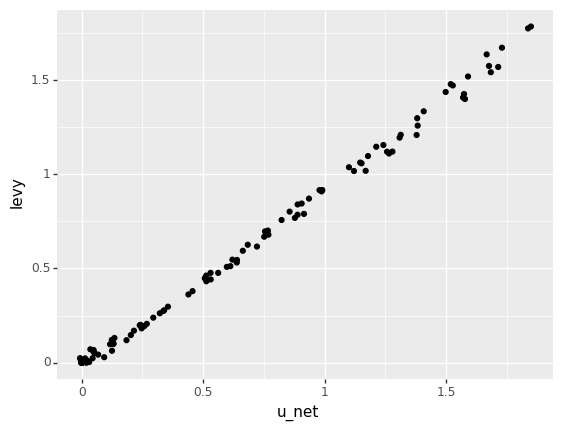

<ggplot: (8728660095469)>

time: 328 ms (started: 2022-09-27 18:16:15 +00:00)


In [ ]:
from pprint import pprint as pp

pp(train.model.get_levy_price())

validation_levy_prices = train.model.get_levy_price(train.validation_sample[0].cpu().detach()) # because only the interior
validation_net_prices = train.model.net(train.validation_sample[0]).reshape(-1).cpu().detach().numpy().tolist()

# u_internal_sample = torch.cat((internal_sample, mequation.pi_net(internal_sample).reshape(-1,1)), dim=1)
# u_net_results = u_net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
# htx_results = Htx(u_internal_sample).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': validation_net_prices, 
                         'levy': validation_levy_prices } )
ggplot(dataf2, aes(x='u_net', y='levy')) + geom_point()

In [ ]:
validation_input_t = pd.DataFrame(train.validation_sample[0].cpu().detach().numpy()).rename(columns={ 0 : 'T', 1 : 'S1', 2 :'S2'})
pp(validation_input_t.head(4))
# type(train.validation_sample[0])

          T        S1        S2
0  0.079037  2.704603  0.565598
1  0.761931  0.012860  0.009285
2  0.023245  1.315840  2.371681
3  0.421977  0.524833  1.112848
time: 6.84 ms (started: 2022-09-27 18:16:19 +00:00)


In [ ]:
df_comp_2 = pd.concat([validation_input_t, dataf2], axis=1)

time: 1.28 ms (started: 2022-09-27 18:16:19 +00:00)


In [ ]:
df_comp_2.head(6)

T        S1        S2     u_net           levy
0  0.079037  2.704603  0.565598  0.683406   6.261722e-01
1  0.761931  0.012860  0.009285  0.001034  1.110513e-129
2  0.023245  1.315840  2.371681  0.888636   8.406414e-01
3  0.421977  0.524833  1.112848  0.007680   3.380727e-03
4  0.501743  2.279033  1.913338  1.120559   1.018381e+00
5  0.179922  0.626987  0.728592 -0.000367   1.186371e-07

time: 10.3 ms (started: 2022-09-27 18:16:20 +00:00)


#### Create PiNN, validation and test set for MultiStock

In [ ]:
def mc_basket_option_price_simple(input, sigma, r, K, n_steps = 100, n_stocks = 2, rho = 0.0):
        # self.C = 0.0
        # self.R = 0.05             # Interest Rate (Yearly)
        # self.SIGMA = 0.25         # Volatility (Yearly)
        # self.RHO = RHO            # Stock correlation
        # self.K = K                # Strike Price & S_zeros
        # self.T = 1.0              # Maturation time (in YEAR)
        # self.MAX_X = self.K*3.0   # MAX price
        # self.prices = torch.tensor([K]).repeat(nstocks)
        # self.nstocks = nstocks
    Zs = torch.normal(mean=torch.zeros([n_steps,1]), std=torch.ones([n_steps,1])).to(input.device)
    Eps = torch.normal(mean=torch.zeros([n_stocks,n_steps]), std=torch.ones([n_stocks,n_steps])).to(input.device)

    initial_S = input[:,1:(1+n_stocks)].to(input.device)  
    sigma_S = sigma*torch.ones_like(input[:,-1]).to(input.device)
    r = r*torch.ones_like(input[:,-1]).to(input.device)
    T = input[:,0].to(input.device)  
    K = K*torch.ones_like(input[:,-1]).to(input.device)

    outcomes_of_all_paths = [input.shape[0], n_stocks, n_steps]
    rhof1 = np.sqrt(rho)
    rhof2 = np.sqrt(1.0-rho)
    zeros_for_payoff = torch.zeros([input.shape[0]]).to(input.device)
    
    simulated_terminal_S = torch.zeros(outcomes_of_all_paths).to(input.device)
    simulated_payoffs = torch.zeros([input.shape[0], n_steps]).to(input.device)

    for i in range(n_steps):
      a1 = ((r - 0.5*torch.square(sigma_S))*T)[:, None]
      a2 = (sigma_S*torch.sqrt(T)).reshape(-1,1)*(Zs[i,0].item()*rhof1 + rhof2*Eps[:,i])
      simulated_terminal_S[:,:,i] = initial_S*torch.exp( a1 + a2 )
      simulated_payoffs[:,i] = torch.max( (1./n_stocks)*torch.sum(simulated_terminal_S[:,:,i],dim=1)-K, zeros_for_payoff )
      
    # pdb.set_trace()
    prices = (1.0/n_steps)*torch.sum(simulated_payoffs, dim=1).to(input.device)
    return prices


time: 5.19 ms (started: 2022-09-27 18:16:22 +00:00)


In [ ]:
# df_comp_2.shape

pp(train.validation_sample[0][0:3,:])
pp(df_comp_2.head(3))

tensor([[0.0790, 2.7046, 0.5656],
        [0.7619, 0.0129, 0.0093],
        [0.0232, 1.3158, 2.3717]], device='cuda:0')
          T        S1        S2     u_net           levy
0  0.079037  2.704603  0.565598  0.683406   6.261722e-01
1  0.761931  0.012860  0.009285  0.001034  1.110513e-129
2  0.023245  1.315840  2.371681  0.888636   8.406414e-01
time: 22.7 ms (started: 2022-09-27 18:16:22 +00:00)


In [ ]:
pxs = mc_basket_option_price_simple(train.validation_sample[0], msequation.SIGMA, msequation.R, msequation.K, rho=msequation.RHO, n_steps = 50000, n_stocks = 2 )



time: 13.9 s (started: 2022-09-27 18:16:24 +00:00)


In [ ]:
df_comp_2["MC"] = pxs.cpu()

time: 1.51 ms (started: 2022-09-27 18:16:38 +00:00)


In [ ]:
df_comp_2.head(10)

T        S1        S2     u_net           levy        MC
0  0.079037  2.704603  0.565598  0.683406   6.261722e-01  0.641871
1  0.761931  0.012860  0.009285  0.001034  1.110513e-129  0.000000
2  0.023245  1.315840  2.371681  0.888636   8.406414e-01  0.846115
3  0.421977  0.524833  1.112848  0.007680   3.380727e-03  0.006719
4  0.501743  2.279033  1.913338  1.120559   1.018381e+00  1.150585
5  0.179922  0.626987  0.728592 -0.000367   1.186371e-07  0.000000
6  0.990802  1.629130  0.402874  0.035467   7.027566e-02  0.132351
7  0.461673  0.887420  1.699049  0.321416   2.618461e-01  0.326103
8  0.234519  0.750814  0.926309  0.018086   1.391875e-03  0.002411
9  0.306481  0.782930  0.082631 -0.001023   7.257877e-13  0.000000

time: 10.2 ms (started: 2022-09-27 18:16:38 +00:00)


In [ ]:
df_comp_2["u_net_AE"] = np.abs(df_comp_2["u_net"]-df_comp_2["MC"])
df_comp_2["levy_AE"] = np.abs(df_comp_2["levy"]-df_comp_2["MC"])

time: 2.56 ms (started: 2022-09-27 18:16:38 +00:00)


In [ ]:
pp((df_comp_2["u_net_AE"].mean(),df_comp_2["levy_AE"].mean()))

(0.030803873448384422, 0.06562595262635718)
time: 1.37 ms (started: 2022-09-27 18:16:38 +00:00)


In [ ]:
mod_name = "BasketOption"
fit_name = "train_BASIC"
df_comp_2.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv")

time: 11 ms (started: 2022-09-27 18:16:38 +00:00)


In [ ]:
df_comp_2["DGM_outperforms"] = df_comp_2["levy_AE"] > df_comp_2["u_net_AE"] 

time: 1.2 ms (started: 2022-09-27 18:16:38 +00:00)


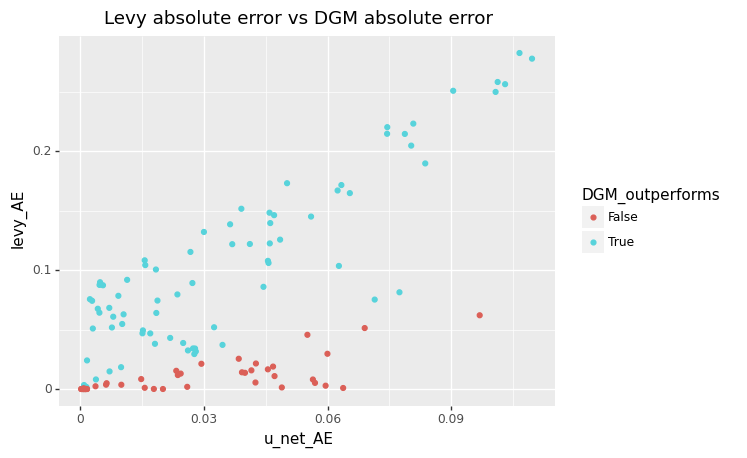

<ggplot: (8728665883681)>

time: 291 ms (started: 2022-09-27 18:27:14 +00:00)


In [ ]:
ggplot(df_comp_2, aes(x='u_net_AE', y='levy_AE', color='DGM_outperforms',fill='DGM_outperforms')) + geom_point() + ggtitle('Levy absolute error vs DGM absolute error')

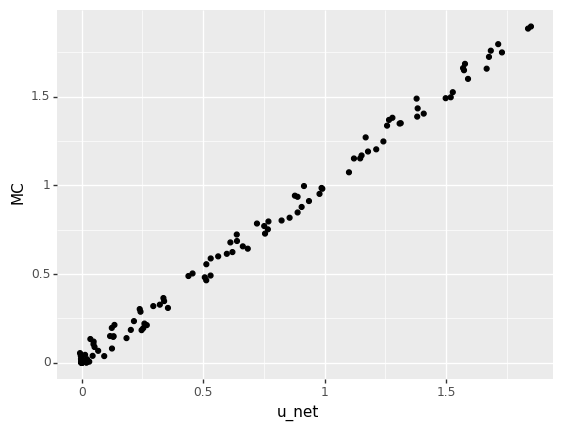

<ggplot: (8728648786209)>

time: 229 ms (started: 2022-09-27 18:33:39 +00:00)


In [ ]:
ggplot(df_comp_2, aes(x='u_net', y='MC')) + geom_point()
# pp(df_comp_2.shape)

In [ ]:
# seed = 1234
# torch.manual_seed(seed)
# torch.cuda.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)
# np.random.seed(seed)
# random.seed(seed)
# torch.backends.cudnn.benchmark = False
# torch.backends.cudnn.deterministic = True

# msbs_sample_creator = MultiStockEuropeanBlackScholesCall(None, K=1.0, RHO=0.75, nstocks=2)

# supervised_data = dict()
# supervised_data['msbs_input'] = msbs_sample_creator.sample(size = 2**12)[0]
# supervised_data['msbs_analytical_sol'] = mc_basket_option_price(supervised_data['msbs_input'], n_steps=20000, n_stocks=2, rho = 0.75)
# supervised_data['msbs_analytical_sol'].cuda()
# supervised_data['msbs_input'].cuda()

# validation_data = dict()
# validation_data['msbs_input'] = msbs_sample_creator.sample(size = 2**12)[0]
# validation_data['msbs_analytical_sol'] = mc_basket_option_price(validation_data['msbs_input'], n_steps=20000, n_stocks=2, rho = 0.75)
# validation_data['msbs_analytical_sol'].cuda()
# validation_data['msbs_input'].cuda()

# test_data = dict()
# test_data['msbs_input'] = msbs_sample_creator.sample(size = 2**12)[0]
# test_data['msbs_analytical_sol'] = mc_basket_option_price(test_data['msbs_input'], n_steps=20000, n_stocks=2, rho = 0.75)
# test_data['msbs_analytical_sol'].cuda()
# test_data['msbs_input'].cuda()

# pp(supervised_data['msbs_input'].shape)
# pp(validation_data['msbs_input'].shape)
# pp(test_data['msbs_input'].shape)


torch.Size([4096, 7])
torch.Size([4096, 7])
torch.Size([4096, 7])
time: 30.6 s (started: 2022-08-14 15:00:11 +00:00)


In [ ]:
# test_sol = test_data['msbs_analytical_sol'].cpu()
# validation_sol = validation_data['msbs_analytical_sol'].cpu()
# supervised_sol = supervised_data['msbs_analytical_sol'].cpu()

# test_input = test_data['msbs_input'].cpu()
# validation_input = validation_data['msbs_input'].cpu()
# supervised_input = supervised_data['msbs_input'].cpu()


time: 9.36 ms (started: 2022-08-14 15:05:11 +00:00)


In [ ]:
# torch.normal(mean=torch.zeros([2,2]), std=torch.ones([2,2]))
# torch.zeros([4,1])
# torch.ones([4,1])
# test_input = msequation.sample(size=10) # .to(torch.device("cuda:0"))

time: 1.02 ms (started: 2022-08-14 14:58:11 +00:00)


In [ ]:
# np.set_printoptions(suppress=True)
# torch.round(test_input[0],decimals=3).cpu().numpy()

time: 690 µs (started: 2022-08-14 14:58:11 +00:00)


In [ ]:
# pp(list(test_input[0].shape))
# # pp(test_input[1].shape)n
# np.set_printoptions(suppress=True)
# pp(np.round(test_input[0].cpu().numpy(),3)) # 0 is the internal, 1 is the terminal
# test_input[0].cpu()[:,-3]
# # np.sqrt(4.5)n

# torch.max( torch.rand([10,2]), torch.ones([10,2])*0.5)
# mc_basket_option_price(test_input[0], rho = 0.5)

time: 1.37 ms (started: 2022-08-14 14:58:11 +00:00)


In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True


nunderlying = 5
net = MultiStockEuropeanOptionNet( nstocks = nunderlying, NL = 5 , NN = 100 )
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
msequation = MultiStockEuropeanBlackScholesCall(net, nstocks = nunderlying)
train = TrainMultiStockEuropeanBlackScholesCall(net, msequation, BATCH_SIZE = 2**7, debug = True)

train.hook_interval = 500
train.use_early_stop = True
train.early_stop_patience = 2500
train.validation_sample = msequation.sample(sample_method_X="U", size=2**7)

train.train( epoch =30000 , lr = 0.0001, eqLossFn= 'calculateLoss')

Epoch 0 - lr 0.0001 -  key loss: 0.2606489956378937 - eqWeighted loss: 0.2606489956378937 - Max Loss 0.25983452796936035
Epoch 499 - lr 0.0001 -  key loss: 0.0008281435584649444 - eqWeighted loss: 0.0008281435584649444 - Max Loss 0.0006048369687050581
Epoch 999 - lr 0.0001 -  key loss: 0.0003517964214552194 - eqWeighted loss: 0.0003517964214552194 - Max Loss 0.0002896429505199194
Epoch 1499 - lr 0.0001 -  key loss: 0.00029672030359506607 - eqWeighted loss: 0.00029672030359506607 - Max Loss 0.0002629828522913158
Epoch 1999 - lr 0.0001 -  key loss: 0.0002516436798032373 - eqWeighted loss: 0.0002516436798032373 - Max Loss 0.00022733605874236673
Epoch 2499 - lr 0.0001 -  key loss: 0.00018396624363958836 - eqWeighted loss: 0.00018396624363958836 - Max Loss 0.00015689077554270625
Epoch 2999 - lr 0.0001 -  key loss: 0.00021041040599811822 - eqWeighted loss: 0.00021041040599811822 - Max Loss 0.00018479421851225197
Epoch 3499 - lr 0.0001 -  key loss: 0.00012753262126352638 - eqWeighted loss: 0.

0.05902136329115263


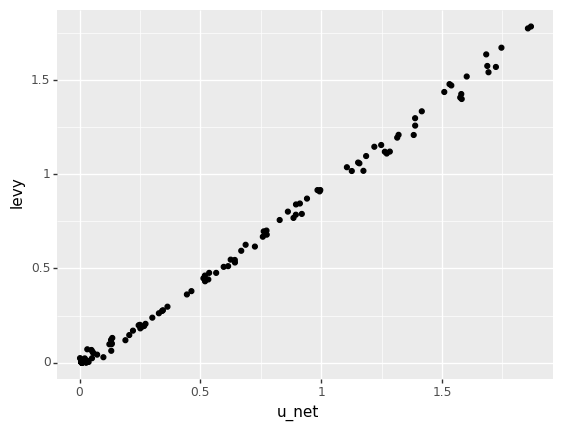

<ggplot: (8777606078453)>

time: 434 ms (started: 2022-08-14 17:29:13 +00:00)


In [ ]:
from pprint import pprint as pp

pp(train.model.get_levy_price())

validation_levy_prices = train.model.get_levy_price(train.validation_sample[0].cpu().detach()) # because only the interior
validation_net_prices = train.model.net(train.validation_sample[0]).reshape(-1).cpu().detach().numpy().tolist()

# u_internal_sample = torch.cat((internal_sample, mequation.pi_net(internal_sample).reshape(-1,1)), dim=1)
# u_net_results = u_net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
# htx_results = Htx(u_internal_sample).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': validation_net_prices, 
                         'levy': validation_levy_prices } )
ggplot(dataf2, aes(x='u_net', y='levy')) + geom_point()

In [ ]:
# train.history_surfaces_hooks.Epoch.unique()
# # train.history_surfaces_hooks.head(5)
# # train.history_surfaces_hooks[train.history_surfaces_hooks.Epoch == 299]
# train.history_surfaces_hooks[train.history_surfaces_hooks.Epoch == 299].S1

In [ ]:
# size=10
# ndim=3
# rho=0.9

# from torch.distributions.multivariate_normal import MultivariateNormal
# # cov_matrix = np.ones((ndim, ndim))*rho
# # np.fill_diagonal(cov_matrix, 1.0)
# # corrMvn = MultivariateNormal(loc=torch.tensor([0.0]).repeat(ndim), covariance_matrix=torch.tensor(cov_matrix, dtype=torch.float) )  # assuming std_devs of 1
# # # corrMvn.rsample(sample_shape=(10,))
# # corrMvn.sample_n(10)

# norm_dist = torch.distributions.normal.Normal(loc = torch.tensor([0.0]), scale=torch.tensor([1.0]))
# norm_dist.cdf(value= torch.tensor([[0.0, -1.0, 1.0,2.0],[0.0, -1.0, 1.0,2.0]]))
# norm_dist.sample((2,10))

# [i+j for i in range(3) for j in range(3) if i==j]

#### Multi-Stock DGM w/ PiNN_CONSTR_IS 

In [ ]:
#### DGM w/ PiNN_CONSTR_IS_CURR based on Black-Scholes Closed Form

seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
sample_method= "U"
lr = 1e-3
gamma=1.0

net = BasicOptionNet( NL = 5, NN = 64, activation=torch.tanh)
# net = AlternativeNet(in_size=12, out_size=1, neurons=128, depth = 2)
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
heston_equation = EuropeanBlackScholesSingleStockBase(net)
trainEuss_PiNN_CONSTR_IS = TrainEuropeanBlackScholesSingleStockBase( net , heston_equation, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_PiNN_CONSTR_IS.hook_interval = 5
trainEuss_PiNN_CONSTR_IS.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma)
trainEuss_PiNN_CONSTR_IS.net.to(torch.device("cuda:0"))

  1%|          | 1/100 [00:03<06:08,  3.73s/it]

Epoch 0 - lr 0.001 -  loss: 4.714835464954376 - Terminal loss 0.04016774892807007 - Internal Loss 0.061857789754867554 - Structure Loss 0.051274292171001434 - Supervised Loss 0.03905196115374565


  5%|▌         | 5/100 [00:07<01:49,  1.16s/it]

Epoch 4 - lr 0.001 -  loss: 0.1407260453062398 - Terminal loss 0.06009315326809883 - Internal Loss 0.062009163200855255 - Structure Loss 0.060999006032943726 - Supervised Loss 0.060306448489427567


 10%|█         | 10/100 [00:11<01:23,  1.07it/s]

Epoch 9 - lr 0.001 -  loss: 0.06703765371016093 - Terminal loss 0.0611872635781765 - Internal Loss 0.062035877257585526 - Structure Loss 0.06043924018740654 - Supervised Loss 0.06129863113164902


 15%|█▌        | 15/100 [00:16<01:15,  1.13it/s]

Epoch 14 - lr 0.001 -  loss: 0.05740714073181152 - Terminal loss 0.06171312928199768 - Internal Loss 0.06135493144392967 - Structure Loss 0.06111331656575203 - Supervised Loss 0.06165296211838722


 20%|██        | 20/100 [00:20<01:11,  1.12it/s]

Epoch 19 - lr 0.001 -  loss: 0.035179686466498036 - Terminal loss 0.06192219257354736 - Internal Loss 0.062079351395368576 - Structure Loss 0.061846647411584854 - Supervised Loss 0.06193630397319794


 25%|██▌       | 25/100 [00:25<01:05,  1.15it/s]

Epoch 24 - lr 0.001 -  loss: 0.034341222074415 - Terminal loss 0.0621459074318409 - Internal Loss 0.06151539087295532 - Structure Loss 0.0625 - Supervised Loss 0.062105678021907806


 30%|███       | 30/100 [00:29<01:02,  1.12it/s]

Epoch 29 - lr 0.001 -  loss: 0.027747351410133497 - Terminal loss 0.062120165675878525 - Internal Loss 0.06202203035354614 - Structure Loss 0.06235012039542198 - Supervised Loss 0.06208588182926178


 35%|███▌      | 35/100 [00:33<00:53,  1.21it/s]

Epoch 34 - lr 0.001 -  loss: 0.026351823205394403 - Terminal loss 0.06215621158480644 - Internal Loss 0.06212905794382095 - Structure Loss 0.06169230118393898 - Supervised Loss 0.06210751086473465


 40%|████      | 40/100 [00:38<00:52,  1.14it/s]

Epoch 39 - lr 0.001 -  loss: 0.03487451480967658 - Terminal loss 0.062065646052360535 - Internal Loss 0.06169675663113594 - Structure Loss 0.0620134100317955 - Supervised Loss 0.061923351138830185


 45%|████▌     | 45/100 [00:43<00:51,  1.07it/s]

Epoch 44 - lr 0.001 -  loss: 0.02931334251271827 - Terminal loss 0.06216098740696907 - Internal Loss 0.06169838458299637 - Structure Loss 0.06071498245000839 - Supervised Loss 0.06207307428121567


 50%|█████     | 50/100 [00:47<00:45,  1.10it/s]

Epoch 49 - lr 0.001 -  loss: 0.021256640686520507 - Terminal loss 0.06223376467823982 - Internal Loss 0.06199422851204872 - Structure Loss 0.06235692277550697 - Supervised Loss 0.062089502811431885


 55%|█████▌    | 55/100 [00:52<00:41,  1.08it/s]

Epoch 54 - lr 0.001 -  loss: 0.019649490181888853 - Terminal loss 0.062264587730169296 - Internal Loss 0.062055137008428574 - Structure Loss 0.06214430555701256 - Supervised Loss 0.06215240806341171


 60%|██████    | 60/100 [00:56<00:35,  1.13it/s]

Epoch 59 - lr 0.001 -  loss: 0.022270076242940768 - Terminal loss 0.06227679178118706 - Internal Loss 0.06193084269762039 - Structure Loss 0.062256354838609695 - Supervised Loss 0.062145739793777466


 65%|██████▌   | 65/100 [01:00<00:29,  1.17it/s]

Epoch 64 - lr 0.001 -  loss: 0.036690580658614635 - Terminal loss 0.06229502707719803 - Internal Loss 0.061518583446741104 - Structure Loss 0.062092866748571396 - Supervised Loss 0.06212042644619942


 70%|███████   | 70/100 [01:05<00:26,  1.12it/s]

Epoch 69 - lr 0.001 -  loss: 0.027049616910517216 - Terminal loss 0.062270715832710266 - Internal Loss 0.06175471469759941 - Structure Loss 0.06190263107419014 - Supervised Loss 0.06217440962791443


 75%|███████▌  | 75/100 [01:10<00:22,  1.11it/s]

Epoch 74 - lr 0.001 -  loss: 0.020529663855476037 - Terminal loss 0.062305040657520294 - Internal Loss 0.06181265413761139 - Structure Loss 0.062496159225702286 - Supervised Loss 0.0621660053730011


 80%|████████  | 80/100 [01:14<00:18,  1.10it/s]

Epoch 79 - lr 0.001 -  loss: 0.03371035134685891 - Terminal loss 0.06224764138460159 - Internal Loss 0.06206408143043518 - Structure Loss 0.062350742518901825 - Supervised Loss 0.06215277314186096


 85%|████████▌ | 85/100 [01:19<00:13,  1.07it/s]

Epoch 84 - lr 0.001 -  loss: 0.017312766385397742 - Terminal loss 0.06230076774954796 - Internal Loss 0.06204565614461899 - Structure Loss 0.062278226017951965 - Supervised Loss 0.06216517835855484


 90%|█████████ | 90/100 [01:23<00:08,  1.16it/s]

Epoch 89 - lr 0.001 -  loss: 0.016833040064999034 - Terminal loss 0.062338463962078094 - Internal Loss 0.06204446032643318 - Structure Loss 0.062339503318071365 - Supervised Loss 0.062149934470653534


 95%|█████████▌| 95/100 [01:27<00:04,  1.13it/s]

Epoch 94 - lr 0.001 -  loss: 0.016926868951746395 - Terminal loss 0.062346793711185455 - Internal Loss 0.0620480552315712 - Structure Loss 0.062344856560230255 - Supervised Loss 0.06214210391044617


100%|██████████| 100/100 [01:32<00:00,  1.09it/s]

Epoch 99 - lr 0.001 -  loss: 0.017049435126994337 - Terminal loss 0.06235291063785553 - Internal Loss 0.062038738280534744 - Structure Loss 0.06234220415353775 - Supervised Loss 0.06213466823101044


BasicOptionNet(
  (fc_input): Linear(in_features=6, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 1min 32s (started: 2022-08-13 21:02:50 +00:00)


0.006568075


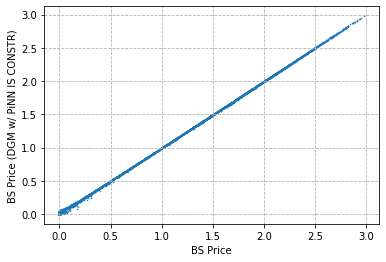

time: 258 ms (started: 2022-08-13 21:04:23 +00:00)


In [ ]:
net_cpu = trainEuss_PiNN_CONSTR_IS.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(test_sol).numpy(), torch.flatten(net_cpu(test_input)).detach().numpy(), s=.3)
plt.xlabel('BS Price')
plt.ylabel('BS Price (DGM w/ PiNN IS CONSTR)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(test_sol).numpy() -torch.flatten(net_cpu(test_input)).detach().numpy() )))

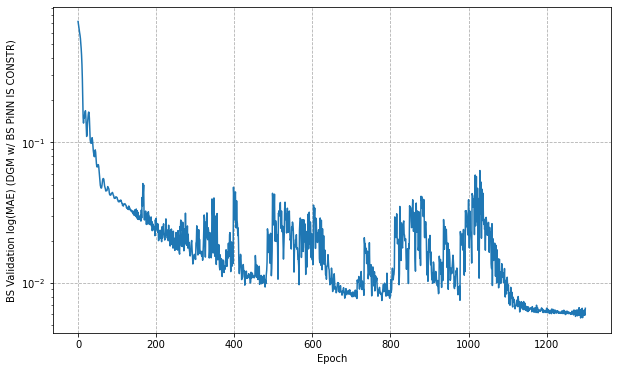

time: 495 ms (started: 2022-08-13 21:04:23 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_PiNN_CONSTR_IS.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('BS Validation log(MAE) (DGM w/ BS PiNN IS CONSTR)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

mod_name = "BS"
fit_name = "trainEuss_PiNN_CONSTR_IS"
val_mae_df = pd.DataFrame({ 'model' : mod_name, 'name': fit_name, 
                            'data' : trainEuss_PiNN_CONSTR_IS.vaildation_data_mae })
val_mae_df.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv", index=False)

#### Create PiNN, validation and test set for MultiStock

In [ ]:
def mc_basket_option_price(input, n_steps = 100, n_stocks = 2, rho = 0.0):
    Zs = torch.normal(mean=torch.zeros([n_steps,1]), std=torch.ones([n_steps,1])).to(input.device)
    Eps = torch.normal(mean=torch.zeros([n_stocks,n_steps]), std=torch.ones([n_stocks,n_steps])).to(input.device)

    initial_S = input[:,1:(1+n_stocks)].to(input.device)
    sigma_S = input[:,-1].to(input.device)
    r = input[:,-2].to(input.device)
    T = input[:,-3].to(input.device)
    K = input[:,-4].to(input.device)

    outcomes_of_all_paths = [input.shape[0], n_stocks, n_steps]
    rhof1 = np.sqrt(rho)
    rhof2 = np.sqrt(1.0-rho)
    zeros_for_payoff = torch.zeros([input.shape[0]]).to(input.device)
    
    simulated_terminal_S = torch.zeros(outcomes_of_all_paths).to(input.device)
    simulated_payoffs = torch.zeros([input.shape[0], n_steps]).to(input.device)

    for i in range(n_steps):
      a1 = ((r - 0.5*torch.square(sigma_S))*T)[:, None]
      a2 = (sigma_S*torch.sqrt(T)).reshape(-1,1)*(Zs[i,0].item()*rhof1 + rhof2*Eps[:,i])
      simulated_terminal_S[:,:,i] = initial_S*torch.exp( a1 + a2 )
      simulated_payoffs[:,i] = torch.max( (1./n_stocks)*torch.sum(simulated_terminal_S[:,:,i],dim=1)-K, zeros_for_payoff )
      
    # pdb.set_trace()
    prices = (1.0/n_steps)*torch.sum(simulated_payoffs, dim=1).to(input.device)
    return prices


time: 25.7 ms (started: 2022-08-14 18:38:42 +00:00)


In [ ]:
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

msbs_sample_creator = MultiStockEuropeanBlackScholesCall(None, K=1.0, RHO=0.75, nstocks=2)

supervised_data = dict()
supervised_data['msbs_input'] = msbs_sample_creator.sample(size = 2**12)[0]
supervised_data['msbs_analytical_sol'] = mc_basket_option_price(supervised_data['msbs_input'], n_steps=20000, n_stocks=2, rho = 0.75)
supervised_data['msbs_analytical_sol'].cuda()
supervised_data['msbs_input'].cuda()

validation_data = dict()
validation_data['msbs_input'] = msbs_sample_creator.sample(size = 2**12)[0]
validation_data['msbs_analytical_sol'] = mc_basket_option_price(validation_data['msbs_input'], n_steps=20000, n_stocks=2, rho = 0.75)
validation_data['msbs_analytical_sol'].cuda()
validation_data['msbs_input'].cuda()

test_data = dict()
test_data['msbs_input'] = msbs_sample_creator.sample(size = 2**12)[0]
test_data['msbs_analytical_sol'] = mc_basket_option_price(test_data['msbs_input'], n_steps=20000, n_stocks=2, rho = 0.75)
test_data['msbs_analytical_sol'].cuda()
test_data['msbs_input'].cuda()

pp(supervised_data['msbs_input'].shape)
pp(validation_data['msbs_input'].shape)
pp(test_data['msbs_input'].shape)


torch.Size([4096, 7])
torch.Size([4096, 7])
torch.Size([4096, 7])
time: 30.6 s (started: 2022-08-14 15:00:11 +00:00)


In [ ]:
test_sol = test_data['msbs_analytical_sol'].cpu()
validation_sol = validation_data['msbs_analytical_sol'].cpu()
supervised_sol = supervised_data['msbs_analytical_sol'].cpu()

test_input = test_data['msbs_input'].cpu()
validation_input = validation_data['msbs_input'].cpu()
supervised_input = supervised_data['msbs_input'].cpu()


time: 9.36 ms (started: 2022-08-14 15:05:11 +00:00)


In [ ]:
# torch.normal(mean=torch.zeros([2,2]), std=torch.ones([2,2]))
# torch.zeros([4,1])
# torch.ones([4,1])
# test_input = msequation.sample(size=10) # .to(torch.device("cuda:0"))

time: 1.02 ms (started: 2022-08-14 14:58:11 +00:00)


In [ ]:
# np.set_printoptions(suppress=True)
# torch.round(test_input[0],decimals=3).cpu().numpy()

time: 690 µs (started: 2022-08-14 14:58:11 +00:00)


In [ ]:
# pp(list(test_input[0].shape))
# # pp(test_input[1].shape)n
# np.set_printoptions(suppress=True)
# pp(np.round(test_input[0].cpu().numpy(),3)) # 0 is the internal, 1 is the terminal
# test_input[0].cpu()[:,-3]
# # np.sqrt(4.5)n

# torch.max( torch.rand([10,2]), torch.ones([10,2])*0.5)
# mc_basket_option_price(test_input[0], rho = 0.5)

time: 1.37 ms (started: 2022-08-14 14:58:11 +00:00)


## Merton Invest-Consumption Problem - Equation HJB optimization

[Extensions of the Deep Galerkin Method](https://arxiv.org/pdf/1912.01455v3.pdf)

A closed form implementation for now...

##### Closed form terminal utility functions

In [25]:
def expTerminalUtilityOfWealth(x, gamma_discount = 1):
  return(-1*torch.exp(-gamma_discount*x))

def expTerminalUtilityOfWealth_np(x, gamma_discount = 1):
  return(-np.exp(-gamma_discount*x))

from functools import partial

# should give a closed form solution for the control => PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))


time: 889 µs (started: 2022-09-28 14:24:26 +00:00)


#### MertonUtilityNet

In [26]:
class MertonUtilityNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.relu):
        super(MertonUtilityNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.Input = 5  # wealth, time, mu, r, sigma, pi
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act(self.fc_input(x))
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 

time: 2.51 ms (started: 2022-09-28 14:24:26 +00:00)


#### MertonPiNet

In [27]:
import torch.nn.functional as F

class MertonPiNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.relu  ):
        super(MertonPiNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.Input = 5   # wealth, time, mu, r, sigma
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)            
        # self.fc_output_d = nn.Linear(self.NN, 2)
        # self.fc_output = torch.nn.Softmax(dim=1)
        self.fc_output = nn.Linear(self.NN, 1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        # out = self.fc_output_d(h)
        out = self.fc_output(h)
        return out
        

time: 2.68 ms (started: 2022-09-28 14:24:27 +00:00)


#### MertonAlternativePiNet

[implement from github](https://github.com/Plemeur/DGM/blob/master/first_net.py)

In [28]:
class LinearWithXavier(nn.Module):
    """ Copy of linear module from Pytorch, modified to have a Xavier init,
        TODO : figure out what to do with the bias"""
    def __init__(self, in_features, out_features, bias=True, batch_normalize=True):
        super(LinearWithXavier, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.batch_normalize = batch_normalize
        
        if self.batch_normalize == True:
          self.batch_norm = torch.nn.BatchNorm1d(out_features)
        
        if bias:
            self.bias = torch.nn.Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    
    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight)
        if self.bias is not None:
            torch.nn.init.uniform_(self.bias, -1, 1) #boundary matter?
    
    def forward(self, input):
        if self.batch_normalize == True:
          return self.batch_norm(torch.nn.functional.linear(input, self.weight, self.bias))
        return torch.nn.functional.linear(input, self.weight, self.bias)
    
    def extra_repr(self):
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )


class DGM_layer(nn.Module):
    """ See readme for paper source"""
    def __init__(self, in_features, out_feature, residual=False, batch_normalize=False):
        super(DGM_layer, self).__init__()
        self.residual = residual

        self.Z = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UZ = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.G = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UG = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.R = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UR = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.H = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UH = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)

    def forward(self, x, s):
        z = torch.tanh(self.UZ(x) + self.Z(s))
        g = torch.tanh(self.UG(x) + self.G(s))
        r = torch.tanh(self.UR(x) + self.R(s))
        h = torch.tanh(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonAlternativePiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonAlternativePiNet, self).__init__()
        self.neurons=neurons
        self.depth=depth

        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGM_layer(in_size, neurons) for i in range(depth)])
        # self.middle_layer_2 = nn.ModuleList([DGM_layer(in_size, neurons, batch_normalize=False) for i in range(2)])
        self.final_layer = LinearWithXavier(neurons, out_size, batch_normalize=False)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))
        
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.tanh(layer(X, s))
        
        # s = torch.nn.functional.gelu(self.input_layer(X))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.elu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.gelu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.nn.functional.gelu(layer(X, s))

        return self.final_layer(s)


time: 6.53 ms (started: 2022-09-28 14:24:41 +00:00)


#### MertonMatchPiNet

[Matching Paper by hand](https://arxiv.org/abs/1912.01455v3)

In [29]:
class DGMLayerPaper(nn.Module):

    def __init__(self, in_features, out_feature, activation=torch.relu, residual=False):
        
        super(DGMLayerPaper, self).__init__()
        self.residual = residual
        self.activation = activation

        self.Z = LinearWithXavier(out_feature, out_feature) # w.S
        self.UZ = LinearWithXavier(in_features, out_feature, bias=True) # u.x
        self.G = LinearWithXavier(out_feature, out_feature)
        self.UG = LinearWithXavier(in_features, out_feature, bias=True)
        self.R = LinearWithXavier(out_feature, out_feature)
        self.UR = LinearWithXavier(in_features, out_feature, bias=True)
        self.H = LinearWithXavier(out_feature, out_feature) # w.(S(o)R)
        self.UH = LinearWithXavier(in_features, out_feature, bias=True)

    def forward(self, x, s):
        z = self.activation(self.UZ(x) + self.Z(s))
        g = self.activation(self.UG(x) + self.G(s))
        r = self.activation(self.UR(x) + self.R(s))
        h = self.activation(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonMatchPiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonMatchPiNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGMLayerPaper(in_size, neurons) for i in range(depth)])
        self.final_layer = LinearWithXavier(neurons, out_size)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))

        return self.final_layer(s)


time: 3.75 ms (started: 2022-09-28 14:24:52 +00:00)


#### PiEquation

In [30]:
class PiEquation():

    def __init__(self, pi_net, du_dx, d2u_dx2, curr_epoch=0):
        self.pi_net = pi_net
        self.grads = du_dx, d2u_dx2
        self.curr_epoch = curr_epoch

        #self.wgamma = 0.0001
        #seld.du_dx = Variable(du_dx, requires_grad=False)
        #self.d2u_dx2 = Variable(d2u_dx2, requires_grad=False)

    def criterion(self, x_internal, grads):
      
      #du_dx = Variable(grads[1], requires_grad=False)   # the derivatives with respect to u are held constant when finding pi 
      #d2u_dx2 = Variable(grads[2], requires_grad=False) # du_dt is grads[0], not relevant here
      du_dx, d2u_dx2 = grads

      #print('gradient shapes:', du_dx.shape, d2u_dx2.shape)

      pi_net_preds = self.pi_net(x_internal)
      pi_net_preds = pi_net_preds.reshape(-1,1)
      #print('pi_net prediction shape:', pi_net_preds.shape)
      
      intC = None
      #  time, wealth, mu, r, sigma
      if len(x_internal) == 0:
        intC_loss = torch.tensor(0).cuda().float()  
      else:
        
        # pi * (mu-r)
        loss_1 = pi_net_preds*(x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1))
        #print('loss1 shape:', loss_1.shape)
        
        # r * wealth
        loss_2 = x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1)
        #print('loss2 shape:', loss_2.shape)
        
        # sigma^2 * pi^2
        loss_3 = (x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)
        #print('loss3 shape:', loss_3.shape)
        
        intC_loss = -(loss_1 +loss_2)*du_dx - 0.5*loss_3*d2u_dx2
        #print('total internal loss shape:', intC_loss.shape)

      return intC_loss

    def calculatePiLoss(self, x_internal, grads, keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        #x_internal = Variable( x_internal , requires_grad=True)
        Ls = self.criterion( x_internal, grads)
        
        if not keep_batch:          
          return torch.mean(Ls)           
        else:
          return Ls

time: 4.05 ms (started: 2022-09-28 14:25:09 +00:00)


#### TrainInternalPiWithDGM


In [31]:
class TrainInternalPiWithDGM():
    
    def __init__(self, u_equation, pi_equation, BATCH_SIZE, epoch, lr, debug = False, loss_multiply = 1.0):
        self.BATCH_SIZE = BATCH_SIZE
        self.u_model = u_equation        
        self.pi_model = pi_equation
        
        self.debug = debug  
        self.hook_interval = 100    
        
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.pi_model.pi_net)

        self.optimizer_used = optim.Adam

        #self.use_early_stop = False
        #self.early_stop_patience = 10
        #self.early_stop_delta = 0.0        
        #self.best_loss = np.Inf
        #self.early_stop_counter = 0

        self.stop_epoch = 0

        #self.validation_sample = None
        #self.validation_losses = None
        #self.train_losses = None        

        self.epoch = epoch
        self.lr = lr

        #self.loss_multiply = loss_multiply

        
    def train(self , eqLossFn = 'calculatePiLoss', sample_method_X = "U", sample_batch = None):
        
        #if self.validation_sample is not None:
        #  self.validation_losses = np.ones((self.epoch, 3 ), dtype='float32') * np.nan
        
        #self.train_losses = np.ones((self.epoch, 1 ), dtype='float32') * np.nan

        # set it to train mode
        self.pi_model.pi_net.train()
        
        optimizer = self.optimizer_used(self.pi_model.pi_net.parameters(), self.lr)
        if self.u_model.pi_optim_state is not None:
            optimizer.load_state_dict(self.u_model.pi_optim_state)  ## check 
        
        #if self.u_model.pi_optim_state is None:
        #    optimizer = self.optimizer_used(self.pi_model.pi_net.parameters(), self.lr)
        #else:
        #    optimizer = self.u_model.pi_optim_state


        loss_avg = 0.0
        loss_calc_method = None
        
        try:
            loss_calc_method = getattr(self.pi_model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.pi_model.__class__.__name__, eqLossFn))
        
        if sample_batch is None:
            sample_batch = self.u_model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)

        x_internal, _ = sample_batch

        for e in range(self.epoch):

            optimizer.zero_grad()
  

            loss  = 1e4 * loss_calc_method(x_internal, self.pi_model.grads, keep_batch = False)            
            # print(f"Pi Net Epoch {e} Loss {round(loss.item(),5)}")
            
            #self.train_losses[e,:] = [ to_cpu_detach(loss) ]

            #if self.debug == True and (self.validation_sample is not None):
            #  losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
            #                                                                                         loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=0.5) ], 
            #                                                                                         keep_batch = False )
            #  validation_loss_list = [*to_cpu_detach(losses_L2_validation),
            #                          *to_cpu_detach(losses_ABS_validation),
            #                          *to_cpu_detach(losses_Huber_valiation)]
            #  self.validation_losses[e,:] = validation_loss_list
            #
            #if self.use_early_stop:
            #  loss_to_check = loss
            #  if loss_to_check < (self.best_loss-self.early_stop_delta):
            #    self.best_loss = loss_to_check
            #    self.early_stop_counter = 0
            #  else:
            #    self.early_stop_counter += 1
            #  if self.early_stop_counter>=self.early_stop_patience:
            #    # print(f"Pi Early Stop at epoch {e}: {loss_to_check} with patience {self.early_stop_patience}")
            #    break
            
            
            loss_avg = loss_avg + float(loss.item())

            # print('self.epoch:', e)
            loss.backward()
            # for param in self.pi_model.pi_net.parameters():
            #   print('pi grad', param.grad)
            optimizer.step()
            
            #if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
            if (self.pi_model.curr_epoch % self.hook_interval == (self.hook_interval-1)) and e==0:

                loss_avg = loss_avg/self.hook_interval
                #print("Unet Epoch {} - Pi Epoch {} - lr {} -  key loss: {}".format(self.pi_model.curr_epoch, e , self.lr , loss_avg))
                print("Pi Epoch {} - lr {} -  key loss: {}".format(self.pi_model.curr_epoch, self.lr , loss_avg))
                loss_avg = 0.0
        
        self.u_model.pi_optim_state = optimizer.state_dict()
        self.stop_epoch = e

    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)


time: 5.74 ms (started: 2022-09-28 14:25:27 +00:00)


#### MertonEquation

In [32]:
import math

class MertonEquation():
    
    def __init__(self , u_net, pi_net, pi_net_epoch, pi_net_lr, term_utility_function = partial(expTerminalUtilityOfWealth, gamma_discount=1)):

        self.u_net = u_net
        self.pi_net = pi_net

        self.wgamma = 0.0001
        self.term_utility_func = term_utility_function
        self.xbreaks = None
        self.tbreaks = None

        self.MAX_X = 1.0
        self.T = 1.0
        self.MAX_MU = 0.2
        self.MAX_SIGMA = 0.5

        self.pi_net_epoch = pi_net_epoch
        self.pi_net_lr = pi_net_lr
        #self.loss_multiply = 1.0

        #self.FORCE_MU = None
        #self.FORCE_R = None
        #self.FORCE_SIGMA = None

        self.epoch_of_u = None
        #self.adapt_pi_epochs = False
        #self.start_adapt_epochs = [ [500, 1000, 2000, 5000, 10000, 15000 ], [4, 8, 10 ,20, 40, 60] ]
        #self.was_loss_beaten = False
        self.pi_optim_state = None

        #self.pi_net.train()

    def g(self,x):
        # Time, Wealth, Mu, R, Sigma
        return self.term_utility_func(x[:,1].reshape(-1,1))

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def mu_r_sample(self, size):
      mu_candidate = self.MAX_MU * torch.rand([size, 1])
      r_candidate = mu_candidate * torch.rand([size, 1])  # ensuring that r is lower than mu
      return mu_candidate, r_candidate

      # r_sample = torch.where(r_candidate < mu_candidate, r_candidate, mu_candidate)
      # mu_sample = torch.where(r_candidate > mu_candidate, r_candidate, mu_candidate)
      # return (mu_sample, r_sample)

    def apply_forced_mu_r_sigma(self, mu_sample, r_sample, sigma_sample):
      if self.FORCE_MU is not None:
         mu_sample = self.FORCE_MU*torch.ones_like(mu_sample)            
      if self.FORCE_R is not None:
        r_sample = self.FORCE_R*torch.ones_like(r_sample)
      if self.FORCE_SIGMA is not None:
        sigma_sample = self.FORCE_SIGMA*torch.ones_like(sigma_sample)
      return mu_sample, r_sample, sigma_sample


    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = True ):
        '''
        Sampling function
        '''
        if sample_method_X in ["U"]:
            #range_multiplier = 1.0
            
            ### internal samples of Time, Wealth, Mu, R, Sigma
            mu_sample_internal, r_sample_internal = self.mu_r_sample(size)
            sigma_sample_internal =  0.2 + self.MAX_SIGMA * (1. - torch.rand([size, 1]))
            #mu_sample_internal, r_sample_internal, sigma_sample_internal = self.apply_forced_mu_r_sigma(mu_sample_internal, r_sample_internal, sigma_sample_internal)
            x_internal = self.to_device(torch.cat(( (1 - torch.rand([size,1])) * self.T, # time to maturity
                                                    self.MAX_X * (1 - torch.rand([size, 1])), # Wealth
                                                    mu_sample_internal, # mu
                                                    r_sample_internal, # R
                                                    sigma_sample_internal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            ### Terminal time samples
            mu_sample_terminal, r_sample_terminal = self.mu_r_sample(size)
            sigma_sample_terminal =  0.2 + self.MAX_SIGMA * (1. - torch.rand([size, 1]))
            #mu_sample_terminal, r_sample_terminal, sigma_sample_terminal = self.apply_forced_mu_r_sigma(mu_sample_terminal, r_sample_terminal, sigma_sample_terminal)
            x_terminal = self.to_device(torch.cat(( torch.zeros(size, 1), # time to maturity
                                                   self.MAX_X * (1 - torch.rand([size, 1])), # Wealth
                                                    mu_sample_terminal, # mu
                                                    r_sample_terminal, # R
                                                    sigma_sample_terminal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            
            # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
            return x_internal , x_terminal

        raise ValueError(f"{sample_method_X} is not a supported sampling method")
        

    def get_num_pi_epochs(self):
      #if self.adapt_pi_epochs and self.was_loss_beaten:
      #  if any([ i < self.epoch_of_u for i in self.start_adapt_epochs[0] ]):
      #    return self.pi_net_epoch * self.start_adapt_epochs[1][[i for i in range(len(self.start_adapt_epochs[0])) if self.start_adapt_epochs[0][i] < self.epoch_of_u][-1]] 
      
      return self.pi_net_epoch

    def get_utility_function_derivatives(self, u_net_val, x_internal, normalize=False):
        du = torch.autograd.grad( u_net_val, 
                                  x_internal, 
                                  grad_outputs=torch.ones_like(u_net_val),
                                  create_graph=True)
        
        du_dt = du[0][:,0].reshape(-1,1)
        du_dx = du[0][:,1].reshape(-1,1)     

        d2u_dx2 = torch.autograd.grad(du_dx, 
                                      x_internal , 
                                      grad_outputs=torch.ones_like(du_dx),
                                      create_graph=True, allow_unused=True
                                      )[0][:,1].reshape(-1,1)
        
        return du_dt, du_dx, d2u_dx2
    
    def Pi_star(self, x, gamma=1):
        lamda = (x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/x[:,4].reshape(-1,1)
        return lamda / (gamma * x[:,4].reshape(-1,1)) * torch.exp(-1. * x[:,3].reshape(-1,1)*x[:,0].reshape(-1,1))

        
    def Htx(self, x, gamma=1):
      # 3.6a in https://arxiv.org/abs/1912.01455v3
      #  wealth * gamma * exp(r*tau)
      part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
      #  0.5* tau *[(mu - r)/sigma]^2
      part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
      return -1.0*torch.exp(-part_a - part_b)

    
    def dHdx(self, x, gamma=1):
        
        return self.Htx(x) * (-1 * gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1)))

    
    def d2Hdx2(self, x, gamma=1):
        
        return self.Htx(x) * gamma**2 * torch.exp(2* x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))


    def criterion(self, x_internal, x_terminal, loss_transforms = [torch.square], util_network=None):
        '''
        Loss function that helps network find solution to equation
        '''   
        # Time / Wealth / Mu / r / Sigma (sample data order)
        # pdb.set_trace()
        
        u_net_val = util_network(x_internal)
        #print(torch.mean(u_net_val), torch.min(u_net_val), torch.max(u_net_val))

        
        # Trying to used a correct solution to see Pi convergence
        #u_net_val = self.Htx(x_internal)
        #du_dx, d2u_dx2 = self.dHdx(x_internal), self.d2Hdx2(x_internal)
        #du_dt = torch.zeros_like(du_dx)


        du_dt, du_dx, d2u_dx2 = self.get_utility_function_derivatives(u_net_val, x_internal)

        

        if loss_transforms is None:
          loss_transforms = [torch.square]

        intC = None
        terC = None

        if len(x_internal) == 0:
          intC = [ torch.tensor(0).cuda().float() for loss_transform in loss_transforms ] 
        else:
          # Time, Wealth, Mu, R, Sigma
          gamma = 1


          tau = x_internal[:,0].cpu().detach()
          wealth = x_internal[:,1].cpu().detach()
          mu = x_internal[:,2].cpu().detach()
          r = x_internal[:,3].cpu().detach()
          sigma = x_internal[:,4].cpu().detach()

          pi_net_preds = (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).detach().reshape(-1,1)
#           pi_net_preds = self.pi_net(x_internal)
#           #pi_net_preds = (x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1)) / (x_internal[:,4].reshape(-1,1) ** 2) * (du_dx / d2u_dx2)
          
#           pi_net_preds = pi_net_preds.detach().reshape(-1,1)
#           #print('Pi net prediction inside Unet:', pi_net_preds.shape)

          # pi*(mu-r)
          intC_loss_1 = pi_net_preds*(x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1)) 
          #print('interim loss1 in unet shape:', intC_loss_1.shape)
          
          # r * wealth
          intC_loss_2 = x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1)  
          #print('interim loss2 in unet shape:', intC_loss_2.shape)
          
          # sigma^2 * pi^2
          intC_loss_3 = (x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)
          #print('interim loss3 in unet shape:', intC_loss_3.shape)
          
          # it is minus in front of time derivative as it is time to maturity instead of elapsed time
          intC_loss = -du_dt + (intC_loss_1 + intC_loss_2)*du_dx + 0.5*intC_loss_3*d2u_dx2
          
          #print(torch.mean(intC_loss), torch.min(intC_loss), torch.max(intC_loss))
          #print('interim total loss in unet shape:', intC_loss.shape)

          intC = [ loss_transform(intC_loss) for loss_transform in loss_transforms ] 
        
        
        #print('Terminal condition shapes:')
        #print(self.g(x_terminal).shape)
        #print(util_network(x_terminal).shape)

        terC = [ loss_transform(self.g(x_terminal) - util_network(x_terminal)) for loss_transform in loss_transforms ]
        
        # print('mean d2u_dx2:', d2u_dx2.mean(),'max d2u_dx2:', d2u_dx2.max())
        # print('mean du_dx:', du_dx.mean(),'max du_dx:', d2u_dx2.max())
        # print('mean du_dt:', du_dt.mean(),'max d2u_dx2:', d2u_dx2.max())
        
        return intC, terC

    def calculateLoss(self, batch_x, train = True, loss_transforms = [ torch.square ], keep_batch = False, util_network=None):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        # pdb.set_trace()
        x_internal , x_terminal = batch_x
        x_internal = Variable( x_internal , requires_grad=True)
        
        #x_terminal = Variable( x_terminal , requires_grad=True)
        # print('MertonEquation calling self.criterion')
        Ls = self.criterion(x_internal , x_terminal, loss_transforms = loss_transforms, util_network=util_network)
        intC, terC = Ls

        return_losses = []
        # print('internal Loss', torch.mean(intC[0]))
        # print('external Loss', torch.mean(terC[0]))

        for lc in range(len(loss_transforms)):
          if not keep_batch:
            loss_equalWeightedByType = torch.mean(intC[lc]) + torch.mean(terC[lc])
            return_losses.append( [ 1e4 * loss_equalWeightedByType , 
                                    1e4 * torch.mean(intC[lc]) , 
                                    1e4 * torch.mean(terC[lc])
                                   ] )            
          else:
            return_losses.append( [intC.numpy(), terC.numpy()] )
        return return_losses

    def calculateLossUsingKLMinMax(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , loss_transforms = loss_transforms)
        intC , terC = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * torch.pow((1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * intC[lc])), self.gamma/self.beta) 
            terCt = self.weights[0,1] * torch.pow((1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * terC[lc])), self.gamma/self.beta) 
            loss_equalWeightedByType = 100*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt)
            return_losses.append( [ transformed_loss , 
                                    100*torch.mean(intC[lc]) , 0.5*torch.mean(terC[lc]),
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy()] )
        return return_losses


    def calculateLossKLMinMaxGamma(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal  = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal, loss_transforms = loss_transforms)
        intC , terC  = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * (1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * intC[lc])) 
            terCt = self.weights[0,1] * (1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * terC[lc])) 
            loss_equalWeightedByType = 0.5*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt )
            return_losses.append( [ transformed_loss , 
                                    0.5*torch.mean(intC[lc]) , 0.5*torch.mean(terC[lc]),
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy()] )
        return return_losses

    

time: 18.1 ms (started: 2022-09-28 14:25:41 +00:00)


#### Save info from run

In [33]:
def save_model_train(training, eqObject, lr, eqLossFn, sample_method, loss, batch_size, epoch): 

  model_id_base_str =  f"{eqObject.__class__.__name__}_{datetime.datetime.now():%Y%m%d%H%M%S}_{batch_size}_{str(torch.round(loss,decimals=2)).replace('.','p')}"
  model_id_base_str = model_id_base_str + f"_{eqLossFn}_{sample_method}_{epoch}_{str(lr).replace('.','p')}"  
  model_id_base_str = model_id_base_str + f"_U{eqObject.u_net.neurons}_U{eqObject.u_net.depth}_P{eqObject.pi_net.neurons}_P{eqObject.pi_net.depth}"
  
  torch.save(eqObject.u_net.state_dict(),  f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/{model_id_base_str}_U")
  torch.save(eqObject.pi_net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/{model_id_base_str}_P")

  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(training, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{training.hook_interval}_{model_id_base_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(training,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(training,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "validation_losses"))

  import numpy as np

  training_dict = dict({ "BATCH_SIZE" : training.BATCH_SIZE,
                         "use_early_stop" : training.use_early_stop,
                        "early_stop_patience" : training.early_stop_patience,
                        "early_stop_delta" : training.early_stop_delta,
                        "monitored_loss_type" : training.monitored_loss_type,
                        "use_early_stop" : training.use_early_stop,
                        "stop_epoch" : training.stop_epoch            })
  equation_dict = dict({ "wgamma" : eqObject.wgamma,
                        "xbreaks" : eqObject.xbreaks,
                        "tbreaks" : eqObject.tbreaks,
                        "MAX_X" : eqObject.MAX_X,
                        "T" : eqObject.T,
                        "MAX_MU" : eqObject.MAX_MU,
                        "MAX_SIGMA" : eqObject.MAX_SIGMA,
                        "pi_net_epoch" : eqObject.pi_net_epoch,
                        "wgamma" : eqObject.wgamma,
                        "pi_net_lr" : eqObject.pi_net_lr,
                        "loss_multiply" : eqObject.loss_multiply,
                        "epoch_of_u" : eqObject.epoch_of_u,
                        "adapt_pi_epochs" : eqObject.adapt_pi_epochs,
                        "start_adapt_epochs" : eqObject.start_adapt_epochs,
                        "was_loss_beaten" : eqObject.was_loss_beaten  })

  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainingDict_{model_id_base_str}.npy", training_dict)
  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/equationDict_{model_id_base_str}.npy", equation_dict) 


time: 4.14 ms (started: 2022-09-28 14:25:49 +00:00)


#### TrainHJBMertonWithDGM

In [37]:
class TrainHJBMertonWithDGM():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        
        #self.history_mean_hooks = [] 
        #self.history_surfaces_hooks = None       
        #self.history_tl = []
        #self.history_internal = []
        #self.history_terminal = []
        #self.history_initial = []              
        #self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam
        self.validation_losses = []
        self.validation_mae = []

        #self.use_early_stop = False
        #self.early_stop_patience = 10
        #self.early_stop_delta = 0.0        
        #self.best_loss = np.Inf
        #self.monitored_loss_type = "Train_L2"
        #self.early_stop_counter = 0
        self.stop_epoch = 0
        #self.validation_sample = None
        #self.validation_losses = None
        #self.train_losses = None        
        
    
    def Htx(self, x, gamma=1):
      # 3.6a in https://arxiv.org/abs/1912.01455v3
      #  wealth * gamma * exp(r*tau)
      part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
      #  0.5* tau *[(mu - r)/sigma]^2
      part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
      return -1.0*torch.exp(-part_a - part_b)

    
    def Pi_star(self, x, gamma=1):
        lamda = (x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/x[:,4].reshape(-1,1)
        return lamda / (gamma * x[:,4].reshape(-1,1)) * torch.exp(-1. * x[:,3].reshape(-1,1)*x[:,0].reshape(-1,1))

    def train(self, 
              epoch, 
              lr, 
              eqLossFn = 'calculateLoss', 
              sample_method_X = "U", 
              key_loss_func = torch.square, 
              huber_delta = 0.5,
             validation_Set=None):
        
        #if self.validation_sample is not None:
        #  self.validation_losses = np.ones((epoch, 3*4 ), dtype='float32') * np.nan
        #self.train_losses = np.ones((epoch, 3 ), dtype='float32') * np.nan
        
        self.net.train()
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        

        for e in tqdm(range(epoch)):

            loss_avg = 0.0
            loss_int_avg = 0.0
            i = 0
            
            full_dataset = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            full_batch_internal = DataLoader(full_dataset[0], batch_size=self.BATCH_SIZE)
            full_batch_terminal = DataLoader(full_dataset[1], batch_size=self.BATCH_SIZE)

            for sample_int, sample_term in zip(full_batch_internal, full_batch_terminal):
                sample_batch = sample_int, sample_term 
                optimizer.zero_grad()

                self.model.epoch_of_u = e
                losses_L2 = loss_calc_method(sample_batch, loss_transforms = [key_loss_func], keep_batch=False, util_network=self.net )
                
                # pdb.set_trace()
                loss, internal, terminal = losses_L2[0]
                loss_avg = loss_avg + float(loss.item())
                loss_int_avg = loss_int_avg + float(internal.item())
                loss.backward()

                optimizer.step()
                i += 1

            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:

                loss_avg = loss_avg / i
                loss_int_avg = loss_int_avg / i
                
                if validation_Set is not None:
                    
                    internal_val = validation_Set[0]
                    internal_val = torch.cat((internal_val, validation_Set[1]), dim=0)
                    
                    htx_results = Htx(internal_val, 1)
                    
                    losses_L2 = loss_calc_method(validation_Set, loss_transforms = [key_loss_func], keep_batch=False, util_network=self.net )
                    print('Validation Losses:', losses_L2)
                    mae = (torch.abs(htx_results - self.net(internal_val))).mean()
                    
                    self.validation_losses.append(losses_L2)
                    self.validation_mae.append(mae.item())


                print("Unet Epoch {} - lr {} - Total Loss: {} - Internal Loss: {} - Terminal Loss: {}".format(e , lr , loss_avg, loss_int_avg, loss_avg - loss_int_avg))


        self.stop_epoch = e

    def hook_fn(self, m, i, o):
      self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1", "Mu", "R", "Sigma"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample



time: 9.19 ms (started: 2022-09-28 14:29:52 +00:00)


In [ ]:
def Htx(x, gamma=1):
    # 3.6a in https://arxiv.org/abs/1912.01455v3
    #  wealth * gamma * exp(r*tau)
    part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
    #  0.5* tau *[(mu - r)/sigma]^2
    part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
    return -1.0*torch.exp(-part_a - part_b)

### Test Case

In [39]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = False

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLoss'
sample_method= "U"
lr = 5e-4
lr_for_pi = 1e-3
max_pi_epochs = 4 # has to be low!!!

# u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
u_net = MertonUtilityNet(NL=5, NN=64)
# u_net.to(torch.device("cuda:0")) 

# pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
pi_net = MertonPiNet(NL=2, NN=64)
# pi_net.to(torch.device("cuda:0"))

mequation = MertonEquation(u_net, pi_net, max_pi_epochs, lr_for_pi)
#mequation.adapt_pi_epochs = True

trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE=10000, debug=False )
trainMertonAlloc.hook_interval = 5

val_batch = mequation.sample(size=10000, to_cpu=True)
trainMertonAlloc.train(epoch = 500, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs, validation_Set=val_batch)


  0%|          | 2/500 [00:00<01:13,  6.74it/s]

Validation Losses: [[tensor(8058.8579, grad_fn=<MulBackward0>), tensor(182.4858, grad_fn=<MulBackward0>), tensor(7876.3726, grad_fn=<MulBackward0>)]]
Unet Epoch 0 - lr 0.0005 - Total Loss: 8417.0712890625 - Internal Loss: 282.4465026855469 - Terminal Loss: 8134.624786376953


  1%|          | 6/500 [00:01<01:20,  6.15it/s]

Validation Losses: [[tensor(6934.9199, grad_fn=<MulBackward0>), tensor(111.0033, grad_fn=<MulBackward0>), tensor(6823.9165, grad_fn=<MulBackward0>)]]
Unet Epoch 4 - lr 0.0005 - Total Loss: 7170.8955078125 - Internal Loss: 124.62156677246094 - Terminal Loss: 7046.273941040039


  2%|▏         | 11/500 [00:01<01:05,  7.44it/s]

Validation Losses: [[tensor(5930.9585, grad_fn=<MulBackward0>), tensor(126.2458, grad_fn=<MulBackward0>), tensor(5804.7129, grad_fn=<MulBackward0>)]]
Unet Epoch 9 - lr 0.0005 - Total Loss: 6104.91943359375 - Internal Loss: 114.19239807128906 - Terminal Loss: 5990.727035522461


  3%|▎         | 16/500 [00:02<01:17,  6.27it/s]

Validation Losses: [[tensor(4830.1304, grad_fn=<MulBackward0>), tensor(143.9219, grad_fn=<MulBackward0>), tensor(4686.2085, grad_fn=<MulBackward0>)]]
Unet Epoch 14 - lr 0.0005 - Total Loss: 5078.5654296875 - Internal Loss: 146.05587768554688 - Terminal Loss: 4932.509552001953


  4%|▍         | 21/500 [00:03<01:04,  7.44it/s]

Validation Losses: [[tensor(3276.6641, grad_fn=<MulBackward0>), tensor(186.8789, grad_fn=<MulBackward0>), tensor(3089.7849, grad_fn=<MulBackward0>)]]
Unet Epoch 19 - lr 0.0005 - Total Loss: 3604.0048828125 - Internal Loss: 180.40164184570312 - Terminal Loss: 3423.603240966797


  5%|▌         | 25/500 [00:03<01:05,  7.29it/s]

Validation Losses: [[tensor(2225.0630, grad_fn=<MulBackward0>), tensor(222.6489, grad_fn=<MulBackward0>), tensor(2002.4142, grad_fn=<MulBackward0>)]]
Unet Epoch 24 - lr 0.0005 - Total Loss: 2284.94921875 - Internal Loss: 218.39926147460938 - Terminal Loss: 2066.5499572753906


  6%|▌         | 31/500 [00:04<01:07,  6.96it/s]

Validation Losses: [[tensor(2238.4443, grad_fn=<MulBackward0>), tensor(196.2643, grad_fn=<MulBackward0>), tensor(2042.1801, grad_fn=<MulBackward0>)]]
Unet Epoch 29 - lr 0.0005 - Total Loss: 2204.76904296875 - Internal Loss: 210.6287078857422 - Terminal Loss: 1994.1403350830078


  7%|▋         | 35/500 [00:05<01:03,  7.30it/s]

Validation Losses: [[tensor(2005.8007, grad_fn=<MulBackward0>), tensor(146.6902, grad_fn=<MulBackward0>), tensor(1859.1104, grad_fn=<MulBackward0>)]]
Unet Epoch 34 - lr 0.0005 - Total Loss: 2049.955322265625 - Internal Loss: 157.48257446289062 - Terminal Loss: 1892.4727478027344


  8%|▊         | 41/500 [00:06<01:03,  7.19it/s]

Validation Losses: [[tensor(1723.5706, grad_fn=<MulBackward0>), tensor(105.3479, grad_fn=<MulBackward0>), tensor(1618.2225, grad_fn=<MulBackward0>)]]
Unet Epoch 39 - lr 0.0005 - Total Loss: 1731.4876708984375 - Internal Loss: 111.93373107910156 - Terminal Loss: 1619.553939819336


  9%|▉         | 46/500 [00:06<01:00,  7.56it/s]

Validation Losses: [[tensor(1625.1379, grad_fn=<MulBackward0>), tensor(91.6234, grad_fn=<MulBackward0>), tensor(1533.5144, grad_fn=<MulBackward0>)]]
Unet Epoch 44 - lr 0.0005 - Total Loss: 1635.4776611328125 - Internal Loss: 89.81316375732422 - Terminal Loss: 1545.6644973754883


 10%|█         | 51/500 [00:07<01:06,  6.71it/s]

Validation Losses: [[tensor(1446.4723, grad_fn=<MulBackward0>), tensor(89.7555, grad_fn=<MulBackward0>), tensor(1356.7168, grad_fn=<MulBackward0>)]]
Unet Epoch 49 - lr 0.0005 - Total Loss: 1486.553955078125 - Internal Loss: 89.78705596923828 - Terminal Loss: 1396.7668991088867


 11%|█         | 56/500 [00:08<00:58,  7.59it/s]

Validation Losses: [[tensor(1337.1851, grad_fn=<MulBackward0>), tensor(102.2854, grad_fn=<MulBackward0>), tensor(1234.8997, grad_fn=<MulBackward0>)]]
Unet Epoch 54 - lr 0.0005 - Total Loss: 1340.838134765625 - Internal Loss: 99.9937973022461 - Terminal Loss: 1240.844337463379


 12%|█▏        | 61/500 [00:09<01:15,  5.80it/s]

Validation Losses: [[tensor(1189.4445, grad_fn=<MulBackward0>), tensor(122.7887, grad_fn=<MulBackward0>), tensor(1066.6558, grad_fn=<MulBackward0>)]]
Unet Epoch 59 - lr 0.0005 - Total Loss: 1203.6458740234375 - Internal Loss: 116.77601623535156 - Terminal Loss: 1086.869857788086


 13%|█▎        | 66/500 [00:09<01:00,  7.19it/s]

Validation Losses: [[tensor(1032.0028, grad_fn=<MulBackward0>), tensor(146.9926, grad_fn=<MulBackward0>), tensor(885.0102, grad_fn=<MulBackward0>)]]
Unet Epoch 64 - lr 0.0005 - Total Loss: 1054.0765380859375 - Internal Loss: 141.92974853515625 - Terminal Loss: 912.1467895507812


 14%|█▍        | 70/500 [00:10<00:58,  7.40it/s]

Validation Losses: [[tensor(832.1606, grad_fn=<MulBackward0>), tensor(182.4563, grad_fn=<MulBackward0>), tensor(649.7042, grad_fn=<MulBackward0>)]]
Unet Epoch 69 - lr 0.0005 - Total Loss: 860.1340942382812 - Internal Loss: 175.70802307128906 - Terminal Loss: 684.4260711669922


 15%|█▌        | 76/500 [00:11<01:01,  6.92it/s]

Validation Losses: [[tensor(598.1337, grad_fn=<MulBackward0>), tensor(230.5360, grad_fn=<MulBackward0>), tensor(367.5977, grad_fn=<MulBackward0>)]]
Unet Epoch 74 - lr 0.0005 - Total Loss: 641.9844970703125 - Internal Loss: 222.85191345214844 - Terminal Loss: 419.13258361816406


 16%|█▌        | 80/500 [00:11<00:58,  7.24it/s]

Validation Losses: [[tensor(518.8394, grad_fn=<MulBackward0>), tensor(274.5247, grad_fn=<MulBackward0>), tensor(244.3147, grad_fn=<MulBackward0>)]]
Unet Epoch 79 - lr 0.0005 - Total Loss: 511.82940673828125 - Internal Loss: 270.2184753417969 - Terminal Loss: 241.61093139648438


 17%|█▋        | 86/500 [00:12<00:59,  6.98it/s]

Validation Losses: [[tensor(478.2960, grad_fn=<MulBackward0>), tensor(272.3676, grad_fn=<MulBackward0>), tensor(205.9284, grad_fn=<MulBackward0>)]]
Unet Epoch 84 - lr 0.0005 - Total Loss: 492.7519836425781 - Internal Loss: 273.1592712402344 - Terminal Loss: 219.59271240234375


 18%|█▊        | 91/500 [00:13<00:53,  7.58it/s]

Validation Losses: [[tensor(412.4022, grad_fn=<MulBackward0>), tensor(240.5999, grad_fn=<MulBackward0>), tensor(171.8022, grad_fn=<MulBackward0>)]]
Unet Epoch 89 - lr 0.0005 - Total Loss: 411.1670837402344 - Internal Loss: 250.72508239746094 - Terminal Loss: 160.44200134277344


 19%|█▉        | 96/500 [00:14<01:03,  6.35it/s]

Validation Losses: [[tensor(376.4892, grad_fn=<MulBackward0>), tensor(242.5815, grad_fn=<MulBackward0>), tensor(133.9077, grad_fn=<MulBackward0>)]]
Unet Epoch 94 - lr 0.0005 - Total Loss: 384.10595703125 - Internal Loss: 236.47409057617188 - Terminal Loss: 147.63186645507812


 20%|██        | 101/500 [00:14<00:54,  7.36it/s]

Validation Losses: [[tensor(361.9796, grad_fn=<MulBackward0>), tensor(250.2493, grad_fn=<MulBackward0>), tensor(111.7303, grad_fn=<MulBackward0>)]]
Unet Epoch 99 - lr 0.0005 - Total Loss: 363.80291748046875 - Internal Loss: 247.02378845214844 - Terminal Loss: 116.77912902832031


 21%|██        | 106/500 [00:15<01:03,  6.25it/s]

Validation Losses: [[tensor(331.7416, grad_fn=<MulBackward0>), tensor(235.1201, grad_fn=<MulBackward0>), tensor(96.6214, grad_fn=<MulBackward0>)]]
Unet Epoch 104 - lr 0.0005 - Total Loss: 328.3809814453125 - Internal Loss: 232.9089813232422 - Terminal Loss: 95.47200012207031


 22%|██▏       | 111/500 [00:16<00:52,  7.43it/s]

Validation Losses: [[tensor(353.4224, grad_fn=<MulBackward0>), tensor(242.3773, grad_fn=<MulBackward0>), tensor(111.0451, grad_fn=<MulBackward0>)]]
Unet Epoch 109 - lr 0.0005 - Total Loss: 331.73541259765625 - Internal Loss: 235.09072875976562 - Terminal Loss: 96.64468383789062


 23%|██▎       | 115/500 [00:16<00:51,  7.44it/s]

Validation Losses: [[tensor(303.6147, grad_fn=<MulBackward0>), tensor(236.3604, grad_fn=<MulBackward0>), tensor(67.2543, grad_fn=<MulBackward0>)]]
Unet Epoch 114 - lr 0.0005 - Total Loss: 302.5748596191406 - Internal Loss: 224.07083129882812 - Terminal Loss: 78.5040283203125


 24%|██▍       | 121/500 [00:17<00:53,  7.10it/s]

Validation Losses: [[tensor(361.3893, grad_fn=<MulBackward0>), tensor(230.1804, grad_fn=<MulBackward0>), tensor(131.2089, grad_fn=<MulBackward0>)]]
Unet Epoch 119 - lr 0.0005 - Total Loss: 298.3966064453125 - Internal Loss: 233.56512451171875 - Terminal Loss: 64.83148193359375


 25%|██▌       | 126/500 [00:18<00:49,  7.59it/s]

Validation Losses: [[tensor(334.9605, grad_fn=<MulBackward0>), tensor(236.4294, grad_fn=<MulBackward0>), tensor(98.5311, grad_fn=<MulBackward0>)]]
Unet Epoch 124 - lr 0.0005 - Total Loss: 298.19439697265625 - Internal Loss: 232.6204376220703 - Terminal Loss: 65.57395935058594


 26%|██▌       | 131/500 [00:19<00:54,  6.79it/s]

Validation Losses: [[tensor(340.7792, grad_fn=<MulBackward0>), tensor(224.3413, grad_fn=<MulBackward0>), tensor(116.4379, grad_fn=<MulBackward0>)]]
Unet Epoch 129 - lr 0.0005 - Total Loss: 282.5286560058594 - Internal Loss: 222.04672241210938 - Terminal Loss: 60.48193359375


 27%|██▋       | 136/500 [00:19<00:49,  7.40it/s]

Validation Losses: [[tensor(297.7230, grad_fn=<MulBackward0>), tensor(228.5330, grad_fn=<MulBackward0>), tensor(69.1900, grad_fn=<MulBackward0>)]]
Unet Epoch 134 - lr 0.0005 - Total Loss: 280.363037109375 - Internal Loss: 220.59983825683594 - Terminal Loss: 59.76319885253906


 28%|██▊       | 141/500 [00:20<00:54,  6.61it/s]

Validation Losses: [[tensor(296.6937, grad_fn=<MulBackward0>), tensor(223.8319, grad_fn=<MulBackward0>), tensor(72.8618, grad_fn=<MulBackward0>)]]
Unet Epoch 139 - lr 0.0005 - Total Loss: 284.7712097167969 - Internal Loss: 227.228515625 - Terminal Loss: 57.542694091796875


 29%|██▉       | 146/500 [00:21<00:48,  7.34it/s]

Validation Losses: [[tensor(273.9154, grad_fn=<MulBackward0>), tensor(220.5332, grad_fn=<MulBackward0>), tensor(53.3822, grad_fn=<MulBackward0>)]]
Unet Epoch 144 - lr 0.0005 - Total Loss: 291.1773681640625 - Internal Loss: 215.90805053710938 - Terminal Loss: 75.26931762695312


 30%|███       | 151/500 [00:22<00:57,  6.04it/s]

Validation Losses: [[tensor(277.1024, grad_fn=<MulBackward0>), tensor(224.3351, grad_fn=<MulBackward0>), tensor(52.7673, grad_fn=<MulBackward0>)]]
Unet Epoch 149 - lr 0.0005 - Total Loss: 290.2850036621094 - Internal Loss: 221.03475952148438 - Terminal Loss: 69.250244140625


 31%|███       | 156/500 [00:22<00:48,  7.09it/s]

Validation Losses: [[tensor(274.6671, grad_fn=<MulBackward0>), tensor(219.5455, grad_fn=<MulBackward0>), tensor(55.1216, grad_fn=<MulBackward0>)]]
Unet Epoch 154 - lr 0.0005 - Total Loss: 299.82470703125 - Internal Loss: 222.65960693359375 - Terminal Loss: 77.16510009765625


 32%|███▏      | 160/500 [00:23<00:47,  7.20it/s]

Validation Losses: [[tensor(303.9889, grad_fn=<MulBackward0>), tensor(221.4960, grad_fn=<MulBackward0>), tensor(82.4928, grad_fn=<MulBackward0>)]]
Unet Epoch 159 - lr 0.0005 - Total Loss: 278.5544738769531 - Internal Loss: 207.55587768554688 - Terminal Loss: 70.99859619140625


 33%|███▎      | 166/500 [00:24<00:47,  6.97it/s]

Validation Losses: [[tensor(313.8737, grad_fn=<MulBackward0>), tensor(224.3097, grad_fn=<MulBackward0>), tensor(89.5640, grad_fn=<MulBackward0>)]]
Unet Epoch 164 - lr 0.0005 - Total Loss: 335.0093688964844 - Internal Loss: 220.29966735839844 - Terminal Loss: 114.70970153808594


 34%|███▍      | 170/500 [00:24<00:46,  7.06it/s]

Validation Losses: [[tensor(309.2220, grad_fn=<MulBackward0>), tensor(222.9090, grad_fn=<MulBackward0>), tensor(86.3130, grad_fn=<MulBackward0>)]]
Unet Epoch 169 - lr 0.0005 - Total Loss: 304.052490234375 - Internal Loss: 220.27549743652344 - Terminal Loss: 83.77699279785156


 35%|███▌      | 176/500 [00:25<00:46,  7.01it/s]

Validation Losses: [[tensor(288.6906, grad_fn=<MulBackward0>), tensor(221.5625, grad_fn=<MulBackward0>), tensor(67.1281, grad_fn=<MulBackward0>)]]
Unet Epoch 174 - lr 0.0005 - Total Loss: 300.9266052246094 - Internal Loss: 216.4076385498047 - Terminal Loss: 84.51896667480469


 36%|███▌      | 181/500 [00:26<00:42,  7.55it/s]

Validation Losses: [[tensor(323.7178, grad_fn=<MulBackward0>), tensor(223.0477, grad_fn=<MulBackward0>), tensor(100.6701, grad_fn=<MulBackward0>)]]
Unet Epoch 179 - lr 0.0005 - Total Loss: 288.1031188964844 - Internal Loss: 219.38037109375 - Terminal Loss: 68.72274780273438


 37%|███▋      | 186/500 [00:27<00:48,  6.45it/s]

Validation Losses: [[tensor(288.2889, grad_fn=<MulBackward0>), tensor(221.6979, grad_fn=<MulBackward0>), tensor(66.5911, grad_fn=<MulBackward0>)]]
Unet Epoch 184 - lr 0.0005 - Total Loss: 284.89630126953125 - Internal Loss: 221.23963928222656 - Terminal Loss: 63.65666198730469


 38%|███▊      | 191/500 [00:28<00:42,  7.34it/s]

Validation Losses: [[tensor(295.2677, grad_fn=<MulBackward0>), tensor(219.2294, grad_fn=<MulBackward0>), tensor(76.0383, grad_fn=<MulBackward0>)]]
Unet Epoch 189 - lr 0.0005 - Total Loss: 277.3982849121094 - Internal Loss: 222.16073608398438 - Terminal Loss: 55.237548828125


 39%|███▉      | 196/500 [00:28<00:52,  5.76it/s]

Validation Losses: [[tensor(274.3414, grad_fn=<MulBackward0>), tensor(219.4018, grad_fn=<MulBackward0>), tensor(54.9395, grad_fn=<MulBackward0>)]]
Unet Epoch 194 - lr 0.0005 - Total Loss: 310.6661376953125 - Internal Loss: 215.7480010986328 - Terminal Loss: 94.91813659667969


 40%|████      | 201/500 [00:29<00:41,  7.14it/s]

Validation Losses: [[tensor(309.3102, grad_fn=<MulBackward0>), tensor(222.5540, grad_fn=<MulBackward0>), tensor(86.7561, grad_fn=<MulBackward0>)]]
Unet Epoch 199 - lr 0.0005 - Total Loss: 283.14874267578125 - Internal Loss: 211.0856170654297 - Terminal Loss: 72.06312561035156


 41%|████      | 205/500 [00:30<00:41,  7.14it/s]

Validation Losses: [[tensor(291.6809, grad_fn=<MulBackward0>), tensor(220.7208, grad_fn=<MulBackward0>), tensor(70.9602, grad_fn=<MulBackward0>)]]
Unet Epoch 204 - lr 0.0005 - Total Loss: 273.5718078613281 - Internal Loss: 212.9886932373047 - Terminal Loss: 60.58311462402344


 42%|████▏     | 211/500 [00:31<00:41,  6.90it/s]

Validation Losses: [[tensor(294.9069, grad_fn=<MulBackward0>), tensor(215.2912, grad_fn=<MulBackward0>), tensor(79.6157, grad_fn=<MulBackward0>)]]
Unet Epoch 209 - lr 0.0005 - Total Loss: 269.89373779296875 - Internal Loss: 215.69091796875 - Terminal Loss: 54.20281982421875


 43%|████▎     | 215/500 [00:31<00:40,  7.08it/s]

Validation Losses: [[tensor(267.6517, grad_fn=<MulBackward0>), tensor(218.4826, grad_fn=<MulBackward0>), tensor(49.1691, grad_fn=<MulBackward0>)]]
Unet Epoch 214 - lr 0.0005 - Total Loss: 284.44329833984375 - Internal Loss: 211.94451904296875 - Terminal Loss: 72.498779296875


 44%|████▍     | 221/500 [00:32<00:41,  6.74it/s]

Validation Losses: [[tensor(264.4205, grad_fn=<MulBackward0>), tensor(217.3506, grad_fn=<MulBackward0>), tensor(47.0700, grad_fn=<MulBackward0>)]]
Unet Epoch 219 - lr 0.0005 - Total Loss: 269.76531982421875 - Internal Loss: 209.93585205078125 - Terminal Loss: 59.8294677734375


 45%|████▌     | 226/500 [00:33<00:38,  7.16it/s]

Validation Losses: [[tensor(269.8980, grad_fn=<MulBackward0>), tensor(219.0384, grad_fn=<MulBackward0>), tensor(50.8596, grad_fn=<MulBackward0>)]]
Unet Epoch 224 - lr 0.0005 - Total Loss: 269.8048400878906 - Internal Loss: 211.1415252685547 - Terminal Loss: 58.66331481933594


 46%|████▌     | 231/500 [00:34<00:42,  6.32it/s]

Validation Losses: [[tensor(267.2826, grad_fn=<MulBackward0>), tensor(218.7492, grad_fn=<MulBackward0>), tensor(48.5334, grad_fn=<MulBackward0>)]]
Unet Epoch 229 - lr 0.0005 - Total Loss: 259.7027893066406 - Internal Loss: 215.82327270507812 - Terminal Loss: 43.8795166015625


 47%|████▋     | 236/500 [00:34<00:36,  7.28it/s]

Validation Losses: [[tensor(262.9179, grad_fn=<MulBackward0>), tensor(218.3885, grad_fn=<MulBackward0>), tensor(44.5293, grad_fn=<MulBackward0>)]]
Unet Epoch 234 - lr 0.0005 - Total Loss: 259.9939270019531 - Internal Loss: 218.70509338378906 - Terminal Loss: 41.28883361816406


 48%|████▊     | 241/500 [00:35<00:43,  5.96it/s]

Validation Losses: [[tensor(259.9450, grad_fn=<MulBackward0>), tensor(219.6555, grad_fn=<MulBackward0>), tensor(40.2895, grad_fn=<MulBackward0>)]]
Unet Epoch 239 - lr 0.0005 - Total Loss: 261.21783447265625 - Internal Loss: 219.627197265625 - Terminal Loss: 41.59063720703125


 49%|████▉     | 246/500 [00:36<00:35,  7.17it/s]

Validation Losses: [[tensor(259.2615, grad_fn=<MulBackward0>), tensor(219.0956, grad_fn=<MulBackward0>), tensor(40.1659, grad_fn=<MulBackward0>)]]
Unet Epoch 244 - lr 0.0005 - Total Loss: 253.57720947265625 - Internal Loss: 214.1243896484375 - Terminal Loss: 39.45281982421875


 50%|█████     | 250/500 [00:36<00:34,  7.18it/s]

Validation Losses: [[tensor(258.1717, grad_fn=<MulBackward0>), tensor(220.9309, grad_fn=<MulBackward0>), tensor(37.2408, grad_fn=<MulBackward0>)]]
Unet Epoch 249 - lr 0.0005 - Total Loss: 261.46881103515625 - Internal Loss: 221.95748901367188 - Terminal Loss: 39.511322021484375


 51%|█████     | 256/500 [00:37<00:34,  7.07it/s]

Validation Losses: [[tensor(264.4436, grad_fn=<MulBackward0>), tensor(220.5303, grad_fn=<MulBackward0>), tensor(43.9133, grad_fn=<MulBackward0>)]]
Unet Epoch 254 - lr 0.0005 - Total Loss: 263.2524108886719 - Internal Loss: 220.20770263671875 - Terminal Loss: 43.044708251953125


 52%|█████▏    | 261/500 [00:38<00:32,  7.36it/s]

Validation Losses: [[tensor(261.4601, grad_fn=<MulBackward0>), tensor(221.2305, grad_fn=<MulBackward0>), tensor(40.2296, grad_fn=<MulBackward0>)]]
Unet Epoch 259 - lr 0.0005 - Total Loss: 262.30865478515625 - Internal Loss: 221.92251586914062 - Terminal Loss: 40.386138916015625


 53%|█████▎    | 266/500 [00:39<00:34,  6.74it/s]

Validation Losses: [[tensor(264.2295, grad_fn=<MulBackward0>), tensor(224.1756, grad_fn=<MulBackward0>), tensor(40.0539, grad_fn=<MulBackward0>)]]
Unet Epoch 264 - lr 0.0005 - Total Loss: 269.5643005371094 - Internal Loss: 221.64535522460938 - Terminal Loss: 47.9189453125


 54%|█████▍    | 271/500 [00:39<00:31,  7.35it/s]

Validation Losses: [[tensor(263.9145, grad_fn=<MulBackward0>), tensor(222.2925, grad_fn=<MulBackward0>), tensor(41.6219, grad_fn=<MulBackward0>)]]
Unet Epoch 269 - lr 0.0005 - Total Loss: 274.1797180175781 - Internal Loss: 227.5469970703125 - Terminal Loss: 46.632720947265625


 55%|█████▌    | 276/500 [00:40<00:34,  6.43it/s]

Validation Losses: [[tensor(268.7284, grad_fn=<MulBackward0>), tensor(224.9911, grad_fn=<MulBackward0>), tensor(43.7373, grad_fn=<MulBackward0>)]]
Unet Epoch 274 - lr 0.0005 - Total Loss: 265.35308837890625 - Internal Loss: 224.53854370117188 - Terminal Loss: 40.814544677734375


 56%|█████▌    | 281/500 [00:41<00:30,  7.26it/s]

Validation Losses: [[tensor(262.4849, grad_fn=<MulBackward0>), tensor(222.1999, grad_fn=<MulBackward0>), tensor(40.2850, grad_fn=<MulBackward0>)]]
Unet Epoch 279 - lr 0.0005 - Total Loss: 276.0700378417969 - Internal Loss: 227.18128967285156 - Terminal Loss: 48.88874816894531


 57%|█████▋    | 286/500 [00:42<00:35,  6.08it/s]

Validation Losses: [[tensor(264.9031, grad_fn=<MulBackward0>), tensor(223.5562, grad_fn=<MulBackward0>), tensor(41.3469, grad_fn=<MulBackward0>)]]
Unet Epoch 284 - lr 0.0005 - Total Loss: 262.64715576171875 - Internal Loss: 221.45712280273438 - Terminal Loss: 41.190032958984375


 58%|█████▊    | 291/500 [00:42<00:28,  7.23it/s]

Validation Losses: [[tensor(266.5892, grad_fn=<MulBackward0>), tensor(220.7954, grad_fn=<MulBackward0>), tensor(45.7937, grad_fn=<MulBackward0>)]]
Unet Epoch 289 - lr 0.0005 - Total Loss: 267.89697265625 - Internal Loss: 221.77362060546875 - Terminal Loss: 46.12335205078125


 59%|█████▉    | 295/500 [00:43<00:28,  7.17it/s]

Validation Losses: [[tensor(274.6181, grad_fn=<MulBackward0>), tensor(220.0948, grad_fn=<MulBackward0>), tensor(54.5233, grad_fn=<MulBackward0>)]]
Unet Epoch 294 - lr 0.0005 - Total Loss: 257.2759094238281 - Internal Loss: 220.05027770996094 - Terminal Loss: 37.22563171386719


 60%|██████    | 301/500 [00:44<00:29,  6.65it/s]

Validation Losses: [[tensor(255.9244, grad_fn=<MulBackward0>), tensor(222.2168, grad_fn=<MulBackward0>), tensor(33.7076, grad_fn=<MulBackward0>)]]
Unet Epoch 299 - lr 0.0005 - Total Loss: 264.5913391113281 - Internal Loss: 221.66502380371094 - Terminal Loss: 42.92631530761719


 61%|██████    | 305/500 [00:45<00:27,  7.05it/s]

Validation Losses: [[tensor(275.5175, grad_fn=<MulBackward0>), tensor(220.8197, grad_fn=<MulBackward0>), tensor(54.6979, grad_fn=<MulBackward0>)]]
Unet Epoch 304 - lr 0.0005 - Total Loss: 254.10525512695312 - Internal Loss: 219.3703155517578 - Terminal Loss: 34.73493957519531


 62%|██████▏   | 311/500 [00:46<00:27,  6.92it/s]

Validation Losses: [[tensor(264.5435, grad_fn=<MulBackward0>), tensor(220.0810, grad_fn=<MulBackward0>), tensor(44.4625, grad_fn=<MulBackward0>)]]
Unet Epoch 309 - lr 0.0005 - Total Loss: 260.8651428222656 - Internal Loss: 220.95933532714844 - Terminal Loss: 39.90580749511719


 63%|██████▎   | 316/500 [00:46<00:25,  7.31it/s]

Validation Losses: [[tensor(275.6841, grad_fn=<MulBackward0>), tensor(219.5844, grad_fn=<MulBackward0>), tensor(56.0997, grad_fn=<MulBackward0>)]]
Unet Epoch 314 - lr 0.0005 - Total Loss: 251.23184204101562 - Internal Loss: 214.97483825683594 - Terminal Loss: 36.25700378417969


 64%|██████▍   | 321/500 [00:47<00:27,  6.46it/s]

Validation Losses: [[tensor(359.0059, grad_fn=<MulBackward0>), tensor(225.0705, grad_fn=<MulBackward0>), tensor(133.9354, grad_fn=<MulBackward0>)]]
Unet Epoch 319 - lr 0.0005 - Total Loss: 259.411865234375 - Internal Loss: 218.02272033691406 - Terminal Loss: 41.38914489746094


 65%|██████▌   | 326/500 [00:48<00:24,  7.25it/s]

Validation Losses: [[tensor(297.3830, grad_fn=<MulBackward0>), tensor(220.7899, grad_fn=<MulBackward0>), tensor(76.5931, grad_fn=<MulBackward0>)]]
Unet Epoch 324 - lr 0.0005 - Total Loss: 306.7322692871094 - Internal Loss: 221.80340576171875 - Terminal Loss: 84.92886352539062


 66%|██████▌   | 331/500 [00:49<00:30,  5.54it/s]

Validation Losses: [[tensor(272.8881, grad_fn=<MulBackward0>), tensor(217.5414, grad_fn=<MulBackward0>), tensor(55.3466, grad_fn=<MulBackward0>)]]
Unet Epoch 329 - lr 0.0005 - Total Loss: 330.49462890625 - Internal Loss: 226.18214416503906 - Terminal Loss: 104.31248474121094


 67%|██████▋   | 336/500 [00:49<00:23,  6.87it/s]

Validation Losses: [[tensor(276.9345, grad_fn=<MulBackward0>), tensor(217.3849, grad_fn=<MulBackward0>), tensor(59.5497, grad_fn=<MulBackward0>)]]
Unet Epoch 334 - lr 0.0005 - Total Loss: 300.3744812011719 - Internal Loss: 215.96307373046875 - Terminal Loss: 84.41140747070312


 68%|██████▊   | 340/500 [00:50<00:22,  7.07it/s]

Validation Losses: [[tensor(292.4583, grad_fn=<MulBackward0>), tensor(219.5638, grad_fn=<MulBackward0>), tensor(72.8945, grad_fn=<MulBackward0>)]]
Unet Epoch 339 - lr 0.0005 - Total Loss: 291.2534484863281 - Internal Loss: 218.8335723876953 - Terminal Loss: 72.41987609863281


 69%|██████▉   | 346/500 [00:51<00:22,  6.76it/s]

Validation Losses: [[tensor(275.8734, grad_fn=<MulBackward0>), tensor(218.1748, grad_fn=<MulBackward0>), tensor(57.6986, grad_fn=<MulBackward0>)]]
Unet Epoch 344 - lr 0.0005 - Total Loss: 297.4261779785156 - Internal Loss: 219.285400390625 - Terminal Loss: 78.14077758789062


 70%|███████   | 351/500 [00:51<00:20,  7.31it/s]

Validation Losses: [[tensor(284.0497, grad_fn=<MulBackward0>), tensor(215.2707, grad_fn=<MulBackward0>), tensor(68.7791, grad_fn=<MulBackward0>)]]
Unet Epoch 349 - lr 0.0005 - Total Loss: 301.3132019042969 - Internal Loss: 219.5244903564453 - Terminal Loss: 81.78871154785156


 71%|███████   | 356/500 [00:52<00:21,  6.66it/s]

Validation Losses: [[tensor(271.7546, grad_fn=<MulBackward0>), tensor(215.2935, grad_fn=<MulBackward0>), tensor(56.4611, grad_fn=<MulBackward0>)]]
Unet Epoch 354 - lr 0.0005 - Total Loss: 282.9429626464844 - Internal Loss: 211.6219940185547 - Terminal Loss: 71.32096862792969


 72%|███████▏  | 361/500 [00:53<00:18,  7.35it/s]

Validation Losses: [[tensor(292.2398, grad_fn=<MulBackward0>), tensor(217.7339, grad_fn=<MulBackward0>), tensor(74.5058, grad_fn=<MulBackward0>)]]
Unet Epoch 359 - lr 0.0005 - Total Loss: 260.9851989746094 - Internal Loss: 213.4830322265625 - Terminal Loss: 47.502166748046875


 73%|███████▎  | 366/500 [00:54<00:21,  6.15it/s]

Validation Losses: [[tensor(269.4760, grad_fn=<MulBackward0>), tensor(216.7523, grad_fn=<MulBackward0>), tensor(52.7237, grad_fn=<MulBackward0>)]]
Unet Epoch 364 - lr 0.0005 - Total Loss: 297.0553894042969 - Internal Loss: 216.11123657226562 - Terminal Loss: 80.94415283203125


 74%|███████▍  | 371/500 [00:54<00:18,  7.10it/s]

Validation Losses: [[tensor(268.2789, grad_fn=<MulBackward0>), tensor(214.5185, grad_fn=<MulBackward0>), tensor(53.7603, grad_fn=<MulBackward0>)]]
Unet Epoch 369 - lr 0.0005 - Total Loss: 308.23101806640625 - Internal Loss: 213.7562255859375 - Terminal Loss: 94.47479248046875


 75%|███████▌  | 376/500 [00:55<00:21,  5.66it/s]

Validation Losses: [[tensor(258.8772, grad_fn=<MulBackward0>), tensor(214.5013, grad_fn=<MulBackward0>), tensor(44.3759, grad_fn=<MulBackward0>)]]
Unet Epoch 374 - lr 0.0005 - Total Loss: 283.34234619140625 - Internal Loss: 214.06094360351562 - Terminal Loss: 69.28140258789062


 76%|███████▌  | 381/500 [00:56<00:16,  7.15it/s]

Validation Losses: [[tensor(294.3232, grad_fn=<MulBackward0>), tensor(216.3850, grad_fn=<MulBackward0>), tensor(77.9382, grad_fn=<MulBackward0>)]]
Unet Epoch 379 - lr 0.0005 - Total Loss: 252.51910400390625 - Internal Loss: 210.267578125 - Terminal Loss: 42.25152587890625


 77%|███████▋  | 386/500 [00:57<00:15,  7.19it/s]

Validation Losses: [[tensor(311.1094, grad_fn=<MulBackward0>), tensor(216.7658, grad_fn=<MulBackward0>), tensor(94.3436, grad_fn=<MulBackward0>)]]
Unet Epoch 384 - lr 0.0005 - Total Loss: 316.73779296875 - Internal Loss: 220.10928344726562 - Terminal Loss: 96.62850952148438


 78%|███████▊  | 391/500 [00:58<00:17,  6.17it/s]

Validation Losses: [[tensor(285.2947, grad_fn=<MulBackward0>), tensor(212.3061, grad_fn=<MulBackward0>), tensor(72.9886, grad_fn=<MulBackward0>)]]
Unet Epoch 389 - lr 0.0005 - Total Loss: 276.0920104980469 - Internal Loss: 215.54745483398438 - Terminal Loss: 60.5445556640625


 79%|███████▉  | 396/500 [00:58<00:14,  7.40it/s]

Validation Losses: [[tensor(275.5341, grad_fn=<MulBackward0>), tensor(212.6272, grad_fn=<MulBackward0>), tensor(62.9069, grad_fn=<MulBackward0>)]]
Unet Epoch 394 - lr 0.0005 - Total Loss: 309.56646728515625 - Internal Loss: 213.47772216796875 - Terminal Loss: 96.0887451171875


 80%|████████  | 401/500 [00:59<00:14,  6.93it/s]

Validation Losses: [[tensor(265.8685, grad_fn=<MulBackward0>), tensor(213.8198, grad_fn=<MulBackward0>), tensor(52.0488, grad_fn=<MulBackward0>)]]
Unet Epoch 399 - lr 0.0005 - Total Loss: 288.0562438964844 - Internal Loss: 208.92835998535156 - Terminal Loss: 79.12788391113281


 81%|████████  | 406/500 [01:00<00:12,  7.49it/s]

Validation Losses: [[tensor(258.1089, grad_fn=<MulBackward0>), tensor(212.1950, grad_fn=<MulBackward0>), tensor(45.9138, grad_fn=<MulBackward0>)]]
Unet Epoch 404 - lr 0.0005 - Total Loss: 286.32427978515625 - Internal Loss: 218.61749267578125 - Terminal Loss: 67.706787109375


 82%|████████▏ | 411/500 [01:01<00:14,  6.26it/s]

Validation Losses: [[tensor(301.6938, grad_fn=<MulBackward0>), tensor(209.4807, grad_fn=<MulBackward0>), tensor(92.2131, grad_fn=<MulBackward0>)]]
Unet Epoch 409 - lr 0.0005 - Total Loss: 269.73883056640625 - Internal Loss: 207.0660400390625 - Terminal Loss: 62.67279052734375


 83%|████████▎ | 416/500 [01:01<00:11,  7.47it/s]

Validation Losses: [[tensor(323.7388, grad_fn=<MulBackward0>), tensor(209.7645, grad_fn=<MulBackward0>), tensor(113.9743, grad_fn=<MulBackward0>)]]
Unet Epoch 414 - lr 0.0005 - Total Loss: 251.6222686767578 - Internal Loss: 209.45472717285156 - Terminal Loss: 42.16754150390625


 84%|████████▍ | 421/500 [01:02<00:13,  5.74it/s]

Validation Losses: [[tensor(345.7051, grad_fn=<MulBackward0>), tensor(208.5458, grad_fn=<MulBackward0>), tensor(137.1593, grad_fn=<MulBackward0>)]]
Unet Epoch 419 - lr 0.0005 - Total Loss: 256.3565979003906 - Internal Loss: 209.44651794433594 - Terminal Loss: 46.91007995605469


 85%|████████▌ | 426/500 [01:03<00:10,  7.21it/s]

Validation Losses: [[tensor(258.8626, grad_fn=<MulBackward0>), tensor(209.1102, grad_fn=<MulBackward0>), tensor(49.7524, grad_fn=<MulBackward0>)]]
Unet Epoch 424 - lr 0.0005 - Total Loss: 315.9784851074219 - Internal Loss: 211.3329315185547 - Terminal Loss: 104.64555358886719


 86%|████████▌ | 431/500 [01:03<00:09,  7.66it/s]

Validation Losses: [[tensor(270.6738, grad_fn=<MulBackward0>), tensor(207.7356, grad_fn=<MulBackward0>), tensor(62.9382, grad_fn=<MulBackward0>)]]
Unet Epoch 429 - lr 0.0005 - Total Loss: 252.9065704345703 - Internal Loss: 210.39596557617188 - Terminal Loss: 42.51060485839844


 87%|████████▋ | 436/500 [01:04<00:09,  7.00it/s]

Validation Losses: [[tensor(282.7197, grad_fn=<MulBackward0>), tensor(212.9719, grad_fn=<MulBackward0>), tensor(69.7478, grad_fn=<MulBackward0>)]]
Unet Epoch 434 - lr 0.0005 - Total Loss: 251.7377166748047 - Internal Loss: 209.83291625976562 - Terminal Loss: 41.90480041503906


 88%|████████▊ | 441/500 [01:05<00:07,  7.55it/s]

Validation Losses: [[tensor(249.1316, grad_fn=<MulBackward0>), tensor(210.8819, grad_fn=<MulBackward0>), tensor(38.2497, grad_fn=<MulBackward0>)]]
Unet Epoch 439 - lr 0.0005 - Total Loss: 277.3915100097656 - Internal Loss: 208.747314453125 - Terminal Loss: 68.64419555664062


 89%|████████▉ | 446/500 [01:06<00:08,  6.39it/s]

Validation Losses: [[tensor(267.0729, grad_fn=<MulBackward0>), tensor(209.0672, grad_fn=<MulBackward0>), tensor(58.0057, grad_fn=<MulBackward0>)]]
Unet Epoch 444 - lr 0.0005 - Total Loss: 242.51040649414062 - Internal Loss: 207.18667602539062 - Terminal Loss: 35.32373046875


 90%|█████████ | 451/500 [01:06<00:06,  7.38it/s]

Validation Losses: [[tensor(298.8771, grad_fn=<MulBackward0>), tensor(214.2919, grad_fn=<MulBackward0>), tensor(84.5853, grad_fn=<MulBackward0>)]]
Unet Epoch 449 - lr 0.0005 - Total Loss: 254.6687469482422 - Internal Loss: 211.5677490234375 - Terminal Loss: 43.10099792480469


 91%|█████████ | 456/500 [01:07<00:07,  5.69it/s]

Validation Losses: [[tensor(302.7753, grad_fn=<MulBackward0>), tensor(214.1490, grad_fn=<MulBackward0>), tensor(88.6263, grad_fn=<MulBackward0>)]]
Unet Epoch 454 - lr 0.0005 - Total Loss: 289.4811096191406 - Internal Loss: 207.79136657714844 - Terminal Loss: 81.68974304199219


 92%|█████████▏| 461/500 [01:08<00:05,  7.37it/s]

Validation Losses: [[tensor(270.1621, grad_fn=<MulBackward0>), tensor(208.9264, grad_fn=<MulBackward0>), tensor(61.2357, grad_fn=<MulBackward0>)]]
Unet Epoch 459 - lr 0.0005 - Total Loss: 261.7752685546875 - Internal Loss: 211.67977905273438 - Terminal Loss: 50.095489501953125


 93%|█████████▎| 466/500 [01:09<00:05,  5.75it/s]

Validation Losses: [[tensor(244.2572, grad_fn=<MulBackward0>), tensor(208.9689, grad_fn=<MulBackward0>), tensor(35.2882, grad_fn=<MulBackward0>)]]
Unet Epoch 464 - lr 0.0005 - Total Loss: 282.7087097167969 - Internal Loss: 206.6247100830078 - Terminal Loss: 76.08399963378906


 94%|█████████▍| 471/500 [01:09<00:03,  7.26it/s]

Validation Losses: [[tensor(251.4652, grad_fn=<MulBackward0>), tensor(209.4870, grad_fn=<MulBackward0>), tensor(41.9783, grad_fn=<MulBackward0>)]]
Unet Epoch 469 - lr 0.0005 - Total Loss: 266.4491882324219 - Internal Loss: 209.67617797851562 - Terminal Loss: 56.77301025390625


 95%|█████████▌| 476/500 [01:10<00:03,  7.59it/s]

Validation Losses: [[tensor(305.0062, grad_fn=<MulBackward0>), tensor(207.2480, grad_fn=<MulBackward0>), tensor(97.7582, grad_fn=<MulBackward0>)]]
Unet Epoch 474 - lr 0.0005 - Total Loss: 263.5042724609375 - Internal Loss: 209.1954803466797 - Terminal Loss: 54.30879211425781


 96%|█████████▌| 481/500 [01:11<00:02,  6.83it/s]

Validation Losses: [[tensor(281.1530, grad_fn=<MulBackward0>), tensor(207.5312, grad_fn=<MulBackward0>), tensor(73.6218, grad_fn=<MulBackward0>)]]
Unet Epoch 479 - lr 0.0005 - Total Loss: 249.0616912841797 - Internal Loss: 208.7980194091797 - Terminal Loss: 40.263671875


 97%|█████████▋| 486/500 [01:11<00:01,  7.63it/s]

Validation Losses: [[tensor(268.8906, grad_fn=<MulBackward0>), tensor(208.9126, grad_fn=<MulBackward0>), tensor(59.9780, grad_fn=<MulBackward0>)]]
Unet Epoch 484 - lr 0.0005 - Total Loss: 244.6481170654297 - Internal Loss: 204.736083984375 - Terminal Loss: 39.91203308105469


 98%|█████████▊| 491/500 [01:12<00:01,  6.35it/s]

Validation Losses: [[tensor(243.7003, grad_fn=<MulBackward0>), tensor(207.4204, grad_fn=<MulBackward0>), tensor(36.2799, grad_fn=<MulBackward0>)]]
Unet Epoch 489 - lr 0.0005 - Total Loss: 269.8586730957031 - Internal Loss: 206.4535369873047 - Terminal Loss: 63.40513610839844


 99%|█████████▉| 496/500 [01:13<00:00,  7.21it/s]

Validation Losses: [[tensor(250.9967, grad_fn=<MulBackward0>), tensor(207.9661, grad_fn=<MulBackward0>), tensor(43.0306, grad_fn=<MulBackward0>)]]
Unet Epoch 494 - lr 0.0005 - Total Loss: 252.7446746826172 - Internal Loss: 211.86135864257812 - Terminal Loss: 40.88331604003906


100%|██████████| 500/500 [01:13<00:00,  6.76it/s]

Validation Losses: [[tensor(246.0536, grad_fn=<MulBackward0>), tensor(208.2654, grad_fn=<MulBackward0>), tensor(37.7882, grad_fn=<MulBackward0>)]]
Unet Epoch 499 - lr 0.0005 - Total Loss: 257.6623840332031 - Internal Loss: 210.24717712402344 - Terminal Loss: 47.41520690917969
time: 1min 13s (started: 2022-09-28 14:30:09 +00:00)


In [66]:
import matplotlib.pyplot as plt

time: 490 µs (started: 2022-09-28 16:24:57 +00:00)


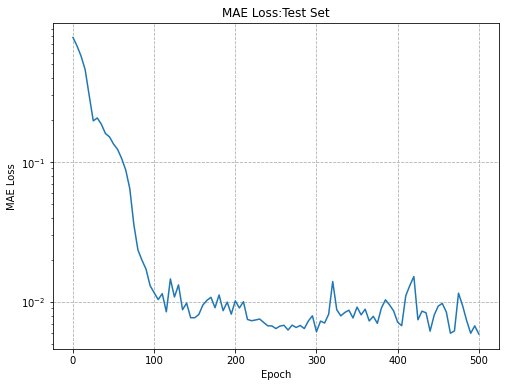

time: 337 ms (started: 2022-09-28 16:24:58 +00:00)


In [67]:
plt.figure(figsize=(8,6))
plt.plot( range(0, 501,5), trainMertonAlloc.validation_mae[:])
plt.yscale('log')
plt.title('MAE Loss:Test Set')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.grid(linestyle="dashed")
# plt.savefig('Merton_Val_MAE.eps', format='eps')


In [45]:
 len(trainMertonAlloc.validation_mae)

101

time: 2.57 ms (started: 2022-09-28 14:48:01 +00:00)


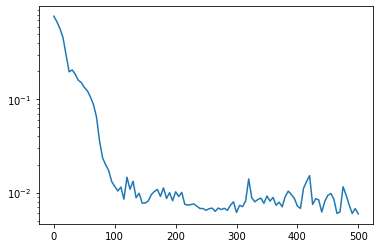

time: 272 ms (started: 2022-09-28 14:48:41 +00:00)


In [47]:
plt.plot( range(0, 501,5), trainMertonAlloc.validation_mae)
plt.yscale('log')

In [ ]:
trainMertonAlloc.validation_losses

In [49]:
def attach_pi_used(x, pi_net, requires_grad=True):
  pi_used = pi_net(x)  
  # pi_used = pi_used[:,0].reshape(-1,1)
  pi_used = pi_used.detach().reshape(-1,1)
  
  before_x = x.detach().clone()
  new_x =  Variable(torch.cat((x, pi_used), dim=1), requires_grad=requires_grad)
  return before_x, new_x

time: 1.53 ms (started: 2022-09-28 14:49:03 +00:00)


In [50]:
def Htx(x, gamma=1):
    # 3.6a in https://arxiv.org/abs/1912.01455v3
    #  wealth * gamma * exp(r*tau)
    part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
    #  0.5* tau *[(mu - r)/sigma]^2
    part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
    return -1.0*torch.exp(-part_a - part_b)

time: 1.41 ms (started: 2022-09-28 14:49:12 +00:00)


In [54]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = 1
internal_sample, terminal_sample = mequation.sample(size=1000, to_cpu=True)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau))
# mequation.pi_net(internal_sample)[:,0]

time: 3.79 ms (started: 2022-09-28 15:01:45 +00:00)


In [63]:
# u_internal_sample = internal_sample
u_internal_sample = val_batch[1]

u_net_results = trainMertonAlloc.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
dataf2
# ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

u_net  closed_form
0    -0.648130    -0.647138
1    -0.867231    -0.864910
2    -0.479898    -0.480698
3    -0.844152    -0.839148
4    -0.409035    -0.407897
...        ...          ...
9995 -0.423356    -0.422318
9996 -0.415922    -0.416532
9997 -0.438559    -0.436345
9998 -0.833548    -0.830805
9999 -0.585456    -0.588064

[10000 rows x 2 columns]

time: 22.8 ms (started: 2022-09-28 15:19:56 +00:00)


In [71]:
pp(np.mean(np.abs(dataf2['u_net']-dataf2['closed_form'])))
pp(np.mean(np.abs(dataf2['u_net']-dataf2['closed_form']))/np.mean(np.abs(dataf2['closed_form'])))
dataf2.shape




# dataf2s = dataf2.sort_values(by='closed_form')
# ggplot(dataf2s, aes(x='u_net', y='closed_form')) + geom_point()

0.0037788200467824937
0.005965879119786173


(10000, 2)

time: 12.4 ms (started: 2022-09-28 16:47:43 +00:00)


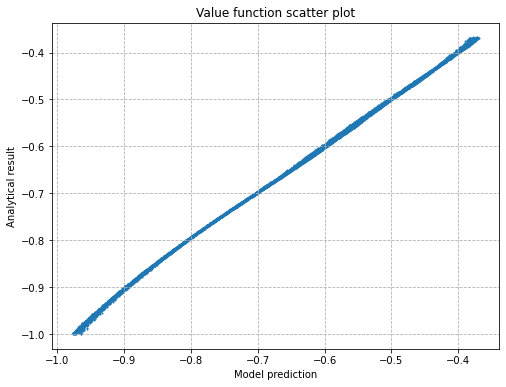

time: 325 ms (started: 2022-09-28 15:02:28 +00:00)


In [58]:
plt.figure(figsize=(8,6))
plt.scatter(u_net_results, htx_results, s=1)
plt.title('Value function scatter plot')
plt.xlabel('Model prediction')
plt.ylabel('Analytical result')
plt.savefig('Merton_scatter.eps', format='eps')
plt.grid(linestyle="dashed")

In [ ]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

8.89245682532021e-05

time: 4.93 ms (started: 2022-07-08 22:33:16 +00:00)


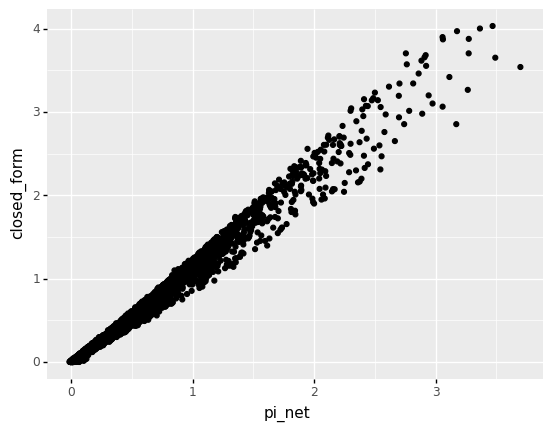

<ggplot: (691324377)>

time: 306 ms (started: 2022-08-15 10:25:29 +01:00)


In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

0.0264241100276824

time: 5.05 ms (started: 2022-07-08 22:33:32 +00:00)


## SABR Model


### SABR Model - Setup

## Black Scholes Basket Option - NOT WORKING

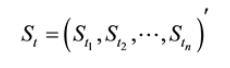

### Black Scholes Basket Option - Setup

#### Levy Pricing of European Basket Option

[Levy pricing european basket options](https://github.com/nluciw/pricing_basket_options/blob/main/playground.ipynb)

In [ ]:
import numpy as np
import pandas as pd
import itertools
from scipy import stats

class BasketOption:
    '''Functions for a European basket call option.'''
    
    def __init__(self, weights, prices, vol, corr, strike, time, rate):
        '''           
        Parameters
        ----------
        weights : ndarray
            Floats representing weights of the underlying assets in the basket. 
            Should sum to 1, be 1-D, and be of length equal to the length of prices.
        prices : ndarray
            Floats representing the asset prices at time zero. Should be 1-D, and same
            length as prices.
        vol : float
            The volatility of the assets. N.B. the Levy formula assumes homogeneous asset
            volatility.
        corr : ndarray
            Correlation matrix of the assets. Should be of shape (n,n), where n is the
            number of assets.
        strike : float
            Strike price.
        time : float
            Time to maturity.
        rate : float
            Riskless interest rate.
        '''
        self.weights = weights
        self.prices = prices
        self.vol = vol
        self.corr = corr
        self.strike = strike
        self.time = time
        self.rate = rate
    
        if not len(weights) == len(prices) == len(corr):
            raise ValueError('Number of weights, prices, corr rows should be equal')
            
        if abs(1-sum(weights))>0.01:
            raise ValueError('The weights must cumulatively sum to 1.0')
            
    def get_levy_price(self):
        """
        Use the Levy formula to approximate the price of a European basket call option.
        """
    
        discount = np.exp(-self.rate*self.time)
    
        # First moment of T-forward prices (also the basket T-forward price)
        m1 = np.sum(self.weights * self.prices * discount)

        # Second moment of T-forward prices
        w_ij, f_ij = [list(map(lambda x: np.product(x), list(itertools.product(q, q)))) 
                          for q in [self.weights, self.prices * discount]]
        m2 = np.sum(np.array(w_ij) * np.array(f_ij)
                    * np.exp(self.corr.flatten() * self.vol**2 * self.time))
    
        vol_basket = ( self.time**(-1) * np.log(m2 / m1**2) )**(0.5)
    
        # Parameters of the price formula
        d1 = np.log(m1 / self.strike)/(vol_basket * self.time**(0.5))\
                + (vol_basket * self.time**(0.5))/2
        d2 = d1 - vol_basket * self.time**(0.5)

        # Levy formula for basket call option price
        self.levy_price = discount * (m1 * stats.norm.cdf(d1) - self.strike * stats.norm.cdf(d2))

        return self.levy_price

time: 61.1 ms (started: 2022-08-14 14:45:25 +00:00)


In [ ]:
# weights = np.array([0.25,0.25,0.25,0.25])
# prices = np.array([100.,100.,100.,100.])
# vol = 0.4
# corr = np.array([[1.,0.5,0.5,0.5],[0.5,1.,0.5,0.5],[0.5,0.5,1.,0.5],[0.5,0.5,0.5,1.]])
# strike = 100.
# time = 5
# rate = 0.
# # levy_formula(weights, prices, vol, corr, strike, time, rate)
# basket_option = BasketOption(weights, prices, vol, corr, strike, time, rate)
# basket_option.get_levy_price()

time: 1.88 ms (started: 2022-08-14 14:45:26 +00:00)


#### MutiStockEuropeanOptionNet

In [ ]:
class MultiStockEuropeanOptionNet(nn.Module):
    def __init__(self , nstocks, NL  , NN, activation = torch.tanh  ):
        super(MultiStockEuropeanOptionNet, self).__init__()
        self.NL = NL
        self.NN = NN
        #  time + Number of stocks
        # ( t , xi)
        self.Input = 5 + nstocks
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        # pdb.set_trace()
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 
    

time: 37.8 ms (started: 2022-08-14 14:45:26 +00:00)


#### AlternativeNet

[implement from github](https://github.com/Plemeur/DGM/blob/master/first_net.py)

In [ ]:
class LinearWithXavier(nn.Module):
    """ Copy of linear module from Pytorch, modified to have a Xavier init,
        TODO : figure out what to do with the bias"""
    def __init__(self, in_features, out_features, bias=True, batch_normalize=False):
        super(LinearWithXavier, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.batch_normalize = batch_normalize
        
        if self.batch_normalize == True:
          self.batch_norm = torch.nn.BatchNorm1d(out_features)
        
        if bias:
            self.bias = torch.nn.Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    
    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight)
        if self.bias is not None:
            torch.nn.init.uniform_(self.bias, -1, 1) #boundary matter?
    
    def forward(self, input):
        if self.batch_normalize == True:
          return self.batch_norm(torch.nn.functional.linear(input, self.weight, self.bias))
        return torch.nn.functional.linear(input, self.weight, self.bias)
    
    def extra_repr(self):
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )


class DGM_layer(nn.Module):
    """ See readme for paper source"""
    def __init__(self, in_features, out_feature, residual=False, batch_normalize=False):
        super(DGM_layer, self).__init__()
        self.residual = residual

        self.Z = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UZ = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.G = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UG = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.R = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UR = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.H = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UH = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)

    def forward(self, x, s):
        z = torch.tanh(self.UZ(x) + self.Z(s))
        g = torch.tanh(self.UG(x) + self.G(s))
        r = torch.tanh(self.UR(x) + self.R(s))
        h = torch.tanh(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class AlternativeNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(AlternativeNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGM_layer(in_size, neurons) for i in range(depth)])
        # self.middle_layer_2 = nn.ModuleList([DGM_layer(in_size, neurons, batch_normalize=False) for i in range(2)])
        self.final_layer = LinearWithXavier(neurons, out_size, batch_normalize=False)
        
    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))
        
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.tanh(layer(X, s))
        
        # s = torch.nn.functional.gelu(self.input_layer(X))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.elu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.gelu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.nn.functional.gelu(layer(X, s))

        return torch.nn.functional.softplus(self.final_layer(s))
        # return torch.pow(self.final_layer(s), 1)


time: 164 ms (started: 2022-08-14 15:09:35 +00:00)


#### MultiStockEuropeanBlackScholesCall

In [ ]:
from torch.distributions.multivariate_normal import MultivariateNormal

class MultiStockEuropeanBlackScholesCall():
    
    def __init__(self , net, K = 1.0, RHO = 0.5, nstocks = 2):
        
        self.C = 0.0
        self.R = 0.05             # Interest Rate (Yearly)
        self.BS_SIGMA = 0.25      # Volatility (Yearly)
        self.RHO = RHO            # Stock correlation
        self.K = K                # Strike Price & S_zeros
        self.T = 1.0              # Maturation time (in YEAR)
        self.MAX_X = K*3.0   # MAX price
        self.prices = torch.tensor([K]).repeat(nstocks)
        self.nstocks = nstocks
        
        self.xbreaks=None # same breaks for all

        ## for accept reject purpose!
        ## free boundry problems
        self.net = net
        # these are the weights on the prices
        # self.weights = None
        # the settings for KL approx
        self.gamma = 1E-4
        self.beta = 1E-4

        self.cov_matrix = self._get_cov_matrix(nstocks,RHO)  
        self.corr_mvn = MultivariateNormal( loc=torch.tensor([0.0]).repeat(nstocks), 
                                            covariance_matrix=self.cov_matrix )  # assuming std_devs of 1

        self.norm_dist = torch.distributions.normal.Normal(loc = torch.tensor([0.0]), scale=torch.tensor([1.0]))

    def _get_cov_matrix(self,nstocks,RHO):
        cov_matrix = np.ones((nstocks, nstocks))*RHO
        np.fill_diagonal(cov_matrix, 1.0)
        return torch.tensor(cov_matrix, dtype=torch.float)

    def get_levy_price(self, supplied = None):
        """
        Use the Levy formula to approximate the price of a European basket call option.
        """    

        weights_used = torch.tensor([1.0/self.nstocks]).repeat(self.nstocks).numpy()

        if supplied is None:
          prices_used = self.prices.numpy()
          vol_used = self.BS_SIGMA
          corr = self.cov_matrix.numpy()
          strike = self.K
          rate = self.R
          time = self.T
          # pdb.set_trace()
          basket_option = BasketOption(weights_used, prices_used, vol_used, corr, strike, time, rate)
          return basket_option.get_levy_price()
        else:
          basket_option_prices = []
          # pdb.set_trace()
          for i in range(supplied.shape[0]):
            prices_used = supplied[i,1:(1+self.nstocks)].numpy()
            vol_used = self.BS_SIGMA
            corr = self.cov_matrix.numpy()
            strike = self.K
            rate = self.R
            time = supplied[i,0].item()
            # pdb.set_trace()
            basket_option = BasketOption(weights_used, prices_used, vol_used, corr, strike, time, rate)
            basket_option_prices.append(basket_option.get_levy_price())
          return basket_option_prices

    def g(self , x):
        # pay off function
        # return torch.max( (x[:,1].reshape(-1,1)*x[:,2].reshape(-1,1)*x[:,3].reshape(-1,1))**(1/3) - 
        #                    self.K , 
        #                    torch.zeros([len(x),1]).cuda() ) #  geometric
        return torch.max( torch.sum(x[:,1:(self.nstocks+1)],dim=1)/self.nstocks  - self.K , 
                          torch.zeros([x.shape[0],]).cuda() ).reshape(-1,1) 

    def mu(self, x):
        ## should test it! output dimension is important !
        return (self.R-self.C)*x.reshape(-1,1)

    def sigma(self , x):
        return self.BS_SIGMA*x.reshape(-1,1)

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def sample_correlated_uniform(self, sample_shape):
        # corrMvn.rsample(sample_shape=(10,))
        correlated_mvn_sample = self.corr_mvn.sample(sample_shape)
        return self.norm_dist.cdf(correlated_mvn_sample)

    def get_utility_function_derivatives(self, u_net_val, x_internal):

        d = torch.autograd.grad(
            u_net_val,
            x_internal, 
            grad_outputs = torch.ones_like(u_net_val) ,
            create_graph = True)
        
        dt  = d[0][:,0].reshape(-1,1)

        first_derivs_wrt_underlying  = [ d[0][:,i+1].reshape(-1,1) for i in range(self.nstocks) ]
        cross_derivatives_wrt_underlying = [ [ torch.autograd.grad(first_derivs_wrt_underlying[i], 
                                                                   x_internal , 
                                                                   grad_outputs=torch.ones_like(first_derivs_wrt_underlying[i]) ,
                                                                   create_graph = True)[0][:,z+1].reshape(-1,1)
                                               for z in range(len(first_derivs_wrt_underlying)) ]  for i in range(len(first_derivs_wrt_underlying)) ]

        return dt, first_derivs_wrt_underlying, cross_derivatives_wrt_underlying


    def sample(self ,size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        # 4 samples returned:
        # internal, boundary, initial, terminal
        # pdb.set_trace()
        range_multiplier = 1.0

        # internal samples
        S_internal_values = (self.sample_correlated_uniform([size,self.nstocks-1]) * self.MAX_X).squeeze()
        if self.xbreaks is not None:
          if not isinstance(self.xbreaks, list):
            self.xbreaks = np.linspace(0.0, 1.0,self.xbreaks-1).tolist()    
            # default to an evenly sampled space
            # 4 breaks means 3 buckets
          S_internal_values = torch.ones([size, self.nstocks])*0.
          number_per_bucket = int(size/(len(self.xbreaks)-1)) 
          # pdb.set_trace()
          for bx in range(len(self.xbreaks)-1): 
            start_idx = bx*number_per_bucket
            end_idx = (bx+1)*number_per_bucket
            S_internal_values[start_idx:end_idx,:] = ((self.xbreaks[bx] + self.sample_correlated_uniform([end_idx-start_idx,self.nstocks-1])* (self.xbreaks[bx+1]-self.xbreaks[bx]))*self.MAX_X).squeeze()
            # (self.xbreaks[bx] + (1 - torch.rand([number_per_bucket, 1])) * (self.xbreaks[bx+1] - self.xbreaks[bx])) * self.MAX_S

        maturity_time = (1 - torch.rand([size, 1]))*self.T
        t_internal_values = torch.rand([size,1]) * maturity_time
        strike_values = torch.rand([size, 1]) * self.K
        risk_free_rate = torch.rand([size, 1])*self.R
        std_dev_of_stock = (1 - torch.rand([size, 1]))*self.BS_SIGMA

        # pdb.set_trace()
        xvt_internal = self.to_device(torch.cat(( t_internal_values, S_internal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock), dim = 1 ), to_cpu)

        ### Terminal time samples
        S_terminal_values = (self.sample_correlated_uniform([size,self.nstocks-1]) * self.MAX_X).squeeze()
        if self.xbreaks is not None:
          S_terminal_values =torch.ones([size, self.nstocks])*0.
          number_per_bucket = int(size/(len(self.xbreaks)-1))           
          for bx in range(len(self.xbreaks)-1): 
            start_idx = bx*number_per_bucket
            end_idx = (bx+1)*number_per_bucket
            S_terminal_values[start_idx:end_idx,:] = ((self.xbreaks[bx] + self.sample_correlated_uniform([end_idx-start_idx,self.nstocks-1])* (self.xbreaks[bx+1]-self.xbreaks[bx]))*self.MAX_X).squeeze()
            # (self.xbreaks[bx] + (1 - torch.rand([number_per_bucket, 1])) * (self.xbreaks[bx+1] - self.xbreaks[bx])) * self.MAX_S

        maturity_time = (1 - torch.rand([size, 1])) * self.T
        t_terminal_values = maturity_time
        strike_values = torch.rand([size, 1]) * self.K
        risk_free_rate = torch.rand([size, 1]) * self.R
        std_dev_of_stock = (1 - torch.rand([size, 1])) * self.BS_SIGMA

        xvt_terminal = self.to_device(torch.cat(( t_terminal_values , S_terminal_values, strike_values, maturity_time, risk_free_rate, std_dev_of_stock) , dim = 1 ),to_cpu)

        # ### initial time samples
        # x_initial = self.to_device(torch.cat( ( torch.zeros(size, 1), self.K*torch.ones( size, self.nstocks)) , dim = 1 ),to_cpu)
        # ### non-zero
        # stock_space = self.K*0.8*self.sample_correlated_uniform([size, ]) # if self.is_call else self.K*(1.2 + torch.rand([size, self.nstocks]))
        # # pdb.set_trace()
        # x_nonzero = self.to_device(torch.cat( ( torch.rand((size,1))*self.T, stock_space ) , dim = 1 ),to_cpu)
        # compare = self.net(x_nonzero) 
        # mask = compare < 0
        # x_nonzero = x_nonzero[mask.reshape(-1),:]
        # # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()

        return xvt_internal , xvt_terminal
    

    def criterion(self , x_internal , x_terminal, loss_transform = torch.square, 
                  print_val=False, 
                  to_cpu=False, 
                  supervised_data=None,
                  apply_structural_loss = True,
                  gamma=None):
        '''
        Loss function that helps network find solution to equation
        '''        

        pred_values = self.net(x_internal)
        # pred_values_pinn = self.net(self.pinn_sample_internal)
        dt, first_derivs_wrt_underlying, cross_derivatives_wrt_underlying = self.get_utility_function_derivatives(pred_values, x_internal)

        # above_boundary = dt + self.mu(x[:,1])*( dx1 ) + self.mu(x[:,2])*( dx2 ) + self.mu(x[:,3])*( dx3 ) + \
        #                         0.5*(  (self.sigma(x[:,1])*self.sigma(x[:,1]))*dx1x1  \
        #                     + self.RU*(self.sigma(x[:,1])*self.sigma(x[:,2]))*dx1x2  \
        #                     + self.RU*(self.sigma(x[:,1])*self.sigma(x[:,3]))*dx1x3  \
        #                     + self.RU*(self.sigma(x[:,2])*self.sigma(x[:,1]))*dx2x1  \
        #                     + (self.sigma(x[:,2])*self.sigma(x[:,2]))*dx2x2  \
        #                     + self.RU*(self.sigma(x[:,2])*self.sigma(x[:,3]))*dx2x3  \
        #                     + self.RU*(self.sigma(x[:,3])*self.sigma(x[:,1]))*dx3x1  \
        #                     + self.RU*(self.sigma(x[:,3])*self.sigma(x[:,2]))*dx3x2  \
        #                     + (self.sigma(x[:,3])*self.sigma(x[:,3]))*dx3x3 ) - self.R*self.net(x)

        above_xs_first_derivs = torch.zeros([x_internal.shape[0],self.nstocks]).cuda().float()          

        for i in range(len(first_derivs_wrt_underlying)):
          above_xs_first_derivs[:,i] =  (self.mu(x_internal[:,i+1])*first_derivs_wrt_underlying[i]).reshape(1,-1)
        above_xs_first_derivs = torch.sum(above_xs_first_derivs, dim=1)
        
        above_xs_second_derivs = torch.zeros((x_internal.shape[0],self.nstocks,self.nstocks)).cuda().float()
        for i in range(len(first_derivs_wrt_underlying)):
          for j in range(len(first_derivs_wrt_underlying)):
              if i<=j:
                above_xs_second_derivs[:,i,j] = (0.5*self.cov_matrix[i,j]*self.sigma(x_internal[:,i+1])*self.sigma(x_internal[:,j+1])*cross_derivatives_wrt_underlying[i][j]).reshape(1,-1)          
        above_xs_second_derivs = torch.einsum("ijk->i", above_xs_second_derivs)

        above_boundary = dt.reshape(-1) + above_xs_first_derivs + above_xs_second_derivs - self.R*pred_values.reshape(-1)
        intC = loss_transform(above_boundary).reshape(-1,1)

        terC = loss_transform( self.g(x_terminal) - self.net(x_terminal) )


        cross_derivatives_wrt_underlying_as_tensor = []
        for xl in range(len(cross_derivatives_wrt_underlying)):
          cross_derivatives_wrt_underlying_as_tensor.append(torch.cat(cross_derivatives_wrt_underlying[xl],dim=1))
        cross_derivatives_wrt_underlying_as_tensor = torch.cat(cross_derivatives_wrt_underlying_as_tensor, dim =1 )
        cross_derivatives_wrt_underlying_as_tensor.to(x_internal.device)


        first_derivs_wrt_underlying_as_tensor = []
        for xl in range(len(first_derivs_wrt_underlying)):
          first_derivs_wrt_underlying_as_tensor.append(first_derivs_wrt_underlying[xl])
        first_derivs_wrt_underlying_as_tensor = torch.cat(first_derivs_wrt_underlying_as_tensor, dim =1 )
        first_derivs_wrt_underlying_as_tensor.to(x_internal.device)

        structured_loss = None
        if apply_structural_loss:
          #print(torch.mean(dT), torch.mean(dK1dK1))

          condition_1 = torch.max(torch.zeros(x_internal.shape[0], 1).to(x_internal.device), dt ).sum()
          condition_2 = torch.max(torch.ones_like(cross_derivatives_wrt_underlying_as_tensor)*0.0, -cross_derivatives_wrt_underlying_as_tensor).sum()
          condition_3 = torch.max(torch.ones_like(first_derivs_wrt_underlying_as_tensor)*0.0, -first_derivs_wrt_underlying_as_tensor).sum()

          struct_coef = 1
          structured_loss = struct_coef * (condition_1 + condition_2 + condition_3)
          #print('struct', structured_loss.shape)
          structured_loss = structured_loss # note that this is kept as flags?!
        else:
          structured_loss = torch.empty(0).cuda().float()

        structured_loss = loss_transform(structured_loss)

        # pdb.set_trace()

        if supervised_data is not None:
          supervised_coef = 1.
          input_bs = supervised_data['msbs_input']
          target = supervised_data['msbs_analytical_sol']
          prediction = self.net(input_bs)
          supervised_loss = target - prediction
        else:
          supervised_loss =  torch.empty(0).cuda().float()

        supervised_loss = loss_transform(supervised_loss)

        # 4.1 in paper - note self.net(x) for u(x,t), difference supposed to be zero
        # Domain 
        #DO = (dt + 0.5*self.RU*(self.SIGMA**2)*(x[:,1].reshape(-1,1)**2)*dxx - self.R*self.net(x) + (self.R-self.C)*x[:,1].reshape(-1,1)*dx)**2

        # pdb.set_trace()
        # Terminal Condition - should be equal (both in- and out of the money)

        # Boundry Condition - below the payoff value, it should still be worth something for optionality
        # len() is safe here , because it just shows batch number 
        # if( len(x_boundary) != 0):
        #     BC = loss_transform( torch.max( self.g(x_boundary) - self.net(x_boundary), torch.zeros([len(x_boundary),1]).cuda() ) )
        # else:
        #     # print('zero batch size for outside domain!')
        #     BC = torch.tensor(0).cuda().float()
        
        return  intC , terC, structured_loss, supervised_loss

    def calculateLoss(self , batch_x, train = True, loss_transform = None, keep_batch = False, 
                      print_val=False, 
                      supervised_data=None, 
                      apply_structural_loss=True,
                      gamma=None):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        x_internal , x_terminal   = batch_x # x_initial# 
        x = Variable(x_internal , requires_grad=True)
        Ls = self.criterion( x , x_terminal , loss_transform = loss_transform, print_val=print_val, supervised_data=supervised_data, gamma=gamma, apply_structural_loss=apply_structural_loss) 
        intC , terC, structLoss, supervisedLoss = Ls 

        numActive = 2
        has_structural = structLoss.numel()>0
        has_pinn =  supervisedLoss.numel()>0
        if has_structural:
          numActive = numActive+1
        if has_pinn:
          numActive = numActive+1

        if gamma is None:
          return_losses = []
          if not keep_batch:
            loss_equalWeightedByType =  1./numActive*torch.mean(intC) + 1./numActive*torch.mean(terC) 
            if has_structural:
              loss_equalWeightedByType =  loss_equalWeightedByType + 1./numActive*torch.mean(structLoss)
            if has_pinn:
              loss_equalWeightedByType =  loss_equalWeightedByType + 1./numActive*torch.mean(supervisedLoss)

            return_losses.append( [ loss_equalWeightedByType , 
                                    1./numActive*torch.mean(intC), 
                                    1./numActive*torch.mean(terC),
                                    1./numActive*torch.mean(structLoss) if has_structural else 0.0,
                                    1./numActive*torch.mean(supervisedLoss) if has_pinn else 0.0 ] )      
          else:
            return_losses.append( [intC.numpy(), terC.numpy(), structLoss.numpy(), supervisedLoss.numpy()] )

          return return_losses
        else:
          weights = torch.ones(1,len(Ls)).to(intC.device)/numActive
          intC_max = torch.max(intC).item() # torch.ones_like(intC)*
          terC_max = torch.max(terC).item() # torch.ones_like(terC)*

          return_losses = []
          intCt = weights[0,0] * (1.0/intC.numel() if intC.numel() > 0 else 0.0) * torch.sum( torch.exp(gamma * (intC - intC_max))) 
          terCt = weights[0,1] * (1.0/terC.numel() if terC.numel() > 0 else 0.0) * torch.sum( torch.exp(gamma * (terC - terC_max))) 

          structuredLosst = torch.ones_like(terCt)*0.
          structuredLoss_max = 0.0
          if has_structural:
            structuredLoss_max = torch.max(structLoss).item() # torch.ones_like(supervisedLoss)*
            structuredLosst = weights[0,2] * (1.0/structLoss.numel() if structLoss.numel() > 0 else 0.0) * torch.sum(torch.exp(gamma * (structLoss - structuredLoss_max) )) 

          supervisedLosst = torch.ones_like(terCt)*0.
          supervisedLoss_max = 0.0
          if has_pinn:
            supervisedLoss_max = torch.max(supervisedLoss).item() 
            supervisedLosst = weights[0,2] * (1.0/supervisedLoss.numel() if supervisedLoss.numel() > 0 else 0.0) * torch.sum(torch.exp(gamma * (supervisedLoss - supervisedLoss_max) )) 

          if not keep_batch:
            transformed_loss = (intC_max + terC_max + structuredLoss_max + supervisedLoss_max) + 1.0/gamma * torch.log(intCt + terCt  + structuredLosst + supervisedLosst)
            return_losses.append( [ transformed_loss , 
                                    1./numActive*torch.mean(intCt), 
                                    1./numActive*torch.mean(terCt),
                                    1./numActive*torch.mean(structuredLosst),
                                    1./numActive*torch.mean(supervisedLosst)  ] )            
          else:
            return_losses.append( [intCt.numpy(), terCt.numpy(), structuredLosst.numpy(), supervisedLosst.numpy()] )
          return return_losses

    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample
    

time: 1.7 s (started: 2022-08-14 15:35:15 +00:00)


In [ ]:
# loss_terms = [ 34.25, 100.12, 23.45]
# target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*loss_terms

time: 705 µs (started: 2022-08-14 14:45:29 +00:00)


#### TrainMultiStockEuropeanBlackScholesCall

In [ ]:
class TrainMultiStockEuropeanBlackScholesCall():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        self.history_mean_hooks = [] 
        self.history_surfaces_hooks = None       
        self.history_tl = []
        self.history_internal = []
        self.history_terminal = []
        self.history_initial = []              
        self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.TOTAL_SIZE = 100000
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.monitored_loss_type = "Train_L2"
        self.early_stop_counter = 0

        self.stop_epoch = 0

        self.validation_sample = None
        self.validation_losses = None
        self.train_losses = None        
        self.vaildation_data_mae = []

    def train(self , epoch , lr, eqLossFn = 'calculateLoss', key_loss_func = torch.square,
              validation_data=None, 
              supervised_data=None, 
              apply_structural_loss=True,
              gamma=None):
        
        # self.validation_losses = np.ones((epoch, 4), dtype='float32') * np.nan
        # self.train_losses = np.ones((epoch, 4 ), dtype='float32') * np.nan

        self.net.train()
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))

        # full_dataset = self.model.sample(size=self.BATCH_SIZE)
        # full_batch_internal = DataLoader(full_dataset[0], batch_size=self.BATCH_SIZE)
        # full_batch_terminal = DataLoader(full_dataset[1], batch_size=self.BATCH_SIZE)

        counter = 0
        for e in tqdm(range(epoch)):
            # optimizer.zero_grad()

            loss_avg = 0.0
            i = 0
            sample_batch = self.model.sample(size=self.BATCH_SIZE)
            sample_int, sample_term = sample_batch

            optimizer.zero_grad()  
            losses_L2  = loss_calc_method( sample_batch, loss_transform = torch.square, keep_batch = False,
                                          print_val =  (e % self.hook_interval == (self.hook_interval-1)), 
                                          supervised_data=supervised_data, apply_structural_loss=apply_structural_loss, gamma=gamma
                                          )
            # pdb.set_trace()
            loss , internal , terminal, structure, supervised = losses_L2[0] # internal losses
            # pdb.set_trace()
            # loss , internal , terminal , initial, losses_equalWeightedByType = losses_L2
            # loss_abs , internal_abs , terminal_abs , initial_abs, nonzero_abs, losses_equalWeightedByType_abs = losses_ABS

            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            i += 1
            counter += 1

            # max_loss_L2 = torch.max(torch.tensor([loss , internal , terminal, structure, supervised ]))
            # self.train_losses[e,:] = [ to_cpu_detach(loss) , to_cpu_detach(internal) , to_cpu_detach(terminal) , to_cpu_detach(initial) ]

            if validation_data is not None:
                input_data = validation_data['msbs_input']
                target = validation_data['msbs_analytical_sol']
                
                # prediction = trainEuss.net(input_data) + bs_pred
                prediction = self.net(input_data)

                self.vaildation_data_mae.append(torch.abs(target - prediction).cpu().detach().numpy().mean())

            if self.use_early_stop:
              loss_to_check = loss
              if self.monitored_loss_type == "Train_L2":
                pass
              # elif self.monitored_loss_type == "Train_MAXL2":             
              #   loss_to_check = max_loss_L2

              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                self.stop_epoch = e
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break

            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss_avg = loss_avg/self.hook_interval
                # print("Epoch {} - lr {} -  key loss: {}".format(e , lr , loss ))

            self.stop_epoch = e

    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      # df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
      colnames =["Time"]
      colnames.extend([f"S{x+1}" for x in range(self.model.nstocks)])
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = colnames)
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample



time: 236 ms (started: 2022-08-14 15:01:15 +00:00)


#### Create PiNN, validation and test set for MultiStock

In [ ]:
def mc_basket_option_price(input, n_steps = 100, n_stocks = 2, rho = 0.0):
    Zs = torch.normal(mean=torch.zeros([n_steps,1]), std=torch.ones([n_steps,1])).to(input.device)
    Eps = torch.normal(mean=torch.zeros([n_stocks,n_steps]), std=torch.ones([n_stocks,n_steps])).to(input.device)

    initial_S = input[:,1:(1+n_stocks)].to(input.device)
    sigma_S = input[:,-1].to(input.device)
    r = input[:,-2].to(input.device)
    T = input[:,-3].to(input.device)
    K = input[:,-4].to(input.device)

    outcomes_of_all_paths = [input.shape[0], n_stocks, n_steps]
    rhof1 = np.sqrt(rho)
    rhof2 = np.sqrt(1.0-rho)
    zeros_for_payoff = torch.zeros([input.shape[0]]).to(input.device)
    
    simulated_terminal_S = torch.zeros(outcomes_of_all_paths).to(input.device)
    simulated_payoffs = torch.zeros([input.shape[0], n_steps]).to(input.device)

    for i in range(n_steps):
      a1 = ((r - 0.5*torch.square(sigma_S))*T)[:, None]
      a2 = (sigma_S*torch.sqrt(T)).reshape(-1,1)*(Zs[i,0].item()*rhof1 + rhof2*Eps[:,i])
      simulated_terminal_S[:,:,i] = initial_S*torch.exp( a1 + a2 )
      simulated_payoffs[:,i] = torch.max( (1./n_stocks)*torch.sum(simulated_terminal_S[:,:,i],dim=1)-K, zeros_for_payoff )
      
    # pdb.set_trace()
    prices = (1.0/n_steps)*torch.sum(simulated_payoffs, dim=1).to(input.device)
    return prices


time: 31.3 ms (started: 2022-08-14 15:00:07 +00:00)


In [ ]:
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

msbs_sample_creator = MultiStockEuropeanBlackScholesCall(None, K=1.0, RHO=0.75, nstocks=2)

supervised_data = dict()
supervised_data['msbs_input'] = msbs_sample_creator.sample(size = 2**12)[0]
supervised_data['msbs_analytical_sol'] = mc_basket_option_price(supervised_data['msbs_input'], n_steps=20000, n_stocks=2, rho = 0.75)
supervised_data['msbs_analytical_sol'].cuda()
supervised_data['msbs_input'].cuda()

validation_data = dict()
validation_data['msbs_input'] = msbs_sample_creator.sample(size = 2**12)[0]
validation_data['msbs_analytical_sol'] = mc_basket_option_price(validation_data['msbs_input'], n_steps=20000, n_stocks=2, rho = 0.75)
validation_data['msbs_analytical_sol'].cuda()
validation_data['msbs_input'].cuda()

test_data = dict()
test_data['msbs_input'] = msbs_sample_creator.sample(size = 2**12)[0]
test_data['msbs_analytical_sol'] = mc_basket_option_price(test_data['msbs_input'], n_steps=20000, n_stocks=2, rho = 0.75)
test_data['msbs_analytical_sol'].cuda()
test_data['msbs_input'].cuda()

pp(supervised_data['msbs_input'].shape)
pp(validation_data['msbs_input'].shape)
pp(test_data['msbs_input'].shape)


torch.Size([4096, 7])
torch.Size([4096, 7])
torch.Size([4096, 7])
time: 30.6 s (started: 2022-08-14 15:00:11 +00:00)


In [ ]:
test_sol = test_data['msbs_analytical_sol'].cpu()
validation_sol = validation_data['msbs_analytical_sol'].cpu()
supervised_sol = supervised_data['msbs_analytical_sol'].cpu()

test_input = test_data['msbs_input'].cpu()
validation_input = validation_data['msbs_input'].cpu()
supervised_input = supervised_data['msbs_input'].cpu()


time: 9.36 ms (started: 2022-08-14 15:05:11 +00:00)


In [ ]:
# torch.normal(mean=torch.zeros([2,2]), std=torch.ones([2,2]))
# torch.zeros([4,1])
# torch.ones([4,1])
# test_input = msequation.sample(size=10) # .to(torch.device("cuda:0"))

time: 1.02 ms (started: 2022-08-14 14:58:11 +00:00)


In [ ]:
# np.set_printoptions(suppress=True)
# torch.round(test_input[0],decimals=3).cpu().numpy()

time: 690 µs (started: 2022-08-14 14:58:11 +00:00)


In [ ]:
# pp(list(test_input[0].shape))
# # pp(test_input[1].shape)n
# np.set_printoptions(suppress=True)
# pp(np.round(test_input[0].cpu().numpy(),3)) # 0 is the internal, 1 is the terminal
# test_input[0].cpu()[:,-3]
# # np.sqrt(4.5)n

# torch.max( torch.rand([10,2]), torch.ones([10,2])*0.5)
# mc_basket_option_price(test_input[0], rho = 0.5)

time: 1.37 ms (started: 2022-08-14 14:58:11 +00:00)


### Black Scholes Multi Basket Runs for Paper

####  BASIC DGM ON MSBS

In [ ]:
pp(supervised_data['msbs_analytical_sol'].shape[0])
msequation.sample_correlated_uniform([100,msequation.nstocks-1]).shape

4096


torch.Size([100, 1, 2])

time: 18.6 ms (started: 2022-08-14 15:00:41 +00:00)


In [ ]:
##### BASIC DGM ON MSBS ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
lr = 0.0002

net = MultiStockEuropeanOptionNet(  nstocks = 2, NL = 5, NN = 128, activation=torch.tanh)
net.to(torch.device("cuda:0")) 
msequation = MultiStockEuropeanBlackScholesCall(net, K=1.0, RHO=0.75, nstocks=2)

trainEuss_no_supervised_no_struct = TrainMultiStockEuropeanBlackScholesCall( net , msequation, BATCH_SIZE = supervised_data['msbs_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_no_supervised_no_struct.hook_interval = 5000
trainEuss_no_supervised_no_struct.train(epoch = 100, 
                                        lr = lr, 
                                        eqLossFn = eqLossFn , 
                                        validation_data=validation_data, 
                                        supervised_data=None, 
                                        apply_structural_loss=False)
trainEuss_no_supervised_no_struct.net.to(torch.device("cuda:0"))


100%|██████████| 100/100 [00:12<00:00,  8.01it/s]


MultiStockEuropeanOptionNet(
  (fc_input): Linear(in_features=7, out_features=128, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
  )
  (fc_output): Linear(in_features=128, out_features=1, bias=True)
)

time: 12.6 s (started: 2022-08-14 15:17:56 +00:00)


0.4308385


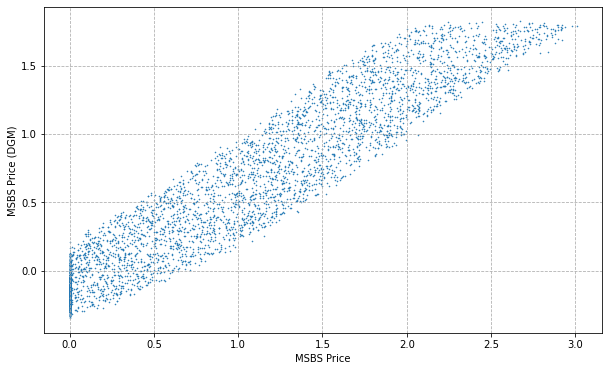

time: 1.04 s (started: 2022-08-14 15:18:08 +00:00)


In [ ]:
net_cpu = trainEuss_no_supervised_no_struct.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(test_sol).numpy(), torch.flatten(net_cpu(test_input)).detach().numpy(), s=.3)
plt.xlabel('MSBS Price')
plt.ylabel('MSBS Price (DGM)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(test_sol).numpy() -torch.flatten(net_cpu(test_input)).detach().numpy() )))

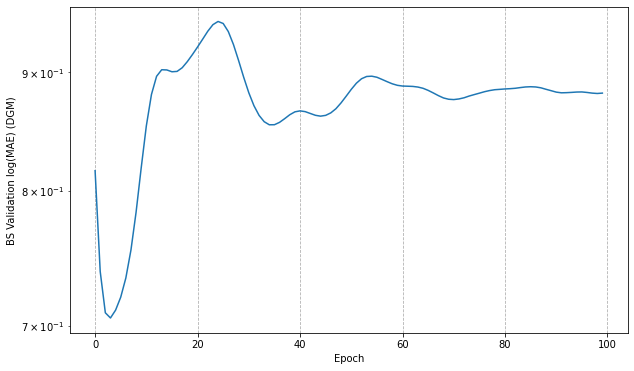

time: 1.47 s (started: 2022-08-14 15:18:09 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_no_supervised_no_struct.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('BS Validation log(MAE) (DGM)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

mod_name = "MSBS"
fit_name = "trainEuss_no_supervised_no_struct"
val_mae_df = pd.DataFrame({ 'model' : mod_name, 'name': fit_name, 
                            'data' : trainEuss_no_supervised_no_struct.vaildation_data_mae })
val_mae_df.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv")


In [ ]:
paper_name

'turbocharging_dgm'

time: 3.84 ms (started: 2022-08-13 20:37:51 +00:00)


#### DGM w/ IS ON MSBS

In [ ]:
##### DGM w/ IS ON MSBS ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
lr = 0.0002
gamma=1.0

net = MultiStockEuropeanOptionNet(  nstocks = 2, NL = 5, NN = 128, activation=torch.tanh)
net.to(torch.device("cuda:0")) 
msequation = MultiStockEuropeanBlackScholesCall(net, K=1.0, RHO=0.75, nstocks=2)

trainEuss_IS = TrainMultiStockEuropeanBlackScholesCall( net , msequation, BATCH_SIZE = supervised_data['msbs_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_IS.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , validation_data=validation_data, supervised_data=None, apply_structural_loss=False, gamma=gamma)
trainEuss_IS.net.to(torch.device("cuda:0"))


100%|██████████| 100/100 [00:12<00:00,  7.96it/s]


MultiStockEuropeanOptionNet(
  (fc_input): Linear(in_features=7, out_features=128, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
  )
  (fc_output): Linear(in_features=128, out_features=1, bias=True)
)

time: 12.6 s (started: 2022-08-14 15:23:28 +00:00)


0.4333784


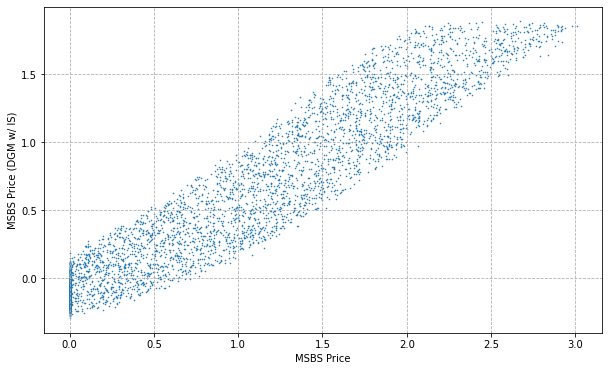

time: 521 ms (started: 2022-08-14 15:23:42 +00:00)


In [ ]:
net_cpu = trainEuss_IS.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(test_sol).numpy(), torch.flatten(net_cpu(test_input)).detach().numpy(), s=.3)
plt.xlabel('MSBS Price')
plt.ylabel('MSBS Price (DGM w/ IS)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(test_sol).numpy() -torch.flatten(net_cpu(test_input)).detach().numpy() )))

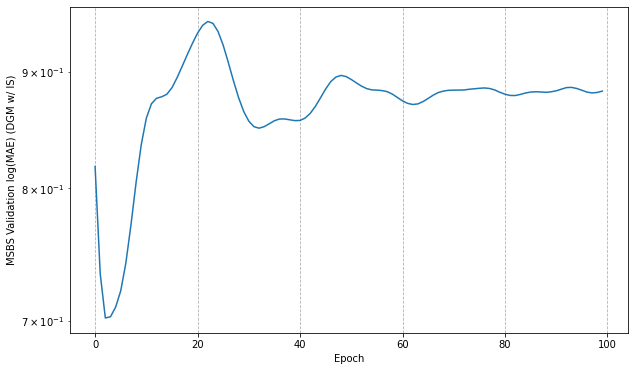

time: 688 ms (started: 2022-08-14 15:23:58 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_IS.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('MSBS Validation log(MAE) (DGM w/ IS)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

mod_name = "MSBS"
fit_name = "trainEuss_IS"
val_mae_df = pd.DataFrame({ 'model' : mod_name, 'name': fit_name, 
                            'data' : trainEuss_IS.vaildation_data_mae })
val_mae_df.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv", index=False)

#### DGM w/ ST ON MSBS

In [ ]:
##### DGM w/ ST ON MSBS ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
lr = 0.0002
gamma=1.0

net = MultiStockEuropeanOptionNet(  nstocks = 2, NL = 5, NN = 128, activation=torch.tanh)
net.to(torch.device("cuda:0")) 
msequation = MultiStockEuropeanBlackScholesCall(net, K=1.0, RHO=0.75, nstocks=2)
msequation.xbreaks = np.linspace(0.0,1.0,4).tolist()
# np.concatenate([np.linspace(0.0,0.2,4),np.linspace(0.4,0.8,4),np.linspace(0.8,1.0,5)[1:]]).tolist()

trainEuss_ST = TrainMultiStockEuropeanBlackScholesCall( net , msequation, BATCH_SIZE = supervised_data['msbs_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_ST.hook_interval = 5
trainEuss_ST.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , validation_data=validation_data, supervised_data=None, apply_structural_loss=False)
trainEuss_ST.net.to(torch.device("cuda:0"))


100%|██████████| 100/100 [00:13<00:00,  7.37it/s]


MultiStockEuropeanOptionNet(
  (fc_input): Linear(in_features=7, out_features=128, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
  )
  (fc_output): Linear(in_features=128, out_features=1, bias=True)
)

time: 13.6 s (started: 2022-08-14 15:29:39 +00:00)


0.4250039


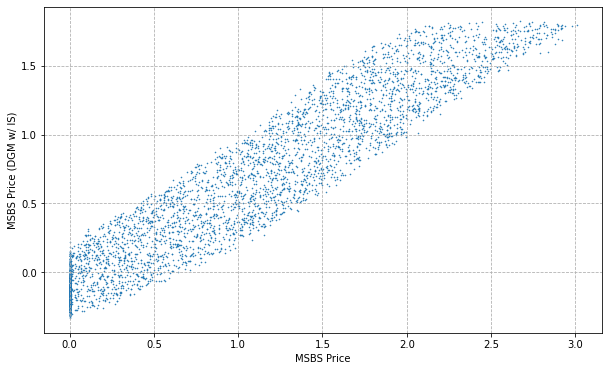

time: 540 ms (started: 2022-08-14 15:30:45 +00:00)


In [ ]:
net_cpu = trainEuss_ST.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(test_sol).numpy(), torch.flatten(net_cpu(test_input)).detach().numpy(), s=.3)
plt.xlabel('MSBS Price')
plt.ylabel('MSBS Price (DGM w/ IS)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(test_sol).numpy() -torch.flatten(net_cpu(test_input)).detach().numpy() )))

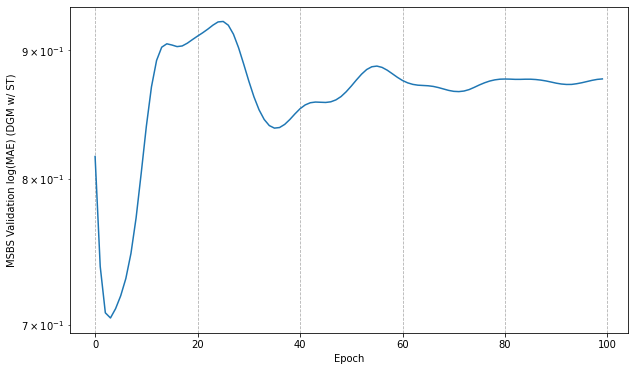

time: 1.24 s (started: 2022-08-14 15:30:46 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_ST.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('MSBS Validation log(MAE) (DGM w/ ST)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

mod_name = "MSBS"
fit_name = "trainEuss_ST"
val_mae_df = pd.DataFrame({ 'model' : mod_name, 'name': fit_name, 
                            'data' : trainEuss_ST.vaildation_data_mae })
val_mae_df.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv", index=False)

#### DGM w/ CONSTR ON MSBS

In [ ]:
##### DGM w/ CONSTR ON MSBS ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
lr = 0.0002
gamma=1.0

net = MultiStockEuropeanOptionNet(  nstocks = 2, NL = 5, NN = 128, activation=torch.tanh)
net.to(torch.device("cuda:0")) 
msequation = MultiStockEuropeanBlackScholesCall(net, K=1.0, RHO=0.75, nstocks=2)

trainEuss_CONSTR = TrainMultiStockEuropeanBlackScholesCall( net , msequation, BATCH_SIZE = supervised_data['msbs_analytical_sol'].shape[0]+2048*2*2 , debug = True )
trainEuss_CONSTR.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , validation_data=validation_data, supervised_data=None, apply_structural_loss=True)
trainEuss_CONSTR.net.to(torch.device("cuda:0"))


100%|██████████| 100/100 [00:13<00:00,  7.52it/s]


MultiStockEuropeanOptionNet(
  (fc_input): Linear(in_features=7, out_features=128, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
  )
  (fc_output): Linear(in_features=128, out_features=1, bias=True)
)

time: 13.3 s (started: 2022-08-14 15:33:57 +00:00)


1.4450288


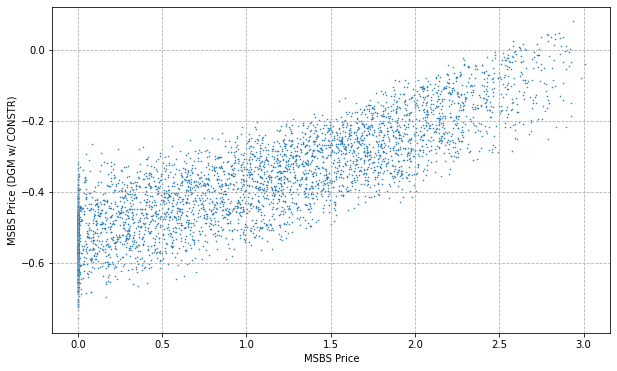

time: 484 ms (started: 2022-08-14 15:34:10 +00:00)


In [ ]:
net_cpu = trainEuss_CONSTR.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(test_sol).numpy(), torch.flatten(net_cpu(test_input)).detach().numpy(), s=.3)
plt.xlabel('MSBS Price')
plt.ylabel('MSBS Price (DGM w/ CONSTR)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(test_sol).numpy() -torch.flatten(net_cpu(test_input)).detach().numpy() )))

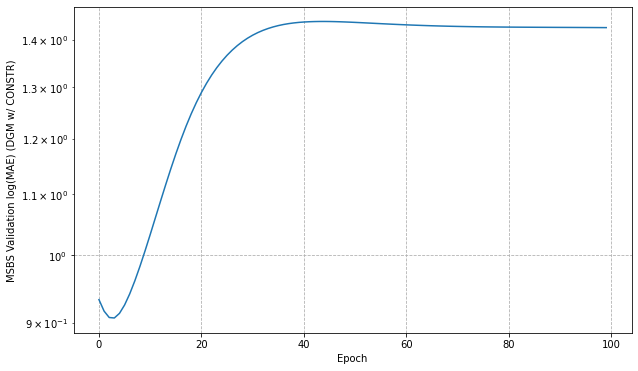

time: 788 ms (started: 2022-08-14 15:34:11 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_CONSTR.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('MSBS Validation log(MAE) (DGM w/ CONSTR)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

mod_name = "MSBS"
fit_name = "trainEuss_CONSTR"
val_mae_df = pd.DataFrame({ 'model' : mod_name, 'name': fit_name, 
                            'data' : trainEuss_CONSTR.vaildation_data_mae })
val_mae_df.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv", index=False)

#### DGM w/ PiNN ON MSBS

In [ ]:
##### DGM w/ PiNN ON HESTON ###########
seed = 1234
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
lr = 0.0002
gamma=1.0

net = MultiStockEuropeanOptionNet(  nstocks = 2, NL = 5, NN = 128, activation=torch.tanh)
net.to(torch.device("cuda:0")) 
msequation = MultiStockEuropeanBlackScholesCall(net, K=1.0, RHO=0.75, nstocks=2)

trainEuss_PiNN = TrainMultiStockEuropeanBlackScholesCall( net , msequation, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_PiNN.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=False)
trainEuss_PiNN.net.to(torch.device("cuda:0"))


100%|██████████| 100/100 [00:08<00:00, 11.96it/s]


MultiStockEuropeanOptionNet(
  (fc_input): Linear(in_features=7, out_features=128, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
  )
  (fc_output): Linear(in_features=128, out_features=1, bias=True)
)

time: 8.42 s (started: 2022-08-14 15:35:21 +00:00)


0.47143403


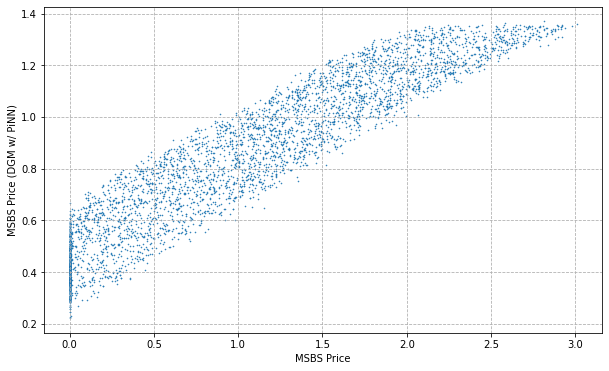

time: 354 ms (started: 2022-08-14 15:35:29 +00:00)


In [ ]:
net_cpu = trainEuss_PiNN.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(test_sol).numpy(), torch.flatten(net_cpu(test_input)).detach().numpy(), s=.3)
plt.xlabel('MSBS Price')
plt.ylabel('MSBS Price (DGM w/ PiNN)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(test_sol).numpy() -torch.flatten(net_cpu(test_input)).detach().numpy() )))

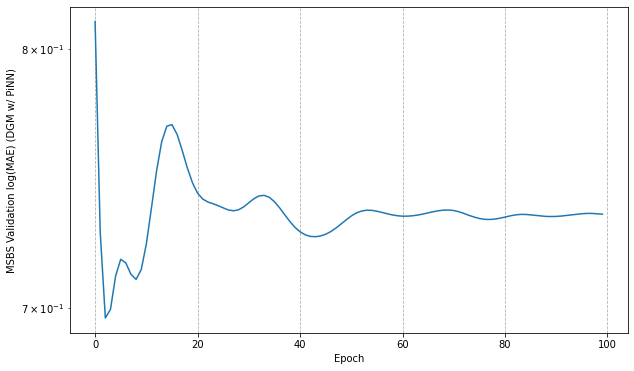

time: 949 ms (started: 2022-08-14 15:35:39 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_PiNN.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('MSBS Validation log(MAE) (DGM w/ PiNN)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

mod_name = "MSBS"
fit_name = "trainEuss_PiNN"
val_mae_df = pd.DataFrame({ 'model' : mod_name, 'name': fit_name, 
                            'data' : trainEuss_PiNN.vaildation_data_mae })
val_mae_df.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv", index=False)

#### DGM w/ PiNN_CONSTR_IS ON MSBS

In [ ]:
#### DGM w/ PiNN_CONSTR_IS_CURR based ON MSBS

seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

eqLossFn = 'calculateLoss'
lr = 0.0002
gamma=1.0

net = MultiStockEuropeanOptionNet(  nstocks = 2, NL = 5, NN = 128, activation=torch.tanh)
net.to(torch.device("cuda:0")) 
msequation = MultiStockEuropeanBlackScholesCall(net, K=1.0, RHO=0.75, nstocks=2)

trainEuss_PiNN_CONSTR_IS = TrainMultiStockEuropeanBlackScholesCall( net , msequation, BATCH_SIZE = 2048*2*2 , debug = True )
trainEuss_PiNN_CONSTR_IS.train(epoch = 100, lr = lr, eqLossFn = eqLossFn , validation_data=validation_data, supervised_data=supervised_data, apply_structural_loss=True, gamma=gamma)
trainEuss_PiNN_CONSTR_IS.net.to(torch.device("cuda:0"))

100%|██████████| 100/100 [00:13<00:00,  7.42it/s]


MultiStockEuropeanOptionNet(
  (fc_input): Linear(in_features=7, out_features=128, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): Linear(in_features=128, out_features=128, bias=True)
  )
  (fc_output): Linear(in_features=128, out_features=1, bias=True)
)

time: 13.5 s (started: 2022-08-14 15:37:20 +00:00)


1.2314789


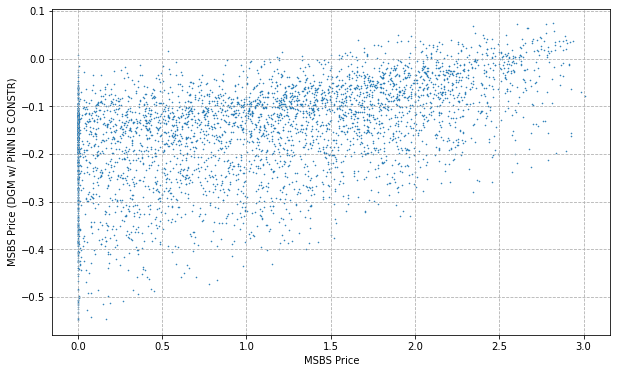

time: 1.06 s (started: 2022-08-14 15:37:41 +00:00)


In [ ]:
net_cpu = trainEuss_PiNN_CONSTR_IS.model.net.cpu()
net_cpu.eval()
plt.scatter(torch.flatten(test_sol).numpy(), torch.flatten(net_cpu(test_input)).detach().numpy(), s=.3)
plt.xlabel('MSBS Price')
plt.ylabel('MSBS Price (DGM w/ PiNN IS CONSTR)')
plt.grid(linestyle='--')
plt.rcParams["figure.figsize"]=10,6
# plt.figure(figsize=(20, 10), dpi=100)
pp(np.mean(np.abs(torch.flatten(test_sol).numpy() -torch.flatten(net_cpu(test_input)).detach().numpy() )))

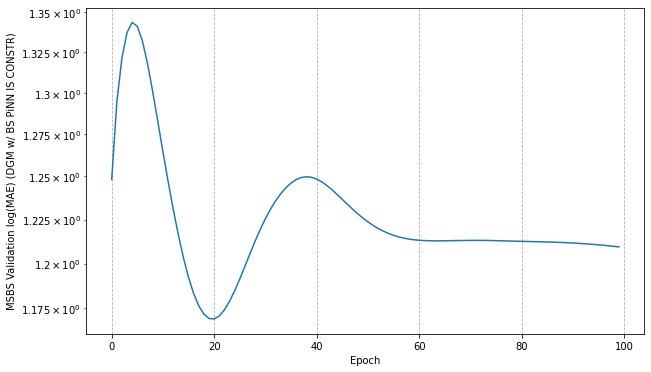

time: 1.02 s (started: 2022-08-14 15:37:44 +00:00)


In [ ]:
fig,ax = plt.subplots(1)
ax.plot(trainEuss_PiNN_CONSTR_IS.vaildation_data_mae)
plt.xlabel('Epoch')
plt.ylabel('MSBS Validation log(MAE) (DGM w/ BS PiNN IS CONSTR)')
plt.yscale('log')
plt.grid(linestyle='--')
# plt.savefig('./Heston_without_wLSE_without_supervised_100k.eps', format='eps')

mod_name = "MSBS"
fit_name = "trainEuss_PiNN_CONSTR_IS"
val_mae_df = pd.DataFrame({ 'model' : mod_name, 'name': fit_name, 
                            'data' : trainEuss_PiNN_CONSTR_IS.vaildation_data_mae })
val_mae_df.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/{datetime.datetime.now():%Y%m%d%H%M%S}_{mod_name}_{fit_name}_test_validation_MAE.csv", index=False)

### Test Case MultiStockEuropeanBlackScholesCall

In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

net = MultiStockEuropeanOptionNet( nstocks = 2, NL = 8 , NN = 100 )
net.to(torch.device("cuda:0")) 
## providing sampler with net so it can accept/reject based on net and other criterions
msequation = MultiStockEuropeanBlackScholesCall(net, nstocks = 2)
train = TrainMultiStockEuropeanBlackScholesCall(net, msequation, BATCH_SIZE = 2**7, debug = True)

train.hook_interval = 5
train.use_early_stop = False
train.early_stop_patience = 2500
train.validation_sample = msequation.sample(size=2**7)

train.train(epoch =100 , lr = 0.0001, eqLossFn= 'calculateLoss',
            validation_data=None, 
              supervised_data=None, 
              apply_structural_loss=True,
              gamma=None
            )

100%|██████████| 100/100 [06:30<00:00,  3.90s/it]

time: 6min 30s (started: 2022-08-14 10:26:26 +00:00)


In [ ]:
test_in = msequation.sample(size=2)[0].to(torch.device("cuda:0"))

time: 4.47 ms (started: 2022-08-14 10:37:01 +00:00)


In [ ]:
net(test_in)

tensor([[0.9896],
        [1.6677]], device='cuda:0', grad_fn=<AddmmBackward0>)

time: 13.9 ms (started: 2022-08-14 10:37:13 +00:00)


In [ ]:
test_in

tensor([[0.1194, 2.0911, 1.8666, 0.7163, 0.5317, 0.0246, 0.2120],
        [0.0507, 2.5217, 2.6914, 0.4514, 0.3782, 0.0420, 0.1356]],
       device='cuda:0')

time: 19.2 ms (started: 2022-08-14 10:43:45 +00:00)
